# Your title for your regression project

## Project Planning

### Goals

(see background)...your customer is the zillow data science team.  state your goals as if you were delivering this to zillow.  They have asked for something from you (see 'background') and you are basically communicating in a more concise way, and very clearly, the goals as you understand them and as you have taken and acted upon through your research. 

*Project Overview
Background:
Zillow wants to improve their Zestimate. The zestimate is estimated value of a home. Zillow theorizes that there is more information to be gained to improve its existing model. Because of that, Zillow wants you to develop a model to predict the error between the Zestimate and the sales price of a home. In predicting the error, you will discover features that will help them improve the Zestimate estimate itself. Your goal of this project is to develop a linear regression model that will best predict the log error of the Zestimate. The error is the difference of the sales price and the Zestimate. The log error is computed by taking the log function of that error. You don't need to worry about the fact that the error is of a logarithmic function. It is a continuous number that represents an error rate.*



### Deliverables

What should the zillow team expect to receive from you?  Again, as you were communicating to them, not to your instructors.  

*your deliverables:*
1. *A report (in the form of a presentation, both verbal and through a slides) that summarizes your findings about the drivers of the Zestimate error. This will come from the analysis you do during the exploration phase of the pipeline. In the report, you will have charts that visually tell the story of what is driving the errors.*

2. *A Jupyter notebook, titled 'Regression_Proj_YourName', that contains a clearly labeled section and code clearly documented for each the stages below (project planning, data acquisition, data prep, exploration, and modeling). All of the work will take place in your jupyter notebook.*

### Data Dictionary & Details

**we will be using 2016 data so do NOT use properties_2017 or predictions_2017**  

Data dictionary of fields you will use. Why? So that you can refer back and others can refer to the meanings as you are developing your model. This is about gaining knowledge in the domain space so that you will understand when data doesn't look right, be able to more effectively develop hypotheses, and use that domain knowledge to build a more robust model (among other reasons)

In [1]:
# import data dictionary file here.

Define your fields.   You may be able to to some ahead of time, but you may need to return to this section after you have explored the data and understand more about what each field means.  Also, look for a data dictionary either in the database or in the original data source (kaggle.com).

In [2]:
# define fields here.

You are free to use more fields than is mentioned, but I would recommend not expanding it to too many fields in the beginning as it will add complexity and you want to make sure you get an initial version completed before diving in deeper.  

- logerror
- bathroomcnt
- bedroomcnt
- calculatedfinishedsquarefeet
- fullbathcnt
- garagecarcnt
- roomcnt
- yearbuilt
- taxvaluedollarcnt
- taxamount

### Initial Thoughts, Ideas, Hypotheses

Brainstorming ideas, hypotheses, related to how variables might impact or relate to each other, both within independent variables and between the independent variables and dependent variable, and also related to any ideas for new features you may have while first looking at the existing variables and challenge ahead of you.

#### Brainstorming ideas
The question asks, "What variables correlate to the Zestimate error?"

Big picture, the error is caused because of a mismatch between the Zestimate and the actual sales price.

This means the sales price is likely the cause of the error, because if the Zestimate and the sales price matched, there would not be an error.


#### So, what drives home sales prices?

Historically, price-per-square-foot, taxes, and location have been the biggest drivers in local real estate.

While other categorical factors such as bed/bath counts are important, price often holds more weight.

#### Hypotheses

In the previous problem we looked at what variables drove an outcome, ie final grade.  In this problem, we're not looking for drivers of the final grade, but rather the drivers of the error between the prediction and the final grade.

Hence, I predict, since we are searching for the correlation with the ERROR, not the actual sales price or Final grade, that the LOWER the correlation between the error and chosen variable is the solution.  I believe this is the inverse problem from the grade prediction exercise.

The inverse:  if we can correlate the correct drivers of the sales price, they should also apply to the Zestimate, and the errors will be reduced, if not eliminated.  So, I believe we are looking for the lower correlation between the error and chosen variable.

#### How variables might impact or relate to each other
Square footage and price often play hand in hand in real estate.

Also there is likely a valuation for the property and also one for the dwelling, and most likely a value that combines the two into an overall valuation or sales price.

### Prepare your environment

import libraries you will use throughout the project.  You may need to add to this as you go.  But try to keep all of your imports in this section

In [6]:
# # ignore warnings
# import warnings
# warnings.filterwarnings('ignore')

# acquire/wrangling
import numpy as np
import pandas as pd

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

# Modeling
import statsmodels.api as sm
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Data Acquisition

#### Acquire via csv

- add the path to where your files are located in your env.py file. 
- ensure that others can read the files based on their local env.py file. 

- Filter out any from predictions_2016 that do not have a logerror. 
- Generate a cohesive data set that includes the following fields:

- `logerror`
- `bathroomcnt`
- `bedroomcnt`
- `calculatedfinishedsquarefeet`
- `fullbathcnt`
- `garagecarcnt`
- `roomcnt`
- `yearbuilt`
- `taxvaluedollarcnt`
- `taxamount`
- (optional) `regionidzip`

recommendations for dealing with the large dataset
- remove any without a logerror
- sample until you have the right query (and then pull entire dataset)
- export to local csv 
- read from local csv (sample, but larger sample than your first) 
- save sql query to add into to_sql() function in python. 


In [7]:
# env.py file located at:
# zillow_path

# add in the code from earlier lessons on how to link to env file at this point
# until then, continue on, dump data in as CSV files and work the project.
# Fix env logic last

In [31]:
# loading properties dataset from csv file:
path = '/Users/rachelreuter/Codeup-DS-projects/'
df_properties_dump = pd.read_csv(path + 'properties_2016.csv')

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [39]:
# loading predictions dataset from csv file:
path = '/Users/rachelreuter/Codeup-DS-projects/'
df_prediction_dump = pd.read_csv(path + 'train_2016_v2.csv')

In [10]:
# # inital fields loaded in, and later replaced by fields in cell below, during exploration and modeling phases.
# df_a = pd.DataFrame(df_properties_dump, columns = [
#       'parcelid',
#       'bathroomcnt',
#       'bedroomcnt',
#       'calculatedfinishedsquarefeet',
#       'regionidzip',
#       'roomcnt',
#       'yearbuilt',
#       'taxvaluedollarcnt',
#       'taxamount'])

In [41]:
# creating data from from the propeties.csv load:
df_a = pd.DataFrame(df_properties_dump, columns = [
      'parcelid',
      'calculatedfinishedsquarefeet',
      'lotsizesquarefeet',
      'taxvaluedollarcnt',
      'structuretaxvaluedollarcnt',
      'landtaxvaluedollarcnt',
      'taxamount'])

In [42]:
# creating a new variable in df_a (the list of properties) calculating the price per square foot of dwelling.
# This field was added in the modeling stage. 
df_a['pp_sqft'] = (df_a.taxvaluedollarcnt / df_a.calculatedfinishedsquarefeet)

In [ ]:
# creating data from from the predictions.csv load:
df_b = pd.DataFrame(df_prediction_dump, columns = [
      'parcelid',
      'logerror',
      'transactiondate'])

In [186]:
dtrain[, transactiondate := as.Date(transactiondate)]

In [187]:
# joining the two data frames to create the working data frame:
df_join = pd.merge(df_a, df_b, on='parcelid')

#### Summarize the data. 

Why? So you can confirm the data look like what you would expect.

- peek at a few rows
- data types
- summary stats
- column names
- number of rows and columns
- ...

In [188]:
# peek at first few rows:
df_join.head()

parcelid  calculatedfinishedsquarefeet  lotsizesquarefeet  \
0  17073783                        1264.0             1735.0   
1  17088994                         777.0                NaN   
2  17100444                        1101.0             6569.0   
3  17102429                        1554.0             7400.0   
4  17109604                        2415.0             6326.0   

   taxvaluedollarcnt  structuretaxvaluedollarcnt  landtaxvaluedollarcnt  \
0           191811.0                    115087.0                76724.0   
1           239679.0                    143809.0                95870.0   
2            47853.0                     33619.0                14234.0   
3            62914.0                     45609.0                17305.0   
4           554000.0                    277000.0               277000.0   

   taxamount     pp_sqft  logerror transactiondate  
0    2015.06  151.749209    0.0953      2016-01-27  
1    2581.30  308.467181    0.0198      2016-03-30  
2     591.64   43.463215    0.0060      2016-05-27  
3     682.78   40.485199   -0.0566      2016-06-07  
4    5886.92  229.399586    0.0573      2016-08-08

#### Identify the columns that have missing values and the number of missing values in each column. 
Why? Missing values are going to cause issues down the line so you will need to handle those appropriately. For each variable with missing values, if it makes sense to replace those missing with a 0, do so. For those where that doesn't make sense, decide if you should drop the entire observations (rows) that contain the missing values, or drop the entire variable (column) that contains the missing values.

In [189]:
# summary information for data frame and associated columns:
def summarize_df(df):
    print("\nRows & Columns:\n")
    print(df.shape)
    print("\nColumn Info:\n")
    print(df.info())
    print("\nFirst 5 rows:\n")
    print(df.head())
    print("\nLast 5 rows:\n")
    print(df.tail())
    print("\nMissing Values:\n")
    missing_vals = df.columns[df.isnull().any()]
    print(df.isnull().sum())
    print("\nSummary Stats:\n")
    print(df.describe())    

In [190]:
# This is the initial summary statistics BEFORE dealing with blanks, zeroes or outliers:
summarize_df(df_join)

# Another summary is done in the next couple steps after accounting for blanks, zeroes and outliers.


Rows & Columns:

(90275, 10)

Column Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 10 columns):
parcelid                        90275 non-null int64
calculatedfinishedsquarefeet    89614 non-null float64
lotsizesquarefeet               80125 non-null float64
taxvaluedollarcnt               90274 non-null float64
structuretaxvaluedollarcnt      89895 non-null float64
landtaxvaluedollarcnt           90274 non-null float64
taxamount                       90269 non-null float64
pp_sqft                         89613 non-null float64
logerror                        90275 non-null float64
transactiondate                 90275 non-null object
dtypes: float64(8), int64(1), object(1)
memory usage: 7.6+ MB
None

First 5 rows:

   parcelid  calculatedfinishedsquarefeet  lotsizesquarefeet  \
0  17073783                        1264.0             1735.0   
1  17088994                         777.0                NaN   
2  17100444             

### Data Preparation

Goal: leave this section with a dataset that is ready to be analyzed. 

In [191]:
# applying lambda function to fill any "na" fields with the mean for those respective columns:
df_join = df_join.apply(lambda x: x.fillna(x.mean()),axis=0)

TypeError: ('Could not convert 2016-01-272016-03-302016-05-272016-06-072016-08-082016-08-262016-07-082016-05-112016-06-152016-05-272016-10-072016-05-202016-03-172016-05-182016-05-272016-04-132016-07-062016-12-292016-01-112016-09-072016-05-272016-05-232016-07-152016-05-192016-06-132016-08-242016-08-242016-10-142016-07-012016-10-032016-03-012016-03-312016-06-272016-04-152016-02-252016-06-142016-09-282016-04-122016-08-122016-09-192016-11-162016-04-072016-11-232016-01-082016-06-292016-08-262016-10-282016-05-092016-11-142016-06-022016-01-152016-04-062016-01-132016-07-072016-06-162016-01-202016-01-052016-01-282016-02-012016-04-072016-04-192016-06-202016-07-292016-10-062016-05-172016-05-132016-07-282016-06-172016-06-302016-09-062016-10-072016-08-302016-03-212016-04-262016-04-292016-10-032016-07-222016-06-282016-04-082016-09-302016-07-062016-01-142016-08-012016-06-222016-09-162016-03-252016-07-192016-04-072016-01-292016-03-162016-05-062016-08-262016-09-232016-08-292016-05-202016-08-122016-08-222016-03-242016-06-072016-08-192016-05-102016-03-042016-05-252016-02-082016-11-162016-05-252016-04-292016-04-182016-09-232016-10-062016-05-262016-03-252016-02-072016-05-122016-10-122016-07-272016-08-152016-02-252016-05-202016-08-262016-07-222016-05-242016-07-152016-05-252016-06-012016-04-012016-09-202016-08-162016-04-292016-05-172016-07-212016-05-032016-03-232016-10-202016-08-042016-07-012016-06-232016-01-082016-04-212016-01-292016-10-132016-04-282016-06-292016-07-282016-01-222016-09-232016-03-292016-06-062016-04-042016-01-132016-01-252016-06-062016-09-072016-06-032016-08-122016-04-152016-07-222016-04-182016-06-012016-03-242016-08-302016-02-222016-04-272016-08-092016-03-012016-01-282016-06-172016-06-012016-06-082016-04-052016-03-292016-04-132016-05-132016-06-172016-05-252016-08-102016-02-252016-03-302016-12-302016-12-062016-04-192016-07-112016-05-172016-06-032016-08-152016-08-052016-09-262016-08-052016-09-022016-09-092016-02-292016-03-172016-01-292016-12-142016-10-122016-09-022016-03-102016-01-062016-10-042016-07-052016-08-222016-06-102016-04-152016-02-182016-07-292016-04-282016-05-122016-10-282016-07-062016-07-122016-08-192016-07-062016-09-302016-01-312016-05-022016-01-212016-08-162016-08-112016-04-122016-05-092016-01-202016-05-232016-12-232016-07-082016-06-302016-06-302016-02-032016-09-232016-10-052016-09-022016-08-262016-03-242016-05-272016-05-182016-02-252016-04-292016-05-022016-10-122016-09-152016-08-042016-09-222016-09-262016-11-132016-05-252016-01-062016-04-282016-08-012016-08-182016-06-032016-09-302016-09-232016-07-202016-07-262016-12-262016-02-172016-04-262016-01-282016-06-232016-04-122016-04-282016-06-152016-04-012016-09-152016-05-272016-07-222016-07-152016-08-192016-01-082016-07-192016-01-072016-05-312016-08-122016-01-132016-10-142016-08-012016-11-282016-05-122016-09-022016-07-072016-05-042016-07-152016-09-062016-02-162016-04-132016-01-142016-08-042016-07-122016-08-122016-03-212016-07-212016-03-282016-10-072016-10-042016-10-052016-04-082016-08-312016-01-202016-07-252016-05-102016-07-212016-10-032016-06-092016-07-282016-03-252016-07-142016-01-122016-02-262016-05-062016-01-082016-03-072016-09-302016-03-212016-08-022016-05-032016-06-092016-09-142016-08-012016-10-072016-03-152016-07-272016-11-122016-10-062016-06-152016-09-022016-09-192016-04-262016-07-292016-05-112016-09-292016-07-152016-05-122016-06-132016-10-272016-10-042016-02-212016-12-152016-09-092016-01-042016-07-262016-03-092016-07-222016-01-152016-03-082016-10-122016-08-262016-10-212016-09-202016-04-012016-09-302016-05-242016-09-142016-07-292016-08-222016-03-162016-08-172016-04-132016-06-232016-02-292016-07-012016-06-222016-10-072016-10-142016-01-152016-04-152016-02-252016-09-092016-08-122016-09-302016-05-272016-07-012016-05-262016-06-012016-06-272016-03-292016-05-062016-10-062016-06-102016-08-312016-03-102016-01-272016-08-302016-03-292016-01-142016-05-192016-12-302016-02-012016-04-152016-05-242016-05-272016-06-242016-07-152016-07-072016-07-272016-02-182016-05-102016-01-292016-05-102016-02-122016-04-052016-09-072016-03-292016-03-182016-07-212016-05-232016-05-132016-09-202016-06-152016-07-152016-08-162016-08-292016-03-242016-03-282016-01-202016-01-252016-04-292016-04-272016-06-292016-04-142016-05-112016-12-212016-07-202016-11-082016-07-272016-05-312016-11-142016-10-132016-08-192016-07-132016-02-292016-08-092016-05-102016-07-192016-12-142016-08-082016-03-212016-09-202016-02-042016-07-152016-06-302016-04-272016-04-202016-01-222016-02-082016-11-232016-06-032016-03-252016-03-112016-04-202016-03-112016-06-152016-01-132016-02-192016-08-152016-06-102016-08-012016-09-282016-10-212016-05-062016-07-112016-04-222016-04-262016-12-072016-04-052016-01-202016-05-252016-06-302016-09-202016-03-082016-06-012016-02-242016-03-152016-05-132016-04-062016-12-092016-10-112016-03-312016-07-142016-03-222016-02-172016-01-122016-07-222016-10-032016-07-202016-06-302016-05-262016-04-152016-04-272016-02-082016-02-242016-11-092016-07-082016-05-172016-02-112016-06-212016-03-012016-07-272016-06-142016-02-292016-02-292016-03-232016-10-142016-09-302016-04-222016-02-252016-09-282016-07-252016-07-132016-07-152016-07-132016-09-152016-09-302016-08-012016-05-272016-08-022016-08-052016-09-022016-02-242016-05-092016-03-042016-07-212016-08-252016-02-112016-08-092016-04-082016-07-082016-09-292016-07-082016-10-032016-04-262016-03-112016-06-302016-06-082016-11-222016-07-282016-01-152016-09-202016-03-232016-03-012016-02-102016-05-312016-06-232016-01-052016-03-312016-05-262016-08-102016-07-062016-06-032016-10-042016-06-212016-08-312016-09-072016-02-182016-05-192016-05-122016-03-172016-07-292016-05-042016-09-302016-08-182016-09-142016-08-222016-09-152016-08-122016-10-112016-04-042016-09-142016-05-132016-03-102016-04-222016-09-302016-05-162016-04-012016-08-122016-11-152016-05-132016-05-132016-03-152016-10-052016-08-262016-04-012016-07-282016-03-072016-07-012016-06-142016-07-152016-06-282016-06-302016-02-242016-11-172016-06-302016-04-202016-07-292016-04-222016-09-192016-09-202016-07-082016-05-022016-09-092016-09-012016-09-062016-03-022016-06-212016-01-262016-11-012016-03-012016-03-062016-07-072016-01-262016-06-082016-10-122016-03-172016-06-092016-07-282016-08-252016-06-072016-07-122016-04-262016-01-252016-03-242016-07-082016-08-172016-03-072016-06-232016-05-192016-05-022016-08-262016-02-012016-01-312016-05-192016-05-042016-05-112016-08-052016-09-012016-10-042016-07-192016-12-212016-04-272016-06-102016-03-142016-03-302016-05-242016-09-292016-03-222016-08-042016-06-212016-09-012016-09-302016-07-292016-03-292016-05-122016-09-072016-02-292016-04-192016-03-222016-02-122016-08-122016-10-072016-04-072016-08-302016-05-272016-09-062016-07-182016-09-222016-06-302016-12-302016-09-012016-02-252016-08-312016-08-112016-07-262016-10-202016-04-132016-04-042016-07-282016-10-182016-07-112016-07-152016-03-302016-07-212016-08-302016-01-272016-06-242016-08-042016-05-242016-09-072016-05-272016-06-022016-08-042016-06-142016-04-292016-10-072016-03-012016-01-262016-09-012016-02-262016-03-092016-05-022016-08-032016-06-072016-10-072016-08-042016-08-112016-08-232016-08-302016-04-202016-07-212016-01-142016-06-012016-08-312016-04-112016-06-132016-09-082016-08-192016-05-262016-08-052016-07-282016-05-062016-07-292016-08-302016-05-092016-04-282016-01-252016-10-032016-01-052016-06-292016-07-012016-05-272016-05-242016-02-042016-03-172016-07-292016-02-082016-03-292016-01-142016-08-252016-09-022016-09-092016-04-122016-03-062016-01-072016-08-182016-07-282016-07-272016-08-082016-02-082016-05-272016-07-012016-06-022016-05-092016-05-112016-10-072016-06-032016-07-222016-05-052016-09-082016-01-052016-04-012016-10-032016-05-262016-05-312016-04-012016-01-182016-05-312016-05-252016-07-062016-06-242016-03-232016-07-152016-06-082016-05-162016-05-312016-04-262016-01-222016-07-212016-06-292016-01-062016-07-132016-06-212016-02-192016-01-212016-06-062016-08-292016-02-252016-06-152016-07-222016-09-162016-06-162016-02-112016-05-162016-09-302016-04-012016-03-252016-10-112016-05-092016-04-182016-04-192016-03-182016-04-082016-07-222016-02-262016-10-072016-07-182016-10-042016-07-012016-07-202016-04-292016-09-202016-07-112016-05-312016-01-212016-06-022016-05-312016-04-072016-04-222016-04-072016-04-282016-08-302016-08-162016-10-052016-05-032016-05-272016-05-262016-04-182016-08-102016-03-212016-09-022016-09-162016-01-042016-08-022016-05-042016-07-082016-04-252016-01-132016-09-202016-06-082016-08-312016-06-072016-02-192016-10-122016-09-092016-09-092016-08-092016-02-112016-01-072016-09-292016-10-042016-06-152016-03-182016-03-312016-09-162016-08-292016-08-162016-08-262016-08-252016-07-292016-03-302016-08-312016-02-242016-03-312016-05-172016-10-192016-08-122016-05-252016-01-152016-05-232016-09-302016-07-202016-06-232016-08-182016-05-132016-07-132016-01-292016-05-032016-06-102016-03-012016-01-122016-12-282016-07-142016-10-052016-09-232016-08-252016-10-072016-06-172016-02-172016-07-272016-03-152016-04-012016-01-122016-06-152016-01-252016-06-092016-03-182016-01-042016-03-242016-09-302016-01-282016-06-102016-11-042016-10-072016-11-222016-01-042016-07-082016-01-082016-08-222016-08-192016-09-212016-05-042016-06-092016-01-262016-08-042016-08-052016-08-252016-01-132016-08-112016-12-072016-03-312016-03-222016-05-172016-07-262016-04-292016-08-012016-08-022016-06-032016-06-022016-09-222016-07-132016-07-122016-03-142016-08-232016-09-222016-08-302016-01-192016-01-202016-08-082016-08-192016-01-272016-10-062016-01-052016-05-262016-08-192016-06-072016-08-312016-08-172016-08-252016-08-012016-04-292016-05-122016-01-032016-12-292016-12-012016-05-202016-10-242016-04-012016-05-062016-09-012016-10-032016-09-022016-01-122016-01-282016-06-282016-05-202016-05-042016-03-082016-08-092016-02-292016-02-292016-03-102016-08-012016-04-292016-10-042016-05-232016-10-122016-03-042016-04-222016-12-192016-05-112016-01-222016-06-132016-01-072016-08-022016-01-112016-09-292016-02-112016-01-062016-06-282016-01-292016-04-292016-04-072016-07-012016-04-152016-10-042016-04-212016-04-142016-08-102016-08-102016-09-152016-01-202016-09-192016-08-052016-09-142016-01-282016-06-212016-08-302016-03-042016-04-222016-03-072016-12-152016-06-012016-05-052016-08-122016-06-292016-05-262016-04-142016-09-292016-04-272016-03-232016-11-042016-06-212016-09-022016-07-292016-08-122016-02-052016-08-122016-02-162016-01-262016-05-242016-09-092016-02-012016-08-052016-07-152016-10-112016-09-072016-02-092016-08-242016-08-232016-08-162016-01-282016-08-302016-05-172016-04-062016-07-122016-03-242016-04-112016-06-232016-04-192016-09-012016-06-022016-06-032016-07-272016-05-132016-02-012016-03-302016-05-102016-04-132016-04-072016-05-272016-07-282016-01-282016-04-142016-05-252016-04-222016-06-222016-06-062016-08-232016-05-252016-07-012016-04-082016-04-122016-05-182016-05-202016-04-082016-09-142016-09-262016-07-212016-07-292016-04-282016-03-282016-02-122016-05-132016-06-172016-04-072016-02-122016-07-112016-07-012016-01-052016-09-302016-04-052016-05-312016-02-292016-02-182016-02-102016-04-202016-10-132016-11-122016-01-202016-07-262016-06-292016-07-262016-10-072016-01-042016-02-012016-02-232016-03-162016-08-082016-06-242016-03-242016-11-142016-03-302016-04-072016-05-252016-11-302016-02-232016-05-032016-05-192016-08-222016-04-132016-07-142016-02-172016-03-202016-05-172016-09-062016-05-122016-09-202016-06-102016-09-022016-02-032016-06-172016-01-172016-06-302016-09-152016-04-012016-01-222016-07-132016-06-242016-09-272016-05-202016-08-262016-07-012016-04-222016-11-232016-09-122016-01-262016-06-292016-03-172016-02-102016-05-032016-06-012016-06-292016-02-262016-10-142016-08-262016-01-182016-10-072016-01-222016-05-122016-02-082016-08-042016-06-022016-04-052016-07-112016-08-052016-09-202016-07-282016-06-092016-03-092016-02-222016-08-052016-04-012016-08-012016-02-042016-01-292016-06-062016-05-312016-03-142016-07-262016-03-112016-08-232016-06-152016-01-132016-09-292016-07-052016-08-312016-05-312016-04-212016-02-032016-08-122016-07-112016-08-252016-06-152016-03-182016-04-282016-05-162016-08-232016-10-212016-08-152016-09-162016-09-282016-03-302016-02-052016-04-072016-06-102016-02-042016-04-192016-10-242016-04-222016-03-302016-06-012016-04-042016-03-072016-07-052016-09-092016-02-182016-06-172016-10-312016-07-142016-10-042016-04-052016-01-112016-04-282016-06-232016-06-012016-10-312016-06-302016-03-282016-03-042016-04-262016-05-062016-08-252016-11-132016-04-292016-03-072016-05-022016-06-092016-03-082016-03-252016-06-062016-03-292016-06-302016-08-082016-06-152016-06-172016-07-012016-12-022016-08-302016-09-012016-03-312016-08-102016-09-012016-01-122016-04-212016-06-222016-07-292016-07-272016-06-232016-10-072016-03-142016-06-302016-01-262016-05-182016-05-312016-08-092016-04-252016-09-282016-07-262016-04-192016-06-012016-06-162016-01-122016-01-222016-01-042016-08-152016-09-122016-07-052016-05-242016-09-302016-03-022016-01-042016-10-032016-07-082016-01-252016-07-122016-10-052016-06-302016-11-232016-10-112016-02-242016-09-232016-08-042016-09-062016-05-122016-05-102016-03-302016-08-262016-06-012016-05-202016-04-222016-02-172016-07-152016-11-182016-05-252016-04-262016-09-272016-07-222016-02-052016-03-082016-06-242016-07-222016-09-082016-09-272016-04-082016-08-252016-02-032016-08-292016-05-272016-04-262016-07-072016-10-062016-02-042016-07-202016-05-032016-02-222016-03-032016-05-032016-03-102016-07-272016-03-252016-07-082016-12-212016-08-312016-05-042016-06-282016-12-132016-05-252016-10-072016-08-182016-07-082016-06-012016-04-292016-03-092016-03-232016-08-232016-07-112016-06-202016-06-272016-03-182016-08-012016-07-122016-06-162016-08-302016-02-242016-07-222016-06-172016-09-082016-07-012016-08-262016-01-272016-04-012016-06-062016-01-042016-10-272016-07-012016-09-302016-07-292016-11-102016-07-222016-07-222016-05-252016-04-222016-06-152016-03-302016-09-202016-03-302016-03-252016-11-222016-02-032016-07-142016-01-292016-04-192016-07-062016-03-232016-05-102016-06-102016-01-062016-09-302016-10-122016-05-262016-02-012016-06-142016-09-062016-08-312016-11-282016-10-122016-01-192016-01-282016-02-192016-01-142016-06-072016-08-022016-03-072016-09-302016-05-122016-07-012016-04-292016-05-192016-09-232016-06-092016-06-012016-06-172016-07-122016-05-272016-02-142016-03-242016-05-102016-05-262016-06-302016-08-242016-04-212016-03-252016-07-282016-01-152016-05-022016-01-072016-02-292016-11-032016-05-272016-06-222016-06-082016-02-172016-02-162016-06-282016-09-202016-02-102016-09-152016-10-242016-04-052016-02-022016-05-272016-05-272016-07-052016-09-292016-08-172016-08-012016-07-282016-02-282016-09-232016-08-022016-09-142016-10-142016-12-282016-01-142016-08-122016-09-162016-10-142016-12-022016-09-132016-08-242016-05-252016-08-302016-08-102016-11-302016-04-012016-07-112016-03-212016-07-152016-02-112016-03-152016-09-302016-08-222016-09-212016-08-162016-08-262016-07-082016-03-232016-06-282016-04-122016-02-262016-09-282016-01-202016-06-032016-03-162016-03-112016-06-222016-02-252016-02-162016-03-112016-06-172016-08-292016-05-272016-08-012016-07-062016-04-252016-01-202016-03-172016-04-132016-09-282016-03-252016-01-042016-03-222016-01-042016-09-092016-05-162016-06-172016-01-112016-08-122016-08-082016-12-282016-05-102016-07-292016-03-012016-06-082016-03-282016-08-262016-10-112016-02-162016-08-252016-03-062016-02-292016-08-112016-05-042016-10-072016-01-212016-07-222016-07-292016-06-092016-11-212016-05-192016-06-032016-01-252016-06-092016-06-272016-05-192016-04-122016-07-282016-06-102016-02-202016-10-052016-09-212016-01-292016-08-102016-01-292016-07-142016-07-222016-03-042016-08-252016-03-302016-09-222016-03-182016-04-212016-01-042016-08-122016-04-272016-07-012016-09-262016-05-132016-09-232016-09-122016-07-152016-08-022016-11-092016-08-172016-04-152016-10-142016-10-142016-10-142016-08-292016-09-302016-09-272016-03-152016-07-132016-06-152016-07-062016-07-152016-07-192016-06-012016-01-222016-04-212016-05-022016-09-192016-01-132016-05-062016-07-152016-08-242016-08-022016-09-162016-01-122016-01-252016-07-272016-09-072016-06-272016-06-302016-03-082016-10-132016-01-052016-05-112016-02-052016-06-242016-04-112016-06-162016-01-072016-08-222016-02-162016-06-172016-08-262016-07-262016-11-222016-12-232016-05-022016-08-102016-08-022016-04-112016-09-162016-07-012016-08-292016-02-082016-04-192016-11-302016-05-132016-04-272016-04-082016-04-272016-05-102016-05-092016-09-282016-05-192016-06-302016-06-302016-06-072016-02-292016-09-222016-02-052016-02-052016-07-012016-08-252016-03-102016-04-272016-03-012016-09-222016-03-242016-02-242016-07-072016-05-032016-07-122016-08-222016-08-032016-06-222016-01-262016-01-292016-11-022016-01-122016-03-042016-07-292016-06-232016-07-072016-08-012016-06-062016-08-032016-09-132016-06-302016-09-162016-07-152016-02-252016-06-202016-05-252016-05-202016-08-112016-09-072016-03-292016-07-312016-02-022016-09-152016-01-292016-05-112016-06-292016-03-142016-06-012016-08-312016-01-292016-08-192016-02-292016-02-082016-09-132016-04-252016-01-112016-03-022016-03-042016-03-072016-05-232016-01-052016-07-292016-01-212016-08-042016-04-122016-06-152016-07-112016-08-292016-06-102016-08-012016-04-182016-08-012016-06-202016-07-152016-03-072016-01-082016-08-092016-08-052016-11-152016-08-262016-08-192016-06-302016-06-202016-12-022016-03-212016-03-162016-04-132016-10-262016-08-262016-06-212016-08-102016-06-272016-04-292016-06-092016-10-112016-06-232016-03-312016-02-232016-09-162016-10-132016-05-162016-01-292016-06-292016-06-172016-08-122016-05-172016-09-292016-07-062016-09-042016-02-162016-02-172016-10-052016-05-202016-06-212016-09-142016-10-142016-08-022016-01-212016-03-252016-03-222016-07-262016-04-292016-02-052016-05-202016-05-022016-04-192016-06-162016-09-142016-03-012016-07-272016-06-022016-10-032016-09-222016-09-092016-08-052016-10-142016-02-222016-06-292016-07-292016-02-122016-05-242016-10-312016-04-122016-03-222016-06-172016-04-272016-04-152016-09-082016-03-112016-08-102016-07-132016-06-092016-05-102016-11-092016-07-062016-04-222016-03-252016-10-032016-03-162016-05-262016-09-282016-03-302016-01-142016-05-202016-05-092016-03-012016-08-262016-10-032016-09-292016-06-022016-09-202016-06-152016-09-292016-09-022016-08-302016-03-182016-03-252016-03-232016-02-192016-01-262016-06-162016-07-062016-03-232016-09-232016-05-032016-04-222016-08-172016-07-282016-11-152016-05-202016-07-122016-07-082016-04-272016-07-082016-03-102016-05-202016-06-202016-08-262016-02-242016-02-012016-02-092016-07-072016-04-262016-08-192016-01-142016-08-222016-05-262016-05-182016-03-042016-08-082016-10-202016-08-312016-09-232016-09-082016-01-282016-03-242016-09-082016-07-072016-09-232016-05-202016-03-222016-03-302016-01-272016-05-202016-07-012016-04-182016-07-072016-02-112016-03-172016-08-302016-03-032016-06-032016-04-072016-04-292016-06-212016-03-082016-06-092016-04-012016-07-202016-01-062016-08-092016-07-292016-03-302016-04-082016-05-252016-05-202016-04-062016-01-182016-06-242016-02-032016-09-292016-07-212016-05-132016-01-202016-09-292016-04-142016-02-252016-07-282016-05-032016-03-312016-02-252016-06-072016-02-262016-09-262016-05-062016-09-022016-08-092016-03-112016-11-152016-03-082016-03-152016-01-142016-02-252016-06-302016-01-082016-04-062016-05-112016-09-122016-02-032016-06-102016-07-012016-06-092016-07-212016-10-132016-09-072016-09-072016-02-232016-05-062016-03-082016-06-132016-04-192016-03-102016-06-232016-03-162016-07-152016-12-222016-04-222016-05-132016-05-122016-08-192016-10-042016-10-212016-08-042016-09-092016-12-302016-08-232016-10-172016-02-042016-11-022016-09-302016-08-112016-04-152016-04-012016-04-212016-08-092016-04-272016-01-142016-08-192016-07-122016-08-292016-04-252016-07-272016-10-032016-08-252016-07-212016-03-292016-03-232016-02-182016-05-262016-06-292016-01-072016-10-142016-02-232016-09-202016-01-042016-04-082016-06-302016-07-222016-03-232016-08-022016-03-082016-09-082016-07-212016-01-212016-06-202016-09-232016-02-262016-06-102016-02-102016-11-042016-03-032016-12-162016-03-252016-07-192016-01-082016-02-232016-12-052016-01-222016-03-102016-06-232016-04-262016-08-312016-08-312016-04-202016-08-092016-04-072016-03-142016-07-202016-12-072016-03-152016-07-252016-09-122016-05-112016-07-072016-07-182016-04-292016-09-022016-07-012016-06-142016-07-192016-08-312016-05-042016-09-072016-05-272016-01-242016-09-262016-07-202016-09-132016-05-272016-06-152016-04-052016-03-312016-04-192016-02-052016-01-272016-06-302016-09-222016-06-162016-06-012016-06-082016-06-032016-04-132016-05-092016-06-162016-02-192016-05-192016-01-142016-05-312016-04-152016-08-192016-04-072016-02-042016-02-082016-07-152016-08-082016-04-152016-08-042016-09-302016-01-082016-08-312016-06-302016-07-122016-01-312016-04-292016-05-092016-05-232016-07-222016-07-262016-04-182016-08-152016-03-282016-01-222016-08-302016-02-242016-05-272016-10-132016-10-282016-01-112016-04-222016-09-072016-04-212016-05-032016-10-062016-05-092016-04-282016-04-192016-09-232016-08-122016-01-292016-02-122016-06-032016-08-192016-03-232016-04-082016-03-152016-05-112016-10-242016-08-192016-06-282016-08-082016-05-162016-08-112016-04-212016-06-102016-05-022016-03-042016-11-152016-04-282016-10-142016-08-312016-09-092016-08-312016-03-222016-07-132016-12-142016-03-312016-05-042016-09-202016-05-312016-03-022016-05-022016-04-132016-04-192016-01-282016-09-012016-04-082016-10-312016-09-092016-04-262016-02-192016-06-142016-09-212016-02-252016-05-162016-04-252016-01-252016-12-292016-07-272016-09-282016-09-282016-05-272016-05-312016-01-262016-08-082016-04-142016-07-262016-04-082016-02-182016-10-042016-10-122016-02-172016-02-222016-04-062016-05-272016-06-102016-01-042016-04-202016-01-202016-08-302016-09-302016-05-162016-06-242016-06-022016-07-082016-08-262016-04-072016-03-142016-03-102016-04-182016-02-092016-07-252016-05-162016-04-292016-04-202016-05-162016-05-272016-08-122016-09-292016-04-072016-09-272016-08-242016-09-232016-09-302016-07-252016-08-302016-04-182016-08-182016-07-252016-04-052016-01-262016-06-022016-08-082016-05-052016-02-022016-08-172016-04-072016-07-292016-07-052016-10-122016-04-272016-03-172016-05-042016-01-142016-07-082016-03-222016-07-132016-03-282016-04-282016-05-202016-04-132016-05-312016-02-162016-03-302016-03-022016-03-302016-04-152016-12-132016-09-092016-07-082016-04-282016-08-242016-04-222016-02-092016-09-302016-12-302016-04-072016-02-082016-06-302016-05-192016-06-152016-04-072016-05-312016-11-032016-09-302016-06-172016-07-062016-09-202016-09-192016-07-182016-06-162016-05-182016-09-232016-06-242016-09-292016-07-012016-06-082016-02-142016-10-142016-05-132016-07-202016-04-262016-05-172016-10-042016-02-172016-07-012016-10-032016-06-082016-06-092016-08-222016-10-212016-09-292016-09-232016-08-082016-04-152016-05-232016-07-122016-09-272016-06-232016-07-222016-02-262016-06-302016-08-262016-03-212016-07-122016-03-032016-09-122016-06-172016-03-282016-09-152016-01-122016-08-112016-07-202016-01-082016-04-262016-09-012016-03-152016-04-012016-02-222016-07-202016-06-012016-06-032016-07-212016-05-272016-05-202016-05-272016-03-252016-04-152016-04-132016-09-142016-12-092016-06-282016-07-212016-04-202016-08-122016-09-122016-03-242016-09-062016-06-092016-09-062016-06-092016-09-072016-07-212016-04-212016-06-132016-05-312016-03-182016-08-082016-10-142016-04-072016-08-112016-08-172016-03-172016-08-092016-09-232016-08-302016-05-032016-11-012016-04-072016-08-102016-08-112016-01-112016-08-232016-08-102016-01-062016-06-022016-07-152016-08-232016-05-232016-09-302016-06-302016-05-052016-04-222016-07-272016-07-192016-09-262016-04-082016-06-302016-07-192016-08-012016-04-292016-08-232016-02-262016-07-272016-06-202016-07-252016-06-142016-05-132016-11-292016-02-012016-10-072016-09-302016-03-042016-11-172016-01-142016-10-182016-03-242016-07-292016-06-142016-09-162016-08-022016-09-162016-04-042016-10-212016-06-032016-09-152016-09-152016-01-082016-08-182016-07-142016-03-182016-01-052016-06-302016-08-262016-08-022016-06-152016-03-302016-02-232016-09-212016-02-012016-04-192016-04-142016-04-012016-02-222016-09-022016-04-292016-03-232016-03-232016-08-252016-03-312016-04-012016-01-082016-07-192016-08-222016-02-122016-11-102016-02-172016-03-092016-06-212016-08-302016-05-042016-08-172016-07-112016-04-082016-03-232016-08-082016-02-012016-06-082016-07-152016-08-122016-04-272016-01-252016-05-132016-03-102016-09-022016-12-052016-07-202016-09-282016-03-222016-03-282016-02-112016-05-202016-09-212016-01-122016-04-262016-05-312016-03-232016-04-252016-11-202016-04-272016-06-232016-03-302016-08-172016-09-202016-10-262016-05-062016-09-012016-04-062016-08-082016-09-212016-08-292016-07-062016-08-252016-02-192016-08-262016-01-282016-01-252016-02-032016-01-192016-05-202016-02-042016-08-192016-11-042016-06-202016-01-132016-05-172016-04-262016-09-072016-04-132016-08-242016-08-302016-03-312016-11-302016-03-182016-06-202016-06-012016-04-222016-05-042016-03-312016-06-172016-05-172016-10-282016-05-162016-10-112016-03-282016-02-232016-10-142016-01-052016-03-162016-08-082016-09-022016-02-252016-05-052016-10-212016-05-052016-04-282016-01-122016-07-012016-09-022016-08-102016-03-242016-04-212016-03-182016-02-292016-01-072016-10-242016-06-102016-06-012016-11-302016-06-212016-03-162016-04-212016-06-202016-08-262016-06-072016-01-072016-07-012016-04-222016-01-282016-09-272016-08-122016-06-282016-06-292016-12-142016-03-232016-08-092016-04-142016-02-172016-06-152016-06-172016-09-122016-09-232016-04-222016-03-172016-09-062016-03-212016-05-272016-06-102016-06-272016-09-012016-01-052016-09-122016-07-262016-01-192016-04-112016-08-112016-09-162016-12-132016-02-252016-08-102016-08-242016-09-302016-10-202016-07-082016-03-222016-11-222016-01-052016-06-282016-04-132016-11-032016-10-072016-09-302016-07-152016-05-232016-05-042016-07-292016-03-082016-06-082016-02-252016-03-252016-07-082016-04-292016-08-092016-06-242016-05-272016-10-132016-01-222016-06-212016-04-202016-07-132016-07-082016-06-152016-09-132016-08-032016-03-182016-07-202016-05-052016-07-182016-08-112016-11-022016-03-092016-05-032016-12-202016-04-052016-08-012016-05-102016-04-222016-05-272016-03-302016-02-292016-01-042016-04-132016-02-282016-06-222016-06-012016-07-282016-03-072016-09-192016-11-302016-08-292016-01-252016-08-082016-09-142016-08-102016-11-292016-03-232016-03-292016-03-142016-08-172016-01-122016-05-132016-04-202016-10-112016-09-302016-09-062016-09-132016-09-062016-03-022016-05-092016-01-272016-11-282016-11-232016-01-052016-03-152016-08-292016-10-112016-03-152016-09-092016-09-012016-10-042016-10-062016-10-122016-01-122016-11-282016-05-232016-06-272016-01-082016-08-092016-10-112016-04-042016-09-122016-10-062016-10-052016-01-112016-06-242016-04-212016-07-252016-11-142016-08-102016-05-112016-07-252016-06-202016-08-292016-03-312016-07-182016-03-302016-02-232016-09-152016-06-162016-06-302016-04-202016-03-112016-07-152016-08-192016-04-072016-09-092016-08-122016-08-112016-07-222016-09-202016-03-092016-10-052016-08-182016-07-122016-04-292016-05-032016-03-042016-09-022016-08-152016-09-072016-11-162016-03-182016-06-212016-12-222016-08-162016-02-222016-03-222016-10-112016-06-102016-08-172016-06-202016-06-232016-05-162016-03-182016-01-042016-07-012016-04-222016-05-132016-01-212016-01-142016-08-172016-02-102016-05-112016-03-182016-08-022016-09-072016-01-062016-04-072016-05-042016-05-102016-08-252016-05-022016-01-262016-04-292016-02-122016-01-252016-07-072016-09-232016-03-312016-06-162016-09-012016-03-112016-03-242016-10-042016-01-142016-04-192016-04-082016-10-122016-07-152016-08-152016-07-062016-06-282016-07-292016-08-102016-10-072016-08-232016-07-222016-09-292016-06-032016-10-072016-04-192016-05-232016-09-092016-04-062016-10-312016-07-182016-05-132016-06-172016-09-022016-04-282016-07-252016-02-112016-04-292016-07-072016-05-272016-09-302016-02-232016-05-252016-10-122016-03-242016-06-012016-03-292016-12-092016-05-202016-01-042016-01-182016-09-142016-06-102016-01-282016-04-152016-03-182016-03-152016-03-042016-05-182016-07-292016-10-052016-07-202016-10-282016-04-182016-03-182016-03-032016-04-262016-05-172016-05-242016-08-122016-03-102016-05-192016-04-222016-09-272016-06-082016-05-052016-01-152016-05-132016-04-272016-07-292016-06-022016-09-272016-08-262016-03-042016-06-222016-10-122016-07-112016-02-042016-08-252016-08-162016-04-252016-02-152016-06-172016-06-172016-02-032016-09-302016-05-042016-04-292016-08-182016-04-112016-07-132016-11-272016-06-282016-08-242016-10-032016-09-292016-06-102016-09-122016-07-012016-07-122016-09-162016-08-212016-06-062016-06-072016-03-232016-06-102016-11-152016-06-202016-03-182016-12-082016-05-242016-09-012016-08-012016-06-222016-02-222016-06-302016-06-242016-07-052016-03-072016-08-232016-07-182016-08-182016-07-052016-09-082016-10-122016-03-292016-08-102016-06-202016-04-292016-12-122016-10-062016-11-152016-07-212016-08-232016-08-022016-03-152016-09-012016-05-272016-08-242016-05-232016-04-292016-06-272016-05-172016-06-222016-03-032016-05-202016-05-172016-10-112016-10-042016-05-172016-04-132016-07-012016-06-082016-07-012016-03-092016-12-292016-07-112016-09-082016-09-162016-08-152016-03-032016-05-262016-05-272016-01-082016-06-212016-06-212016-03-012016-10-052016-09-222016-08-162016-06-302016-08-262016-09-302016-08-052016-06-242016-08-052016-10-192016-09-092016-03-022016-07-292016-10-212016-05-202016-07-082016-04-072016-08-162016-04-152016-05-022016-06-012016-03-232016-10-122016-12-132016-07-222016-06-232016-01-192016-02-082016-03-172016-05-162016-02-292016-02-102016-03-022016-10-262016-06-032016-07-222016-08-112016-04-122016-07-152016-08-122016-06-222016-09-012016-03-162016-09-212016-05-232016-07-282016-09-302016-09-232016-05-132016-01-282016-07-012016-08-292016-01-112016-04-142016-07-282016-08-172016-09-142016-12-202016-09-212016-09-012016-04-112016-10-052016-06-082016-12-012016-04-292016-05-202016-04-292016-05-162016-01-272016-08-172016-06-172016-06-092016-01-032016-08-112016-05-062016-02-292016-09-122016-12-212016-01-282016-04-222016-11-182016-11-012016-06-242016-04-182016-06-022016-05-062016-06-132016-06-012016-11-292016-01-252016-05-102016-08-052016-07-272016-05-062016-05-112016-04-152016-04-292016-08-082016-09-232016-05-092016-07-052016-08-032016-01-152016-04-152016-10-212016-07-052016-06-212016-03-282016-06-062016-08-052016-03-072016-08-082016-09-022016-09-262016-07-282016-05-302016-07-282016-01-262016-03-172016-07-082016-09-232016-07-292016-04-082016-09-192016-02-022016-03-242016-09-012016-12-152016-08-102016-02-252016-11-222016-07-072016-08-102016-05-202016-08-122016-03-112016-02-152016-06-292016-03-292016-04-282016-03-032016-07-142016-11-152016-03-082016-07-202016-10-242016-03-302016-02-222016-07-072016-01-242016-09-092016-07-072016-08-172016-07-152016-08-052016-07-282016-02-292016-02-252016-07-012016-12-082016-02-242016-02-052016-03-082016-04-262016-05-022016-08-162016-11-132016-08-302016-08-112016-05-052016-02-032016-07-292016-02-222016-12-022016-01-142016-07-112016-03-022016-12-052016-04-062016-03-112016-10-142016-02-032016-01-262016-06-172016-07-192016-05-272016-05-272016-04-082016-04-282016-08-152016-11-292016-03-182016-04-192016-10-282016-02-012016-06-152016-06-132016-03-232016-11-302016-04-272016-07-222016-03-172016-04-152016-05-272016-07-072016-09-092016-03-152016-01-142016-07-282016-01-282016-07-152016-04-292016-10-032016-07-132016-10-032016-07-302016-09-192016-03-252016-09-092016-08-222016-06-032016-02-242016-03-302016-03-012016-03-302016-07-052016-08-192016-06-172016-08-262016-06-222016-11-302016-12-132016-01-142016-06-142016-06-292016-08-222016-11-302016-02-252016-06-302016-09-162016-08-162016-08-252016-09-272016-08-252016-07-062016-08-252016-09-192016-07-292016-06-032016-08-232016-10-042016-07-152016-06-302016-03-182016-07-082016-09-092016-02-212016-05-132016-05-022016-06-102016-02-252016-04-212016-04-152016-04-212016-09-092016-04-122016-07-082016-03-152016-08-082016-12-132016-04-122016-04-152016-10-112016-06-302016-01-272016-04-282016-04-082016-03-312016-04-292016-09-012016-04-142016-06-102016-03-242016-03-242016-08-232016-07-072016-08-012016-12-282016-07-122016-09-022016-05-112016-11-082016-03-312016-10-062016-03-022016-05-312016-06-162016-04-282016-07-222016-11-022016-03-012016-03-102016-05-182016-07-142016-11-042016-08-102016-08-192016-06-242016-04-182016-07-212016-09-232016-02-212016-06-082016-06-142016-03-112016-03-312016-04-252016-04-282016-09-292016-06-302016-05-022016-07-152016-06-282016-08-302016-08-232016-04-202016-03-242016-06-012016-04-142016-01-152016-05-122016-01-152016-02-092016-02-292016-04-252016-02-042016-02-012016-06-232016-07-192016-09-202016-08-092016-10-072016-07-292016-05-182016-10-032016-04-082016-07-272016-05-092016-02-172016-04-292016-07-192016-12-072016-06-232016-03-072016-05-122016-10-122016-05-202016-02-282016-08-122016-08-032016-05-112016-03-292016-12-162016-09-222016-08-242016-04-062016-01-082016-01-212016-09-282016-07-052016-11-062016-02-272016-07-142016-02-232016-06-302016-04-012016-10-112016-01-132016-07-182016-05-052016-04-042016-03-302016-09-022016-09-282016-06-302016-10-112016-05-032016-03-252016-05-032016-09-152016-03-252016-01-282016-02-032016-09-092016-12-162016-05-032016-07-262016-02-182016-06-292016-02-032016-01-272016-02-172016-07-062016-07-292016-05-042016-04-292016-01-152016-05-252016-06-212016-03-112016-12-292016-09-142016-06-272016-04-292016-10-052016-03-232016-06-082016-01-212016-01-052016-10-142016-06-292016-03-032016-04-012016-09-012016-07-122016-01-292016-06-162016-05-312016-06-282016-09-142016-05-232016-05-202016-10-142016-10-132016-08-262016-09-152016-09-072016-09-212016-03-302016-07-142016-06-272016-04-072016-07-222016-02-252016-08-162016-11-012016-09-272016-07-012016-06-012016-02-252016-06-032016-09-092016-09-152016-07-222016-09-292016-09-012016-07-202016-02-182016-06-012016-05-042016-04-212016-10-252016-01-052016-04-142016-08-012016-08-072016-07-282016-01-262016-06-212016-09-212016-07-292016-06-082016-09-062016-10-072016-08-092016-06-302016-11-022016-09-202016-08-252016-07-222016-08-162016-07-152016-05-122016-08-232016-05-262016-05-062016-04-072016-09-022016-03-232016-01-062016-12-132016-06-292016-07-292016-08-122016-09-202016-08-012016-04-202016-03-082016-03-062016-04-202016-10-032016-02-052016-08-262016-01-292016-01-212016-10-122016-09-262016-07-012016-10-072016-01-192016-08-162016-03-302016-07-262016-09-082016-05-022016-06-222016-06-232016-09-302016-12-132016-04-142016-10-212016-01-062016-03-252016-04-012016-01-072016-04-192016-05-242016-04-082016-07-012016-06-292016-06-062016-08-092016-08-162016-07-142016-01-142016-09-302016-08-292016-07-222016-07-222016-05-252016-08-042016-10-242016-04-222016-06-242016-03-022016-07-292016-03-022016-07-182016-10-072016-04-282016-08-312016-04-142016-05-052016-02-162016-06-062016-08-022016-04-082016-03-292016-01-052016-05-092016-06-162016-10-132016-06-132016-01-112016-08-162016-08-222016-06-202016-01-152016-06-032016-06-022016-06-212016-01-142016-06-222016-08-112016-02-192016-08-192016-02-182016-09-202016-07-272016-09-192016-01-052016-05-132016-05-042016-07-182016-04-202016-07-052016-06-132016-07-222016-01-082016-07-072016-08-302016-07-122016-02-232016-07-272016-08-102016-07-072016-09-092016-06-232016-01-112016-04-082016-08-232016-06-302016-09-302016-01-062016-05-272016-07-112016-05-162016-04-202016-06-072016-03-222016-01-102016-06-012016-07-152016-07-212016-05-182016-08-232016-10-032016-04-152016-08-082016-04-212016-05-312016-03-312016-10-032016-07-282016-09-232016-02-292016-09-192016-03-102016-06-232016-07-112016-09-262016-06-172016-03-152016-06-292016-02-212016-09-142016-04-012016-07-292016-01-072016-08-152016-07-272016-08-112016-04-272016-06-222016-01-072016-04-142016-01-142016-09-202016-05-132016-02-292016-03-082016-02-162016-07-212016-11-072016-08-262016-02-252016-09-012016-04-142016-05-172016-08-022016-09-092016-08-252016-05-182016-09-232016-09-132016-07-012016-09-292016-03-222016-04-082016-08-012016-02-242016-06-292016-09-262016-12-072016-05-032016-09-082016-09-292016-09-302016-01-142016-06-012016-09-132016-04-212016-03-112016-03-162016-08-192016-04-012016-07-282016-02-092016-06-292016-03-302016-02-052016-08-302016-11-302016-07-192016-09-282016-07-292016-03-142016-09-072016-06-152016-06-242016-08-032016-06-032016-08-262016-12-152016-06-222016-06-172016-01-042016-07-272016-06-292016-03-032016-03-032016-11-012016-05-052016-11-152016-03-242016-10-062016-07-282016-06-102016-03-102016-09-272016-06-222016-05-102016-06-222016-03-182016-04-142016-03-312016-01-212016-05-112016-01-112016-06-142016-06-102016-01-132016-05-202016-03-212016-01-152016-01-222016-06-222016-04-292016-08-232016-06-282016-08-112016-09-012016-08-182016-03-082016-09-292016-03-282016-02-252016-03-112016-06-272016-02-102016-06-212016-06-072016-10-032016-02-122016-08-232016-02-092016-08-102016-08-082016-04-132016-08-032016-10-052016-05-032016-04-292016-07-122016-03-162016-02-242016-03-112016-04-082016-10-052016-08-302016-03-212016-01-272016-08-242016-05-202016-02-242016-06-212016-09-292016-05-102016-07-112016-07-142016-09-082016-04-192016-04-082016-07-052016-03-292016-06-082016-08-102016-08-302016-08-112016-06-142016-02-262016-07-062016-08-022016-10-052016-03-032016-03-292016-09-222016-08-162016-06-292016-09-212016-03-152016-06-162016-03-232016-04-192016-05-202016-07-122016-10-042016-03-112016-07-012016-08-112016-07-052016-12-062016-09-152016-06-302016-03-152016-07-212016-04-292016-02-122016-06-242016-06-272016-02-262016-05-242016-01-192016-10-042016-11-012016-09-072016-12-272016-01-062016-08-292016-05-092016-04-182016-07-142016-03-152016-01-292016-02-072016-06-082016-07-082016-02-282016-08-092016-07-122016-08-232016-09-262016-10-032016-03-072016-06-152016-09-292016-04-292016-08-302016-12-052016-08-292016-08-242016-06-292016-05-092016-08-122016-06-152016-09-162016-02-292016-03-112016-07-262016-06-082016-05-162016-04-072016-01-152016-07-012016-10-312016-09-302016-02-022016-05-122016-03-012016-03-152016-06-202016-02-222016-06-022016-10-252016-09-202016-09-212016-04-012016-03-252016-03-072016-04-152016-08-112016-09-192016-06-092016-10-112016-04-142016-06-292016-01-252016-07-212016-06-282016-08-082016-02-042016-04-222016-07-152016-01-082016-09-212016-04-292016-04-012016-09-282016-09-022016-01-062016-06-092016-04-202016-06-232016-06-012016-10-072016-04-082016-06-242016-07-222016-04-152016-05-042016-10-122016-05-252016-06-012016-05-272016-05-092016-04-052016-07-282016-04-212016-07-192016-05-092016-10-062016-08-032016-01-262016-03-032016-05-172016-01-042016-01-292016-09-062016-08-252016-07-282016-03-012016-03-092016-07-282016-10-032016-05-102016-07-112016-05-312016-07-012016-05-272016-06-102016-08-162016-08-082016-07-222016-06-162016-09-222016-03-292016-05-242016-09-272016-04-152016-03-212016-05-182016-09-202016-03-042016-11-292016-08-252016-05-172016-09-192016-06-302016-08-182016-08-042016-09-062016-10-282016-02-082016-07-212016-02-192016-06-242016-01-052016-07-082016-09-152016-07-202016-04-292016-04-292016-04-262016-09-292016-04-192016-01-132016-03-272016-01-042016-04-112016-08-242016-04-192016-08-272016-04-242016-06-022016-02-042016-01-032016-04-082016-05-172016-02-192016-02-242016-10-142016-05-012016-08-242016-03-212016-06-012016-05-042016-03-042016-02-072016-05-202016-10-072016-06-092016-07-112016-05-122016-05-192016-09-092016-05-192016-04-142016-06-152016-04-262016-07-012016-08-102016-06-062016-10-032016-03-012016-09-302016-12-222016-09-222016-08-292016-09-072016-08-122016-09-282016-05-092016-01-202016-03-302016-09-132016-03-042016-12-192016-01-192016-08-262016-09-292016-01-152016-01-262016-03-282016-09-132016-07-292016-03-312016-06-302016-01-112016-07-122016-07-222016-04-262016-11-212016-10-212016-06-132016-01-272016-10-072016-05-022016-10-062016-04-202016-04-272016-08-042016-06-032016-01-052016-06-302016-03-222016-05-062016-08-022016-08-192016-04-062016-01-082016-06-222016-08-052016-02-262016-02-092016-02-042016-02-182016-09-062016-06-172016-06-062016-08-052016-02-042016-07-292016-02-122016-02-052016-08-032016-02-122016-05-272016-06-022016-07-082016-04-262016-08-312016-06-302016-09-302016-07-112016-12-052016-07-052016-05-262016-01-192016-09-202016-04-122016-09-152016-10-112016-06-282016-05-232016-09-192016-04-122016-06-242016-10-122016-05-302016-01-262016-03-162016-02-252016-06-282016-05-312016-09-022016-07-292016-11-232016-08-042016-03-172016-04-292016-09-012016-02-192016-10-282016-08-122016-09-092016-05-122016-02-252016-09-142016-08-302016-02-082016-03-232016-05-272016-03-242016-07-222016-06-082016-04-132016-08-102016-09-142016-06-062016-03-242016-06-032016-01-292016-07-222016-05-062016-03-022016-01-122016-08-152016-03-162016-03-312016-05-132016-07-212016-09-122016-08-102016-07-052016-07-292016-08-122016-10-062016-07-012016-04-262016-06-292016-03-292016-09-082016-05-272016-10-142016-09-092016-03-182016-05-242016-08-302016-02-112016-11-042016-08-152016-08-292016-03-102016-05-202016-08-042016-05-242016-03-242016-05-122016-01-222016-06-212016-01-062016-06-062016-03-152016-06-242016-07-012016-04-292016-09-072016-04-212016-03-062016-07-202016-02-072016-07-252016-02-192016-03-102016-07-212016-08-092016-02-292016-11-212016-11-072016-06-132016-09-012016-04-152016-07-192016-09-262016-09-232016-06-162016-04-152016-04-132016-08-312016-04-282016-10-032016-12-192016-09-222016-03-282016-01-042016-08-182016-09-232016-06-102016-07-052016-08-112016-06-172016-01-062016-08-032016-09-022016-04-192016-04-292016-08-182016-02-082016-05-132016-06-302016-03-292016-02-032016-05-202016-07-012016-03-282016-06-092016-02-042016-09-222016-08-242016-07-292016-07-072016-07-152016-07-202016-06-172016-11-302016-08-082016-05-062016-09-152016-07-202016-10-072016-01-262016-08-052016-06-102016-02-222016-09-022016-10-182016-09-082016-06-292016-06-082016-05-102016-07-262016-02-122016-09-282016-06-302016-06-292016-09-012016-05-272016-04-082016-07-062016-05-252016-08-192016-08-302016-02-232016-08-192016-07-292016-07-012016-07-292016-04-192016-08-242016-08-102016-12-212016-09-302016-07-262016-04-202016-08-052016-04-202016-07-132016-07-082016-07-272016-01-142016-01-272016-10-112016-01-142016-03-312016-11-212016-12-082016-05-022016-11-022016-12-012016-06-172016-07-192016-05-262016-03-172016-09-302016-03-112016-01-262016-09-132016-02-082016-05-272016-08-162016-08-222016-06-152016-04-262016-06-102016-03-292016-01-282016-07-012016-05-132016-09-152016-01-282016-04-222016-01-122016-09-122016-01-122016-09-152016-04-062016-06-142016-06-142016-05-092016-09-302016-06-282016-03-222016-04-282016-07-122016-10-062016-11-042016-10-272016-07-292016-01-032016-05-192016-01-222016-08-182016-09-292016-08-242016-05-312016-02-172016-01-032016-04-012016-06-242016-09-092016-12-162016-10-172016-12-142016-08-252016-09-192016-02-102016-02-122016-06-082016-04-142016-08-312016-06-012016-06-012016-02-022016-06-282016-02-182016-08-092016-10-072016-09-292016-06-152016-07-262016-09-092016-11-182016-12-202016-07-192016-08-112016-10-032016-06-022016-04-282016-07-272016-07-152016-05-112016-04-012016-06-292016-05-042016-08-192016-06-162016-01-222016-01-202016-06-212016-07-152016-07-222016-08-032016-02-012016-08-092016-09-012016-02-042016-05-062016-08-092016-08-012016-06-242016-04-152016-07-192016-08-052016-03-292016-09-202016-01-252016-03-312016-07-012016-10-072016-03-172016-02-172016-08-052016-07-202016-09-302016-06-012016-07-272016-03-242016-09-202016-09-292016-10-072016-12-152016-10-212016-01-052016-03-042016-08-302016-08-102016-08-162016-05-062016-10-112016-02-092016-04-082016-09-062016-02-262016-09-232016-09-262016-01-262016-05-262016-03-242016-10-312016-01-142016-05-252016-05-232016-07-222016-12-082016-06-222016-11-212016-01-152016-04-252016-06-152016-07-132016-11-152016-09-022016-04-292016-03-242016-05-132016-06-012016-08-122016-06-142016-04-202016-04-152016-04-262016-09-292016-07-082016-07-082016-05-162016-05-172016-07-252016-08-302016-09-162016-04-292016-08-082016-09-192016-01-282016-02-022016-05-242016-06-272016-05-022016-04-292016-08-192016-08-312016-04-132016-05-022016-09-012016-10-032016-06-062016-08-242016-09-272016-05-052016-05-202016-04-202016-07-152016-04-282016-02-052016-06-062016-10-072016-09-012016-02-052016-05-092016-09-132016-09-262016-07-132016-03-232016-08-312016-05-272016-08-012016-03-042016-07-062016-09-162016-01-262016-09-022016-03-162016-02-162016-06-132016-03-072016-03-302016-06-032016-04-292016-08-182016-07-292016-05-192016-06-102016-08-192016-03-102016-05-272016-05-232016-06-152016-07-292016-09-232016-05-032016-07-222016-10-142016-08-092016-06-292016-05-252016-07-132016-06-172016-10-102016-07-152016-04-082016-05-162016-02-292016-05-262016-07-152016-09-212016-07-262016-04-122016-07-112016-10-142016-05-042016-03-102016-05-242016-06-212016-04-212016-06-302016-06-272016-10-142016-10-202016-05-162016-10-062016-07-292016-08-022016-10-212016-09-292016-08-012016-10-212016-05-022016-05-202016-02-252016-09-132016-07-082016-03-072016-02-242016-06-222016-02-172016-05-272016-04-082016-02-192016-01-152016-05-132016-05-242016-06-092016-07-282016-09-232016-05-272016-01-192016-05-232016-04-062016-04-202016-03-182016-03-252016-06-162016-04-192016-01-122016-04-222016-09-232016-09-162016-08-242016-03-312016-09-302016-10-132016-09-092016-05-312016-03-012016-08-252016-07-212016-08-252016-05-202016-03-152016-06-302016-10-052016-06-272016-05-122016-04-072016-09-072016-08-042016-11-222016-05-272016-09-022016-09-302016-10-212016-02-102016-09-272016-07-292016-09-212016-07-202016-01-292016-08-092016-03-072016-05-192016-12-012016-01-282016-02-042016-03-312016-11-182016-05-032016-04-182016-01-242016-06-152016-08-312016-07-292016-10-072016-04-062016-09-282016-03-062016-05-202016-09-302016-03-072016-09-222016-03-152016-05-232016-08-232016-09-282016-02-242016-01-222016-07-292016-05-172016-12-232016-03-162016-09-122016-07-122016-10-032016-01-072016-02-292016-08-012016-05-052016-06-282016-09-232016-04-292016-07-152016-07-152016-03-172016-07-282016-12-132016-03-182016-02-222016-04-012016-02-192016-08-292016-06-232016-09-282016-02-292016-04-202016-06-282016-06-302016-04-012016-01-062016-04-132016-10-112016-03-112016-08-102016-06-152016-07-292016-09-232016-02-032016-09-272016-05-172016-08-102016-01-262016-10-052016-07-282016-05-112016-05-312016-03-092016-09-272016-06-102016-11-292016-06-242016-03-022016-01-212016-08-222016-07-052016-04-122016-09-202016-03-022016-03-082016-03-172016-09-302016-04-072016-06-172016-07-012016-09-302016-06-102016-08-192016-07-052016-07-252016-08-092016-10-252016-03-302016-12-212016-12-282016-06-082016-01-152016-02-092016-08-182016-09-022016-05-092016-06-232016-09-022016-07-262016-09-012016-07-142016-08-112016-09-192016-06-032016-02-282016-09-152016-09-072016-03-242016-09-272016-05-202016-05-262016-09-022016-08-162016-08-122016-04-122016-04-062016-08-242016-09-302016-03-222016-01-222016-02-292016-04-062016-06-072016-02-222016-07-122016-06-012016-08-192016-03-252016-01-062016-03-032016-08-112016-07-122016-07-272016-07-152016-07-112016-05-132016-02-282016-01-252016-10-212016-09-072016-04-012016-04-062016-06-302016-04-152016-06-282016-09-232016-02-222016-07-012016-09-302016-07-062016-06-292016-05-312016-03-012016-09-232016-05-112016-08-012016-06-022016-03-252016-07-152016-08-042016-03-312016-05-132016-07-192016-08-232016-04-192016-09-012016-04-062016-05-062016-10-032016-06-272016-05-132016-03-142016-01-202016-09-302016-06-032016-01-282016-05-092016-04-262016-02-052016-09-222016-01-052016-09-012016-05-132016-01-202016-05-092016-08-192016-02-252016-09-122016-07-082016-01-062016-07-282016-04-142016-07-292016-08-262016-04-262016-08-312016-06-042016-09-022016-04-282016-09-072016-04-152016-12-192016-05-182016-06-242016-08-152016-05-102016-09-162016-10-142016-07-212016-05-022016-05-192016-01-272016-07-072016-08-122016-10-122016-03-222016-01-292016-04-152016-09-232016-10-132016-03-112016-05-022016-11-302016-03-032016-03-232016-06-302016-04-292016-06-292016-09-272016-05-242016-01-082016-01-142016-05-062016-08-232016-01-072016-04-252016-04-082016-07-252016-12-282016-09-292016-08-312016-09-282016-03-212016-08-262016-02-182016-04-212016-01-282016-07-192016-02-262016-08-122016-02-042016-09-022016-03-142016-08-302016-05-052016-05-122016-10-072016-01-252016-07-132016-08-122016-05-272016-07-292016-01-042016-08-082016-04-012016-07-012016-05-102016-07-122016-07-152016-05-252016-03-092016-09-262016-06-202016-10-252016-05-262016-07-132016-05-182016-05-202016-08-092016-06-212016-10-072016-09-092016-04-272016-04-042016-08-012016-02-192016-11-162016-07-272016-02-082016-03-152016-08-042016-04-062016-04-212016-03-312016-09-092016-07-292016-04-202016-06-282016-12-212016-07-272016-04-212016-10-132016-04-072016-06-072016-07-222016-05-092016-06-302016-05-242016-06-132016-01-262016-03-312016-09-132016-04-152016-04-272016-08-312016-08-102016-06-032016-07-282016-04-252016-02-092016-04-192016-06-132016-06-092016-04-262016-07-072016-01-132016-08-242016-01-272016-09-142016-09-142016-08-312016-05-252016-09-142016-02-012016-04-072016-05-202016-03-142016-12-292016-06-292016-07-052016-06-132016-12-062016-04-082016-03-252016-09-192016-05-242016-07-122016-06-082016-09-162016-06-032016-06-272016-06-082016-06-132016-07-202016-08-232016-10-312016-11-272016-02-082016-02-022016-07-182016-08-242016-06-012016-05-242016-06-132016-04-222016-03-102016-04-282016-10-202016-09-122016-04-042016-02-222016-08-182016-09-152016-07-162016-11-292016-05-262016-07-072016-06-062016-03-042016-07-292016-07-152016-05-162016-07-152016-03-142016-03-032016-06-032016-07-152016-05-232016-09-142016-02-292016-03-302016-11-182016-10-072016-09-152016-04-222016-01-212016-10-062016-03-232016-07-082016-04-132016-06-242016-01-062016-02-052016-01-152016-10-102016-07-292016-03-032016-08-042016-10-252016-08-262016-06-302016-07-202016-09-092016-04-082016-08-192016-03-082016-03-292016-09-302016-07-152016-09-222016-04-272016-03-242016-08-242016-08-152016-04-012016-07-192016-05-092016-12-192016-02-042016-01-302016-07-112016-08-112016-06-092016-06-152016-04-122016-09-272016-06-022016-05-122016-06-092016-04-192016-05-102016-02-022016-09-222016-03-152016-03-212016-03-222016-01-262016-12-152016-06-222016-10-282016-02-102016-02-222016-06-152016-07-292016-10-142016-08-112016-07-192016-07-062016-02-232016-05-312016-09-302016-04-062016-08-102016-05-192016-05-042016-09-022016-02-082016-05-032016-05-112016-08-262016-09-272016-05-242016-06-212016-04-222016-05-202016-03-202016-08-312016-06-292016-03-102016-07-292016-03-142016-05-162016-03-042016-07-132016-07-222016-08-052016-09-022016-05-042016-03-142016-01-122016-12-192016-07-152016-07-142016-06-232016-07-152016-07-292016-04-082016-06-082016-02-092016-08-162016-10-052016-03-182016-05-112016-05-192016-02-042016-08-192016-03-212016-08-292016-09-302016-10-112016-03-302016-08-222016-02-102016-02-042016-06-302016-08-252016-08-292016-09-302016-02-042016-04-182016-08-252016-11-222016-02-012016-01-192016-01-252016-10-312016-08-102016-03-102016-06-102016-02-242016-03-222016-09-212016-09-292016-06-212016-04-282016-04-202016-11-282016-07-192016-02-092016-05-122016-02-012016-09-012016-05-242016-11-282016-01-262016-05-172016-08-292016-09-152016-09-302016-06-082016-03-232016-01-082016-09-232016-08-232016-08-042016-10-212016-07-152016-04-012016-02-052016-03-222016-02-232016-09-192016-03-152016-08-192016-08-162016-08-312016-01-072016-04-272016-06-152016-05-092016-05-052016-07-202016-07-222016-01-042016-09-122016-07-132016-09-152016-05-262016-09-132016-10-062016-07-142016-07-012016-07-262016-07-062016-09-232016-02-032016-04-012016-04-272016-05-192016-07-212016-08-012016-06-162016-04-252016-10-072016-03-292016-05-252016-08-012016-05-122016-04-272016-03-312016-01-262016-04-112016-11-302016-01-312016-05-272016-04-062016-06-102016-05-042016-02-262016-07-072016-06-072016-07-082016-10-202016-07-282016-06-202016-07-192016-01-312016-10-142016-08-082016-05-022016-11-102016-07-062016-01-292016-02-112016-04-142016-01-282016-03-312016-09-272016-05-202016-07-152016-12-092016-06-232016-03-292016-01-072016-01-292016-05-192016-05-052016-09-142016-03-012016-04-072016-03-072016-10-062016-04-132016-09-012016-08-262016-09-232016-03-252016-05-182016-01-292016-06-222016-01-052016-06-082016-03-102016-05-102016-02-182016-08-082016-07-142016-03-252016-03-012016-03-142016-06-012016-11-292016-04-292016-06-292016-10-142016-03-042016-06-162016-06-302016-02-022016-06-222016-09-162016-03-252016-08-262016-07-012016-01-152016-04-182016-05-132016-04-142016-08-052016-01-242016-07-282016-01-262016-03-282016-11-232016-03-042016-04-272016-06-032016-06-032016-09-302016-08-192016-07-012016-01-102016-02-162016-08-112016-06-222016-05-032016-05-122016-02-252016-07-282016-01-042016-12-292016-06-302016-10-122016-01-192016-08-232016-03-292016-10-042016-03-312016-07-012016-04-272016-05-252016-05-032016-06-292016-01-202016-09-022016-08-122016-07-182016-09-022016-09-232016-07-112016-03-032016-06-302016-09-022016-03-172016-03-032016-04-292016-02-082016-10-042016-09-292016-08-192016-03-022016-04-152016-03-312016-07-212016-10-112016-09-142016-08-152016-06-102016-07-222016-02-012016-01-222016-04-192016-01-242016-08-052016-07-072016-01-052016-03-022016-05-232016-09-272016-11-092016-09-292016-09-072016-06-282016-04-192016-01-272016-06-172016-10-122016-08-052016-05-102016-06-152016-10-142016-08-172016-09-092016-10-042016-06-082016-06-292016-09-272016-02-192016-09-142016-06-162016-08-242016-09-012016-08-012016-03-102016-03-022016-03-072016-02-172016-07-132016-01-122016-07-082016-02-252016-01-202016-01-272016-03-112016-02-202016-04-152016-10-032016-09-152016-04-262016-09-162016-09-012016-08-012016-02-092016-09-272016-03-172016-05-272016-08-152016-09-302016-07-222016-08-192016-03-012016-06-272016-06-162016-04-012016-01-312016-06-172016-08-112016-03-182016-08-312016-04-282016-04-282016-03-312016-08-222016-04-182016-05-102016-07-212016-03-222016-04-152016-06-152016-04-272016-07-012016-03-242016-11-102016-02-262016-10-172016-08-232016-06-212016-04-272016-05-062016-10-142016-01-102016-02-262016-01-142016-01-222016-08-052016-02-182016-06-102016-04-282016-07-112016-07-152016-05-162016-08-162016-09-272016-07-292016-03-112016-07-222016-09-272016-03-232016-07-112016-03-232016-05-192016-10-062016-09-232016-06-152016-10-142016-07-282016-03-252016-03-312016-08-262016-05-252016-05-202016-07-292016-05-202016-05-192016-09-152016-07-262016-03-072016-12-162016-02-112016-01-222016-03-222016-07-142016-05-062016-06-172016-05-102016-04-282016-07-292016-11-082016-09-152016-05-102016-09-012016-01-202016-11-152016-11-022016-03-312016-05-052016-03-252016-08-092016-06-032016-02-232016-07-282016-06-282016-07-182016-04-262016-04-152016-10-112016-01-112016-03-282016-12-222016-04-012016-04-222016-07-252016-04-042016-08-302016-08-192016-11-182016-03-242016-09-062016-07-052016-02-012016-02-262016-07-142016-05-262016-06-102016-05-242016-04-012016-11-302016-07-082016-08-182016-04-082016-09-282016-09-162016-03-212016-03-072016-09-222016-08-102016-04-202016-12-212016-07-212016-04-082016-03-082016-07-292016-10-132016-03-312016-09-202016-07-222016-09-272016-10-122016-08-262016-02-072016-07-282016-07-062016-08-032016-09-262016-07-012016-06-102016-05-272016-12-142016-03-112016-04-122016-03-302016-02-092016-05-132016-08-172016-08-182016-09-232016-05-102016-09-152016-06-222016-12-222016-04-082016-08-252016-11-082016-12-012016-05-162016-04-262016-06-302016-10-052016-06-292016-07-272016-06-222016-08-302016-07-112016-01-212016-06-222016-08-152016-09-092016-09-232016-03-242016-08-112016-01-152016-08-242016-05-172016-04-212016-09-142016-07-182016-02-082016-01-252016-08-262016-09-082016-08-022016-12-042016-07-012016-07-012016-06-142016-08-042016-04-222016-03-312016-05-312016-06-052016-10-052016-10-052016-03-292016-08-252016-06-012016-10-142016-06-102016-02-292016-10-272016-02-122016-02-092016-04-272016-07-132016-05-112016-03-232016-11-092016-03-242016-03-282016-07-292016-06-102016-09-072016-07-292016-11-092016-01-192016-02-092016-05-032016-04-292016-06-172016-09-072016-07-222016-11-142016-09-082016-08-102016-02-242016-09-142016-07-062016-02-172016-05-312016-07-192016-07-152016-07-142016-04-152016-08-312016-02-222016-08-052016-03-182016-01-142016-05-022016-05-102016-07-122016-03-162016-04-152016-12-142016-09-232016-09-192016-04-072016-08-232016-06-022016-09-132016-09-012016-09-232016-07-292016-04-282016-02-122016-05-262016-04-082016-06-282016-07-182016-07-152016-11-172016-09-262016-05-252016-04-042016-01-102016-06-152016-05-202016-08-182016-07-142016-09-122016-06-022016-08-092016-01-202016-05-052016-02-122016-12-132016-08-122016-01-282016-08-192016-03-252016-04-282016-07-282016-03-232016-01-142016-10-062016-06-212016-05-122016-05-252016-07-142016-11-012016-07-082016-05-042016-08-232016-04-292016-06-012016-10-132016-01-212016-09-092016-05-252016-04-042016-07-012016-07-082016-10-062016-04-122016-01-282016-01-292016-05-102016-06-302016-04-062016-08-262016-02-092016-12-092016-05-272016-02-042016-04-062016-07-182016-06-212016-03-292016-07-082016-07-012016-04-132016-03-182016-10-122016-02-122016-09-222016-10-282016-03-182016-09-192016-04-112016-08-232016-08-152016-03-302016-06-302016-09-082016-08-192016-06-142016-09-122016-06-032016-07-012016-04-152016-07-142016-05-172016-10-142016-07-112016-02-192016-07-292016-01-272016-04-182016-04-212016-08-102016-04-042016-08-192016-09-232016-08-222016-04-042016-01-222016-07-222016-07-252016-10-142016-01-132016-06-232016-07-282016-07-262016-07-282016-04-252016-06-172016-08-262016-04-132016-04-072016-08-082016-05-112016-01-072016-03-252016-09-222016-02-262016-07-222016-09-302016-04-012016-05-032016-08-262016-02-182016-07-082016-10-272016-09-062016-09-132016-05-202016-09-262016-01-282016-09-222016-01-192016-10-122016-04-282016-07-222016-04-082016-03-222016-09-142016-04-072016-05-052016-04-282016-01-082016-08-122016-10-282016-02-182016-07-272016-05-092016-05-022016-01-042016-07-132016-10-032016-03-072016-03-112016-08-122016-02-082016-01-212016-08-182016-05-262016-03-102016-06-132016-06-102016-09-152016-05-022016-08-172016-06-302016-05-232016-07-292016-01-062016-05-022016-08-232016-04-232016-04-192016-06-282016-12-022016-01-252016-07-132016-08-032016-06-032016-08-012016-06-062016-05-032016-04-082016-07-112016-06-202016-02-052016-02-112016-03-162016-07-012016-02-032016-08-262016-10-032016-01-142016-06-302016-07-292016-04-152016-05-252016-03-082016-06-152016-06-072016-06-092016-07-082016-08-172016-05-122016-08-262016-07-122016-05-062016-07-072016-03-242016-04-272016-02-282016-05-202016-05-032016-01-042016-10-032016-04-212016-07-212016-02-212016-04-222016-04-262016-09-212016-06-302016-06-012016-07-082016-06-232016-09-022016-01-272016-01-252016-08-082016-02-252016-03-142016-11-102016-03-012016-09-012016-06-282016-06-272016-09-062016-09-092016-02-172016-08-122016-04-202016-02-262016-07-192016-03-222016-08-252016-10-072016-05-272016-09-262016-02-172016-05-312016-07-272016-08-312016-07-182016-04-272016-06-222016-07-272016-07-112016-09-092016-03-082016-06-102016-03-162016-06-092016-05-312016-06-022016-07-282016-06-302016-09-292016-08-012016-06-152016-06-142016-02-192016-03-162016-02-222016-07-282016-03-242016-08-302016-06-132016-08-312016-04-222016-08-222016-01-242016-09-212016-07-262016-05-052016-09-142016-11-092016-01-122016-03-292016-03-292016-06-242016-10-132016-06-102016-03-102016-04-212016-06-012016-06-232016-02-042016-09-142016-09-132016-12-282016-08-122016-07-072016-03-062016-05-202016-08-122016-07-072016-03-102016-08-302016-07-292016-08-172016-07-292016-05-162016-01-222016-03-252016-05-182016-07-062016-11-282016-06-232016-05-122016-06-172016-03-172016-03-152016-11-292016-07-122016-11-212016-09-142016-01-142016-08-092016-08-242016-07-012016-09-152016-04-012016-01-292016-04-052016-07-112016-06-152016-06-202016-01-112016-02-252016-11-012016-04-012016-03-312016-11-162016-08-082016-07-152016-03-092016-10-182016-04-262016-08-302016-03-182016-02-042016-03-312016-08-222016-06-232016-05-172016-03-212016-03-102016-03-052016-07-052016-04-082016-06-232016-02-162016-10-142016-05-172016-02-022016-01-122016-06-102016-01-112016-05-312016-08-112016-05-122016-01-152016-02-102016-09-132016-07-122016-10-072016-07-142016-04-072016-06-172016-09-092016-09-082016-04-062016-09-092016-02-232016-08-112016-11-102016-04-052016-10-282016-01-212016-10-062016-03-292016-08-122016-05-112016-01-152016-04-192016-03-312016-07-272016-06-202016-08-122016-09-132016-06-282016-01-192016-04-192016-08-042016-08-222016-04-112016-11-152016-06-202016-06-272016-02-082016-04-282016-07-062016-06-222016-08-012016-08-292016-06-282016-05-262016-01-082016-08-232016-05-312016-03-182016-04-152016-03-252016-11-292016-05-022016-08-012016-07-222016-12-192016-09-122016-05-182016-07-222016-02-242016-12-122016-04-292016-07-052016-09-092016-03-142016-05-272016-04-282016-06-082016-09-012016-07-152016-07-292016-08-262016-05-232016-07-072016-03-032016-06-172016-04-272016-10-242016-08-162016-06-282016-09-072016-03-112016-06-232016-03-182016-06-222016-09-022016-03-302016-09-132016-08-312016-07-152016-09-072016-06-302016-06-212016-04-152016-03-022016-05-242016-06-032016-05-052016-05-242016-12-132016-06-162016-09-162016-05-172016-05-272016-05-232016-07-192016-04-062016-08-312016-08-042016-04-292016-07-182016-04-292016-08-312016-06-172016-02-252016-09-022016-09-122016-01-192016-07-132016-01-202016-06-162016-04-262016-08-042016-05-052016-07-282016-10-052016-01-112016-04-292016-02-292016-06-212016-04-262016-04-082016-10-122016-04-112016-09-232016-03-072016-03-092016-09-132016-08-192016-05-092016-07-222016-09-072016-04-012016-01-272016-04-292016-08-172016-04-182016-09-212016-10-112016-07-142016-03-112016-09-022016-03-302016-05-232016-09-142016-04-262016-06-232016-04-132016-06-212016-04-052016-03-312016-10-042016-08-312016-06-102016-05-052016-10-142016-03-032016-08-292016-05-122016-08-052016-01-042016-05-122016-03-102016-08-012016-04-292016-05-182016-03-022016-06-232016-06-242016-08-092016-07-142016-02-012016-07-222016-06-142016-02-042016-07-072016-01-272016-06-212016-05-062016-03-282016-03-182016-05-262016-09-082016-08-152016-06-022016-10-312016-11-152016-04-282016-06-072016-05-062016-01-122016-10-032016-09-012016-05-122016-09-142016-03-112016-08-292016-05-172016-07-272016-06-032016-12-092016-09-302016-06-242016-07-292016-09-122016-04-042016-10-052016-09-192016-03-302016-03-012016-01-282016-07-142016-10-122016-06-082016-05-062016-05-182016-04-142016-03-182016-01-292016-11-042016-05-102016-08-182016-08-292016-11-292016-12-082016-08-032016-10-282016-04-272016-07-292016-04-252016-10-052016-04-012016-08-152016-09-162016-07-122016-08-162016-03-292016-06-062016-05-312016-12-122016-06-172016-03-182016-03-102016-05-022016-01-152016-05-202016-08-242016-12-212016-06-242016-07-222016-08-302016-09-282016-05-132016-07-152016-08-302016-03-042016-06-142016-06-242016-07-282016-04-152016-10-192016-09-302016-06-242016-12-162016-11-152016-03-242016-08-102016-09-152016-12-142016-03-012016-05-312016-05-272016-02-092016-04-152016-02-212016-04-222016-03-222016-03-172016-10-012016-06-092016-10-072016-05-122016-10-112016-04-152016-04-062016-09-302016-05-272016-06-282016-03-302016-04-222016-09-132016-04-282016-08-262016-05-262016-10-132016-04-012016-05-102016-05-202016-01-262016-01-062016-04-222016-06-152016-08-092016-02-102016-06-202016-10-282016-06-212016-06-272016-05-252016-08-152016-03-032016-11-222016-06-072016-06-012016-07-202016-08-042016-02-012016-10-202016-01-262016-04-252016-11-102016-06-302016-05-272016-08-242016-02-292016-02-232016-10-072016-05-182016-05-102016-04-292016-05-032016-06-092016-06-242016-05-182016-08-112016-05-132016-04-052016-06-302016-01-102016-08-262016-05-242016-01-132016-09-222016-08-312016-12-122016-09-302016-07-222016-09-162016-06-232016-08-182016-06-162016-08-182016-03-292016-04-262016-02-242016-06-142016-11-232016-10-032016-01-262016-08-152016-11-022016-02-012016-03-072016-07-012016-10-122016-04-292016-02-262016-04-082016-06-242016-02-012016-06-152016-05-122016-03-022016-09-302016-07-282016-03-212016-02-252016-08-172016-11-292016-02-132016-04-082016-01-282016-08-122016-02-192016-09-302016-01-282016-08-162016-03-072016-02-032016-12-232016-03-232016-08-252016-03-232016-05-272016-09-212016-05-242016-04-292016-02-292016-06-032016-05-032016-07-082016-02-262016-07-152016-10-052016-08-192016-09-272016-10-042016-08-182016-06-022016-05-162016-06-142016-05-102016-10-062016-05-062016-03-042016-04-292016-06-132016-05-272016-04-012016-05-162016-09-302016-08-312016-02-182016-06-102016-09-012016-03-232016-07-252016-05-062016-03-092016-05-032016-03-082016-06-302016-08-302016-06-292016-08-112016-08-232016-01-222016-05-252016-05-192016-03-112016-05-162016-02-022016-05-192016-02-082016-07-082016-09-062016-06-272016-06-172016-06-222016-08-122016-01-202016-05-102016-08-152016-01-142016-02-162016-03-312016-09-292016-06-172016-08-122016-09-142016-08-302016-09-022016-05-162016-06-242016-12-082016-02-172016-07-012016-06-232016-09-202016-03-092016-08-082016-10-142016-07-122016-08-122016-08-302016-03-242016-08-022016-10-122016-04-132016-06-232016-09-162016-01-212016-01-272016-07-262016-04-182016-06-222016-06-162016-02-222016-06-022016-03-092016-01-292016-07-152016-04-222016-06-232016-11-072016-08-032016-06-302016-05-172016-01-132016-05-272016-06-212016-01-192016-07-272016-01-282016-09-272016-06-162016-05-272016-06-102016-10-032016-08-312016-03-082016-06-202016-01-132016-05-102016-04-062016-02-112016-03-182016-07-292016-08-252016-08-232016-05-112016-04-272016-02-052016-09-232016-10-182016-03-292016-12-282016-09-012016-06-032016-07-052016-11-182016-07-052016-01-282016-03-042016-05-272016-06-072016-07-272016-04-152016-11-302016-03-162016-09-212016-02-112016-10-112016-01-282016-11-202016-11-222016-06-072016-06-142016-06-092016-01-132016-06-212016-05-102016-06-272016-06-302016-08-162016-05-182016-02-262016-05-242016-06-022016-09-092016-04-182016-07-152016-01-292016-01-262016-05-312016-03-082016-05-102016-05-112016-06-032016-09-152016-08-232016-05-112016-03-022016-08-242016-06-152016-06-012016-04-132016-01-152016-07-072016-04-072016-09-192016-01-282016-03-042016-11-222016-09-292016-04-292016-01-272016-05-252016-02-032016-07-292016-02-212016-06-302016-05-312016-03-012016-07-272016-05-092016-08-192016-04-082016-08-232016-07-222016-05-112016-07-052016-08-312016-09-132016-08-092016-10-132016-02-162016-03-092016-08-092016-07-282016-02-252016-04-152016-03-092016-03-312016-01-222016-04-262016-04-082016-06-162016-01-212016-07-282016-04-292016-04-122016-08-242016-06-062016-06-302016-07-272016-05-052016-05-132016-05-132016-03-252016-09-022016-02-242016-06-082016-10-072016-10-042016-08-312016-01-272016-08-252016-07-012016-06-062016-08-022016-02-252016-08-102016-04-252016-06-152016-07-222016-07-152016-05-042016-06-172016-11-292016-07-182016-07-082016-03-142016-08-312016-07-062016-12-222016-06-162016-03-032016-10-032016-08-032016-03-072016-02-042016-08-302016-10-262016-03-012016-09-022016-02-172016-11-042016-04-132016-11-272016-03-302016-10-072016-06-062016-07-252016-12-132016-07-212016-08-092016-01-052016-09-222016-08-192016-09-072016-07-272016-03-042016-06-282016-08-192016-10-132016-05-172016-10-062016-03-292016-09-272016-07-142016-06-152016-07-072016-04-082016-06-292016-09-192016-02-262016-08-242016-04-222016-07-292016-06-012016-05-272016-02-292016-03-212016-07-142016-05-262016-04-192016-05-162016-04-202016-06-102016-08-122016-04-282016-08-122016-07-192016-02-202016-11-102016-09-142016-11-272016-02-092016-09-272016-04-252016-09-192016-06-282016-04-212016-08-042016-07-122016-12-132016-05-312016-11-162016-01-292016-02-262016-09-092016-11-152016-04-082016-03-252016-08-122016-09-022016-09-272016-05-312016-04-192016-05-232016-10-142016-09-122016-06-242016-11-072016-05-112016-04-062016-08-112016-07-212016-03-182016-01-272016-07-282016-06-202016-05-092016-06-092016-09-082016-05-062016-04-292016-06-092016-05-052016-03-062016-07-012016-12-282016-04-012016-03-312016-10-132016-02-232016-08-192016-02-032016-08-172016-02-262016-06-272016-03-162016-06-012016-07-272016-09-072016-10-102016-04-062016-03-102016-08-122016-06-072016-03-302016-07-212016-02-082016-04-222016-04-082016-08-242016-03-252016-05-272016-03-012016-02-292016-11-172016-03-312016-03-112016-04-292016-08-032016-03-182016-05-202016-12-272016-05-182016-06-162016-09-132016-11-172016-07-282016-06-292016-03-152016-10-062016-05-192016-09-122016-06-132016-08-252016-03-152016-08-192016-03-152016-05-092016-06-152016-10-142016-08-232016-03-102016-07-072016-03-172016-10-032016-02-222016-06-012016-08-312016-06-162016-07-082016-02-172016-09-232016-07-262016-06-022016-07-112016-04-122016-09-072016-02-252016-05-202016-11-282016-09-122016-07-252016-09-122016-02-232016-06-072016-07-282016-08-312016-05-272016-08-022016-07-142016-05-202016-10-262016-07-292016-08-242016-06-272016-03-212016-06-062016-03-072016-01-082016-12-222016-07-012016-09-152016-08-312016-10-172016-07-012016-12-122016-04-012016-07-272016-04-142016-08-262016-04-212016-05-022016-01-262016-05-022016-04-272016-01-082016-05-182016-02-052016-02-252016-08-112016-05-252016-04-292016-12-232016-09-262016-10-042016-08-312016-09-282016-10-132016-03-032016-07-262016-01-062016-04-152016-04-012016-06-302016-11-102016-10-062016-02-112016-03-312016-06-222016-01-072016-08-242016-06-022016-03-142016-03-072016-04-152016-06-282016-04-012016-10-072016-08-262016-03-042016-05-022016-05-112016-05-042016-08-262016-01-042016-08-172016-03-142016-07-142016-06-292016-03-102016-08-172016-03-222016-08-022016-07-202016-09-012016-08-232016-09-082016-07-112016-03-232016-04-122016-04-182016-03-162016-06-072016-09-302016-04-052016-07-052016-05-242016-08-292016-07-202016-06-202016-08-172016-05-312016-05-262016-11-022016-09-122016-03-152016-04-262016-07-292016-07-292016-01-272016-06-212016-05-022016-08-082016-07-262016-08-112016-06-282016-05-132016-09-012016-09-232016-04-142016-08-042016-04-132016-01-262016-07-082016-07-012016-07-152016-06-062016-07-272016-01-292016-05-022016-05-092016-02-162016-01-142016-03-072016-05-122016-05-172016-09-212016-12-212016-05-272016-01-152016-01-272016-10-032016-05-262016-09-132016-06-172016-07-192016-08-292016-08-102016-05-182016-09-282016-03-012016-04-222016-05-312016-08-082016-07-292016-01-282016-10-252016-07-082016-04-012016-08-242016-04-292016-06-302016-06-062016-01-262016-05-192016-08-092016-07-152016-06-142016-03-222016-09-062016-02-042016-06-242016-10-062016-05-192016-07-222016-10-062016-01-072016-09-092016-06-232016-10-112016-02-182016-02-222016-10-112016-03-012016-06-162016-05-102016-05-272016-08-022016-12-092016-05-132016-05-202016-05-172016-10-132016-03-012016-07-142016-05-162016-06-032016-03-182016-04-272016-05-172016-04-052016-10-052016-08-312016-01-072016-06-282016-05-262016-08-302016-10-052016-03-072016-03-102016-02-242016-03-012016-02-192016-10-122016-04-202016-05-112016-10-142016-06-072016-02-192016-06-022016-08-242016-07-202016-05-122016-07-222016-02-172016-06-142016-02-172016-02-262016-01-122016-05-252016-06-302016-05-272016-03-222016-08-162016-09-132016-04-182016-10-212016-01-252016-05-182016-06-242016-08-302016-08-172016-08-312016-07-152016-04-132016-05-192016-02-182016-04-072016-01-192016-01-072016-06-152016-07-202016-09-192016-01-272016-08-012016-06-172016-09-022016-01-182016-07-142016-07-132016-08-092016-12-012016-07-082016-09-022016-10-062016-09-222016-12-202016-07-152016-07-282016-06-152016-06-022016-06-142016-05-052016-08-312016-07-062016-07-192016-05-162016-04-292016-04-292016-04-142016-10-112016-05-022016-04-212016-03-292016-01-212016-04-152016-05-092016-10-312016-06-022016-04-212016-06-202016-01-072016-08-252016-01-182016-03-102016-07-142016-08-082016-01-062016-05-092016-03-312016-09-152016-05-032016-08-022016-05-062016-09-062016-07-152016-06-102016-07-212016-12-272016-05-242016-09-162016-10-192016-02-172016-07-192016-05-162016-09-282016-09-232016-05-062016-05-192016-03-282016-10-112016-05-262016-06-292016-07-152016-07-062016-05-032016-01-082016-05-192016-10-052016-08-242016-01-142016-05-222016-06-062016-04-202016-04-042016-10-032016-02-242016-08-312016-03-062016-01-132016-01-292016-03-012016-05-272016-09-262016-07-152016-06-292016-10-112016-02-242016-01-222016-07-252016-09-212016-06-152016-02-222016-10-192016-09-062016-10-112016-08-032016-03-252016-04-272016-02-162016-03-212016-05-102016-05-162016-07-162016-08-152016-06-142016-01-152016-01-202016-08-182016-07-072016-03-252016-09-162016-06-062016-06-032016-09-212016-07-282016-04-182016-03-022016-08-252016-07-272016-02-262016-03-102016-05-252016-06-222016-03-312016-06-082016-04-182016-04-132016-01-122016-09-302016-06-302016-08-022016-10-072016-09-292016-08-262016-08-302016-06-202016-06-242016-04-012016-01-222016-03-152016-05-112016-08-112016-04-112016-08-252016-05-262016-06-012016-04-262016-04-152016-01-122016-05-102016-08-312016-06-032016-02-112016-06-052016-09-022016-11-082016-01-152016-03-232016-03-072016-06-092016-03-162016-07-012016-04-212016-08-292016-07-222016-03-282016-03-102016-02-252016-06-082016-04-212016-05-272016-05-122016-07-262016-03-182016-06-172016-05-182016-07-072016-05-272016-02-222016-07-142016-04-152016-06-212016-06-032016-08-262016-08-172016-01-052016-12-202016-05-052016-07-012016-02-212016-06-212016-01-202016-04-282016-04-262016-03-112016-01-192016-08-092016-09-272016-03-082016-08-092016-08-312016-04-082016-08-012016-09-152016-03-072016-02-122016-08-022016-09-162016-09-092016-04-132016-08-192016-12-162016-06-022016-03-112016-04-052016-09-232016-08-092016-07-282016-09-272016-10-062016-04-282016-12-192016-03-222016-06-292016-03-092016-06-222016-08-192016-02-042016-06-202016-01-292016-09-232016-06-242016-07-152016-03-022016-05-252016-04-082016-04-292016-03-072016-01-142016-09-262016-08-012016-05-202016-07-272016-04-152016-11-022016-08-192016-08-152016-09-282016-10-142016-03-162016-04-012016-01-292016-07-212016-08-162016-09-272016-09-302016-02-102016-06-232016-04-292016-03-292016-04-052016-03-312016-05-172016-08-302016-01-192016-08-312016-10-242016-08-262016-05-202016-02-092016-02-012016-04-012016-02-232016-06-292016-07-282016-01-282016-11-282016-03-042016-10-312016-09-282016-08-122016-08-292016-09-062016-07-112016-02-292016-04-192016-03-082016-02-092016-12-012016-05-262016-08-052016-04-192016-01-132016-07-282016-09-022016-04-122016-04-192016-03-302016-01-152016-05-032016-09-222016-09-222016-03-012016-02-182016-07-072016-09-232016-02-222016-04-292016-06-232016-08-092016-04-282016-06-202016-01-112016-03-302016-08-222016-02-292016-01-222016-06-092016-04-082016-08-122016-03-312016-09-062016-06-212016-01-142016-08-122016-04-252016-01-222016-05-192016-07-292016-04-202016-12-202016-02-112016-02-182016-03-222016-08-252016-03-142016-07-142016-02-172016-07-282016-03-252016-12-212016-07-282016-08-232016-02-122016-07-192016-07-292016-06-152016-07-202016-07-222016-06-212016-05-022016-09-262016-06-062016-11-042016-06-082016-08-172016-05-092016-02-092016-08-192016-08-262016-12-072016-08-112016-05-272016-01-152016-09-202016-03-292016-03-112016-09-092016-09-072016-05-062016-09-082016-05-192016-09-302016-05-252016-07-212016-09-292016-09-212016-05-312016-09-302016-06-222016-09-122016-09-082016-04-152016-08-182016-04-222016-05-312016-07-012016-07-112016-02-032016-04-222016-04-082016-06-212016-02-102016-06-022016-06-302016-02-032016-10-192016-01-082016-05-052016-03-142016-11-152016-07-062016-05-202016-11-072016-06-132016-02-262016-05-062016-04-012016-01-122016-04-012016-03-292016-06-282016-01-212016-04-142016-04-142016-08-302016-06-242016-02-162016-01-182016-10-032016-01-082016-03-292016-04-082016-12-232016-06-152016-09-292016-03-172016-01-272016-02-172016-09-212016-06-222016-01-282016-09-092016-07-262016-10-052016-08-082016-05-022016-09-122016-12-222016-06-142016-07-262016-06-282016-04-252016-02-262016-01-152016-03-292016-10-192016-08-032016-03-302016-05-162016-04-202016-10-032016-06-172016-06-102016-01-032016-02-082016-01-252016-07-262016-10-042016-08-262016-07-072016-04-012016-09-302016-05-242016-02-052016-10-122016-08-082016-06-292016-05-192016-08-222016-06-272016-07-282016-08-242016-06-142016-06-272016-01-282016-02-292016-07-212016-06-292016-09-072016-01-122016-04-272016-02-092016-05-102016-08-152016-07-252016-10-062016-08-252016-03-302016-03-092016-08-112016-02-152016-06-082016-08-152016-02-162016-04-112016-03-222016-03-182016-05-132016-05-042016-07-122016-10-042016-07-152016-01-042016-05-112016-01-052016-08-122016-07-222016-01-272016-02-032016-03-042016-09-122016-03-152016-05-122016-04-112016-09-092016-03-232016-05-132016-09-162016-05-052016-04-292016-03-172016-10-312016-05-022016-04-062016-07-282016-01-062016-07-212016-01-292016-05-172016-09-302016-03-252016-09-022016-08-312016-06-102016-08-162016-06-102016-12-072016-10-042016-04-152016-09-082016-10-252016-07-292016-05-272016-03-142016-08-262016-05-192016-03-282016-06-302016-06-232016-04-252016-06-302016-06-082016-08-052016-06-242016-01-152016-08-082016-10-122016-05-262016-06-282016-03-292016-08-162016-06-292016-04-182016-06-222016-09-232016-01-262016-09-082016-10-142016-11-162016-05-132016-10-142016-05-032016-05-252016-05-232016-04-152016-05-112016-03-302016-03-302016-04-062016-09-022016-07-252016-04-122016-07-132016-04-222016-10-142016-08-182016-08-122016-07-152016-05-252016-09-022016-07-252016-07-012016-04-202016-10-072016-01-132016-08-262016-06-022016-03-102016-07-262016-02-242016-07-202016-06-152016-04-052016-09-212016-10-122016-03-182016-09-282016-01-222016-08-182016-04-152016-03-312016-02-182016-10-142016-08-242016-07-062016-09-122016-07-072016-05-232016-04-292016-06-302016-07-152016-03-222016-09-142016-01-222016-04-012016-05-252016-07-272016-12-232016-07-212016-08-292016-01-142016-07-182016-05-262016-05-022016-03-182016-04-222016-06-032016-08-192016-09-152016-09-292016-05-022016-10-132016-08-302016-07-052016-03-172016-05-102016-07-082016-09-072016-09-292016-03-012016-08-302016-07-192016-04-082016-07-012016-03-172016-08-192016-04-142016-10-192016-07-012016-07-222016-03-242016-07-152016-09-222016-07-212016-02-232016-08-252016-06-302016-08-152016-08-252016-01-192016-04-222016-05-182016-02-272016-05-112016-07-152016-03-312016-04-272016-06-072016-07-202016-07-222016-02-182016-05-042016-09-152016-03-082016-05-202016-01-282016-01-292016-09-092016-07-152016-09-202016-05-102016-03-182016-01-262016-09-072016-10-252016-07-202016-05-172016-06-072016-06-072016-07-222016-06-202016-07-182016-04-052016-03-282016-06-222016-03-042016-05-032016-04-132016-06-302016-11-012016-09-012016-07-062016-06-072016-01-282016-10-142016-06-242016-04-012016-07-122016-05-242016-09-162016-07-292016-08-052016-08-252016-05-272016-07-152016-05-082016-04-122016-03-302016-06-022016-10-132016-07-142016-09-062016-04-012016-09-202016-02-122016-09-272016-04-192016-06-022016-01-072016-08-032016-08-302016-07-222016-06-022016-08-042016-01-292016-04-082016-03-242016-09-082016-01-212016-08-012016-02-112016-03-092016-04-012016-04-252016-06-272016-07-262016-06-242016-06-062016-09-072016-12-062016-06-302016-05-182016-09-132016-07-142016-01-252016-07-192016-08-152016-01-252016-09-022016-05-122016-12-292016-03-182016-07-292016-01-292016-08-292016-08-042016-04-292016-03-022016-10-142016-09-232016-11-072016-07-222016-08-252016-08-082016-03-172016-09-012016-06-032016-09-262016-04-072016-07-272016-02-172016-09-072016-11-222016-07-192016-07-152016-03-172016-02-172016-06-142016-01-062016-02-252016-07-122016-04-292016-10-142016-04-082016-07-062016-07-062016-10-132016-06-032016-04-132016-07-262016-08-152016-02-292016-06-082016-10-312016-06-222016-08-172016-09-022016-09-302016-08-032016-01-222016-07-222016-11-292016-06-012016-05-202016-06-152016-06-282016-06-082016-01-072016-07-122016-10-102016-07-222016-04-292016-08-252016-03-252016-08-242016-09-302016-04-222016-01-242016-02-182016-02-052016-05-262016-07-112016-11-042016-08-052016-09-192016-07-272016-01-072016-03-222016-05-182016-04-132016-04-262016-09-282016-08-162016-05-062016-09-082016-03-252016-09-162016-07-062016-07-252016-05-032016-09-012016-01-202016-07-122016-06-302016-07-062016-04-082016-06-102016-03-092016-08-102016-04-072016-10-132016-02-262016-04-062016-04-082016-05-032016-08-192016-09-162016-05-032016-08-012016-07-212016-06-232016-05-172016-09-202016-02-182016-08-192016-07-192016-06-172016-04-112016-06-302016-06-012016-08-172016-06-062016-08-042016-06-082016-07-292016-04-282016-08-312016-09-162016-09-152016-03-282016-10-282016-07-142016-08-262016-09-162016-06-172016-05-312016-05-042016-01-222016-10-212016-05-192016-03-252016-07-122016-06-292016-03-292016-10-072016-10-132016-09-152016-08-312016-07-252016-08-162016-08-302016-07-072016-07-222016-09-082016-06-132016-04-292016-06-172016-02-192016-03-102016-07-292016-03-302016-04-192016-09-302016-03-312016-10-072016-09-262016-08-232016-04-222016-06-032016-09-072016-05-022016-02-052016-01-182016-02-172016-10-192016-03-172016-01-082016-08-232016-01-072016-04-202016-05-242016-07-272016-10-052016-05-132016-04-182016-05-042016-06-092016-01-272016-09-212016-01-202016-05-172016-09-092016-08-112016-05-022016-07-152016-07-152016-03-112016-08-042016-02-232016-08-112016-03-302016-06-232016-03-312016-08-052016-07-132016-08-262016-05-162016-05-052016-02-172016-05-042016-07-062016-09-022016-05-242016-07-292016-12-062016-09-152016-05-042016-06-242016-09-012016-09-072016-10-182016-08-052016-06-212016-06-282016-03-242016-03-162016-10-062016-10-172016-10-142016-01-252016-05-032016-08-292016-07-262016-06-092016-09-272016-09-272016-07-222016-05-092016-06-172016-10-062016-06-082016-08-192016-04-152016-05-122016-07-072016-05-202016-05-182016-09-142016-04-202016-01-052016-04-152016-05-132016-04-282016-02-242016-09-022016-01-202016-06-132016-06-222016-03-172016-02-162016-03-042016-01-272016-06-292016-06-232016-05-192016-04-292016-04-122016-09-272016-06-132016-05-092016-02-182016-02-052016-10-142016-07-212016-10-282016-05-172016-06-022016-06-222016-04-262016-09-212016-06-242016-06-152016-04-222016-07-282016-08-092016-09-302016-04-222016-08-092016-03-162016-06-092016-03-312016-03-022016-04-262016-06-132016-05-132016-07-282016-10-112016-03-032016-02-102016-08-042016-04-012016-08-102016-10-072016-09-202016-10-062016-04-122016-03-172016-04-132016-07-192016-06-152016-11-232016-09-012016-07-122016-04-262016-01-292016-07-262016-03-142016-06-232016-09-152016-09-272016-03-282016-10-062016-01-212016-01-042016-06-172016-01-252016-09-302016-07-152016-09-262016-01-222016-03-082016-02-192016-07-152016-04-282016-04-042016-01-082016-09-142016-05-122016-11-302016-01-292016-02-292016-08-092016-04-292016-04-272016-06-072016-09-272016-04-192016-07-252016-05-062016-12-302016-02-042016-03-242016-09-132016-09-072016-07-212016-07-292016-05-252016-11-092016-01-122016-06-032016-08-162016-04-262016-07-212016-02-112016-03-012016-01-292016-04-012016-06-092016-01-142016-06-012016-06-102016-02-082016-03-042016-01-082016-03-312016-01-282016-07-152016-05-182016-01-192016-01-122016-06-202016-01-052016-06-172016-02-242016-06-272016-12-192016-06-032016-03-212016-10-192016-02-092016-11-012016-01-192016-10-122016-06-282016-09-122016-05-272016-03-302016-01-142016-12-052016-05-042016-08-012016-07-292016-04-292016-05-122016-07-152016-02-012016-06-032016-05-312016-02-032016-07-262016-02-182016-10-032016-02-112016-02-282016-09-082016-01-202016-06-272016-04-152016-08-302016-08-302016-05-122016-11-182016-07-292016-06-272016-08-312016-02-032016-05-112016-04-272016-07-182016-02-042016-01-292016-06-272016-05-062016-06-172016-07-282016-07-222016-08-092016-11-142016-08-172016-07-192016-09-012016-06-012016-06-132016-05-252016-01-132016-06-282016-05-132016-04-082016-12-222016-06-292016-10-062016-06-202016-07-072016-04-132016-04-052016-06-232016-05-312016-03-282016-07-072016-05-172016-02-262016-06-022016-01-052016-04-112016-09-012016-09-302016-01-152016-06-012016-03-062016-04-032016-12-292016-05-092016-01-292016-08-192016-04-042016-04-292016-06-172016-09-092016-02-052016-04-012016-05-022016-02-092016-08-242016-10-072016-07-082016-02-172016-03-242016-09-022016-08-262016-10-112016-06-302016-02-252016-07-082016-11-302016-08-032016-02-242016-01-142016-05-012016-04-132016-09-072016-02-032016-07-012016-04-012016-06-142016-09-302016-02-122016-10-072016-04-072016-09-282016-08-292016-08-032016-07-132016-07-152016-02-262016-02-012016-05-172016-04-182016-05-062016-08-312016-08-232016-09-122016-09-092016-05-132016-09-302016-07-272016-04-222016-04-282016-05-262016-08-052016-04-192016-06-022016-06-152016-12-192016-07-292016-12-282016-03-312016-09-122016-05-272016-09-212016-09-222016-12-092016-01-262016-12-302016-04-042016-04-122016-07-132016-03-302016-05-262016-07-132016-07-182016-08-082016-05-032016-09-262016-03-302016-09-282016-09-212016-06-062016-10-052016-09-292016-06-022016-03-252016-07-182016-01-212016-05-122016-10-132016-02-182016-08-122016-09-282016-08-172016-01-152016-02-052016-05-162016-01-042016-11-282016-08-312016-06-132016-04-282016-12-052016-05-272016-02-252016-10-112016-01-212016-08-102016-07-142016-10-252016-06-162016-03-222016-09-262016-03-222016-10-282016-10-212016-12-012016-07-192016-07-212016-12-152016-07-292016-06-242016-04-192016-10-122016-04-222016-04-122016-04-042016-02-292016-09-262016-07-082016-06-302016-04-212016-08-192016-01-202016-09-262016-08-232016-07-082016-04-142016-02-172016-01-052016-05-092016-05-172016-10-032016-02-032016-06-012016-05-052016-10-052016-09-062016-03-302016-02-022016-07-222016-06-082016-08-032016-06-062016-03-212016-07-012016-01-152016-09-022016-05-272016-06-162016-08-312016-06-282016-01-062016-06-142016-02-172016-02-232016-09-162016-03-142016-03-222016-06-282016-08-252016-04-062016-06-282016-01-212016-10-042016-07-142016-10-122016-04-142016-08-182016-08-052016-07-052016-06-162016-05-272016-06-272016-03-092016-04-272016-09-052016-08-022016-05-202016-05-122016-08-042016-02-292016-01-282016-08-312016-08-222016-03-312016-05-092016-04-062016-07-292016-09-302016-08-122016-03-182016-06-272016-09-262016-02-162016-04-152016-03-152016-06-072016-05-062016-08-032016-06-152016-01-112016-06-082016-03-252016-03-072016-03-282016-10-042016-09-062016-08-232016-05-022016-01-262016-06-072016-07-122016-09-222016-08-042016-07-152016-02-212016-09-192016-11-172016-05-202016-04-072016-05-202016-06-152016-07-202016-05-272016-02-032016-08-172016-08-102016-06-152016-08-052016-02-262016-01-312016-09-192016-09-012016-01-082016-03-252016-04-212016-03-022016-05-192016-07-202016-04-082016-01-152016-08-312016-10-062016-06-292016-03-292016-03-312016-07-272016-04-152016-01-132016-05-102016-03-012016-03-112016-07-292016-06-132016-07-282016-06-172016-02-262016-06-022016-07-072016-10-052016-09-152016-09-302016-06-172016-05-182016-05-232016-08-122016-04-142016-12-162016-07-292016-03-102016-02-022016-12-152016-01-062016-08-252016-07-152016-05-062016-08-092016-01-062016-04-262016-12-142016-07-062016-10-072016-08-122016-03-022016-03-312016-08-262016-07-112016-06-162016-08-252016-05-092016-05-062016-08-252016-08-192016-05-022016-03-082016-09-152016-07-072016-08-012016-07-222016-08-152016-06-202016-02-182016-07-222016-07-132016-07-152016-01-262016-05-252016-08-222016-04-262016-07-142016-10-282016-01-042016-06-202016-02-082016-08-302016-05-202016-08-102016-04-212016-04-012016-02-222016-02-172016-04-012016-07-202016-09-202016-03-302016-10-052016-10-132016-05-312016-09-092016-09-272016-11-292016-09-132016-01-292016-05-052016-08-252016-05-102016-05-272016-12-232016-06-282016-08-042016-07-012016-05-062016-10-052016-07-142016-05-112016-04-212016-01-222016-07-202016-03-092016-07-212016-07-252016-09-022016-09-122016-09-232016-05-102016-07-222016-04-292016-07-252016-07-062016-12-302016-05-062016-07-132016-03-252016-06-292016-06-162016-09-162016-10-132016-05-052016-07-122016-08-262016-07-212016-03-312016-03-102016-04-152016-08-312016-08-022016-03-222016-04-012016-10-052016-07-082016-06-282016-05-192016-03-092016-04-072016-07-062016-04-202016-05-032016-10-142016-04-152016-10-072016-05-122016-06-032016-01-152016-09-012016-09-092016-07-152016-09-272016-05-272016-02-052016-03-302016-07-152016-11-082016-08-312016-10-122016-12-082016-08-052016-08-252016-04-222016-03-102016-05-252016-08-102016-09-162016-01-082016-01-292016-12-162016-04-042016-03-102016-01-262016-08-162016-06-262016-06-102016-08-302016-02-282016-06-032016-02-292016-07-212016-02-112016-04-192016-01-212016-01-202016-04-052016-01-292016-05-262016-04-282016-10-072016-05-162016-01-202016-03-162016-05-272016-09-262016-02-102016-02-152016-08-182016-03-022016-04-052016-07-142016-05-102016-03-312016-05-262016-09-302016-07-192016-05-202016-03-182016-03-162016-08-232016-02-012016-08-022016-04-222016-08-122016-10-072016-02-172016-05-122016-07-272016-10-072016-03-042016-07-182016-07-292016-06-162016-02-042016-07-282016-08-032016-07-212016-09-292016-05-242016-03-312016-08-082016-08-152016-07-132016-08-162016-08-102016-05-122016-08-252016-04-152016-03-042016-02-072016-09-062016-02-242016-05-062016-04-082016-03-182016-03-162016-09-062016-08-052016-04-222016-03-092016-08-112016-04-072016-06-102016-07-222016-06-012016-09-072016-08-192016-08-192016-04-012016-02-182016-09-302016-03-162016-07-142016-08-012016-07-012016-03-092016-06-292016-04-202016-10-042016-09-162016-01-292016-08-102016-06-072016-01-212016-07-152016-04-202016-05-192016-04-252016-08-172016-08-032016-06-032016-09-202016-06-172016-09-022016-10-072016-05-252016-06-292016-08-312016-07-212016-02-182016-03-112016-05-242016-03-302016-08-092016-02-162016-04-262016-10-052016-08-292016-05-312016-08-162016-10-122016-08-052016-02-192016-05-102016-07-062016-03-312016-04-262016-04-152016-05-062016-03-312016-06-232016-06-152016-12-292016-09-272016-01-282016-02-282016-07-052016-01-042016-08-022016-07-282016-07-072016-07-292016-05-312016-03-012016-07-282016-03-172016-12-282016-04-132016-04-262016-02-182016-08-262016-08-092016-04-292016-08-162016-06-062016-02-152016-03-072016-03-152016-05-172016-01-222016-12-292016-08-032016-08-242016-03-152016-05-052016-02-292016-04-272016-02-102016-01-212016-05-312016-09-262016-09-232016-05-192016-01-272016-09-222016-05-172016-09-082016-06-032016-05-172016-07-112016-03-212016-09-082016-09-292016-10-072016-10-142016-06-162016-09-022016-07-112016-06-102016-07-192016-09-212016-04-122016-07-262016-09-272016-08-232016-05-232016-04-262016-02-252016-02-162016-06-212016-06-232016-07-122016-02-032016-08-302016-05-272016-06-232016-05-162016-06-202016-05-042016-05-092016-03-302016-11-082016-07-142016-11-292016-02-112016-06-222016-07-222016-05-252016-07-072016-04-282016-08-262016-08-182016-07-252016-05-232016-10-132016-12-282016-09-092016-09-122016-03-162016-07-272016-04-012016-05-272016-01-282016-08-052016-05-052016-01-222016-09-062016-04-042016-10-052016-12-122016-08-032016-09-212016-04-072016-04-042016-05-092016-07-122016-08-242016-07-262016-12-192016-05-042016-10-122016-02-262016-09-222016-07-262016-03-222016-06-162016-09-202016-01-152016-08-022016-03-302016-08-192016-08-222016-06-172016-04-082016-04-012016-01-122016-03-182016-07-012016-07-152016-05-312016-06-282016-09-302016-08-252016-04-152016-09-302016-07-222016-03-312016-09-302016-11-102016-05-032016-06-302016-06-162016-02-192016-07-152016-05-202016-04-202016-12-072016-05-032016-07-182016-08-312016-06-162016-07-082016-03-302016-09-152016-06-152016-06-152016-01-122016-08-292016-09-302016-05-112016-09-092016-01-142016-06-022016-02-232016-09-012016-03-222016-08-252016-02-292016-08-162016-12-222016-11-232016-09-132016-04-272016-09-222016-07-052016-01-192016-08-152016-01-152016-09-152016-05-052016-08-162016-01-202016-11-082016-10-072016-05-252016-10-112016-06-092016-06-292016-08-222016-02-012016-01-042016-08-252016-03-222016-01-182016-01-292016-09-212016-09-292016-03-082016-07-292016-06-072016-07-222016-03-252016-12-072016-03-312016-05-262016-06-142016-09-212016-07-052016-09-282016-08-192016-04-012016-08-102016-04-272016-02-092016-04-122016-06-012016-06-222016-12-282016-08-192016-04-222016-08-162016-05-102016-09-012016-04-192016-04-082016-04-292016-06-282016-03-182016-09-012016-05-242016-08-182016-09-132016-08-122016-07-202016-04-202016-09-222016-06-302016-04-122016-04-132016-05-272016-12-132016-04-062016-04-282016-01-122016-01-272016-01-282016-09-212016-07-132016-11-222016-10-032016-08-012016-09-272016-08-162016-07-132016-02-032016-03-252016-07-072016-05-192016-08-192016-08-262016-05-202016-07-282016-07-112016-08-182016-06-302016-01-292016-04-182016-09-272016-09-212016-02-112016-06-282016-02-032016-05-122016-05-062016-01-052016-08-262016-03-012016-02-192016-03-282016-07-202016-09-302016-08-292016-10-062016-03-242016-08-222016-01-292016-09-232016-08-032016-07-212016-03-242016-06-232016-07-112016-05-062016-04-272016-12-132016-10-142016-06-032016-08-192016-09-012016-01-202016-09-012016-03-212016-08-052016-05-262016-06-022016-11-082016-08-082016-08-262016-04-152016-05-112016-03-302016-09-142016-09-012016-12-072016-05-182016-09-082016-04-222016-01-122016-09-162016-06-072016-03-292016-03-162016-10-042016-08-262016-07-152016-06-282016-03-092016-03-212016-10-062016-10-032016-03-282016-06-092016-01-052016-09-212016-08-012016-03-012016-09-262016-01-122016-07-212016-04-122016-01-212016-08-232016-05-132016-01-212016-08-302016-05-022016-08-042016-03-072016-03-212016-01-192016-07-292016-05-202016-05-132016-04-082016-05-272016-11-142016-02-102016-03-222016-03-032016-07-292016-01-222016-09-162016-10-132016-06-302016-06-242016-07-152016-04-012016-12-162016-01-212016-08-032016-01-072016-05-162016-09-012016-04-152016-06-012016-03-182016-08-242016-09-142016-08-182016-07-142016-12-292016-08-192016-07-212016-08-262016-09-062016-01-042016-06-072016-04-202016-09-092016-08-082016-10-032016-06-212016-04-122016-05-052016-04-072016-10-282016-03-142016-06-132016-08-162016-07-072016-09-232016-03-022016-12-162016-04-182016-07-012016-07-272016-05-272016-09-082016-09-132016-07-282016-03-282016-12-292016-04-152016-07-152016-01-312016-04-272016-01-272016-05-272016-07-082016-10-122016-10-142016-06-142016-05-192016-05-242016-04-012016-05-272016-02-122016-08-162016-03-182016-03-152016-02-252016-03-032016-07-182016-01-082016-02-162016-04-122016-03-162016-07-012016-09-022016-12-122016-08-172016-01-132016-05-062016-11-092016-10-272016-02-032016-05-262016-01-142016-08-312016-01-222016-07-292016-09-292016-08-122016-04-082016-04-152016-08-152016-05-272016-06-172016-12-162016-04-202016-01-062016-05-202016-08-042016-06-022016-08-222016-08-012016-05-172016-10-212016-01-142016-05-102016-01-212016-07-062016-09-072016-11-272016-05-262016-05-102016-06-012016-07-222016-05-232016-04-282016-07-282016-01-272016-04-182016-05-182016-05-232016-07-012016-10-072016-03-242016-03-312016-03-292016-06-142016-06-162016-01-152016-07-202016-09-282016-06-062016-04-262016-06-242016-06-302016-04-262016-04-112016-03-182016-10-132016-04-212016-08-152016-05-272016-05-172016-06-052016-07-292016-09-132016-06-062016-12-052016-05-262016-03-092016-01-122016-05-312016-08-092016-07-192016-09-302016-04-082016-03-092016-04-222016-08-022016-06-082016-04-292016-02-222016-02-102016-06-082016-05-202016-07-282016-08-312016-06-032016-05-242016-05-232016-08-262016-05-042016-05-232016-10-202016-06-232016-08-232016-06-022016-10-052016-03-012016-05-102016-06-152016-03-232016-04-052016-03-302016-10-242016-02-162016-05-272016-08-102016-05-132016-11-042016-05-132016-10-112016-05-232016-08-092016-03-082016-10-212016-06-012016-08-222016-08-232016-06-272016-06-232016-10-132016-05-272016-09-272016-09-062016-08-022016-09-302016-04-202016-07-012016-04-272016-08-302016-10-282016-04-142016-02-282016-01-282016-02-282016-09-222016-04-222016-06-242016-08-222016-01-192016-09-232016-08-112016-07-212016-09-132016-07-052016-08-122016-06-172016-05-112016-04-252016-08-262016-02-122016-03-152016-03-102016-06-162016-05-312016-05-102016-02-082016-11-142016-04-112016-10-142016-08-312016-05-192016-04-212016-09-282016-03-312016-03-212016-04-052016-10-032016-06-132016-10-142016-04-292016-01-082016-07-102016-09-152016-02-292016-02-192016-08-262016-07-292016-08-102016-04-122016-03-182016-07-132016-09-212016-09-282016-08-172016-09-282016-06-242016-08-312016-03-292016-09-302016-08-012016-02-102016-01-132016-06-202016-07-292016-04-152016-06-302016-10-112016-07-152016-01-202016-02-282016-11-092016-03-312016-05-052016-08-092016-04-192016-07-182016-03-092016-08-262016-04-082016-08-302016-06-302016-06-132016-06-132016-07-212016-08-262016-03-292016-08-052016-06-302016-06-222016-04-292016-03-042016-02-122016-07-112016-07-062016-09-012016-02-162016-04-202016-06-132016-08-292016-04-252016-02-252016-11-292016-06-132016-07-282016-08-222016-08-162016-03-312016-08-152016-04-132016-09-082016-05-022016-02-222016-01-052016-05-172016-09-072016-09-072016-08-302016-06-082016-07-252016-03-222016-08-182016-04-292016-06-132016-05-172016-06-082016-03-252016-07-262016-03-102016-04-292016-05-022016-09-132016-06-272016-08-232016-04-272016-09-282016-05-202016-03-312016-03-282016-01-202016-08-232016-07-152016-11-032016-06-292016-05-112016-05-032016-01-082016-09-282016-01-212016-06-302016-09-152016-12-182016-07-152016-07-202016-07-122016-01-072016-07-152016-10-072016-01-222016-01-242016-06-082016-09-092016-07-132016-07-222016-02-242016-08-312016-04-292016-04-082016-09-162016-08-172016-10-112016-08-262016-03-162016-10-282016-10-142016-07-042016-06-302016-05-202016-02-122016-10-282016-03-302016-01-112016-08-312016-07-282016-06-072016-03-162016-07-012016-02-012016-04-012016-09-022016-09-132016-07-252016-06-232016-08-302016-09-132016-06-032016-06-282016-03-172016-06-212016-09-072016-04-222016-08-242016-07-292016-05-102016-08-022016-10-112016-01-052016-03-232016-09-072016-08-112016-06-082016-05-102016-07-182016-03-082016-01-292016-06-082016-04-062016-06-102016-01-282016-06-172016-09-302016-04-122016-08-042016-06-242016-02-122016-03-072016-01-222016-04-012016-06-242016-03-152016-04-192016-09-132016-03-222016-10-032016-09-212016-08-312016-05-172016-04-202016-04-132016-06-152016-08-122016-07-012016-04-152016-04-182016-08-032016-07-152016-05-252016-08-112016-04-272016-10-192016-06-132016-04-272016-02-012016-03-152016-05-042016-09-152016-12-152016-08-182016-08-192016-01-042016-08-232016-12-162016-08-192016-05-202016-04-182016-04-142016-06-302016-09-072016-06-172016-05-132016-04-262016-02-292016-05-272016-03-162016-08-152016-09-222016-06-172016-04-062016-03-282016-10-072016-04-012016-08-312016-04-292016-08-012016-07-152016-05-272016-05-132016-02-222016-05-052016-08-232016-04-082016-05-022016-09-012016-08-122016-03-012016-03-152016-07-082016-05-092016-09-302016-12-192016-06-152016-06-302016-04-042016-08-252016-09-092016-03-162016-02-192016-09-162016-05-272016-05-202016-06-142016-01-152016-02-252016-09-092016-03-082016-08-042016-06-152016-07-192016-01-062016-09-162016-05-262016-09-232016-06-102016-07-012016-03-022016-04-152016-04-072016-03-302016-03-022016-05-122016-05-232016-06-062016-07-152016-10-052016-05-052016-04-202016-07-112016-04-202016-05-102016-06-302016-08-162016-02-222016-02-192016-10-032016-04-152016-06-272016-09-162016-03-252016-06-302016-09-302016-12-052016-06-092016-10-122016-03-252016-11-292016-04-292016-05-062016-02-292016-06-282016-01-082016-09-232016-06-232016-09-022016-07-152016-07-212016-03-092016-06-162016-09-122016-08-052016-07-082016-08-102016-05-122016-05-192016-07-272016-04-152016-03-082016-08-232016-03-312016-09-092016-10-072016-06-082016-07-072016-09-212016-02-042016-07-142016-05-202016-01-192016-09-012016-04-272016-01-132016-08-082016-10-122016-08-292016-07-082016-02-282016-06-202016-09-152016-03-282016-08-012016-05-242016-01-082016-02-232016-08-262016-10-142016-08-222016-08-232016-06-202016-08-222016-03-082016-11-092016-08-102016-04-112016-08-312016-01-052016-05-032016-09-062016-09-062016-09-022016-10-032016-08-112016-05-232016-03-242016-03-182016-06-102016-04-082016-01-132016-11-162016-07-202016-03-102016-06-022016-03-142016-07-192016-06-162016-02-292016-03-172016-02-012016-09-012016-10-052016-04-132016-09-152016-06-092016-05-102016-03-252016-09-122016-04-072016-06-302016-05-202016-08-232016-03-252016-09-162016-02-102016-02-102016-05-312016-05-112016-05-252016-08-312016-08-182016-08-162016-12-012016-02-022016-06-132016-08-212016-01-252016-05-132016-04-152016-02-172016-09-122016-05-122016-08-032016-03-092016-01-072016-10-032016-06-162016-09-132016-09-272016-06-082016-09-152016-07-292016-08-162016-07-252016-05-162016-04-212016-08-232016-05-112016-07-182016-09-092016-05-312016-06-082016-10-282016-07-252016-06-102016-05-172016-01-282016-05-242016-07-222016-09-162016-10-122016-06-202016-01-272016-04-152016-08-192016-10-052016-04-152016-05-032016-04-132016-06-022016-07-292016-03-242016-07-012016-06-062016-10-242016-09-012016-07-112016-04-252016-04-212016-06-302016-06-012016-03-302016-04-212016-04-152016-10-122016-10-052016-08-052016-11-142016-07-222016-05-032016-12-052016-04-292016-07-222016-08-052016-06-302016-12-292016-05-192016-04-062016-04-262016-10-142016-05-262016-08-162016-06-162016-06-212016-09-232016-09-272016-12-052016-05-062016-08-222016-05-172016-04-062016-07-082016-08-052016-12-152016-08-192016-06-082016-09-212016-07-132016-02-042016-08-232016-01-142016-02-182016-01-052016-09-072016-09-162016-07-132016-07-132016-06-172016-05-272016-06-292016-07-282016-06-102016-08-312016-05-182016-06-032016-04-282016-03-292016-01-212016-01-152016-09-162016-06-012016-09-292016-10-212016-09-082016-07-292016-08-022016-05-062016-07-132016-05-062016-08-052016-01-062016-03-032016-07-272016-01-142016-06-232016-09-072016-08-082016-07-122016-10-282016-07-012016-02-022016-08-262016-02-042016-06-092016-10-142016-09-262016-07-132016-01-222016-08-312016-09-082016-07-262016-04-152016-05-202016-08-122016-12-092016-10-252016-03-032016-06-202016-08-312016-06-022016-08-242016-06-022016-01-152016-09-272016-08-222016-09-142016-08-302016-08-022016-01-122016-08-312016-03-012016-09-152016-12-262016-01-282016-03-012016-05-042016-07-072016-06-032016-09-232016-02-122016-08-112016-03-022016-11-022016-03-182016-05-052016-09-012016-04-212016-08-032016-07-222016-05-272016-09-012016-09-302016-08-112016-06-072016-04-142016-03-112016-04-012016-08-192016-04-192016-08-032016-07-012016-03-092016-05-192016-06-212016-10-202016-06-222016-01-272016-06-242016-04-252016-05-232016-01-062016-04-292016-07-312016-05-272016-06-272016-01-032016-07-232016-03-172016-07-292016-08-292016-01-132016-06-242016-02-172016-01-122016-07-262016-10-122016-08-312016-07-212016-06-082016-07-122016-01-272016-06-202016-05-262016-10-032016-08-262016-02-052016-05-242016-07-012016-06-092016-09-302016-04-212016-09-162016-03-292016-09-072016-09-162016-06-212016-03-042016-02-252016-06-092016-07-182016-06-142016-09-202016-03-032016-03-182016-07-212016-09-292016-05-202016-07-222016-09-282016-01-132016-04-212016-09-222016-06-242016-12-302016-04-222016-08-012016-02-012016-04-252016-08-052016-05-182016-05-132016-06-012016-01-072016-09-292016-09-022016-02-052016-04-212016-06-242016-05-092016-03-222016-05-202016-12-232016-03-252016-07-202016-04-132016-07-082016-10-052016-02-182016-09-152016-01-062016-11-042016-04-132016-07-122016-04-122016-05-312016-09-262016-09-302016-09-142016-05-122016-04-222016-03-282016-02-052016-04-152016-01-142016-02-082016-07-222016-02-292016-09-132016-05-202016-08-052016-08-312016-03-312016-04-112016-08-122016-08-092016-02-052016-03-252016-09-022016-01-052016-05-232016-01-202016-07-012016-05-182016-10-062016-01-132016-02-092016-05-062016-09-022016-12-202016-08-042016-06-302016-09-082016-07-072016-08-162016-03-012016-01-292016-08-122016-06-292016-09-012016-07-212016-11-222016-07-082016-02-112016-05-312016-04-122016-09-082016-09-162016-01-192016-06-302016-03-022016-04-072016-08-172016-07-062016-04-072016-08-052016-03-032016-02-232016-09-302016-08-232016-09-092016-04-062016-11-042016-07-152016-05-032016-04-132016-03-102016-07-082016-05-052016-05-232016-05-192016-08-242016-11-292016-05-262016-07-222016-05-232016-09-192016-02-282016-11-082016-09-262016-04-252016-01-042016-08-232016-04-292016-07-272016-01-152016-05-112016-05-262016-03-252016-04-182016-07-142016-08-122016-08-112016-09-142016-03-212016-12-232016-03-312016-08-122016-02-242016-08-032016-08-042016-08-312016-05-052016-07-262016-05-022016-04-052016-04-272016-09-212016-08-102016-06-102016-01-262016-09-152016-05-202016-08-192016-01-292016-11-302016-06-222016-02-172016-07-262016-09-212016-06-012016-08-052016-07-292016-10-192016-03-302016-08-152016-09-092016-09-202016-04-042016-08-232016-08-082016-08-122016-09-072016-05-242016-03-282016-04-182016-04-292016-04-292016-09-212016-04-262016-05-202016-05-102016-05-172016-03-232016-09-202016-07-282016-09-202016-03-232016-05-022016-01-072016-02-172016-05-172016-01-192016-06-162016-07-142016-06-212016-04-132016-07-212016-03-042016-06-142016-09-302016-04-262016-05-132016-01-042016-10-022016-10-072016-04-252016-03-162016-03-312016-07-272016-08-242016-12-122016-09-302016-06-272016-11-032016-04-292016-03-182016-07-202016-06-092016-08-312016-08-262016-04-222016-05-302016-04-292016-09-022016-02-012016-01-222016-01-062016-06-302016-09-282016-08-222016-03-252016-08-302016-06-242016-09-302016-08-302016-01-042016-04-252016-09-082016-03-312016-07-282016-09-072016-06-202016-03-072016-03-082016-08-222016-09-212016-02-242016-05-032016-07-262016-03-162016-04-152016-07-072016-11-292016-09-282016-07-262016-07-152016-01-132016-02-262016-05-122016-04-262016-02-182016-05-052016-10-142016-05-022016-03-112016-08-162016-05-182016-05-162016-07-292016-02-012016-04-012016-08-182016-03-102016-05-252016-05-172016-04-122016-08-262016-03-292016-09-012016-02-252016-03-042016-03-102016-11-232016-01-292016-06-232016-08-302016-03-242016-10-062016-12-302016-09-232016-03-022016-05-192016-10-042016-03-212016-02-252016-03-012016-09-272016-08-112016-08-162016-05-172016-08-152016-02-172016-11-292016-03-252016-04-202016-05-272016-03-242016-09-262016-04-222016-05-252016-08-102016-01-082016-12-272016-06-032016-12-292016-07-082016-10-032016-09-152016-01-262016-07-212016-02-052016-03-032016-07-122016-06-242016-07-082016-10-132016-08-222016-02-012016-02-112016-07-282016-08-192016-05-022016-04-292016-11-032016-03-012016-08-232016-07-152016-04-132016-07-212016-06-082016-05-192016-08-172016-07-262016-04-062016-09-122016-06-072016-04-292016-09-152016-09-022016-06-092016-05-252016-02-022016-06-302016-03-042016-03-092016-09-022016-06-062016-03-282016-10-032016-01-052016-06-292016-12-012016-04-292016-06-232016-04-222016-03-172016-06-272016-11-022016-02-042016-01-292016-01-262016-05-232016-12-162016-07-212016-10-262016-06-012016-04-082016-03-312016-03-302016-12-292016-04-222016-01-062016-10-142016-09-302016-06-172016-03-112016-03-012016-09-062016-05-262016-02-192016-07-112016-04-082016-07-222016-06-302016-06-012016-07-052016-08-112016-06-022016-08-022016-06-242016-11-072016-04-202016-04-042016-07-152016-08-092016-09-232016-02-292016-05-132016-08-242016-08-192016-04-072016-01-262016-01-292016-11-032016-04-082016-02-022016-08-312016-04-152016-07-192016-07-012016-03-312016-04-202016-01-282016-09-262016-06-272016-07-072016-09-202016-07-202016-01-062016-01-062016-04-122016-04-292016-07-132016-10-072016-11-302016-07-222016-08-242016-10-032016-05-092016-08-052016-05-102016-01-282016-09-292016-08-222016-02-292016-03-172016-01-122016-09-232016-05-062016-08-052016-03-092016-04-012016-06-082016-09-232016-01-272016-02-112016-06-032016-01-152016-07-292016-02-232016-01-282016-02-232016-05-062016-12-142016-01-112016-06-092016-04-252016-02-022016-07-292016-03-152016-05-122016-05-132016-05-252016-08-232016-06-162016-09-232016-06-232016-01-222016-08-242016-07-252016-02-262016-01-152016-07-222016-08-242016-08-242016-05-252016-05-262016-06-222016-03-012016-07-082016-08-232016-08-012016-08-052016-04-152016-04-142016-02-092016-08-192016-08-042016-08-302016-03-292016-01-212016-01-192016-11-032016-05-252016-06-022016-08-122016-06-132016-07-082016-07-082016-03-302016-02-162016-10-052016-09-292016-03-112016-08-032016-05-052016-07-082016-08-262016-10-312016-09-072016-06-222016-10-142016-03-032016-02-182016-01-202016-08-052016-08-312016-04-062016-09-132016-04-282016-02-272016-07-222016-04-012016-07-082016-02-262016-03-242016-03-162016-09-012016-05-172016-10-072016-09-222016-09-142016-08-192016-06-082016-08-012016-08-222016-09-232016-05-242016-08-092016-07-072016-06-242016-08-152016-02-022016-10-242016-04-262016-05-192016-01-082016-03-162016-02-112016-04-192016-02-042016-05-312016-08-162016-11-282016-03-102016-07-082016-01-282016-06-082016-06-072016-07-292016-06-212016-04-282016-02-192016-08-032016-07-262016-09-152016-09-192016-02-252016-04-292016-02-292016-06-222016-03-292016-05-162016-11-162016-02-162016-06-272016-06-092016-09-272016-02-252016-08-032016-09-092016-05-252016-05-092016-09-292016-06-282016-06-092016-10-122016-07-152016-03-102016-04-082016-05-272016-05-272016-04-182016-03-212016-04-262016-07-282016-04-272016-02-112016-06-282016-02-082016-04-292016-02-082016-07-262016-03-232016-02-112016-10-202016-07-202016-03-242016-05-252016-06-172016-09-022016-04-252016-07-222016-06-212016-05-312016-07-152016-07-012016-06-142016-06-062016-12-192016-06-302016-06-282016-04-292016-06-012016-01-132016-08-312016-02-032016-03-222016-03-312016-02-292016-08-042016-06-142016-04-282016-10-112016-08-112016-05-232016-08-242016-01-282016-04-222016-02-282016-07-212016-04-272016-04-152016-02-032016-07-132016-05-132016-07-192016-02-252016-03-312016-10-032016-02-292016-09-232016-04-282016-09-272016-04-252016-01-282016-03-092016-05-042016-03-242016-01-282016-08-222016-06-302016-07-182016-09-092016-01-062016-05-312016-05-172016-01-192016-03-152016-08-312016-06-032016-08-242016-05-202016-02-192016-03-162016-03-162016-10-042016-01-272016-07-142016-06-282016-03-282016-08-082016-08-052016-05-202016-08-012016-06-032016-02-172016-06-222016-03-312016-03-092016-09-232016-02-102016-04-132016-06-152016-04-082016-08-252016-07-262016-02-092016-06-142016-06-232016-05-232016-06-212016-06-032016-06-142016-07-182016-09-152016-10-142016-07-212016-07-152016-07-282016-07-012016-03-312016-06-202016-05-252016-08-152016-07-152016-08-232016-01-122016-05-032016-04-132016-04-052016-11-232016-06-152016-07-142016-09-202016-06-172016-08-302016-05-312016-05-202016-05-312016-08-122016-08-252016-05-102016-08-012016-06-132016-09-222016-10-072016-08-102016-09-282016-03-082016-02-232016-06-172016-01-202016-07-012016-08-012016-10-072016-01-252016-06-302016-10-052016-09-292016-02-182016-05-162016-08-262016-03-012016-01-152016-01-082016-01-212016-08-152016-08-262016-04-152016-12-142016-03-032016-05-092016-05-022016-06-212016-07-262016-08-122016-08-192016-06-022016-02-252016-03-072016-02-242016-01-122016-04-192016-05-312016-04-152016-02-232016-01-292016-08-102016-12-152016-03-182016-07-222016-04-292016-05-162016-07-212016-01-062016-07-252016-06-172016-08-122016-04-062016-09-082016-05-052016-01-042016-10-112016-07-272016-03-282016-06-232016-09-302016-04-052016-02-182016-02-012016-05-242016-04-082016-06-072016-01-282016-03-102016-06-202016-02-122016-03-242016-03-312016-05-032016-10-172016-06-202016-09-222016-03-252016-02-172016-06-222016-01-112016-07-292016-05-232016-08-192016-03-082016-03-222016-05-022016-09-282016-09-272016-01-142016-11-082016-04-222016-01-062016-11-182016-04-262016-09-302016-12-152016-09-292016-07-192016-09-072016-04-252016-09-302016-07-192016-09-082016-07-292016-07-062016-02-242016-01-222016-09-122016-09-212016-06-272016-01-142016-09-202016-02-102016-06-042016-11-182016-03-022016-04-052016-06-032016-05-092016-10-202016-07-272016-10-132016-05-182016-06-202016-05-112016-01-212016-04-252016-09-202016-05-022016-04-222016-05-262016-11-172016-03-312016-07-152016-06-092016-04-262016-07-262016-08-232016-03-252016-01-222016-05-272016-03-162016-10-072016-04-062016-06-072016-05-182016-07-192016-03-012016-05-132016-06-172016-08-262016-08-052016-03-102016-08-152016-11-032016-05-272016-12-082016-08-052016-02-172016-08-252016-08-242016-01-132016-04-032016-03-292016-09-022016-03-152016-03-032016-12-162016-06-232016-10-132016-09-082016-06-032016-04-152016-07-262016-05-202016-01-222016-10-042016-08-102016-07-282016-04-152016-07-152016-02-182016-06-062016-03-232016-11-022016-06-082016-05-232016-05-192016-05-122016-04-122016-06-082016-07-122016-07-182016-03-212016-05-062016-05-312016-06-022016-03-072016-05-172016-08-302016-10-072016-01-052016-10-142016-01-132016-11-062016-09-022016-04-042016-07-132016-01-262016-02-012016-06-132016-06-052016-07-292016-02-182016-06-132016-11-212016-07-142016-08-032016-09-272016-03-042016-03-102016-07-122016-01-072016-07-222016-05-022016-03-142016-09-192016-07-282016-09-282016-05-102016-06-132016-03-302016-03-242016-03-302016-06-062016-02-162016-06-022016-04-142016-02-012016-10-142016-05-232016-04-192016-06-072016-06-302016-04-212016-10-072016-01-042016-09-152016-06-202016-09-282016-01-142016-05-062016-02-262016-09-082016-10-072016-02-182016-10-122016-07-082016-01-212016-09-162016-09-022016-04-272016-09-152016-03-182016-09-062016-10-272016-05-132016-04-202016-09-132016-02-102016-08-152016-05-022016-10-072016-08-312016-07-012016-01-282016-09-132016-08-082016-03-292016-07-132016-08-122016-11-072016-07-012016-09-012016-07-162016-04-132016-08-152016-06-082016-10-062016-04-182016-04-112016-03-072016-02-172016-10-072016-07-052016-09-152016-05-182016-02-052016-06-172016-07-222016-06-272016-07-072016-08-252016-02-042016-07-292016-09-212016-03-232016-05-232016-03-032016-04-112016-04-292016-09-302016-07-122016-07-272016-05-202016-10-052016-06-272016-03-312016-06-222016-05-122016-06-292016-04-122016-06-242016-06-302016-07-012016-11-302016-09-282016-07-182016-06-032016-05-202016-10-032016-08-112016-07-082016-08-172016-05-252016-09-222016-11-102016-02-292016-09-302016-04-252016-12-192016-06-012016-09-202016-03-062016-08-232016-09-292016-02-282016-05-242016-07-262016-01-262016-09-062016-11-092016-05-312016-05-122016-10-142016-09-142016-06-082016-08-292016-01-142016-07-202016-06-012016-06-132016-04-202016-07-142016-11-172016-02-292016-03-222016-02-122016-06-272016-03-152016-02-182016-02-082016-05-162016-09-282016-10-072016-06-302016-08-292016-04-292016-08-152016-03-012016-09-232016-10-032016-04-282016-10-032016-07-292016-03-102016-03-172016-05-182016-03-102016-08-012016-07-282016-08-302016-08-302016-02-292016-08-022016-08-232016-07-112016-05-052016-03-092016-07-222016-09-092016-10-252016-03-312016-10-032016-04-222016-09-152016-02-082016-08-152016-04-202016-02-232016-04-012016-06-172016-05-032016-08-042016-10-052016-04-292016-03-282016-08-192016-07-292016-04-192016-12-212016-07-282016-07-252016-09-202016-08-252016-06-302016-06-302016-06-072016-06-212016-09-062016-08-302016-04-292016-06-022016-01-242016-01-142016-12-132016-05-272016-06-292016-08-012016-02-192016-01-292016-07-262016-08-302016-07-012016-04-042016-05-052016-01-152016-08-162016-03-302016-07-112016-09-282016-12-292016-08-152016-03-312016-04-052016-02-192016-04-182016-04-152016-07-212016-03-312016-07-292016-06-242016-06-242016-04-142016-05-052016-06-292016-04-222016-09-302016-08-262016-10-132016-12-302016-04-132016-06-152016-06-242016-05-032016-08-102016-08-102016-01-222016-04-112016-05-272016-06-282016-05-192016-03-242016-05-242016-03-302016-07-122016-09-142016-07-012016-10-072016-07-282016-02-152016-06-012016-11-232016-09-292016-06-022016-04-232016-06-222016-04-132016-06-062016-09-092016-05-162016-06-032016-08-042016-04-012016-04-252016-03-032016-10-052016-08-312016-04-132016-03-082016-05-262016-08-192016-05-192016-10-042016-10-122016-10-142016-12-162016-06-222016-08-172016-08-052016-06-062016-10-142016-06-282016-10-142016-02-102016-04-012016-02-222016-02-192016-05-122016-09-232016-08-262016-07-272016-08-312016-10-062016-05-242016-08-312016-02-042016-04-212016-09-262016-02-042016-09-202016-09-082016-02-212016-09-282016-05-242016-01-082016-10-132016-01-262016-05-162016-10-112016-05-252016-10-112016-07-112016-11-182016-04-192016-08-242016-02-192016-04-282016-06-272016-08-122016-09-282016-07-082016-05-252016-05-092016-03-292016-09-292016-02-292016-02-292016-08-312016-06-222016-05-032016-04-082016-06-022016-01-152016-08-262016-05-092016-02-102016-03-082016-06-022016-09-122016-02-252016-01-142016-08-012016-06-242016-01-272016-08-312016-08-232016-04-182016-09-262016-05-132016-02-232016-03-172016-05-312016-02-272016-02-162016-08-162016-09-122016-06-102016-06-062016-07-222016-10-032016-03-092016-07-182016-04-202016-03-312016-06-152016-09-212016-01-142016-06-242016-02-292016-08-222016-09-272016-06-082016-09-272016-07-222016-04-262016-03-232016-11-092016-12-292016-05-202016-08-052016-07-282016-04-142016-08-262016-08-012016-05-162016-06-222016-08-242016-10-072016-03-222016-05-272016-03-042016-07-012016-08-052016-08-232016-02-112016-05-192016-06-282016-03-082016-09-092016-02-112016-06-242016-08-112016-04-202016-05-182016-04-202016-06-032016-03-092016-05-182016-10-142016-04-182016-09-092016-08-232016-06-242016-08-042016-10-072016-09-132016-08-192016-07-292016-01-142016-10-052016-07-222016-11-222016-09-152016-04-012016-09-132016-01-222016-05-042016-04-222016-09-072016-08-192016-01-122016-02-192016-01-262016-01-292016-08-162016-08-122016-06-032016-07-122016-10-062016-06-272016-05-182016-10-072016-01-062016-05-202016-07-292016-02-292016-07-262016-01-202016-03-312016-06-302016-04-272016-05-272016-06-032016-04-202016-09-122016-06-202016-09-232016-05-112016-04-282016-06-302016-01-042016-04-012016-01-192016-03-302016-10-202016-10-172016-04-212016-09-212016-07-272016-07-282016-05-122016-10-122016-02-172016-04-042016-04-062016-07-142016-07-262016-07-262016-05-162016-03-282016-02-252016-01-282016-05-272016-06-292016-10-052016-08-162016-09-272016-10-072016-09-162016-07-152016-06-032016-03-212016-03-222016-11-022016-08-302016-08-152016-01-152016-05-032016-12-142016-09-202016-11-152016-07-072016-03-232016-06-282016-10-042016-04-072016-10-072016-05-252016-06-292016-03-172016-08-232016-05-022016-09-062016-08-192016-09-282016-03-292016-08-082016-09-202016-07-082016-04-062016-09-262016-09-082016-07-272016-08-012016-12-072016-08-082016-08-102016-04-192016-07-142016-06-162016-03-032016-04-262016-09-302016-04-262016-10-122016-03-162016-08-122016-06-152016-07-012016-04-112016-05-202016-06-142016-05-302016-07-082016-04-052016-04-192016-07-082016-10-062016-09-072016-07-222016-06-172016-06-162016-09-302016-03-182016-06-202016-05-242016-04-222016-03-022016-04-182016-03-162016-04-222016-06-282016-09-082016-09-292016-09-082016-01-292016-06-162016-05-062016-07-212016-06-032016-01-192016-09-122016-03-042016-03-082016-04-212016-08-152016-06-282016-02-042016-12-062016-04-152016-09-302016-01-292016-09-302016-02-052016-02-122016-05-242016-01-062016-09-132016-07-152016-09-072016-04-082016-02-262016-03-042016-10-072016-02-222016-02-222016-02-032016-10-062016-03-172016-06-102016-05-112016-10-052016-05-242016-09-142016-04-272016-09-092016-04-202016-01-152016-01-282016-06-132016-08-052016-02-122016-01-082016-01-112016-05-172016-05-272016-01-052016-07-062016-03-292016-02-102016-04-082016-06-222016-05-122016-09-082016-04-042016-04-252016-08-152016-03-282016-05-102016-10-112016-04-202016-10-122016-07-132016-06-072016-07-122016-04-182016-01-152016-12-272016-09-222016-07-212016-08-262016-09-292016-07-192016-06-022016-11-042016-03-232016-09-222016-04-062016-04-052016-07-072016-09-152016-04-222016-01-252016-02-262016-09-302016-10-212016-05-052016-03-112016-05-122016-05-252016-06-222016-07-262016-06-092016-10-132016-08-302016-01-062016-01-072016-03-182016-09-162016-09-152016-07-182016-08-052016-08-162016-08-082016-03-242016-06-232016-05-092016-03-162016-09-122016-07-152016-03-092016-06-282016-01-292016-08-232016-09-272016-11-142016-09-012016-08-262016-02-042016-07-202016-07-212016-09-132016-07-062016-08-122016-04-142016-01-242016-05-062016-01-042016-04-292016-08-302016-01-212016-03-252016-09-012016-08-192016-10-122016-08-262016-07-282016-05-172016-05-042016-04-072016-05-182016-12-042016-05-232016-05-192016-12-272016-05-172016-03-242016-05-312016-09-162016-06-302016-05-252016-09-302016-08-112016-02-082016-07-152016-02-012016-04-082016-06-272016-07-112016-08-252016-11-092016-02-232016-06-162016-07-212016-08-112016-03-222016-08-122016-05-252016-05-162016-11-102016-07-212016-02-292016-07-182016-09-192016-07-222016-05-202016-06-302016-10-132016-06-172016-06-152016-05-122016-03-042016-08-022016-09-072016-04-212016-02-082016-09-232016-03-102016-01-282016-09-292016-03-092016-04-132016-06-012016-07-152016-05-112016-01-132016-08-092016-01-222016-11-142016-05-192016-09-132016-04-282016-12-242016-03-172016-08-052016-06-172016-05-272016-11-092016-05-272016-12-082016-01-192016-02-042016-08-102016-08-012016-04-082016-10-032016-05-052016-07-222016-07-212016-01-202016-05-192016-05-312016-09-302016-12-292016-08-192016-09-232016-05-272016-06-152016-09-272016-06-142016-09-202016-05-182016-06-232016-08-292016-08-022016-09-092016-04-292016-08-102016-08-172016-02-102016-07-212016-11-182016-09-212016-09-192016-01-272016-09-222016-05-262016-03-112016-09-062016-04-282016-02-172016-02-232016-06-152016-10-142016-07-152016-11-102016-05-272016-11-072016-06-172016-03-302016-01-272016-06-202016-03-112016-03-012016-06-082016-09-232016-05-122016-01-122016-05-252016-04-152016-02-032016-06-212016-06-092016-05-232016-10-122016-06-302016-12-092016-04-152016-05-262016-08-302016-05-122016-06-072016-05-122016-10-042016-06-172016-07-142016-04-212016-06-012016-10-042016-04-122016-02-252016-05-172016-07-282016-05-202016-05-252016-09-082016-07-282016-04-282016-03-182016-04-282016-06-012016-08-082016-08-042016-08-102016-05-122016-08-162016-04-122016-07-292016-04-142016-09-292016-01-222016-09-212016-07-072016-06-292016-02-192016-06-222016-04-222016-08-012016-03-252016-07-202016-12-092016-01-292016-08-262016-09-152016-06-282016-06-292016-03-302016-06-012016-05-272016-06-222016-04-282016-06-012016-03-032016-07-052016-07-262016-08-182016-09-132016-03-032016-07-152016-09-292016-07-082016-09-082016-09-202016-07-082016-01-112016-07-252016-05-052016-05-202016-02-092016-08-182016-07-292016-09-062016-03-242016-02-092016-07-292016-12-192016-02-132016-02-102016-03-232016-01-222016-09-142016-06-242016-01-212016-11-032016-07-282016-06-172016-06-062016-09-162016-06-142016-05-032016-04-072016-10-072016-12-092016-04-152016-05-202016-08-312016-08-152016-03-282016-04-282016-06-142016-05-232016-05-162016-03-162016-09-122016-05-052016-04-202016-10-032016-06-072016-10-062016-01-202016-07-072016-07-062016-03-312016-06-082016-03-012016-08-092016-02-252016-07-012016-06-022016-01-272016-07-152016-02-252016-10-062016-04-292016-04-282016-07-112016-02-292016-07-272016-09-272016-07-182016-05-312016-03-242016-09-012016-03-152016-09-092016-04-012016-05-112016-03-072016-03-222016-01-112016-06-202016-06-152016-06-102016-08-022016-06-242016-02-252016-02-042016-12-062016-04-082016-08-162016-02-072016-08-092016-08-222016-06-102016-03-022016-08-182016-03-012016-04-252016-07-082016-10-072016-05-192016-03-242016-03-172016-07-202016-03-102016-02-092016-04-132016-07-062016-03-172016-08-292016-09-022016-10-072016-05-202016-04-122016-09-232016-04-272016-08-252016-07-012016-02-012016-04-042016-08-312016-09-272016-05-122016-06-172016-12-132016-05-032016-03-172016-09-202016-09-022016-05-042016-02-042016-03-042016-03-312016-07-252016-06-092016-03-312016-05-132016-06-152016-08-022016-08-052016-07-292016-07-132016-09-022016-03-102016-04-112016-08-122016-03-222016-04-142016-07-132016-08-052016-06-292016-06-032016-08-152016-06-132016-09-062016-05-312016-09-232016-08-242016-07-182016-06-022016-10-072016-08-182016-10-132016-12-052016-01-082016-03-152016-07-082016-09-192016-09-232016-08-012016-04-102016-04-202016-05-272016-06-012016-03-182016-10-062016-09-132016-11-202016-09-122016-04-182016-03-142016-02-232016-09-232016-04-142016-02-252016-01-032016-08-032016-07-012016-09-162016-07-082016-04-262016-07-152016-06-292016-05-262016-06-162016-04-222016-11-152016-08-102016-08-022016-06-102016-02-112016-08-122016-01-292016-11-232016-06-022016-02-122016-10-062016-08-252016-05-262016-02-012016-05-022016-09-302016-03-252016-04-062016-03-022016-02-192016-09-272016-04-122016-08-312016-05-272016-07-292016-05-242016-04-212016-11-082016-02-102016-10-122016-10-072016-09-122016-01-292016-06-172016-10-052016-10-062016-02-032016-08-192016-07-292016-01-072016-10-122016-07-052016-06-212016-05-132016-01-282016-08-312016-07-292016-02-052016-01-152016-10-142016-08-312016-09-092016-02-192016-08-112016-02-082016-11-032016-02-252016-01-272016-10-062016-04-012016-08-222016-06-142016-08-172016-04-152016-04-182016-09-212016-01-152016-03-082016-08-092016-08-052016-08-042016-01-222016-08-192016-12-282016-09-292016-03-152016-05-032016-09-302016-09-192016-04-012016-01-082016-07-012016-03-232016-03-102016-08-242016-05-232016-02-262016-06-022016-09-302016-03-252016-09-202016-05-032016-11-182016-02-292016-07-142016-04-122016-01-252016-09-122016-04-062016-02-292016-06-142016-02-162016-09-262016-06-062016-01-212016-04-012016-06-032016-01-202016-06-062016-09-022016-06-222016-02-252016-06-102016-07-182016-07-262016-03-102016-02-232016-06-032016-04-182016-06-142016-09-202016-01-222016-01-082016-07-292016-09-292016-03-022016-12-012016-10-272016-02-112016-04-272016-04-292016-08-152016-06-032016-01-152016-01-292016-05-082016-01-032016-03-302016-04-132016-08-042016-07-152016-02-032016-06-212016-01-282016-02-282016-05-312016-06-152016-10-122016-10-072016-04-122016-04-142016-05-262016-02-182016-02-052016-06-062016-05-272016-11-292016-08-302016-09-142016-05-032016-06-092016-01-142016-03-312016-05-062016-02-082016-08-262016-01-282016-05-262016-05-182016-04-212016-12-272016-05-052016-07-262016-10-112016-09-262016-08-252016-09-232016-01-102016-09-282016-02-172016-07-182016-07-202016-07-082016-03-252016-11-182016-04-282016-08-152016-07-202016-09-192016-12-222016-08-302016-07-142016-07-202016-04-252016-01-122016-07-202016-08-302016-08-232016-03-312016-03-232016-06-152016-08-102016-09-232016-08-112016-02-032016-11-292016-04-082016-11-222016-04-142016-02-162016-07-252016-07-142016-03-252016-03-092016-01-222016-10-042016-06-062016-04-132016-02-052016-10-072016-04-082016-09-212016-07-082016-10-032016-04-112016-09-262016-05-032016-07-292016-07-112016-05-202016-06-032016-04-062016-03-182016-07-272016-05-252016-02-222016-07-082016-06-092016-05-192016-01-202016-07-132016-04-282016-07-212016-10-072016-01-272016-02-102016-08-032016-04-252016-06-242016-08-122016-03-212016-01-132016-05-032016-09-302016-11-082016-10-042016-05-162016-03-312016-09-152016-05-122016-09-282016-07-122016-09-232016-03-032016-10-122016-01-202016-01-062016-04-202016-10-072016-01-222016-09-022016-04-192016-10-202016-01-122016-08-262016-06-092016-10-052016-07-082016-10-282016-09-232016-01-112016-02-282016-09-282016-06-242016-04-192016-04-082016-07-212016-04-082016-08-032016-05-052016-04-052016-03-212016-07-052016-03-242016-08-152016-07-252016-01-082016-12-292016-08-312016-06-032016-04-142016-02-242016-07-182016-08-112016-06-282016-04-132016-04-082016-07-282016-06-202016-05-172016-05-202016-02-152016-06-302016-07-212016-06-072016-06-302016-08-182016-07-112016-09-152016-10-112016-06-132016-09-022016-04-292016-09-232016-01-192016-06-202016-04-262016-02-242016-03-252016-11-102016-02-232016-06-032016-09-012016-03-312016-02-252016-12-062016-02-042016-10-062016-09-142016-04-012016-07-292016-04-292016-07-012016-04-062016-12-202016-09-212016-10-202016-09-092016-04-142016-07-222016-08-012016-06-092016-07-142016-06-242016-10-132016-02-262016-05-062016-04-122016-06-302016-07-192016-05-032016-07-222016-06-222016-08-122016-07-262016-06-102016-02-252016-02-262016-10-062016-07-282016-07-292016-03-022016-10-282016-08-102016-11-202016-08-262016-10-122016-03-022016-04-142016-08-172016-09-202016-01-112016-06-082016-09-232016-04-282016-01-282016-04-292016-07-262016-10-132016-10-052016-04-072016-04-072016-09-162016-08-152016-02-032016-09-092016-04-212016-05-182016-07-062016-10-052016-08-292016-04-072016-04-292016-09-092016-06-102016-10-092016-09-022016-05-312016-06-202016-07-152016-06-092016-03-112016-06-022016-04-072016-01-142016-02-172016-06-302016-04-132016-09-232016-08-312016-08-302016-07-012016-05-132016-05-242016-08-012016-05-182016-04-272016-05-312016-06-282016-09-012016-07-142016-04-222016-06-302016-03-082016-08-092016-03-112016-09-142016-08-122016-07-152016-10-142016-06-012016-03-102016-04-132016-01-242016-03-292016-05-202016-12-232016-04-082016-04-182016-08-102016-08-032016-08-152016-02-192016-05-242016-05-062016-01-042016-10-032016-08-242016-09-192016-03-292016-04-292016-08-252016-08-312016-08-082016-04-012016-03-152016-04-012016-08-222016-05-172016-04-222016-06-302016-03-252016-09-152016-05-202016-04-142016-07-212016-09-092016-06-282016-09-202016-09-152016-05-032016-10-132016-06-152016-06-242016-05-312016-07-072016-09-132016-08-242016-03-222016-04-152016-04-152016-03-072016-09-272016-08-262016-09-282016-10-202016-01-072016-06-062016-10-142016-03-312016-02-032016-02-052016-02-052016-11-162016-08-182016-07-192016-06-212016-09-162016-03-252016-06-102016-07-262016-11-172016-06-172016-04-282016-07-202016-01-052016-01-272016-05-162016-05-042016-08-222016-05-232016-05-092016-08-152016-06-272016-07-182016-03-042016-08-012016-08-172016-07-192016-07-272016-06-072016-05-182016-09-212016-07-292016-07-122016-04-132016-05-132016-03-092016-06-302016-02-082016-02-202016-04-152016-07-292016-10-212016-09-082016-08-032016-01-192016-09-072016-10-142016-10-072016-08-152016-04-082016-06-302016-10-132016-06-162016-07-272016-06-302016-09-292016-09-202016-09-282016-06-012016-09-212016-03-252016-09-022016-05-232016-07-292016-04-042016-10-252016-11-092016-08-192016-02-122016-01-152016-05-232016-04-132016-07-112016-08-252016-09-132016-11-072016-08-182016-02-192016-08-172016-03-282016-09-082016-06-162016-06-072016-08-032016-06-232016-05-182016-10-032016-04-072016-07-262016-09-232016-02-252016-08-122016-02-222016-05-112016-02-012016-02-042016-07-182016-09-082016-06-292016-08-222016-04-252016-02-292016-10-052016-08-182016-06-102016-06-212016-05-112016-02-292016-03-022016-08-192016-03-232016-07-272016-05-172016-06-302016-01-272016-04-082016-04-082016-08-262016-05-272016-09-212016-05-092016-07-292016-08-012016-09-082016-01-212016-04-182016-09-132016-10-072016-08-222016-08-302016-07-282016-06-242016-09-012016-01-082016-06-242016-06-302016-01-052016-03-052016-09-062016-01-282016-07-082016-05-312016-05-252016-03-282016-01-132016-09-272016-06-242016-06-242016-09-252016-03-182016-01-112016-05-052016-05-042016-08-252016-06-072016-07-212016-07-122016-09-152016-07-272016-09-122016-06-062016-03-212016-05-132016-09-272016-09-302016-02-182016-09-292016-01-152016-01-192016-06-242016-07-202016-11-012016-06-222016-04-142016-02-242016-05-032016-06-102016-12-062016-10-212016-05-112016-08-162016-02-192016-08-042016-03-162016-04-152016-08-192016-07-222016-07-152016-03-042016-01-062016-04-262016-01-312016-09-192016-07-262016-06-012016-09-292016-05-192016-06-022016-04-292016-04-222016-04-192016-09-292016-09-232016-06-212016-01-222016-08-302016-02-052016-03-082016-09-152016-07-292016-01-222016-05-162016-05-272016-06-202016-03-092016-06-082016-05-102016-04-202016-06-292016-11-202016-06-022016-03-172016-05-162016-04-082016-10-122016-09-282016-07-222016-04-182016-04-202016-10-032016-04-282016-05-252016-09-272016-04-222016-05-242016-03-312016-07-202016-04-072016-04-282016-03-302016-07-142016-07-182016-03-172016-06-232016-06-212016-02-242016-01-122016-02-262016-06-302016-06-012016-10-202016-09-132016-06-162016-09-092016-07-272016-05-062016-08-042016-05-122016-04-132016-03-302016-01-082016-06-142016-02-192016-05-262016-01-202016-09-202016-01-272016-03-302016-04-292016-02-162016-10-032016-07-252016-06-302016-03-042016-06-302016-03-022016-09-222016-01-202016-10-042016-09-132016-04-262016-03-022016-09-262016-07-142016-05-202016-09-232016-08-022016-06-012016-06-232016-08-102016-04-072016-04-292016-07-082016-03-292016-07-282016-05-062016-02-262016-04-192016-02-052016-02-192016-01-222016-02-282016-03-232016-05-062016-02-262016-08-052016-04-282016-02-042016-05-022016-06-072016-08-262016-03-222016-09-282016-06-302016-05-162016-07-052016-06-282016-07-222016-06-212016-01-112016-08-172016-08-172016-02-122016-08-192016-10-042016-05-172016-05-132016-10-032016-02-092016-02-032016-09-132016-03-012016-09-192016-05-172016-07-142016-01-272016-06-152016-08-252016-08-192016-09-072016-04-132016-11-022016-03-242016-01-062016-05-312016-09-152016-01-272016-07-192016-01-142016-07-132016-07-262016-05-202016-05-272016-05-242016-06-242016-04-142016-03-072016-08-302016-02-102016-02-172016-03-022016-07-292016-01-082016-02-092016-06-142016-01-312016-08-092016-03-072016-01-072016-09-202016-08-092016-08-162016-08-152016-09-142016-09-062016-07-082016-06-102016-08-092016-01-152016-03-242016-06-302016-11-072016-07-182016-02-292016-06-212016-09-202016-06-292016-06-222016-07-282016-08-052016-03-242016-05-062016-07-132016-07-062016-06-032016-04-122016-10-112016-04-152016-08-102016-10-132016-04-252016-08-122016-09-022016-09-302016-04-272016-09-132016-03-072016-09-142016-05-042016-08-312016-08-192016-08-242016-07-152016-07-222016-07-152016-09-302016-06-102016-01-042016-03-012016-09-232016-10-032016-02-262016-04-122016-08-032016-09-162016-01-072016-05-172016-03-252016-06-172016-04-272016-04-012016-06-022016-03-012016-08-032016-07-202016-08-252016-07-012016-01-112016-06-072016-02-292016-06-242016-05-242016-05-132016-05-202016-05-102016-08-252016-01-062016-10-052016-09-292016-09-232016-08-242016-08-262016-04-012016-07-192016-08-262016-07-132016-05-102016-04-152016-06-212016-01-142016-12-092016-08-022016-04-252016-08-252016-08-082016-08-312016-08-252016-03-182016-02-082016-05-182016-09-142016-10-142016-09-212016-07-262016-10-052016-02-222016-02-042016-01-062016-06-022016-07-282016-03-152016-05-182016-01-282016-05-112016-07-192016-06-092016-09-162016-08-252016-09-302016-06-242016-03-312016-01-272016-01-212016-10-282016-08-082016-08-312016-02-232016-08-012016-07-152016-09-232016-05-182016-01-192016-06-302016-02-282016-08-032016-03-232016-05-262016-05-312016-07-282016-06-302016-06-242016-09-212016-01-222016-12-022016-06-152016-09-302016-08-312016-05-132016-06-072016-06-102016-02-232016-06-242016-01-202016-02-232016-07-122016-05-202016-02-022016-06-202016-01-152016-12-072016-04-152016-06-272016-06-272016-06-082016-08-252016-07-292016-04-062016-05-182016-10-182016-07-062016-08-162016-04-202016-05-232016-09-302016-09-192016-06-102016-03-112016-04-282016-07-282016-11-202016-09-162016-04-122016-07-282016-03-252016-12-122016-07-222016-01-312016-10-142016-04-052016-05-122016-05-122016-04-052016-06-102016-01-142016-07-282016-03-212016-09-262016-08-032016-06-242016-04-142016-04-262016-06-222016-05-192016-06-092016-10-272016-05-122016-06-222016-07-272016-08-222016-03-172016-08-052016-10-252016-04-192016-02-262016-03-182016-03-222016-01-062016-10-072016-04-182016-06-072016-05-202016-04-082016-09-282016-06-022016-09-062016-03-302016-01-222016-08-302016-11-022016-09-022016-04-062016-01-202016-07-202016-04-012016-04-292016-05-102016-04-072016-09-092016-05-182016-09-212016-05-262016-08-192016-05-252016-05-262016-10-112016-07-292016-09-262016-04-012016-12-082016-07-192016-05-172016-07-272016-09-202016-07-062016-06-292016-04-282016-03-182016-03-312016-04-272016-04-052016-06-132016-07-152016-02-232016-06-242016-09-192016-03-212016-04-272016-09-062016-09-302016-02-222016-07-112016-05-042016-06-292016-08-292016-03-152016-02-042016-09-282016-04-292016-05-092016-09-152016-07-282016-10-122016-03-172016-05-312016-04-012016-06-302016-05-252016-02-242016-03-082016-06-232016-05-092016-06-172016-09-152016-08-312016-05-232016-10-062016-04-222016-02-162016-05-312016-06-062016-04-262016-07-192016-11-272016-06-302016-04-282016-04-062016-09-082016-06-272016-07-282016-09-022016-01-062016-08-222016-07-122016-07-152016-01-152016-07-252016-11-102016-10-032016-06-082016-06-222016-04-062016-01-142016-06-212016-04-142016-07-192016-08-012016-02-252016-02-262016-05-052016-08-152016-08-252016-09-072016-02-242016-09-162016-01-032016-05-032016-04-122016-05-202016-02-252016-01-062016-03-072016-03-302016-08-022016-05-122016-12-192016-01-132016-07-072016-12-012016-03-222016-01-212016-02-282016-09-202016-08-082016-08-262016-12-122016-06-152016-07-152016-07-012016-02-042016-09-072016-02-252016-06-172016-10-072016-05-102016-05-272016-04-282016-04-262016-08-222016-01-152016-04-272016-05-262016-11-222016-10-052016-02-262016-09-142016-03-312016-07-082016-03-172016-07-082016-04-252016-05-132016-04-222016-03-292016-05-032016-09-232016-07-292016-04-292016-05-272016-05-312016-04-182016-02-262016-07-072016-09-302016-06-242016-07-202016-09-012016-06-142016-05-272016-05-312016-07-282016-02-052016-06-172016-04-202016-07-082016-11-292016-10-052016-03-222016-01-262016-06-242016-03-182016-10-062016-08-052016-06-162016-10-062016-06-032016-09-132016-06-092016-07-192016-06-172016-10-252016-05-052016-06-142016-03-212016-05-242016-03-162016-04-272016-11-102016-09-162016-08-092016-08-182016-10-122016-06-292016-05-242016-05-182016-03-152016-03-042016-07-142016-08-312016-02-112016-04-212016-06-212016-03-252016-05-102016-05-242016-04-112016-06-082016-07-132016-12-152016-09-222016-10-032016-06-272016-08-292016-09-212016-02-112016-10-032016-10-052016-06-202016-10-212016-06-022016-06-022016-01-282016-04-132016-01-212016-07-142016-10-072016-04-052016-02-242016-08-162016-06-162016-03-112016-06-062016-05-172016-05-272016-05-192016-09-142016-02-112016-05-102016-07-152016-05-062016-06-222016-07-192016-06-152016-07-182016-11-092016-12-012016-06-212016-03-112016-05-272016-02-022016-05-172016-09-082016-10-122016-06-282016-09-232016-04-212016-01-142016-07-082016-08-232016-03-162016-08-052016-02-242016-10-122016-08-252016-07-222016-07-212016-12-052016-05-202016-09-012016-06-092016-05-242016-03-252016-04-182016-11-072016-06-082016-05-202016-04-192016-06-092016-01-282016-01-042016-03-172016-04-112016-07-012016-08-082016-03-222016-01-132016-09-132016-07-292016-01-152016-07-252016-03-212016-09-062016-07-012016-08-192016-05-112016-08-192016-08-092016-08-052016-08-012016-04-222016-08-042016-03-112016-05-172016-01-212016-10-112016-05-202016-08-182016-01-132016-05-172016-01-292016-07-072016-06-292016-04-152016-09-202016-06-222016-04-192016-09-232016-03-082016-10-042016-09-202016-02-112016-07-292016-05-122016-09-012016-02-232016-05-102016-05-202016-08-262016-01-272016-03-162016-05-172016-07-292016-08-192016-06-072016-08-122016-08-242016-08-252016-09-132016-06-302016-06-232016-06-222016-08-042016-04-282016-07-222016-01-212016-08-302016-05-232016-12-142016-09-282016-10-072016-02-182016-07-192016-09-142016-01-152016-01-072016-10-132016-07-152016-08-012016-09-082016-05-112016-12-132016-07-282016-05-062016-01-272016-10-132016-05-272016-06-172016-07-132016-07-212016-08-252016-03-082016-02-092016-09-302016-04-082016-06-242016-05-032016-05-252016-08-292016-04-272016-01-202016-11-092016-02-032016-05-032016-03-102016-08-242016-08-032016-06-282016-05-272016-06-222016-03-182016-08-122016-01-202016-02-052016-04-192016-05-042016-07-122016-04-202016-08-012016-03-082016-08-232016-10-142016-03-302016-03-242016-04-082016-02-292016-01-262016-08-052016-07-082016-03-312016-08-162016-04-062016-09-082016-01-212016-07-122016-04-122016-10-142016-03-082016-08-042016-08-262016-09-302016-09-092016-04-272016-08-122016-05-272016-07-012016-07-292016-04-262016-06-152016-07-262016-05-022016-05-242016-12-162016-04-202016-10-072016-03-222016-03-142016-10-072016-11-302016-04-152016-08-152016-08-222016-04-042016-05-312016-03-222016-07-192016-05-252016-04-152016-04-152016-09-232016-03-302016-05-172016-05-272016-08-122016-07-282016-08-082016-06-242016-06-012016-08-032016-12-062016-06-242016-09-202016-10-062016-07-132016-07-112016-06-172016-09-022016-02-282016-06-202016-06-062016-09-302016-09-062016-07-052016-05-042016-09-062016-09-262016-05-042016-02-162016-06-022016-03-022016-09-292016-08-312016-08-252016-07-262016-08-112016-01-242016-08-112016-08-032016-05-112016-06-242016-01-152016-05-262016-04-052016-05-062016-03-312016-04-042016-10-072016-07-262016-03-172016-05-252016-03-012016-05-242016-01-132016-01-042016-02-262016-07-222016-08-082016-04-182016-10-042016-09-072016-02-032016-07-072016-08-102016-05-172016-01-112016-09-152016-03-032016-04-152016-06-202016-01-032016-07-282016-08-162016-05-162016-10-072016-07-142016-09-072016-08-172016-10-052016-08-082016-07-252016-01-142016-04-272016-07-262016-01-052016-06-302016-04-142016-03-142016-02-192016-01-212016-01-252016-06-082016-08-242016-03-142016-02-052016-05-182016-12-142016-07-292016-03-302016-03-172016-06-202016-08-032016-03-112016-07-292016-10-072016-04-142016-10-132016-05-152016-06-172016-12-272016-03-282016-09-302016-09-282016-03-082016-02-092016-02-112016-07-222016-04-292016-06-292016-01-262016-12-162016-04-272016-03-022016-06-142016-05-052016-07-282016-06-162016-02-052016-09-192016-04-292016-05-182016-10-282016-07-132016-06-282016-08-122016-10-042016-04-152016-01-072016-11-272016-06-152016-09-192016-01-282016-05-262016-08-162016-03-152016-08-042016-04-222016-06-232016-09-022016-07-282016-08-172016-09-122016-08-092016-07-142016-09-272016-01-152016-02-232016-06-152016-07-062016-05-052016-09-292016-04-292016-11-142016-10-032016-02-232016-09-302016-07-292016-08-192016-01-132016-05-052016-03-012016-02-172016-05-162016-02-112016-08-252016-06-212016-12-292016-07-132016-10-122016-09-282016-06-172016-08-012016-12-082016-10-042016-05-132016-07-122016-09-132016-07-122016-05-022016-07-272016-03-232016-12-132016-07-222016-07-292016-02-152016-05-182016-02-232016-04-142016-03-142016-09-222016-01-282016-08-032016-02-222016-03-252016-05-262016-04-122016-06-152016-06-242016-05-242016-01-062016-07-222016-09-142016-07-082016-03-242016-07-142016-07-222016-06-082016-02-182016-06-162016-09-232016-05-042016-04-182016-08-242016-09-272016-06-072016-07-062016-10-142016-09-122016-10-202016-07-262016-10-132016-07-052016-02-232016-06-302016-03-032016-04-192016-07-182016-06-082016-03-312016-01-122016-06-162016-07-082016-03-252016-06-162016-04-152016-05-172016-06-302016-06-012016-02-212016-08-222016-06-272016-09-092016-06-092016-02-232016-04-182016-04-292016-07-072016-04-012016-08-252016-03-312016-04-292016-04-082016-04-122016-04-202016-07-122016-02-172016-04-202016-04-262016-07-062016-02-242016-05-132016-09-122016-04-292016-04-052016-01-202016-07-262016-01-112016-07-292016-08-052016-01-052016-09-212016-06-142016-05-032016-07-232016-05-062016-05-312016-05-242016-04-292016-07-182016-06-032016-08-122016-06-022016-02-102016-06-142016-02-082016-02-112016-07-192016-09-072016-09-152016-02-222016-06-212016-08-242016-05-192016-03-242016-03-072016-05-102016-07-272016-01-072016-05-032016-03-092016-07-262016-03-182016-04-192016-09-262016-06-022016-10-142016-09-272016-09-292016-05-102016-05-052016-05-062016-10-132016-09-142016-01-052016-04-292016-06-102016-07-222016-07-082016-06-102016-08-122016-05-172016-11-222016-04-062016-08-012016-06-242016-07-222016-08-312016-08-192016-06-272016-09-122016-09-012016-07-152016-05-092016-01-292016-04-142016-05-112016-04-192016-02-072016-01-212016-08-182016-10-262016-06-102016-03-112016-09-162016-05-132016-09-232016-09-202016-06-012016-07-132016-07-222016-11-042016-08-172016-09-272016-07-082016-08-222016-05-272016-08-082016-03-172016-04-132016-08-252016-08-152016-07-132016-02-292016-06-242016-08-162016-04-182016-01-042016-03-242016-03-242016-10-142016-08-292016-08-262016-07-182016-09-162016-09-012016-09-162016-03-092016-09-302016-05-312016-01-202016-06-072016-04-112016-04-262016-05-192016-11-102016-03-012016-01-242016-06-282016-07-152016-11-042016-09-162016-03-012016-03-082016-02-022016-08-232016-08-122016-04-272016-11-302016-07-282016-09-302016-03-242016-05-272016-08-272016-04-292016-04-222016-12-152016-08-122016-08-082016-09-082016-07-012016-06-222016-08-092016-10-042016-08-262016-07-292016-11-292016-05-062016-07-192016-06-212016-07-052016-02-112016-04-292016-07-272016-04-292016-08-172016-10-252016-02-022016-09-212016-05-182016-10-142016-06-212016-05-112016-12-052016-12-292016-01-072016-04-292016-08-022016-11-222016-06-212016-03-042016-05-132016-03-162016-04-042016-01-222016-12-142016-03-282016-05-022016-08-022016-04-082016-01-252016-03-272016-05-182016-05-112016-04-212016-10-052016-11-212016-07-282016-06-132016-03-162016-03-172016-07-292016-10-132016-08-292016-03-092016-04-192016-08-082016-06-012016-10-112016-07-062016-09-292016-10-122016-05-202016-08-112016-08-302016-07-062016-03-312016-05-192016-07-012016-09-262016-01-242016-05-182016-08-182016-05-112016-05-312016-01-222016-02-222016-02-252016-08-232016-03-112016-05-252016-04-202016-04-192016-01-202016-05-312016-06-062016-04-262016-06-102016-05-242016-12-132016-03-172016-03-302016-08-122016-01-292016-03-022016-01-112016-05-242016-06-302016-10-142016-08-182016-05-242016-08-312016-09-122016-04-192016-08-022016-06-282016-08-312016-07-152016-08-262016-03-152016-05-262016-04-212016-12-302016-01-262016-05-162016-02-222016-02-012016-06-032016-05-202016-09-092016-04-292016-10-142016-12-292016-09-062016-04-072016-01-052016-11-082016-05-052016-01-272016-07-252016-08-232016-02-172016-03-162016-05-232016-09-232016-04-152016-02-162016-12-132016-03-172016-04-152016-01-192016-12-192016-05-032016-05-272016-11-222016-04-042016-08-022016-03-252016-10-142016-09-082016-10-052016-09-232016-01-292016-05-162016-06-152016-07-152016-06-012016-04-282016-02-292016-07-272016-01-282016-09-082016-11-272016-08-092016-07-292016-06-152016-09-282016-06-022016-05-182016-05-062016-10-032016-06-232016-02-262016-02-012016-03-182016-04-212016-01-012016-04-142016-03-232016-10-282016-05-262016-02-012016-07-122016-10-052016-03-042016-05-102016-02-192016-03-292016-01-142016-03-282016-10-282016-05-202016-09-192016-08-192016-05-022016-10-122016-07-212016-05-242016-12-162016-08-012016-05-172016-06-022016-10-122016-04-152016-08-192016-07-252016-08-122016-05-172016-06-022016-05-262016-04-112016-07-152016-07-272016-06-172016-06-272016-08-042016-04-282016-09-122016-01-292016-08-252016-03-212016-09-012016-09-232016-05-242016-07-222016-03-212016-08-152016-10-132016-03-282016-11-272016-05-122016-01-202016-12-062016-10-032016-11-212016-02-182016-07-122016-01-122016-03-102016-08-302016-02-222016-07-122016-06-092016-06-162016-06-292016-02-162016-07-072016-05-022016-05-062016-08-162016-02-252016-04-222016-01-082016-07-292016-07-262016-09-272016-06-092016-05-132016-01-272016-08-102016-11-042016-03-112016-02-092016-07-082016-06-272016-04-272016-05-262016-07-202016-12-302016-07-192016-08-302016-04-042016-03-162016-03-292016-08-192016-08-122016-02-262016-09-062016-07-182016-06-172016-07-282016-04-222016-03-242016-01-032016-04-212016-07-132016-08-252016-03-242016-09-202016-09-222016-05-182016-04-122016-03-302016-02-092016-05-062016-05-192016-02-052016-05-102016-07-142016-03-072016-12-142016-10-242016-03-232016-09-132016-08-242016-08-022016-09-282016-05-102016-03-042016-03-242016-06-062016-12-272016-03-162016-06-302016-05-242016-01-202016-09-282016-04-062016-01-192016-02-262016-09-162016-09-122016-06-082016-05-062016-05-122016-08-102016-01-132016-09-302016-01-072016-09-012016-08-312016-07-292016-05-042016-01-262016-08-012016-10-032016-05-172016-07-132016-08-302016-11-092016-02-262016-08-092016-08-152016-07-132016-01-252016-10-072016-10-132016-02-172016-03-152016-03-022016-03-092016-02-192016-07-252016-08-052016-10-052016-07-122016-01-282016-07-222016-07-212016-12-292016-01-062016-04-262016-09-082016-08-052016-06-142016-11-292016-04-142016-03-042016-07-192016-09-062016-08-162016-03-012016-04-082016-03-242016-04-152016-09-082016-04-262016-01-062016-06-082016-09-202016-06-072016-08-012016-07-132016-08-012016-09-022016-01-292016-06-172016-09-202016-09-152016-05-202016-05-112016-09-232016-09-092016-04-152016-02-262016-05-192016-10-282016-05-202016-09-142016-06-092016-10-072016-03-292016-09-232016-07-082016-03-312016-06-302016-08-182016-10-042016-03-042016-05-182016-05-092016-01-202016-08-112016-04-112016-03-312016-10-142016-05-252016-10-202016-02-182016-04-292016-08-232016-03-242016-09-302016-09-152016-03-232016-01-272016-09-062016-08-172016-09-132016-07-292016-10-052016-09-232016-08-312016-07-012016-02-182016-04-252016-02-112016-09-122016-10-042016-01-272016-04-212016-08-052016-09-152016-04-272016-07-012016-09-202016-09-132016-10-072016-08-122016-08-302016-06-152016-09-302016-08-122016-07-212016-08-192016-09-282016-08-312016-06-222016-06-302016-07-122016-03-302016-08-222016-06-152016-08-122016-07-132016-07-192016-09-292016-05-162016-12-082016-08-112016-03-092016-07-212016-06-092016-08-122016-03-312016-10-132016-03-242016-08-012016-08-252016-10-272016-08-182016-04-072016-04-082016-06-272016-02-242016-08-252016-06-292016-01-102016-05-112016-01-292016-10-052016-02-252016-09-092016-05-302016-03-112016-03-152016-07-052016-03-142016-09-062016-08-172016-05-202016-08-122016-09-262016-05-132016-05-272016-09-162016-07-082016-04-042016-04-212016-05-192016-06-162016-03-082016-09-162016-06-302016-03-022016-09-302016-04-292016-09-162016-09-012016-03-012016-05-192016-08-302016-06-202016-01-142016-06-242016-03-182016-02-292016-01-122016-07-132016-07-192016-06-162016-10-142016-07-272016-03-162016-05-062016-03-112016-01-192016-07-082016-06-092016-05-272016-02-012016-07-072016-03-102016-05-102016-07-212016-09-082016-05-242016-04-292016-03-162016-06-032016-07-062016-06-102016-08-172016-05-252016-07-012016-05-092016-07-072016-06-012016-06-272016-03-082016-08-242016-09-302016-10-132016-08-092016-08-152016-03-182016-08-022016-04-272016-03-162016-08-192016-08-232016-03-212016-05-102016-07-182016-11-102016-09-152016-09-132016-09-132016-09-022016-07-292016-08-092016-07-292016-08-112016-09-272016-08-112016-08-122016-07-262016-04-192016-09-082016-09-232016-05-052016-09-302016-07-062016-04-192016-02-122016-02-042016-05-062016-01-072016-07-292016-03-172016-06-152016-06-292016-07-192016-07-012016-08-012016-09-122016-02-292016-04-292016-07-202016-01-212016-06-062016-09-202016-04-142016-05-272016-05-262016-09-082016-02-182016-06-152016-06-022016-09-062016-09-192016-02-252016-09-122016-05-052016-06-222016-02-042016-11-012016-02-242016-05-132016-04-192016-03-312016-09-062016-12-022016-02-242016-08-302016-09-302016-10-042016-05-272016-05-172016-01-292016-08-052016-07-262016-06-222016-04-142016-05-242016-06-212016-06-302016-01-122016-05-042016-06-282016-04-052016-03-012016-03-242016-06-102016-03-162016-05-112016-03-302016-07-292016-03-032016-04-012016-04-042016-08-122016-08-262016-10-252016-05-232016-12-132016-02-092016-02-292016-06-302016-07-292016-06-162016-07-012016-08-172016-09-142016-10-132016-02-292016-07-132016-05-312016-12-142016-07-262016-08-052016-02-162016-09-072016-02-102016-06-072016-04-082016-08-172016-02-122016-01-292016-03-292016-01-142016-08-122016-03-032016-04-152016-10-122016-11-152016-02-162016-04-272016-05-192016-06-232016-04-262016-10-132016-07-292016-10-192016-09-022016-10-052016-07-202016-03-042016-08-102016-09-232016-07-222016-05-132016-02-012016-07-222016-05-192016-07-282016-06-082016-02-162016-05-262016-07-152016-03-142016-02-012016-09-282016-07-152016-06-082016-01-082016-03-162016-05-162016-04-152016-05-062016-08-082016-09-292016-06-202016-04-272016-07-082016-05-042016-06-012016-06-302016-03-162016-04-252016-06-152016-07-152016-09-022016-04-282016-07-222016-06-012016-09-302016-11-082016-08-242016-08-172016-01-142016-09-122016-09-092016-02-122016-08-192016-02-192016-09-282016-10-112016-07-262016-04-242016-02-122016-03-312016-01-152016-03-222016-10-032016-09-062016-06-092016-05-252016-07-292016-10-252016-06-302016-06-022016-06-092016-05-312016-09-292016-06-102016-06-302016-08-262016-04-292016-09-292016-08-102016-06-142016-10-172016-02-252016-03-232016-12-202016-04-282016-02-022016-11-142016-10-052016-04-222016-01-282016-09-152016-04-082016-04-252016-09-302016-06-032016-01-052016-08-312016-06-072016-02-112016-04-052016-04-262016-05-112016-03-212016-09-162016-07-122016-01-062016-08-302016-04-052016-06-202016-04-282016-07-012016-09-302016-01-122016-10-142016-06-272016-06-102016-08-182016-02-102016-01-292016-07-252016-08-052016-05-242016-05-232016-07-202016-03-222016-08-182016-01-282016-07-192016-02-192016-06-232016-12-142016-01-082016-02-072016-09-282016-07-292016-01-262016-03-182016-12-072016-03-252016-02-022016-04-062016-07-152016-06-102016-10-062016-09-092016-07-132016-07-222016-01-052016-07-222016-02-182016-12-272016-08-302016-10-122016-06-092016-04-152016-05-102016-05-202016-06-012016-01-062016-06-072016-10-072016-09-302016-07-222016-02-292016-06-032016-11-172016-05-112016-02-102016-04-012016-04-132016-10-142016-06-212016-03-302016-05-162016-03-242016-09-082016-04-292016-08-232016-09-192016-08-032016-04-182016-05-172016-01-052016-09-162016-08-312016-06-272016-01-122016-04-012016-02-092016-07-182016-07-262016-05-062016-09-072016-05-062016-05-232016-04-122016-04-252016-03-072016-06-302016-09-162016-05-132016-06-242016-06-152016-03-052016-02-262016-05-192016-09-152016-08-292016-03-152016-03-212016-04-262016-05-032016-02-042016-02-172016-03-162016-06-282016-05-272016-03-142016-04-182016-06-142016-04-012016-09-162016-10-122016-07-112016-11-022016-02-182016-04-222016-01-132016-07-272016-04-072016-06-182016-07-212016-05-262016-08-162016-05-162016-05-182016-02-232016-09-072016-02-042016-02-292016-01-062016-07-292016-06-232016-08-232016-05-032016-09-092016-05-192016-07-062016-09-152016-11-232016-01-262016-04-222016-07-252016-09-292016-03-042016-04-292016-09-272016-09-232016-07-192016-06-162016-08-172016-05-312016-07-142016-10-312016-02-092016-05-132016-07-202016-05-122016-06-272016-05-202016-03-112016-07-152016-04-192016-04-292016-10-142016-07-292016-05-092016-06-232016-08-042016-08-252016-06-172016-06-232016-08-122016-06-032016-03-292016-07-192016-06-162016-01-152016-06-102016-10-012016-08-302016-06-092016-03-232016-08-232016-01-072016-04-142016-08-162016-08-152016-04-142016-06-082016-07-152016-08-152016-07-112016-07-262016-02-172016-08-082016-03-212016-04-222016-10-122016-08-112016-09-152016-11-022016-08-102016-04-082016-10-142016-03-142016-02-172016-04-122016-01-052016-03-292016-06-022016-04-292016-07-062016-04-072016-01-252016-07-282016-03-022016-10-072016-03-312016-05-312016-12-272016-08-182016-06-302016-09-302016-06-212016-03-252016-07-252016-01-152016-07-072016-03-042016-04-292016-05-092016-03-252016-09-222016-06-022016-05-092016-01-262016-05-272016-06-092016-03-152016-02-122016-12-152016-12-232016-07-202016-01-272016-08-232016-02-162016-05-062016-07-082016-10-242016-09-282016-03-222016-04-222016-05-102016-06-172016-03-222016-05-112016-09-142016-03-152016-10-132016-04-282016-02-172016-10-112016-09-162016-08-302016-05-132016-07-142016-02-052016-09-202016-07-112016-08-152016-04-272016-06-062016-06-142016-05-202016-03-222016-02-022016-07-192016-05-312016-02-262016-10-062016-03-012016-10-122016-05-032016-04-082016-09-162016-08-262016-06-212016-04-262016-03-162016-10-142016-08-302016-05-132016-08-312016-06-082016-10-052016-03-102016-03-302016-04-282016-05-202016-05-272016-02-232016-06-032016-05-112016-05-202016-03-212016-03-282016-11-092016-08-122016-03-102016-08-042016-06-132016-05-122016-08-032016-11-162016-01-072016-05-042016-07-272016-07-012016-02-112016-02-092016-04-062016-05-242016-08-312016-05-022016-12-012016-10-142016-10-132016-06-022016-08-112016-06-222016-07-292016-08-242016-09-292016-08-102016-07-012016-08-032016-06-032016-07-262016-01-262016-05-062016-06-202016-07-192016-01-152016-07-082016-03-212016-01-152016-08-222016-02-222016-05-172016-06-092016-10-042016-02-242016-06-092016-03-032016-10-032016-01-082016-08-292016-09-232016-05-262016-01-072016-10-132016-03-252016-04-052016-02-262016-10-142016-04-012016-08-012016-05-122016-07-132016-06-162016-07-012016-09-212016-03-252016-02-082016-07-192016-03-252016-10-062016-08-312016-01-292016-06-012016-02-022016-01-282016-10-252016-07-262016-10-052016-10-072016-03-172016-02-042016-05-122016-09-072016-02-292016-07-132016-04-142016-05-242016-11-032016-05-192016-08-312016-05-272016-03-172016-07-122016-05-132016-05-122016-06-302016-09-022016-07-012016-01-042016-02-292016-12-062016-07-152016-04-062016-08-112016-02-182016-07-062016-08-022016-05-062016-06-142016-04-262016-05-042016-04-182016-12-062016-05-132016-07-012016-06-152016-11-222016-02-182016-04-222016-05-262016-10-052016-05-262016-08-252016-06-162016-07-152016-05-132016-10-262016-09-282016-01-052016-01-152016-05-192016-12-122016-12-012016-07-122016-05-102016-10-072016-10-142016-05-042016-11-082016-09-302016-04-282016-08-102016-03-212016-09-192016-08-012016-06-092016-07-222016-07-192016-08-122016-07-062016-06-172016-03-142016-05-262016-06-162016-06-172016-06-132016-01-112016-06-062016-09-062016-09-282016-09-272016-03-172016-08-262016-08-252016-06-022016-03-232016-09-262016-04-262016-09-202016-09-142016-02-102016-10-052016-04-212016-07-062016-04-282016-06-142016-07-062016-05-102016-05-192016-08-162016-08-162016-09-302016-07-222016-09-012016-08-092016-01-132016-07-182016-08-052016-09-202016-04-072016-09-012016-03-312016-06-162016-07-082016-11-162016-03-022016-06-092016-06-292016-05-312016-04-012016-03-012016-04-012016-06-012016-06-102016-08-192016-08-312016-04-282016-03-222016-08-262016-07-272016-07-122016-07-292016-09-282016-07-262016-09-162016-09-192016-05-022016-09-082016-09-202016-07-112016-09-302016-06-042016-07-212016-03-252016-05-032016-07-292016-08-042016-04-282016-12-132016-06-172016-06-092016-11-172016-05-102016-09-272016-07-152016-06-212016-03-292016-08-262016-09-272016-04-012016-03-152016-03-022016-03-102016-10-052016-01-252016-04-062016-06-302016-05-022016-08-292016-10-112016-06-222016-10-242016-01-292016-10-072016-04-262016-03-182016-09-142016-03-172016-10-142016-08-122016-04-042016-06-212016-06-082016-07-012016-10-202016-03-292016-07-282016-01-262016-05-272016-01-292016-02-182016-04-292016-04-042016-05-052016-04-042016-08-092016-02-252016-02-172016-10-142016-03-012016-10-072016-04-292016-07-112016-10-252016-09-222016-01-072016-04-192016-06-102016-01-132016-09-132016-10-112016-06-272016-06-012016-05-042016-02-252016-05-232016-08-252016-03-102016-11-162016-07-292016-08-242016-09-272016-06-242016-04-062016-06-032016-09-062016-03-242016-10-112016-02-012016-07-012016-10-122016-12-152016-05-112016-04-042016-04-292016-06-302016-09-212016-08-032016-07-282016-07-122016-05-122016-07-082016-03-182016-01-072016-08-252016-10-052016-07-152016-05-162016-03-232016-09-302016-01-142016-09-202016-05-252016-07-152016-09-162016-08-162016-05-312016-05-062016-06-022016-10-282016-02-282016-01-152016-04-292016-08-242016-09-212016-01-112016-07-142016-06-292016-08-192016-02-032016-09-122016-08-022016-02-232016-12-282016-08-162016-01-262016-12-072016-09-092016-01-072016-01-082016-03-312016-04-252016-03-022016-03-162016-08-052016-01-022016-08-122016-06-212016-10-072016-05-202016-08-312016-06-302016-04-292016-03-212016-07-212016-09-302016-07-212016-04-122016-04-192016-01-142016-05-162016-05-062016-09-162016-05-062016-01-132016-02-182016-01-082016-06-172016-11-232016-03-012016-02-092016-04-252016-03-072016-05-022016-09-072016-06-142016-10-052016-01-292016-03-042016-09-302016-05-202016-05-182016-09-072016-03-032016-06-102016-05-042016-07-282016-07-212016-09-162016-08-032016-08-252016-09-222016-09-302016-05-032016-04-292016-03-032016-05-132016-02-292016-03-292016-07-012016-10-072016-03-102016-03-072016-08-292016-04-272016-09-122016-08-192016-08-122016-04-082016-09-292016-02-082016-04-142016-11-302016-03-142016-08-262016-03-152016-03-282016-07-142016-08-192016-06-172016-07-012016-08-262016-06-162016-02-292016-07-052016-02-262016-09-212016-09-162016-03-242016-03-292016-08-092016-08-162016-07-292016-08-172016-04-222016-06-232016-10-142016-05-202016-09-302016-01-032016-09-162016-03-112016-08-022016-06-292016-10-072016-12-062016-10-052016-10-132016-07-152016-09-162016-03-072016-02-152016-05-122016-06-012016-05-132016-03-152016-06-172016-05-272016-07-062016-03-082016-07-182016-10-132016-07-292016-05-252016-11-292016-02-052016-01-272016-09-282016-05-022016-05-262016-05-272016-09-152016-04-192016-08-242016-04-062016-01-072016-04-222016-04-062016-05-062016-04-142016-06-102016-06-202016-03-072016-05-042016-02-112016-11-152016-09-272016-09-072016-07-132016-09-022016-04-192016-04-222016-06-152016-02-082016-08-172016-07-012016-06-142016-05-252016-09-122016-04-012016-08-242016-02-102016-06-152016-02-192016-11-162016-02-112016-10-122016-05-032016-03-232016-06-212016-01-112016-09-152016-06-282016-04-292016-01-132016-08-182016-12-152016-04-062016-08-242016-08-092016-04-132016-05-272016-04-292016-07-062016-05-272016-09-272016-04-132016-08-022016-03-182016-09-082016-09-132016-01-062016-06-072016-09-302016-04-222016-06-222016-03-222016-08-192016-05-052016-10-062016-05-192016-01-252016-01-152016-09-272016-09-232016-06-142016-10-052016-06-012016-02-242016-08-052016-07-262016-07-082016-07-122016-07-292016-03-302016-06-152016-08-192016-04-192016-05-172016-01-262016-04-142016-08-192016-07-142016-03-152016-04-292016-11-082016-04-182016-09-222016-12-132016-09-062016-08-052016-08-032016-11-172016-06-232016-04-192016-02-242016-05-122016-05-232016-05-112016-03-092016-04-222016-09-082016-05-312016-10-072016-04-282016-01-212016-02-092016-02-222016-06-032016-04-292016-07-012016-06-012016-08-262016-09-152016-10-122016-02-292016-07-132016-09-262016-10-272016-10-132016-04-272016-09-292016-08-242016-09-232016-07-202016-06-302016-09-202016-06-292016-08-112016-08-162016-08-012016-04-182016-02-232016-06-272016-04-222016-10-072016-05-022016-07-292016-02-242016-05-182016-09-052016-08-122016-04-082016-04-052016-05-232016-08-312016-08-042016-07-202016-07-212016-08-252016-05-112016-09-142016-05-272016-03-242016-06-082016-01-082016-11-082016-05-242016-07-142016-01-052016-10-172016-02-122016-01-282016-07-192016-07-262016-04-082016-01-202016-01-262016-09-232016-08-172016-06-172016-03-182016-07-282016-03-102016-03-162016-08-192016-12-012016-03-182016-02-162016-06-092016-03-312016-09-282016-07-202016-01-292016-04-212016-09-012016-05-252016-08-182016-04-062016-08-182016-10-142016-03-082016-04-282016-04-012016-09-092016-07-152016-08-082016-06-202016-08-152016-03-182016-09-222016-12-232016-09-012016-10-072016-07-132016-04-182016-12-022016-03-042016-07-292016-05-272016-11-072016-04-192016-01-292016-09-142016-06-222016-08-032016-08-012016-01-142016-07-282016-06-292016-03-092016-04-292016-12-152016-05-182016-01-052016-09-302016-04-282016-08-252016-08-262016-03-312016-03-012016-09-262016-04-202016-01-072016-09-272016-07-112016-06-292016-04-292016-06-302016-05-112016-05-172016-07-262016-06-232016-04-282016-06-202016-06-292016-07-182016-04-222016-05-022016-06-172016-02-182016-02-212016-12-042016-08-172016-02-162016-01-062016-04-202016-06-062016-04-282016-06-142016-06-232016-07-292016-06-152016-01-062016-05-262016-02-032016-01-272016-09-232016-05-062016-04-142016-08-112016-05-232016-05-092016-03-152016-08-122016-04-192016-02-292016-05-252016-06-032016-01-202016-11-292016-01-202016-10-172016-07-222016-08-012016-08-292016-04-112016-05-062016-01-132016-02-082016-03-182016-08-152016-07-052016-11-082016-03-102016-07-212016-03-282016-05-112016-06-022016-07-072016-10-192016-11-142016-06-202016-09-082016-02-052016-06-022016-01-262016-11-092016-08-022016-03-022016-07-062016-04-132016-03-252016-08-032016-08-182016-03-022016-07-072016-07-222016-08-022016-09-272016-08-232016-04-152016-08-152016-02-222016-09-232016-03-312016-08-152016-05-112016-02-082016-04-262016-05-242016-06-132016-07-272016-02-292016-01-292016-03-082016-02-012016-01-282016-05-232016-03-042016-01-132016-02-082016-08-092016-10-042016-06-032016-10-072016-04-252016-05-312016-04-082016-12-262016-05-252016-11-152016-06-242016-03-302016-08-192016-05-192016-05-312016-06-012016-06-012016-02-042016-01-292016-05-102016-07-152016-10-212016-06-062016-08-052016-07-292016-08-122016-03-162016-06-202016-12-152016-10-132016-10-072016-06-302016-02-012016-09-302016-03-172016-12-062016-07-222016-06-022016-04-292016-09-072016-07-272016-02-052016-07-082016-04-202016-04-142016-02-022016-07-282016-08-232016-06-282016-07-082016-10-072016-10-122016-12-072016-08-242016-01-052016-02-172016-05-162016-06-072016-08-292016-08-222016-04-152016-05-032016-05-252016-01-112016-06-152016-04-252016-01-132016-06-172016-09-302016-07-112016-05-172016-01-272016-04-192016-09-152016-07-152016-03-072016-04-062016-09-292016-09-022016-09-022016-07-122016-05-202016-06-202016-10-142016-05-242016-10-052016-07-222016-02-112016-02-012016-06-142016-06-012016-04-292016-01-202016-03-152016-05-022016-04-292016-07-122016-03-182016-01-282016-06-292016-05-062016-10-142016-06-282016-05-202016-06-302016-09-152016-02-052016-03-112016-04-212016-04-012016-01-252016-09-092016-08-262016-07-152016-07-182016-01-122016-06-282016-09-202016-07-222016-12-222016-04-272016-07-052016-12-022016-07-252016-01-232016-02-192016-02-062016-10-072016-08-112016-02-122016-04-292016-08-312016-04-272016-06-172016-06-092016-08-042016-07-252016-10-072016-09-212016-02-292016-07-292016-09-222016-06-152016-09-132016-09-022016-05-272016-09-022016-09-272016-04-082016-09-092016-10-192016-01-112016-03-252016-03-302016-06-292016-01-122016-09-122016-08-052016-05-022016-09-132016-03-312016-03-162016-06-292016-07-082016-05-062016-01-282016-09-012016-07-222016-05-272016-08-172016-05-032016-02-022016-07-202016-02-242016-01-212016-07-292016-03-302016-06-162016-03-142016-10-142016-06-142016-04-272016-02-012016-04-292016-04-292016-05-262016-02-102016-05-262016-07-212016-02-092016-06-102016-05-232016-08-242016-05-192016-05-112016-04-282016-09-302016-06-202016-12-142016-06-082016-04-072016-08-022016-07-282016-08-292016-07-222016-07-272016-05-032016-09-092016-10-072016-03-312016-09-022016-05-112016-10-142016-09-132016-10-032016-07-132016-07-282016-07-182016-05-102016-04-152016-07-272016-06-022016-01-142016-07-082016-06-242016-03-032016-04-122016-07-152016-04-062016-09-212016-08-232016-10-052016-08-102016-09-192016-06-242016-07-152016-01-262016-04-082016-09-232016-09-272016-07-122016-06-302016-04-082016-02-032016-04-072016-03-222016-06-152016-06-082016-02-082016-08-012016-07-112016-10-112016-06-032016-01-212016-07-012016-08-042016-10-072016-07-132016-12-292016-01-152016-05-202016-07-252016-09-292016-04-282016-08-162016-06-102016-05-252016-08-252016-06-032016-04-012016-05-092016-10-042016-07-052016-10-072016-09-212016-01-132016-03-022016-08-092016-09-262016-10-122016-03-042016-05-032016-07-212016-09-142016-02-222016-02-102016-10-122016-06-012016-05-232016-05-042016-10-052016-05-162016-02-162016-04-052016-06-222016-03-312016-08-232016-01-082016-05-092016-07-222016-10-062016-04-212016-10-122016-12-122016-01-052016-01-262016-01-152016-01-082016-02-022016-10-072016-08-042016-08-172016-01-152016-06-232016-04-202016-11-092016-03-312016-01-282016-08-122016-02-082016-04-152016-12-302016-08-252016-08-172016-06-282016-01-292016-06-132016-04-272016-03-032016-04-292016-04-122016-08-032016-10-082016-05-092016-07-282016-04-052016-01-142016-09-222016-04-282016-08-192016-02-242016-05-272016-04-152016-03-302016-06-172016-06-232016-05-192016-07-052016-06-212016-10-252016-04-112016-03-182016-06-302016-05-242016-08-052016-03-312016-10-042016-07-262016-02-042016-03-242016-08-252016-02-242016-06-292016-09-022016-05-102016-03-082016-08-012016-04-252016-08-112016-03-162016-03-172016-04-222016-09-202016-07-212016-04-192016-09-062016-07-212016-11-212016-08-012016-01-212016-08-302016-09-082016-08-112016-03-302016-04-282016-01-172016-11-232016-08-192016-05-252016-06-152016-09-292016-08-292016-04-262016-04-142016-07-182016-09-022016-06-202016-09-012016-06-302016-05-162016-09-012016-09-012016-03-082016-05-112016-09-082016-02-112016-04-182016-05-192016-03-282016-09-232016-04-292016-04-272016-05-122016-04-082016-04-202016-07-192016-08-162016-03-232016-11-072016-09-012016-09-232016-10-122016-05-312016-10-172016-03-082016-01-202016-09-022016-02-092016-06-152016-06-302016-10-132016-08-242016-09-192016-06-202016-07-062016-02-252016-06-092016-07-082016-03-172016-09-082016-01-112016-02-082016-06-152016-09-222016-06-152016-03-312016-04-262016-08-112016-12-212016-01-272016-05-232016-11-232016-08-052016-05-232016-02-112016-06-032016-03-092016-08-172016-03-072016-07-072016-06-282016-03-292016-04-152016-09-302016-06-182016-08-192016-11-102016-07-282016-03-042016-06-152016-06-092016-07-152016-09-192016-08-112016-07-282016-02-112016-07-052016-08-102016-06-232016-01-152016-05-202016-07-262016-09-142016-09-282016-01-262016-09-132016-08-112016-10-182016-04-202016-06-242016-04-152016-05-182016-05-102016-06-212016-08-192016-08-012016-03-242016-07-192016-10-132016-10-282016-09-152016-08-192016-11-172016-05-272016-03-092016-08-262016-05-312016-07-132016-09-222016-02-182016-05-272016-08-172016-07-142016-02-172016-07-182016-02-262016-10-072016-04-042016-09-222016-09-212016-02-042016-07-122016-05-262016-07-212016-05-062016-02-252016-04-202016-04-012016-03-152016-07-272016-06-202016-07-262016-10-122016-09-282016-04-152016-08-302016-06-072016-10-142016-08-192016-02-032016-01-262016-09-152016-02-112016-01-222016-03-302016-10-062016-09-262016-07-282016-07-292016-05-102016-02-262016-09-212016-01-082016-06-162016-11-292016-05-122016-02-042016-03-292016-12-012016-02-292016-01-072016-08-162016-06-232016-09-152016-02-242016-08-052016-04-152016-12-282016-11-062016-04-082016-09-072016-03-222016-04-152016-05-202016-04-292016-04-292016-06-162016-11-032016-04-292016-03-012016-05-032016-03-282016-05-052016-05-132016-05-112016-08-292016-03-102016-11-232016-01-292016-03-012016-01-282016-05-132016-06-172016-07-292016-08-192016-09-142016-08-032016-02-082016-08-162016-09-282016-06-092016-07-262016-05-232016-06-102016-05-272016-08-182016-08-172016-02-262016-05-022016-07-182016-04-262016-07-252016-01-292016-09-092016-06-212016-03-292016-04-182016-05-312016-07-272016-01-272016-01-142016-04-212016-08-192016-10-142016-03-302016-08-122016-04-212016-09-302016-06-272016-04-252016-05-052016-05-272016-06-082016-10-142016-04-152016-09-162016-08-242016-05-252016-04-182016-04-012016-07-062016-07-212016-04-192016-10-132016-09-282016-01-042016-02-192016-05-312016-05-062016-03-012016-03-032016-09-202016-12-212016-03-312016-09-152016-07-152016-07-282016-04-222016-02-262016-04-082016-08-042016-02-012016-06-302016-07-062016-09-152016-03-152016-01-242016-04-292016-01-282016-07-082016-06-302016-10-042016-05-182016-06-132016-04-062016-07-282016-09-202016-07-192016-05-232016-11-292016-02-162016-12-292016-06-102016-04-262016-07-122016-09-232016-07-072016-05-112016-01-192016-06-082016-03-082016-09-272016-06-302016-10-052016-01-282016-01-212016-05-062016-01-282016-09-202016-03-012016-10-132016-02-292016-08-052016-07-262016-08-112016-09-022016-06-102016-02-192016-02-222016-10-062016-08-012016-06-142016-04-072016-04-212016-03-012016-04-182016-02-082016-09-302016-03-212016-05-042016-01-262016-05-062016-08-292016-08-232016-05-202016-07-182016-04-292016-07-292016-10-142016-03-302016-03-182016-04-222016-03-092016-05-192016-04-192016-07-062016-04-122016-08-122016-05-202016-09-232016-08-122016-07-292016-01-112016-01-222016-04-272016-08-022016-05-272016-08-312016-08-112016-07-292016-04-012016-03-182016-01-152016-07-212016-03-112016-03-112016-06-142016-09-092016-09-302016-09-232016-10-072016-04-212016-07-082016-02-112016-07-212016-01-062016-06-302016-09-152016-08-052016-02-052016-08-102016-03-102016-07-292016-10-072016-05-272016-08-122016-01-072016-03-292016-03-152016-09-092016-06-302016-03-152016-10-032016-01-272016-02-102016-05-162016-06-272016-10-072016-03-092016-06-102016-05-172016-02-282016-06-292016-07-082016-03-012016-03-182016-10-142016-07-202016-06-032016-06-092016-06-242016-03-022016-02-052016-07-082016-05-272016-09-012016-05-092016-07-062016-03-252016-03-292016-11-162016-03-072016-06-222016-08-162016-08-222016-01-292016-02-122016-03-252016-03-182016-03-232016-08-312016-08-022016-03-312016-05-032016-10-052016-02-252016-06-272016-07-142016-06-102016-05-022016-06-222016-01-202016-05-062016-04-192016-02-082016-01-152016-09-092016-04-012016-01-122016-05-182016-08-112016-06-162016-05-062016-06-142016-09-192016-01-062016-08-122016-06-302016-10-112016-10-122016-04-292016-06-232016-06-302016-07-282016-08-192016-05-172016-01-052016-06-212016-03-112016-09-072016-07-052016-07-202016-02-192016-03-232016-06-282016-04-132016-05-192016-01-082016-08-302016-04-272016-08-152016-05-242016-05-052016-03-072016-09-272016-09-302016-06-272016-04-012016-08-012016-11-092016-03-242016-03-072016-09-222016-05-112016-03-182016-07-272016-05-172016-06-172016-02-182016-07-202016-03-102016-07-082016-05-262016-05-172016-06-202016-03-302016-09-142016-05-272016-01-112016-04-282016-11-282016-01-152016-03-232016-06-212016-10-052016-03-232016-11-032016-09-012016-03-232016-01-122016-12-012016-11-222016-04-292016-03-102016-03-012016-02-282016-02-032016-08-052016-08-012016-09-092016-05-182016-07-152016-08-302016-12-152016-07-292016-05-262016-08-122016-10-032016-06-222016-05-312016-07-222016-05-272016-08-292016-05-312016-01-112016-12-302016-02-252016-06-212016-07-052016-06-012016-04-212016-08-032016-09-162016-11-292016-02-052016-06-032016-02-052016-10-262016-08-122016-05-272016-05-172016-04-012016-02-022016-06-232016-09-162016-08-302016-01-152016-06-232016-03-072016-03-302016-06-172016-03-312016-05-052016-02-072016-07-292016-10-142016-07-072016-07-152016-02-282016-03-242016-03-312016-09-092016-04-252016-04-262016-08-152016-04-142016-02-292016-05-232016-04-072016-02-242016-02-222016-08-302016-06-162016-07-082016-03-312016-07-072016-08-192016-06-022016-08-102016-10-142016-08-112016-08-052016-03-042016-06-092016-09-012016-08-162016-05-052016-10-142016-07-202016-05-132016-08-022016-06-172016-01-282016-07-122016-05-272016-08-182016-03-092016-03-222016-02-022016-08-292016-06-162016-05-272016-09-292016-01-072016-12-132016-01-262016-05-122016-04-192016-03-182016-08-122016-02-172016-04-272016-08-262016-01-122016-07-292016-01-292016-09-022016-05-162016-06-032016-07-062016-07-052016-03-112016-10-062016-07-192016-09-162016-05-032016-07-082016-03-162016-10-132016-01-272016-03-082016-04-062016-07-012016-10-132016-04-042016-04-252016-09-062016-06-072016-06-102016-05-052016-12-302016-03-012016-01-152016-06-012016-05-062016-07-072016-06-302016-05-202016-07-252016-07-122016-05-162016-08-242016-09-232016-06-132016-02-172016-05-272016-02-252016-07-082016-06-172016-01-222016-01-142016-01-062016-06-282016-06-172016-05-292016-07-292016-08-012016-02-112016-09-262016-02-052016-08-242016-02-292016-01-292016-07-062016-04-272016-09-302016-10-132016-09-072016-03-222016-05-172016-09-152016-09-292016-10-172016-07-132016-05-242016-08-102016-07-262016-08-172016-02-192016-12-042016-08-232016-03-152016-04-132016-07-182016-03-022016-03-032016-02-242016-07-012016-01-272016-01-052016-09-272016-11-212016-03-232016-09-192016-05-192016-07-142016-07-202016-05-172016-08-052016-02-252016-02-182016-07-262016-07-192016-06-242016-05-132016-06-212016-04-212016-06-232016-08-172016-01-122016-09-162016-06-082016-03-032016-02-252016-04-052016-05-132016-01-062016-06-172016-06-302016-04-212016-03-302016-06-072016-07-292016-09-112016-06-212016-04-052016-10-032016-08-162016-02-192016-09-272016-02-182016-03-142016-06-012016-08-032016-08-222016-05-192016-05-172016-02-182016-03-222016-04-062016-08-252016-02-282016-04-292016-05-132016-01-072016-04-152016-06-242016-12-272016-01-222016-04-212016-01-262016-08-262016-09-202016-02-122016-07-252016-09-282016-09-222016-07-192016-06-292016-06-232016-02-292016-06-212016-05-092016-02-192016-06-162016-04-112016-04-132016-03-032016-11-012016-03-212016-01-072016-03-232016-09-202016-09-292016-02-292016-03-312016-12-012016-08-172016-06-152016-12-152016-06-012016-05-092016-06-302016-08-112016-10-132016-04-292016-06-162016-08-032016-02-122016-06-012016-08-022016-09-222016-07-112016-02-262016-08-302016-03-152016-05-062016-08-042016-07-292016-03-182016-06-072016-06-152016-09-222016-07-012016-09-302016-05-272016-03-172016-08-092016-02-252016-09-302016-04-082016-07-212016-07-182016-03-032016-07-212016-09-142016-01-292016-11-232016-05-232016-07-182016-07-212016-08-012016-10-072016-07-082016-02-072016-05-062016-09-282016-06-222016-07-062016-10-042016-04-142016-09-302016-09-072016-03-282016-04-262016-06-272016-06-142016-10-262016-03-232016-10-122016-08-302016-06-242016-07-122016-09-222016-11-032016-10-242016-04-062016-04-292016-04-192016-07-142016-07-292016-08-252016-09-262016-01-062016-02-252016-04-292016-09-132016-04-152016-08-192016-06-162016-12-082016-02-192016-07-212016-04-202016-05-252016-02-082016-06-162016-07-012016-05-272016-03-282016-08-092016-02-052016-08-222016-02-102016-04-292016-05-092016-02-232016-04-042016-05-192016-05-162016-03-312016-12-292016-01-142016-01-292016-08-182016-01-202016-03-302016-03-082016-09-262016-10-032016-04-292016-05-192016-08-022016-06-152016-04-292016-02-052016-04-082016-07-292016-08-192016-07-112016-07-222016-11-282016-09-272016-08-052016-05-242016-09-212016-05-112016-03-312016-05-102016-07-012016-08-102016-04-292016-03-222016-03-012016-07-062016-09-062016-02-182016-06-202016-05-032016-06-092016-08-242016-04-152016-02-032016-07-142016-04-212016-09-282016-02-262016-02-162016-02-292016-02-082016-05-312016-05-202016-07-222016-06-062016-02-162016-05-312016-05-252016-07-182016-04-272016-08-112016-03-062016-07-062016-08-112016-01-312016-09-302016-06-062016-01-202016-04-162016-05-252016-09-202016-05-062016-01-042016-04-182016-07-192016-07-082016-06-212016-04-132016-01-202016-08-042016-05-312016-06-172016-08-122016-07-132016-04-142016-09-272016-06-142016-06-092016-09-292016-07-292016-09-152016-01-272016-06-202016-07-122016-09-132016-01-042016-03-032016-07-292016-06-292016-04-182016-06-212016-07-152016-04-062016-05-092016-07-292016-01-262016-09-022016-05-272016-09-302016-03-162016-06-092016-06-202016-08-252016-05-032016-06-022016-05-182016-10-252016-04-152016-05-192016-09-302016-09-302016-09-082016-07-282016-06-102016-07-262016-10-122016-06-032016-06-222016-04-262016-07-202016-08-192016-06-292016-02-112016-05-192016-03-242016-08-022016-06-132016-06-102016-12-232016-06-132016-02-192016-07-292016-10-032016-07-272016-08-162016-06-142016-05-272016-02-112016-05-092016-06-012016-08-022016-09-292016-09-282016-04-082016-08-102016-08-232016-09-092016-10-132016-05-182016-09-282016-01-272016-01-292016-11-102016-03-022016-07-192016-08-082016-09-072016-07-212016-05-172016-07-082016-08-052016-04-012016-07-082016-09-162016-01-252016-06-222016-05-182016-08-292016-07-072016-05-112016-05-062016-02-162016-06-282016-04-062016-03-242016-05-262016-05-172016-03-012016-10-142016-09-082016-04-292016-04-222016-08-192016-04-292016-03-242016-06-092016-05-312016-01-192016-05-312016-06-092016-04-142016-01-042016-03-012016-05-182016-07-192016-08-312016-05-202016-02-292016-09-022016-05-182016-10-052016-08-302016-02-262016-09-302016-06-292016-01-122016-08-262016-08-052016-11-032016-10-282016-01-262016-07-082016-03-042016-06-062016-02-042016-02-012016-09-072016-05-032016-06-082016-08-042016-01-252016-08-012016-03-282016-01-222016-08-082016-08-192016-06-212016-08-252016-09-272016-10-032016-06-142016-07-142016-02-082016-08-112016-03-162016-04-282016-05-242016-01-142016-07-012016-08-172016-07-222016-12-272016-06-292016-01-052016-09-082016-04-272016-08-162016-01-142016-04-212016-03-152016-08-242016-04-262016-05-272016-05-202016-03-232016-08-162016-06-232016-09-132016-09-072016-04-142016-11-152016-03-152016-07-062016-02-012016-02-262016-07-122016-04-262016-08-302016-06-092016-04-152016-05-252016-12-022016-07-202016-09-022016-06-062016-03-312016-09-142016-03-152016-04-192016-05-312016-09-302016-06-222016-03-232016-05-272016-06-222016-06-072016-06-132016-04-122016-01-062016-07-272016-01-212016-06-282016-01-122016-06-232016-06-142016-02-172016-06-102016-02-082016-02-112016-09-062016-05-032016-05-182016-09-262016-03-252016-04-012016-05-132016-08-032016-07-252016-04-292016-02-182016-12-092016-04-012016-11-302016-02-262016-08-242016-02-172016-08-052016-05-242016-02-022016-05-122016-04-132016-12-062016-09-302016-07-072016-07-192016-07-212016-06-242016-06-302016-07-292016-07-212016-09-072016-08-312016-07-282016-07-262016-09-302016-05-162016-04-202016-02-232016-10-142016-09-012016-06-282016-04-152016-06-022016-05-272016-11-162016-02-112016-09-232016-09-122016-05-052016-05-112016-03-182016-09-302016-04-212016-03-312016-05-192016-08-242016-06-302016-08-032016-05-262016-08-092016-09-272016-05-032016-03-152016-09-212016-05-042016-12-012016-01-252016-02-182016-03-012016-01-062016-02-092016-10-072016-09-302016-01-292016-09-222016-10-212016-04-012016-04-222016-08-182016-01-062016-08-312016-06-232016-06-292016-12-292016-12-082016-06-152016-08-092016-02-032016-02-252016-06-102016-12-082016-03-312016-04-112016-01-062016-09-022016-03-172016-07-182016-06-202016-06-242016-07-272016-04-282016-09-122016-08-252016-06-242016-06-282016-04-062016-07-152016-10-122016-04-132016-03-182016-05-042016-08-152016-06-272016-08-122016-06-282016-06-302016-09-162016-01-202016-09-092016-03-072016-07-052016-07-072016-10-172016-09-212016-07-192016-04-152016-09-022016-02-232016-09-142016-03-312016-04-142016-02-232016-09-152016-08-082016-02-162016-05-262016-09-292016-02-232016-07-082016-06-302016-03-252016-07-132016-02-022016-07-182016-10-142016-08-162016-09-092016-12-052016-05-182016-07-062016-05-032016-07-202016-02-112016-08-292016-12-272016-07-272016-08-312016-06-302016-03-172016-07-272016-06-142016-06-282016-11-202016-10-062016-09-222016-07-212016-01-142016-04-252016-05-162016-10-282016-02-162016-09-162016-03-212016-02-292016-01-202016-07-152016-04-052016-01-142016-06-302016-06-012016-03-082016-03-072016-04-292016-01-062016-04-042016-06-062016-04-282016-05-192016-03-232016-09-302016-07-192016-10-142016-01-102016-06-302016-07-212016-05-252016-08-262016-03-282016-04-112016-04-112016-03-182016-02-282016-06-082016-08-312016-04-052016-06-152016-06-242016-03-182016-07-142016-07-142016-09-232016-07-072016-07-012016-08-312016-01-042016-04-052016-01-242016-02-192016-02-112016-08-052016-08-052016-01-222016-06-272016-09-022016-07-052016-04-292016-01-212016-03-112016-06-282016-07-012016-09-062016-04-062016-09-232016-07-082016-05-052016-05-242016-08-302016-08-152016-09-202016-07-152016-08-242016-01-292016-01-122016-06-242016-07-212016-06-282016-06-102016-09-092016-11-012016-09-142016-08-262016-08-222016-10-112016-03-252016-05-162016-01-212016-06-232016-03-082016-11-102016-09-022016-09-292016-11-212016-12-162016-04-132016-01-082016-08-102016-01-122016-05-232016-03-152016-07-192016-08-162016-01-262016-03-312016-01-072016-08-252016-05-272016-03-082016-10-072016-10-282016-04-212016-06-172016-01-212016-03-182016-05-102016-04-072016-12-292016-07-292016-08-172016-06-092016-07-152016-05-242016-06-232016-04-272016-08-262016-06-142016-03-012016-02-262016-06-242016-04-292016-03-312016-09-022016-01-082016-04-072016-04-132016-06-282016-06-282016-03-082016-03-152016-03-312016-04-082016-10-122016-03-242016-08-192016-02-052016-06-022016-12-192016-07-122016-08-172016-06-242016-11-042016-10-132016-07-222016-06-162016-01-212016-09-232016-07-252016-07-132016-01-042016-07-192016-08-292016-02-232016-02-042016-01-292016-08-262016-01-282016-06-292016-03-102016-09-302016-09-092016-01-112016-06-302016-09-262016-09-092016-01-202016-06-292016-02-012016-10-042016-06-162016-03-062016-01-272016-06-292016-06-012016-07-082016-08-252016-09-232016-07-292016-12-122016-07-282016-09-232016-07-252016-01-072016-05-032016-06-162016-02-252016-05-032016-07-182016-07-272016-06-172016-08-252016-06-222016-04-152016-09-232016-07-202016-08-182016-11-072016-08-312016-08-292016-01-292016-05-232016-06-142016-06-302016-02-022016-05-252016-05-012016-07-052016-05-032016-08-192016-10-122016-01-032016-04-202016-01-082016-08-022016-06-272016-06-072016-11-162016-05-122016-08-052016-06-072016-04-072016-05-202016-06-292016-02-262016-11-172016-09-132016-07-012016-05-122016-02-022016-08-312016-06-152016-02-092016-08-292016-03-232016-05-102016-01-042016-08-312016-10-142016-12-302016-05-252016-03-182016-10-192016-05-022016-02-182016-08-092016-06-102016-01-062016-05-102016-02-262016-01-072016-06-222016-06-282016-11-162016-11-092016-08-052016-12-192016-02-222016-07-132016-01-192016-09-072016-01-152016-09-232016-01-082016-01-272016-10-072016-08-052016-05-202016-02-282016-08-112016-07-252016-03-312016-02-122016-01-042016-01-112016-03-182016-09-292016-03-012016-10-052016-10-312016-07-012016-06-012016-04-112016-04-292016-03-142016-04-292016-04-072016-09-282016-06-222016-08-052016-01-122016-05-262016-08-312016-01-072016-08-312016-03-012016-01-292016-07-292016-03-092016-04-292016-06-082016-12-282016-08-312016-05-232016-06-172016-01-252016-02-292016-07-272016-05-182016-03-032016-08-152016-05-022016-09-292016-05-242016-03-302016-03-212016-08-242016-03-142016-08-292016-04-292016-06-032016-06-242016-01-112016-02-112016-07-212016-01-082016-09-162016-04-292016-07-222016-08-192016-07-142016-03-162016-06-232016-05-062016-07-062016-10-062016-10-192016-09-262016-02-292016-06-292016-06-242016-07-082016-10-062016-05-272016-09-292016-04-202016-01-122016-06-202016-01-152016-07-122016-05-272016-01-142016-09-132016-06-172016-10-282016-02-112016-10-142016-03-172016-02-252016-01-272016-07-012016-07-192016-08-262016-05-172016-02-112016-06-092016-04-292016-01-212016-08-052016-07-202016-09-292016-01-222016-07-112016-01-132016-06-302016-10-032016-01-212016-03-112016-07-062016-03-142016-03-172016-06-302016-03-212016-01-262016-07-202016-04-142016-10-052016-04-042016-09-232016-08-162016-04-272016-06-102016-01-292016-05-112016-08-292016-04-072016-09-232016-06-222016-01-282016-09-202016-04-112016-07-202016-07-072016-07-222016-09-192016-03-282016-01-042016-06-172016-05-252016-10-112016-04-262016-10-052016-07-292016-08-172016-05-192016-04-182016-06-222016-10-212016-06-232016-01-202016-11-302016-07-012016-09-222016-08-262016-11-282016-04-192016-01-292016-01-062016-05-032016-04-082016-06-302016-09-282016-04-152016-05-052016-01-222016-01-132016-07-122016-09-212016-05-172016-06-102016-05-232016-02-232016-02-262016-08-052016-05-312016-06-032016-08-192016-08-192016-08-042016-10-142016-08-172016-02-042016-04-272016-06-062016-06-012016-04-042016-04-042016-01-292016-03-282016-06-152016-06-222016-06-092016-02-112016-08-122016-09-072016-06-232016-01-222016-02-162016-02-162016-07-252016-08-192016-04-072016-10-072016-09-202016-01-112016-06-272016-06-032016-09-022016-09-062016-06-102016-09-082016-01-292016-01-202016-01-122016-06-242016-09-292016-04-282016-06-102016-05-202016-09-212016-07-082016-02-192016-03-292016-06-092016-10-212016-04-262016-05-192016-04-152016-07-062016-10-252016-01-052016-07-152016-07-132016-08-122016-07-202016-04-182016-06-152016-04-012016-07-282016-05-182016-07-292016-01-062016-05-022016-05-262016-04-272016-09-302016-09-192016-06-242016-01-272016-07-202016-05-252016-04-222016-06-242016-07-252016-01-122016-02-112016-07-292016-04-302016-07-112016-10-042016-07-292016-07-282016-03-312016-07-152016-04-132016-07-012016-10-052016-08-052016-03-142016-02-032016-03-282016-08-052016-02-222016-09-142016-02-012016-08-012016-05-312016-01-212016-08-312016-12-112016-09-082016-09-062016-03-312016-04-282016-09-122016-03-292016-06-012016-08-192016-11-142016-02-242016-06-172016-05-232016-06-102016-09-012016-04-152016-08-172016-09-292016-09-092016-08-032016-11-042016-05-312016-03-312016-05-192016-12-022016-04-012016-08-232016-02-192016-03-112016-02-232016-04-192016-04-062016-07-212016-09-302016-04-262016-11-172016-03-092016-01-082016-01-222016-07-082016-05-062016-05-202016-05-062016-01-272016-06-302016-04-012016-03-292016-06-162016-10-072016-04-122016-07-132016-09-012016-09-292016-08-252016-04-122016-03-152016-07-192016-09-292016-08-252016-03-082016-08-162016-08-012016-04-192016-11-272016-02-122016-05-262016-09-292016-09-232016-08-122016-03-092016-04-012016-06-102016-01-282016-08-232016-03-022016-06-302016-02-252016-09-152016-04-272016-07-212016-04-132016-06-032016-08-162016-03-242016-08-032016-05-112016-03-042016-08-112016-02-012016-07-082016-07-142016-12-232016-07-292016-06-162016-10-132016-07-262016-03-082016-08-012016-05-202016-02-042016-09-132016-03-032016-12-082016-03-242016-08-112016-02-092016-07-192016-10-132016-09-302016-05-122016-01-082016-04-052016-06-172016-09-162016-03-292016-04-082016-06-232016-11-162016-08-022016-06-032016-05-272016-06-212016-01-282016-07-212016-09-072016-02-292016-03-212016-03-092016-10-132016-01-072016-04-152016-03-092016-08-192016-02-102016-04-252016-04-042016-03-082016-10-042016-07-282016-07-142016-04-182016-04-222016-10-122016-05-252016-07-062016-03-222016-03-312016-04-292016-04-152016-12-072016-08-102016-05-172016-03-022016-06-082016-11-172016-05-092016-09-062016-03-112016-09-232016-04-082016-07-222016-06-012016-07-062016-07-152016-08-252016-12-282016-04-262016-09-302016-02-162016-10-072016-03-292016-08-052016-02-292016-12-282016-08-172016-11-142016-11-072016-05-102016-03-252016-04-112016-03-302016-03-042016-10-132016-02-122016-02-032016-03-172016-05-122016-10-032016-09-022016-10-242016-06-242016-01-142016-08-042016-04-272016-08-232016-06-032016-06-102016-04-182016-07-292016-11-032016-04-122016-10-072016-04-072016-01-252016-06-012016-06-242016-01-132016-03-252016-03-312016-06-172016-07-122016-07-012016-12-022016-06-212016-01-262016-04-072016-09-082016-04-292016-07-192016-08-162016-08-172016-09-212016-07-262016-10-052016-07-062016-09-232016-06-012016-08-172016-07-282016-12-012016-09-272016-03-182016-02-102016-04-252016-07-012016-02-032016-05-272016-01-272016-06-232016-03-072016-06-132016-03-152016-09-012016-03-232016-03-092016-11-272016-03-312016-06-032016-08-122016-01-042016-05-202016-08-122016-06-142016-04-272016-05-022016-06-012016-02-252016-02-052016-03-032016-04-122016-10-112016-03-242016-01-132016-12-072016-09-142016-09-062016-12-122016-03-172016-01-082016-04-152016-04-212016-02-182016-06-292016-06-152016-07-222016-02-082016-01-052016-08-182016-06-242016-05-112016-10-182016-06-162016-06-202016-08-092016-04-082016-02-012016-05-232016-09-072016-07-292016-06-022016-05-092016-07-292016-10-132016-08-302016-04-292016-04-082016-08-182016-05-182016-01-062016-08-172016-06-032016-01-052016-05-202016-11-302016-01-152016-09-302016-07-152016-07-212016-08-032016-06-032016-11-282016-03-012016-08-252016-06-132016-06-162016-05-232016-04-252016-03-092016-07-152016-12-152016-06-302016-02-162016-03-292016-03-042016-10-062016-06-012016-02-152016-03-152016-04-072016-08-232016-10-192016-02-082016-06-302016-05-022016-08-262016-09-082016-07-202016-10-072016-10-062016-05-042016-02-192016-08-042016-05-052016-01-182016-07-062016-07-252016-03-252016-04-072016-05-272016-07-272016-05-242016-05-312016-05-312016-02-172016-04-132016-06-072016-04-212016-05-042016-09-152016-05-192016-06-072016-10-032016-11-132016-06-152016-12-232016-10-132016-03-252016-07-142016-05-122016-06-202016-08-252016-09-222016-03-222016-06-142016-02-162016-07-062016-05-312016-03-012016-03-222016-04-272016-04-222016-03-172016-08-242016-08-102016-10-252016-05-132016-01-262016-08-242016-05-162016-08-172016-07-082016-06-302016-07-082016-03-292016-05-312016-08-102016-06-022016-06-292016-05-032016-10-072016-03-152016-08-262016-02-082016-04-072016-06-222016-02-192016-03-292016-04-152016-10-042016-08-302016-12-222016-05-062016-09-022016-08-222016-08-122016-05-252016-02-212016-03-222016-07-272016-09-212016-02-162016-03-242016-01-292016-02-292016-12-142016-09-212016-07-192016-07-272016-08-012016-08-112016-11-032016-08-112016-06-162016-08-302016-07-012016-09-152016-06-102016-06-212016-01-222016-10-052016-05-092016-03-252016-08-172016-07-212016-03-252016-04-292016-07-152016-03-112016-04-122016-02-222016-05-272016-06-202016-10-212016-08-122016-03-282016-03-102016-02-072016-05-262016-09-082016-10-122016-08-022016-05-262016-06-172016-06-102016-07-262016-07-282016-09-072016-05-132016-02-052016-10-142016-03-182016-09-282016-07-082016-02-052016-09-132016-04-052016-07-062016-09-262016-06-102016-05-252016-03-282016-01-202016-09-162016-11-222016-08-302016-08-172016-05-272016-03-092016-04-192016-03-212016-12-152016-09-282016-03-032016-07-262016-09-192016-02-042016-08-292016-11-182016-04-132016-07-292016-02-282016-04-252016-02-052016-05-272016-09-192016-07-142016-09-292016-08-182016-07-082016-06-282016-12-022016-05-022016-07-282016-08-262016-10-042016-09-232016-05-272016-06-152016-01-152016-09-292016-07-142016-11-102016-04-152016-04-182016-09-072016-03-022016-06-282016-09-192016-05-272016-09-012016-05-022016-06-062016-02-122016-01-292016-04-192016-05-022016-06-302016-12-142016-10-142016-08-042016-04-272016-01-212016-10-122016-08-042016-05-312016-10-042016-08-052016-06-162016-06-292016-10-042016-05-052016-09-202016-11-082016-03-112016-08-172016-04-142016-04-112016-05-162016-07-152016-07-012016-06-302016-08-102016-08-092016-05-102016-10-132016-08-042016-05-022016-10-142016-04-182016-08-182016-11-212016-11-292016-05-042016-03-312016-06-092016-12-082016-05-132016-01-152016-12-012016-06-232016-05-052016-04-292016-07-262016-03-092016-10-052016-01-192016-05-102016-05-022016-10-122016-09-272016-07-072016-05-052016-08-052016-04-142016-09-022016-02-232016-06-292016-08-292016-04-042016-03-182016-03-012016-08-292016-03-082016-02-182016-01-222016-07-072016-02-252016-05-122016-10-052016-08-082016-08-232016-04-062016-04-072016-01-122016-01-252016-11-152016-05-272016-08-152016-08-162016-07-082016-02-052016-03-032016-09-262016-04-042016-01-122016-08-192016-05-022016-08-022016-12-142016-11-012016-07-212016-06-172016-02-262016-04-242016-08-122016-02-012016-02-292016-05-172016-05-042016-02-122016-03-042016-06-022016-08-162016-01-152016-10-142016-07-282016-06-032016-04-222016-08-152016-10-282016-07-192016-02-222016-03-222016-09-192016-08-042016-06-072016-06-012016-09-022016-08-312016-01-142016-08-182016-03-312016-10-062016-02-012016-05-042016-02-112016-06-102016-09-092016-01-262016-04-272016-10-072016-06-172016-06-152016-10-192016-04-152016-03-282016-12-162016-03-172016-05-132016-07-112016-05-272016-07-212016-01-152016-04-052016-04-272016-06-172016-07-112016-09-092016-01-042016-08-152016-02-012016-06-212016-09-132016-08-232016-07-142016-01-222016-11-212016-06-302016-01-212016-06-012016-08-252016-02-052016-04-272016-05-262016-08-152016-08-252016-02-042016-04-212016-09-262016-04-052016-04-152016-06-302016-09-302016-09-022016-07-112016-06-292016-02-242016-04-252016-08-162016-02-162016-09-082016-09-122016-08-292016-12-212016-08-262016-04-152016-07-192016-10-042016-08-222016-08-232016-02-242016-06-012016-01-262016-06-172016-06-212016-08-302016-07-072016-02-162016-07-012016-11-232016-10-072016-06-302016-08-082016-05-272016-09-142016-06-272016-03-292016-10-202016-03-232016-09-222016-05-092016-09-232016-08-312016-01-152016-02-052016-09-192016-09-202016-07-152016-05-262016-05-232016-09-232016-08-192016-08-172016-01-142016-09-262016-05-102016-04-292016-05-042016-02-292016-07-272016-06-032016-01-282016-06-152016-05-102016-01-222016-06-242016-01-102016-07-062016-06-032016-07-212016-07-142016-06-062016-08-262016-02-282016-07-152016-08-302016-03-222016-09-232016-05-272016-07-152016-09-232016-05-272016-08-092016-08-182016-06-282016-09-022016-03-182016-07-272016-09-222016-01-262016-07-122016-06-032016-05-182016-06-162016-06-022016-06-102016-09-082016-02-152016-03-312016-10-032016-08-182016-06-102016-02-112016-04-052016-01-082016-07-072016-08-102016-09-192016-12-282016-01-192016-09-212016-05-132016-03-302016-09-282016-06-222016-08-042016-10-142016-02-012016-05-312016-08-162016-06-282016-06-102016-04-052016-03-072016-06-032016-02-182016-06-302016-07-292016-01-252016-10-042016-07-152016-06-242016-09-162016-05-272016-06-292016-03-242016-04-282016-08-052016-05-242016-07-262016-05-122016-07-272016-07-152016-03-312016-01-142016-05-042016-10-062016-08-262016-08-182016-04-122016-07-012016-04-092016-08-052016-04-212016-02-222016-03-242016-01-072016-09-022016-09-012016-11-012016-08-092016-01-152016-06-012016-06-212016-07-142016-06-282016-07-192016-05-092016-08-092016-06-172016-05-182016-08-162016-04-202016-01-142016-07-192016-02-092016-08-112016-08-252016-10-042016-11-102016-07-262016-06-222016-10-072016-03-222016-03-252016-05-262016-04-142016-06-282016-08-302016-08-042016-03-222016-04-292016-06-172016-11-302016-01-192016-03-212016-12-232016-10-282016-01-242016-06-032016-01-202016-07-142016-09-232016-08-092016-02-252016-10-032016-09-272016-05-192016-09-162016-04-062016-06-232016-01-112016-04-132016-06-232016-09-302016-04-282016-02-172016-06-032016-08-162016-06-152016-06-302016-08-292016-09-132016-06-292016-04-012016-06-032016-02-122016-10-142016-06-202016-01-202016-02-262016-08-122016-12-132016-06-302016-05-022016-05-252016-04-012016-06-302016-04-122016-09-192016-05-202016-01-202016-01-112016-05-312016-09-092016-09-092016-05-272016-10-142016-04-292016-10-142016-09-162016-08-252016-03-222016-06-242016-05-132016-11-032016-05-052016-07-122016-07-222016-04-052016-06-232016-03-252016-05-312016-06-222016-03-162016-09-202016-06-302016-07-282016-03-032016-09-072016-07-262016-06-152016-09-302016-05-272016-06-292016-08-182016-04-292016-04-012016-07-062016-06-172016-04-132016-11-152016-06-022016-06-102016-10-042016-01-072016-01-282016-04-192016-09-212016-09-282016-03-162016-12-222016-03-092016-04-192016-01-052016-02-122016-08-302016-07-282016-08-162016-05-262016-10-142016-10-072016-05-312016-05-262016-06-152016-03-102016-03-292016-03-252016-09-202016-03-182016-09-292016-04-182016-08-232016-05-022016-02-152016-09-092016-03-222016-04-122016-02-292016-10-122016-07-222016-01-082016-02-012016-04-262016-10-062016-08-312016-02-102016-02-262016-05-232016-05-032016-06-272016-08-092016-07-182016-10-132016-07-122016-08-232016-08-312016-04-262016-07-292016-07-182016-03-302016-08-052016-07-262016-09-062016-09-262016-02-242016-06-232016-06-072016-01-122016-07-222016-07-292016-01-062016-02-242016-01-292016-02-162016-09-012016-09-262016-06-102016-03-112016-10-132016-01-292016-06-162016-02-022016-01-262016-03-032016-06-242016-09-222016-03-142016-01-152016-10-282016-06-172016-02-162016-04-072016-08-192016-06-292016-09-232016-02-012016-03-312016-05-182016-05-252016-05-242016-01-282016-07-292016-06-212016-09-132016-06-222016-05-312016-04-062016-04-062016-02-012016-06-302016-10-052016-07-082016-01-282016-08-242016-08-122016-06-172016-06-132016-05-052016-10-062016-10-122016-03-312016-05-202016-05-312016-03-302016-01-142016-06-162016-07-052016-02-082016-07-082016-02-242016-01-042016-02-192016-07-152016-08-152016-05-032016-03-082016-08-022016-08-292016-03-162016-08-222016-04-042016-12-262016-12-062016-06-172016-05-232016-07-292016-07-292016-03-302016-08-052016-06-272016-12-052016-11-012016-02-052016-07-282016-03-242016-07-122016-05-272016-06-242016-09-202016-01-082016-02-292016-01-202016-03-072016-04-082016-02-292016-01-222016-07-222016-08-122016-08-302016-10-112016-09-222016-03-282016-08-252016-09-302016-04-202016-07-192016-01-112016-07-152016-04-132016-09-282016-01-102016-06-102016-07-132016-03-252016-06-172016-05-272016-01-292016-09-012016-08-292016-09-282016-04-252016-09-302016-05-202016-09-202016-10-142016-03-022016-10-132016-01-222016-10-172016-10-072016-07-132016-02-022016-07-272016-02-042016-10-122016-05-242016-03-032016-01-072016-04-202016-09-162016-08-262016-03-092016-04-262016-09-282016-11-142016-05-162016-09-142016-08-262016-09-022016-09-212016-04-282016-03-072016-07-282016-06-092016-10-042016-01-292016-04-222016-08-252016-11-172016-09-142016-01-082016-07-242016-10-062016-08-122016-04-142016-09-092016-05-182016-07-082016-06-102016-09-072016-01-132016-07-292016-01-112016-04-292016-07-132016-03-022016-04-252016-01-312016-02-052016-03-282016-11-022016-10-112016-06-152016-08-242016-04-212016-08-102016-05-112016-08-162016-03-072016-06-302016-04-212016-09-272016-06-242016-03-252016-04-012016-05-132016-07-152016-07-142016-01-122016-01-292016-01-262016-06-152016-04-222016-09-262016-05-102016-10-192016-09-162016-03-292016-07-012016-07-152016-04-072016-09-022016-07-192016-06-162016-04-282016-05-182016-06-082016-03-012016-03-252016-06-062016-05-172016-09-132016-08-172016-02-012016-01-112016-03-042016-09-122016-01-312016-07-202016-06-212016-06-232016-09-142016-02-152016-01-062016-03-282016-12-152016-07-202016-03-112016-08-052016-10-072016-04-222016-02-162016-07-282016-05-102016-04-272016-02-152016-06-152016-07-182016-06-172016-10-122016-07-282016-07-152016-06-212016-06-302016-11-292016-04-252016-03-172016-03-292016-09-292016-05-312016-08-032016-12-082016-08-122016-08-312016-11-042016-09-162016-08-312016-07-212016-12-052016-07-222016-08-162016-02-242016-01-072016-04-262016-09-302016-08-182016-03-302016-07-202016-05-262016-04-272016-11-302016-07-082016-08-182016-08-172016-09-212016-09-012016-08-152016-08-052016-05-132016-05-202016-09-282016-07-222016-03-292016-11-042016-06-202016-03-162016-05-172016-06-232016-10-142016-10-142016-01-212016-09-222016-04-062016-01-222016-07-062016-06-242016-04-042016-06-142016-06-022016-03-142016-11-182016-06-292016-03-222016-05-062016-10-072016-01-192016-08-172016-09-232016-03-172016-01-122016-01-052016-05-312016-06-172016-05-172016-06-202016-04-292016-10-122016-01-052016-11-012016-05-162016-01-142016-07-172016-07-012016-05-112016-12-152016-09-142016-09-192016-08-052016-12-202016-06-302016-09-222016-01-222016-03-102016-06-302016-04-252016-04-192016-02-092016-09-092016-03-252016-11-152016-05-252016-06-242016-09-062016-09-152016-07-222016-04-292016-01-212016-04-012016-12-232016-11-152016-09-192016-06-152016-08-292016-12-222016-01-152016-05-052016-02-172016-03-182016-08-192016-05-242016-12-232016-08-312016-02-112016-04-142016-01-122016-03-312016-09-272016-08-192016-03-252016-01-072016-01-182016-06-142016-05-032016-03-102016-04-222016-07-112016-03-012016-10-132016-05-042016-07-292016-03-022016-04-132016-07-292016-06-032016-04-222016-02-182016-03-152016-10-132016-01-202016-08-292016-02-092016-03-182016-07-102016-07-282016-08-312016-04-082016-03-252016-05-262016-03-102016-01-132016-02-112016-08-052016-03-302016-07-012016-04-222016-03-112016-09-012016-10-072016-07-152016-02-112016-02-142016-10-032016-05-202016-09-302016-09-302016-12-152016-06-202016-09-302016-01-282016-03-172016-06-032016-06-302016-07-152016-01-142016-01-212016-03-182016-07-292016-08-022016-02-082016-02-262016-05-312016-01-292016-06-212016-09-082016-02-032016-08-312016-06-292016-04-152016-03-252016-08-032016-05-122016-03-232016-12-152016-03-082016-08-052016-09-282016-06-242016-06-132016-03-082016-04-292016-07-142016-06-012016-01-122016-12-072016-08-042016-12-112016-05-102016-01-282016-12-042016-02-242016-01-192016-09-282016-07-112016-02-052016-09-232016-05-022016-08-122016-06-082016-05-182016-07-072016-07-212016-01-262016-03-182016-07-292016-05-052016-08-152016-08-252016-04-142016-07-122016-08-252016-03-182016-06-022016-02-292016-07-012016-09-092016-03-252016-08-112016-10-142016-05-112016-03-282016-06-202016-12-302016-05-042016-03-152016-10-072016-07-252016-10-032016-04-292016-04-282016-11-022016-06-062016-05-182016-08-122016-08-022016-07-192016-08-232016-11-292016-06-302016-02-242016-09-192016-10-132016-08-152016-02-262016-09-222016-01-292016-08-152016-08-262016-09-152016-08-252016-01-272016-07-142016-10-072016-05-242016-06-132016-09-202016-08-262016-05-262016-09-082016-10-312016-09-262016-09-132016-05-022016-06-022016-01-122016-03-042016-01-192016-08-052016-06-232016-03-032016-09-222016-03-142016-01-152016-07-222016-10-202016-07-152016-03-312016-04-292016-01-122016-04-062016-03-242016-06-132016-03-022016-08-022016-08-232016-06-082016-08-222016-09-202016-10-112016-06-142016-09-092016-02-232016-03-212016-02-042016-03-032016-06-292016-08-052016-10-282016-10-042016-09-012016-10-052016-02-242016-12-292016-04-262016-07-272016-01-282016-06-032016-04-192016-04-252016-04-292016-06-242016-05-112016-08-312016-02-282016-07-012016-01-052016-08-192016-11-072016-04-012016-04-042016-04-082016-03-302016-05-202016-03-112016-06-172016-10-052016-07-112016-09-082016-02-112016-03-092016-01-152016-01-212016-05-242016-08-302016-09-082016-01-062016-04-012016-08-052016-05-262016-08-102016-07-142016-03-302016-02-102016-09-012016-06-012016-06-302016-08-242016-09-222016-06-302016-09-202016-05-272016-03-112016-07-202016-05-172016-04-252016-02-102016-10-142016-09-302016-04-112016-05-262016-05-132016-01-202016-04-112016-07-012016-05-192016-10-142016-06-152016-07-292016-09-302016-04-132016-01-062016-05-022016-04-062016-06-032016-10-142016-05-242016-09-142016-09-092016-06-242016-02-112016-10-062016-05-042016-11-102016-08-242016-09-272016-06-142016-03-092016-05-062016-01-132016-01-192016-05-272016-09-012016-09-272016-01-112016-10-132016-02-022016-06-202016-05-112016-05-232016-06-232016-08-192016-05-272016-08-262016-02-172016-03-222016-09-082016-07-272016-09-132016-05-052016-06-272016-03-152016-09-132016-03-172016-02-092016-09-072016-05-052016-06-172016-06-302016-01-272016-10-032016-06-302016-05-262016-04-152016-02-192016-10-212016-08-172016-11-082016-05-022016-04-112016-11-162016-04-012016-02-262016-07-292016-04-222016-11-082016-04-012016-11-292016-09-202016-04-192016-09-152016-05-062016-07-052016-09-262016-01-152016-07-272016-03-082016-05-262016-03-282016-06-092016-08-162016-04-192016-05-062016-07-272016-07-202016-07-122016-05-052016-03-092016-05-042016-11-082016-04-282016-04-272016-01-062016-09-232016-05-052016-08-262016-09-222016-07-062016-06-092016-09-152016-01-082016-06-172016-08-312016-09-012016-03-292016-08-012016-11-212016-07-192016-07-122016-04-202016-04-252016-09-092016-09-162016-04-212016-05-252016-04-112016-03-072016-09-192016-04-142016-05-062016-09-292016-01-142016-03-102016-05-272016-12-072016-08-182016-06-082016-05-162016-01-112016-04-012016-01-282016-08-112016-05-312016-10-052016-05-022016-09-012016-05-122016-07-062016-03-092016-07-132016-11-102016-09-152016-11-212016-05-192016-08-182016-05-022016-05-132016-06-242016-02-242016-08-292016-07-282016-07-062016-10-042016-07-072016-07-202016-03-222016-05-172016-07-182016-02-182016-03-042016-04-052016-02-252016-08-082016-08-012016-02-192016-01-132016-06-292016-10-042016-03-222016-07-262016-07-182016-07-152016-06-152016-07-202016-02-102016-06-302016-09-232016-02-262016-10-272016-07-212016-04-012016-02-012016-08-012016-06-302016-04-082016-01-202016-09-162016-09-292016-09-192016-09-022016-01-112016-09-192016-02-222016-07-262016-09-132016-10-062016-11-012016-09-012016-07-192016-02-162016-04-112016-09-092016-04-292016-04-292016-08-092016-03-302016-09-222016-06-202016-04-152016-07-152016-04-132016-04-052016-02-232016-07-132016-06-232016-05-272016-04-012016-04-122016-02-082016-01-112016-01-142016-04-152016-05-172016-07-102016-04-282016-05-172016-04-222016-07-082016-01-212016-08-102016-08-012016-04-082016-01-052016-09-142016-03-222016-03-302016-07-152016-07-152016-07-072016-02-262016-08-112016-07-142016-08-042016-06-302016-08-112016-06-032016-10-032016-05-312016-07-282016-11-292016-09-082016-04-262016-01-282016-06-082016-02-162016-09-152016-09-302016-02-182016-06-242016-03-012016-12-132016-02-032016-09-282016-08-082016-05-172016-03-152016-07-282016-09-232016-08-102016-09-072016-04-052016-03-182016-09-092016-05-202016-01-212016-02-242016-06-232016-09-092016-04-122016-01-272016-01-042016-04-142016-03-032016-08-012016-01-132016-02-292016-08-162016-09-302016-08-122016-06-232016-02-152016-06-152016-02-152016-06-272016-07-112016-11-302016-02-242016-10-072016-07-282016-06-292016-10-132016-05-112016-03-232016-08-262016-07-182016-08-152016-06-032016-06-232016-06-242016-02-072016-03-022016-04-252016-08-032016-03-072016-04-292016-03-302016-06-302016-09-082016-05-232016-08-172016-04-192016-09-292016-08-312016-04-012016-04-292016-08-052016-05-052016-08-262016-09-062016-09-202016-05-132016-01-152016-03-152016-03-222016-03-282016-04-072016-09-192016-06-092016-07-122016-04-252016-02-262016-08-242016-05-112016-05-312016-04-292016-06-032016-03-292016-03-012016-08-292016-03-022016-05-252016-08-032016-06-272016-04-042016-08-092016-03-142016-04-192016-09-062016-08-012016-04-142016-07-182016-06-242016-04-182016-08-252016-11-222016-07-052016-05-272016-11-062016-02-282016-05-132016-09-272016-05-312016-01-052016-08-052016-03-172016-09-062016-01-122016-07-292016-07-142016-05-052016-04-012016-06-032016-03-022016-06-152016-09-022016-07-192016-08-312016-08-052016-07-122016-08-112016-06-232016-01-192016-05-232016-09-292016-05-122016-07-262016-05-242016-11-292016-06-022016-07-152016-04-222016-01-262016-12-272016-02-162016-09-152016-07-222016-07-252016-01-062016-11-072016-07-252016-04-192016-08-312016-08-192016-02-102016-07-112016-04-182016-07-122016-03-222016-06-152016-04-292016-06-292016-04-262016-02-012016-09-132016-12-082016-08-082016-06-172016-10-142016-06-282016-03-182016-06-202016-09-272016-06-022016-05-232016-08-192016-03-112016-03-312016-08-122016-01-192016-03-242016-06-032016-02-262016-03-302016-02-112016-03-242016-05-272016-01-142016-08-222016-09-302016-09-222016-01-212016-04-272016-08-312016-03-112016-12-132016-05-172016-05-272016-05-162016-05-262016-04-202016-01-202016-11-302016-06-162016-02-112016-11-042016-03-042016-03-012016-07-192016-11-292016-01-052016-01-132016-07-222016-06-202016-05-102016-02-092016-10-132016-09-212016-05-202016-01-222016-07-112016-03-292016-06-102016-06-302016-02-242016-10-132016-05-252016-05-192016-03-222016-08-012016-04-292016-08-122016-10-042016-01-252016-06-072016-01-142016-06-232016-09-212016-08-012016-10-142016-08-122016-03-032016-06-282016-07-192016-07-152016-01-142016-04-082016-10-052016-10-142016-12-212016-02-182016-04-262016-03-212016-07-262016-04-292016-04-192016-10-182016-11-072016-01-252016-05-132016-06-272016-04-182016-08-102016-11-012016-07-222016-09-142016-08-172016-09-132016-01-262016-02-102016-08-162016-03-012016-03-172016-05-032016-05-252016-10-062016-10-142016-01-192016-01-282016-04-142016-12-212016-06-242016-05-252016-02-222016-06-242016-07-292016-10-062016-09-202016-05-202016-04-142016-07-122016-04-292016-08-092016-11-022016-08-232016-09-092016-01-262016-03-172016-04-112016-06-142016-09-232016-08-152016-03-042016-07-202016-04-222016-11-222016-04-192016-09-142016-10-142016-08-032016-08-242016-03-182016-09-202016-02-262016-03-312016-11-012016-01-062016-03-172016-08-092016-09-162016-03-032016-05-272016-09-152016-02-102016-07-152016-09-302016-08-302016-02-092016-08-312016-09-132016-09-162016-09-272016-05-092016-09-082016-08-122016-09-262016-03-282016-10-132016-03-252016-08-092016-07-072016-04-282016-08-192016-03-182016-02-232016-08-312016-10-142016-01-142016-03-242016-08-182016-07-072016-08-052016-07-082016-02-192016-09-232016-01-132016-09-272016-09-012016-07-192016-04-212016-03-172016-07-292016-05-202016-06-072016-05-172016-09-282016-09-132016-08-262016-09-222016-05-112016-02-172016-07-122016-09-192016-04-152016-01-262016-09-272016-01-062016-06-142016-04-292016-01-152016-03-102016-08-042016-09-232016-03-102016-04-132016-04-152016-07-252016-09-132016-02-162016-05-122016-05-132016-06-202016-08-052016-02-222016-12-052016-07-142016-07-012016-04-062016-09-212016-05-262016-03-312016-09-092016-04-122016-11-232016-06-092016-04-082016-03-182016-06-272016-03-302016-06-172016-06-072016-07-292016-11-022016-06-242016-03-102016-02-262016-09-202016-07-192016-03-252016-06-292016-07-132016-09-222016-12-132016-07-292016-02-172016-06-162016-04-072016-09-202016-02-252016-04-202016-04-142016-12-222016-07-012016-06-292016-11-032016-08-032016-04-292016-10-112016-01-222016-01-292016-08-162016-05-032016-04-042016-04-292016-11-222016-08-182016-09-022016-08-192016-11-222016-04-272016-09-062016-09-192016-04-152016-06-032016-02-232016-07-262016-09-302016-07-292016-09-012016-08-122016-01-282016-01-052016-02-222016-06-302016-05-112016-08-092016-01-072016-05-182016-04-252016-07-052016-09-202016-01-142016-06-292016-06-202016-07-082016-02-262016-11-222016-06-202016-06-032016-05-172016-09-232016-01-262016-01-222016-09-292016-07-152016-07-152016-02-042016-08-152016-05-112016-02-252016-04-072016-05-032016-11-182016-01-312016-11-082016-12-132016-05-182016-08-152016-09-242016-05-202016-06-132016-08-232016-03-152016-08-302016-08-292016-09-132016-03-102016-10-312016-09-232016-05-202016-06-032016-09-212016-08-042016-10-052016-01-262016-05-242016-05-062016-08-192016-02-022016-02-162016-11-152016-10-112016-09-162016-07-182016-07-262016-09-202016-09-022016-03-172016-09-142016-01-252016-06-272016-01-212016-06-092016-04-082016-09-292016-06-222016-05-092016-04-282016-02-082016-05-192016-06-222016-03-162016-09-092016-09-212016-02-212016-09-132016-08-182016-06-132016-07-292016-03-282016-05-132016-04-072016-05-172016-05-022016-01-282016-01-202016-06-202016-12-082016-04-042016-02-112016-03-302016-05-122016-04-012016-05-262016-05-262016-07-292016-03-072016-08-122016-06-162016-08-032016-05-202016-06-212016-01-292016-08-252016-01-142016-06-152016-05-272016-03-302016-01-062016-03-182016-10-132016-07-122016-06-302016-04-252016-05-202016-08-122016-06-212016-10-062016-10-142016-06-232016-03-032016-09-212016-09-082016-10-122016-04-142016-06-242016-08-302016-04-082016-04-192016-05-162016-02-242016-01-042016-05-122016-12-152016-04-192016-06-082016-08-192016-08-082016-10-272016-06-272016-09-202016-10-112016-12-162016-08-052016-06-032016-08-102016-05-312016-06-032016-04-122016-03-092016-03-312016-07-192016-11-172016-09-012016-06-022016-03-182016-05-262016-09-222016-04-122016-04-292016-02-232016-01-152016-05-112016-08-042016-07-142016-04-012016-02-292016-06-282016-09-162016-05-102016-09-132016-10-122016-01-062016-10-072016-05-102016-09-162016-09-152016-08-102016-06-012016-05-092016-05-132016-09-302016-03-292016-04-222016-08-192016-06-232016-08-022016-05-102016-06-072016-03-242016-11-292016-07-222016-09-082016-06-242016-08-012016-05-022016-01-152016-06-292016-10-032016-07-262016-10-192016-08-172016-12-062016-10-112016-10-072016-09-162016-01-192016-08-312016-10-042016-01-222016-07-152016-08-112016-09-092016-09-092016-05-032016-07-292016-08-122016-07-262016-09-162016-08-052016-12-162016-02-172016-09-162016-10-132016-08-162016-08-292016-10-132016-04-132016-08-312016-07-012016-09-272016-06-212016-09-222016-05-242016-02-012016-07-272016-07-132016-10-142016-01-212016-06-032016-02-102016-10-312016-11-042016-08-122016-05-112016-08-312016-05-172016-08-312016-07-192016-03-312016-06-202016-12-042016-05-192016-10-072016-01-292016-03-072016-06-072016-01-142016-07-142016-08-152016-06-272016-08-292016-09-152016-08-232016-01-222016-07-292016-06-282016-07-192016-09-302016-07-182016-05-112016-07-152016-09-142016-04-202016-11-222016-05-192016-07-212016-04-122016-04-292016-05-232016-06-242016-03-282016-07-212016-04-212016-06-162016-08-252016-01-062016-04-282016-05-172016-05-272016-09-262016-03-092016-06-242016-02-182016-06-032016-04-082016-10-042016-07-112016-04-072016-05-242016-04-042016-09-272016-05-102016-08-122016-08-102016-08-172016-06-162016-10-132016-09-202016-06-022016-07-252016-12-222016-05-062016-04-122016-09-072016-04-042016-03-182016-10-132016-05-032016-08-262016-06-142016-08-082016-09-162016-12-122016-02-232016-05-022016-03-082016-05-252016-03-112016-10-142016-11-232016-03-252016-10-132016-04-012016-12-232016-02-122016-09-132016-02-252016-04-132016-08-082016-09-262016-03-222016-04-112016-07-142016-08-172016-05-312016-06-082016-01-242016-12-082016-05-262016-12-162016-07-272016-10-042016-03-022016-07-212016-06-152016-04-052016-06-132016-06-172016-01-192016-03-072016-09-142016-03-142016-08-262016-07-082016-10-312016-06-242016-06-202016-09-132016-01-052016-01-152016-12-232016-10-192016-05-182016-09-072016-07-142016-05-132016-10-052016-09-282016-04-272016-06-072016-09-092016-04-292016-02-022016-07-122016-03-182016-04-122016-07-192016-08-222016-04-052016-04-212016-09-202016-06-242016-03-252016-08-012016-05-092016-02-262016-03-092016-04-272016-02-032016-05-192016-12-152016-03-232016-09-062016-04-182016-04-262016-07-012016-09-302016-10-142016-08-252016-06-012016-09-262016-06-012016-05-242016-02-292016-09-302016-09-132016-07-292016-01-152016-07-262016-07-292016-09-302016-07-222016-08-252016-08-092016-08-312016-09-012016-07-132016-10-142016-02-252016-08-022016-12-302016-10-132016-05-092016-06-282016-08-302016-03-222016-07-202016-02-102016-09-212016-07-282016-02-052016-06-282016-05-312016-03-072016-10-032016-10-062016-05-252016-12-012016-05-122016-06-302016-04-012016-02-172016-02-172016-01-122016-06-092016-05-112016-02-162016-06-302016-05-312016-11-162016-06-092016-05-022016-06-212016-01-052016-09-272016-05-162016-05-112016-07-122016-02-012016-10-142016-05-272016-10-142016-02-192016-03-102016-09-202016-07-252016-11-182016-10-052016-09-142016-07-152016-04-082016-06-032016-08-302016-04-152016-08-112016-04-272016-08-102016-08-172016-01-142016-06-152016-08-302016-06-152016-06-032016-07-122016-07-262016-08-152016-07-282016-06-202016-04-152016-09-132016-07-182016-08-222016-10-262016-08-262016-10-032016-05-052016-12-222016-05-202016-08-182016-03-072016-06-082016-03-022016-04-182016-01-292016-03-092016-04-182016-10-142016-04-082016-08-192016-03-142016-05-112016-11-202016-10-072016-08-122016-03-022016-06-032016-03-012016-03-012016-07-112016-07-142016-04-282016-03-232016-07-182016-02-052016-05-232016-08-162016-10-172016-08-022016-08-162016-09-092016-08-262016-02-262016-10-112016-02-172016-07-212016-06-222016-07-212016-05-122016-11-152016-12-122016-07-152016-04-282016-11-042016-10-042016-08-262016-07-112016-12-162016-04-142016-02-262016-02-112016-09-082016-06-102016-01-132016-01-052016-07-222016-03-222016-07-062016-06-232016-09-272016-08-192016-05-092016-06-172016-03-182016-08-182016-09-292016-05-252016-07-152016-01-272016-06-032016-05-272016-08-032016-06-302016-02-232016-03-172016-10-122016-09-132016-10-122016-07-072016-03-042016-08-302016-09-162016-09-282016-07-072016-03-302016-07-122016-05-192016-06-212016-09-272016-04-072016-03-312016-02-222016-02-292016-08-152016-03-222016-06-012016-06-272016-12-212016-09-162016-04-202016-08-112016-06-232016-05-172016-04-122016-08-182016-05-202016-06-302016-01-252016-03-102016-06-302016-05-102016-07-292016-06-162016-05-102016-04-222016-05-202016-06-302016-01-082016-12-162016-08-022016-07-272016-01-282016-01-292016-05-162016-07-132016-06-142016-10-052016-09-162016-03-252016-03-232016-11-282016-09-222016-01-292016-02-262016-03-252016-09-082016-04-112016-01-032016-04-212016-01-122016-08-172016-09-202016-05-312016-03-022016-08-312016-01-112016-04-182016-08-182016-09-142016-07-182016-07-142016-06-282016-06-172016-09-092016-03-312016-08-282016-05-122016-08-162016-08-312016-09-082016-08-262016-07-152016-09-012016-01-112016-03-172016-05-102016-02-122016-06-242016-07-112016-06-292016-03-152016-01-052016-06-132016-04-212016-08-122016-04-152016-06-172016-08-252016-12-062016-07-252016-01-152016-08-052016-05-272016-07-082016-05-132016-01-252016-07-122016-03-052016-01-182016-04-012016-08-122016-02-042016-06-092016-02-022016-02-282016-09-162016-09-082016-06-162016-09-192016-06-162016-04-282016-04-212016-07-012016-06-072016-05-132016-05-062016-10-052016-08-262016-12-132016-09-082016-09-142016-11-162016-07-222016-07-112016-06-022016-07-142016-06-012016-09-272016-03-232016-04-292016-03-152016-10-052016-05-062016-12-292016-03-042016-08-252016-05-202016-02-112016-02-152016-08-092016-10-122016-11-202016-09-292016-05-092016-06-242016-04-182016-07-192016-06-212016-02-192016-08-302016-04-142016-07-292016-12-122016-01-122016-05-062016-01-082016-03-302016-07-202016-10-212016-07-112016-10-032016-03-152016-08-172016-04-292016-10-282016-01-052016-11-152016-07-262016-03-312016-05-052016-05-242016-05-202016-05-272016-06-102016-08-042016-03-142016-10-312016-01-032016-06-242016-08-102016-08-092016-05-272016-09-282016-06-212016-06-172016-09-202016-08-012016-06-012016-08-032016-04-142016-03-062016-07-072016-03-072016-04-152016-05-182016-06-302016-09-092016-03-112016-05-092016-03-162016-03-112016-11-162016-08-012016-01-292016-08-152016-08-092016-06-282016-10-052016-09-162016-06-012016-03-162016-03-092016-01-242016-07-122016-08-112016-03-032016-09-022016-01-112016-03-312016-06-082016-04-272016-05-182016-02-182016-07-282016-09-292016-04-052016-07-212016-08-312016-09-302016-09-162016-05-252016-05-242016-10-202016-10-062016-01-142016-04-082016-05-132016-01-122016-11-172016-03-182016-09-202016-10-072016-06-232016-12-092016-08-102016-09-082016-10-062016-06-302016-09-072016-06-012016-07-252016-06-152016-04-122016-03-022016-04-292016-12-122016-05-182016-09-282016-04-212016-08-312016-02-022016-07-282016-06-082016-05-172016-05-242016-11-282016-01-222016-06-012016-05-242016-03-072016-06-302016-08-012016-09-272016-03-182016-11-032016-06-302016-09-162016-08-312016-11-232016-05-132016-03-312016-01-052016-05-052016-09-072016-08-042016-06-162016-09-092016-01-152016-01-212016-09-092016-02-092016-06-202016-09-282016-03-102016-07-272016-01-192016-06-032016-10-042016-06-012016-05-022016-10-122016-01-272016-07-152016-01-212016-02-122016-08-122016-07-132016-06-172016-02-182016-07-272016-06-082016-03-102016-07-262016-05-132016-06-222016-06-142016-03-312016-02-022016-03-292016-07-252016-03-012016-04-012016-03-042016-08-042016-07-202016-04-012016-09-122016-03-292016-09-292016-06-172016-07-272016-05-192016-11-232016-07-142016-09-302016-06-272016-07-072016-12-092016-08-032016-05-162016-03-102016-08-232016-04-212016-11-012016-05-232016-06-162016-07-132016-08-162016-02-262016-08-162016-02-222016-04-202016-07-072016-06-092016-11-142016-05-242016-04-192016-08-192016-06-202016-10-042016-08-032016-05-162016-09-172016-04-132016-02-262016-06-172016-04-142016-06-072016-05-052016-11-092016-05-122016-12-152016-08-222016-10-112016-06-292016-07-222016-03-292016-08-292016-04-132016-11-162016-08-272016-04-182016-06-072016-05-012016-03-212016-04-052016-05-172016-02-192016-01-102016-04-182016-05-192016-03-242016-04-142016-05-052016-03-252016-06-302016-02-242016-02-192016-08-252016-03-182016-06-232016-08-172016-10-142016-01-122016-05-232016-04-282016-09-262016-06-032016-01-142016-05-042016-07-272016-01-192016-01-062016-07-202016-06-292016-05-032016-04-272016-05-262016-09-202016-05-112016-11-162016-08-082016-06-142016-03-212016-02-082016-07-012016-08-122016-08-312016-08-292016-04-112016-07-152016-04-272016-05-312016-03-172016-01-202016-07-132016-04-292016-05-122016-06-212016-01-272016-07-082016-09-122016-10-072016-06-032016-07-152016-05-312016-04-212016-07-292016-10-122016-09-222016-08-122016-06-292016-03-252016-03-032016-01-222016-09-292016-08-122016-07-082016-08-122016-05-092016-01-072016-08-112016-01-212016-08-172016-05-252016-08-232016-02-172016-03-082016-06-282016-06-032016-05-132016-06-212016-04-292016-10-132016-01-222016-01-252016-03-212016-02-282016-02-222016-02-202016-09-092016-01-072016-01-282016-04-042016-10-282016-03-162016-08-032016-02-262016-10-282016-08-302016-01-062016-05-262016-02-052016-06-302016-03-312016-06-022016-02-122016-05-262016-11-212016-09-122016-03-022016-04-062016-08-312016-01-272016-02-252016-05-042016-01-072016-02-262016-03-152016-08-242016-10-132016-08-172016-04-292016-02-242016-02-182016-08-092016-03-102016-06-012016-07-122016-01-292016-08-032016-01-052016-05-192016-03-092016-07-072016-04-132016-05-192016-08-222016-05-062016-04-202016-03-232016-05-272016-05-162016-05-312016-05-262016-09-192016-03-102016-06-232016-04-272016-05-172016-07-292016-03-312016-09-202016-02-122016-09-302016-04-212016-09-092016-05-062016-02-112016-06-062016-03-312016-07-122016-01-142016-03-312016-08-082016-05-252016-09-302016-09-022016-06-302016-04-212016-06-282016-05-172016-08-312016-09-162016-09-012016-04-122016-06-242016-10-132016-04-122016-06-212016-06-212016-11-162016-02-052016-03-312016-08-022016-02-182016-08-222016-06-172016-01-132016-01-292016-02-032016-10-042016-04-012016-06-242016-09-082016-01-202016-07-222016-08-022016-09-272016-01-292016-03-072016-08-192016-01-142016-07-222016-12-162016-08-092016-10-112016-02-162016-09-292016-02-232016-07-082016-09-272016-01-252016-01-132016-05-052016-01-082016-09-302016-08-262016-06-072016-06-212016-10-252016-03-242016-06-202016-04-292016-08-152016-04-272016-10-132016-08-302016-03-172016-02-092016-05-032016-07-252016-10-072016-09-262016-03-142016-02-012016-05-052016-06-232016-03-092016-09-192016-08-222016-07-212016-05-162016-07-152016-02-182016-01-072016-02-192016-05-262016-08-262016-03-182016-03-292016-07-292016-04-142016-03-252016-08-122016-11-092016-07-212016-10-142016-06-222016-09-302016-06-102016-08-102016-05-172016-03-172016-09-302016-10-032016-05-272016-06-302016-09-192016-04-152016-10-052016-10-032016-01-222016-09-132016-03-092016-07-122016-05-032016-02-042016-06-222016-06-302016-05-162016-12-122016-10-312016-01-272016-01-252016-06-012016-04-262016-10-192016-05-202016-02-162016-01-142016-05-132016-08-302016-11-302016-07-292016-08-032016-06-032016-06-302016-07-192016-07-012016-08-312016-08-162016-07-012016-04-292016-02-292016-02-122016-08-252016-04-202016-04-212016-08-122016-08-162016-08-042016-08-302016-08-032016-06-092016-10-032016-09-282016-03-012016-06-092016-09-022016-08-242016-07-012016-06-062016-06-282016-06-102016-05-312016-08-042016-05-132016-03-152016-06-132016-04-272016-03-062016-10-142016-07-222016-09-162016-09-192016-06-302016-02-232016-09-162016-06-222016-02-022016-07-292016-03-022016-06-232016-02-262016-06-012016-11-042016-05-062016-11-232016-06-022016-06-032016-06-032016-04-222016-07-222016-08-052016-05-122016-09-092016-05-182016-01-222016-06-082016-01-082016-04-142016-08-112016-02-182016-04-052016-05-162016-04-062016-08-162016-06-172016-11-212016-03-042016-08-312016-06-162016-08-182016-07-012016-09-162016-04-272016-07-012016-05-042016-03-232016-06-152016-06-092016-09-192016-08-152016-09-082016-09-262016-06-212016-10-032016-06-212016-06-162016-06-152016-07-202016-05-112016-05-182016-10-212016-02-262016-11-042016-01-212016-03-102016-07-012016-08-092016-04-062016-03-312016-01-062016-04-192016-04-112016-02-052016-09-062016-04-082016-04-202016-01-292016-03-182016-04-122016-05-122016-01-042016-05-122016-07-082016-02-222016-12-212016-09-062016-05-062016-03-012016-08-022016-04-202016-03-022016-04-222016-08-262016-12-052016-04-212016-03-182016-09-262016-08-112016-10-032016-08-262016-09-292016-05-102016-02-112016-06-282016-06-282016-04-122016-03-142016-10-072016-03-232016-01-152016-05-132016-03-292016-04-282016-06-282016-08-052016-05-092016-02-032016-04-122016-07-292016-04-202016-04-202016-03-092016-06-172016-08-312016-08-012016-01-132016-01-082016-07-062016-07-152016-04-062016-08-022016-05-312016-03-312016-04-292016-02-162016-04-012016-08-302016-05-272016-02-082016-06-082016-04-222016-08-112016-10-062016-06-092016-04-222016-10-122016-09-302016-04-062016-09-142016-12-142016-10-142016-06-242016-05-162016-07-062016-08-162016-05-252016-03-112016-07-282016-03-222016-03-072016-05-312016-05-202016-03-112016-05-252016-02-172016-02-162016-06-102016-08-182016-08-292016-08-242016-08-302016-06-032016-02-282016-05-192016-02-042016-04-152016-10-072016-10-132016-04-192016-07-192016-03-172016-06-032016-05-022016-07-142016-08-092016-08-092016-10-142016-03-212016-07-012016-01-042016-03-292016-02-172016-07-142016-03-172016-09-162016-03-312016-03-222016-01-202016-01-262016-06-172016-08-242016-03-222016-09-282016-03-302016-05-052016-08-302016-01-202016-10-212016-03-182016-03-072016-02-252016-07-262016-07-062016-02-252016-02-252016-02-042016-11-162016-06-202016-05-112016-04-122016-05-312016-08-082016-11-302016-04-202016-05-262016-06-162016-01-252016-05-042016-02-182016-05-192016-10-272016-06-082016-08-232016-02-172016-09-092016-03-032016-01-282016-04-122016-03-312016-09-122016-08-152016-11-162016-06-062016-08-112016-09-292016-07-082016-06-162016-01-062016-10-072016-03-232016-09-012016-04-082016-07-252016-03-072016-08-042016-06-092016-04-072016-05-092016-01-292016-07-202016-06-022016-03-252016-08-122016-09-142016-05-132016-01-252016-04-082016-07-272016-01-292016-09-142016-09-302016-05-112016-03-092016-01-282016-02-182016-10-122016-04-012016-09-142016-01-062016-11-082016-06-022016-09-262016-09-122016-07-192016-07-122016-02-292016-03-022016-07-282016-03-242016-06-102016-08-162016-03-012016-11-232016-09-092016-06-102016-05-182016-04-122016-09-082016-04-272016-05-062016-12-052016-06-062016-01-202016-06-032016-02-162016-02-222016-08-312016-03-042016-07-122016-09-292016-07-152016-09-152016-07-142016-05-112016-05-132016-06-142016-07-082016-03-162016-04-142016-01-142016-03-242016-01-272016-06-082016-07-132016-09-162016-08-192016-06-032016-10-072016-12-092016-04-212016-04-132016-10-142016-07-012016-10-062016-03-152016-03-142016-07-052016-04-122016-06-142016-01-052016-07-012016-02-102016-05-102016-10-032016-12-222016-08-222016-10-052016-10-072016-07-122016-08-122016-01-262016-05-112016-03-292016-01-122016-05-242016-09-202016-05-112016-08-162016-08-162016-06-232016-03-042016-09-222016-08-152016-04-292016-03-172016-02-282016-07-012016-04-112016-04-292016-05-242016-05-052016-10-142016-10-032016-01-072016-04-262016-08-302016-10-212016-09-132016-07-202016-04-212016-08-052016-12-162016-04-282016-01-062016-02-032016-07-072016-01-062016-09-162016-02-052016-02-102016-08-262016-10-132016-10-272016-01-212016-08-312016-06-032016-08-082016-02-162016-08-102016-05-052016-04-182016-03-212016-09-092016-02-052016-06-162016-04-272016-09-292016-11-082016-09-132016-06-232016-07-142016-06-062016-07-182016-08-292016-03-282016-07-122016-02-292016-11-182016-09-152016-06-242016-06-162016-07-072016-09-142016-08-302016-04-012016-10-072016-10-072016-02-012016-08-232016-08-252016-11-082016-01-072016-03-112016-08-182016-03-112016-08-182016-08-172016-03-302016-09-202016-06-102016-09-162016-02-092016-04-272016-08-182016-09-082016-03-102016-03-182016-06-072016-01-202016-07-152016-03-012016-04-202016-08-112016-06-282016-04-012016-06-272016-01-142016-03-172016-04-262016-06-012016-05-122016-05-182016-01-272016-07-252016-01-032016-03-232016-05-172016-02-182016-09-212016-08-232016-06-212016-01-292016-08-302016-11-032016-07-222016-09-072016-04-212016-03-042016-07-292016-08-052016-01-272016-08-162016-03-082016-02-182016-05-202016-06-302016-05-232016-11-202016-08-222016-07-222016-01-222016-04-152016-01-282016-06-062016-09-272016-01-202016-09-022016-07-202016-06-152016-06-282016-06-082016-08-292016-07-112016-06-222016-08-252016-03-312016-01-282016-06-242016-07-132016-02-022016-09-102016-08-192016-09-062016-04-082016-10-052016-01-082016-08-172016-10-052016-05-282016-01-232016-06-272016-07-072016-09-192016-03-312016-06-162016-07-212016-08-092016-08-012016-01-252016-03-162016-04-212016-02-102016-02-172016-09-262016-09-152016-01-082016-08-232016-04-132016-01-122016-05-062016-06-242016-05-242016-02-262016-03-282016-07-252016-08-302016-07-152016-06-082016-06-292016-01-082016-08-262016-07-122016-04-012016-07-112016-09-192016-06-022016-08-242016-08-092016-07-282016-07-192016-06-282016-07-282016-06-282016-08-052016-07-132016-05-182016-05-032016-04-062016-05-062016-08-262016-08-262016-08-182016-02-072016-04-112016-01-072016-04-082016-08-292016-09-062016-08-312016-04-272016-03-302016-09-202016-05-022016-07-292016-01-142016-08-012016-06-282016-06-272016-09-012016-07-012016-08-162016-06-212016-08-182016-04-172016-01-192016-06-272016-09-212016-05-162016-03-172016-05-062016-01-192016-04-052016-06-102016-01-072016-07-202016-09-162016-06-032016-05-252016-07-122016-10-122016-02-022016-03-012016-07-082016-03-092016-11-022016-04-122016-01-182016-09-012016-05-022016-10-142016-04-262016-01-052016-03-102016-02-292016-08-192016-01-202016-09-132016-09-232016-08-242016-07-052016-09-152016-06-292016-02-192016-03-312016-04-132016-04-292016-03-142016-05-042016-10-042016-05-242016-07-052016-03-232016-07-212016-06-082016-07-052016-04-192016-03-022016-07-292016-12-072016-05-132016-06-202016-03-152016-02-222016-03-042016-02-112016-08-192016-04-292016-11-012016-08-252016-04-122016-09-302016-02-182016-06-272016-05-182016-09-132016-04-292016-04-282016-07-152016-08-102016-09-232016-09-272016-05-252016-08-012016-05-182016-10-142016-06-172016-12-052016-04-262016-06-142016-05-272016-04-282016-06-022016-06-022016-09-292016-09-202016-06-012016-01-122016-04-052016-07-272016-07-052016-01-282016-07-062016-03-252016-06-242016-09-152016-03-012016-06-102016-05-262016-07-152016-08-262016-10-122016-07-252016-10-252016-02-252016-02-082016-03-152016-07-292016-03-302016-03-162016-03-082016-01-222016-06-032016-10-052016-02-092016-08-092016-01-242016-09-302016-09-192016-04-132016-07-192016-04-152016-07-152016-08-012016-01-222016-06-142016-10-312016-01-082016-06-012016-09-062016-05-022016-03-292016-08-182016-07-072016-07-262016-06-242016-08-262016-06-032016-09-222016-08-162016-08-252016-04-292016-04-072016-07-152016-06-242016-07-152016-01-042016-03-142016-05-072016-07-012016-02-222016-06-062016-02-112016-09-232016-06-222016-01-062016-09-092016-09-022016-03-082016-07-152016-08-122016-04-252016-12-132016-04-272016-04-042016-07-112016-09-092016-05-242016-08-122016-06-282016-02-112016-07-122016-09-232016-08-122016-09-202016-01-252016-04-112016-05-192016-10-072016-01-282016-05-092016-10-122016-08-162016-09-302016-09-092016-02-112016-08-192016-08-242016-04-012016-03-312016-04-222016-06-282016-05-102016-08-122016-07-262016-08-122016-04-222016-01-082016-05-202016-04-152016-09-072016-03-172016-09-072016-06-012016-05-262016-03-292016-09-222016-07-132016-09-092016-01-222016-09-302016-08-242016-09-302016-07-272016-07-152016-06-242016-07-192016-10-142016-03-022016-05-062016-01-212016-07-012016-04-192016-09-202016-10-132016-08-252016-01-202016-12-302016-02-242016-09-302016-09-072016-01-042016-12-292016-01-152016-03-182016-03-092016-05-112016-01-152016-05-032016-02-112016-09-282016-05-032016-04-122016-02-292016-06-172016-08-312016-03-312016-08-252016-06-302016-04-152016-09-232016-09-152016-01-282016-02-242016-01-112016-06-302016-03-222016-07-012016-08-302016-10-052016-06-062016-08-122016-06-082016-02-122016-07-122016-07-292016-07-122016-02-222016-07-292016-04-292016-01-112016-07-132016-08-232016-06-242016-07-192016-10-262016-04-082016-08-032016-05-032016-04-282016-05-062016-07-272016-11-212016-06-022016-07-132016-06-222016-09-152016-02-262016-08-312016-06-032016-04-272016-06-242016-05-062016-08-222016-10-142016-05-312016-09-012016-09-292016-09-142016-01-152016-07-262016-07-272016-08-052016-10-312016-04-142016-10-042016-06-022016-01-142016-10-122016-03-012016-12-302016-04-262016-08-052016-09-222016-07-212016-02-082016-04-182016-09-202016-05-032016-08-242016-03-182016-05-312016-02-182016-06-222016-01-262016-04-202016-04-072016-02-042016-06-162016-04-052016-07-182016-08-182016-08-012016-08-292016-03-302016-08-012016-09-092016-04-282016-04-222016-12-142016-07-202016-01-122016-10-122016-08-052016-12-082016-02-172016-12-042016-01-192016-10-042016-03-022016-09-262016-03-252016-04-282016-06-082016-04-282016-03-182016-09-262016-07-052016-01-072016-08-092016-08-052016-04-202016-07-252016-07-262016-09-232016-04-222016-05-022016-09-232016-08-122016-06-022016-10-062016-03-242016-06-062016-06-132016-08-092016-06-132016-06-152016-03-292016-09-072016-06-282016-07-182016-06-012016-05-102016-01-082016-09-282016-08-292016-03-252016-03-082016-01-202016-10-072016-07-122016-03-112016-09-232016-01-262016-08-302016-09-062016-06-302016-05-232016-07-072016-05-122016-02-042016-04-192016-07-072016-12-122016-04-152016-06-032016-09-262016-07-132016-06-082016-09-302016-03-172016-05-272016-08-262016-09-082016-05-112016-05-192016-04-082016-08-082016-04-122016-08-152016-09-232016-02-232016-09-072016-04-222016-06-272016-02-012016-06-032016-12-082016-07-012016-07-152016-10-142016-08-082016-05-112016-10-132016-02-262016-04-072016-03-112016-01-272016-05-032016-03-282016-05-252016-06-032016-12-162016-05-262016-05-102016-04-252016-05-132016-07-062016-07-272016-02-012016-11-172016-06-142016-09-162016-10-072016-09-152016-02-262016-10-282016-08-262016-03-252016-08-252016-06-132016-04-272016-02-042016-12-132016-02-192016-03-102016-05-172016-05-052016-08-262016-10-172016-09-262016-06-132016-08-032016-06-012016-10-212016-07-252016-05-312016-05-042016-05-092016-07-222016-04-222016-01-152016-03-312016-04-152016-06-172016-01-202016-10-072016-03-132016-08-072016-05-132016-04-292016-09-272016-03-292016-08-012016-01-082016-03-292016-02-282016-07-262016-08-192016-09-192016-03-102016-07-282016-09-302016-03-102016-09-302016-05-272016-06-242016-07-292016-08-112016-02-292016-08-192016-09-092016-03-172016-08-052016-08-302016-09-072016-01-272016-08-112016-05-272016-05-042016-03-312016-05-042016-06-202016-04-082016-06-162016-06-222016-01-072016-03-042016-01-242016-05-032016-06-282016-01-292016-08-262016-08-222016-03-312016-09-152016-02-012016-08-092016-01-192016-08-312016-04-182016-02-192016-09-212016-06-212016-03-152016-07-262016-06-162016-05-102016-12-302016-10-102016-08-112016-01-042016-03-282016-01-202016-06-222016-10-142016-08-262016-03-252016-01-212016-09-202016-08-112016-05-182016-08-112016-04-252016-08-182016-05-062016-08-262016-03-302016-03-102016-10-142016-11-172016-04-152016-08-252016-05-022016-09-292016-06-282016-01-072016-01-152016-03-082016-08-232016-07-192016-02-102016-09-192016-10-112016-02-222016-08-082016-07-222016-03-042016-06-102016-09-092016-12-292016-04-292016-08-192016-03-232016-05-102016-05-272016-05-272016-08-152016-02-192016-09-282016-01-132016-08-192016-06-082016-01-062016-02-042016-08-172016-01-242016-01-252016-06-232016-09-012016-05-122016-02-262016-06-032016-07-292016-02-122016-08-302016-02-162016-01-222016-08-012016-03-072016-09-022016-04-052016-08-192016-10-262016-03-042016-09-272016-05-272016-06-012016-07-072016-05-172016-04-272016-01-152016-01-102016-09-262016-10-122016-06-162016-03-182016-08-122016-09-232016-03-152016-05-132016-10-072016-08-262016-09-202016-11-222016-04-082016-07-202016-08-302016-08-082016-12-212016-01-152016-11-062016-01-292016-06-212016-08-222016-03-182016-05-092016-08-192016-06-022016-08-122016-07-292016-02-222016-07-262016-06-152016-01-252016-07-062016-04-202016-05-202016-06-142016-09-302016-02-122016-09-282016-05-062016-09-092016-08-222016-05-172016-09-302016-09-302016-06-302016-03-282016-01-122016-04-282016-01-112016-06-172016-07-292016-01-192016-03-012016-09-212016-10-212016-06-162016-02-172016-06-022016-11-142016-04-052016-09-062016-09-162016-06-172016-07-202016-06-212016-07-082016-03-092016-01-152016-03-242016-05-122016-02-012016-04-222016-04-132016-07-052016-01-242016-06-272016-04-202016-09-152016-07-272016-09-012016-10-122016-06-292016-07-152016-07-012016-06-072016-02-182016-06-092016-05-022016-08-122016-10-042016-04-062016-08-082016-05-122016-04-292016-06-272016-08-022016-06-012016-09-232016-05-022016-09-202016-07-122016-03-162016-05-232016-07-182016-01-262016-10-122016-07-192016-12-062016-05-112016-04-112016-04-052016-01-042016-08-222016-12-202016-10-032016-05-252016-03-282016-08-162016-04-112016-01-242016-09-022016-06-302016-07-082016-03-142016-04-012016-05-252016-03-312016-06-062016-04-072016-03-312016-04-072016-12-202016-03-162016-05-192016-02-112016-08-052016-05-092016-08-022016-05-262016-08-312016-07-142016-09-152016-06-302016-05-042016-03-202016-06-142016-06-172016-02-092016-07-262016-01-132016-03-242016-09-152016-12-082016-06-282016-01-192016-02-012016-01-192016-09-082016-05-052016-04-252016-04-292016-11-132016-07-152016-08-292016-03-252016-04-292016-06-102016-08-312016-03-032016-05-252016-01-272016-02-172016-08-152016-09-092016-07-182016-06-302016-01-292016-09-162016-05-132016-07-012016-03-282016-03-142016-07-292016-05-202016-06-282016-09-012016-01-282016-03-312016-06-282016-03-242016-03-242016-01-152016-08-122016-05-062016-08-242016-07-182016-07-292016-08-172016-04-282016-01-072016-04-252016-05-202016-07-182016-01-202016-01-112016-11-042016-05-052016-06-012016-10-142016-06-142016-10-052016-05-022016-09-162016-03-202016-03-242016-01-072016-06-072016-04-262016-03-312016-10-072016-07-082016-09-082016-05-032016-08-112016-03-212016-06-152016-08-312016-06-092016-03-142016-08-262016-07-212016-04-202016-09-202016-05-122016-06-222016-06-072016-06-212016-07-222016-07-122016-05-162016-07-192016-09-022016-07-192016-08-122016-05-172016-08-312016-08-252016-06-162016-05-092016-06-012016-08-162016-01-102016-12-142016-08-292016-06-102016-06-092016-06-212016-09-142016-01-222016-02-232016-04-152016-08-262016-11-142016-03-032016-09-082016-12-222016-06-212016-06-292016-05-132016-04-082016-06-242016-06-212016-09-082016-05-272016-03-182016-02-052016-01-292016-03-142016-07-072016-03-212016-10-142016-05-312016-04-112016-04-222016-05-172016-07-292016-05-042016-06-232016-08-082016-01-272016-06-102016-04-012016-08-162016-05-262016-06-062016-09-302016-03-082016-04-272016-12-072016-01-142016-06-092016-07-262016-04-012016-10-052016-07-182016-03-102016-01-082016-09-232016-01-122016-05-272016-04-182016-04-012016-03-252016-07-112016-03-032016-08-112016-04-132016-09-232016-09-142016-02-192016-08-052016-09-302016-08-032016-09-152016-09-232016-10-042016-04-062016-09-162016-05-192016-06-222016-09-082016-01-262016-09-012016-05-112016-08-112016-03-302016-06-142016-06-022016-09-232016-02-112016-04-222016-06-032016-05-062016-02-022016-04-222016-07-012016-08-012016-10-052016-01-132016-03-152016-09-092016-01-082016-05-182016-02-012016-08-012016-04-122016-07-292016-10-142016-07-222016-08-042016-06-102016-07-012016-01-212016-05-172016-07-192016-07-132016-09-022016-02-222016-07-262016-04-222016-08-112016-06-062016-02-192016-09-092016-08-302016-11-042016-04-252016-02-042016-07-012016-08-302016-08-262016-09-012016-10-182016-08-222016-10-062016-02-262016-01-142016-05-102016-12-212016-09-132016-05-172016-04-012016-03-152016-04-012016-08-052016-07-082016-09-072016-01-192016-04-042016-03-172016-05-242016-02-222016-07-292016-08-162016-09-162016-06-032016-03-172016-03-172016-01-292016-02-162016-03-172016-02-232016-07-132016-09-202016-09-072016-09-202016-05-312016-08-042016-08-152016-04-012016-09-282016-05-202016-05-272016-05-032016-03-092016-04-222016-01-032016-07-252016-06-302016-03-112016-09-122016-01-132016-03-252016-10-122016-05-032016-04-012016-02-252016-05-132016-07-112016-06-162016-06-102016-07-192016-07-142016-10-112016-06-222016-03-292016-10-272016-07-012016-09-072016-09-302016-02-122016-03-172016-05-032016-09-222016-03-012016-05-252016-02-172016-09-262016-03-182016-10-062016-06-172016-07-252016-08-292016-01-202016-09-212016-06-222016-09-302016-02-252016-08-292016-12-212016-05-232016-03-182016-02-102016-09-202016-02-052016-09-302016-10-052016-01-262016-06-082016-07-012016-06-012016-04-082016-02-182016-08-172016-06-032016-04-252016-06-102016-10-252016-09-082016-05-272016-09-272016-07-152016-02-102016-03-302016-03-312016-05-192016-07-282016-12-192016-12-132016-07-272016-09-302016-09-072016-09-082016-09-222016-09-142016-09-232016-08-162016-09-082016-06-302016-04-082016-04-212016-06-092016-02-262016-05-102016-04-132016-04-152016-06-092016-05-262016-08-052016-06-032016-06-282016-02-122016-06-282016-03-172016-03-312016-09-142016-04-292016-09-222016-08-242016-02-242016-09-282016-03-042016-07-182016-03-312016-02-102016-03-152016-10-072016-03-252016-07-202016-10-142016-08-312016-09-072016-05-182016-11-182016-08-192016-09-162016-07-282016-03-212016-09-282016-05-232016-06-302016-04-202016-08-252016-06-212016-06-012016-08-102016-06-012016-07-202016-02-032016-10-042016-07-282016-08-312016-02-022016-05-272016-07-212016-08-302016-02-212016-09-092016-03-312016-08-182016-06-242016-06-032016-11-142016-04-252016-09-142016-01-052016-01-152016-04-132016-05-112016-05-032016-08-042016-09-162016-08-222016-06-152016-04-112016-04-142016-04-142016-08-042016-09-092016-01-152016-03-232016-11-142016-05-032016-06-282016-09-202016-07-112016-08-032016-07-142016-04-112016-01-252016-05-232016-03-102016-08-292016-07-272016-05-192016-10-042016-04-282016-10-032016-02-022016-07-062016-02-292016-03-212016-03-222016-03-182016-03-292016-07-182016-05-252016-04-182016-03-312016-02-092016-02-222016-05-112016-09-162016-07-192016-09-062016-02-112016-05-102016-11-272016-04-132016-03-072016-03-232016-08-252016-06-062016-05-062016-06-022016-10-142016-07-132016-07-272016-05-192016-02-292016-01-192016-01-152016-07-222016-09-022016-06-302016-06-142016-08-162016-01-142016-08-112016-05-252016-06-172016-12-142016-04-182016-02-042016-05-022016-04-042016-09-262016-03-232016-05-092016-04-262016-05-132016-03-282016-11-182016-06-152016-05-132016-10-032016-05-202016-10-072016-08-292016-06-202016-03-252016-06-172016-02-032016-08-232016-07-132016-07-312016-07-192016-05-172016-03-022016-02-232016-01-192016-01-192016-02-182016-03-032016-03-142016-02-082016-12-212016-03-152016-07-252016-05-202016-03-282016-02-252016-05-272016-02-052016-05-182016-12-202016-07-012016-09-202016-05-272016-04-052016-03-312016-10-122016-11-222016-06-302016-01-292016-05-162016-05-162016-05-182016-04-132016-02-032016-04-122016-09-262016-08-192016-05-102016-08-102016-02-242016-01-212016-10-052016-03-212016-06-012016-01-132016-08-262016-08-052016-10-042016-05-272016-05-162016-03-182016-01-282016-04-222016-08-122016-02-012016-08-302016-04-212016-04-222016-05-042016-12-162016-11-102016-02-102016-06-282016-07-262016-10-202016-02-092016-07-152016-11-182016-07-282016-07-142016-05-312016-07-062016-05-242016-07-072016-05-112016-10-052016-05-192016-06-222016-05-202016-11-142016-06-072016-07-152016-09-302016-07-142016-07-182016-06-142016-07-292016-08-192016-04-272016-06-272016-05-092016-05-092016-10-072016-03-042016-09-292016-05-272016-04-212016-06-092016-08-092016-03-302016-09-282016-07-192016-03-232016-08-252016-04-202016-04-152016-09-222016-07-292016-06-142016-06-022016-05-062016-07-222016-04-202016-03-082016-06-242016-01-112016-10-142016-03-312016-08-172016-09-302016-08-122016-07-012016-03-242016-04-142016-01-072016-09-072016-07-152016-08-122016-10-072016-04-132016-09-272016-08-032016-05-092016-09-012016-07-082016-05-252016-05-312016-03-242016-01-292016-01-202016-07-132016-04-112016-01-112016-08-122016-06-082016-06-202016-04-182016-03-182016-09-302016-08-262016-03-072016-03-232016-05-182016-11-292016-09-292016-07-182016-09-162016-05-122016-07-072016-05-272016-03-252016-09-062016-10-282016-08-042016-09-282016-05-112016-09-302016-02-242016-08-182016-04-012016-08-102016-01-212016-05-182016-08-312016-01-252016-10-122016-05-062016-05-252016-04-202016-06-152016-05-242016-04-152016-07-152016-07-262016-08-302016-07-222016-07-062016-07-122016-04-192016-08-032016-06-102016-01-132016-08-232016-04-072016-09-242016-07-132016-09-132016-07-212016-09-212016-02-082016-10-052016-06-302016-10-122016-09-142016-10-172016-03-142016-07-052016-01-282016-10-072016-06-212016-01-292016-03-082016-06-242016-09-152016-08-052016-02-192016-09-072016-06-302016-09-062016-09-302016-10-112016-03-012016-07-012016-09-142016-03-112016-11-182016-03-152016-05-192016-06-272016-06-282016-06-172016-09-162016-08-052016-10-132016-08-012016-08-022016-08-292016-07-262016-07-062016-07-282016-04-062016-01-252016-05-232016-06-212016-08-262016-05-062016-02-222016-03-172016-03-022016-09-122016-09-262016-05-192016-09-152016-09-202016-11-142016-02-162016-04-202016-07-142016-09-292016-08-152016-12-302016-10-142016-10-032016-09-162016-08-102016-05-182016-09-082016-09-232016-04-272016-03-082016-03-292016-08-312016-05-202016-04-072016-03-102016-08-252016-05-052016-04-272016-09-162016-06-012016-05-132016-02-042016-02-292016-02-122016-07-292016-08-302016-04-282016-11-162016-04-072016-05-122016-09-272016-11-042016-07-112016-07-282016-02-242016-02-262016-08-242016-11-182016-03-042016-10-192016-06-082016-10-142016-04-122016-09-282016-06-292016-09-202016-03-292016-02-252016-06-242016-02-112016-06-032016-05-042016-04-202016-07-182016-05-312016-04-182016-07-112016-08-232016-03-012016-09-302016-10-142016-02-192016-03-172016-08-172016-05-122016-05-122016-03-182016-04-262016-06-032016-05-122016-09-302016-10-052016-09-142016-08-042016-03-182016-04-152016-08-152016-09-162016-06-142016-09-272016-07-292016-08-192016-08-312016-05-092016-04-072016-09-222016-06-172016-08-172016-08-152016-01-272016-10-052016-02-092016-08-292016-07-292016-07-142016-10-142016-02-022016-04-062016-03-032016-01-142016-08-032016-02-092016-10-142016-04-192016-08-022016-01-252016-08-292016-07-202016-07-152016-07-112016-07-282016-04-012016-07-192016-05-052016-06-132016-03-222016-04-082016-08-242016-08-092016-03-212016-01-132016-07-112016-02-032016-05-182016-03-302016-04-202016-09-152016-09-092016-07-112016-01-082016-02-222016-05-242016-09-302016-03-072016-03-012016-08-252016-09-162016-04-292016-11-282016-06-152016-05-062016-02-042016-05-262016-04-202016-05-032016-09-192016-09-012016-05-252016-11-222016-05-312016-03-172016-10-132016-08-182016-06-232016-11-302016-06-072016-05-312016-04-272016-09-022016-04-212016-04-062016-05-202016-05-022016-05-092016-08-012016-07-122016-09-222016-01-062016-08-292016-04-072016-07-082016-09-292016-07-112016-09-162016-10-062016-05-172016-03-032016-04-012016-04-272016-03-092016-02-262016-03-142016-01-142016-05-202016-09-022016-04-222016-09-092016-03-162016-05-262016-06-092016-10-072016-08-122016-10-042016-04-252016-03-092016-04-142016-08-262016-05-202016-01-142016-06-162016-02-252016-04-152016-08-102016-09-302016-05-052016-09-212016-07-282016-02-172016-05-122016-08-122016-04-082016-10-282016-07-212016-07-202016-07-052016-11-292016-08-162016-07-262016-05-262016-12-052016-08-042016-09-022016-07-132016-01-192016-01-062016-01-142016-07-192016-01-052016-05-242016-09-152016-05-192016-05-112016-08-092016-01-292016-03-292016-05-092016-06-102016-03-242016-05-262016-08-182016-02-232016-08-302016-01-152016-10-112016-02-172016-02-212016-04-012016-01-102016-01-202016-03-312016-10-142016-07-072016-05-202016-05-092016-03-102016-02-012016-01-212016-09-082016-08-242016-07-222016-09-082016-09-262016-03-302016-03-282016-09-192016-09-022016-03-012016-09-212016-09-152016-06-202016-06-272016-06-142016-05-132016-05-252016-03-222016-04-072016-04-262016-06-272016-06-222016-07-192016-04-282016-09-282016-05-252016-08-042016-12-142016-09-192016-05-202016-08-052016-06-012016-07-142016-02-022016-01-072016-02-262016-02-052016-05-092016-04-212016-09-162016-10-122016-07-292016-09-212016-10-142016-12-272016-10-052016-05-122016-06-302016-04-012016-06-292016-05-112016-07-292016-03-182016-02-232016-06-242016-06-032016-07-192016-03-092016-09-092016-04-142016-10-282016-03-312016-10-062016-07-282016-06-152016-10-052016-09-142016-06-302016-03-102016-04-292016-03-312016-07-222016-05-192016-07-012016-04-292016-05-202016-09-302016-03-182016-08-192016-07-282016-04-052016-01-182016-05-202016-07-142016-05-022016-06-222016-05-162016-04-152016-01-282016-01-042016-06-272016-10-132016-08-122016-08-192016-07-262016-03-282016-10-142016-06-172016-03-182016-09-012016-03-022016-01-212016-11-232016-10-112016-02-162016-04-062016-05-032016-08-232016-10-212016-09-012016-09-012016-02-082016-01-142016-08-012016-02-252016-07-212016-01-272016-07-012016-09-162016-08-082016-08-022016-09-232016-02-232016-03-232016-06-142016-04-052016-07-292016-06-272016-04-132016-11-302016-06-282016-11-212016-10-142016-02-182016-05-272016-04-192016-08-172016-04-152016-03-302016-01-282016-05-202016-03-242016-06-212016-09-262016-09-292016-03-222016-03-172016-08-042016-10-242016-04-222016-06-302016-04-262016-08-122016-04-272016-05-272016-03-092016-04-252016-07-272016-07-082016-04-052016-02-162016-08-012016-09-232016-10-052016-05-132016-04-112016-04-082016-05-272016-06-272016-04-132016-04-082016-06-012016-08-302016-07-072016-09-292016-07-062016-09-212016-02-052016-07-282016-08-122016-07-072016-05-062016-02-242016-07-142016-05-202016-12-232016-07-202016-07-182016-07-152016-06-032016-09-122016-04-012016-08-082016-08-012016-05-112016-06-032016-05-312016-07-012016-07-292016-08-312016-07-122016-01-142016-06-082016-01-142016-03-082016-08-112016-04-282016-09-272016-05-022016-05-202016-08-052016-06-072016-03-302016-10-072016-06-292016-12-192016-05-272016-02-102016-03-302016-02-252016-09-292016-04-052016-08-192016-09-232016-08-312016-02-092016-08-242016-07-062016-04-282016-08-122016-08-102016-10-122016-09-202016-04-282016-09-152016-09-022016-04-072016-07-212016-04-292016-08-022016-12-142016-09-142016-04-012016-03-102016-01-282016-03-282016-08-262016-07-152016-06-292016-03-102016-01-152016-01-272016-04-212016-03-042016-01-262016-07-062016-10-282016-01-212016-01-292016-06-282016-02-232016-06-232016-06-032016-03-012016-06-162016-05-312016-07-012016-04-212016-07-082016-09-122016-08-192016-08-092016-08-102016-06-092016-04-202016-09-272016-05-162016-04-062016-07-132016-02-192016-06-162016-03-012016-07-072016-06-232016-03-312016-05-262016-09-292016-07-072016-04-112016-08-302016-05-272016-06-292016-07-252016-04-252016-07-052016-03-112016-02-162016-02-252016-06-242016-04-292016-10-062016-08-152016-01-082016-03-032016-05-062016-02-162016-02-262016-08-242016-04-292016-02-242016-03-072016-06-012016-07-012016-09-092016-05-312016-04-262016-05-042016-02-032016-05-232016-06-212016-02-172016-08-182016-09-272016-06-142016-03-212016-03-032016-08-252016-10-062016-01-282016-08-172016-05-182016-04-282016-08-122016-07-122016-05-062016-09-092016-05-042016-06-222016-02-252016-06-242016-02-242016-06-172016-06-242016-08-252016-05-192016-05-262016-01-052016-02-172016-07-122016-10-062016-01-062016-12-162016-05-022016-04-122016-08-112016-08-012016-09-122016-09-012016-05-252016-09-092016-08-052016-01-192016-07-252016-09-022016-06-302016-04-152016-11-022016-05-172016-06-212016-01-122016-05-042016-04-262016-08-152016-09-082016-09-082016-04-202016-04-222016-08-242016-06-272016-05-272016-05-112016-06-082016-04-272016-08-302016-06-152016-10-242016-04-292016-07-012016-06-232016-08-082016-06-172016-08-192016-03-252016-05-252016-06-242016-08-312016-10-122016-03-042016-05-262016-01-062016-06-072016-06-152016-05-122016-09-292016-06-152016-05-062016-10-142016-12-302016-10-132016-07-062016-09-272016-09-082016-06-202016-09-302016-01-292016-07-212016-07-082016-09-012016-06-292016-09-022016-08-032016-08-242016-12-222016-04-182016-10-132016-05-162016-04-052016-01-072016-08-122016-09-022016-03-092016-08-222016-11-212016-03-142016-09-192016-05-242016-03-102016-01-222016-02-122016-04-292016-08-122016-06-212016-07-212016-07-082016-08-162016-08-122016-08-192016-09-272016-03-162016-04-082016-03-032016-02-032016-06-142016-04-202016-10-132016-10-042016-06-282016-07-212016-05-192016-08-022016-08-022016-07-212016-06-012016-08-172016-06-032016-05-242016-08-292016-11-222016-09-212016-12-162016-01-252016-06-062016-02-182016-03-152016-06-022016-07-012016-10-042016-09-092016-04-062016-04-142016-07-082016-03-082016-05-182016-08-312016-06-152016-07-192016-01-252016-07-062016-02-042016-12-072016-08-232016-03-042016-09-222016-07-182016-04-292016-02-172016-01-262016-01-142016-08-172016-07-132016-10-052016-12-052016-02-022016-08-182016-02-192016-06-162016-01-142016-05-042016-04-062016-06-172016-08-012016-03-312016-01-282016-03-182016-04-012016-08-172016-06-062016-05-232016-06-072016-10-042016-05-172016-07-082016-08-192016-03-252016-08-172016-07-192016-12-122016-09-022016-07-272016-01-272016-05-192016-10-142016-02-292016-09-262016-10-062016-05-272016-07-062016-08-262016-03-082016-06-242016-05-192016-06-012016-08-192016-08-192016-08-112016-02-122016-03-312016-03-092016-05-052016-07-292016-10-122016-02-272016-07-152016-09-132016-05-062016-08-032016-03-312016-05-252016-10-272016-03-232016-08-032016-04-292016-09-072016-08-022016-03-252016-08-312016-06-242016-03-032016-10-132016-03-222016-02-252016-01-082016-05-252016-04-112016-05-112016-06-282016-06-232016-07-282016-04-202016-08-312016-06-272016-10-282016-07-012016-09-122016-01-132016-06-062016-11-032016-08-222016-09-302016-10-132016-07-142016-09-152016-06-272016-07-142016-02-012016-09-302016-07-012016-04-062016-06-072016-05-052016-06-292016-05-122016-09-302016-07-122016-09-232016-04-292016-02-072016-08-232016-02-032016-04-272016-09-012016-05-252016-01-142016-04-052016-03-152016-02-122016-08-262016-01-292016-05-182016-06-022016-07-052016-08-252016-05-202016-04-192016-05-252016-02-242016-03-302016-07-212016-01-212016-04-072016-04-122016-04-252016-05-202016-03-032016-10-112016-09-162016-02-292016-03-032016-02-242016-06-072016-03-302016-10-242016-04-282016-10-142016-08-102016-05-262016-04-292016-07-142016-05-062016-03-182016-10-032016-10-042016-05-132016-08-092016-03-232016-06-292016-04-292016-07-072016-02-022016-04-292016-09-072016-07-292016-07-292016-09-142016-08-172016-08-292016-05-242016-03-162016-03-072016-11-072016-08-032016-07-132016-09-222016-06-212016-08-242016-02-232016-06-232016-02-192016-04-262016-04-292016-11-172016-10-142016-12-272016-07-132016-03-252016-05-202016-05-132016-03-072016-09-232016-01-152016-05-122016-04-152016-05-132016-07-132016-06-082016-08-312016-06-242016-05-252016-09-092016-09-162016-03-042016-01-212016-06-082016-03-312016-05-192016-01-062016-01-042016-09-152016-03-222016-06-152016-06-132016-04-012016-07-082016-02-122016-03-232016-03-232016-08-192016-02-262016-01-282016-06-162016-05-092016-05-022016-06-132016-01-292016-07-142016-08-092016-04-282016-08-192016-01-292016-03-112016-08-102016-06-162016-05-032016-07-142016-08-152016-06-152016-08-292016-04-052016-07-292016-03-042016-05-132016-04-132016-03-182016-06-032016-03-102016-01-282016-10-142016-01-232016-12-052016-05-092016-09-232016-05-052016-05-232016-11-012016-08-252016-06-072016-05-092016-09-142016-10-132016-05-032016-03-152016-03-022016-01-152016-09-192016-10-032016-04-042016-05-202016-08-032016-05-202016-07-272016-05-022016-07-152016-10-052016-07-052016-01-072016-06-162016-07-152016-04-112016-03-172016-02-042016-07-262016-09-062016-04-202016-04-102016-04-012016-04-282016-05-232016-01-132016-06-172016-06-232016-03-222016-09-022016-04-182016-01-102016-07-252016-05-032016-03-042016-03-242016-07-142016-03-282016-03-072016-03-222016-08-222016-05-272016-03-162016-06-152016-01-062016-04-152016-04-252016-03-222016-09-142016-03-252016-06-272016-06-012016-09-202016-05-312016-10-182016-06-152016-07-152016-08-262016-05-202016-01-132016-01-202016-02-182016-05-012016-07-122016-09-012016-06-062016-04-292016-05-182016-01-052016-06-132016-03-032016-10-032016-09-082016-01-262016-06-272016-07-222016-07-282016-07-222016-04-292016-04-122016-04-012016-04-132016-05-062016-11-232016-03-292016-07-222016-05-062016-02-262016-04-132016-05-162016-08-122016-09-132016-06-132016-06-242016-06-022016-07-212016-09-082016-04-272016-11-072016-08-172016-08-122016-02-182016-09-152016-06-292016-07-012016-09-122016-03-302016-04-282016-12-152016-02-212016-06-242016-02-192016-04-112016-02-292016-09-082016-06-102016-12-282016-02-122016-12-232016-08-162016-02-252016-08-242016-06-032016-05-052016-10-052016-04-042016-07-142016-07-292016-01-292016-02-012016-08-122016-03-302016-06-242016-04-042016-08-172016-05-162016-09-232016-05-132016-10-062016-04-142016-04-222016-08-262016-07-272016-05-252016-09-272016-06-272016-01-122016-10-142016-11-102016-09-192016-05-092016-01-122016-03-292016-06-202016-06-272016-07-272016-06-222016-12-212016-07-292016-07-142016-06-292016-02-102016-09-202016-07-072016-04-202016-10-262016-07-292016-03-292016-06-242016-02-182016-12-072016-04-222016-04-292016-04-252016-02-122016-02-182016-07-202016-04-152016-09-122016-07-292016-09-142016-04-282016-04-282016-06-302016-04-122016-01-072016-07-192016-08-112016-08-172016-08-112016-03-142016-04-292016-05-272016-09-062016-06-032016-06-082016-06-302016-12-092016-07-052016-09-262016-06-142016-08-122016-06-282016-03-102016-05-052016-05-202016-03-242016-05-242016-09-162016-02-102016-05-172016-08-182016-10-142016-01-122016-06-222016-07-012016-04-182016-01-292016-03-242016-05-042016-03-092016-04-292016-08-312016-10-142016-08-042016-11-092016-07-142016-08-262016-11-182016-01-082016-02-272016-10-262016-05-042016-07-072016-05-052016-08-182016-08-192016-05-162016-10-252016-03-022016-07-292016-08-112016-09-092016-05-062016-12-192016-08-092016-09-152016-01-152016-03-102016-03-302016-10-142016-07-072016-08-262016-08-242016-09-302016-08-312016-08-102016-05-132016-08-182016-07-222016-05-032016-06-292016-07-152016-05-112016-08-052016-10-072016-07-282016-04-222016-04-072016-03-142016-01-262016-06-092016-11-202016-06-072016-02-292016-06-082016-06-072016-08-262016-07-292016-04-202016-05-182016-05-132016-10-112016-05-122016-03-242016-07-052016-01-282016-04-192016-03-142016-05-132016-07-112016-03-022016-01-282016-04-072016-09-142016-08-252016-03-012016-03-312016-01-142016-01-262016-07-082016-06-062016-06-142016-06-012016-01-282016-03-012016-01-202016-02-022016-01-222016-05-122016-09-202016-05-202016-07-192016-12-282016-03-022016-01-152016-07-312016-10-122016-05-202016-05-032016-05-052016-09-272016-05-032016-06-032016-07-262016-01-292016-01-192016-04-012016-01-272016-06-242016-12-202016-02-102016-09-262016-06-222016-02-172016-07-132016-09-232016-10-032016-09-062016-04-212016-05-062016-10-062016-07-082016-10-042016-03-312016-03-222016-11-082016-03-012016-09-142016-04-252016-09-092016-09-092016-10-112016-02-292016-03-182016-10-072016-09-192016-05-182016-02-242016-09-142016-02-262016-05-272016-06-232016-07-072016-07-202016-07-202016-07-082016-01-252016-08-052016-08-192016-07-222016-10-282016-05-132016-09-292016-04-192016-06-292016-01-292016-09-012016-09-272016-04-012016-06-162016-05-272016-05-012016-08-312016-09-012016-01-212016-04-272016-07-262016-08-162016-10-222016-03-182016-07-012016-01-152016-02-112016-05-032016-02-012016-08-082016-01-192016-03-252016-08-172016-08-302016-04-192016-10-142016-07-272016-05-042016-05-052016-07-272016-03-022016-03-042016-08-082016-10-122016-07-202016-04-082016-08-172016-08-312016-03-142016-08-312016-04-212016-09-272016-08-242016-12-132016-10-032016-08-242016-09-012016-09-212016-03-072016-08-052016-03-082016-03-222016-10-062016-08-122016-01-292016-01-112016-07-142016-09-192016-02-102016-01-222016-03-112016-07-222016-08-232016-12-192016-06-292016-11-292016-03-012016-07-082016-09-062016-10-122016-02-172016-07-292016-06-212016-08-172016-03-092016-09-222016-01-252016-03-022016-04-112016-04-112016-06-242016-09-262016-06-012016-09-222016-06-282016-06-022016-05-272016-04-182016-09-132016-06-232016-03-152016-12-272016-08-152016-01-132016-10-052016-07-282016-09-092016-01-172016-08-102016-01-272016-07-202016-03-172016-05-052016-04-272016-08-262016-02-162016-05-262016-07-012016-03-282016-05-182016-04-222016-06-162016-06-162016-06-082016-09-262016-08-292016-04-132016-09-122016-06-242016-04-192016-08-312016-09-162016-07-152016-02-082016-04-052016-10-052016-08-012016-06-162016-08-112016-02-012016-03-222016-12-252016-04-202016-05-022016-09-212016-08-122016-09-272016-09-292016-08-092016-07-072016-05-262016-08-052016-04-082016-08-242016-01-312016-07-072016-02-172016-07-222016-09-062016-09-302016-04-282016-09-152016-11-092016-03-142016-07-082016-06-232016-02-042016-09-272016-02-012016-07-012016-08-132016-09-072016-06-232016-08-052016-03-282016-03-152016-03-152016-08-302016-06-172016-08-122016-10-062016-07-202016-01-112016-08-112016-07-072016-03-082016-06-152016-06-292016-02-252016-09-222016-05-042016-06-222016-04-262016-07-072016-04-042016-06-212016-06-032016-03-312016-06-172016-08-292016-08-022016-12-152016-03-142016-06-282016-01-272016-08-042016-06-242016-08-052016-04-292016-09-162016-09-182016-05-172016-07-052016-09-192016-11-172016-12-072016-07-282016-02-162016-01-212016-08-052016-05-042016-05-022016-11-212016-04-042016-09-012016-07-222016-02-222016-07-062016-04-292016-01-132016-07-202016-06-092016-03-252016-07-082016-02-112016-06-062016-10-142016-02-232016-03-012016-01-152016-08-172016-04-282016-04-142016-08-162016-09-222016-07-152016-08-312016-09-082016-03-292016-07-272016-05-272016-01-252016-01-192016-03-232016-07-082016-02-182016-01-282016-10-032016-01-082016-06-302016-08-312016-07-112016-10-142016-01-252016-06-172016-03-182016-06-292016-10-132016-08-082016-03-162016-06-142016-08-302016-07-262016-10-032016-11-062016-03-172016-06-242016-06-022016-08-092016-08-012016-09-122016-06-152016-08-192016-03-032016-02-292016-07-252016-04-012016-04-052016-08-112016-07-182016-03-282016-04-182016-10-272016-01-282016-06-172016-04-112016-01-042016-08-012016-10-172016-10-132016-01-292016-04-202016-02-042016-07-052016-03-312016-11-232016-04-202016-07-152016-05-192016-09-292016-09-152016-06-082016-01-142016-03-102016-09-222016-02-252016-03-242016-09-012016-01-062016-02-172016-09-222016-05-022016-04-282016-03-032016-07-082016-05-192016-04-012016-02-042016-06-162016-06-212016-03-302016-03-032016-07-222016-08-112016-11-292016-05-272016-07-222016-06-012016-09-272016-04-222016-05-042016-07-012016-07-052016-09-302016-07-132016-09-302016-01-222016-11-232016-01-072016-06-172016-03-152016-07-072016-05-162016-03-032016-06-062016-10-142016-09-142016-05-242016-07-212016-07-212016-10-182016-06-242016-07-272016-10-142016-01-212016-01-062016-10-072016-03-312016-08-232016-10-032016-04-202016-06-242016-03-252016-04-062016-11-152016-01-152016-02-182016-03-082016-04-132016-05-312016-10-102016-05-042016-01-262016-09-162016-07-132016-04-202016-05-162016-08-022016-08-082016-08-262016-06-282016-05-192016-06-282016-07-182016-04-292016-06-082016-09-232016-02-072016-10-132016-12-052016-08-102016-10-262016-08-012016-06-232016-12-152016-05-192016-01-242016-07-112016-02-012016-09-022016-08-232016-09-202016-03-252016-07-202016-06-202016-05-102016-03-082016-08-012016-05-272016-06-242016-05-042016-01-062016-06-212016-05-162016-06-222016-03-302016-03-112016-06-102016-03-312016-01-262016-03-152016-01-312016-10-132016-08-162016-07-192016-04-182016-07-202016-09-212016-05-312016-06-222016-09-162016-08-052016-07-212016-08-312016-01-272016-03-292016-02-222016-10-072016-02-052016-06-302016-03-292016-08-092016-04-012016-06-222016-05-172016-09-222016-04-292016-03-282016-08-232016-01-062016-02-122016-04-042016-03-292016-06-162016-07-292016-04-132016-11-142016-07-212016-04-052016-02-112016-04-252016-05-122016-02-262016-04-192016-04-272016-04-112016-08-022016-06-172016-04-292016-05-252016-07-062016-07-012016-09-162016-03-312016-08-122016-01-152016-02-092016-06-012016-07-082016-03-302016-05-172016-09-142016-07-012016-08-012016-06-302016-02-082016-10-132016-01-122016-03-232016-01-262016-09-222016-06-222016-09-012016-09-212016-06-222016-05-262016-03-252016-04-212016-03-302016-03-282016-06-082016-04-152016-05-202016-12-202016-04-192016-06-272016-06-232016-02-092016-05-122016-08-192016-02-092016-08-112016-10-122016-03-182016-03-242016-06-102016-01-262016-07-182016-04-112016-05-062016-07-132016-09-272016-04-122016-05-202016-12-092016-11-212016-05-112016-12-062016-06-222016-06-172016-04-282016-05-062016-12-272016-03-152016-03-302016-01-042016-04-222016-03-152016-06-102016-04-282016-02-092016-01-072016-03-312016-06-212016-08-032016-01-142016-07-132016-08-122016-09-302016-08-032016-03-292016-03-062016-05-202016-03-232016-05-262016-05-132016-03-092016-05-312016-05-122016-05-202016-03-102016-03-152016-04-282016-01-062016-07-122016-06-202016-04-122016-01-142016-06-172016-09-162016-07-222016-09-192016-07-052016-06-172016-01-042016-03-302016-09-012016-07-062016-05-232016-10-172016-06-092016-04-072016-01-292016-10-142016-07-292016-04-082016-01-312016-09-282016-05-122016-06-302016-08-302016-02-182016-04-192016-01-272016-04-222016-06-012016-05-022016-05-162016-06-072016-08-102016-05-112016-02-032016-07-062016-10-052016-03-182016-06-202016-07-072016-08-192016-09-092016-06-032016-03-172016-05-172016-07-152016-06-152016-01-262016-03-092016-05-042016-04-082016-05-102016-07-192016-05-312016-09-232016-09-222016-08-092016-01-082016-06-132016-08-262016-05-182016-03-142016-07-142016-02-102016-06-202016-06-172016-08-172016-08-182016-05-052016-09-202016-04-152016-05-242016-05-202016-07-292016-04-262016-08-192016-07-012016-05-012016-07-282016-01-282016-07-182016-08-302016-09-082016-09-092016-07-292016-09-202016-03-102016-07-132016-06-022016-04-212016-05-272016-12-062016-06-282016-04-112016-07-062016-03-082016-08-022016-08-262016-07-122016-02-242016-07-182016-06-302016-06-162016-10-172016-06-302016-09-192016-05-242016-06-212016-10-072016-08-022016-08-172016-04-132016-04-202016-07-192016-07-292016-09-122016-08-192016-08-122016-09-022016-05-102016-06-092016-04-122016-09-282016-05-162016-04-042016-10-212016-06-292016-05-132016-05-132016-07-222016-10-072016-06-012016-05-172016-08-152016-07-272016-09-272016-07-282016-08-252016-09-202016-09-142016-02-172016-04-202016-12-022016-06-242016-01-072016-06-242016-07-152016-09-292016-08-292016-05-232016-09-292016-01-142016-04-202016-09-162016-01-142016-10-192016-09-122016-10-042016-09-122016-04-152016-02-242016-10-072016-03-112016-02-012016-09-152016-03-312016-10-072016-01-042016-10-122016-04-152016-09-092016-12-012016-04-202016-09-282016-05-242016-06-132016-02-052016-06-062016-10-142016-08-112016-08-172016-09-132016-04-212016-06-212016-08-032016-05-132016-02-262016-09-292016-07-272016-04-132016-03-182016-10-042016-06-212016-02-252016-07-282016-07-262016-05-312016-06-172016-05-272016-09-152016-02-052016-04-202016-01-272016-08-292016-06-062016-06-062016-08-042016-10-112016-04-282016-02-172016-01-282016-05-132016-09-162016-10-072016-11-142016-10-132016-03-102016-07-072016-07-082016-08-112016-09-222016-06-222016-11-082016-04-252016-02-162016-04-122016-09-092016-06-282016-06-142016-09-212016-08-032016-10-062016-06-032016-08-122016-07-122016-09-192016-03-172016-08-102016-09-072016-10-202016-07-192016-01-212016-05-272016-09-292016-08-152016-08-192016-02-012016-06-152016-04-192016-09-192016-03-162016-02-022016-01-202016-05-272016-06-012016-11-042016-06-172016-02-032016-02-042016-02-122016-06-032016-02-292016-07-292016-06-292016-01-202016-08-182016-09-292016-09-142016-02-232016-02-052016-04-252016-07-282016-06-012016-02-022016-01-142016-09-152016-03-152016-06-282016-07-122016-07-212016-01-152016-07-072016-06-272016-03-182016-07-052016-03-302016-01-252016-05-312016-09-232016-07-112016-04-062016-09-142016-03-042016-01-062016-09-162016-06-092016-04-252016-12-012016-05-272016-02-232016-06-012016-02-292016-09-132016-11-232016-07-072016-02-292016-04-292016-03-212016-02-012016-10-182016-08-012016-04-182016-03-182016-07-072016-10-122016-04-292016-05-262016-03-162016-04-082016-09-082016-09-292016-09-142016-03-092016-10-142016-05-242016-04-152016-09-302016-09-272016-08-262016-06-082016-01-152016-03-112016-04-272016-09-302016-10-182016-04-122016-03-292016-01-142016-12-092016-03-252016-04-082016-03-102016-03-112016-01-212016-02-192016-06-032016-01-132016-05-312016-07-052016-02-022016-08-302016-04-292016-05-262016-06-232016-06-022016-02-232016-06-082016-01-112016-06-082016-08-262016-05-162016-06-102016-08-112016-07-212016-08-022016-02-282016-02-252016-08-252016-07-212016-03-042016-03-152016-06-222016-09-212016-04-222016-03-112016-06-032016-04-282016-03-082016-03-212016-02-112016-09-092016-10-142016-07-012016-04-192016-05-182016-03-172016-05-172016-03-222016-04-012016-05-122016-04-222016-08-032016-01-082016-08-262016-07-112016-06-092016-04-062016-07-202016-10-072016-05-062016-07-072016-08-182016-02-162016-03-032016-04-292016-03-092016-05-112016-01-042016-10-052016-04-292016-01-282016-01-082016-09-012016-06-272016-09-092016-04-082016-07-272016-07-252016-05-062016-06-202016-01-192016-08-182016-03-162016-07-222016-08-242016-04-042016-07-152016-07-192016-09-092016-04-122016-02-222016-05-232016-10-262016-08-192016-09-292016-08-182016-01-052016-09-222016-02-242016-06-292016-05-272016-04-062016-08-022016-07-272016-05-042016-09-282016-07-012016-06-082016-09-122016-09-202016-06-212016-08-102016-02-022016-11-212016-05-022016-02-112016-04-062016-03-102016-09-232016-11-222016-07-182016-04-192016-07-292016-05-122016-02-292016-11-152016-03-312016-01-202016-05-312016-12-132016-09-122016-04-122016-08-242016-08-192016-09-082016-04-182016-08-262016-05-062016-05-242016-02-182016-07-262016-09-302016-08-122016-03-252016-10-122016-06-012016-06-162016-08-292016-10-132016-03-212016-08-092016-05-052016-05-052016-07-282016-03-182016-09-162016-03-112016-01-252016-09-232016-08-252016-08-012016-06-272016-04-282016-09-162016-12-212016-04-082016-05-122016-04-192016-04-082016-10-112016-05-022016-07-152016-09-222016-04-272016-09-292016-07-292016-08-012016-06-172016-03-092016-06-132016-06-302016-07-292016-09-142016-10-262016-08-182016-05-202016-05-232016-07-152016-07-272016-02-172016-02-082016-07-192016-02-182016-10-122016-02-162016-11-152016-04-292016-11-302016-01-292016-09-062016-04-082016-05-172016-06-162016-03-222016-06-212016-09-082016-06-202016-07-152016-08-172016-09-082016-10-142016-05-272016-08-092016-05-062016-04-152016-02-222016-11-102016-05-062016-09-292016-10-142016-02-082016-07-072016-01-082016-08-022016-03-242016-08-262016-01-122016-09-022016-04-112016-04-282016-01-132016-12-232016-05-232016-03-182016-07-262016-03-022016-05-102016-04-272016-07-292016-06-222016-05-052016-05-232016-03-292016-12-212016-04-252016-04-222016-05-242016-05-042016-12-052016-08-262016-04-242016-05-062016-07-062016-08-122016-03-222016-05-052016-09-042016-04-182016-08-162016-02-262016-08-022016-09-282016-03-292016-08-012016-04-062016-09-292016-06-202016-05-112016-08-262016-06-172016-03-292016-07-012016-06-102016-08-302016-04-082016-08-222016-09-072016-06-172016-03-212016-08-262016-04-262016-05-182016-02-032016-01-282016-08-122016-07-202016-04-132016-08-042016-08-242016-06-162016-08-192016-08-292016-05-202016-12-052016-11-072016-05-192016-05-042016-06-022016-02-122016-05-272016-05-272016-02-242016-01-192016-07-052016-06-152016-01-132016-12-282016-04-072016-08-092016-09-022016-09-152016-09-282016-05-032016-03-292016-09-292016-03-242016-09-082016-07-132016-08-312016-03-162016-06-202016-05-122016-05-122016-06-102016-06-292016-10-182016-08-192016-10-312016-11-022016-02-252016-03-232016-02-252016-09-022016-05-032016-04-212016-03-092016-01-252016-04-192016-09-142016-12-202016-03-042016-10-082016-08-172016-10-132016-09-302016-05-032016-07-292016-07-112016-01-192016-06-012016-09-152016-05-022016-05-012016-08-012016-04-222016-04-292016-01-292016-09-142016-03-012016-02-052016-06-072016-11-172016-02-012016-03-022016-06-062016-04-082016-06-212016-05-272016-07-152016-01-202016-11-082016-08-192016-06-062016-03-312016-01-262016-12-122016-04-122016-11-082016-03-082016-09-292016-03-282016-09-142016-07-292016-01-212016-04-262016-09-282016-06-142016-05-192016-05-242016-11-162016-05-062016-07-292016-05-132016-09-162016-07-272016-06-152016-08-312016-03-312016-06-202016-09-062016-02-192016-09-072016-11-182016-07-152016-06-142016-08-292016-05-102016-08-292016-04-282016-09-232016-04-292016-01-122016-10-062016-06-032016-10-272016-06-172016-06-232016-07-292016-01-062016-02-172016-03-092016-07-262016-01-152016-06-222016-07-142016-10-072016-03-242016-06-222016-01-082016-03-292016-06-282016-08-112016-09-232016-04-292016-01-202016-05-112016-07-292016-06-022016-05-272016-03-082016-09-142016-07-152016-01-212016-01-272016-03-252016-04-142016-06-272016-10-132016-03-112016-11-092016-05-172016-09-132016-08-232016-02-182016-07-012016-10-252016-01-292016-10-072016-08-152016-10-142016-03-312016-12-292016-04-292016-06-022016-07-082016-06-072016-08-242016-07-192016-06-102016-10-192016-06-032016-09-162016-08-172016-08-122016-07-012016-04-212016-09-222016-05-112016-07-122016-08-042016-09-152016-05-032016-06-292016-09-282016-07-252016-10-282016-05-272016-06-102016-09-282016-06-072016-07-272016-06-302016-05-192016-09-212016-10-042016-03-162016-02-162016-08-262016-12-012016-03-022016-08-192016-05-262016-06-032016-07-212016-03-302016-09-022016-10-052016-09-302016-03-072016-08-242016-04-082016-09-282016-07-292016-05-032016-02-042016-10-142016-03-232016-03-222016-09-222016-09-072016-05-042016-09-082016-02-192016-09-292016-06-162016-04-082016-12-092016-09-012016-12-222016-10-032016-09-162016-07-292016-09-292016-03-012016-07-222016-07-142016-02-032016-05-102016-01-272016-06-282016-02-222016-09-062016-05-172016-06-072016-05-312016-05-122016-09-302016-07-182016-07-062016-11-212016-12-122016-01-252016-07-082016-04-292016-07-292016-06-102016-10-132016-07-202016-11-292016-08-292016-08-312016-05-312016-04-252016-01-292016-02-052016-05-062016-03-252016-03-232016-10-262016-01-202016-05-132016-07-082016-08-262016-03-232016-09-302016-07-222016-05-252016-07-012016-04-152016-05-162016-09-192016-09-292016-01-262016-04-122016-12-132016-08-152016-05-232016-05-232016-05-262016-06-292016-07-292016-08-302016-03-032016-04-252016-05-052016-08-192016-08-262016-04-292016-04-062016-08-292016-04-062016-08-242016-05-202016-07-272016-07-212016-08-092016-04-112016-06-012016-07-132016-07-272016-07-052016-03-242016-10-062016-05-162016-09-162016-02-252016-07-122016-07-192016-06-132016-07-052016-04-182016-09-072016-08-302016-08-022016-03-142016-04-252016-07-272016-09-212016-03-042016-09-262016-02-242016-01-252016-04-042016-07-012016-08-252016-09-072016-06-202016-07-072016-01-222016-08-242016-06-212016-08-042016-05-052016-10-142016-10-132016-04-222016-06-012016-03-112016-01-072016-10-142016-08-102016-06-212016-07-262016-03-212016-07-292016-07-252016-03-142016-02-042016-08-232016-01-212016-02-112016-05-052016-08-252016-06-232016-03-312016-05-032016-01-292016-10-072016-04-062016-05-262016-03-252016-03-072016-06-282016-06-082016-06-012016-01-292016-02-252016-11-012016-06-152016-03-212016-04-292016-09-282016-10-142016-07-152016-09-092016-01-042016-01-152016-09-072016-05-182016-01-282016-08-232016-05-132016-07-272016-08-122016-11-162016-03-242016-09-082016-10-132016-07-192016-10-212016-09-012016-09-232016-04-292016-08-312016-12-082016-01-062016-03-252016-06-232016-10-072016-07-012016-02-162016-08-262016-09-212016-02-172016-08-192016-05-192016-10-032016-06-022016-11-232016-09-012016-04-192016-10-132016-10-122016-07-272016-01-082016-03-242016-12-152016-02-242016-07-212016-01-132016-07-122016-04-292016-04-292016-09-092016-06-092016-01-082016-03-152016-03-312016-07-132016-05-272016-08-122016-10-072016-08-022016-07-062016-04-222016-03-222016-06-292016-02-262016-02-122016-04-222016-01-182016-09-092016-07-292016-11-072016-06-172016-12-222016-09-132016-09-292016-09-302016-05-262016-08-092016-05-092016-02-032016-02-242016-08-242016-05-262016-01-202016-04-012016-08-032016-03-302016-02-192016-09-082016-04-142016-04-152016-04-012016-08-232016-11-292016-06-072016-01-082016-06-162016-01-062016-07-202016-06-172016-06-022016-06-292016-09-022016-01-292016-03-302016-05-262016-08-192016-05-272016-08-262016-03-102016-07-082016-10-212016-05-262016-02-182016-05-312016-10-142016-07-272016-02-102016-09-232016-06-142016-07-152016-11-172016-03-012016-02-292016-04-192016-02-182016-05-202016-01-312016-08-052016-05-252016-08-042016-12-092016-01-142016-03-312016-12-152016-07-062016-04-292016-03-182016-06-012016-01-042016-01-072016-05-192016-05-062016-01-212016-08-162016-01-062016-08-182016-07-012016-03-232016-05-042016-07-242016-06-162016-08-302016-02-102016-01-222016-08-302016-09-302016-04-212016-01-032016-09-302016-08-192016-01-212016-09-062016-11-042016-07-122016-04-182016-08-052016-08-262016-11-292016-03-022016-04-202016-01-222016-02-292016-01-312016-06-302016-04-062016-06-242016-08-082016-08-102016-09-302016-10-142016-07-062016-01-212016-05-202016-07-292016-01-182016-07-262016-09-202016-07-142016-06-012016-01-202016-04-282016-12-212016-03-302016-08-312016-05-052016-09-082016-05-132016-04-062016-08-252016-02-052016-03-282016-05-252016-03-252016-08-012016-08-192016-06-302016-09-152016-11-202016-05-172016-08-012016-05-192016-08-312016-05-272016-07-252016-01-152016-07-262016-03-302016-04-292016-02-182016-04-142016-06-202016-09-192016-06-152016-04-212016-09-012016-06-172016-06-072016-04-252016-09-202016-12-022016-12-082016-10-042016-09-202016-08-102016-06-012016-04-202016-04-062016-03-082016-03-012016-04-142016-04-052016-09-092016-02-122016-04-082016-03-182016-06-162016-06-032016-05-132016-11-302016-05-272016-02-022016-04-212016-07-142016-05-282016-07-192016-07-252016-06-152016-09-292016-06-282016-05-112016-09-212016-09-272016-06-302016-05-122016-02-112016-06-242016-01-062016-06-272016-02-042016-07-272016-08-152016-09-272016-06-302016-06-082016-06-172016-09-212016-09-272016-04-192016-08-092016-10-182016-11-222016-06-022016-03-312016-10-112016-04-072016-04-282016-10-202016-01-152016-06-292016-08-032016-05-232016-09-262016-05-052016-04-062016-12-272016-05-272016-04-182016-02-092016-09-122016-02-292016-03-312016-07-292016-03-012016-04-292016-05-232016-03-282016-10-112016-01-062016-08-312016-06-022016-09-232016-06-102016-04-262016-06-022016-07-222016-09-162016-09-282016-10-212016-06-072016-08-122016-09-092016-08-222016-01-152016-02-292016-12-292016-04-192016-06-292016-04-282016-08-302016-01-222016-10-202016-03-282016-07-292016-09-272016-07-052016-05-102016-04-252016-08-152016-10-122016-09-062016-08-112016-01-052016-07-222016-01-082016-06-282016-06-152016-06-212016-04-122016-10-182016-03-072016-10-112016-06-142016-03-172016-04-072016-01-112016-06-232016-08-312016-06-302016-04-202016-12-092016-01-042016-01-282016-08-052016-05-182016-09-292016-06-282016-05-232016-01-222016-07-152016-10-142016-06-032016-07-072016-06-202016-06-062016-08-012016-07-152016-01-292016-03-302016-09-072016-03-152016-03-292016-06-242016-01-222016-09-262016-03-302016-06-172016-03-162016-03-172016-01-182016-06-102016-02-102016-10-052016-03-312016-05-312016-12-022016-06-082016-07-012016-02-042016-09-142016-04-152016-02-072016-09-302016-07-052016-09-302016-06-142016-01-202016-03-102016-03-312016-05-232016-09-272016-01-252016-06-162016-05-252016-05-242016-05-232016-10-122016-05-162016-04-062016-10-282016-05-032016-02-112016-08-292016-03-252016-09-072016-02-252016-06-302016-03-022016-04-292016-10-112016-08-232016-06-072016-07-192016-04-202016-07-142016-05-202016-08-122016-08-302016-06-062016-02-092016-09-282016-06-212016-07-222016-08-102016-07-252016-03-172016-08-222016-08-262016-01-152016-08-012016-08-252016-08-112016-11-302016-04-132016-09-282016-10-122016-04-082016-09-302016-06-302016-07-262016-04-112016-07-292016-02-012016-09-202016-02-292016-08-232016-03-102016-08-012016-12-142016-09-302016-07-262016-08-102016-05-132016-08-222016-04-262016-09-302016-04-282016-06-012016-01-292016-06-242016-06-172016-06-082016-04-052016-02-122016-05-022016-06-162016-09-202016-07-202016-01-042016-04-282016-07-252016-02-242016-08-102016-07-292016-07-282016-04-152016-06-142016-07-152016-11-092016-06-012016-09-082016-04-192016-01-142016-06-162016-06-132016-04-292016-07-152016-05-242016-04-052016-10-192016-04-112016-06-102016-06-292016-10-062016-10-142016-03-102016-04-132016-06-282016-01-292016-05-172016-09-142016-06-102016-04-282016-07-182016-07-282016-07-012016-06-282016-06-162016-05-202016-07-152016-07-282016-07-152016-06-302016-09-012016-06-152016-08-052016-07-262016-08-082016-10-052016-07-072016-05-262016-02-122016-08-112016-07-072016-04-222016-06-172016-05-312016-03-302016-07-292016-01-122016-08-302016-08-042016-04-052016-09-262016-09-082016-04-122016-07-292016-07-262016-05-162016-02-262016-09-072016-06-272016-01-272016-03-152016-02-042016-09-132016-06-302016-09-202016-02-182016-03-232016-03-162016-07-092016-07-072016-09-132016-05-312016-07-062016-01-052016-04-262016-07-012016-05-202016-08-182016-07-282016-04-062016-08-152016-06-102016-03-012016-05-062016-05-112016-11-162016-01-312016-05-162016-06-242016-05-172016-04-122016-04-122016-02-292016-02-242016-03-162016-01-062016-09-212016-04-062016-07-152016-10-032016-11-292016-08-292016-08-292016-07-272016-03-282016-05-232016-02-252016-06-132016-11-142016-05-102016-02-192016-08-242016-05-162016-05-132016-05-172016-04-152016-06-062016-04-212016-10-042016-08-112016-04-222016-09-152016-11-102016-08-302016-06-032016-03-022016-01-272016-07-202016-03-172016-09-082016-07-202016-09-232016-08-162016-05-172016-08-012016-03-102016-03-292016-08-162016-02-052016-10-282016-03-152016-12-192016-03-252016-03-182016-09-292016-03-022016-11-292016-07-202016-06-282016-11-092016-06-242016-12-302016-05-122016-09-272016-08-102016-04-282016-06-032016-03-312016-04-122016-05-162016-06-202016-11-012016-11-172016-01-132016-05-262016-09-022016-04-202016-02-172016-06-172016-08-232016-04-222016-09-222016-06-302016-07-182016-04-292016-04-082016-12-022016-07-072016-05-062016-04-262016-08-102016-05-102016-10-142016-06-102016-02-222016-02-252016-07-292016-10-032016-01-202016-03-182016-10-182016-03-022016-07-222016-05-192016-04-222016-01-062016-08-242016-01-252016-08-252016-02-112016-10-242016-05-022016-02-242016-11-182016-07-072016-06-172016-04-132016-06-012016-06-102016-05-102016-06-202016-01-282016-12-142016-09-012016-06-292016-01-072016-06-212016-03-012016-08-092016-12-162016-04-262016-03-292016-07-212016-02-172016-05-062016-07-122016-08-042016-06-212016-02-172016-09-062016-08-152016-06-092016-06-272016-09-132016-03-212016-06-202016-09-082016-09-162016-09-292016-05-252016-09-262016-03-102016-06-142016-09-012016-07-262016-03-082016-06-092016-08-082016-09-062016-06-102016-08-292016-04-192016-03-182016-04-202016-09-122016-09-262016-05-192016-10-052016-05-042016-06-292016-08-182016-11-102016-07-132016-05-102016-09-092016-03-282016-07-222016-09-222016-05-192016-05-232016-06-072016-01-092016-06-102016-07-082016-04-292016-01-202016-07-142016-06-272016-09-202016-03-232016-02-082016-07-192016-07-222016-05-262016-08-292016-05-242016-03-302016-09-302016-07-222016-11-042016-04-282016-12-162016-02-182016-01-122016-08-102016-07-192016-04-292016-09-092016-08-032016-09-232016-02-042016-05-052016-10-042016-02-182016-03-072016-03-162016-02-162016-05-232016-07-012016-05-162016-09-022016-06-082016-10-072016-03-172016-03-182016-08-042016-02-282016-08-082016-04-152016-05-182016-08-192016-03-312016-06-142016-10-122016-05-162016-05-052016-03-232016-04-012016-02-252016-01-292016-08-172016-03-162016-08-302016-02-192016-07-292016-03-152016-06-172016-07-082016-07-082016-06-292016-06-212016-04-012016-08-242016-01-132016-04-132016-09-292016-08-312016-06-012016-05-312016-08-252016-10-132016-03-022016-07-082016-03-082016-09-222016-05-052016-04-292016-08-292016-08-092016-01-292016-04-012016-08-232016-11-212016-07-222016-04-292016-02-262016-09-132016-03-082016-09-212016-03-282016-03-292016-04-112016-10-192016-11-232016-06-242016-01-222016-08-252016-05-192016-05-272016-07-152016-02-162016-07-282016-06-102016-06-202016-05-242016-04-012016-04-062016-06-152016-08-262016-02-242016-10-042016-05-272016-05-262016-01-202016-03-032016-11-102016-03-312016-05-132016-09-072016-07-242016-08-112016-05-312016-03-302016-05-122016-08-192016-02-092016-06-232016-08-092016-03-222016-08-292016-06-282016-07-182016-01-292016-07-012016-08-122016-09-302016-05-312016-09-222016-03-242016-06-022016-07-182016-05-312016-09-192016-03-082016-01-272016-02-092016-03-292016-04-212016-09-222016-05-062016-05-272016-08-312016-09-092016-03-012016-06-152016-04-122016-02-252016-03-042016-03-182016-09-222016-05-042016-06-292016-02-282016-03-182016-06-302016-05-172016-07-152016-07-272016-06-272016-06-212016-02-192016-04-072016-01-272016-01-122016-09-282016-02-222016-07-012016-03-102016-03-232016-04-082016-07-282016-09-272016-06-012016-07-152016-06-292016-03-292016-03-142016-09-302016-10-132016-07-222016-11-102016-08-262016-06-172016-04-142016-06-272016-02-152016-04-012016-01-042016-01-262016-06-142016-01-082016-12-092016-08-302016-09-022016-07-202016-07-112016-01-192016-10-122016-03-102016-06-142016-04-122016-03-162016-04-082016-06-012016-05-112016-09-142016-10-142016-08-122016-01-072016-09-142016-04-152016-07-082016-02-172016-09-132016-09-232016-04-262016-08-172016-07-192016-10-042016-04-292016-12-292016-07-222016-06-292016-07-152016-01-132016-01-072016-09-222016-04-212016-06-022016-05-132016-10-042016-04-012016-08-302016-11-082016-05-272016-09-232016-10-132016-10-122016-07-292016-04-082016-08-172016-07-192016-08-282016-09-282016-11-042016-04-012016-01-172016-10-062016-07-282016-07-152016-05-272016-08-052016-10-142016-06-102016-09-012016-06-142016-07-072016-01-282016-08-042016-08-312016-03-182016-10-212016-09-192016-08-252016-01-152016-08-042016-03-152016-09-232016-01-272016-07-292016-05-202016-06-232016-09-092016-09-162016-05-272016-08-292016-05-272016-04-012016-08-092016-04-122016-07-062016-03-082016-05-202016-06-092016-05-172016-07-272016-03-212016-01-272016-05-092016-12-162016-08-182016-06-232016-06-282016-05-042016-10-042016-03-292016-04-222016-05-182016-11-292016-05-162016-03-092016-09-082016-09-132016-06-132016-08-102016-04-192016-05-022016-03-102016-09-232016-04-152016-08-302016-07-152016-06-152016-04-012016-03-302016-05-172016-07-202016-03-312016-12-212016-12-222016-09-232016-09-092016-04-252016-07-142016-02-232016-07-102016-02-232016-01-072016-03-252016-03-302016-02-092016-07-072016-03-102016-08-102016-05-272016-03-022016-07-192016-12-292016-04-012016-05-242016-05-272016-06-032016-05-252016-10-042016-03-222016-12-212016-05-192016-06-032016-06-082016-09-162016-03-162016-12-302016-08-172016-05-132016-01-292016-06-272016-03-082016-04-222016-01-202016-11-012016-01-212016-04-152016-07-122016-06-202016-06-292016-09-132016-04-082016-02-122016-07-132016-06-102016-12-072016-07-272016-10-062016-05-262016-06-302016-07-052016-02-032016-03-292016-07-072016-07-292016-09-072016-04-052016-09-222016-07-292016-05-242016-08-082016-06-272016-04-192016-03-252016-08-022016-09-232016-04-052016-05-312016-04-182016-11-162016-06-292016-09-152016-07-132016-08-032016-04-202016-04-122016-04-272016-07-082016-05-202016-05-202016-10-142016-08-232016-03-252016-03-292016-04-192016-06-232016-04-082016-05-202016-01-192016-07-052016-08-312016-04-292016-05-172016-09-132016-10-062016-03-312016-05-032016-04-052016-01-142016-07-052016-03-102016-04-272016-05-192016-06-032016-12-142016-07-292016-06-302016-02-012016-04-262016-07-262016-02-222016-05-262016-04-252016-08-302016-09-082016-05-232016-01-042016-04-292016-08-022016-03-072016-01-192016-05-202016-06-092016-01-292016-05-172016-10-112016-06-202016-07-152016-10-192016-08-312016-05-122016-11-072016-06-132016-04-182016-09-212016-10-062016-02-102016-07-122016-05-162016-07-272016-09-212016-06-272016-06-032016-09-012016-08-312016-08-172016-05-272016-03-312016-01-182016-06-222016-03-072016-04-152016-11-282016-12-302016-08-052016-08-312016-07-182016-04-042016-10-202016-05-032016-06-152016-03-072016-12-012016-07-182016-07-082016-10-032016-12-132016-06-162016-04-292016-08-032016-01-152016-07-152016-08-242016-05-312016-09-152016-06-202016-06-162016-10-142016-09-092016-03-252016-06-212016-08-252016-01-122016-02-122016-09-292016-03-042016-06-242016-05-272016-05-312016-09-012016-05-032016-02-262016-02-082016-05-262016-08-152016-07-112016-02-032016-04-012016-03-102016-03-172016-02-012016-06-102016-08-152016-02-242016-05-162016-05-132016-11-022016-01-082016-01-202016-11-092016-06-022016-06-082016-06-092016-05-252016-12-072016-06-022016-04-212016-07-142016-02-112016-05-022016-07-112016-07-272016-06-152016-10-042016-09-302016-06-292016-07-082016-10-112016-01-292016-07-282016-04-132016-04-062016-03-172016-11-062016-07-082016-08-192016-06-272016-03-012016-04-082016-05-182016-01-312016-10-202016-01-072016-01-142016-05-242016-05-032016-10-272016-04-262016-01-292016-08-102016-01-132016-09-282016-09-092016-06-032016-05-102016-08-192016-07-202016-06-282016-06-142016-05-262016-02-122016-03-082016-07-262016-10-032016-03-172016-06-212016-05-022016-08-192016-04-142016-02-292016-05-182016-06-222016-05-202016-11-102016-09-082016-04-132016-06-102016-08-262016-01-262016-09-302016-03-112016-07-262016-06-172016-10-132016-08-082016-01-282016-01-052016-07-222016-09-302016-04-262016-09-012016-04-272016-04-042016-02-222016-07-272016-07-012016-05-162016-10-142016-08-192016-04-262016-08-252016-11-142016-01-262016-04-082016-12-092016-05-272016-03-242016-06-152016-08-182016-01-112016-03-012016-07-112016-08-232016-05-102016-06-292016-06-022016-01-292016-09-082016-05-312016-09-302016-05-262016-02-122016-07-012016-10-062016-11-222016-09-142016-01-132016-03-072016-03-252016-03-102016-07-222016-07-192016-02-242016-03-102016-08-162016-08-082016-03-092016-01-222016-01-062016-05-272016-05-042016-05-062016-06-072016-09-012016-08-222016-05-022016-12-192016-05-272016-09-152016-09-262016-05-132016-01-132016-11-302016-07-292016-04-192016-05-042016-06-172016-03-212016-06-202016-03-172016-02-022016-04-082016-09-152016-05-192016-02-162016-03-012016-04-272016-07-082016-02-232016-04-122016-09-262016-02-192016-10-072016-07-202016-09-202016-02-122016-06-242016-08-312016-08-232016-01-252016-03-182016-02-262016-06-232016-07-262016-05-122016-05-112016-06-032016-10-282016-07-222016-02-012016-08-262016-06-212016-12-082016-05-202016-05-032016-05-182016-09-082016-08-162016-10-142016-09-282016-02-122016-10-282016-04-082016-02-032016-06-052016-09-212016-03-082016-09-012016-01-112016-03-252016-02-182016-08-232016-10-122016-07-222016-08-152016-08-042016-05-062016-01-312016-09-202016-03-112016-06-172016-08-242016-09-302016-01-282016-11-102016-10-042016-02-262016-06-302016-10-032016-10-242016-08-052016-06-222016-10-072016-05-022016-11-302016-10-212016-08-092016-09-232016-08-122016-07-212016-05-192016-12-142016-10-122016-10-052016-11-222016-10-262016-06-132016-03-042016-09-082016-06-232016-05-032016-07-152016-08-222016-09-292016-08-292016-07-292016-08-292016-07-152016-07-122016-08-162016-06-082016-02-292016-08-312016-08-022016-05-232016-08-192016-03-212016-06-302016-07-202016-09-292016-09-302016-10-252016-09-072016-04-062016-04-082016-05-262016-09-292016-08-152016-03-012016-09-262016-08-242016-01-112016-05-172016-04-192016-02-042016-08-302016-01-212016-04-152016-07-082016-07-082016-12-292016-12-232016-07-292016-01-082016-04-272016-10-312016-05-162016-03-112016-10-132016-09-302016-11-072016-03-232016-10-062016-04-132016-03-092016-04-252016-09-162016-07-222016-03-172016-01-292016-03-022016-06-092016-07-182016-09-212016-06-082016-02-162016-09-262016-10-062016-05-232016-05-042016-04-262016-08-122016-06-062016-01-272016-03-022016-07-142016-08-312016-08-092016-02-162016-06-072016-09-302016-08-042016-03-072016-07-122016-02-252016-01-142016-08-162016-01-202016-10-032016-02-242016-05-092016-06-162016-02-072016-02-182016-01-042016-02-162016-03-092016-01-122016-08-022016-04-112016-05-182016-03-252016-04-262016-09-232016-05-032016-06-062016-03-252016-03-092016-07-182016-10-142016-08-012016-02-082016-09-062016-08-032016-05-182016-04-132016-06-272016-05-172016-01-252016-06-242016-08-192016-08-112016-04-182016-03-092016-05-172016-09-192016-02-282016-06-302016-06-282016-10-032016-08-232016-07-012016-06-162016-09-012016-03-212016-07-312016-05-132016-10-032016-10-192016-06-012016-09-122016-04-282016-07-062016-04-212016-08-162016-01-192016-03-082016-09-192016-09-282016-08-172016-04-272016-05-272016-10-062016-02-242016-06-102016-10-072016-04-142016-03-312016-03-162016-06-202016-07-112016-06-162016-04-042016-07-062016-11-162016-08-042016-09-292016-04-152016-01-072016-05-052016-06-142016-07-282016-07-212016-03-172016-05-252016-03-112016-02-242016-01-192016-05-232016-09-162016-08-192016-06-082016-06-272016-07-192016-05-062016-07-222016-03-102016-01-222016-05-232016-12-272016-01-222016-09-092016-03-152016-07-192016-09-282016-07-262016-06-152016-07-282016-07-052016-01-222016-04-222016-08-312016-02-112016-05-022016-01-072016-03-222016-02-102016-05-032016-09-022016-03-032016-04-082016-02-192016-07-212016-08-102016-09-132016-03-112016-04-072016-09-232016-03-182016-04-202016-03-022016-01-192016-06-202016-05-182016-01-132016-07-022016-02-252016-05-192016-02-212016-08-172016-03-172016-08-152016-06-272016-04-072016-07-192016-06-202016-09-302016-09-212016-03-092016-04-262016-02-252016-07-062016-09-162016-10-192016-09-262016-09-092016-04-222016-07-272016-01-212016-01-212016-06-242016-01-262016-02-092016-06-162016-01-272016-08-042016-09-152016-07-012016-06-152016-04-202016-04-062016-08-042016-12-292016-05-252016-06-302016-01-202016-10-202016-01-192016-09-272016-06-092016-02-292016-03-042016-01-052016-09-092016-10-112016-05-272016-08-192016-12-092016-01-272016-04-112016-05-172016-07-272016-03-022016-10-142016-01-212016-03-292016-09-142016-07-082016-03-142016-06-172016-08-012016-03-022016-07-142016-06-152016-05-132016-03-282016-04-152016-09-012016-09-262016-07-262016-02-222016-04-262016-09-232016-06-012016-04-202016-10-132016-10-032016-07-222016-09-282016-03-172016-10-172016-09-132016-08-122016-06-022016-12-202016-01-122016-07-192016-04-062016-02-172016-04-152016-08-252016-06-072016-01-262016-07-082016-07-012016-03-182016-05-272016-05-122016-10-072016-07-222016-07-192016-05-112016-02-112016-01-082016-03-182016-02-232016-03-312016-08-262016-04-212016-04-052016-08-052016-08-252016-12-272016-07-202016-08-122016-10-142016-07-012016-09-132016-01-142016-09-022016-08-242016-05-312016-10-072016-09-282016-03-312016-07-112016-02-022016-08-262016-08-312016-04-262016-09-082016-08-292016-06-242016-05-112016-05-242016-08-042016-05-192016-06-142016-07-202016-01-292016-09-092016-05-132016-12-062016-06-272016-06-292016-02-172016-01-082016-05-312016-05-122016-05-112016-05-052016-04-212016-05-182016-04-142016-06-152016-04-072016-05-062016-06-082016-07-072016-07-252016-02-052016-07-222016-03-152016-09-092016-04-072016-03-282016-02-252016-04-052016-03-042016-04-212016-08-092016-06-232016-11-162016-04-292016-01-242016-07-152016-02-182016-05-122016-06-292016-04-212016-07-082016-08-182016-09-282016-09-022016-03-312016-06-212016-12-082016-04-062016-08-042016-05-252016-06-202016-01-142016-12-192016-02-092016-08-312016-05-032016-10-042016-06-092016-05-062016-08-182016-07-262016-05-102016-01-152016-10-032016-05-112016-04-212016-03-152016-09-302016-12-222016-08-262016-08-182016-06-032016-02-182016-05-042016-10-062016-07-282016-03-222016-01-082016-05-262016-04-252016-02-282016-10-072016-02-032016-04-152016-05-242016-04-042016-08-122016-07-132016-03-102016-08-242016-04-082016-01-132016-09-302016-10-022016-02-232016-05-132016-05-312016-05-192016-08-222016-10-252016-02-012016-06-102016-10-072016-01-142016-05-062016-05-262016-01-152016-09-022016-06-092016-08-232016-05-192016-04-012016-08-292016-07-282016-01-282016-04-142016-09-292016-05-022016-01-082016-06-272016-07-212016-07-202016-07-122016-05-062016-02-222016-01-142016-05-192016-01-032016-05-102016-03-172016-06-242016-03-182016-01-152016-06-232016-07-222016-03-012016-06-172016-09-142016-07-212016-03-302016-05-202016-03-222016-08-222016-05-262016-08-312016-10-132016-06-172016-04-262016-04-262016-09-302016-06-082016-08-172016-06-142016-10-142016-03-012016-01-202016-06-072016-04-122016-10-132016-02-092016-01-132016-03-102016-06-212016-10-072016-10-132016-05-162016-03-312016-06-212016-06-282016-06-302016-12-082016-09-152016-04-072016-11-032016-07-292016-06-022016-05-062016-06-272016-03-112016-06-012016-06-202016-01-032016-05-252016-06-292016-09-072016-07-082016-06-102016-02-282016-04-152016-07-252016-05-252016-11-212016-05-042016-04-292016-05-052016-08-312016-09-272016-04-122016-10-112016-05-312016-08-162016-04-072016-06-152016-06-022016-03-312016-05-202016-09-132016-01-192016-04-272016-02-212016-10-072016-04-292016-02-082016-04-042016-10-032016-04-152016-04-252016-06-102016-10-312016-03-182016-04-292016-03-252016-08-122016-06-032016-09-162016-04-142016-08-182016-04-072016-03-092016-03-282016-08-082016-08-102016-08-302016-08-112016-11-132016-08-232016-01-062016-06-242016-05-272016-08-082016-03-252016-10-132016-09-092016-09-092016-09-072016-05-192016-10-052016-08-022016-06-242016-06-142016-05-092016-06-302016-08-182016-05-032016-07-012016-03-012016-04-272016-01-042016-01-052016-09-292016-06-272016-03-112016-07-222016-07-122016-05-042016-06-062016-10-142016-06-302016-08-012016-04-072016-01-272016-04-132016-06-102016-03-102016-05-052016-05-102016-06-212016-09-302016-06-272016-04-152016-09-162016-06-282016-05-262016-09-302016-07-262016-06-152016-02-122016-08-232016-06-102016-06-032016-05-202016-05-262016-06-092016-06-202016-06-222016-09-022016-10-052016-09-202016-09-232016-09-222016-12-232016-08-302016-04-062016-05-272016-05-172016-05-242016-09-262016-12-202016-08-012016-04-222016-01-032016-04-012016-08-052016-06-082016-05-062016-10-312016-08-302016-05-102016-07-282016-06-202016-06-162016-06-302016-08-292016-06-032016-10-212016-04-222016-01-182016-06-092016-06-092016-04-262016-08-192016-02-212016-06-092016-04-062016-01-312016-01-222016-05-112016-08-122016-07-272016-04-222016-09-232016-10-142016-11-232016-09-152016-04-082016-07-112016-03-142016-01-212016-01-222016-04-272016-06-072016-11-282016-09-082016-05-132016-03-112016-04-222016-06-232016-05-242016-05-192016-01-202016-11-172016-09-212016-10-142016-08-092016-05-252016-11-282016-03-162016-06-172016-10-132016-08-312016-03-302016-03-292016-06-152016-06-222016-06-162016-05-092016-05-172016-02-022016-07-182016-03-162016-06-072016-06-172016-09-202016-07-252016-08-262016-10-112016-10-072016-09-302016-08-172016-05-122016-07-262016-01-292016-08-192016-09-302016-04-152016-03-242016-04-192016-05-312016-02-222016-10-032016-05-242016-06-012016-07-132016-04-212016-10-062016-03-312016-06-032016-07-212016-09-132016-02-042016-09-152016-06-032016-06-222016-06-272016-07-122016-09-142016-06-022016-06-032016-04-122016-11-012016-01-142016-06-152016-12-162016-09-302016-02-252016-03-152016-03-082016-07-142016-05-272016-08-312016-05-312016-05-272016-09-082016-01-072016-05-252016-03-312016-07-282016-08-242016-02-112016-06-272016-03-042016-06-212016-07-212016-03-292016-08-312016-02-122016-08-102016-04-142016-08-192016-04-132016-05-132016-09-162016-07-112016-05-242016-04-042016-11-012016-02-172016-06-212016-10-032016-06-152016-06-102016-09-272016-08-302016-08-012016-09-302016-01-122016-04-122016-06-152016-05-192016-10-042016-08-182016-08-252016-01-242016-04-152016-03-242016-05-262016-08-222016-05-042016-07-012016-03-312016-04-152016-02-182016-08-102016-01-132016-06-032016-12-082016-03-172016-01-152016-08-042016-09-232016-06-302016-08-032016-05-132016-12-282016-04-082016-07-112016-01-212016-07-142016-05-112016-07-272016-07-142016-05-202016-10-062016-02-112016-01-042016-07-062016-08-052016-07-252016-06-272016-04-262016-02-122016-06-152016-02-042016-05-122016-07-292016-06-202016-07-152016-08-052016-09-272016-07-152016-03-222016-07-212016-04-082016-09-302016-10-142016-05-242016-09-072016-05-272016-07-272016-07-262016-07-132016-08-112016-07-192016-09-302016-09-222016-10-112016-10-132016-09-282016-01-272016-06-092016-01-052016-06-172016-08-112016-01-042016-01-072016-04-062016-06-212016-07-292016-06-152016-11-172016-06-102016-08-102016-05-252016-07-152016-04-062016-04-042016-07-152016-10-172016-07-202016-09-282016-05-172016-04-082016-02-042016-03-162016-09-192016-10-142016-10-112016-09-292016-03-012016-04-082016-08-172016-03-162016-11-102016-09-212016-03-232016-05-262016-06-222016-07-292016-05-182016-08-172016-08-242016-03-042016-02-182016-08-252016-02-262016-06-172016-07-152016-05-172016-12-132016-05-122016-03-072016-09-202016-11-142016-07-262016-03-222016-05-252016-11-012016-09-082016-08-242016-04-072016-06-152016-06-302016-06-092016-05-172016-02-162016-02-192016-10-312016-09-152016-02-162016-04-292016-02-292016-05-202016-08-312016-04-112016-07-112016-07-072016-03-252016-08-032016-07-182016-01-202016-06-062016-09-162016-09-212016-05-312016-12-092016-02-292016-08-052016-01-272016-05-182016-03-302016-03-242016-04-282016-02-102016-12-052016-06-032016-01-282016-02-172016-10-142016-08-032016-04-012016-07-082016-05-122016-04-062016-08-252016-04-222016-12-192016-10-042016-04-182016-10-072016-09-302016-10-072016-05-172016-04-282016-06-302016-11-282016-03-102016-01-072016-09-082016-08-292016-01-072016-06-172016-09-272016-03-312016-02-092016-09-082016-05-062016-01-282016-03-012016-06-152016-09-202016-07-282016-08-312016-10-122016-05-272016-04-132016-05-172016-01-132016-05-062016-06-062016-01-122016-04-132016-08-122016-06-272016-07-272016-06-062016-09-072016-07-262016-05-272016-11-272016-05-102016-04-112016-09-232016-06-282016-07-112016-04-272016-06-172016-12-082016-03-312016-06-162016-09-012016-02-192016-04-292016-06-082016-02-162016-05-042016-05-112016-03-072016-03-072016-06-022016-09-292016-06-202016-04-292016-04-062016-05-162016-08-222016-09-072016-08-012016-02-042016-03-162016-08-302016-01-212016-06-282016-05-112016-01-122016-06-172016-09-222016-06-152016-07-292016-07-072016-08-152016-04-062016-07-072016-10-142016-09-062016-08-162016-08-302016-04-012016-06-012016-04-292016-01-272016-03-182016-06-172016-03-072016-09-232016-08-192016-06-272016-08-252016-07-292016-09-072016-07-152016-06-102016-02-282016-09-222016-01-192016-11-022016-02-162016-01-252016-03-282016-01-292016-08-192016-10-062016-09-162016-02-272016-02-242016-05-312016-09-302016-06-212016-02-232016-10-262016-06-152016-08-022016-08-042016-05-192016-08-152016-10-242016-04-222016-02-052016-02-262016-05-112016-04-222016-08-092016-07-222016-03-312016-06-132016-02-102016-06-132016-03-112016-05-052016-03-312016-08-112016-03-102016-06-082016-05-032016-02-022016-09-272016-06-162016-08-022016-12-112016-06-102016-03-292016-02-182016-05-242016-06-032016-10-122016-04-082016-03-302016-02-112016-08-232016-10-122016-07-012016-12-142016-07-292016-11-042016-05-262016-07-292016-01-262016-02-242016-10-052016-09-282016-01-272016-04-202016-03-112016-05-132016-10-122016-07-142016-01-152016-08-302016-01-072016-09-302016-07-112016-05-202016-09-142016-11-282016-12-122016-06-222016-06-302016-03-252016-03-252016-10-282016-06-242016-10-052016-03-302016-09-062016-02-022016-12-022016-04-072016-04-252016-03-182016-02-232016-04-052016-09-082016-07-012016-09-202016-06-152016-06-282016-07-122016-05-242016-01-292016-09-232016-09-072016-06-282016-08-042016-05-102016-08-302016-02-012016-03-182016-10-072016-06-082016-09-192016-06-022016-05-262016-07-182016-04-152016-06-242016-05-172016-05-062016-09-232016-08-082016-07-072016-09-022016-03-312016-04-152016-05-112016-06-152016-09-132016-04-132016-08-012016-02-222016-06-242016-06-282016-10-042016-10-072016-03-282016-01-132016-05-162016-10-032016-06-242016-09-222016-06-242016-03-012016-06-232016-05-272016-05-062016-09-282016-11-182016-02-092016-07-132016-05-312016-06-082016-09-122016-10-142016-05-262016-07-282016-03-312016-08-082016-01-282016-06-142016-02-122016-02-232016-02-122016-03-312016-01-042016-05-192016-11-162016-06-012016-01-062016-11-162016-06-072016-11-092016-02-122016-03-042016-05-252016-10-272016-08-112016-04-082016-05-162016-05-112016-06-032016-10-102016-04-072016-06-242016-06-072016-10-142016-09-302016-07-202016-07-082016-06-172016-07-142016-04-082016-09-232016-01-062016-08-252016-04-042016-06-282016-07-082016-11-012016-05-232016-03-312016-03-252016-08-022016-03-302016-04-282016-05-272016-01-192016-09-152016-02-022016-03-032016-03-162016-08-302016-01-212016-10-072016-05-102016-09-282016-07-272016-09-282016-09-292016-09-072016-07-212016-07-072016-07-262016-04-112016-03-292016-04-082016-04-042016-05-182016-12-012016-06-242016-07-222016-03-022016-09-162016-04-152016-01-052016-07-292016-03-102016-07-292016-05-272016-02-182016-03-112016-10-132016-06-012016-06-092016-08-292016-03-292016-10-282016-07-272016-04-152016-06-272016-05-112016-12-142016-09-222016-01-212016-02-022016-05-102016-07-202016-05-052016-11-302016-07-202016-01-202016-04-052016-08-052016-04-292016-05-202016-11-012016-08-022016-07-262016-04-012016-05-272016-04-232016-03-302016-01-152016-05-022016-03-212016-04-132016-07-292016-07-182016-01-042016-04-152016-09-282016-09-302016-01-292016-02-172016-09-232016-07-272016-05-232016-07-082016-01-272016-09-012016-04-222016-02-122016-05-052016-06-102016-12-292016-01-132016-08-302016-06-162016-03-222016-01-142016-06-172016-10-182016-01-132016-07-292016-06-152016-05-062016-07-282016-06-222016-07-082016-09-072016-06-142016-04-152016-04-202016-08-022016-05-172016-07-052016-06-102016-05-042016-07-112016-05-062016-06-162016-05-172016-05-262016-08-182016-10-142016-08-232016-09-082016-08-312016-02-092016-08-162016-08-222016-09-162016-03-032016-09-072016-03-142016-08-262016-12-072016-08-292016-08-012016-01-222016-08-302016-08-052016-07-282016-07-292016-08-232016-06-232016-01-052016-10-312016-02-242016-09-162016-08-162016-09-292016-05-262016-05-232016-09-122016-05-032016-04-292016-08-102016-06-172016-02-162016-09-212016-07-152016-05-182016-09-012016-08-162016-08-192016-08-082016-09-302016-09-162016-08-222016-05-102016-09-092016-05-232016-05-272016-08-102016-05-232016-08-312016-03-212016-05-232016-12-212016-04-132016-10-032016-04-292016-09-082016-09-162016-05-232016-06-162016-07-152016-05-092016-07-172016-01-052016-09-092016-10-282016-03-212016-05-122016-04-072016-06-022016-08-262016-04-262016-06-172016-08-262016-08-312016-09-062016-08-112016-07-222016-10-062016-01-252016-03-242016-07-062016-01-072016-08-302016-02-232016-02-052016-05-202016-02-092016-05-232016-04-142016-03-242016-09-142016-07-082016-08-222016-10-072016-08-052016-01-282016-05-112016-08-192016-01-142016-05-092016-05-172016-01-272016-08-122016-06-162016-01-042016-01-122016-07-112016-05-022016-03-232016-04-282016-03-112016-11-072016-08-312016-01-202016-08-022016-03-152016-01-212016-10-172016-04-012016-05-242016-07-132016-02-162016-05-062016-09-152016-08-122016-11-032016-02-222016-09-162016-06-092016-03-152016-12-232016-09-142016-06-242016-08-092016-07-082016-01-212016-07-262016-05-042016-08-032016-06-222016-08-012016-07-212016-07-292016-06-172016-06-222016-06-092016-09-122016-08-292016-05-132016-03-252016-03-172016-06-222016-04-012016-03-172016-03-082016-05-092016-03-312016-03-082016-04-222016-08-102016-01-152016-02-182016-10-062016-06-082016-06-302016-04-222016-06-282016-04-292016-07-142016-07-202016-06-242016-02-292016-02-242016-08-292016-03-182016-06-282016-07-262016-09-132016-11-102016-08-172016-06-172016-06-172016-09-082016-07-202016-01-132016-05-172016-09-012016-08-302016-07-122016-02-122016-06-092016-09-012016-01-252016-04-222016-09-162016-08-192016-06-302016-09-212016-05-022016-04-282016-06-142016-01-262016-05-092016-03-162016-04-212016-09-282016-08-252016-06-012016-02-252016-08-172016-04-202016-01-192016-05-052016-04-222016-10-142016-06-242016-06-222016-05-202016-04-272016-07-282016-08-232016-01-272016-02-042016-05-232016-07-282016-02-112016-01-062016-08-052016-06-012016-09-062016-06-292016-05-062016-05-172016-07-052016-10-062016-10-032016-08-102016-03-292016-04-192016-03-012016-05-252016-04-212016-09-302016-04-012016-08-082016-07-212016-09-162016-04-202016-07-202016-01-132016-01-062016-04-212016-05-192016-10-142016-02-192016-06-282016-01-062016-09-132016-07-142016-09-282016-07-082016-05-062016-03-312016-04-062016-05-132016-03-152016-05-272016-02-172016-08-092016-04-152016-08-092016-09-202016-03-012016-05-272016-12-212016-04-262016-07-112016-05-132016-06-232016-05-132016-09-092016-06-292016-08-012016-02-092016-10-142016-05-232016-03-222016-02-192016-04-132016-03-012016-09-122016-05-132016-01-292016-06-232016-06-012016-07-272016-08-192016-05-022016-07-012016-06-292016-04-272016-01-252016-07-122016-09-022016-01-202016-06-162016-09-192016-05-262016-09-122016-07-012016-10-212016-03-162016-03-012016-07-252016-08-122016-07-012016-06-282016-07-252016-01-282016-03-112016-06-232016-07-122016-08-102016-10-272016-08-192016-03-252016-04-052016-12-272016-03-152016-02-042016-05-182016-06-082016-02-012016-05-262016-08-012016-05-312016-05-052016-11-072016-06-172016-08-302016-07-212016-07-062016-05-162016-02-122016-11-092016-02-222016-01-072016-07-212016-03-292016-09-012016-01-242016-06-092016-09-282016-05-262016-02-112016-09-172016-06-032016-08-222016-02-252016-09-262016-05-182016-07-202016-05-252016-09-202016-06-072016-04-152016-09-142016-04-282016-03-312016-03-312016-01-152016-12-022016-08-012016-06-232016-12-022016-04-142016-08-262016-10-142016-04-192016-08-222016-09-272016-03-112016-10-062016-01-202016-03-232016-02-112016-06-172016-06-072016-03-182016-05-272016-08-242016-07-012016-03-242016-04-222016-06-062016-12-122016-05-112016-01-112016-02-082016-09-162016-07-152016-06-282016-08-152016-10-142016-08-052016-02-112016-08-122016-03-242016-04-062016-03-092016-06-302016-05-052016-08-092016-01-132016-12-142016-02-182016-06-172016-03-302016-07-182016-07-272016-06-132016-02-282016-08-112016-02-032016-10-072016-01-192016-04-052016-03-292016-06-212016-03-152016-09-302016-05-092016-09-302016-06-292016-06-162016-04-142016-06-172016-05-132016-07-052016-05-122016-03-182016-02-212016-05-122016-03-082016-04-122016-09-302016-06-302016-04-192016-05-252016-10-132016-02-282016-05-062016-10-282016-08-012016-06-022016-02-082016-09-262016-03-072016-08-162016-03-212016-04-152016-07-062016-06-242016-03-072016-02-252016-05-242016-04-212016-05-112016-11-022016-07-212016-01-072016-03-182016-06-172016-05-092016-06-072016-01-142016-05-252016-12-182016-06-282016-03-042016-02-052016-05-112016-07-252016-12-292016-08-222016-08-012016-02-012016-03-102016-09-152016-07-182016-01-202016-01-222016-08-122016-09-192016-03-162016-07-062016-06-272016-10-032016-04-292016-07-222016-06-212016-12-012016-02-092016-05-172016-09-162016-03-312016-08-122016-04-292016-11-282016-01-302016-04-152016-10-052016-06-242016-02-232016-02-292016-06-082016-08-032016-06-132016-04-042016-01-282016-06-172016-12-152016-01-082016-03-282016-04-152016-07-272016-03-312016-01-202016-05-062016-09-092016-03-102016-04-272016-08-102016-06-032016-05-182016-06-282016-09-302016-01-152016-07-292016-05-132016-01-292016-07-252016-04-012016-06-302016-08-192016-07-152016-12-012016-04-042016-07-082016-05-232016-08-032016-02-292016-05-262016-07-072016-11-172016-03-152016-06-302016-08-152016-04-292016-03-162016-04-222016-08-052016-03-072016-10-062016-03-312016-01-202016-09-022016-06-242016-08-122016-06-022016-04-142016-02-182016-05-272016-05-052016-06-222016-05-122016-03-152016-06-102016-04-122016-09-162016-09-202016-05-172016-01-182016-01-262016-06-282016-02-182016-11-292016-02-012016-03-212016-09-202016-01-132016-03-222016-10-312016-10-122016-04-112016-05-122016-02-262016-10-072016-01-082016-02-222016-03-112016-07-142016-03-092016-09-012016-03-112016-05-202016-09-012016-03-112016-04-222016-06-082016-04-272016-05-192016-08-262016-07-082016-10-132016-09-142016-08-242016-01-132016-07-202016-12-222016-08-222016-02-182016-05-092016-08-032016-01-062016-10-142016-06-032016-07-202016-07-012016-07-292016-05-062016-09-232016-04-112016-06-012016-08-172016-04-132016-07-062016-05-022016-04-272016-06-072016-02-032016-02-052016-05-192016-06-062016-01-052016-04-112016-04-072016-05-252016-04-082016-07-082016-01-262016-11-072016-08-162016-04-252016-01-062016-03-182016-09-072016-05-062016-05-102016-03-032016-09-012016-07-292016-04-132016-02-242016-09-202016-06-302016-05-132016-08-192016-09-212016-12-062016-06-242016-08-122016-05-092016-08-162016-06-032016-05-192016-07-222016-07-222016-03-022016-02-032016-07-252016-09-302016-09-302016-07-132016-08-292016-09-022016-06-242016-09-202016-09-012016-11-092016-05-182016-08-262016-10-122016-04-012016-10-132016-03-222016-02-182016-01-262016-12-202016-09-162016-12-212016-03-172016-08-292016-06-082016-08-032016-07-152016-06-142016-01-142016-07-182016-05-032016-05-032016-05-172016-06-162016-05-182016-05-272016-02-182016-03-172016-09-282016-11-012016-09-092016-09-022016-06-212016-08-312016-06-142016-05-042016-02-012016-09-292016-06-012016-09-292016-05-162016-09-292016-04-202016-07-272016-09-062016-04-122016-09-122016-07-012016-02-112016-03-082016-04-272016-03-222016-03-182016-09-022016-06-072016-01-082016-02-022016-09-122016-06-032016-07-072016-06-032016-06-082016-07-012016-01-122016-05-132016-03-182016-09-192016-03-282016-05-172016-03-312016-03-012016-06-222016-09-282016-09-022016-05-262016-09-262016-08-292016-06-222016-07-012016-03-312016-07-202016-07-152016-04-152016-04-132016-10-132016-09-022016-02-272016-04-052016-06-032016-07-012016-06-102016-07-282016-06-292016-08-092016-09-072016-01-142016-04-012016-04-272016-09-142016-09-092016-04-122016-03-312016-10-062016-02-262016-04-202016-01-252016-05-272016-11-302016-09-092016-05-122016-08-262016-11-202016-09-302016-06-282016-07-212016-06-102016-05-312016-09-282016-02-032016-02-172016-07-062016-07-292016-06-152016-04-152016-05-112016-09-082016-04-012016-03-152016-06-292016-05-092016-04-202016-07-012016-05-032016-11-292016-10-142016-11-212016-09-262016-03-022016-07-052016-09-162016-09-012016-04-192016-01-262016-08-102016-04-182016-07-212016-07-142016-06-202016-05-242016-09-272016-07-082016-09-202016-09-282016-06-102016-07-152016-02-292016-04-152016-04-192016-03-042016-02-112016-03-222016-10-142016-04-282016-06-282016-01-142016-08-052016-09-072016-04-192016-02-222016-05-042016-02-102016-08-312016-02-242016-04-042016-05-272016-07-072016-06-142016-08-172016-12-192016-06-282016-06-302016-05-312016-02-102016-09-152016-05-112016-12-072016-02-222016-01-042016-03-182016-05-272016-01-132016-04-152016-07-122016-06-102016-04-182016-05-122016-06-122016-01-282016-03-292016-09-122016-04-202016-08-102016-10-212016-06-022016-02-172016-03-162016-06-142016-03-072016-11-132016-08-162016-03-172016-08-012016-02-102016-05-252016-02-092016-01-252016-02-012016-07-142016-11-142016-07-082016-10-062016-08-022016-08-152016-07-252016-02-192016-04-152016-07-012016-06-202016-05-232016-06-142016-06-072016-09-072016-02-052016-05-232016-06-012016-11-152016-08-292016-05-312016-03-182016-05-032016-12-272016-12-182016-07-192016-08-162016-10-072016-10-112016-11-042016-03-092016-05-202016-07-272016-06-062016-02-292016-04-182016-10-062016-08-222016-04-142016-01-242016-10-122016-06-072016-06-082016-07-062016-09-222016-09-162016-04-202016-06-282016-05-312016-04-152016-07-292016-08-192016-02-052016-09-232016-01-252016-03-142016-04-072016-10-282016-06-022016-07-152016-07-262016-08-172016-02-042016-03-072016-05-122016-01-042016-06-032016-03-012016-03-162016-03-292016-04-192016-08-102016-08-032016-02-182016-03-082016-04-292016-07-272016-08-032016-08-222016-05-262016-09-142016-08-152016-09-272016-08-112016-04-142016-06-272016-10-122016-04-262016-04-292016-06-172016-02-262016-07-012016-09-212016-08-162016-10-142016-11-172016-05-032016-07-142016-09-202016-10-062016-06-142016-08-192016-06-302016-06-142016-02-012016-06-132016-06-012016-06-282016-04-272016-08-252016-09-162016-07-062016-07-072016-10-282016-02-012016-05-052016-05-052016-05-272016-09-122016-04-222016-10-142016-05-132016-04-252016-08-192016-06-032016-04-292016-06-292016-05-252016-12-302016-02-172016-10-252016-03-152016-04-062016-04-292016-04-142016-11-302016-08-052016-10-072016-08-052016-05-032016-08-012016-09-022016-05-232016-05-312016-05-272016-04-132016-03-042016-01-212016-06-012016-03-112016-06-172016-07-142016-06-092016-06-212016-02-052016-04-042016-05-302016-02-232016-10-132016-04-212016-07-062016-07-122016-05-042016-06-232016-06-012016-05-102016-05-052016-08-162016-03-182016-04-132016-09-162016-08-162016-03-312016-01-042016-08-252016-06-032016-07-152016-08-192016-10-042016-10-072016-06-232016-06-292016-09-222016-12-202016-02-122016-04-112016-06-282016-08-242016-07-152016-02-112016-06-102016-05-272016-08-242016-06-202016-01-292016-03-302016-01-262016-11-292016-03-072016-08-222016-07-272016-09-262016-05-182016-03-142016-04-192016-03-312016-08-122016-05-052016-11-172016-06-092016-09-142016-05-232016-05-112016-06-022016-05-132016-07-052016-01-122016-09-072016-05-232016-08-232016-09-212016-08-122016-06-302016-07-272016-08-112016-01-072016-05-172016-05-022016-08-012016-04-072016-07-252016-07-212016-06-222016-04-282016-09-092016-03-112016-12-152016-03-312016-02-222016-06-242016-06-302016-06-242016-10-052016-11-142016-06-242016-10-032016-07-142016-07-052016-03-292016-02-152016-06-212016-07-212016-04-072016-01-262016-02-292016-09-162016-09-272016-06-222016-12-282016-06-232016-04-122016-08-152016-05-232016-05-272016-07-112016-12-192016-07-152016-09-012016-06-102016-05-272016-12-222016-02-112016-06-222016-05-172016-01-142016-06-012016-04-152016-07-132016-05-062016-06-092016-10-062016-07-292016-10-112016-08-242016-02-292016-01-292016-04-122016-08-292016-03-012016-07-152016-08-302016-08-222016-02-032016-07-082016-10-142016-06-102016-10-132016-03-102016-08-172016-06-142016-04-052016-04-272016-09-302016-05-272016-07-282016-09-202016-06-162016-07-052016-03-182016-01-102016-03-112016-12-202016-04-202016-03-162016-05-312016-10-252016-03-222016-09-232016-08-152016-03-142016-08-092016-09-222016-03-022016-04-122016-03-292016-05-062016-02-252016-01-282016-09-082016-07-142016-04-132016-09-012016-08-122016-02-232016-03-082016-02-242016-03-102016-01-152016-03-102016-07-262016-10-182016-07-192016-06-092016-06-102016-03-282016-05-192016-09-072016-01-282016-07-282016-01-152016-05-182016-06-162016-06-012016-08-262016-07-142016-04-292016-06-092016-05-242016-08-162016-08-192016-03-142016-06-082016-08-192016-04-212016-08-052016-09-292016-05-232016-02-012016-05-262016-08-262016-10-112016-05-162016-01-202016-09-292016-05-102016-09-302016-04-152016-04-182016-04-272016-03-182016-05-262016-08-122016-11-272016-07-132016-07-142016-07-252016-01-212016-01-312016-03-182016-07-082016-02-162016-06-142016-10-112016-03-222016-07-052016-03-162016-06-032016-02-112016-09-132016-08-042016-05-232016-10-122016-03-142016-06-212016-06-152016-07-082016-04-142016-03-232016-04-252016-01-152016-10-122016-09-012016-01-282016-09-162016-04-252016-08-222016-05-252016-08-302016-01-262016-04-212016-06-292016-06-152016-08-102016-08-102016-10-052016-06-282016-07-012016-02-052016-12-192016-07-262016-05-042016-02-082016-05-032016-01-062016-06-292016-07-282016-05-192016-11-032016-01-262016-09-142016-04-182016-06-232016-08-292016-06-232016-09-092016-03-162016-08-192016-04-202016-03-162016-05-312016-05-312016-09-062016-03-162016-07-212016-09-292016-08-042016-03-152016-09-022016-04-042016-08-312016-01-292016-09-122016-09-022016-06-062016-05-102016-07-262016-11-232016-04-142016-07-152016-09-082016-04-152016-06-222016-05-102016-06-222016-05-202016-07-012016-10-122016-04-132016-06-022016-05-312016-03-162016-09-082016-03-112016-04-012016-09-292016-08-122016-11-282016-11-222016-08-312016-01-272016-11-162016-05-042016-10-202016-01-222016-07-272016-05-272016-04-052016-09-082016-03-242016-08-022016-03-022016-06-102016-04-292016-01-262016-03-032016-09-022016-07-012016-05-042016-09-162016-07-152016-09-282016-09-092016-08-232016-08-252016-06-282016-04-212016-06-272016-03-292016-07-062016-03-082016-04-292016-05-092016-08-082016-01-042016-03-242016-01-082016-08-032016-10-032016-06-102016-08-052016-01-152016-08-042016-05-032016-07-222016-06-092016-07-212016-12-222016-05-242016-05-132016-06-082016-05-312016-06-012016-05-262016-04-272016-02-112016-03-312016-09-092016-06-152016-10-072016-01-082016-05-272016-05-272016-07-222016-09-232016-06-212016-07-012016-02-192016-10-052016-06-092016-03-142016-02-152016-09-292016-05-272016-10-072016-04-072016-07-122016-04-292016-08-192016-09-192016-09-132016-07-182016-04-072016-07-292016-06-152016-03-082016-08-112016-04-012016-04-282016-03-152016-06-152016-06-282016-10-122016-04-182016-06-062016-09-202016-03-212016-01-222016-02-192016-07-182016-04-082016-07-192016-09-302016-08-112016-09-292016-06-242016-07-082016-07-282016-04-072016-06-272016-10-132016-08-262016-08-012016-04-262016-02-252016-01-192016-02-052016-07-062016-04-122016-02-262016-10-042016-01-292016-05-062016-02-232016-05-202016-03-232016-01-212016-07-292016-07-192016-09-022016-09-302016-08-312016-03-102016-05-102016-03-032016-03-292016-03-302016-09-302016-05-312016-08-192016-02-192016-04-292016-12-082016-09-302016-06-172016-08-262016-01-282016-07-262016-08-122016-09-282016-09-192016-03-172016-07-072016-08-052016-10-082016-01-072016-03-082016-10-122016-02-292016-02-232016-08-222016-04-152016-05-192016-08-262016-07-012016-06-282016-02-052016-09-212016-08-152016-05-042016-08-192016-02-182016-08-112016-04-202016-01-202016-10-252016-07-182016-07-252016-10-142016-09-152016-02-152016-05-122016-03-292016-02-092016-09-282016-03-072016-01-142016-04-222016-01-292016-03-142016-08-232016-02-192016-09-232016-12-302016-06-022016-06-282016-05-262016-02-222016-11-042016-03-182016-08-232016-06-282016-03-292016-01-122016-06-142016-04-072016-09-192016-08-092016-08-302016-03-112016-08-162016-07-212016-07-052016-06-102016-08-092016-05-202016-08-232016-10-062016-04-042016-10-072016-08-262016-04-252016-04-192016-07-072016-09-072016-03-112016-04-222016-04-142016-07-272016-08-042016-06-092016-07-292016-06-032016-08-022016-08-222016-01-042016-08-122016-02-092016-04-082016-01-072016-03-302016-01-122016-05-202016-03-042016-03-072016-04-222016-08-182016-12-302016-06-102016-01-292016-01-292016-04-222016-07-202016-04-122016-07-292016-11-032016-01-222016-03-162016-05-242016-04-012016-09-082016-05-242016-06-072016-09-072016-08-302016-12-272016-04-072016-06-172016-10-052016-02-012016-01-072016-08-092016-08-172016-05-182016-06-162016-08-042016-03-142016-09-152016-06-272016-01-062016-11-172016-05-042016-09-092016-07-192016-08-182016-04-192016-03-282016-03-152016-03-242016-05-022016-04-262016-06-232016-05-042016-10-272016-04-202016-09-272016-10-122016-09-122016-03-082016-08-152016-06-212016-08-102016-05-092016-09-222016-10-062016-02-242016-03-162016-03-212016-06-162016-09-292016-06-162016-01-212016-07-072016-08-312016-04-052016-05-112016-06-022016-09-012016-05-022016-08-252016-08-262016-06-022016-05-022016-03-222016-10-072016-07-292016-06-082016-04-282016-10-012016-04-062016-07-192016-06-222016-02-012016-06-032016-04-272016-06-202016-09-062016-02-022016-06-272016-01-282016-09-202016-01-142016-04-182016-05-192016-07-012016-03-152016-07-012016-09-222016-06-012016-08-022016-08-022016-10-272016-05-032016-06-292016-08-052016-04-272016-07-272016-09-272016-06-062016-08-312016-05-192016-04-142016-02-262016-01-272016-03-312016-04-212016-06-302016-09-232016-08-162016-08-092016-03-282016-08-022016-11-102016-07-262016-08-182016-06-162016-06-162016-04-082016-12-182016-05-092016-06-132016-12-162016-06-142016-08-082016-07-012016-12-132016-06-032016-08-082016-09-022016-06-212016-12-262016-07-072016-08-112016-04-132016-05-242016-09-302016-06-032016-04-292016-07-292016-08-082016-06-132016-08-192016-04-282016-04-122016-07-272016-01-192016-08-192016-09-282016-04-202016-07-152016-09-072016-07-072016-05-042016-04-062016-08-152016-09-192016-03-182016-03-312016-02-032016-05-242016-05-112016-02-222016-01-212016-09-092016-03-012016-09-092016-02-292016-05-112016-07-132016-02-212016-08-022016-06-242016-08-052016-02-112016-07-282016-12-012016-08-122016-10-082016-03-252016-06-172016-04-292016-05-092016-08-052016-01-122016-06-232016-08-262016-02-292016-02-192016-04-222016-04-202016-03-282016-06-222016-08-012016-04-082016-05-252016-03-042016-08-222016-06-162016-03-242016-06-012016-03-302016-07-182016-03-292016-08-122016-04-222016-09-152016-06-142016-03-302016-06-022016-07-052016-05-272016-08-312016-04-202016-03-032016-04-012016-02-112016-03-292016-07-282016-03-162016-08-162016-04-222016-05-262016-05-062016-05-312016-01-142016-06-242016-09-022016-05-022016-10-112016-07-222016-03-302016-12-162016-05-202016-01-292016-06-272016-03-242016-04-132016-10-142016-06-022016-06-202016-04-012016-03-312016-01-152016-07-072016-07-082016-07-272016-09-152016-05-312016-05-122016-05-132016-06-172016-06-172016-06-142016-08-032016-04-192016-06-122016-07-012016-09-202016-09-022016-10-112016-06-242016-10-212016-04-132016-05-192016-09-022016-04-262016-06-172016-06-242016-03-312016-07-192016-04-222016-07-262016-02-192016-04-112016-05-032016-05-232016-02-292016-07-122016-10-072016-01-132016-08-082016-09-202016-03-072016-02-262016-02-052016-01-262016-06-082016-04-122016-02-292016-06-172016-07-222016-01-082016-09-022016-04-292016-10-112016-04-022016-09-262016-06-032016-10-142016-03-112016-08-192016-04-272016-09-162016-08-042016-10-132016-01-082016-10-052016-03-252016-06-232016-03-102016-12-232016-01-212016-05-202016-02-122016-03-222016-08-042016-07-192016-09-092016-05-272016-02-012016-02-022016-07-192016-05-042016-09-302016-08-122016-01-272016-07-222016-07-012016-07-202016-05-202016-11-232016-07-292016-10-122016-09-202016-10-142016-07-212016-07-012016-05-202016-02-252016-08-032016-11-152016-07-202016-04-262016-06-292016-05-052016-06-082016-12-062016-01-082016-07-282016-05-132016-05-202016-09-132016-09-292016-06-142016-06-012016-09-152016-07-262016-08-092016-01-212016-01-052016-08-012016-09-062016-09-272016-05-252016-06-032016-01-082016-01-152016-02-262016-08-222016-09-302016-06-032016-04-212016-09-142016-06-272016-02-192016-08-032016-05-052016-04-282016-05-102016-08-292016-09-092016-02-262016-06-022016-06-012016-05-032016-09-282016-08-052016-03-292016-10-192016-06-162016-02-162016-02-192016-06-032016-04-082016-08-102016-06-062016-02-192016-03-242016-09-022016-06-302016-03-012016-04-012016-01-202016-11-212016-09-212016-07-122016-03-032016-07-132016-04-272016-03-282016-08-302016-02-232016-03-232016-01-292016-02-122016-09-132016-06-302016-05-262016-10-242016-05-192016-07-062016-04-152016-06-032016-02-182016-09-282016-07-262016-02-292016-07-182016-08-232016-06-072016-02-042016-11-302016-09-132016-01-272016-06-172016-09-222016-10-282016-06-102016-03-182016-01-082016-04-292016-01-282016-05-182016-07-292016-08-192016-07-292016-09-072016-01-042016-05-022016-06-102016-06-272016-12-222016-02-032016-06-222016-07-122016-06-152016-08-302016-04-292016-07-272016-04-152016-08-262016-03-242016-08-152016-08-232016-04-152016-09-152016-02-232016-05-112016-01-152016-02-022016-09-072016-06-302016-02-152016-04-082016-04-062016-05-202016-02-222016-01-072016-03-072016-08-252016-02-032016-04-212016-03-112016-12-202016-06-232016-05-062016-06-062016-04-212016-07-272016-07-052016-06-242016-03-082016-09-222016-09-232016-07-072016-08-182016-08-192016-02-032016-10-182016-03-312016-03-012016-01-082016-05-062016-01-212016-02-032016-03-102016-09-022016-04-192016-06-232016-05-122016-08-112016-09-192016-01-042016-06-302016-02-012016-08-102016-04-062016-06-162016-03-242016-01-132016-08-012016-02-122016-02-112016-05-022016-01-202016-04-272016-06-062016-05-052016-08-082016-06-172016-05-112016-09-072016-11-282016-07-222016-05-102016-01-142016-10-132016-07-292016-04-152016-01-222016-04-112016-07-062016-03-152016-04-152016-08-252016-05-052016-03-152016-05-102016-06-162016-06-292016-04-202016-04-212016-08-092016-03-152016-06-272016-12-012016-04-152016-05-192016-03-152016-09-302016-09-222016-08-262016-06-232016-02-082016-05-202016-06-272016-11-292016-10-112016-12-152016-03-082016-03-222016-09-152016-04-262016-02-192016-08-152016-06-282016-07-082016-09-022016-09-212016-10-142016-04-152016-08-292016-04-192016-03-302016-02-152016-06-082016-04-112016-07-192016-04-042016-06-282016-01-282016-04-062016-07-212016-03-112016-06-072016-03-162016-12-212016-07-252016-07-052016-12-132016-06-162016-01-082016-03-102016-03-032016-06-202016-03-292016-09-282016-03-282016-06-212016-07-202016-07-082016-08-182016-12-162016-06-272016-06-242016-02-262016-01-272016-03-212016-05-122016-06-032016-04-202016-01-112016-10-122016-04-182016-10-142016-08-292016-02-262016-09-072016-05-182016-07-152016-02-162016-08-182016-09-152016-03-292016-05-122016-06-162016-09-092016-04-252016-04-202016-06-102016-09-092016-02-192016-09-302016-11-302016-07-292016-01-262016-08-122016-06-032016-03-032016-09-012016-03-092016-05-022016-06-022016-02-162016-08-262016-08-022016-04-112016-09-072016-07-282016-08-192016-06-022016-05-202016-01-052016-06-102016-10-042016-10-142016-06-152016-05-182016-06-142016-05-172016-09-232016-07-182016-02-032016-01-292016-02-292016-06-032016-04-072016-05-192016-06-022016-04-052016-05-102016-03-212016-10-072016-04-122016-04-072016-05-132016-08-112016-04-292016-05-162016-10-122016-03-242016-05-202016-09-272016-05-312016-03-242016-01-072016-08-262016-03-032016-08-302016-10-062016-11-222016-06-302016-01-152016-03-212016-06-082016-05-172016-09-152016-09-152016-06-012016-09-142016-03-242016-02-122016-08-232016-06-152016-05-032016-08-262016-07-272016-01-262016-07-132016-09-292016-01-052016-07-192016-05-032016-07-052016-02-052016-08-182016-04-202016-06-242016-04-272016-06-152016-06-152016-08-082016-11-222016-07-142016-08-232016-02-042016-08-112016-01-282016-04-112016-03-012016-05-052016-08-312016-12-012016-06-092016-05-032016-07-222016-09-072016-03-232016-08-052016-02-092016-04-082016-06-082016-04-212016-10-032016-02-042016-05-112016-03-072016-06-172016-12-292016-07-142016-08-102016-10-142016-04-142016-08-012016-04-212016-04-012016-05-272016-05-192016-10-262016-06-202016-03-012016-07-132016-08-012016-03-182016-05-202016-02-042016-06-092016-04-132016-03-112016-09-232016-05-032016-06-092016-07-192016-12-082016-01-042016-01-222016-07-072016-07-012016-05-042016-01-202016-07-222016-02-182016-01-082016-08-262016-04-282016-10-062016-02-042016-02-192016-09-072016-01-262016-06-302016-06-012016-05-252016-03-312016-05-032016-09-082016-03-252016-05-192016-03-162016-01-262016-04-292016-03-252016-03-312016-07-012016-05-192016-06-102016-06-162016-03-182016-09-062016-10-132016-03-292016-08-302016-09-132016-10-122016-09-122016-04-042016-01-072016-05-272016-12-142016-09-162016-07-222016-07-252016-02-092016-08-312016-03-232016-08-232016-06-242016-06-012016-01-222016-03-292016-08-042016-03-082016-08-192016-08-122016-08-082016-03-102016-01-282016-04-072016-01-212016-07-202016-01-132016-05-182016-06-242016-10-282016-05-192016-07-262016-09-142016-08-242016-11-102016-08-242016-04-252016-04-282016-06-132016-08-262016-08-162016-05-272016-12-282016-07-272016-09-272016-02-052016-01-192016-06-072016-04-262016-03-252016-03-182016-03-182016-08-152016-03-152016-07-072016-06-292016-05-132016-03-302016-07-292016-05-172016-03-082016-09-162016-07-012016-04-072016-07-072016-08-122016-07-122016-09-272016-02-252016-01-272016-10-202016-01-052016-03-302016-07-212016-01-222016-09-142016-09-132016-05-062016-09-292016-10-282016-07-082016-08-152016-09-192016-04-132016-06-172016-01-212016-07-012016-03-312016-06-162016-07-132016-10-272016-04-122016-12-142016-06-212016-02-252016-11-042016-03-292016-08-172016-08-122016-11-012016-07-142016-05-202016-09-302016-03-302016-04-152016-06-212016-09-022016-06-102016-08-042016-01-292016-08-162016-02-022016-03-012016-04-222016-07-132016-10-182016-06-082016-02-112016-06-152016-06-292016-04-142016-06-232016-05-202016-03-282016-02-182016-04-082016-07-222016-09-082016-07-072016-05-242016-10-072016-04-202016-06-012016-06-142016-08-192016-06-032016-04-272016-07-192016-08-012016-08-092016-06-012016-02-032016-08-312016-04-012016-08-252016-07-202016-07-292016-03-102016-03-252016-03-102016-07-262016-07-292016-09-292016-01-152016-08-122016-08-312016-07-192016-12-082016-07-132016-05-172016-09-192016-08-152016-09-082016-06-172016-07-012016-04-212016-01-142016-09-152016-09-232016-03-252016-05-312016-02-262016-08-122016-09-072016-02-222016-09-122016-12-122016-06-292016-02-112016-07-122016-10-142016-05-092016-09-092016-08-102016-01-262016-06-032016-04-142016-10-192016-05-102016-04-292016-03-162016-05-202016-04-202016-06-012016-09-222016-02-092016-05-272016-01-272016-09-132016-01-152016-06-072016-10-072016-03-222016-08-042016-07-202016-08-312016-06-012016-06-062016-08-152016-03-022016-02-032016-04-172016-05-062016-09-212016-04-292016-05-022016-05-242016-07-182016-06-232016-01-112016-08-012016-06-242016-04-112016-08-192016-09-222016-09-212016-02-182016-09-022016-12-162016-02-162016-06-062016-07-222016-07-182016-09-022016-08-122016-05-202016-04-182016-06-282016-05-172016-08-052016-05-172016-07-192016-05-032016-03-312016-07-282016-04-072016-02-082016-06-302016-07-262016-06-272016-06-202016-04-082016-06-012016-05-312016-05-162016-05-262016-05-312016-08-152016-06-302016-09-212016-08-112016-06-102016-04-072016-05-272016-01-052016-03-102016-08-252016-09-072016-06-072016-08-122016-04-132016-03-092016-06-232016-01-142016-03-302016-12-262016-11-042016-03-072016-04-072016-08-192016-07-202016-05-272016-08-302016-10-262016-07-122016-03-112016-09-272016-11-212016-05-122016-03-232016-09-132016-06-222016-03-102016-04-252016-08-112016-07-142016-08-312016-08-192016-06-172016-08-302016-01-062016-07-112016-05-112016-05-312016-04-212016-07-192016-02-292016-05-252016-07-052016-06-282016-09-162016-05-202016-06-242016-09-092016-10-112016-05-162016-04-062016-06-132016-01-202016-11-232016-06-232016-02-012016-08-082016-12-282016-08-242016-08-242016-02-262016-05-132016-05-062016-04-132016-07-072016-08-012016-08-112016-11-022016-03-012016-07-272016-10-072016-06-242016-08-302016-02-262016-06-032016-10-142016-03-042016-01-142016-05-062016-09-162016-10-052016-01-052016-05-182016-01-212016-05-102016-02-032016-06-222016-04-272016-08-082016-08-102016-06-092016-08-252016-09-192016-08-122016-05-122016-08-302016-09-272016-07-082016-10-042016-12-232016-06-152016-10-042016-04-192016-04-212016-06-232016-03-292016-09-142016-05-062016-03-082016-02-252016-07-282016-04-292016-05-312016-06-082016-07-222016-04-262016-05-022016-06-102016-03-282016-04-152016-06-222016-06-012016-06-292016-06-202016-04-072016-03-232016-05-272016-06-202016-06-062016-01-142016-03-172016-07-122016-09-302016-07-142016-05-182016-09-232016-06-162016-07-262016-09-092016-05-242016-12-292016-03-152016-09-302016-04-272016-09-092016-05-232016-10-142016-01-212016-02-262016-06-282016-05-202016-07-072016-10-282016-03-242016-09-082016-02-012016-11-012016-08-182016-10-062016-03-092016-11-292016-08-102016-08-052016-04-072016-02-192016-06-232016-01-062016-11-302016-09-212016-01-292016-05-182016-05-012016-05-102016-07-202016-09-142016-08-042016-07-122016-04-052016-02-192016-07-282016-08-242016-06-082016-08-022016-09-022016-02-032016-07-192016-06-272016-08-302016-06-202016-05-312016-04-252016-04-262016-08-102016-08-172016-08-172016-09-302016-10-252016-09-022016-05-272016-05-262016-01-262016-03-162016-07-272016-09-092016-09-212016-07-062016-01-082016-06-092016-05-032016-09-022016-07-262016-03-012016-09-162016-07-212016-04-272016-07-272016-01-292016-08-292016-07-272016-04-272016-04-202016-04-262016-08-232016-09-022016-04-292016-05-192016-04-042016-01-152016-12-302016-08-242016-03-092016-06-172016-06-222016-05-132016-03-252016-05-312016-10-212016-08-222016-01-082016-02-052016-10-142016-10-112016-10-142016-07-122016-07-282016-09-302016-07-272016-04-292016-07-082016-02-262016-06-132016-06-062016-04-282016-01-252016-09-282016-04-152016-09-072016-03-232016-08-312016-12-212016-01-292016-07-072016-09-072016-02-102016-05-112016-07-292016-12-222016-05-052016-08-232016-05-172016-07-212016-09-022016-09-272016-01-242016-01-052016-05-202016-05-132016-03-232016-06-282016-06-202016-05-132016-07-132016-10-132016-06-032016-08-192016-03-292016-08-022016-10-032016-01-262016-02-022016-08-032016-07-072016-02-162016-02-292016-07-262016-12-282016-06-012016-06-232016-04-152016-09-212016-08-122016-05-262016-08-222016-10-112016-01-212016-08-302016-05-092016-08-032016-05-122016-10-032016-04-012016-07-222016-05-272016-06-172016-03-032016-08-102016-02-122016-07-292016-05-132016-09-132016-07-212016-06-072016-10-132016-09-132016-08-102016-10-142016-10-032016-09-122016-09-092016-06-102016-10-072016-03-112016-06-022016-06-032016-04-112016-08-092016-08-302016-10-312016-07-072016-04-152016-08-232016-05-062016-04-012016-08-252016-06-292016-07-122016-07-272016-09-282016-01-212016-04-222016-03-042016-08-172016-06-162016-12-062016-09-132016-05-052016-04-052016-04-212016-06-142016-05-032016-05-242016-01-222016-06-012016-06-172016-02-102016-07-222016-01-112016-06-152016-08-092016-01-112016-06-032016-06-302016-09-092016-10-142016-04-262016-07-112016-08-112016-02-192016-01-292016-01-072016-07-152016-04-262016-08-122016-10-282016-08-092016-08-182016-07-262016-09-232016-06-302016-04-252016-05-102016-02-052016-07-182016-10-042016-08-112016-03-082016-07-152016-05-202016-05-252016-06-242016-09-192016-12-152016-04-042016-02-052016-04-252016-02-052016-07-012016-08-122016-05-122016-02-162016-06-102016-11-222016-05-162016-02-082016-08-152016-03-242016-07-192016-09-292016-05-112016-05-062016-08-112016-02-042016-05-032016-04-072016-08-222016-07-062016-06-222016-08-312016-09-262016-02-112016-10-052016-08-112016-04-252016-09-282016-06-142016-02-082016-05-262016-12-162016-10-042016-04-142016-09-212016-03-162016-03-162016-05-022016-09-302016-06-022016-11-152016-01-292016-06-282016-05-112016-04-212016-08-102016-02-172016-04-142016-09-162016-01-212016-08-092016-07-272016-03-182016-04-052016-08-302016-09-092016-08-022016-07-072016-07-152016-07-132016-03-032016-06-012016-07-062016-10-122016-03-152016-04-142016-04-082016-05-202016-09-012016-06-282016-06-152016-07-042016-04-052016-08-292016-07-192016-02-042016-01-082016-09-222016-09-202016-07-262016-07-072016-04-072016-08-082016-09-292016-09-302016-04-212016-07-082016-02-082016-06-242016-09-222016-06-012016-06-152016-04-012016-08-192016-05-262016-05-172016-09-082016-08-122016-07-272016-05-172016-04-292016-04-212016-04-202016-07-132016-06-152016-09-142016-10-142016-07-292016-11-152016-06-072016-07-152016-01-282016-09-282016-02-172016-04-152016-02-032016-08-112016-02-092016-07-152016-10-122016-01-272016-05-272016-04-042016-09-022016-02-102016-10-142016-05-202016-02-092016-07-152016-04-042016-04-222016-03-282016-09-232016-03-312016-02-012016-05-242016-08-242016-06-302016-03-042016-10-132016-05-022016-06-222016-07-282016-04-222016-10-032016-09-292016-11-172016-10-082016-06-092016-04-052016-03-292016-07-272016-02-262016-05-042016-06-232016-08-182016-12-282016-11-162016-01-212016-02-192016-03-312016-01-152016-02-242016-06-032016-02-222016-07-222016-05-192016-02-052016-08-122016-01-192016-03-232016-10-132016-09-192016-06-282016-07-292016-12-132016-08-012016-07-222016-09-022016-05-272016-06-062016-08-232016-03-172016-08-052016-07-142016-08-012016-04-122016-05-242016-12-212016-07-202016-08-252016-09-012016-10-052016-08-052016-04-082016-05-242016-05-242016-09-302016-01-082016-06-152016-08-232016-03-242016-04-182016-06-222016-04-202016-06-242016-04-282016-04-282016-06-082016-06-282016-12-022016-03-312016-04-292016-07-132016-03-012016-02-162016-03-172016-11-012016-06-282016-08-122016-07-282016-05-242016-04-082016-07-012016-02-182016-06-142016-01-272016-01-082016-09-012016-04-222016-04-292016-08-112016-02-252016-09-142016-04-192016-10-142016-07-122016-07-192016-08-252016-07-012016-02-252016-07-292016-02-112016-03-142016-07-262016-07-272016-05-252016-03-252016-01-292016-04-052016-07-212016-09-132016-08-192016-04-292016-10-032016-08-172016-02-112016-01-082016-12-152016-08-292016-03-292016-09-302016-07-082016-01-142016-04-152016-05-052016-02-232016-05-262016-09-082016-07-292016-07-252016-10-072016-07-292016-07-292016-01-152016-06-232016-04-152016-10-132016-08-042016-06-302016-09-192016-01-132016-05-042016-08-092016-08-022016-05-262016-10-212016-02-242016-04-082016-06-012016-03-082016-05-252016-07-072016-03-182016-04-012016-07-192016-08-052016-06-302016-06-152016-06-092016-05-102016-10-202016-01-152016-03-252016-04-192016-01-122016-08-162016-05-112016-04-272016-03-182016-09-162016-06-272016-08-262016-10-062016-07-152016-07-292016-07-252016-05-192016-03-142016-01-272016-02-022016-10-262016-07-132016-10-272016-01-072016-07-142016-12-152016-09-222016-05-062016-09-152016-03-032016-11-022016-03-022016-01-152016-10-052016-02-222016-07-012016-01-142016-01-152016-04-202016-09-302016-08-102016-06-222016-02-292016-03-242016-09-272016-06-202016-04-292016-07-292016-02-242016-05-112016-08-012016-07-122016-05-122016-07-142016-11-152016-09-292016-10-172016-01-082016-06-102016-03-182016-03-312016-03-222016-07-282016-06-302016-04-012016-03-152016-10-142016-09-122016-12-152016-05-112016-05-202016-01-222016-07-252016-07-062016-05-042016-12-122016-09-302016-12-092016-02-292016-01-262016-09-142016-08-092016-05-092016-04-082016-03-062016-07-262016-07-262016-07-062016-07-212016-06-172016-04-262016-04-252016-09-232016-05-272016-02-042016-01-072016-05-122016-04-142016-08-082016-09-192016-08-312016-06-072016-09-092016-08-162016-05-032016-05-102016-06-142016-08-032016-03-302016-01-242016-04-052016-07-282016-05-202016-08-262016-08-022016-03-242016-01-052016-02-042016-10-202016-05-042016-02-022016-06-102016-05-202016-09-302016-02-082016-01-192016-04-252016-06-202016-01-122016-07-272016-03-152016-03-102016-09-022016-06-062016-07-122016-07-122016-06-212016-06-202016-09-082016-09-222016-09-152016-05-122016-04-112016-07-012016-07-082016-08-232016-08-172016-09-122016-05-182016-10-172016-07-212016-08-122016-09-152016-02-162016-05-262016-06-092016-09-122016-09-152016-08-292016-09-302016-12-152016-06-132016-08-172016-09-232016-01-292016-05-272016-08-042016-07-262016-08-242016-05-252016-10-042016-06-212016-03-232016-09-302016-09-292016-08-112016-09-012016-05-242016-01-122016-03-022016-08-232016-09-142016-08-022016-05-032016-09-302016-01-142016-04-252016-01-252016-07-222016-04-012016-08-092016-01-262016-07-262016-03-072016-02-262016-01-072016-01-152016-03-092016-09-212016-09-212016-06-272016-05-152016-02-112016-05-192016-06-092016-05-052016-08-022016-05-052016-08-312016-09-122016-01-282016-08-042016-06-032016-04-252016-02-112016-06-272016-03-102016-03-312016-10-142016-02-252016-07-062016-09-092016-08-302016-09-142016-07-052016-02-252016-08-302016-07-182016-06-132016-08-012016-07-182016-06-032016-01-182016-05-062016-12-012016-08-192016-04-082016-05-062016-02-112016-08-162016-07-072016-09-092016-03-292016-08-032016-06-222016-05-132016-03-152016-04-142016-10-072016-04-052016-06-232016-02-242016-05-232016-07-152016-01-202016-02-092016-08-102016-08-262016-11-302016-02-262016-01-152016-09-222016-03-092016-06-092016-11-102016-04-282016-01-082016-01-132016-06-092016-01-282016-06-232016-06-172016-10-032016-07-262016-02-282016-04-202016-07-122016-10-122016-05-272016-05-272016-06-012016-08-192016-08-302016-05-102016-08-112016-05-162016-09-152016-07-142016-06-242016-06-102016-11-042016-05-202016-09-062016-09-012016-06-012016-08-102016-07-012016-03-142016-08-152016-09-292016-03-182016-06-222016-11-162016-08-162016-02-222016-04-192016-08-262016-06-162016-04-122016-08-122016-04-182016-05-312016-10-172016-08-292016-10-102016-01-272016-07-262016-05-062016-08-022016-06-032016-04-012016-02-012016-02-232016-02-122016-12-212016-08-192016-07-062016-03-152016-06-092016-07-272016-02-232016-01-252016-07-252016-06-162016-08-242016-02-162016-05-162016-10-042016-07-082016-03-182016-10-262016-10-062016-07-112016-05-172016-03-152016-06-142016-07-212016-09-282016-12-302016-09-122016-04-212016-02-182016-01-142016-09-272016-03-032016-07-222016-03-102016-06-172016-06-102016-08-052016-07-132016-08-042016-06-222016-04-202016-05-112016-06-092016-03-012016-04-282016-09-302016-08-162016-06-062016-04-222016-12-042016-07-052016-04-142016-07-222016-07-262016-08-022016-02-122016-06-172016-05-032016-03-172016-09-072016-09-302016-09-272016-10-142016-11-172016-01-222016-04-292016-05-232016-10-132016-09-162016-08-222016-09-142016-04-272016-12-122016-06-102016-10-132016-04-252016-09-072016-07-082016-06-212016-01-142016-08-312016-05-102016-06-082016-12-212016-09-232016-07-212016-09-302016-07-152016-07-212016-09-022016-05-312016-08-222016-05-182016-06-242016-07-222016-06-152016-03-182016-04-062016-02-202016-04-212016-06-302016-07-212016-06-292016-04-052016-07-182016-03-012016-02-292016-02-012016-08-192016-07-272016-03-042016-03-292016-06-082016-05-242016-01-112016-01-112016-11-022016-04-282016-05-272016-08-012016-03-312016-06-012016-05-202016-08-022016-09-092016-02-242016-04-082016-06-302016-07-142016-05-172016-03-182016-10-012016-08-262016-03-172016-07-202016-08-192016-10-122016-08-162016-02-262016-02-252016-06-162016-09-302016-08-312016-04-262016-06-292016-09-132016-12-142016-07-142016-03-302016-08-222016-08-042016-02-092016-11-232016-03-152016-03-072016-07-222016-07-152016-01-222016-05-102016-02-292016-08-252016-09-222016-10-242016-08-092016-04-262016-03-292016-07-142016-12-052016-03-182016-05-042016-05-242016-09-012016-02-242016-09-012016-07-112016-05-112016-06-082016-04-112016-05-262016-07-222016-04-112016-06-072016-03-312016-02-032016-04-182016-04-262016-03-092016-07-122016-09-022016-11-162016-07-212016-06-302016-09-142016-09-292016-11-292016-04-212016-10-052016-01-272016-08-162016-05-022016-07-152016-05-312016-07-272016-08-052016-04-252016-04-072016-09-282016-09-162016-09-132016-06-212016-10-072016-08-012016-09-012016-07-292016-06-302016-09-012016-02-222016-04-252016-10-262016-07-262016-03-022016-07-192016-12-122016-03-012016-06-172016-03-222016-01-132016-12-282016-04-222016-05-272016-09-062016-06-212016-10-132016-09-122016-07-262016-08-242016-08-232016-10-062016-08-312016-09-072016-03-312016-10-192016-01-112016-11-152016-03-032016-02-282016-07-122016-04-082016-04-152016-08-192016-02-112016-06-202016-09-272016-07-292016-05-132016-02-022016-05-202016-03-032016-10-052016-08-192016-04-212016-08-232016-06-202016-01-112016-06-272016-08-302016-11-282016-06-132016-06-242016-08-312016-02-262016-10-102016-09-142016-05-202016-12-092016-08-222016-03-082016-02-182016-09-272016-06-032016-07-052016-10-052016-04-282016-03-082016-07-212016-08-122016-06-062016-12-162016-07-262016-06-152016-02-232016-06-062016-10-072016-08-012016-06-242016-08-012016-08-252016-06-072016-01-062016-09-022016-11-152016-05-232016-04-252016-06-162016-01-272016-05-162016-01-112016-08-302016-03-252016-11-032016-05-172016-04-072016-01-252016-09-092016-04-272016-07-292016-01-222016-01-042016-08-222016-01-082016-02-142016-02-222016-04-222016-07-142016-02-102016-04-252016-01-152016-08-162016-02-152016-03-212016-01-122016-04-262016-08-312016-09-062016-06-092016-01-112016-07-182016-09-302016-03-072016-03-302016-07-142016-09-302016-06-282016-09-262016-09-202016-06-212016-10-122016-09-072016-06-222016-09-192016-07-202016-02-012016-01-062016-07-142016-07-052016-06-202016-12-132016-06-092016-03-092016-07-112016-08-082016-06-242016-05-062016-04-272016-01-292016-04-182016-07-142016-04-052016-07-222016-05-122016-02-052016-04-012016-08-192016-10-112016-01-122016-08-302016-02-252016-04-042016-01-202016-03-292016-11-102016-08-182016-08-042016-09-092016-06-082016-04-262016-01-072016-08-262016-10-042016-05-022016-09-302016-09-082016-08-292016-02-242016-06-162016-05-272016-06-102016-03-302016-04-202016-10-112016-03-252016-02-082016-10-172016-04-152016-02-252016-04-122016-09-292016-03-312016-08-112016-03-082016-03-292016-04-202016-12-052016-03-042016-06-292016-07-112016-01-052016-09-292016-08-302016-10-132016-10-092016-07-122016-05-252016-03-162016-07-132016-09-272016-05-122016-06-072016-06-282016-04-192016-05-202016-08-242016-03-082016-10-272016-03-232016-07-082016-05-162016-02-232016-03-042016-04-152016-07-132016-01-072016-10-312016-04-152016-03-232016-09-232016-10-142016-10-032016-03-032016-08-182016-06-102016-09-022016-06-152016-09-292016-05-022016-06-142016-03-292016-04-012016-09-092016-06-212016-06-102016-06-032016-06-082016-10-032016-08-312016-04-222016-10-052016-09-232016-08-022016-10-072016-09-162016-01-142016-08-262016-01-282016-08-232016-11-172016-07-012016-03-112016-03-182016-10-262016-09-082016-07-212016-04-282016-04-222016-07-262016-09-202016-06-132016-01-112016-01-072016-02-092016-02-122016-06-292016-01-032016-03-302016-05-242016-06-292016-09-162016-07-112016-11-042016-05-052016-05-272016-06-142016-08-252016-03-312016-08-052016-01-212016-05-272016-11-162016-05-272016-01-152016-04-222016-08-182016-04-012016-05-242016-08-182016-08-112016-10-262016-01-292016-09-142016-05-122016-07-222016-01-082016-01-062016-02-032016-09-092016-02-252016-07-262016-04-292016-04-262016-07-072016-04-292016-09-022016-08-262016-01-142016-02-262016-09-152016-09-132016-07-182016-05-022016-09-142016-08-222016-03-182016-08-122016-04-192016-08-032016-05-252016-07-312016-09-282016-09-302016-01-282016-04-262016-04-082016-07-062016-06-172016-05-202016-03-152016-07-152016-01-122016-03-242016-04-122016-07-212016-10-142016-07-012016-07-272016-02-032016-03-292016-08-122016-04-292016-07-292016-05-062016-10-062016-08-012016-03-022016-04-282016-04-012016-01-252016-07-292016-02-092016-03-232016-07-052016-07-192016-01-072016-05-262016-03-182016-05-192016-09-032016-08-112016-02-122016-06-172016-03-182016-03-292016-07-202016-07-052016-05-042016-02-012016-10-052016-04-202016-09-072016-06-292016-06-142016-03-152016-09-082016-06-202016-08-022016-07-282016-02-042016-10-132016-03-302016-07-082016-08-032016-09-292016-03-252016-04-122016-03-212016-04-082016-03-252016-07-192016-10-132016-05-182016-07-212016-04-282016-12-272016-04-292016-06-242016-02-252016-09-192016-03-302016-06-232016-07-012016-09-162016-08-102016-09-222016-03-222016-05-272016-02-042016-07-272016-10-072016-06-032016-06-172016-09-132016-03-102016-07-142016-02-032016-09-302016-05-032016-09-132016-10-042016-10-142016-06-072016-08-052016-07-132016-09-022016-11-042016-05-272016-08-022016-10-032016-02-182016-01-262016-04-142016-06-062016-06-082016-01-282016-02-252016-08-252016-07-062016-09-302016-09-152016-05-052016-01-072016-04-142016-05-052016-12-222016-01-302016-07-012016-05-312016-07-122016-05-242016-09-212016-04-272016-07-222016-04-142016-08-112016-02-212016-03-252016-06-282016-06-242016-08-312016-03-032016-01-042016-02-222016-05-252016-07-182016-04-142016-07-182016-07-292016-07-072016-03-312016-09-222016-10-112016-05-202016-08-292016-04-072016-09-302016-03-312016-09-282016-08-292016-05-122016-01-042016-03-102016-03-112016-02-252016-07-052016-10-112016-06-172016-06-152016-07-012016-07-312016-09-062016-04-182016-03-302016-05-262016-02-012016-08-312016-06-242016-01-122016-05-162016-06-142016-08-152016-05-172016-04-012016-06-282016-05-042016-06-152016-04-072016-02-262016-09-222016-04-062016-07-292016-04-202016-09-222016-05-312016-05-032016-06-232016-09-092016-07-062016-07-152016-03-302016-03-232016-04-272016-07-112016-09-302016-04-122016-05-162016-09-092016-04-202016-08-252016-07-282016-06-132016-06-082016-08-262016-04-152016-03-312016-09-062016-08-152016-07-262016-02-292016-05-032016-04-202016-06-132016-03-312016-04-292016-05-312016-07-252016-09-062016-06-062016-09-232016-07-252016-08-092016-03-082016-03-302016-08-052016-05-092016-02-222016-04-122016-06-282016-02-012016-10-142016-02-172016-09-022016-09-022016-06-302016-01-142016-02-232016-09-292016-05-022016-09-162016-01-112016-03-012016-08-292016-04-192016-04-292016-09-262016-06-162016-07-192016-07-012016-06-162016-07-062016-03-152016-05-042016-09-012016-06-272016-01-292016-09-082016-05-232016-03-282016-08-112016-08-262016-07-282016-06-242016-07-192016-01-152016-03-082016-06-092016-02-182016-08-032016-03-032016-06-012016-06-292016-09-072016-03-032016-09-082016-01-292016-05-182016-07-072016-01-062016-05-202016-06-152016-01-122016-04-152016-07-072016-07-072016-04-192016-11-042016-10-112016-12-132016-06-282016-05-252016-03-072016-07-202016-06-012016-03-182016-09-282016-04-292016-08-052016-01-082016-06-062016-08-292016-03-312016-06-272016-06-152016-04-012016-02-112016-03-312016-09-302016-07-222016-02-232016-02-172016-01-222016-09-232016-07-282016-10-072016-08-252016-02-172016-07-292016-03-102016-02-282016-10-072016-03-232016-07-012016-02-092016-01-252016-06-282016-05-122016-05-132016-10-112016-03-152016-06-212016-08-042016-08-312016-02-222016-04-042016-05-272016-07-132016-03-282016-06-282016-06-302016-06-102016-05-052016-06-212016-07-252016-09-202016-03-312016-04-202016-06-082016-04-182016-03-032016-07-212016-08-042016-04-122016-02-102016-07-062016-09-292016-09-232016-03-182016-12-222016-07-062016-05-102016-10-192016-06-212016-09-282016-04-182016-07-292016-04-262016-04-222016-01-212016-05-172016-07-292016-07-282016-03-162016-06-282016-01-202016-09-132016-09-062016-03-102016-02-232016-11-302016-04-292016-05-022016-01-212016-01-202016-03-012016-07-052016-01-272016-05-022016-04-202016-04-152016-06-232016-07-062016-02-192016-09-272016-05-162016-01-282016-04-152016-09-022016-07-202016-05-022016-05-262016-03-182016-06-212016-01-072016-02-252016-03-162016-05-062016-07-192016-05-182016-08-232016-07-282016-01-102016-09-062016-01-282016-03-312016-05-242016-06-032016-08-012016-09-192016-01-212016-04-052016-04-052016-04-042016-01-082016-10-132016-08-122016-06-302016-05-182016-04-282016-02-042016-04-222016-07-082016-01-072016-07-132016-05-062016-03-222016-03-022016-07-182016-03-062016-04-192016-07-252016-01-212016-03-072016-06-082016-07-182016-06-162016-03-062016-01-282016-01-202016-07-062016-08-052016-09-232016-01-202016-01-142016-06-232016-07-192016-07-012016-06-082016-02-252016-03-162016-04-222016-07-272016-06-152016-08-022016-09-022016-07-012016-06-232016-10-172016-06-302016-03-152016-03-242016-04-142016-04-062016-09-022016-05-272016-06-162016-04-142016-11-022016-07-082016-06-072016-08-302016-01-192016-07-122016-05-112016-09-022016-01-292016-07-082016-08-052016-06-292016-01-292016-10-212016-08-092016-09-022016-10-032016-07-082016-02-102016-05-312016-04-012016-09-302016-01-192016-05-202016-04-082016-08-052016-04-072016-07-062016-09-212016-08-302016-10-062016-01-082016-06-132016-05-122016-02-232016-06-012016-04-282016-06-102016-04-112016-10-182016-01-282016-08-102016-08-292016-07-082016-03-172016-08-042016-09-122016-09-072016-07-272016-11-232016-03-092016-02-292016-04-292016-07-292016-08-312016-01-192016-02-172016-10-142016-12-052016-01-062016-01-292016-06-012016-11-082016-09-302016-01-262016-10-032016-01-142016-04-282016-05-262016-01-202016-05-022016-08-292016-08-122016-06-222016-08-182016-04-112016-06-092016-09-092016-09-022016-06-072016-11-102016-04-192016-07-282016-10-042016-02-142016-07-082016-02-262016-01-192016-02-252016-08-172016-04-152016-06-142016-06-292016-04-252016-06-022016-07-272016-04-292016-06-142016-06-092016-08-042016-02-112016-06-212016-08-112016-10-122016-08-172016-01-122016-06-102016-09-212016-03-252016-05-312016-01-062016-08-082016-06-132016-08-192016-02-292016-06-102016-09-232016-03-182016-02-142016-07-072016-04-262016-09-282016-07-252016-09-162016-12-062016-05-132016-02-222016-06-282016-08-182016-09-082016-06-012016-06-232016-01-192016-07-012016-04-282016-04-202016-05-262016-05-122016-01-312016-03-182016-10-062016-07-152016-04-072016-09-192016-01-192016-06-172016-02-232016-01-192016-01-212016-10-042016-01-252016-01-052016-02-012016-08-222016-05-022016-06-132016-02-262016-06-062016-08-012016-03-182016-05-182016-05-092016-06-022016-10-072016-09-092016-03-182016-05-232016-01-112016-05-062016-07-212016-08-112016-07-212016-01-252016-02-172016-04-252016-09-232016-05-022016-03-242016-08-042016-01-292016-05-132016-10-122016-03-172016-09-192016-07-252016-01-142016-08-092016-06-072016-06-222016-04-062016-05-202016-07-282016-01-062016-10-072016-09-162016-05-232016-08-312016-09-162016-03-242016-05-092016-09-192016-08-312016-06-092016-05-232016-07-012016-01-262016-07-182016-09-012016-05-122016-06-032016-01-132016-02-152016-07-292016-01-042016-01-262016-06-062016-08-242016-07-082016-04-082016-08-052016-06-242016-05-162016-02-012016-08-182016-02-022016-08-052016-09-302016-08-262016-07-212016-07-252016-01-192016-02-102016-10-112016-04-042016-03-292016-09-152016-06-302016-03-282016-04-222016-08-112016-06-102016-05-182016-05-202016-10-042016-01-042016-10-032016-06-092016-07-072016-05-312016-08-252016-09-142016-05-172016-02-292016-10-062016-04-152016-03-012016-01-052016-08-312016-03-012016-01-042016-01-142016-06-032016-08-122016-08-312016-06-162016-09-022016-04-252016-07-192016-05-172016-01-182016-02-112016-12-022016-06-082016-05-032016-10-202016-10-172016-10-072016-05-112016-04-062016-01-262016-07-012016-01-122016-03-312016-05-202016-09-262016-02-252016-10-112016-05-312016-04-292016-07-272016-04-152016-05-192016-06-102016-01-042016-04-062016-04-202016-03-302016-01-052016-08-012016-06-012016-07-132016-08-022016-06-202016-03-312016-08-302016-01-282016-09-072016-09-282016-01-152016-04-142016-06-172016-04-272016-06-012016-07-262016-02-012016-04-222016-01-202016-06-012016-06-102016-06-302016-01-272016-06-232016-05-262016-02-262016-04-072016-08-172016-03-022016-09-262016-07-142016-09-132016-04-132016-06-242016-07-192016-10-122016-01-292016-08-032016-07-272016-03-242016-06-012016-06-022016-04-272016-03-232016-09-302016-02-112016-06-202016-07-152016-04-212016-02-232016-04-112016-04-082016-07-012016-01-062016-12-302016-09-162016-10-282016-09-282016-06-212016-03-252016-06-172016-01-242016-06-102016-08-122016-09-222016-03-222016-07-012016-06-302016-06-202016-08-082016-12-232016-02-192016-07-132016-05-092016-05-092016-04-252016-12-232016-12-042016-10-262016-05-272016-03-162016-04-262016-10-122016-07-082016-06-092016-01-052016-06-302016-05-032016-09-162016-08-262016-09-212016-10-282016-04-082016-09-132016-07-142016-07-072016-05-312016-09-092016-03-252016-03-312016-06-142016-01-202016-11-082016-07-262016-04-182016-01-292016-05-182016-09-132016-02-262016-06-202016-04-012016-07-152016-05-122016-05-132016-01-292016-12-192016-07-262016-07-072016-03-182016-02-182016-03-212016-04-272016-09-142016-05-312016-02-122016-08-012016-07-152016-10-212016-02-082016-05-132016-08-012016-10-172016-06-242016-03-172016-02-082016-02-262016-03-082016-03-302016-08-022016-03-042016-06-302016-07-292016-07-072016-05-032016-10-032016-07-192016-11-092016-06-102016-03-042016-08-262016-03-222016-07-052016-05-252016-01-112016-06-102016-07-052016-05-162016-04-262016-01-272016-01-202016-05-242016-05-112016-04-292016-07-062016-05-132016-06-012016-08-232016-05-102016-05-272016-05-022016-03-042016-11-172016-01-122016-07-182016-02-062016-06-012016-05-162016-05-262016-08-052016-08-232016-09-072016-06-222016-09-072016-04-112016-05-312016-06-012016-08-192016-05-172016-08-102016-07-182016-03-082016-03-172016-03-162016-08-152016-03-302016-08-052016-08-092016-09-132016-01-142016-03-022016-06-232016-02-252016-10-122016-03-012016-06-012016-08-152016-03-102016-06-202016-08-262016-09-202016-04-272016-04-142016-05-032016-07-222016-08-262016-04-292016-06-142016-06-062016-08-172016-04-272016-02-042016-06-212016-05-202016-01-262016-03-112016-04-012016-02-052016-02-042016-09-162016-01-272016-10-272016-01-142016-03-072016-07-082016-08-302016-05-102016-05-122016-08-312016-07-062016-07-122016-06-022016-02-262016-03-142016-09-142016-07-072016-08-152016-05-162016-03-162016-12-142016-03-112016-06-022016-07-182016-05-052016-01-182016-09-132016-04-282016-09-012016-07-192016-10-112016-08-112016-07-132016-02-222016-05-112016-05-032016-01-262016-02-152016-08-302016-08-152016-10-142016-03-172016-03-182016-08-232016-03-222016-06-292016-03-292016-04-142016-07-202016-07-252016-07-112016-05-052016-08-182016-10-072016-07-292016-10-062016-08-092016-08-222016-04-122016-03-082016-04-012016-09-212016-10-142016-03-092016-06-212016-06-102016-02-172016-05-252016-05-242016-06-302016-04-062016-09-072016-08-252016-10-272016-06-232016-08-102016-09-272016-02-112016-07-272016-05-042016-05-132016-08-152016-04-182016-07-262016-02-102016-07-112016-02-192016-09-192016-09-232016-07-192016-07-152016-05-312016-08-172016-07-212016-01-262016-08-262016-08-312016-09-222016-04-292016-06-292016-09-092016-01-112016-08-302016-06-152016-05-102016-08-112016-05-062016-12-222016-07-292016-09-222016-09-022016-04-222016-01-132016-02-292016-06-032016-01-262016-08-022016-04-012016-03-032016-05-042016-09-152016-05-312016-06-222016-04-212016-07-292016-06-242016-03-162016-07-152016-04-112016-07-142016-04-082016-02-252016-05-202016-09-132016-01-072016-05-062016-08-012016-01-222016-06-162016-07-292016-06-132016-03-312016-07-282016-04-202016-07-012016-04-212016-05-172016-06-162016-09-082016-06-292016-02-052016-09-272016-10-052016-06-152016-07-012016-08-082016-01-152016-07-292016-08-302016-05-112016-09-092016-02-212016-04-082016-04-212016-06-212016-10-142016-09-232016-08-032016-03-172016-10-122016-09-192016-08-152016-04-202016-01-112016-09-162016-10-132016-07-082016-11-202016-03-282016-04-122016-09-082016-01-122016-01-262016-01-122016-03-062016-05-092016-02-242016-10-132016-01-222016-01-292016-09-162016-04-202016-06-022016-10-112016-08-032016-06-022016-02-012016-02-262016-05-232016-02-182016-06-212016-04-082016-07-222016-04-082016-05-252016-09-012016-09-152016-05-162016-12-012016-01-292016-06-162016-03-162016-06-102016-08-312016-03-232016-09-232016-08-262016-06-172016-09-152016-08-022016-03-222016-09-302016-09-292016-03-022016-02-122016-05-232016-08-192016-08-222016-02-192016-03-062016-09-202016-02-242016-08-192016-03-282016-09-092016-06-032016-08-312016-08-222016-10-032016-08-042016-05-062016-04-252016-07-152016-03-252016-04-292016-03-032016-03-182016-08-192016-05-202016-01-132016-04-282016-05-052016-04-292016-09-192016-01-272016-03-112016-07-122016-07-152016-12-162016-09-132016-10-072016-05-312016-05-122016-06-172016-05-032016-12-052016-03-232016-10-182016-09-012016-04-122016-02-242016-07-152016-03-232016-05-272016-05-312016-08-082016-03-112016-05-192016-07-012016-12-232016-01-292016-01-082016-07-012016-04-202016-03-102016-08-032016-02-022016-08-162016-12-122016-07-292016-01-252016-10-062016-07-212016-09-092016-08-292016-06-102016-08-232016-08-022016-09-222016-09-092016-09-262016-07-012016-04-292016-09-272016-09-062016-04-062016-09-122016-09-022016-06-292016-03-152016-03-292016-06-282016-03-162016-09-012016-01-072016-08-242016-07-082016-04-122016-11-092016-04-262016-03-092016-04-192016-08-242016-04-292016-05-052016-01-122016-08-292016-07-012016-02-192016-06-172016-08-092016-09-212016-07-012016-08-302016-07-142016-08-222016-09-292016-08-032016-04-262016-05-132016-01-132016-02-182016-07-292016-06-212016-07-082016-08-032016-05-272016-09-042016-09-222016-05-272016-09-072016-08-222016-03-072016-02-252016-09-262016-03-042016-02-222016-09-192016-07-012016-05-042016-04-292016-04-152016-05-162016-08-262016-04-082016-07-292016-08-152016-09-222016-07-142016-03-012016-08-312016-06-102016-06-142016-08-042016-02-152016-10-212016-02-022016-08-302016-08-172016-06-272016-06-152016-04-072016-10-142016-07-202016-03-312016-01-252016-01-152016-06-062016-08-032016-06-092016-10-072016-06-022016-03-092016-07-262016-06-032016-05-202016-10-262016-04-222016-02-112016-07-012016-09-012016-05-092016-08-252016-04-052016-05-202016-06-122016-07-152016-01-292016-09-162016-08-162016-08-152016-04-292016-12-042016-09-302016-10-242016-08-312016-04-082016-05-202016-02-192016-02-262016-09-282016-06-172016-09-272016-07-202016-04-012016-07-272016-04-112016-07-252016-07-152016-08-122016-03-222016-04-062016-05-132016-03-252016-08-172016-06-232016-03-182016-12-302016-01-062016-09-172016-08-122016-03-082016-07-062016-09-152016-03-092016-08-312016-07-192016-04-212016-08-112016-02-172016-10-072016-05-262016-07-082016-02-252016-04-192016-03-252016-02-012016-09-022016-06-162016-12-232016-02-012016-01-082016-09-022016-09-302016-03-302016-07-132016-10-042016-01-212016-09-262016-09-282016-05-102016-03-162016-03-252016-07-222016-03-032016-04-222016-07-152016-03-092016-04-292016-06-102016-09-072016-04-082016-07-072016-01-202016-05-232016-05-092016-08-192016-10-052016-09-292016-08-312016-01-122016-02-262016-06-072016-10-052016-07-222016-03-312016-02-192016-12-132016-02-182016-01-202016-09-082016-07-082016-09-162016-04-282016-07-252016-03-022016-03-212016-09-062016-04-292016-04-192016-07-222016-04-222016-08-312016-06-212016-05-192016-08-292016-10-142016-08-262016-06-142016-05-312016-01-052016-06-282016-09-012016-04-132016-03-302016-05-122016-06-082016-03-032016-02-162016-02-082016-10-202016-01-072016-01-082016-03-282016-06-082016-12-212016-04-252016-06-222016-09-072016-08-262016-09-232016-10-052016-05-032016-04-152016-08-172016-06-202016-09-292016-04-152016-11-022016-10-272016-05-102016-02-292016-01-212016-02-092016-06-292016-09-122016-08-172016-01-292016-07-222016-07-212016-01-152016-05-132016-06-142016-07-202016-04-202016-06-082016-05-032016-01-062016-01-282016-09-012016-03-022016-04-292016-09-132016-06-172016-04-292016-08-302016-07-112016-10-032016-06-032016-04-152016-06-202016-04-192016-11-142016-07-292016-04-122016-01-292016-05-092016-08-012016-01-202016-05-312016-04-182016-07-292016-05-062016-01-202016-03-142016-07-072016-08-122016-02-222016-05-112016-08-172016-08-162016-10-282016-09-282016-10-042016-07-082016-04-222016-09-062016-07-152016-01-212016-04-122016-07-252016-04-012016-04-212016-05-202016-07-142016-04-282016-07-292016-04-042016-01-212016-09-072016-03-072016-08-162016-05-032016-09-092016-02-172016-06-302016-08-032016-03-172016-07-142016-05-312016-04-112016-09-062016-11-082016-03-092016-01-152016-05-022016-08-112016-03-182016-07-282016-08-252016-05-232016-05-242016-06-172016-10-122016-07-202016-08-302016-01-292016-05-272016-03-172016-05-102016-07-152016-09-302016-06-082016-04-282016-03-312016-05-032016-06-242016-06-242016-06-172016-10-102016-07-292016-08-222016-07-012016-08-182016-11-292016-09-082016-09-222016-05-262016-05-312016-06-272016-08-222016-05-172016-06-132016-08-052016-07-152016-06-072016-06-082016-06-102016-09-292016-02-162016-02-192016-08-092016-06-282016-03-252016-12-222016-05-112016-04-192016-12-072016-05-062016-03-312016-06-102016-10-112016-03-152016-07-202016-05-052016-04-292016-03-062016-07-122016-01-292016-03-092016-10-192016-03-032016-03-152016-08-192016-01-272016-04-202016-01-252016-07-112016-01-082016-09-232016-01-282016-11-082016-04-152016-09-012016-01-292016-01-292016-03-152016-09-152016-03-162016-12-162016-05-062016-08-052016-09-152016-03-312016-02-192016-03-302016-05-232016-04-192016-01-292016-09-202016-06-032016-02-212016-07-152016-06-142016-09-082016-03-032016-10-272016-08-122016-05-132016-04-152016-10-282016-03-032016-06-132016-07-192016-07-012016-08-102016-04-202016-02-092016-01-212016-11-142016-05-052016-04-142016-06-292016-05-112016-04-012016-03-252016-04-052016-04-282016-03-152016-10-142016-09-132016-02-182016-01-122016-10-062016-05-022016-08-172016-06-102016-05-192016-01-212016-05-192016-07-292016-07-182016-08-192016-11-102016-01-062016-05-062016-03-222016-08-192016-08-102016-01-292016-09-012016-09-022016-05-242016-06-062016-08-302016-05-102016-09-302016-01-082016-05-202016-08-082016-04-222016-02-152016-10-012016-08-232016-01-062016-08-042016-08-082016-06-022016-02-042016-08-222016-08-172016-03-022016-01-202016-01-282016-10-252016-08-022016-03-292016-05-232016-07-122016-05-112016-02-262016-02-122016-04-202016-02-252016-03-072016-05-312016-07-012016-06-292016-11-292016-06-072016-02-252016-05-062016-01-282016-03-172016-04-152016-05-102016-06-282016-01-292016-04-192016-06-292016-07-292016-03-162016-07-222016-10-272016-02-182016-07-292016-01-112016-02-102016-08-082016-04-222016-12-272016-05-202016-07-152016-07-262016-05-312016-01-282016-01-222016-06-292016-04-182016-03-292016-05-122016-04-182016-04-292016-06-292016-09-152016-11-042016-09-202016-08-292016-04-292016-10-312016-03-022016-07-152016-08-262016-05-032016-01-292016-03-032016-10-142016-08-052016-09-162016-07-012016-04-282016-04-222016-04-052016-08-042016-09-272016-01-082016-08-052016-09-082016-08-022016-09-252016-04-152016-07-282016-04-062016-06-292016-03-292016-07-072016-03-242016-03-082016-01-212016-05-202016-07-202016-07-082016-01-262016-07-072016-02-182016-07-062016-03-232016-05-272016-04-192016-06-162016-08-192016-08-032016-08-022016-02-112016-03-082016-10-072016-08-162016-11-232016-10-282016-12-292016-12-292016-02-242016-01-212016-04-082016-05-052016-08-082016-02-122016-09-272016-05-022016-11-292016-06-202016-03-302016-03-142016-09-012016-04-132016-10-072016-08-022016-03-182016-04-292016-08-262016-05-062016-07-212016-02-032016-07-272016-08-102016-04-152016-02-042016-10-132016-06-062016-04-282016-05-192016-06-032016-06-212016-01-212016-09-302016-10-072016-03-292016-09-162016-07-052016-10-242016-04-292016-09-152016-05-042016-09-152016-03-032016-06-142016-06-042016-03-022016-07-262016-07-212016-01-032016-05-312016-08-182016-06-232016-06-102016-09-132016-07-132016-05-202016-07-112016-01-052016-02-162016-08-012016-09-152016-02-092016-12-162016-06-222016-05-042016-06-062016-05-252016-08-042016-01-042016-08-162016-09-272016-05-192016-04-042016-05-052016-12-112016-07-112016-10-072016-07-072016-03-082016-08-312016-07-192016-10-122016-01-282016-05-062016-10-112016-09-092016-02-182016-03-232016-07-182016-01-102016-03-092016-04-202016-06-152016-09-062016-07-152016-05-202016-02-082016-09-022016-06-062016-08-192016-04-072016-01-242016-07-132016-03-172016-09-302016-03-302016-08-162016-08-232016-04-202016-06-232016-06-092016-01-152016-05-242016-05-132016-01-222016-10-042016-09-282016-01-152016-05-232016-02-182016-09-092016-08-312016-04-282016-06-172016-06-102016-03-162016-03-312016-09-262016-12-202016-05-062016-05-132016-04-012016-10-312016-02-192016-04-302016-03-302016-07-252016-10-132016-08-042016-07-062016-05-032016-08-222016-03-312016-09-222016-04-122016-08-182016-02-282016-07-212016-02-022016-05-262016-09-142016-12-072016-08-102016-05-312016-03-142016-03-242016-08-082016-06-212016-09-132016-02-162016-06-232016-07-132016-02-152016-09-302016-09-012016-07-282016-06-012016-09-302016-01-292016-09-092016-08-092016-09-082016-05-132016-01-292016-08-082016-04-292016-04-142016-10-122016-01-102016-12-162016-02-092016-12-062016-06-062016-01-052016-10-042016-03-242016-07-252016-08-022016-01-062016-07-072016-08-122016-09-302016-05-272016-01-262016-05-122016-07-052016-07-252016-05-242016-06-302016-06-242016-03-302016-05-252016-01-132016-08-102016-10-032016-07-252016-05-262016-07-062016-04-222016-08-312016-05-312016-06-022016-03-012016-02-012016-06-102016-03-152016-01-302016-03-282016-08-192016-08-252016-04-272016-08-312016-03-312016-08-052016-05-202016-08-192016-05-092016-09-152016-07-082016-10-112016-08-052016-07-282016-07-062016-03-162016-02-292016-12-082016-05-202016-10-092016-08-192016-06-082016-03-102016-09-302016-04-282016-10-072016-06-292016-03-032016-08-252016-09-292016-03-022016-06-202016-02-242016-08-262016-12-162016-09-232016-08-312016-12-012016-03-042016-08-022016-08-042016-04-122016-11-152016-08-032016-08-052016-04-052016-10-112016-05-192016-01-262016-01-072016-06-292016-06-032016-08-022016-07-292016-01-262016-09-012016-02-102016-03-212016-07-192016-02-282016-03-082016-12-202016-04-052016-12-152016-06-022016-03-242016-07-072016-07-182016-08-172016-08-252016-04-292016-07-202016-06-302016-07-282016-11-212016-06-012016-07-072016-06-012016-11-292016-04-222016-03-312016-07-262016-04-222016-03-222016-04-122016-11-282016-05-132016-02-192016-03-222016-05-172016-08-042016-02-112016-07-292016-08-252016-03-022016-08-252016-03-222016-10-122016-10-072016-01-202016-04-052016-09-082016-04-222016-07-132016-04-222016-08-162016-03-142016-08-122016-09-072016-03-012016-06-222016-09-272016-07-212016-01-142016-01-152016-02-182016-01-262016-03-212016-04-052016-08-302016-01-142016-02-242016-05-272016-06-282016-07-192016-08-292016-09-072016-06-232016-03-022016-06-022016-05-252016-03-292016-02-182016-07-122016-05-132016-06-222016-04-192016-07-292016-05-112016-06-212016-11-012016-09-132016-07-222016-10-072016-09-242016-01-202016-09-212016-09-012016-01-142016-10-192016-06-272016-09-202016-05-022016-08-182016-05-102016-03-102016-08-012016-06-292016-04-152016-05-112016-05-092016-04-282016-07-262016-05-272016-11-082016-09-022016-01-292016-05-272016-04-112016-07-152016-05-172016-03-222016-08-302016-10-252016-03-182016-12-092016-08-292016-05-192016-06-092016-02-292016-07-152016-02-192016-01-132016-07-262016-02-012016-05-052016-06-172016-08-252016-06-282016-07-292016-09-222016-05-132016-08-112016-09-132016-08-242016-06-242016-05-042016-04-122016-02-112016-03-012016-03-252016-03-172016-03-162016-04-052016-10-122016-08-292016-08-022016-08-262016-07-182016-05-262016-03-042016-10-062016-09-022016-04-042016-03-292016-06-172016-12-162016-01-132016-09-092016-06-172016-01-082016-06-232016-06-212016-05-202016-06-232016-01-292016-08-172016-12-062016-06-032016-09-142016-07-152016-11-032016-05-252016-06-102016-03-252016-04-222016-04-212016-03-172016-04-222016-09-162016-09-152016-09-022016-01-282016-04-062016-01-062016-08-192016-11-082016-07-212016-10-282016-05-042016-09-122016-02-182016-09-072016-01-082016-01-222016-02-022016-07-222016-03-082016-03-302016-04-042016-12-152016-11-032016-02-032016-05-022016-10-062016-10-062016-04-122016-05-062016-07-132016-08-092016-09-292016-03-182016-12-222016-02-262016-04-152016-05-042016-09-082016-08-052016-04-292016-10-112016-06-292016-07-062016-07-292016-08-262016-06-292016-06-272016-03-212016-03-162016-10-052016-02-292016-03-302016-08-262016-08-112016-03-182016-05-112016-07-222016-09-132016-04-072016-07-182016-07-182016-04-202016-02-262016-03-312016-10-132016-08-052016-09-302016-10-122016-06-212016-06-012016-06-232016-10-062016-10-282016-06-022016-06-062016-04-122016-01-292016-07-292016-05-262016-07-122016-09-302016-05-122016-01-202016-03-302016-07-272016-08-162016-10-072016-12-132016-08-262016-07-252016-09-152016-07-012016-03-232016-05-042016-08-052016-07-052016-08-262016-08-152016-06-092016-04-012016-03-022016-06-222016-07-072016-12-152016-02-262016-09-142016-08-312016-09-012016-05-092016-09-082016-04-202016-05-202016-01-062016-07-152016-05-312016-05-102016-04-292016-08-152016-11-082016-07-142016-12-132016-03-072016-09-302016-02-082016-03-092016-02-122016-06-172016-06-282016-07-202016-08-182016-04-262016-03-232016-06-092016-09-272016-08-102016-09-302016-03-292016-02-282016-06-162016-01-112016-03-182016-08-182016-08-052016-05-032016-03-012016-04-062016-07-292016-03-152016-06-222016-04-042016-08-262016-07-282016-05-042016-10-032016-06-292016-07-072016-05-092016-10-272016-02-232016-03-142016-08-022016-07-012016-09-162016-04-042016-03-102016-06-162016-10-062016-08-052016-05-272016-09-232016-04-292016-01-142016-02-152016-03-212016-03-092016-09-222016-08-102016-02-262016-04-272016-09-302016-03-032016-05-032016-05-172016-06-132016-09-152016-05-062016-06-032016-03-312016-03-112016-06-102016-11-092016-06-242016-04-202016-10-072016-09-272016-06-012016-05-102016-04-182016-01-152016-03-102016-03-292016-07-222016-06-062016-01-222016-07-212016-08-012016-05-182016-06-172016-03-302016-01-292016-04-182016-08-102016-05-022016-01-242016-03-062016-06-302016-01-032016-09-162016-07-122016-07-212016-04-262016-09-212016-07-202016-03-252016-02-082016-05-112016-07-282016-04-152016-10-112016-04-252016-06-212016-06-032016-05-232016-05-182016-09-022016-07-282016-02-192016-06-032016-04-222016-07-072016-02-092016-02-192016-05-062016-06-292016-05-132016-05-102016-08-012016-09-222016-04-222016-04-282016-02-052016-02-082016-01-082016-07-082016-01-062016-07-232016-03-102016-04-152016-03-312016-05-102016-10-112016-02-012016-04-082016-04-142016-02-112016-05-192016-04-182016-10-182016-10-142016-03-282016-01-152016-06-132016-07-152016-08-042016-04-212016-03-152016-05-272016-01-072016-01-142016-05-092016-08-232016-02-052016-05-112016-09-132016-12-022016-08-232016-10-072016-04-082016-01-102016-04-252016-03-292016-07-072016-01-262016-10-122016-03-312016-09-262016-05-192016-10-072016-11-082016-04-292016-06-292016-03-072016-03-012016-12-292016-04-042016-03-012016-10-132016-03-252016-04-152016-06-302016-12-072016-08-172016-05-272016-07-152016-06-292016-04-202016-03-182016-12-212016-08-302016-11-162016-10-032016-08-022016-04-202016-04-282016-01-062016-07-272016-02-252016-05-132016-05-162016-03-042016-07-132016-10-052016-09-302016-11-042016-05-232016-07-192016-07-012016-07-082016-03-042016-05-112016-09-132016-07-222016-07-122016-09-132016-03-162016-07-112016-02-172016-02-112016-10-052016-09-282016-02-102016-07-272016-07-262016-05-312016-04-012016-06-242016-10-202016-05-172016-05-252016-03-212016-06-302016-08-162016-05-232016-01-152016-09-162016-03-312016-02-252016-07-052016-02-232016-02-222016-03-022016-09-062016-05-132016-07-082016-07-082016-08-042016-02-242016-09-192016-03-292016-10-242016-05-052016-04-152016-07-192016-09-132016-09-222016-06-222016-05-062016-01-152016-02-092016-02-262016-02-112016-11-292016-09-062016-06-222016-02-092016-09-142016-10-112016-11-292016-06-242016-04-282016-08-102016-07-292016-09-302016-08-122016-05-182016-04-262016-04-152016-04-132016-04-262016-09-232016-08-312016-06-132016-02-122016-06-302016-05-252016-06-212016-07-152016-01-272016-05-312016-05-132016-02-262016-12-222016-05-272016-09-092016-10-062016-03-252016-02-212016-04-132016-03-242016-03-082016-08-252016-02-052016-04-292016-04-012016-07-292016-05-052016-07-162016-12-232016-10-132016-09-262016-01-132016-07-262016-03-102016-08-112016-07-142016-02-262016-09-162016-08-182016-09-302016-07-122016-10-122016-02-182016-05-122016-08-312016-10-252016-02-172016-08-122016-01-142016-05-252016-08-182016-02-102016-09-092016-08-312016-04-072016-06-102016-07-192016-08-082016-01-132016-04-242016-09-272016-06-242016-01-032016-09-082016-03-102016-02-072016-01-062016-12-092016-01-062016-08-312016-12-162016-07-142016-07-222016-08-122016-01-062016-03-312016-06-202016-08-182016-09-212016-07-152016-06-152016-03-112016-05-062016-10-142016-01-152016-12-232016-04-052016-04-282016-03-222016-09-012016-07-132016-03-252016-08-162016-03-312016-04-222016-03-222016-07-262016-09-162016-07-122016-07-142016-02-242016-07-252016-07-282016-08-042016-05-312016-07-192016-08-052016-04-072016-05-162016-10-212016-02-042016-05-252016-01-232016-02-042016-07-192016-04-082016-09-022016-01-212016-11-272016-08-152016-12-022016-02-232016-08-092016-09-092016-05-252016-03-012016-06-222016-09-082016-09-012016-08-232016-06-302016-09-122016-07-292016-07-082016-10-062016-02-272016-04-182016-10-142016-11-282016-08-012016-08-222016-07-012016-04-282016-07-202016-05-262016-08-292016-07-272016-07-272016-05-172016-05-272016-07-202016-08-192016-02-182016-10-032016-09-162016-09-292016-08-082016-05-312016-01-192016-01-292016-05-272016-06-032016-08-222016-08-262016-05-102016-01-212016-07-182016-06-132016-05-312016-04-142016-10-112016-09-162016-09-092016-02-172016-07-292016-08-292016-04-142016-09-022016-06-282016-05-092016-08-152016-07-222016-05-202016-05-192016-02-042016-07-062016-01-292016-05-252016-10-252016-06-292016-04-202016-04-182016-06-242016-08-162016-01-112016-06-062016-08-122016-09-282016-05-102016-05-172016-06-172016-10-142016-06-302016-02-262016-09-232016-03-302016-03-042016-06-172016-09-152016-08-312016-05-272016-04-292016-04-292016-12-192016-03-012016-04-082016-06-202016-10-242016-08-242016-04-132016-09-062016-05-102016-06-022016-03-162016-06-202016-05-132016-04-122016-06-232016-10-042016-03-232016-06-242016-07-252016-09-302016-01-222016-01-082016-02-252016-06-092016-10-282016-07-082016-01-292016-10-042016-02-182016-03-302016-09-092016-10-072016-06-302016-04-132016-06-172016-03-232016-11-292016-06-162016-07-182016-12-292016-02-092016-03-022016-04-152016-07-112016-04-192016-10-142016-10-112016-08-022016-08-052016-05-122016-08-172016-04-152016-06-032016-09-292016-03-242016-01-212016-09-302016-03-022016-07-062016-01-192016-03-102016-05-202016-04-192016-03-082016-06-082016-06-282016-07-052016-01-082016-06-032016-06-202016-02-122016-11-092016-03-012016-05-132016-07-152016-07-272016-04-122016-03-242016-02-102016-08-152016-06-282016-03-212016-08-182016-06-212016-08-302016-09-072016-06-222016-04-202016-02-052016-05-022016-12-082016-03-072016-02-172016-04-142016-09-202016-03-182016-03-042016-08-012016-06-302016-06-242016-05-122016-09-202016-05-122016-12-302016-09-302016-05-182016-07-262016-01-122016-08-302016-07-192016-08-122016-06-102016-06-232016-02-122016-05-252016-08-302016-04-132016-04-132016-07-082016-04-292016-09-092016-03-162016-05-052016-01-072016-07-212016-07-292016-04-132016-06-302016-08-232016-07-212016-02-032016-05-112016-04-292016-07-062016-03-222016-10-132016-02-262016-06-302016-05-252016-03-182016-09-092016-03-312016-09-092016-07-252016-09-282016-07-142016-09-302016-03-172016-06-142016-09-072016-02-172016-09-302016-05-262016-06-092016-09-162016-01-062016-03-042016-09-152016-05-262016-12-282016-02-072016-03-142016-03-282016-04-152016-08-152016-04-292016-07-082016-08-252016-06-012016-06-102016-06-012016-05-092016-06-102016-05-232016-04-222016-10-262016-07-082016-03-152016-05-162016-04-282016-07-062016-04-282016-09-202016-06-062016-12-072016-08-252016-09-272016-06-282016-04-222016-05-092016-11-102016-09-132016-10-062016-10-042016-01-212016-03-142016-08-012016-07-292016-07-222016-03-022016-06-222016-09-162016-01-072016-08-112016-06-162016-06-102016-07-212016-09-092016-11-082016-06-102016-10-212016-11-142016-08-192016-06-022016-09-072016-09-212016-06-012016-09-262016-03-312016-03-032016-09-302016-03-302016-04-112016-10-072016-08-312016-01-062016-08-152016-08-242016-08-192016-08-312016-06-282016-10-062016-07-012016-09-302016-02-012016-01-082016-09-282016-03-082016-11-082016-09-152016-02-292016-09-072016-01-242016-07-292016-04-262016-09-082016-07-212016-09-162016-07-072016-01-132016-03-102016-05-252016-08-192016-09-152016-06-202016-02-172016-06-212016-06-212016-03-172016-02-222016-05-272016-03-012016-06-012016-03-302016-01-052016-05-042016-08-312016-06-242016-08-162016-08-102016-06-162016-07-012016-05-182016-08-102016-10-122016-05-312016-04-042016-07-262016-04-042016-06-032016-08-042016-04-222016-02-122016-04-072016-09-072016-05-202016-03-182016-09-192016-04-182016-08-052016-08-262016-03-182016-07-132016-07-142016-06-212016-06-072016-10-112016-05-132016-12-302016-04-052016-06-062016-08-302016-08-302016-08-122016-10-282016-05-172016-06-242016-04-012016-05-202016-01-292016-06-222016-01-182016-03-312016-01-272016-06-212016-09-282016-06-202016-07-012016-10-212016-06-102016-04-142016-08-092016-02-192016-09-272016-01-132016-01-122016-02-042016-02-292016-09-302016-08-222016-09-272016-05-062016-09-282016-02-252016-04-132016-10-122016-01-272016-04-282016-09-062016-02-112016-07-282016-01-272016-11-092016-06-032016-08-092016-06-212016-10-072016-07-272016-03-162016-09-122016-08-012016-04-122016-04-052016-12-302016-07-062016-03-312016-07-152016-08-312016-09-292016-06-032016-02-292016-06-292016-02-102016-12-142016-08-112016-08-192016-09-222016-01-212016-11-152016-07-142016-07-082016-06-102016-02-192016-04-052016-07-192016-07-082016-02-102016-09-262016-03-042016-08-122016-02-212016-10-252016-04-212016-11-302016-08-222016-03-152016-02-242016-07-292016-07-152016-09-262016-09-122016-08-032016-05-312016-06-102016-05-232016-04-122016-09-022016-03-012016-03-282016-06-222016-08-052016-04-252016-04-012016-04-212016-07-222016-05-182016-03-252016-04-052016-02-292016-02-042016-02-212016-03-012016-07-272016-09-262016-10-122016-02-232016-10-072016-06-242016-08-262016-07-222016-01-222016-05-162016-01-052016-03-172016-02-292016-01-082016-07-252016-04-082016-07-132016-04-282016-09-062016-07-082016-06-282016-07-112016-07-072016-07-252016-06-222016-01-222016-01-052016-06-282016-06-142016-05-262016-01-212016-05-302016-12-182016-09-302016-08-052016-09-132016-04-072016-08-032016-07-222016-06-302016-02-242016-06-272016-02-082016-06-082016-03-302016-08-012016-02-242016-03-212016-01-272016-06-072016-01-082016-02-242016-07-222016-03-312016-10-072016-10-142016-12-262016-06-012016-06-072016-03-312016-01-062016-06-292016-03-142016-07-292016-10-052016-12-302016-01-142016-04-282016-03-292016-04-252016-02-152016-06-142016-06-142016-03-242016-05-232016-01-142016-10-182016-05-162016-03-302016-04-052016-01-312016-08-312016-08-312016-01-252016-03-182016-05-052016-07-082016-10-192016-05-122016-01-122016-10-262016-05-102016-01-272016-11-292016-05-162016-01-192016-06-292016-06-212016-08-252016-05-262016-08-312016-04-072016-03-172016-04-152016-05-132016-03-312016-08-172016-06-072016-09-212016-05-232016-11-012016-10-132016-09-232016-10-132016-03-012016-05-112016-07-292016-09-152016-07-222016-03-222016-02-162016-01-202016-01-142016-02-182016-07-132016-12-012016-07-152016-09-232016-01-202016-09-292016-04-152016-08-252016-08-122016-05-202016-12-202016-12-132016-05-032016-04-152016-02-032016-04-202016-10-042016-08-262016-03-232016-07-252016-09-292016-05-202016-01-082016-02-112016-07-112016-05-272016-03-252016-04-212016-06-032016-06-282016-03-312016-07-292016-07-132016-12-192016-02-242016-06-282016-02-232016-03-162016-05-062016-03-252016-04-292016-06-242016-03-172016-10-032016-06-152016-05-262016-08-042016-09-262016-03-252016-09-232016-10-212016-03-292016-07-012016-08-302016-04-012016-04-222016-09-022016-08-092016-08-112016-09-202016-07-142016-03-182016-06-082016-10-132016-03-312016-04-282016-02-082016-07-222016-06-172016-07-292016-02-172016-03-042016-03-252016-09-162016-08-052016-04-182016-07-282016-02-222016-01-152016-06-212016-07-292016-01-142016-04-132016-09-282016-09-082016-08-232016-03-242016-09-232016-03-042016-02-252016-03-302016-09-222016-08-122016-12-262016-06-162016-07-062016-10-132016-05-122016-02-182016-07-172016-08-312016-03-142016-10-312016-06-272016-03-312016-04-142016-06-102016-10-052016-06-222016-04-252016-02-102016-09-162016-04-252016-02-112016-02-102016-08-032016-06-012016-05-172016-04-012016-05-172016-02-242016-07-072016-09-132016-02-122016-11-292016-01-052016-05-062016-02-032016-09-232016-08-152016-02-192016-08-152016-08-312016-05-132016-02-292016-03-292016-01-082016-06-302016-08-122016-06-092016-08-252016-03-082016-09-192016-09-212016-12-092016-09-162016-05-112016-03-182016-04-062016-07-292016-09-062016-03-162016-07-112016-06-012016-02-042016-04-142016-02-032016-08-192016-09-092016-05-242016-06-282016-06-222016-10-142016-05-252016-03-212016-07-072016-02-032016-06-102016-09-022016-02-182016-05-102016-01-202016-09-092016-09-152016-08-192016-06-282016-04-262016-02-102016-03-072016-03-252016-09-232016-08-242016-05-022016-08-122016-10-122016-05-122016-04-012016-06-232016-05-242016-07-212016-05-132016-02-012016-03-252016-05-022016-02-182016-08-042016-09-232016-06-202016-09-142016-12-302016-04-262016-08-182016-09-152016-04-212016-12-182016-06-012016-08-312016-05-062016-05-242016-06-202016-03-222016-09-142016-05-182016-09-162016-06-222016-01-262016-06-142016-07-192016-02-222016-08-292016-05-032016-05-182016-10-062016-08-032016-06-242016-10-062016-02-092016-01-122016-07-202016-02-102016-10-032016-04-012016-06-242016-07-292016-02-172016-09-022016-06-152016-01-282016-08-302016-08-312016-02-192016-05-312016-04-052016-06-242016-09-022016-06-282016-01-152016-08-032016-03-242016-06-132016-05-172016-09-092016-04-202016-01-042016-10-042016-06-212016-03-222016-02-222016-03-292016-06-152016-05-202016-02-032016-09-202016-06-232016-09-062016-07-142016-05-202016-05-172016-09-292016-09-122016-09-232016-03-112016-02-282016-05-202016-01-082016-01-062016-07-012016-08-112016-08-172016-06-082016-02-172016-10-112016-06-302016-02-182016-10-122016-04-282016-02-152016-06-232016-05-172016-09-162016-10-042016-05-192016-06-292016-05-172016-04-282016-05-162016-07-132016-05-262016-10-042016-05-312016-11-092016-07-012016-12-282016-06-132016-05-162016-01-072016-05-262016-05-162016-03-112016-04-252016-08-022016-09-142016-08-312016-09-302016-09-162016-05-182016-02-042016-06-232016-06-242016-07-292016-12-212016-08-192016-08-102016-07-152016-09-132016-05-182016-06-152016-02-242016-09-202016-01-112016-08-292016-07-202016-09-022016-03-302016-05-052016-01-142016-09-302016-03-102016-01-082016-07-132016-09-302016-03-312016-07-252016-04-192016-06-102016-06-212016-08-032016-05-162016-09-192016-06-092016-10-142016-08-152016-03-032016-04-202016-09-282016-10-032016-10-122016-04-052016-06-282016-04-152016-06-212016-09-012016-09-162016-05-312016-07-072016-05-232016-07-272016-05-252016-05-062016-05-162016-08-152016-05-172016-03-142016-05-182016-01-142016-07-182016-07-212016-02-022016-02-232016-10-042016-08-262016-02-252016-02-042016-03-282016-03-242016-04-192016-04-082016-05-092016-03-292016-04-272016-01-312016-08-032016-06-082016-05-142016-06-202016-11-232016-03-092016-08-122016-04-282016-04-082016-03-312016-06-292016-02-252016-06-082016-03-292016-01-212016-08-312016-08-172016-04-282016-08-052016-09-122016-12-302016-12-122016-03-302016-06-072016-06-202016-08-252016-08-262016-03-072016-08-052016-10-142016-10-042016-09-232016-03-302016-05-272016-07-012016-08-122016-04-282016-07-062016-08-052016-05-032016-12-292016-03-012016-08-052016-01-222016-09-142016-10-062016-10-122016-02-242016-08-232016-03-222016-07-012016-08-022016-08-082016-01-262016-06-222016-04-132016-03-152016-08-082016-06-242016-08-242016-06-242016-09-122016-10-052016-01-072016-08-302016-07-292016-03-292016-09-212016-08-122016-05-252016-10-052016-08-122016-05-052016-03-182016-10-122016-04-222016-06-012016-08-192016-05-202016-02-212016-07-012016-07-292016-01-192016-05-032016-06-302016-11-172016-03-292016-08-242016-09-252016-08-312016-09-082016-04-152016-03-222016-09-192016-12-282016-05-062016-03-232016-08-032016-03-142016-03-112016-07-272016-01-052016-05-142016-08-242016-07-072016-10-142016-07-132016-09-022016-01-272016-02-232016-02-252016-08-222016-05-092016-09-062016-09-282016-07-262016-04-082016-06-272016-01-082016-02-162016-05-062016-08-162016-07-292016-09-162016-05-062016-03-302016-07-142016-08-252016-01-202016-03-172016-05-182016-08-122016-07-152016-09-142016-09-212016-12-292016-06-162016-05-172016-10-142016-03-312016-03-032016-02-162016-06-282016-08-112016-08-312016-05-202016-06-232016-07-152016-12-052016-07-152016-05-022016-02-122016-08-302016-02-232016-06-022016-07-292016-01-252016-05-052016-04-012016-06-222016-04-252016-08-012016-07-152016-06-082016-02-262016-07-152016-03-082016-10-012016-06-242016-10-252016-01-282016-05-042016-07-152016-08-152016-06-072016-06-152016-01-292016-06-222016-10-272016-06-302016-01-052016-08-082016-06-242016-09-302016-10-062016-09-072016-06-152016-03-232016-03-032016-04-262016-06-022016-06-282016-07-292016-09-092016-06-022016-07-012016-03-252016-07-052016-09-162016-03-042016-10-202016-06-082016-01-292016-01-142016-01-292016-02-052016-10-142016-06-242016-05-092016-03-172016-05-192016-06-072016-06-032016-02-262016-04-182016-09-202016-03-102016-07-292016-03-232016-07-112016-09-132016-04-012016-06-102016-01-222016-03-012016-04-192016-07-292016-02-022016-06-202016-07-012016-05-182016-10-132016-12-012016-04-012016-04-082016-08-252016-08-092016-04-142016-06-022016-04-272016-01-122016-02-102016-03-222016-09-132016-07-202016-02-012016-03-292016-04-082016-03-312016-11-102016-01-262016-05-182016-07-212016-06-272016-08-252016-08-152016-07-262016-01-272016-01-212016-10-142016-04-262016-01-142016-09-142016-03-022016-10-052016-01-052016-01-132016-01-152016-04-012016-05-262016-06-172016-02-222016-03-012016-02-012016-09-212016-05-022016-06-012016-04-152016-03-032016-07-052016-05-062016-07-222016-06-212016-09-152016-02-242016-08-232016-01-142016-06-062016-08-122016-06-232016-08-152016-03-282016-04-182016-11-012016-09-152016-03-112016-07-112016-06-032016-01-222016-09-012016-03-112016-07-292016-12-142016-10-132016-09-092016-06-172016-02-292016-08-042016-06-302016-07-112016-07-262016-09-132016-05-242016-05-162016-02-152016-10-052016-08-092016-07-122016-07-292016-06-232016-03-012016-02-032016-08-252016-05-252016-06-132016-08-102016-03-172016-09-072016-02-112016-04-262016-06-212016-05-122016-10-072016-04-252016-10-142016-05-042016-11-032016-03-172016-07-292016-09-282016-04-252016-01-282016-05-112016-08-052016-08-102016-03-162016-06-132016-08-012016-08-222016-04-222016-07-262016-08-012016-10-242016-02-152016-02-242016-05-252016-03-082016-01-212016-06-242016-06-292016-07-082016-03-172016-11-182016-04-272016-01-242016-04-042016-08-112016-07-292016-05-162016-02-172016-09-162016-04-132016-03-012016-06-082016-07-252016-03-232016-07-272016-04-222016-01-272016-08-302016-10-112016-06-302016-03-182016-08-312016-05-252016-03-022016-03-282016-03-312016-06-152016-06-142016-08-032016-10-132016-08-192016-01-292016-03-072016-09-292016-01-252016-08-162016-11-182016-02-172016-03-182016-07-212016-10-132016-02-182016-06-172016-07-282016-11-212016-02-262016-08-252016-06-162016-04-212016-06-162016-07-052016-07-252016-07-012016-12-182016-05-312016-06-092016-05-272016-02-092016-02-082016-05-252016-11-022016-05-062016-05-162016-05-202016-01-282016-05-252016-09-222016-04-072016-05-242016-05-262016-01-122016-04-292016-04-112016-07-282016-06-032016-07-292016-02-252016-10-132016-04-012016-05-022016-04-272016-08-092016-09-012016-05-312016-07-152016-04-082016-01-272016-10-122016-05-132016-08-252016-06-072016-02-292016-03-032016-09-282016-02-092016-08-102016-05-202016-07-192016-06-292016-09-222016-03-102016-11-162016-03-232016-07-222016-04-292016-09-302016-05-182016-08-242016-06-232016-09-162016-02-112016-08-312016-02-052016-10-042016-09-022016-08-122016-05-092016-09-302016-01-062016-03-082016-05-202016-02-032016-03-302016-10-132016-08-182016-02-082016-09-232016-06-012016-02-032016-05-192016-08-302016-02-082016-12-232016-07-072016-07-282016-04-212016-08-182016-08-012016-03-032016-03-282016-09-302016-05-132016-04-042016-02-122016-03-252016-05-182016-08-152016-07-262016-05-182016-09-132016-05-042016-04-042016-01-152016-05-132016-10-062016-05-252016-05-102016-07-192016-04-212016-10-032016-10-072016-03-162016-03-112016-08-192016-06-232016-10-032016-01-082016-10-112016-04-272016-08-262016-06-302016-05-252016-09-232016-04-262016-03-222016-06-222016-01-082016-05-182016-12-282016-04-012016-03-022016-05-122016-09-272016-10-052016-11-232016-07-282016-08-102016-05-042016-07-272016-12-162016-08-212016-08-082016-06-092016-02-092016-07-142016-03-292016-06-152016-03-182016-04-132016-03-082016-11-102016-06-072016-06-292016-01-042016-06-292016-07-192016-10-132016-08-302016-12-052016-06-142016-02-032016-01-252016-06-012016-05-252016-04-272016-06-302016-03-212016-05-022016-01-222016-10-052016-04-222016-07-292016-07-122016-04-152016-05-122016-07-212016-04-212016-07-122016-10-032016-01-152016-08-052016-06-162016-08-122016-06-162016-09-302016-08-102016-01-152016-03-252016-06-102016-02-232016-08-162016-03-212016-09-072016-08-112016-03-302016-04-012016-06-232016-02-282016-03-222016-05-252016-10-042016-08-222016-07-062016-01-202016-08-142016-05-182016-04-212016-06-282016-08-032016-12-162016-06-242016-04-192016-01-152016-08-162016-04-132016-08-262016-04-122016-02-252016-02-222016-07-132016-09-152016-03-102016-02-252016-01-072016-10-032016-05-232016-09-302016-07-262016-03-232016-07-202016-08-252016-06-072016-07-212016-04-152016-09-302016-06-202016-10-122016-07-282016-02-082016-07-192016-01-062016-06-242016-12-092016-01-202016-09-152016-08-192016-08-262016-11-102016-02-072016-05-132016-02-032016-06-272016-10-282016-05-232016-01-202016-06-302016-03-312016-05-032016-08-162016-04-052016-12-122016-09-082016-05-272016-09-072016-01-152016-01-272016-07-262016-05-252016-09-152016-05-032016-05-132016-07-112016-03-222016-05-062016-10-192016-03-162016-06-032016-03-292016-01-222016-02-252016-09-152016-10-072016-09-012016-09-232016-08-102016-07-012016-04-202016-07-202016-03-102016-11-142016-03-092016-04-222016-03-182016-05-112016-09-072016-11-102016-02-252016-02-162016-07-182016-08-242016-08-302016-03-182016-06-062016-08-182016-01-082016-08-022016-07-292016-09-072016-04-282016-03-312016-03-082016-08-102016-10-112016-05-252016-05-272016-01-262016-12-222016-09-212016-01-252016-08-222016-01-272016-04-182016-02-222016-04-142016-05-162016-01-222016-04-292016-06-222016-02-282016-10-282016-10-282016-05-232016-01-122016-05-312016-10-282016-09-062016-09-092016-07-252016-04-042016-08-082016-09-142016-09-022016-08-172016-01-182016-05-092016-07-082016-04-042016-04-212016-06-092016-04-142016-07-142016-04-132016-03-172016-07-252016-06-202016-07-272016-08-112016-04-292016-01-032016-06-172016-03-312016-05-192016-02-252016-03-212016-07-222016-04-132016-09-122016-06-162016-04-152016-06-302016-07-052016-06-012016-03-162016-11-302016-07-132016-03-252016-02-192016-05-102016-04-042016-05-242016-08-052016-08-302016-08-052016-05-092016-07-122016-06-092016-05-262016-07-072016-11-212016-09-162016-05-312016-01-192016-05-102016-06-302016-04-222016-08-012016-07-062016-06-212016-03-212016-06-282016-04-072016-05-192016-10-132016-01-262016-09-022016-05-312016-02-022016-10-062016-09-282016-05-252016-10-112016-04-192016-06-022016-01-212016-05-202016-03-282016-07-012016-08-252016-05-242016-07-152016-03-042016-04-152016-05-162016-05-042016-03-222016-06-072016-08-252016-08-012016-07-262016-06-102016-03-212016-09-292016-03-082016-09-292016-12-042016-04-052016-04-222016-06-022016-01-142016-03-232016-03-252016-03-282016-12-132016-03-092016-03-142016-02-182016-04-042016-05-172016-03-212016-03-182016-02-102016-07-182016-02-292016-02-292016-05-162016-07-252016-02-042016-06-282016-02-252016-10-252016-12-302016-09-232016-10-072016-07-222016-06-172016-03-212016-09-022016-07-152016-03-172016-05-242016-03-292016-03-142016-07-062016-09-222016-05-022016-01-292016-06-172016-05-022016-07-132016-07-012016-07-132016-05-202016-01-152016-11-092016-12-302016-05-092016-06-132016-04-202016-09-292016-06-012016-09-082016-06-102016-06-212016-06-232016-06-102016-08-222016-03-082016-05-122016-08-112016-06-162016-06-032016-08-312016-05-262016-01-212016-01-222016-09-272016-10-072016-08-302016-09-202016-01-082016-03-252016-06-302016-06-212016-06-282016-01-272016-04-082016-10-142016-02-222016-04-152016-09-132016-07-152016-03-222016-01-242016-05-192016-03-172016-05-242016-09-292016-01-292016-12-082016-09-162016-03-182016-03-172016-09-232016-01-152016-02-052016-02-242016-03-302016-08-192016-04-152016-05-142016-11-172016-02-082016-08-192016-01-082016-01-282016-04-262016-04-082016-07-142016-09-012016-08-222016-04-262016-05-182016-09-232016-07-122016-06-292016-06-302016-01-042016-10-142016-08-192016-08-312016-07-012016-08-092016-10-062016-09-192016-12-302016-06-172016-07-072016-08-232016-04-192016-06-222016-02-232016-09-092016-10-042016-07-192016-05-062016-09-302016-08-112016-01-292016-08-192016-05-132016-01-052016-01-222016-05-042016-08-302016-06-212016-10-062016-08-172016-05-312016-07-072016-09-012016-04-142016-03-142016-12-092016-09-152016-02-242016-05-112016-08-112016-05-042016-04-012016-07-292016-07-292016-03-182016-06-302016-07-112016-12-192016-10-132016-04-172016-06-152016-08-112016-03-112016-01-052016-08-312016-06-302016-05-262016-06-292016-04-082016-05-032016-07-142016-08-122016-08-232016-02-252016-05-272016-03-012016-02-012016-02-042016-04-152016-04-132016-06-102016-05-262016-05-022016-08-192016-10-142016-05-272016-06-022016-02-192016-08-122016-06-202016-05-262016-04-072016-01-212016-07-152016-12-012016-01-282016-05-312016-12-082016-08-082016-06-272016-01-062016-08-222016-09-072016-08-252016-02-042016-02-122016-06-162016-08-242016-02-282016-07-072016-05-312016-05-022016-08-052016-04-292016-09-302016-07-052016-11-292016-06-092016-05-182016-07-222016-06-292016-08-172016-06-232016-04-192016-08-082016-01-062016-03-212016-08-242016-05-192016-03-282016-07-292016-05-242016-06-212016-08-042016-04-262016-05-192016-09-152016-06-172016-05-262016-06-072016-09-162016-07-292016-05-032016-02-042016-03-292016-09-142016-10-052016-08-042016-01-272016-04-272016-01-272016-02-292016-06-102016-08-302016-04-072016-09-302016-06-212016-08-232016-12-302016-06-092016-01-112016-01-192016-06-272016-05-122016-05-132016-03-022016-03-072016-01-082016-02-162016-09-162016-03-242016-05-062016-02-092016-05-172016-03-162016-03-142016-04-272016-05-062016-05-042016-05-182016-06-242016-02-282016-09-062016-05-112016-04-292016-09-232016-10-142016-04-202016-03-212016-01-072016-02-032016-09-202016-09-232016-02-192016-07-112016-08-152016-09-142016-11-172016-12-052016-05-202016-07-292016-09-272016-05-102016-04-182016-04-202016-08-052016-02-052016-03-312016-02-092016-09-142016-05-032016-05-122016-08-082016-07-252016-09-122016-09-092016-02-082016-04-132016-05-272016-06-012016-09-302016-06-062016-06-212016-02-252016-08-112016-08-312016-08-242016-08-102016-10-072016-06-242016-10-052016-06-022016-09-292016-05-202016-02-232016-03-282016-05-052016-02-212016-03-232016-12-302016-08-182016-06-072016-06-082016-03-172016-08-252016-01-202016-12-012016-03-172016-06-212016-08-162016-11-092016-07-222016-09-302016-08-252016-01-222016-06-152016-10-142016-11-082016-09-232016-04-082016-03-072016-03-252016-09-202016-02-232016-02-292016-07-202016-05-042016-08-192016-05-022016-08-042016-05-312016-10-072016-04-062016-02-192016-09-202016-01-102016-07-052016-02-232016-01-272016-02-192016-08-262016-09-262016-02-222016-03-012016-04-122016-05-192016-02-292016-08-152016-08-122016-09-222016-04-132016-08-022016-06-022016-05-232016-06-272016-06-232016-01-262016-05-202016-07-262016-07-222016-07-072016-08-262016-05-122016-05-132016-12-022016-08-222016-10-052016-04-122016-01-262016-07-142016-07-012016-08-092016-05-092016-08-262016-11-182016-03-082016-10-242016-09-012016-06-072016-09-132016-05-062016-03-212016-03-102016-07-192016-07-062016-01-142016-05-052016-09-012016-06-032016-11-282016-06-132016-09-222016-06-022016-09-012016-06-222016-09-302016-02-172016-02-172016-08-232016-03-092016-07-142016-09-232016-08-242016-11-232016-05-122016-03-162016-06-282016-07-052016-01-112016-02-182016-01-142016-09-012016-07-152016-03-022016-09-142016-12-282016-02-122016-05-202016-08-312016-09-232016-02-232016-04-262016-07-082016-10-072016-02-292016-06-072016-08-152016-04-152016-08-102016-07-072016-03-082016-06-162016-07-222016-04-082016-06-222016-08-242016-07-212016-10-132016-06-012016-09-132016-04-182016-06-152016-08-262016-06-232016-06-012016-05-192016-05-122016-06-212016-03-142016-05-022016-10-032016-09-292016-05-162016-03-312016-11-222016-04-082016-04-062016-05-052016-05-242016-08-202016-04-132016-05-052016-06-202016-08-312016-10-142016-09-302016-01-282016-01-052016-06-242016-02-012016-06-302016-04-252016-04-192016-05-162016-10-072016-04-222016-02-182016-07-212016-08-052016-02-242016-11-232016-03-252016-01-262016-08-122016-09-302016-03-312016-03-312016-01-082016-09-162016-01-212016-06-092016-04-222016-05-062016-08-222016-09-132016-07-132016-08-022016-02-032016-06-232016-09-302016-10-172016-09-222016-04-152016-09-232016-06-222016-06-242016-07-192016-06-022016-12-062016-03-102016-04-222016-09-082016-08-052016-08-312016-04-292016-08-262016-02-022016-07-182016-05-242016-01-202016-07-012016-06-222016-02-122016-01-292016-04-222016-06-162016-08-052016-05-192016-07-152016-08-162016-04-262016-03-302016-09-082016-11-042016-06-292016-04-062016-08-242016-10-042016-08-312016-04-012016-02-182016-09-072016-03-212016-07-192016-07-192016-02-012016-09-272016-06-222016-09-302016-08-262016-02-022016-05-122016-06-222016-06-072016-07-012016-08-102016-04-262016-07-202016-05-232016-04-082016-05-182016-01-272016-04-292016-04-082016-08-012016-05-042016-04-272016-04-252016-06-242016-05-062016-08-162016-03-042016-06-222016-02-192016-01-062016-01-212016-10-132016-02-012016-08-252016-09-132016-07-142016-04-222016-02-022016-04-282016-10-062016-11-032016-04-292016-03-162016-03-032016-03-252016-04-012016-08-052016-05-192016-11-012016-12-152016-07-272016-05-022016-08-122016-11-142016-01-272016-08-052016-01-202016-06-022016-01-122016-10-132016-04-292016-01-152016-03-152016-08-192016-06-022016-03-152016-10-142016-03-112016-08-182016-11-182016-05-062016-06-012016-03-242016-07-132016-08-262016-06-292016-07-222016-04-012016-05-182016-03-252016-06-032016-07-112016-05-232016-08-262016-08-052016-07-222016-10-122016-09-012016-09-142016-07-012016-05-272016-05-252016-10-272016-10-132016-07-272016-06-282016-05-272016-08-082016-09-222016-05-202016-05-262016-08-262016-05-272016-05-192016-02-042016-05-232016-04-082016-06-142016-04-272016-07-252016-07-132016-03-082016-07-062016-12-042016-08-092016-05-272016-07-222016-09-142016-07-192016-05-062016-12-122016-09-082016-04-282016-02-032016-01-312016-09-022016-03-232016-08-102016-09-092016-02-092016-08-082016-06-092016-04-062016-08-092016-05-312016-06-212016-06-162016-08-042016-07-132016-09-292016-09-012016-02-182016-06-132016-11-222016-09-222016-01-132016-03-282016-07-132016-07-182016-05-272016-03-312016-03-092016-04-182016-06-152016-07-222016-04-222016-07-182016-10-032016-08-232016-04-262016-04-082016-04-082016-08-012016-04-272016-03-242016-05-022016-02-162016-06-022016-03-152016-02-252016-10-072016-12-232016-03-312016-02-022016-05-172016-07-262016-09-022016-08-222016-08-222016-03-312016-09-262016-03-182016-09-232016-04-212016-05-162016-05-232016-05-272016-08-042016-01-202016-08-092016-04-192016-06-162016-09-012016-04-072016-04-262016-07-252016-02-082016-01-262016-07-152016-07-082016-06-132016-06-062016-03-212016-06-072016-01-032016-04-292016-09-222016-06-222016-03-172016-07-292016-10-122016-04-292016-08-112016-05-312016-01-122016-06-272016-07-182016-06-172016-10-282016-05-172016-06-242016-04-262016-04-152016-06-102016-06-212016-05-312016-05-232016-07-272016-03-032016-03-242016-02-022016-05-032016-06-172016-06-032016-06-072016-03-302016-06-212016-04-292016-08-112016-06-142016-08-092016-05-102016-10-072016-09-302016-09-302016-05-252016-04-262016-10-142016-05-182016-03-022016-09-282016-09-192016-05-192016-04-142016-09-022016-12-192016-03-312016-04-052016-08-302016-08-262016-01-252016-07-212016-08-082016-07-062016-09-292016-08-182016-06-032016-09-192016-11-212016-03-302016-06-172016-08-252016-05-112016-05-262016-09-142016-04-182016-04-012016-09-292016-04-292016-06-132016-07-192016-06-102016-06-272016-10-122016-03-032016-08-112016-06-142016-07-072016-04-222016-03-302016-04-152016-10-142016-09-192016-06-022016-01-292016-06-192016-03-312016-05-202016-08-152016-07-272016-08-252016-11-162016-06-082016-08-262016-07-072016-06-142016-08-122016-05-062016-08-312016-04-082016-04-202016-01-142016-08-182016-03-032016-04-282016-05-032016-06-082016-07-052016-08-242016-09-132016-02-122016-06-082016-03-312016-08-252016-09-152016-07-052016-08-262016-09-292016-01-122016-08-162016-07-062016-03-102016-02-292016-07-012016-03-032016-11-152016-05-022016-05-132016-07-112016-06-032016-05-262016-01-202016-05-042016-07-112016-05-202016-05-172016-07-262016-02-092016-02-262016-10-142016-10-102016-09-212016-06-242016-01-212016-09-092016-06-212016-05-042016-05-122016-05-252016-07-202016-02-192016-02-092016-05-042016-05-132016-07-282016-07-292016-01-192016-08-172016-08-102016-06-072016-07-122016-07-292016-08-092016-02-282016-07-062016-05-252016-08-262016-10-122016-05-202016-07-192016-06-272016-04-152016-07-222016-12-232016-05-202016-08-192016-01-202016-11-092016-03-162016-08-242016-09-292016-07-292016-07-272016-02-262016-04-192016-03-252016-02-222016-08-012016-05-312016-08-162016-03-222016-02-052016-03-162016-10-052016-07-062016-10-072016-10-042016-09-012016-01-042016-06-202016-07-082016-03-022016-07-112016-03-112016-05-192016-05-162016-08-292016-06-072016-07-292016-07-272016-09-012016-06-082016-04-052016-01-112016-07-272016-04-152016-02-182016-03-102016-07-052016-02-052016-06-292016-10-072016-10-052016-05-272016-07-252016-01-292016-03-282016-06-022016-07-012016-08-102016-04-282016-10-132016-11-222016-04-192016-06-212016-04-272016-08-022016-05-202016-06-172016-05-272016-10-032016-06-302016-06-012016-03-162016-02-252016-06-072016-04-062016-05-192016-05-262016-01-292016-09-142016-01-292016-12-052016-08-082016-09-282016-09-092016-03-222016-05-182016-08-012016-05-182016-09-022016-07-252016-09-072016-06-132016-07-222016-05-062016-02-182016-09-272016-05-132016-06-232016-01-242016-08-172016-02-052016-10-262016-09-072016-03-212016-04-012016-04-292016-04-282016-03-152016-06-012016-05-172016-06-132016-06-172016-11-232016-07-212016-03-092016-03-112016-04-182016-10-192016-03-222016-04-152016-01-062016-04-152016-05-272016-03-172016-04-152016-03-152016-05-122016-09-162016-07-212016-07-292016-05-042016-07-142016-04-082016-04-142016-05-202016-04-122016-09-202016-05-062016-05-312016-03-102016-04-292016-06-152016-08-012016-08-162016-02-022016-09-302016-04-282016-04-062016-12-092016-10-032016-04-212016-06-092016-05-242016-07-252016-04-222016-02-032016-12-212016-07-062016-01-082016-01-282016-01-062016-06-282016-10-112016-04-272016-07-202016-03-012016-02-052016-10-142016-05-272016-01-212016-04-052016-08-102016-10-122016-03-302016-08-162016-05-122016-07-252016-10-112016-03-092016-07-202016-06-072016-09-192016-04-252016-04-082016-07-152016-08-042016-07-292016-09-302016-04-152016-05-232016-07-282016-02-112016-12-072016-10-032016-05-062016-05-022016-01-142016-06-152016-07-262016-04-282016-03-042016-02-102016-03-292016-05-172016-08-162016-05-032016-07-192016-09-232016-09-222016-07-292016-08-032016-09-302016-01-222016-05-052016-06-162016-01-252016-05-062016-04-202016-04-142016-02-242016-02-022016-02-162016-03-012016-09-152016-11-222016-07-142016-02-082016-09-232016-09-022016-04-132016-06-272016-12-262016-08-172016-06-032016-06-202016-02-092016-08-312016-05-272016-02-282016-08-182016-07-122016-03-082016-09-082016-04-262016-11-172016-08-242016-06-292016-09-262016-02-092016-07-192016-04-192016-03-312016-05-272016-04-282016-05-062016-05-232016-08-112016-05-062016-09-142016-12-132016-06-152016-02-052016-06-302016-06-102016-09-222016-01-072016-05-272016-05-132016-02-112016-01-272016-04-152016-05-062016-07-212016-08-222016-05-042016-08-252016-10-072016-10-132016-08-012016-11-032016-11-132016-05-112016-04-192016-06-242016-05-162016-03-312016-08-222016-03-312016-08-012016-05-242016-07-152016-03-032016-05-312016-06-272016-06-242016-06-282016-09-132016-03-282016-09-272016-09-292016-02-082016-01-192016-05-232016-06-132016-08-192016-10-042016-10-052016-02-262016-03-112016-04-062016-07-282016-07-272016-08-302016-03-312016-02-282016-10-042016-09-162016-09-302016-09-142016-05-022016-09-222016-06-302016-02-282016-10-132016-02-152016-05-252016-07-292016-09-162016-08-032016-05-062016-10-032016-04-292016-07-282016-08-102016-07-252016-06-012016-05-052016-02-242016-05-162016-09-282016-06-222016-06-282016-08-082016-03-032016-04-162016-04-212016-05-202016-10-122016-05-182016-04-252016-04-202016-08-062016-04-012016-12-052016-09-022016-02-242016-06-292016-02-172016-10-072016-08-172016-06-222016-05-032016-05-162016-05-132016-07-152016-06-082016-02-122016-06-162016-05-232016-04-052016-10-142016-08-152016-05-102016-08-112016-05-202016-05-042016-07-082016-05-312016-05-062016-08-112016-06-232016-06-172016-09-232016-05-052016-05-092016-07-052016-06-152016-04-012016-08-102016-05-122016-02-052016-10-072016-10-202016-07-212016-06-242016-04-012016-03-182016-07-152016-07-152016-07-152016-08-122016-06-102016-04-182016-07-212016-06-212016-07-222016-04-132016-10-042016-07-122016-09-302016-12-282016-08-222016-02-252016-05-062016-08-222016-09-212016-10-072016-06-092016-06-232016-02-092016-01-202016-06-072016-07-062016-05-232016-09-092016-06-272016-04-262016-06-022016-03-162016-03-092016-02-232016-04-102016-01-042016-02-232016-02-152016-02-162016-02-182016-01-152016-05-062016-04-212016-12-072016-01-072016-09-012016-06-012016-10-282016-06-222016-10-042016-03-112016-08-252016-10-032016-06-072016-05-312016-04-252016-09-222016-05-172016-09-292016-01-142016-01-122016-09-262016-05-182016-08-042016-09-222016-04-142016-10-072016-08-172016-03-162016-05-162016-02-192016-05-202016-02-112016-06-222016-10-142016-12-052016-09-162016-08-302016-05-172016-07-272016-01-292016-01-202016-06-232016-05-042016-04-262016-02-012016-09-192016-07-192016-10-312016-02-252016-06-212016-07-082016-09-012016-09-262016-04-152016-03-302016-02-192016-10-122016-09-192016-02-032016-12-062016-08-312016-10-062016-06-302016-07-142016-08-122016-05-242016-04-082016-02-012016-08-192016-07-152016-09-082016-09-072016-04-152016-08-102016-05-202016-07-292016-08-102016-07-202016-04-222016-06-012016-10-142016-06-172016-06-222016-06-302016-02-262016-04-262016-08-182016-05-062016-09-202016-05-202016-03-282016-09-072016-03-242016-06-302016-03-182016-10-122016-02-122016-10-112016-07-292016-07-072016-03-152016-05-182016-08-232016-11-132016-04-152016-10-312016-05-032016-04-222016-08-232016-04-292016-03-032016-09-152016-07-012016-06-012016-03-312016-06-302016-08-052016-08-192016-06-202016-07-142016-06-302016-07-272016-09-062016-04-042016-08-262016-04-012016-06-012016-01-292016-03-042016-06-132016-04-082016-09-232016-05-192016-10-282016-04-212016-07-052016-06-062016-05-162016-04-272016-12-192016-04-222016-09-082016-09-132016-06-292016-04-122016-08-122016-09-022016-02-172016-05-272016-10-032016-07-292016-04-132016-09-012016-07-082016-01-132016-07-142016-08-052016-02-262016-05-132016-08-292016-03-032016-02-242016-05-262016-03-252016-12-042016-09-282016-09-282016-06-232016-07-012016-04-272016-10-132016-08-102016-04-072016-05-192016-08-092016-07-132016-09-272016-07-212016-09-132016-09-282016-10-072016-10-142016-08-182016-09-232016-09-202016-06-062016-07-282016-07-272016-08-112016-07-012016-04-152016-07-292016-07-072016-03-092016-02-182016-10-132016-01-212016-02-262016-01-042016-08-112016-12-162016-05-182016-09-232016-10-072016-05-122016-02-182016-10-052016-07-012016-08-052016-07-292016-06-172016-06-232016-05-132016-07-202016-03-142016-09-122016-06-222016-02-122016-05-042016-06-152016-09-232016-03-242016-03-072016-04-252016-06-102016-03-302016-07-082016-06-132016-03-292016-07-212016-03-102016-09-072016-01-222016-02-292016-01-272016-11-222016-06-172016-06-172016-09-262016-02-282016-08-112016-01-252016-03-302016-05-122016-04-182016-05-252016-06-302016-05-122016-08-092016-02-102016-08-192016-02-112016-10-042016-10-072016-03-152016-07-142016-06-212016-10-062016-05-262016-05-262016-07-152016-03-252016-03-012016-11-172016-01-282016-06-012016-10-142016-09-142016-06-152016-08-122016-10-042016-07-222016-03-302016-03-092016-03-172016-07-212016-05-112016-02-262016-05-112016-06-032016-02-172016-02-102016-03-092016-10-132016-07-152016-01-272016-08-042016-05-172016-05-122016-09-192016-08-052016-07-282016-01-212016-07-012016-06-222016-05-172016-05-102016-05-262016-09-122016-04-192016-01-122016-06-272016-07-132016-05-172016-10-032016-10-042016-05-262016-06-072016-10-112016-06-102016-05-052016-12-072016-03-302016-12-062016-10-032016-05-102016-07-052016-06-082016-08-152016-08-102016-01-222016-03-022016-08-112016-11-142016-04-192016-10-192016-08-182016-10-112016-08-262016-09-142016-09-132016-09-292016-01-282016-03-212016-08-302016-03-282016-10-062016-03-042016-02-022016-04-282016-07-152016-03-292016-08-302016-04-262016-06-012016-12-232016-08-162016-05-242016-02-012016-01-252016-07-072016-08-022016-10-072016-05-272016-03-112016-09-202016-03-302016-06-162016-09-302016-04-062016-05-062016-06-072016-02-162016-02-072016-06-102016-04-112016-05-182016-03-252016-04-142016-04-262016-05-202016-05-132016-03-292016-06-272016-07-062016-04-222016-08-112016-04-152016-08-082016-03-082016-09-022016-04-292016-07-222016-08-262016-01-312016-03-102016-02-012016-04-152016-08-012016-10-142016-03-282016-08-152016-11-082016-03-242016-05-062016-02-242016-10-052016-09-012016-04-292016-10-132016-07-292016-10-072016-03-222016-05-102016-09-012016-05-202016-07-152016-06-102016-06-282016-07-182016-03-242016-07-252016-03-182016-02-242016-09-162016-06-282016-06-032016-08-242016-07-152016-06-172016-06-302016-09-262016-05-242016-04-052016-09-162016-07-272016-09-162016-06-302016-07-292016-07-152016-12-232016-04-062016-07-262016-08-192016-03-222016-04-262016-04-202016-03-312016-04-132016-02-052016-05-272016-08-172016-02-022016-05-172016-06-152016-05-062016-08-032016-08-082016-10-192016-04-282016-04-132016-04-282016-01-142016-12-082016-07-222016-10-072016-09-202016-08-092016-09-162016-04-282016-05-162016-06-022016-08-122016-10-032016-09-022016-03-302016-04-052016-05-202016-09-302016-07-122016-09-302016-09-302016-09-022016-09-022016-08-092016-09-022016-07-062016-01-282016-08-182016-01-142016-09-132016-04-062016-01-272016-10-052016-12-012016-09-292016-01-262016-08-262016-09-152016-08-162016-11-082016-04-192016-05-052016-05-272016-04-052016-06-212016-12-292016-06-282016-06-282016-06-072016-08-232016-03-282016-05-252016-08-092016-05-172016-08-052016-04-272016-11-102016-06-272016-04-072016-09-162016-07-142016-04-062016-03-312016-04-052016-11-032016-03-182016-08-052016-06-022016-07-252016-03-032016-03-222016-02-092016-06-242016-10-252016-07-152016-11-172016-06-202016-09-022016-09-212016-08-082016-05-182016-06-032016-07-222016-08-262016-01-052016-07-082016-05-262016-08-082016-10-252016-10-282016-09-012016-07-082016-08-112016-04-192016-06-172016-04-082016-09-012016-03-012016-07-292016-02-102016-05-132016-03-152016-09-302016-02-052016-02-022016-01-032016-03-162016-01-122016-06-302016-06-092016-07-112016-09-092016-03-022016-09-212016-10-052016-07-012016-03-242016-02-092016-05-262016-06-302016-09-292016-04-082016-04-072016-01-212016-06-092016-01-052016-06-032016-07-282016-05-312016-01-052016-07-282016-07-072016-09-202016-07-202016-04-212016-05-272016-04-152016-07-142016-09-142016-06-142016-08-052016-09-262016-06-032016-04-132016-02-012016-10-142016-06-062016-05-192016-03-142016-07-232016-03-222016-09-092016-05-162016-03-302016-02-232016-04-292016-06-292016-05-272016-07-012016-06-282016-03-222016-04-052016-06-012016-08-292016-10-142016-01-202016-07-292016-04-142016-06-282016-08-122016-10-062016-06-172016-05-052016-08-122016-08-122016-01-292016-09-092016-06-282016-04-122016-07-262016-10-192016-07-152016-02-182016-09-222016-04-282016-08-162016-07-222016-01-072016-02-112016-06-102016-02-122016-07-212016-08-102016-09-282016-09-282016-05-062016-06-032016-07-212016-08-312016-09-162016-02-032016-09-162016-12-012016-07-262016-04-012016-08-092016-07-072016-08-012016-05-262016-04-262016-09-082016-05-032016-06-262016-07-182016-02-232016-08-252016-05-122016-08-022016-04-152016-08-012016-05-252016-04-082016-02-262016-10-142016-08-312016-06-152016-02-022016-11-122016-02-292016-09-292016-09-162016-11-172016-08-302016-11-302016-04-012016-01-222016-12-082016-01-042016-10-072016-07-222016-01-082016-03-072016-09-202016-05-102016-07-292016-04-082016-12-092016-02-102016-05-262016-06-092016-06-212016-08-312016-04-282016-06-072016-08-042016-07-072016-02-232016-10-252016-08-312016-06-302016-02-022016-01-122016-07-202016-06-092016-07-142016-10-242016-06-092016-09-062016-01-052016-03-112016-08-292016-08-022016-08-052016-08-192016-03-142016-12-012016-05-172016-06-172016-02-162016-04-282016-06-142016-02-162016-04-122016-04-252016-03-292016-03-102016-09-302016-08-182016-06-102016-10-032016-04-082016-05-042016-02-152016-04-222016-08-032016-05-042016-05-252016-08-042016-05-132016-05-312016-04-222016-03-102016-09-152016-09-012016-10-032016-06-242016-08-252016-08-292016-06-162016-03-292016-03-162016-09-122016-06-272016-03-252016-06-272016-05-312016-06-062016-06-242016-06-282016-08-112016-04-292016-10-042016-05-062016-06-142016-08-082016-03-172016-08-302016-08-242016-03-012016-04-082016-08-022016-08-292016-05-182016-06-092016-11-042016-02-102016-07-152016-04-292016-04-052016-03-112016-03-032016-08-042016-09-092016-09-222016-09-152016-02-242016-10-312016-06-162016-02-282016-09-072016-08-042016-09-302016-02-262016-02-262016-04-042016-06-302016-03-092016-06-152016-01-262016-10-132016-06-142016-03-182016-03-142016-06-142016-07-272016-05-132016-01-082016-04-262016-04-272016-07-072016-08-242016-08-042016-04-142016-04-152016-02-242016-05-242016-05-132016-05-132016-10-122016-03-252016-09-292016-01-282016-10-072016-08-052016-08-112016-05-272016-01-082016-04-292016-08-192016-01-222016-05-192016-03-312016-04-132016-05-252016-10-072016-06-282016-06-162016-05-252016-01-142016-06-272016-08-162016-04-222016-09-222016-08-032016-10-072016-04-152016-03-232016-09-012016-03-152016-07-112016-01-212016-10-202016-05-132016-03-152016-10-142016-03-292016-06-172016-03-252016-08-262016-03-052016-11-292016-03-292016-01-292016-09-072016-05-312016-09-202016-08-152016-03-222016-08-312016-07-132016-07-202016-03-152016-07-252016-07-182016-09-232016-09-232016-05-192016-09-232016-09-282016-09-302016-06-222016-05-202016-09-092016-06-232016-06-142016-03-082016-08-302016-08-232016-07-282016-03-092016-02-172016-10-142016-08-182016-03-312016-04-082016-04-062016-04-202016-10-142016-11-012016-02-032016-08-012016-06-132016-02-042016-02-282016-06-212016-10-032016-06-032016-09-082016-07-292016-09-152016-10-142016-06-102016-01-132016-06-032016-01-282016-06-172016-09-282016-07-212016-09-222016-06-202016-04-212016-04-052016-09-022016-08-302016-12-272016-04-222016-10-192016-01-252016-01-152016-05-312016-10-052016-06-282016-01-272016-07-082016-04-262016-05-132016-01-062016-06-152016-10-122016-06-292016-09-162016-06-212016-04-212016-05-272016-06-202016-06-142016-09-152016-10-182016-01-072016-02-082016-05-202016-06-152016-03-242016-06-082016-10-042016-04-292016-02-232016-04-042016-05-132016-08-232016-07-082016-05-122016-05-182016-07-272016-09-012016-10-142016-11-152016-08-222016-03-092016-05-202016-06-212016-03-032016-03-072016-07-222016-04-012016-06-162016-03-042016-06-032016-09-282016-06-062016-05-252016-03-072016-04-152016-07-012016-01-202016-07-292016-05-242016-03-152016-03-312016-06-032016-07-202016-02-172016-09-142016-04-052016-07-082016-03-032016-03-302016-05-132016-03-292016-04-252016-05-242016-04-052016-02-032016-01-142016-02-212016-10-132016-06-012016-01-142016-02-032016-07-082016-04-262016-07-282016-08-012016-06-102016-09-162016-07-072016-06-082016-08-182016-05-132016-09-222016-08-152016-04-072016-06-082016-05-162016-01-292016-09-162016-04-012016-03-072016-06-092016-10-062016-04-222016-09-272016-01-282016-09-232016-05-122016-01-282016-09-262016-09-162016-12-292016-07-112016-10-062016-03-312016-02-082016-03-142016-12-072016-05-052016-05-102016-05-272016-04-062016-09-202016-05-182016-05-272016-08-032016-04-292016-09-012016-05-242016-02-052016-07-292016-07-012016-07-212016-09-262016-03-292016-07-152016-10-032016-07-082016-09-092016-05-312016-12-082016-07-122016-07-292016-05-262016-04-012016-04-182016-04-272016-08-242016-10-192016-09-162016-05-062016-09-262016-04-292016-06-282016-12-122016-06-152016-08-262016-01-122016-07-082016-08-262016-04-012016-03-172016-07-062016-05-102016-06-202016-02-252016-07-112016-04-192016-04-292016-10-052016-09-302016-04-262016-10-112016-03-222016-03-012016-06-242016-08-122016-03-152016-06-242016-10-142016-05-262016-07-292016-01-202016-06-272016-06-172016-05-182016-10-282016-01-112016-03-022016-03-032016-09-282016-07-152016-08-012016-04-142016-12-232016-04-082016-08-192016-06-032016-05-102016-04-212016-07-152016-02-122016-02-102016-08-252016-05-102016-07-262016-09-282016-09-162016-06-172016-08-252016-10-122016-05-022016-03-152016-04-012016-08-302016-08-172016-03-302016-01-262016-07-212016-05-232016-05-172016-08-152016-06-092016-07-012016-07-182016-04-132016-04-272016-09-302016-09-302016-01-212016-07-112016-01-212016-09-012016-08-302016-10-132016-04-182016-08-252016-09-152016-12-142016-09-122016-04-192016-03-032016-08-122016-07-152016-08-122016-02-262016-04-052016-01-212016-01-072016-04-202016-01-262016-02-052016-03-252016-04-252016-08-172016-06-292016-11-292016-09-142016-01-282016-07-072016-05-182016-02-222016-06-202016-06-132016-03-162016-03-142016-08-082016-08-122016-04-292016-09-212016-01-142016-05-272016-05-182016-09-122016-05-092016-06-222016-04-092016-07-292016-03-302016-06-162016-05-132016-09-302016-10-122016-02-082016-03-152016-02-292016-08-262016-06-072016-09-072016-01-292016-09-162016-05-252016-12-072016-01-182016-12-302016-07-212016-04-112016-09-272016-04-112016-03-022016-01-282016-07-132016-08-292016-07-292016-05-122016-08-162016-12-212016-03-252016-02-292016-05-272016-06-212016-06-222016-02-022016-05-172016-09-022016-06-072016-04-112016-10-052016-01-252016-04-072016-04-012016-03-042016-07-082016-04-272016-05-062016-03-242016-04-062016-04-112016-08-252016-08-302016-06-302016-10-072016-05-172016-06-072016-07-262016-07-082016-05-112016-07-052016-08-102016-08-222016-08-262016-02-262016-06-152016-08-162016-12-152016-07-282016-02-252016-06-232016-01-282016-04-092016-11-152016-03-302016-06-302016-01-152016-07-272016-12-272016-10-112016-05-132016-07-062016-04-072016-01-292016-11-142016-02-102016-09-072016-09-152016-02-042016-07-292016-04-052016-05-062016-04-072016-09-192016-08-052016-04-042016-06-032016-04-052016-08-182016-03-152016-09-272016-02-262016-04-292016-06-282016-03-302016-07-212016-06-212016-03-312016-04-082016-07-082016-01-122016-08-052016-06-212016-10-072016-07-062016-03-012016-04-222016-06-242016-02-012016-05-102016-06-302016-02-252016-02-222016-06-102016-06-202016-08-092016-06-212016-07-012016-08-092016-02-042016-08-122016-01-282016-06-142016-10-072016-06-032016-02-242016-08-312016-06-302016-03-072016-07-152016-05-312016-09-272016-12-162016-07-122016-05-242016-08-012016-06-292016-03-312016-03-312016-02-042016-08-032016-04-282016-04-282016-10-052016-10-072016-06-212016-12-292016-09-232016-07-222016-03-142016-02-292016-02-102016-03-152016-03-292016-05-062016-08-162016-08-052016-07-272016-06-102016-08-152016-05-202016-01-222016-09-072016-05-062016-08-242016-08-092016-05-252016-09-302016-06-102016-01-142016-02-292016-08-192016-08-192016-03-162016-05-182016-04-202016-05-172016-04-292016-09-292016-05-312016-05-132016-07-222016-01-292016-05-162016-07-082016-07-182016-04-062016-10-142016-09-072016-04-292016-03-102016-05-102016-06-072016-09-152016-06-012016-05-162016-08-192016-10-122016-03-092016-09-202016-10-142016-07-012016-01-272016-12-152016-02-292016-04-012016-07-222016-05-262016-08-032016-05-052016-02-042016-04-212016-04-052016-09-302016-03-042016-09-132016-06-232016-03-232016-02-042016-10-062016-05-122016-02-272016-08-022016-10-122016-02-182016-01-312016-06-152016-04-132016-09-142016-02-252016-06-142016-07-222016-09-192016-07-122016-02-242016-02-172016-07-152016-04-072016-04-122016-08-102016-08-192016-04-212016-09-282016-03-302016-07-202016-06-302016-05-122016-05-062016-07-292016-09-222016-08-032016-07-152016-10-032016-06-272016-07-012016-09-282016-03-292016-05-202016-11-302016-03-292016-07-142016-09-232016-03-232016-03-152016-08-092016-06-302016-09-272016-08-022016-09-222016-09-282016-03-082016-08-192016-05-062016-05-182016-03-222016-09-082016-05-242016-04-282016-02-072016-01-292016-10-072016-05-202016-03-252016-04-082016-09-142016-05-022016-08-182016-02-112016-05-232016-04-282016-06-022016-03-152016-07-182016-08-302016-01-142016-10-072016-07-072016-07-012016-06-022016-03-242016-08-032016-07-132016-05-102016-05-272016-03-112016-07-212016-06-302016-01-202016-02-192016-08-312016-08-172016-08-242016-09-072016-06-102016-02-172016-06-232016-07-222016-05-122016-05-232016-01-262016-08-022016-08-102016-08-162016-03-032016-05-042016-07-012016-04-202016-04-052016-09-142016-07-292016-05-182016-03-112016-08-182016-01-262016-08-052016-04-062016-05-182016-08-012016-03-302016-01-222016-06-102016-09-282016-07-082016-02-162016-09-272016-10-032016-07-142016-03-032016-09-092016-07-152016-10-272016-06-152016-07-072016-07-112016-08-172016-07-272016-08-192016-08-232016-08-182016-06-102016-05-232016-07-132016-08-042016-05-122016-05-022016-02-162016-04-122016-04-192016-02-222016-04-122016-09-082016-02-182016-11-212016-02-292016-08-302016-06-092016-03-112016-09-122016-07-282016-07-072016-02-182016-08-042016-01-152016-07-072016-06-032016-05-102016-08-112016-11-012016-08-032016-07-292016-01-142016-07-082016-07-282016-09-162016-04-212016-07-142016-08-082016-11-152016-09-022016-09-282016-08-032016-12-202016-03-162016-10-202016-08-292016-09-072016-08-122016-03-302016-01-152016-08-262016-10-072016-02-262016-10-122016-03-312016-01-042016-04-122016-04-082016-11-292016-02-152016-09-142016-04-042016-04-292016-06-012016-06-152016-06-172016-08-022016-04-262016-01-262016-06-032016-04-182016-08-222016-04-212016-08-172016-09-132016-06-032016-08-252016-09-082016-07-222016-11-292016-08-182016-03-022016-06-302016-01-212016-04-062016-08-082016-09-202016-08-192016-09-092016-07-212016-01-282016-03-212016-02-262016-10-132016-06-232016-08-172016-06-022016-02-192016-07-132016-08-312016-09-292016-01-292016-05-272016-08-082016-06-162016-05-172016-06-082016-03-182016-08-302016-08-172016-08-222016-06-242016-06-132016-07-012016-08-232016-02-172016-05-132016-06-162016-08-182016-05-092016-11-212016-04-062016-08-232016-02-242016-02-072016-04-052016-08-122016-05-032016-08-312016-08-082016-09-222016-04-072016-08-212016-06-222016-03-282016-10-142016-03-312016-05-122016-03-312016-09-192016-07-012016-05-202016-10-142016-01-062016-07-152016-05-312016-10-132016-06-062016-06-032016-08-252016-05-132016-06-082016-06-232016-05-202016-08-302016-06-082016-10-132016-06-292016-05-232016-09-282016-05-162016-08-042016-05-312016-03-142016-08-022016-06-162016-05-272016-07-212016-01-292016-04-152016-09-092016-10-062016-10-142016-02-012016-06-132016-09-022016-09-072016-04-192016-06-222016-12-142016-08-172016-07-222016-02-162016-10-312016-03-302016-05-042016-12-202016-05-272016-05-132016-02-252016-06-272016-06-302016-08-312016-10-042016-08-192016-08-112016-07-112016-06-242016-09-272016-07-062016-07-112016-05-182016-10-062016-09-022016-09-272016-02-152016-07-182016-04-292016-02-152016-06-062016-06-282016-03-032016-07-062016-12-232016-07-152016-06-242016-05-112016-06-302016-01-272016-09-292016-06-102016-08-312016-05-202016-07-132016-09-092016-05-272016-07-132016-08-182016-09-232016-04-062016-11-222016-02-042016-09-072016-07-012016-08-032016-11-012016-09-062016-03-172016-07-142016-11-042016-11-012016-01-142016-05-062016-06-162016-05-272016-07-072016-02-282016-10-062016-03-152016-08-262016-03-022016-03-082016-01-192016-05-022016-08-242016-08-262016-02-222016-08-242016-10-142016-09-282016-04-292016-04-152016-05-032016-08-082016-05-162016-12-092016-07-082016-04-192016-03-292016-08-312016-03-292016-05-182016-03-142016-04-152016-07-272016-03-042016-08-012016-10-192016-10-132016-09-202016-09-302016-02-182016-04-152016-08-022016-04-132016-02-102016-06-032016-02-222016-08-182016-02-182016-09-022016-02-042016-10-142016-04-262016-02-052016-12-012016-09-022016-08-052016-07-142016-08-092016-04-082016-08-162016-03-032016-05-132016-08-182016-05-032016-04-142016-04-292016-05-122016-07-292016-05-192016-01-152016-07-122016-07-122016-07-072016-03-152016-06-022016-05-162016-05-052016-04-122016-07-202016-09-072016-03-222016-06-102016-05-252016-02-122016-06-162016-09-092016-04-292016-09-222016-07-062016-04-062016-08-252016-01-032016-04-012016-09-162016-08-082016-06-292016-04-272016-06-162016-06-302016-06-072016-02-022016-06-222016-04-142016-02-022016-08-312016-04-042016-03-072016-09-202016-07-202016-07-202016-06-032016-05-062016-01-132016-06-102016-10-072016-05-102016-03-062016-02-012016-09-122016-05-242016-11-142016-07-222016-08-242016-12-302016-04-192016-06-012016-03-312016-03-212016-05-262016-02-022016-04-202016-09-232016-08-042016-07-272016-01-202016-05-242016-06-242016-01-062016-07-082016-03-072016-03-232016-08-302016-03-212016-09-082016-06-172016-04-202016-02-182016-10-122016-10-282016-08-152016-01-292016-05-252016-01-272016-09-302016-06-212016-09-132016-09-272016-11-042016-08-312016-05-202016-08-042016-07-012016-07-112016-06-172016-01-202016-05-272016-07-282016-02-232016-06-302016-05-172016-08-112016-07-082016-04-262016-04-012016-10-262016-09-092016-01-082016-03-182016-01-282016-06-012016-08-302016-04-202016-05-032016-01-142016-09-272016-06-162016-03-182016-06-102016-03-012016-08-152016-05-312016-06-092016-09-302016-06-012016-10-072016-03-302016-09-302016-01-132016-07-192016-01-042016-08-312016-03-152016-08-242016-09-092016-06-132016-09-142016-07-122016-11-042016-08-032016-05-132016-08-232016-07-082016-06-212016-09-212016-08-262016-03-242016-06-172016-06-102016-06-102016-08-152016-03-092016-02-122016-05-132016-02-112016-09-232016-07-282016-06-282016-09-082016-04-012016-07-122016-03-012016-08-122016-01-272016-09-262016-11-212016-09-062016-01-272016-08-242016-04-152016-08-262016-05-202016-06-172016-10-142016-03-162016-06-092016-09-272016-04-082016-07-122016-03-072016-03-082016-04-012016-02-292016-06-172016-01-272016-08-262016-07-202016-06-152016-04-122016-07-182016-09-162016-10-042016-06-092016-09-212016-07-182016-08-312016-05-052016-05-102016-03-292016-05-192016-09-232016-05-262016-07-072016-11-142016-06-132016-07-202016-04-122016-10-132016-10-142016-06-222016-02-022016-04-072016-03-282016-06-272016-09-022016-05-252016-09-262016-08-302016-09-232016-07-052016-07-212016-03-042016-07-272016-07-012016-06-242016-06-072016-06-302016-05-112016-05-312016-09-012016-04-252016-04-282016-03-062016-07-272016-02-162016-03-042016-09-162016-08-162016-04-292016-02-282016-04-192016-01-062016-05-312016-07-292016-08-022016-08-222016-02-242016-09-202016-02-162016-09-282016-02-182016-05-042016-06-282016-04-252016-12-072016-08-232016-08-222016-04-152016-07-192016-08-122016-02-192016-08-302016-08-122016-04-272016-06-302016-06-202016-04-112016-07-082016-04-132016-06-172016-09-272016-01-082016-03-222016-08-092016-05-062016-05-262016-08-232016-09-232016-06-272016-10-132016-07-182016-02-292016-03-012016-05-262016-10-212016-05-132016-07-072016-08-192016-03-072016-09-222016-08-232016-04-132016-10-142016-05-242016-10-072016-06-102016-03-312016-03-232016-08-012016-08-092016-02-172016-05-172016-08-232016-02-082016-06-102016-09-272016-04-292016-03-182016-10-072016-04-152016-05-132016-06-072016-06-032016-09-292016-08-012016-06-012016-09-142016-05-112016-02-192016-07-262016-04-152016-04-012016-05-032016-04-112016-08-092016-10-122016-07-212016-04-142016-08-152016-02-172016-02-022016-03-302016-05-192016-07-252016-09-092016-05-252016-04-292016-01-282016-01-262016-06-232016-04-062016-07-052016-01-132016-12-022016-05-022016-08-082016-03-152016-05-162016-04-072016-03-042016-02-192016-07-072016-05-252016-07-012016-07-012016-03-312016-09-272016-07-152016-09-142016-09-162016-10-072016-08-252016-07-012016-12-092016-05-022016-02-042016-07-282016-06-302016-07-152016-06-242016-04-122016-04-202016-09-212016-07-222016-04-112016-04-122016-09-072016-03-172016-07-012016-10-142016-08-232016-08-292016-08-032016-07-202016-10-122016-06-172016-07-222016-05-272016-03-012016-07-272016-05-042016-08-302016-07-212016-06-022016-08-122016-07-072016-04-152016-01-212016-05-102016-07-012016-01-112016-04-262016-04-192016-05-252016-03-112016-05-252016-02-032016-04-152016-05-152016-03-212016-07-122016-10-202016-08-032016-05-052016-05-272016-10-142016-05-182016-09-142016-06-242016-07-202016-02-232016-05-192016-01-272016-01-102016-07-292016-06-062016-10-072016-06-282016-02-122016-05-272016-02-112016-05-172016-08-012016-10-132016-03-312016-06-172016-07-212016-06-102016-04-142016-12-062016-02-172016-09-172016-09-202016-01-272016-08-312016-02-102016-08-032016-07-072016-04-042016-08-192016-08-242016-08-262016-09-092016-08-122016-03-082016-06-242016-12-092016-12-152016-01-122016-06-142016-06-162016-02-022016-10-142016-09-212016-08-312016-02-262016-12-202016-06-162016-10-142016-04-082016-03-032016-08-092016-03-152016-06-232016-05-112016-05-122016-04-012016-06-142016-09-302016-08-222016-03-172016-06-012016-10-072016-03-292016-01-262016-10-142016-02-262016-11-152016-09-012016-02-212016-01-122016-09-302016-07-052016-06-152016-03-082016-06-232016-01-262016-08-092016-03-172016-04-272016-08-122016-11-092016-03-162016-03-112016-03-312016-10-122016-04-292016-07-262016-11-292016-06-082016-01-292016-04-222016-06-032016-06-062016-07-182016-06-062016-01-222016-06-022016-05-102016-05-262016-03-312016-09-192016-02-012016-08-012016-08-242016-04-262016-04-012016-10-142016-07-082016-02-012016-02-232016-08-092016-04-112016-08-302016-03-292016-03-252016-02-032016-09-282016-01-212016-05-242016-09-292016-09-232016-05-232016-01-122016-10-282016-03-022016-09-292016-10-072016-07-142016-07-182016-09-022016-09-302016-08-052016-07-182016-04-292016-12-052016-08-032016-04-122016-11-222016-05-262016-01-062016-09-302016-08-222016-02-192016-06-232016-06-092016-04-212016-06-232016-09-202016-09-302016-03-182016-06-132016-06-282016-08-262016-08-252016-12-222016-04-122016-06-162016-01-082016-07-272016-04-012016-01-212016-08-242016-06-242016-05-272016-09-162016-09-302016-06-012016-04-152016-04-012016-08-192016-01-262016-05-202016-07-152016-03-252016-09-012016-08-292016-10-142016-10-122016-07-062016-09-302016-08-102016-01-222016-01-292016-08-222016-10-142016-04-152016-07-262016-08-102016-02-102016-04-252016-05-182016-09-122016-01-312016-09-282016-08-192016-07-142016-07-072016-06-172016-06-142016-08-092016-06-282016-06-142016-03-142016-08-112016-02-042016-09-082016-06-172016-06-032016-08-032016-03-282016-12-082016-04-212016-04-212016-06-022016-02-092016-06-072016-06-142016-07-122016-07-182016-03-312016-02-252016-05-312016-03-282016-05-192016-03-112016-01-052016-03-312016-07-192016-05-262016-09-192016-05-192016-08-232016-05-192016-09-092016-05-252016-09-192016-08-162016-10-112016-08-232016-06-282016-07-072016-06-102016-08-172016-01-222016-05-262016-08-122016-06-092016-06-132016-02-242016-05-102016-04-152016-07-122016-05-312016-08-162016-07-182016-09-232016-06-142016-03-252016-04-062016-09-282016-01-142016-09-212016-09-272016-07-292016-09-272016-05-052016-03-022016-05-192016-05-192016-04-212016-02-012016-10-072016-06-152016-06-172016-01-292016-09-302016-07-072016-06-152016-08-112016-03-142016-03-312016-06-272016-08-232016-04-082016-05-122016-11-102016-05-232016-10-052016-02-192016-07-202016-07-152016-03-292016-05-252016-02-152016-09-132016-06-152016-01-112016-08-172016-09-202016-08-172016-05-262016-04-292016-09-262016-05-022016-02-182016-06-032016-01-182016-09-302016-09-142016-10-032016-09-202016-06-072016-03-082016-12-072016-02-152016-01-122016-08-252016-04-052016-05-132016-03-072016-07-262016-03-072016-04-012016-06-102016-11-102016-09-202016-07-152016-07-142016-05-062016-10-132016-04-282016-06-302016-07-262016-04-222016-05-052016-08-262016-07-082016-09-142016-06-152016-11-132016-08-302016-11-222016-06-282016-04-212016-09-202016-08-222016-08-112016-06-132016-05-022016-08-162016-05-242016-02-172016-08-092016-02-262016-01-112016-05-252016-01-272016-09-072016-10-122016-08-182016-09-072016-07-222016-02-262016-04-212016-06-242016-01-222016-03-232016-05-092016-02-122016-02-222016-04-052016-05-032016-05-202016-10-072016-05-272016-06-022016-10-142016-06-272016-04-212016-03-302016-07-012016-05-052016-09-272016-02-032016-06-022016-03-292016-07-292016-07-052016-03-182016-06-032016-03-102016-08-022016-06-282016-09-092016-07-082016-07-142016-08-252016-05-242016-06-022016-09-152016-05-022016-09-012016-07-142016-09-302016-02-022016-07-292016-08-262016-08-172016-07-202016-03-312016-02-162016-09-232016-09-162016-01-132016-09-022016-01-252016-08-172016-09-132016-11-072016-08-042016-05-232016-08-312016-07-252016-06-302016-08-162016-07-282016-09-132016-06-292016-08-082016-08-122016-09-222016-05-172016-04-142016-02-232016-05-252016-07-072016-06-292016-05-272016-10-192016-04-222016-08-122016-05-232016-09-302016-06-212016-10-052016-05-252016-05-042016-09-072016-03-232016-06-152016-04-012016-04-082016-07-132016-07-292016-07-122016-07-272016-10-122016-06-102016-02-292016-06-302016-01-112016-10-192016-07-152016-04-052016-03-172016-09-092016-02-242016-05-272016-09-012016-08-052016-07-152016-10-072016-04-292016-10-062016-08-092016-03-302016-10-042016-05-092016-08-252016-08-252016-02-022016-02-052016-01-142016-08-192016-07-082016-02-222016-08-102016-04-152016-01-112016-03-282016-11-302016-01-112016-07-292016-03-292016-04-112016-09-282016-01-282016-03-082016-02-222016-08-112016-06-292016-03-182016-05-192016-08-312016-07-192016-04-292016-02-252016-03-182016-09-212016-06-202016-09-142016-08-172016-03-252016-05-262016-01-282016-06-172016-05-272016-08-232016-06-172016-05-312016-03-042016-09-302016-06-072016-09-152016-05-062016-01-052016-10-132016-01-282016-06-282016-03-312016-06-302016-06-102016-08-232016-07-212016-08-252016-03-162016-04-082016-04-282016-02-252016-03-252016-08-262016-12-282016-02-242016-02-182016-04-132016-01-192016-02-032016-07-012016-07-292016-01-132016-04-052016-09-182016-07-122016-04-202016-08-312016-08-292016-09-162016-07-082016-08-302016-05-202016-08-192016-09-162016-08-162016-06-072016-08-082016-03-022016-08-192016-09-192016-03-142016-06-072016-05-262016-04-282016-03-092016-07-142016-02-102016-06-212016-08-312016-07-292016-01-112016-06-072016-03-292016-08-192016-07-292016-09-212016-01-122016-06-232016-09-262016-07-122016-04-282016-09-262016-04-292016-08-172016-06-032016-07-082016-08-102016-09-292016-05-092016-12-152016-06-072016-12-282016-06-152016-03-032016-07-212016-05-062016-05-252016-07-192016-05-202016-08-312016-07-082016-06-202016-09-162016-05-272016-03-312016-03-022016-08-042016-02-172016-08-082016-05-202016-07-292016-05-252016-01-282016-07-222016-01-072016-03-042016-10-132016-03-112016-05-162016-09-292016-01-062016-05-112016-10-182016-09-152016-09-272016-02-042016-03-112016-11-152016-07-292016-10-062016-09-062016-05-132016-08-032016-04-012016-04-052016-04-192016-07-272016-07-062016-06-082016-07-072016-12-152016-02-242016-07-072016-04-282016-04-072016-05-262016-10-062016-02-162016-10-192016-06-232016-08-222016-08-312016-06-082016-06-212016-07-212016-03-282016-09-022016-05-232016-05-182016-05-192016-09-202016-06-012016-09-142016-08-052016-10-142016-10-122016-06-222016-10-072016-04-282016-06-152016-06-102016-10-132016-04-072016-02-262016-03-182016-04-272016-05-192016-04-072016-06-222016-05-042016-06-272016-06-162016-05-262016-04-152016-07-292016-08-172016-05-272016-02-042016-09-262016-07-152016-05-252016-06-172016-08-152016-06-302016-01-042016-08-292016-03-032016-07-122016-06-212016-06-052016-04-252016-05-172016-06-202016-09-092016-01-272016-09-162016-03-152016-03-212016-08-022016-05-052016-02-242016-04-222016-09-022016-09-022016-09-062016-05-102016-07-262016-06-012016-03-042016-04-272016-08-092016-08-162016-06-202016-02-052016-07-182016-04-122016-07-082016-08-292016-06-132016-06-102016-05-042016-08-082016-01-072016-06-222016-01-052016-03-112016-08-112016-05-112016-12-182016-08-052016-08-232016-03-012016-12-082016-07-272016-05-252016-01-212016-06-282016-02-222016-06-102016-05-052016-09-262016-05-072016-01-142016-07-082016-03-082016-09-272016-10-032016-02-192016-01-222016-04-082016-02-012016-03-222016-10-042016-08-092016-05-062016-06-202016-01-282016-07-062016-04-042016-06-062016-02-242016-08-182016-04-292016-03-302016-05-252016-09-202016-07-112016-06-012016-06-302016-09-072016-08-122016-09-232016-09-302016-05-252016-08-252016-07-272016-01-052016-04-202016-02-162016-03-252016-04-222016-02-292016-01-192016-06-072016-07-182016-03-062016-06-102016-03-282016-07-252016-01-142016-05-132016-06-152016-04-272016-09-302016-12-282016-03-252016-06-032016-09-222016-03-302016-05-102016-07-062016-03-222016-08-012016-04-012016-08-022016-05-182016-01-072016-04-202016-08-032016-07-082016-12-222016-05-182016-08-092016-03-152016-04-202016-01-262016-09-162016-08-232016-07-012016-06-302016-02-232016-06-082016-06-162016-02-012016-07-132016-09-022016-04-262016-05-312016-04-082016-03-312016-07-222016-10-262016-06-172016-08-182016-03-032016-05-252016-03-292016-05-192016-06-032016-08-022016-02-082016-05-042016-09-232016-10-042016-05-032016-02-242016-05-132016-09-232016-06-272016-02-102016-03-182016-04-152016-08-022016-09-072016-04-132016-07-012016-06-132016-07-072016-03-032016-03-292016-05-062016-05-242016-10-142016-05-122016-04-262016-04-212016-07-292016-10-072016-07-152016-03-292016-10-142016-06-232016-04-262016-02-252016-07-282016-02-082016-05-112016-09-022016-07-012016-05-242016-04-122016-08-052016-08-192016-07-062016-06-142016-08-162016-02-122016-09-212016-07-262016-05-102016-03-012016-06-012016-05-122016-05-312016-10-072016-05-262016-04-142016-09-012016-06-212016-07-062016-07-012016-05-252016-02-122016-09-132016-09-092016-12-142016-12-012016-05-272016-08-012016-03-112016-01-052016-04-292016-09-132016-02-192016-08-112016-06-152016-07-202016-01-192016-01-082016-08-292016-02-162016-12-212016-07-182016-01-202016-04-202016-05-032016-11-032016-08-122016-07-292016-05-262016-11-232016-06-172016-08-262016-07-212016-06-242016-01-252016-01-062016-09-142016-01-222016-08-152016-08-222016-01-202016-07-152016-02-082016-06-172016-05-032016-04-122016-08-292016-07-282016-08-252016-03-232016-11-092016-05-042016-01-112016-07-262016-04-062016-09-222016-09-192016-03-302016-07-192016-10-122016-06-072016-09-292016-06-082016-07-072016-09-192016-03-302016-04-082016-09-082016-10-032016-03-242016-05-182016-07-072016-06-172016-02-242016-06-202016-03-072016-12-232016-05-172016-04-072016-01-312016-05-312016-01-082016-03-182016-05-252016-01-102016-10-282016-09-302016-02-082016-04-272016-09-072016-06-282016-05-272016-05-272016-03-182016-07-222016-05-272016-05-272016-02-152016-09-022016-08-042016-06-222016-07-282016-06-092016-10-122016-08-312016-10-142016-08-242016-05-112016-06-222016-08-312016-05-102016-07-112016-08-262016-07-202016-09-192016-07-072016-08-262016-07-142016-12-222016-07-012016-02-182016-03-162016-08-252016-04-012016-05-252016-09-202016-06-172016-09-142016-02-042016-06-282016-09-292016-06-012016-11-232016-04-052016-09-222016-09-262016-10-142016-08-232016-02-292016-08-042016-08-312016-02-292016-06-092016-10-072016-06-282016-03-182016-06-022016-09-272016-02-112016-04-112016-05-062016-05-262016-04-202016-07-142016-04-132016-03-102016-05-312016-09-292016-11-292016-09-142016-05-272016-06-032016-08-012016-08-022016-05-062016-07-062016-06-242016-08-012016-05-262016-01-272016-07-182016-09-282016-04-152016-06-232016-09-162016-09-282016-01-042016-12-232016-07-182016-12-292016-08-092016-05-262016-09-142016-01-042016-09-292016-09-272016-06-222016-08-312016-07-192016-07-262016-09-122016-07-292016-09-302016-09-302016-04-202016-05-192016-01-112016-05-262016-03-172016-07-152016-02-222016-05-182016-11-302016-08-042016-04-292016-04-132016-07-132016-09-072016-03-252016-01-222016-08-292016-06-302016-07-052016-12-182016-01-072016-01-152016-05-312016-04-012016-09-092016-09-152016-09-292016-09-232016-01-202016-01-282016-09-282016-08-162016-10-062016-10-212016-07-252016-06-242016-07-122016-06-092016-06-302016-02-112016-10-112016-01-152016-03-212016-09-282016-05-062016-07-222016-07-142016-07-062016-05-092016-05-042016-04-252016-07-012016-05-022016-07-222016-05-182016-09-012016-09-132016-03-212016-04-072016-10-032016-12-192016-03-292016-04-192016-05-052016-05-202016-01-122016-07-212016-11-072016-05-062016-06-232016-07-122016-05-312016-05-202016-02-012016-05-262016-04-152016-08-102016-03-222016-11-222016-09-142016-08-162016-03-312016-08-102016-05-272016-04-242016-05-242016-09-072016-01-252016-03-142016-05-192016-09-262016-10-032016-03-082016-03-082016-04-072016-02-152016-07-292016-08-022016-07-152016-02-222016-09-202016-07-082016-08-242016-04-182016-04-212016-04-182016-04-132016-06-282016-05-252016-04-052016-06-152016-08-192016-12-092016-01-262016-08-232016-03-042016-01-272016-08-012016-09-232016-03-282016-05-232016-09-282016-08-112016-02-292016-06-032016-03-172016-02-292016-08-052016-08-192016-01-272016-07-152016-02-182016-01-112016-09-262016-08-162016-01-222016-04-192016-08-172016-06-222016-08-222016-08-262016-03-242016-07-152016-10-122016-08-112016-05-192016-06-172016-06-212016-08-082016-04-272016-09-162016-03-242016-06-132016-01-192016-06-062016-02-282016-05-172016-06-242016-06-212016-09-012016-04-122016-01-252016-09-022016-01-312016-04-152016-06-152016-06-242016-10-032016-01-272016-01-192016-09-022016-07-292016-04-292016-06-162016-05-272016-04-202016-08-152016-10-112016-05-052016-09-232016-10-262016-06-232016-04-052016-10-182016-05-162016-05-172016-05-202016-04-052016-04-132016-07-142016-06-282016-08-052016-08-122016-06-022016-04-292016-03-312016-03-292016-04-262016-02-042016-05-272016-08-012016-04-152016-08-102016-06-202016-07-272016-05-022016-09-212016-06-032016-01-262016-04-132016-07-012016-05-272016-08-162016-11-232016-06-172016-09-302016-09-012016-05-032016-04-202016-05-272016-06-132016-06-132016-06-022016-07-202016-05-262016-02-252016-06-152016-03-222016-09-092016-06-132016-05-312016-05-122016-07-012016-08-242016-01-082016-04-282016-07-122016-01-152016-07-152016-02-242016-09-142016-09-122016-06-102016-04-072016-07-192016-03-302016-07-132016-02-172016-09-152016-04-252016-07-212016-02-042016-06-232016-06-302016-05-062016-09-302016-10-122016-11-072016-06-032016-05-172016-09-092016-07-062016-04-222016-01-272016-06-232016-01-082016-02-222016-04-072016-06-132016-06-102016-09-092016-02-182016-08-162016-02-162016-01-182016-02-102016-07-222016-11-082016-07-222016-08-302016-01-042016-03-252016-03-152016-05-172016-10-052016-09-012016-08-012016-02-242016-11-162016-08-302016-05-182016-09-222016-10-142016-04-042016-05-102016-04-072016-03-202016-01-282016-08-302016-01-292016-03-112016-02-112016-02-052016-06-232016-11-152016-04-192016-08-192016-05-252016-11-232016-06-242016-07-192016-06-012016-09-072016-06-152016-05-182016-08-052016-03-222016-07-152016-06-152016-08-082016-10-052016-08-052016-02-172016-02-252016-08-052016-03-182016-03-242016-01-152016-06-022016-08-242016-06-202016-06-292016-08-032016-08-312016-06-102016-10-142016-01-292016-09-092016-07-282016-02-252016-02-242016-06-062016-06-032016-12-012016-10-052016-03-092016-06-152016-06-232016-06-082016-10-142016-05-102016-07-062016-01-282016-07-082016-01-272016-04-012016-04-012016-11-222016-05-062016-06-292016-01-262016-10-062016-06-142016-09-132016-12-272016-04-272016-08-292016-03-112016-06-212016-10-172016-07-252016-04-222016-05-202016-05-122016-07-202016-04-182016-09-022016-05-132016-09-232016-04-292016-01-082016-02-252016-06-302016-07-142016-01-142016-08-302016-04-222016-11-212016-09-212016-02-242016-08-182016-06-062016-02-182016-01-132016-03-022016-04-142016-08-042016-04-292016-01-082016-06-172016-04-272016-06-272016-06-212016-02-112016-05-192016-10-112016-07-222016-01-052016-06-162016-05-032016-09-302016-11-162016-05-312016-08-302016-09-302016-06-222016-03-182016-07-152016-09-152016-08-312016-07-272016-06-082016-06-152016-07-202016-01-262016-04-272016-04-062016-05-232016-03-252016-06-092016-08-102016-12-282016-08-122016-08-172016-07-112016-06-102016-08-082016-08-312016-03-142016-05-042016-08-052016-02-252016-04-012016-04-222016-02-192016-03-152016-10-072016-03-172016-09-012016-07-202016-08-122016-08-312016-08-242016-04-252016-07-012016-04-262016-07-072016-03-222016-02-052016-09-062016-02-182016-08-102016-03-172016-03-142016-05-252016-03-032016-08-032016-03-312016-07-132016-06-302016-05-022016-08-042016-09-142016-08-162016-01-082016-08-122016-06-062016-11-092016-02-182016-05-192016-04-292016-07-262016-08-242016-02-042016-09-232016-09-302016-05-022016-01-032016-08-042016-06-242016-09-062016-09-022016-03-032016-05-242016-08-152016-07-262016-03-282016-05-062016-07-212016-07-182016-04-112016-04-262016-11-042016-03-252016-01-262016-06-302016-05-192016-09-132016-07-012016-03-302016-06-062016-06-152016-08-022016-03-172016-03-252016-06-102016-02-222016-02-032016-08-312016-07-222016-01-282016-05-242016-05-042016-07-182016-09-192016-03-032016-08-122016-07-282016-06-162016-04-132016-09-022016-05-042016-01-152016-01-082016-04-132016-03-302016-10-102016-01-032016-06-302016-06-162016-05-182016-08-082016-02-252016-01-042016-05-192016-03-252016-07-292016-04-182016-02-192016-06-232016-08-012016-02-102016-03-182016-05-032016-05-162016-03-242016-01-282016-03-022016-07-122016-04-052016-04-202016-03-172016-07-182016-01-202016-05-172016-01-122016-02-112016-07-282016-01-282016-07-292016-12-112016-01-202016-09-162016-02-012016-10-062016-06-012016-02-262016-05-162016-04-122016-04-222016-05-122016-09-142016-08-012016-04-222016-01-272016-04-252016-08-262016-01-092016-04-062016-08-092016-05-062016-08-262016-06-072016-07-082016-02-122016-09-062016-07-062016-05-132016-08-052016-06-302016-11-182016-05-202016-03-302016-03-282016-06-152016-05-202016-05-102016-03-032016-09-272016-06-232016-05-062016-05-262016-05-062016-05-202016-07-082016-08-252016-09-292016-03-182016-01-202016-07-012016-08-242016-02-092016-05-262016-01-272016-03-302016-09-162016-01-202016-07-202016-09-282016-08-262016-07-192016-05-242016-03-312016-04-292016-09-142016-02-172016-07-202016-04-202016-06-072016-02-252016-04-222016-08-312016-09-292016-04-292016-03-312016-02-112016-04-182016-03-162016-10-142016-05-202016-08-312016-09-222016-06-302016-04-272016-01-212016-10-172016-02-082016-08-262016-09-302016-11-172016-07-112016-05-252016-06-092016-03-032016-08-082016-05-312016-09-082016-08-222016-12-012016-03-112016-02-022016-09-152016-08-252016-10-272016-04-192016-06-102016-05-312016-07-292016-09-272016-06-222016-09-152016-10-142016-05-102016-07-132016-09-292016-01-132016-09-172016-10-142016-11-142016-09-142016-04-142016-08-172016-03-032016-08-102016-06-092016-06-032016-06-022016-08-052016-04-062016-04-272016-10-122016-04-292016-06-232016-07-192016-06-132016-05-042016-09-022016-05-272016-06-032016-03-312016-09-302016-08-262016-10-192016-09-142016-02-222016-08-302016-04-122016-04-082016-09-302016-06-172016-05-252016-06-242016-04-282016-09-062016-04-072016-04-222016-05-272016-06-022016-08-192016-09-262016-08-302016-09-292016-08-302016-08-022016-09-092016-06-172016-10-072016-04-082016-08-262016-01-192016-08-112016-09-192016-01-142016-01-272016-10-202016-09-222016-06-062016-03-292016-06-142016-04-122016-06-152016-10-072016-09-302016-09-272016-02-032016-09-222016-06-012016-10-062016-01-122016-02-272016-03-222016-08-312016-02-192016-04-042016-09-292016-05-272016-11-182016-08-112016-01-102016-02-042016-07-072016-01-192016-08-312016-10-032016-02-112016-06-202016-11-042016-09-232016-04-112016-08-022016-01-052016-11-042016-03-312016-01-152016-01-272016-01-142016-05-112016-11-022016-09-202016-05-252016-10-282016-01-212016-10-142016-05-262016-03-222016-02-042016-08-262016-04-272016-08-222016-05-312016-01-052016-01-312016-05-042016-10-112016-11-302016-02-052016-09-162016-06-032016-04-142016-02-232016-03-182016-06-242016-09-202016-06-102016-06-022016-10-032016-05-102016-09-292016-02-172016-10-052016-05-202016-04-292016-10-132016-05-132016-05-052016-03-222016-03-182016-06-062016-06-222016-02-122016-06-212016-02-242016-10-072016-04-152016-06-292016-04-012016-01-222016-05-232016-01-212016-12-072016-06-272016-07-052016-06-012016-01-192016-02-112016-10-182016-04-182016-08-252016-08-172016-09-212016-09-232016-09-152016-02-252016-03-042016-05-122016-10-072016-08-222016-05-062016-04-072016-12-142016-06-222016-03-162016-06-022016-05-162016-07-182016-05-272016-07-262016-05-202016-06-012016-10-042016-10-032016-04-012016-07-122016-08-262016-07-012016-08-032016-05-062016-05-102016-06-282016-03-082016-05-272016-10-132016-10-072016-05-272016-07-082016-07-252016-07-082016-05-062016-02-222016-08-242016-03-222016-01-202016-03-032016-05-122016-03-212016-11-082016-08-312016-08-242016-10-202016-12-112016-02-222016-03-152016-09-282016-09-152016-07-222016-09-162016-05-102016-12-012016-07-012016-03-252016-10-282016-04-072016-07-292016-07-062016-02-052016-12-012016-09-152016-05-112016-07-292016-08-192016-02-282016-10-132016-06-072016-11-282016-04-112016-08-242016-03-302016-03-292016-08-102016-02-092016-06-242016-09-142016-06-072016-08-172016-07-142016-09-132016-01-082016-08-032016-02-102016-04-242016-07-272016-11-302016-01-072016-09-222016-07-282016-04-212016-05-122016-02-192016-01-052016-01-062016-02-242016-02-102016-03-052016-06-102016-09-232016-02-192016-03-252016-10-282016-08-192016-03-092016-04-052016-05-232016-07-292016-07-202016-07-012016-12-232016-05-252016-11-092016-04-062016-05-242016-07-082016-08-292016-02-182016-07-142016-01-052016-02-042016-09-292016-05-032016-05-272016-08-292016-04-012016-08-012016-04-282016-04-252016-01-152016-07-222016-03-222016-05-202016-01-212016-09-282016-12-082016-07-152016-06-172016-08-122016-06-302016-08-252016-08-262016-07-292016-09-092016-07-212016-09-072016-04-142016-08-082016-07-292016-04-152016-09-092016-09-262016-08-192016-02-022016-07-152016-06-022016-05-202016-05-312016-04-132016-04-282016-07-212016-04-112016-10-072016-10-042016-03-302016-05-092016-01-062016-02-182016-04-272016-03-242016-05-232016-02-082016-05-312016-12-052016-08-082016-03-022016-05-182016-01-152016-02-192016-05-182016-03-112016-09-092016-08-242016-08-302016-09-022016-07-112016-03-212016-01-212016-05-162016-04-272016-08-022016-09-262016-06-302016-01-132016-05-272016-09-302016-06-242016-09-082016-10-062016-08-222016-09-282016-09-302016-07-282016-07-292016-06-102016-08-022016-04-252016-01-222016-04-272016-05-202016-04-062016-08-312016-06-062016-06-012016-05-112016-03-102016-07-082016-08-122016-05-122016-02-292016-07-112016-04-012016-10-202016-05-172016-03-042016-09-282016-06-222016-03-252016-03-222016-05-122016-09-072016-03-022016-08-312016-06-162016-01-142016-03-222016-06-212016-09-192016-07-282016-07-152016-01-152016-03-302016-06-202016-08-262016-08-012016-07-222016-03-162016-06-212016-09-022016-05-182016-07-222016-06-092016-09-012016-07-202016-08-262016-05-272016-02-232016-09-162016-09-152016-07-292016-08-252016-10-132016-05-062016-08-122016-08-152016-03-092016-07-212016-08-042016-02-222016-03-312016-09-232016-05-172016-05-192016-03-152016-06-222016-10-072016-03-092016-10-042016-06-212016-04-182016-06-282016-04-282016-12-222016-07-062016-10-112016-08-152016-09-082016-03-172016-08-022016-05-232016-09-012016-07-292016-02-282016-10-312016-10-132016-05-312016-05-262016-10-122016-08-022016-02-192016-03-302016-01-202016-01-192016-06-132016-01-072016-10-262016-03-182016-11-082016-09-302016-02-032016-06-222016-06-102016-01-262016-08-282016-03-032016-02-172016-04-152016-11-032016-03-292016-11-042016-12-012016-11-212016-05-272016-06-222016-10-132016-06-172016-10-032016-07-202016-06-292016-03-022016-06-232016-09-292016-06-092016-02-242016-09-232016-04-212016-10-042016-09-192016-01-152016-04-132016-03-252016-04-292016-07-292016-01-292016-07-272016-04-142016-07-212016-06-172016-04-212016-05-092016-08-312016-06-082016-10-122016-10-032016-09-022016-02-052016-07-282016-06-142016-05-252016-06-242016-10-032016-09-082016-04-122016-06-232016-02-212016-07-212016-05-172016-08-302016-06-282016-06-152016-05-242016-04-012016-05-102016-07-142016-05-062016-03-252016-08-302016-02-252016-04-292016-09-022016-08-012016-11-012016-10-032016-03-152016-08-092016-02-192016-10-072016-02-242016-03-082016-03-082016-12-292016-06-152016-05-132016-09-282016-09-302016-08-292016-02-172016-04-142016-03-162016-06-152016-08-262016-08-052016-03-092016-01-272016-02-012016-04-182016-02-292016-04-152016-03-302016-09-152016-06-162016-02-102016-03-182016-09-152016-11-232016-06-062016-07-082016-08-302016-03-102016-03-312016-07-082016-04-012016-09-092016-09-142016-10-142016-02-122016-02-172016-04-212016-07-062016-09-152016-01-042016-03-222016-01-312016-01-122016-02-172016-12-012016-02-192016-02-192016-04-202016-10-112016-05-242016-08-042016-09-282016-08-042016-07-192016-03-232016-08-022016-07-282016-08-262016-08-302016-12-062016-03-252016-02-232016-03-172016-06-092016-05-272016-07-292016-04-262016-08-012016-06-212016-08-162016-09-272016-04-292016-03-162016-06-232016-02-092016-04-262016-11-082016-03-252016-06-132016-02-232016-03-102016-11-072016-06-082016-01-132016-03-302016-06-292016-08-172016-06-072016-08-192016-07-152016-05-252016-04-262016-08-122016-08-292016-04-222016-06-162016-04-062016-08-292016-04-152016-04-202016-10-042016-09-162016-02-122016-01-052016-07-292016-10-142016-05-062016-03-042016-05-252016-09-012016-05-042016-10-142016-08-012016-06-082016-11-302016-07-012016-08-112016-03-312016-01-292016-09-012016-03-232016-08-052016-07-292016-03-072016-03-312016-07-062016-06-102016-03-152016-08-302016-04-072016-05-132016-04-222016-03-082016-10-202016-07-012016-09-092016-08-112016-09-282016-09-132016-03-082016-04-292016-05-112016-07-272016-02-042016-05-262016-03-182016-10-142016-07-102016-06-222016-04-262016-08-112016-10-042016-05-102016-01-112016-08-082016-05-102016-08-192016-09-302016-06-272016-09-232016-06-142016-02-252016-03-292016-06-102016-08-082016-02-232016-09-292016-01-282016-11-222016-06-302016-02-102016-04-112016-10-122016-08-152016-08-152016-07-272016-04-142016-05-102016-09-152016-06-012016-01-292016-10-062016-02-052016-06-172016-02-152016-07-112016-04-122016-07-252016-02-162016-12-012016-06-032016-07-142016-12-042016-07-132016-04-202016-04-262016-03-182016-09-262016-07-222016-05-272016-01-062016-08-252016-10-112016-08-082016-05-122016-02-292016-07-012016-02-172016-06-302016-08-222016-06-022016-11-222016-05-022016-05-242016-08-162016-01-292016-04-262016-08-052016-11-182016-03-072016-04-272016-03-292016-08-152016-05-312016-04-112016-06-102016-11-222016-09-262016-03-312016-08-312016-09-152016-02-092016-07-082016-08-012016-07-272016-07-012016-02-232016-08-102016-05-252016-08-012016-07-292016-09-082016-01-082016-07-062016-04-262016-05-162016-05-232016-04-152016-03-242016-01-262016-08-252016-03-212016-08-022016-07-282016-02-082016-03-102016-01-282016-03-082016-08-262016-07-012016-09-122016-05-132016-03-012016-04-202016-03-312016-05-312016-04-012016-07-122016-07-312016-04-182016-06-222016-05-112016-05-182016-08-112016-03-042016-05-052016-04-142016-06-072016-08-312016-07-192016-06-072016-03-312016-08-192016-03-312016-03-112016-04-182016-05-022016-08-112016-09-012016-04-052016-07-122016-04-072016-05-192016-02-232016-01-262016-08-312016-11-152016-01-122016-09-202016-03-312016-04-182016-01-292016-02-032016-09-222016-04-292016-09-012016-06-012016-01-152016-03-172016-11-012016-02-262016-05-182016-10-132016-08-232016-03-042016-05-122016-08-172016-04-282016-02-042016-01-222016-06-072016-09-262016-10-112016-10-272016-01-072016-04-152016-07-012016-01-292016-04-292016-04-012016-01-262016-06-222016-10-032016-10-142016-02-032016-07-122016-08-022016-07-142016-01-212016-09-142016-02-052016-07-052016-05-062016-05-192016-05-232016-06-082016-05-192016-08-102016-10-142016-08-252016-01-082016-08-312016-12-122016-05-102016-02-042016-09-302016-05-052016-05-202016-10-282016-06-102016-04-082016-08-112016-09-302016-04-292016-12-052016-11-222016-06-172016-04-132016-05-052016-05-272016-08-182016-04-292016-07-272016-01-282016-02-052016-02-182016-05-162016-07-012016-04-072016-09-232016-03-072016-05-202016-03-292016-05-132016-05-262016-06-302016-03-282016-09-142016-08-052016-02-032016-04-212016-04-132016-01-282016-04-112016-04-232016-07-082016-07-222016-06-212016-09-232016-06-212016-01-042016-07-012016-12-152016-08-152016-07-062016-04-142016-09-062016-07-132016-06-142016-08-232016-09-062016-08-112016-09-072016-01-122016-03-282016-06-132016-09-092016-10-132016-06-102016-09-022016-03-222016-03-242016-01-132016-09-072016-05-042016-05-252016-07-142016-07-072016-07-062016-04-012016-07-222016-08-162016-04-202016-07-292016-10-132016-03-312016-01-252016-05-312016-02-022016-08-252016-03-032016-04-262016-08-312016-09-262016-10-122016-06-032016-01-082016-11-142016-01-152016-08-082016-01-062016-03-172016-04-132016-04-272016-07-122016-10-122016-04-292016-09-292016-08-182016-12-302016-08-162016-04-272016-04-042016-08-052016-05-312016-06-082016-04-272016-07-112016-06-212016-05-132016-06-102016-09-132016-05-052016-07-062016-06-242016-01-192016-05-152016-08-112016-06-302016-08-012016-05-102016-04-152016-06-202016-08-042016-03-152016-03-012016-06-302016-03-282016-03-072016-09-282016-09-232016-09-092016-08-012016-07-272016-05-242016-06-092016-08-312016-12-282016-07-292016-08-122016-04-222016-09-152016-06-072016-05-192016-03-092016-03-252016-06-142016-06-282016-10-072016-07-082016-06-242016-02-032016-04-212016-10-192016-09-212016-01-052016-02-232016-06-072016-09-302016-06-082016-06-142016-08-052016-08-012016-07-082016-07-072016-08-242016-08-082016-07-292016-03-302016-08-312016-11-092016-10-132016-08-012016-03-102016-06-012016-06-202016-05-102016-01-152016-09-282016-02-092016-09-152016-06-082016-09-102016-09-152016-12-132016-06-242016-07-072016-03-312016-09-202016-07-052016-01-052016-01-272016-05-242016-08-052016-11-092016-06-102016-09-282016-01-212016-05-262016-07-112016-03-302016-05-312016-09-232016-11-072016-08-092016-05-042016-02-032016-05-272016-04-082016-01-072016-02-052016-10-052016-06-242016-06-082016-04-062016-05-272016-09-202016-03-292016-08-182016-10-112016-08-302016-08-242016-12-022016-04-052016-11-162016-09-022016-06-012016-11-102016-08-172016-09-012016-04-172016-06-162016-08-012016-08-192016-07-122016-05-312016-09-162016-05-182016-01-082016-05-172016-05-232016-02-232016-12-152016-08-042016-11-292016-05-022016-10-042016-07-072016-06-292016-10-042016-10-062016-08-052016-02-162016-08-312016-02-042016-06-292016-07-252016-10-062016-03-152016-09-302016-07-292016-02-162016-06-012016-02-072016-07-082016-10-042016-12-232016-07-202016-09-092016-06-172016-08-172016-06-162016-06-292016-07-192016-12-272016-04-182016-04-212016-08-192016-07-292016-03-232016-04-222016-03-302016-05-032016-09-092016-06-072016-01-212016-05-172016-06-292016-03-212016-07-212016-06-102016-03-052016-04-182016-04-082016-07-182016-08-292016-08-152016-04-142016-11-232016-06-012016-11-162016-01-312016-06-172016-01-282016-06-172016-06-082016-03-042016-06-162016-08-112016-06-272016-03-112016-08-302016-01-292016-08-302016-09-272016-10-122016-12-282016-02-282016-10-062016-04-052016-10-142016-08-042016-01-132016-01-222016-02-222016-05-052016-07-222016-06-302016-09-142016-04-262016-04-062016-04-272016-07-142016-05-242016-09-192016-10-052016-04-112016-07-262016-07-222016-03-112016-07-292016-04-272016-10-312016-08-112016-03-162016-05-042016-10-172016-09-302016-06-082016-03-232016-01-292016-06-172016-08-122016-10-312016-03-212016-04-202016-06-232016-03-112016-04-202016-08-022016-05-032016-08-082016-01-122016-08-092016-04-012016-03-112016-04-082016-07-202016-03-242016-08-252016-08-262016-04-052016-01-192016-09-212016-07-292016-07-112016-08-302016-10-212016-06-172016-03-222016-09-212016-03-012016-04-282016-07-222016-08-082016-09-292016-10-032016-09-302016-02-242016-02-092016-04-292016-08-012016-04-052016-05-062016-09-162016-04-062016-03-092016-06-152016-04-062016-07-222016-04-212016-06-302016-05-102016-01-252016-06-152016-08-232016-06-302016-06-222016-04-192016-07-072016-07-282016-01-222016-08-042016-08-312016-09-272016-07-012016-10-062016-08-122016-02-022016-04-012016-03-112016-05-262016-03-242016-05-262016-05-262016-03-312016-09-152016-03-292016-07-122016-09-092016-04-292016-05-132016-06-142016-05-182016-06-022016-04-282016-07-072016-09-262016-09-282016-03-252016-09-062016-08-152016-04-292016-04-082016-06-082016-06-032016-05-202016-03-032016-01-152016-08-122016-02-022016-09-202016-04-282016-06-242016-05-032016-06-152016-09-282016-03-012016-04-282016-08-052016-09-082016-09-092016-03-172016-06-092016-06-272016-07-062016-09-092016-05-032016-08-292016-09-152016-09-232016-05-272016-02-162016-09-122016-09-292016-06-282016-05-272016-04-262016-08-012016-08-122016-07-202016-04-192016-06-292016-09-162016-06-212016-12-092016-08-262016-01-082016-03-042016-08-122016-06-282016-07-192016-05-112016-04-202016-07-272016-09-142016-04-262016-06-202016-03-232016-11-162016-12-272016-10-142016-06-032016-06-222016-08-112016-09-152016-06-162016-07-152016-05-252016-04-252016-07-082016-03-292016-08-192016-04-292016-09-302016-03-312016-02-162016-01-142016-08-112016-03-182016-06-302016-03-252016-09-152016-05-032016-10-282016-09-072016-04-192016-06-242016-06-302016-11-102016-02-292016-06-282016-11-162016-09-012016-08-092016-04-122016-06-132016-05-062016-03-222016-04-272016-05-312016-05-102016-08-292016-07-202016-05-062016-07-112016-09-262016-04-202016-03-102016-04-062016-08-102016-10-072016-03-232016-04-012016-02-172016-09-272016-03-212016-09-142016-08-162016-08-082016-03-112016-05-272016-06-202016-08-192016-12-292016-03-032016-06-272016-05-252016-03-212016-10-132016-09-212016-09-022016-08-262016-02-092016-07-282016-04-282016-01-042016-03-162016-08-302016-03-292016-08-042016-07-272016-08-262016-08-262016-05-252016-06-292016-06-012016-03-242016-06-302016-05-312016-04-072016-09-302016-10-122016-09-262016-09-072016-05-252016-01-142016-04-222016-06-202016-09-302016-03-082016-06-282016-09-222016-03-102016-04-122016-06-272016-03-312016-05-132016-10-122016-08-152016-06-302016-09-012016-02-292016-07-292016-04-282016-09-302016-04-272016-05-182016-05-062016-07-222016-09-282016-05-182016-03-162016-04-292016-01-142016-05-262016-06-292016-07-202016-02-252016-09-092016-04-042016-05-032016-05-252016-04-282016-10-122016-07-272016-03-012016-07-112016-05-232016-08-112016-05-102016-06-172016-02-122016-02-112016-09-092016-06-102016-02-052016-02-192016-03-142016-06-222016-06-012016-01-222016-09-092016-08-242016-10-062016-06-242016-05-122016-09-012016-08-302016-06-032016-12-162016-07-222016-04-132016-03-242016-10-072016-08-252016-01-282016-06-302016-04-202016-03-032016-02-262016-07-012016-05-192016-08-292016-03-312016-07-222016-07-222016-04-222016-02-222016-03-182016-04-272016-02-042016-04-042016-08-232016-06-092016-03-312016-01-312016-02-042016-09-282016-08-162016-10-062016-08-292016-02-192016-08-102016-06-092016-01-142016-08-082016-06-172016-04-152016-03-092016-07-202016-07-062016-01-292016-02-232016-06-152016-08-162016-07-282016-11-092016-03-042016-05-032016-06-152016-07-152016-05-252016-09-132016-05-242016-08-052016-06-282016-10-122016-08-302016-08-192016-08-012016-05-312016-05-182016-07-062016-09-302016-05-132016-10-132016-07-062016-08-012016-09-222016-03-142016-03-212016-04-182016-06-232016-07-192016-08-032016-07-182016-03-172016-06-072016-07-112016-03-312016-04-082016-09-222016-08-022016-01-202016-05-062016-09-202016-08-192016-05-132016-03-092016-11-082016-04-222016-10-142016-03-022016-09-232016-05-162016-08-092016-12-282016-07-212016-02-082016-04-272016-05-202016-09-302016-05-132016-04-202016-01-222016-03-112016-09-292016-04-262016-04-142016-01-262016-09-162016-04-262016-03-152016-05-312016-10-052016-05-052016-06-302016-05-202016-05-102016-07-152016-04-202016-01-252016-04-252016-02-032016-05-272016-04-082016-07-132016-08-182016-04-242016-02-242016-02-182016-07-292016-05-172016-02-012016-05-052016-08-242016-01-042016-07-282016-05-272016-01-132016-08-052016-11-092016-05-312016-05-102016-06-242016-07-132016-09-072016-10-062016-02-282016-08-032016-04-252016-08-222016-02-262016-06-302016-06-012016-09-202016-09-302016-08-042016-07-292016-08-222016-03-032016-04-082016-06-012016-01-292016-08-102016-08-302016-01-262016-07-142016-08-232016-06-102016-05-172016-05-112016-12-282016-08-232016-09-022016-08-152016-04-122016-01-202016-06-232016-02-032016-09-092016-04-222016-05-112016-05-202016-06-282016-03-302016-04-222016-08-192016-03-252016-05-182016-06-302016-08-262016-08-252016-02-032016-06-082016-02-192016-07-202016-01-202016-09-152016-07-122016-03-292016-06-092016-06-012016-07-202016-08-022016-07-122016-08-052016-05-112016-06-102016-06-062016-06-092016-04-262016-09-212016-09-092016-03-302016-10-112016-08-252016-01-062016-08-292016-08-032016-01-212016-01-282016-02-262016-04-292016-02-222016-09-082016-05-272016-09-222016-02-112016-05-052016-03-152016-02-192016-10-052016-04-262016-06-172016-07-012016-03-292016-06-072016-09-022016-03-302016-02-232016-05-312016-08-262016-07-052016-08-022016-08-042016-05-052016-07-262016-09-132016-10-192016-05-182016-03-152016-01-272016-06-242016-01-292016-09-022016-07-292016-03-242016-10-072016-06-292016-08-302016-06-242016-05-132016-05-122016-07-202016-08-192016-06-032016-04-152016-04-062016-09-122016-04-082016-06-172016-09-082016-05-262016-05-242016-08-302016-03-302016-05-132016-01-032016-03-042016-02-072016-08-302016-07-132016-12-202016-03-012016-09-302016-05-122016-09-142016-05-272016-08-242016-03-012016-12-222016-04-202016-03-292016-01-252016-11-042016-01-282016-02-022016-06-142016-04-182016-06-102016-09-012016-04-012016-10-042016-02-112016-08-082016-05-252016-02-092016-09-072016-12-192016-07-292016-06-152016-03-042016-08-192016-10-182016-07-222016-06-202016-04-292016-05-062016-06-022016-02-012016-07-012016-08-022016-04-272016-07-062016-09-292016-07-202016-05-132016-07-152016-06-092016-06-242016-04-062016-06-012016-06-242016-09-072016-04-112016-01-052016-05-112016-12-302016-05-192016-01-292016-08-252016-01-072016-04-082016-04-212016-03-232016-08-172016-02-152016-07-072016-06-132016-05-262016-08-192016-06-172016-09-302016-12-012016-06-292016-07-272016-05-252016-08-192016-10-192016-02-242016-01-262016-08-042016-08-082016-07-222016-03-292016-09-092016-05-192016-02-082016-02-102016-09-162016-05-122016-06-012016-08-172016-07-152016-05-232016-04-142016-07-122016-03-152016-08-102016-06-012016-05-272016-03-162016-07-142016-03-082016-04-072016-05-162016-04-062016-06-202016-11-222016-05-272016-07-142016-09-022016-02-242016-05-262016-05-112016-10-072016-05-242016-08-312016-07-182016-04-142016-01-222016-03-252016-10-122016-06-022016-11-082016-06-092016-10-142016-08-112016-08-182016-03-062016-01-122016-08-302016-02-022016-01-082016-07-122016-04-212016-02-072016-09-072016-10-032016-02-052016-06-162016-03-302016-02-162016-07-262016-02-032016-07-292016-05-102016-12-132016-04-222016-07-012016-09-092016-09-142016-03-182016-07-132016-06-172016-04-062016-04-082016-03-252016-10-142016-09-012016-02-112016-02-292016-07-072016-06-292016-06-032016-10-132016-01-052016-07-252016-10-072016-06-072016-08-312016-06-102016-07-062016-08-302016-05-242016-04-252016-02-252016-06-072016-08-112016-06-302016-02-262016-05-092016-05-242016-07-062016-01-272016-04-052016-04-212016-10-312016-02-182016-02-282016-05-122016-02-092016-11-102016-01-262016-07-202016-04-082016-10-122016-01-282016-10-042016-12-072016-08-262016-09-212016-10-072016-05-272016-07-072016-01-092016-09-192016-04-132016-05-172016-07-222016-07-112016-10-052016-01-272016-04-292016-05-252016-03-012016-04-062016-08-042016-04-142016-07-072016-09-072016-04-262016-03-252016-02-172016-08-102016-08-192016-06-142016-05-312016-01-052016-08-192016-09-072016-08-122016-03-112016-09-232016-08-192016-08-172016-07-282016-08-222016-09-272016-05-252016-04-122016-06-072016-08-152016-06-072016-09-132016-09-082016-05-162016-09-082016-06-092016-04-152016-05-092016-04-182016-02-252016-02-012016-04-292016-01-042016-02-292016-04-222016-09-092016-05-052016-01-052016-06-142016-10-062016-03-182016-06-242016-03-142016-04-252016-02-012016-02-192016-04-292016-08-032016-09-132016-08-152016-10-112016-08-222016-05-162016-05-132016-11-042016-06-162016-02-022016-04-012016-02-242016-03-282016-06-072016-02-032016-04-252016-05-122016-07-262016-09-212016-07-252016-05-312016-02-012016-07-012016-10-072016-02-032016-06-222016-04-262016-11-142016-05-112016-06-032016-09-272016-06-222016-08-102016-09-162016-07-122016-02-192016-05-202016-06-032016-09-012016-04-112016-03-232016-03-282016-09-202016-06-022016-04-012016-06-292016-07-292016-04-192016-04-202016-06-012016-02-052016-09-162016-08-222016-05-052016-11-102016-03-162016-05-312016-08-242016-09-152016-04-042016-06-292016-05-132016-04-222016-01-152016-08-232016-03-012016-05-232016-10-142016-03-172016-10-122016-07-262016-10-142016-12-142016-04-152016-01-052016-09-122016-06-022016-05-132016-07-072016-08-012016-03-112016-07-312016-10-122016-03-312016-06-282016-08-032016-04-222016-03-312016-07-132016-06-222016-08-232016-10-242016-02-282016-06-102016-07-082016-05-162016-04-152016-08-102016-01-112016-06-242016-10-072016-06-222016-03-252016-06-022016-08-152016-09-012016-03-112016-03-022016-05-252016-03-242016-10-032016-04-292016-05-312016-09-092016-04-292016-04-122016-02-022016-06-062016-08-042016-04-192016-09-162016-02-252016-04-012016-09-152016-03-232016-01-212016-07-252016-09-212016-05-102016-05-032016-09-272016-06-082016-05-122016-08-242016-06-132016-02-112016-05-272016-09-202016-10-142016-05-122016-05-022016-12-232016-08-022016-04-202016-09-072016-03-092016-09-072016-01-072016-05-272016-06-012016-01-212016-03-112016-08-192016-01-282016-08-302016-02-262016-12-132016-05-042016-07-082016-03-152016-08-032016-01-152016-09-292016-09-302016-06-282016-06-172016-03-152016-07-202016-09-092016-08-052016-03-182016-05-312016-04-192016-08-262016-03-032016-09-232016-04-212016-03-152016-02-292016-04-222016-06-092016-01-282016-09-192016-02-012016-06-162016-06-102016-10-312016-03-112016-09-262016-05-032016-02-232016-08-012016-03-012016-09-192016-07-122016-03-222016-03-292016-02-022016-08-052016-02-122016-01-282016-07-152016-07-052016-06-272016-06-152016-04-132016-10-242016-05-092016-08-242016-05-032016-09-122016-05-052016-08-242016-03-292016-03-192016-06-302016-09-282016-01-282016-06-142016-01-152016-07-202016-07-212016-05-022016-07-212016-09-142016-09-302016-09-122016-03-252016-08-292016-09-232016-06-302016-05-022016-06-162016-05-242016-07-122016-05-172016-02-192016-07-272016-09-132016-05-062016-08-292016-02-042016-04-082016-06-272016-07-152016-10-262016-09-192016-06-102016-01-152016-07-182016-01-072016-04-272016-06-282016-04-142016-04-132016-02-222016-08-292016-03-212016-08-192016-07-182016-06-292016-03-302016-10-142016-09-212016-06-142016-05-182016-05-162016-06-142016-03-092016-06-282016-05-252016-01-192016-04-182016-05-242016-05-062016-03-292016-07-122016-06-012016-06-082016-02-112016-01-052016-01-042016-09-022016-08-252016-08-112016-03-032016-08-312016-06-152016-06-032016-03-102016-03-232016-02-182016-09-092016-07-212016-08-192016-02-262016-04-212016-12-202016-07-082016-06-302016-10-142016-12-302016-02-242016-03-232016-04-292016-07-212016-08-022016-02-172016-04-122016-09-162016-08-312016-09-072016-05-272016-09-142016-06-012016-01-142016-01-142016-05-112016-06-282016-06-292016-02-012016-05-022016-01-052016-02-182016-08-042016-08-172016-07-062016-05-192016-06-242016-07-222016-04-082016-04-042016-07-122016-07-292016-04-262016-10-042016-06-282016-07-142016-11-292016-05-252016-08-312016-08-182016-09-012016-08-252016-12-222016-07-062016-08-152016-01-212016-02-192016-03-162016-10-052016-02-262016-05-312016-02-052016-05-022016-04-152016-08-172016-01-292016-03-012016-09-022016-12-142016-04-282016-07-082016-02-112016-03-252016-07-132016-06-282016-03-112016-04-052016-02-172016-08-302016-08-242016-03-152016-09-192016-07-282016-06-242016-04-012016-06-152016-05-092016-06-032016-09-022016-06-012016-01-202016-04-282016-12-232016-08-122016-09-092016-04-292016-05-272016-08-192016-09-232016-06-092016-06-142016-09-152016-09-152016-08-232016-07-072016-05-192016-07-012016-12-022016-06-212016-09-012016-03-112016-04-292016-05-132016-04-212016-04-012016-04-112016-05-022016-05-252016-10-142016-06-232016-04-272016-04-222016-06-072016-09-232016-01-062016-05-272016-12-152016-05-162016-09-302016-09-122016-12-142016-04-272016-06-302016-09-292016-06-292016-07-182016-04-262016-07-122016-03-312016-04-062016-08-162016-05-132016-08-052016-03-302016-08-032016-05-172016-06-022016-09-122016-08-092016-08-172016-04-052016-06-292016-03-302016-06-242016-08-292016-03-032016-05-162016-08-162016-02-012016-07-072016-01-272016-10-032016-10-132016-05-052016-04-182016-03-072016-01-292016-04-202016-04-062016-06-012016-06-032016-09-012016-06-022016-09-232016-03-072016-08-012016-08-222016-06-172016-05-162016-01-102016-02-292016-07-182016-09-272016-08-292016-05-032016-04-012016-12-042016-07-072016-05-032016-04-252016-09-122016-01-152016-10-312016-06-302016-08-232016-01-212016-02-242016-10-112016-04-152016-07-192016-02-242016-09-282016-08-302016-01-292016-07-112016-06-282016-10-122016-05-312016-08-312016-01-222016-01-152016-08-062016-02-252016-09-062016-08-122016-09-072016-04-182016-09-192016-01-262016-06-192016-06-012016-01-262016-06-132016-03-242016-09-282016-04-282016-09-082016-10-072016-09-132016-08-192016-07-292016-09-022016-04-062016-12-212016-09-302016-02-182016-07-012016-08-222016-04-222016-04-142016-03-142016-04-282016-07-152016-04-042016-05-122016-06-212016-05-062016-05-182016-03-152016-04-122016-09-022016-07-282016-07-202016-04-282016-10-042016-08-102016-02-272016-05-052016-07-222016-08-052016-07-192016-06-132016-06-152016-03-042016-02-112016-06-242016-10-042016-09-212016-02-102016-05-182016-05-182016-12-022016-06-102016-07-122016-09-222016-05-052016-08-182016-05-232016-08-082016-05-132016-10-122016-07-282016-07-012016-09-072016-05-232016-06-282016-02-292016-06-222016-08-232016-09-142016-09-302016-09-072016-07-182016-04-192016-07-202016-05-102016-08-242016-06-242016-05-132016-07-292016-08-032016-03-172016-08-192016-04-132016-02-192016-03-032016-06-292016-06-172016-08-192016-06-032016-02-022016-09-012016-03-022016-07-192016-05-272016-05-122016-02-092016-08-262016-09-282016-03-092016-01-112016-06-292016-10-052016-10-062016-09-132016-10-062016-07-192016-02-252016-04-012016-08-012016-03-032016-10-072016-06-222016-01-202016-05-022016-08-242016-03-082016-12-222016-08-292016-06-172016-04-112016-06-232016-03-172016-03-032016-04-252016-05-242016-04-282016-05-032016-05-192016-04-152016-02-102016-07-012016-10-142016-05-202016-03-302016-08-192016-10-142016-01-062016-06-072016-08-112016-06-132016-10-182016-03-042016-07-012016-04-142016-05-112016-06-082016-02-012016-07-012016-02-082016-08-182016-07-012016-07-072016-05-132016-04-012016-08-182016-10-212016-09-082016-04-142016-10-062016-01-272016-03-142016-06-132016-06-302016-04-152016-03-232016-06-162016-03-022016-02-292016-05-202016-07-292016-08-312016-03-292016-06-012016-09-072016-09-022016-09-062016-12-022016-08-192016-01-142016-07-222016-07-082016-08-042016-10-142016-01-282016-02-182016-08-152016-11-132016-02-052016-08-182016-04-152016-08-052016-06-202016-01-042016-09-062016-09-022016-03-182016-10-192016-10-182016-06-082016-06-012016-04-132016-08-112016-08-122016-05-102016-03-302016-06-032016-09-302016-09-192016-02-292016-12-132016-01-142016-08-302016-05-052016-11-162016-09-162016-07-292016-01-252016-04-152016-07-202016-08-242016-03-182016-06-302016-03-012016-06-092016-04-272016-09-162016-09-222016-12-292016-04-082016-05-232016-11-042016-07-272016-05-172016-08-092016-05-132016-05-242016-09-162016-08-152016-08-042016-08-232016-10-072016-04-282016-02-192016-09-232016-09-142016-01-292016-10-062016-02-012016-09-202016-01-222016-10-072016-02-262016-03-092016-04-072016-09-092016-07-062016-10-192016-08-012016-10-042016-01-062016-01-072016-05-062016-08-052016-08-052016-03-302016-03-222016-05-262016-06-062016-10-192016-07-012016-09-162016-06-202016-07-052016-08-152016-03-012016-03-092016-04-132016-06-092016-04-262016-09-132016-01-022016-08-252016-08-312016-01-132016-06-212016-05-102016-12-012016-05-242016-06-022016-05-132016-09-092016-06-302016-01-072016-06-072016-06-152016-07-082016-01-192016-03-252016-04-082016-08-182016-09-272016-04-182016-09-092016-09-122016-09-132016-10-172016-05-272016-12-292016-07-082016-07-112016-04-152016-05-062016-08-252016-02-012016-07-142016-05-042016-10-142016-01-142016-05-272016-05-242016-04-142016-03-302016-08-242016-03-232016-08-192016-01-152016-05-252016-08-082016-05-202016-08-182016-03-232016-02-262016-07-272016-06-292016-09-022016-11-042016-12-222016-05-162016-11-152016-09-072016-07-202016-03-252016-05-262016-06-032016-03-232016-08-012016-03-092016-06-092016-06-212016-02-102016-01-202016-03-302016-09-272016-02-022016-02-222016-08-262016-05-052016-06-142016-02-092016-06-222016-02-282016-09-122016-05-122016-05-242016-09-152016-05-022016-06-222016-04-292016-06-172016-07-062016-09-162016-08-312016-09-212016-09-282016-07-152016-03-292016-06-212016-04-282016-04-042016-09-282016-03-292016-06-062016-03-282016-02-042016-03-012016-04-042016-07-192016-05-032016-05-062016-04-192016-07-252016-06-282016-02-242016-10-312016-09-062016-04-012016-06-302016-07-112016-08-182016-09-292016-09-282016-06-162016-06-092016-08-172016-03-312016-07-152016-06-032016-04-202016-07-142016-11-092016-03-012016-05-252016-05-102016-06-272016-02-112016-08-182016-08-092016-08-222016-08-042016-11-092016-08-252016-09-092016-05-052016-01-282016-03-282016-05-102016-04-252016-06-302016-08-122016-07-272016-05-272016-08-242016-05-112016-01-212016-08-192016-01-052016-04-132016-11-172016-08-102016-07-202016-07-142016-05-122016-10-192016-02-262016-10-042016-10-052016-01-122016-08-172016-04-272016-02-052016-06-302016-10-072016-10-072016-07-262016-04-292016-03-252016-04-272016-05-242016-05-062016-08-262016-07-062016-07-132016-03-212016-03-222016-01-112016-04-152016-01-062016-03-252016-02-042016-04-192016-07-052016-11-182016-09-302016-08-092016-02-292016-05-262016-09-302016-05-032016-01-112016-03-042016-04-262016-09-262016-09-262016-04-222016-03-102016-09-092016-05-312016-10-122016-02-112016-03-312016-02-042016-05-022016-06-072016-04-152016-09-272016-05-132016-09-152016-07-272016-03-312016-10-122016-03-172016-06-202016-09-162016-05-102016-07-192016-08-292016-09-122016-01-072016-04-222016-03-112016-07-222016-02-122016-03-302016-04-212016-10-122016-02-122016-08-292016-06-162016-04-152016-04-142016-05-052016-04-292016-03-052016-07-282016-07-052016-07-212016-06-082016-08-012016-05-202016-07-142016-05-182016-07-122016-08-192016-01-212016-02-292016-10-312016-09-022016-09-072016-06-172016-06-102016-05-092016-03-092016-04-212016-08-172016-09-212016-12-302016-07-292016-12-202016-11-102016-01-212016-03-092016-09-152016-04-272016-04-272016-03-312016-06-172016-07-292016-07-292016-09-072016-08-292016-03-182016-05-232016-04-212016-04-142016-01-212016-08-302016-11-302016-08-182016-09-202016-06-302016-07-292016-05-292016-10-062016-11-042016-09-082016-07-262016-07-062016-01-112016-06-032016-01-122016-04-262016-02-092016-03-152016-07-292016-05-272016-06-222016-05-182016-03-082016-06-162016-02-232016-04-282016-09-232016-07-082016-05-192016-06-212016-05-132016-06-022016-01-142016-10-062016-07-132016-09-232016-02-252016-05-312016-08-172016-09-302016-07-272016-10-172016-04-272016-09-302016-06-272016-08-262016-11-272016-03-242016-08-232016-04-062016-04-282016-01-272016-06-032016-07-192016-02-192016-04-192016-03-222016-08-092016-02-292016-08-242016-08-122016-02-022016-03-302016-06-292016-11-232016-03-232016-09-282016-09-142016-01-062016-06-072016-04-222016-03-292016-04-112016-07-192016-03-232016-06-302016-01-112016-02-242016-11-072016-08-162016-08-312016-08-092016-08-142016-08-112016-01-152016-01-142016-05-052016-07-292016-04-012016-04-052016-09-082016-01-102016-05-202016-09-122016-03-112016-01-052016-06-032016-03-302016-08-232016-04-142016-10-062016-09-092016-04-082016-04-122016-09-092016-03-312016-01-272016-02-012016-02-032016-03-252016-05-252016-05-272016-03-022016-01-142016-10-122016-03-062016-03-012016-10-132016-05-052016-08-172016-06-012016-01-222016-03-092016-10-212016-04-262016-09-162016-06-282016-07-142016-07-082016-11-292016-10-052016-11-302016-09-152016-01-042016-02-102016-03-172016-09-152016-11-012016-07-222016-09-302016-06-242016-04-292016-05-052016-08-052016-08-102016-02-032016-09-272016-03-282016-07-262016-10-242016-08-012016-10-272016-07-222016-02-222016-08-312016-02-032016-09-272016-11-232016-10-052016-08-032016-03-162016-07-122016-01-312016-08-242016-07-292016-06-142016-09-202016-11-182016-09-302016-05-112016-06-212016-03-292016-11-082016-04-292016-05-102016-12-182016-05-092016-04-192016-11-182016-09-262016-05-132016-02-022016-02-252016-02-262016-03-022016-01-042016-04-192016-08-302016-05-112016-03-032016-03-312016-05-042016-06-302016-07-082016-02-112016-09-162016-11-222016-06-292016-04-282016-07-262016-02-262016-04-292016-08-192016-10-132016-08-222016-06-142016-03-302016-07-012016-07-282016-10-122016-06-032016-09-232016-05-052016-07-222016-05-252016-10-072016-12-202016-01-202016-02-172016-01-072016-07-272016-05-192016-10-142016-03-082016-07-082016-09-302016-06-212016-07-082016-01-132016-07-272016-10-122016-07-202016-05-202016-07-122016-06-202016-09-232016-03-182016-05-112016-06-162016-09-142016-07-252016-08-052016-07-222016-04-252016-05-022016-02-232016-04-122016-03-172016-08-192016-09-202016-07-152016-06-232016-06-162016-10-122016-02-172016-04-252016-03-162016-06-302016-05-092016-04-042016-02-222016-07-012016-08-252016-10-072016-09-152016-09-162016-04-202016-10-062016-05-042016-10-112016-01-262016-01-052016-03-292016-05-132016-03-182016-04-082016-08-152016-04-012016-04-142016-05-242016-03-172016-08-112016-06-092016-07-072016-08-292016-06-072016-05-042016-08-152016-01-062016-01-152016-05-312016-04-192016-06-172016-09-062016-03-102016-07-252016-09-222016-07-072016-02-252016-04-202016-09-232016-02-012016-09-202016-06-212016-10-122016-08-112016-04-282016-05-202016-05-092016-01-032016-03-222016-09-282016-04-222016-04-212016-04-012016-11-012016-03-012016-06-292016-06-302016-04-142016-05-242016-03-162016-08-172016-03-292016-08-312016-07-182016-01-152016-10-052016-06-282016-05-062016-10-262016-01-262016-03-102016-03-222016-05-162016-08-162016-08-252016-08-122016-08-012016-01-202016-10-112016-03-162016-07-222016-04-122016-07-262016-09-012016-08-262016-05-022016-08-122016-04-072016-06-302016-08-082016-06-302016-08-112016-04-292016-06-292016-07-262016-07-082016-08-172016-11-042016-08-022016-08-182016-11-162016-05-062016-03-302016-06-242016-09-132016-05-272016-05-122016-08-102016-09-092016-04-282016-03-022016-12-222016-04-082016-03-312016-03-312016-05-252016-01-222016-05-122016-04-122016-07-012016-06-212016-06-272016-09-122016-05-132016-07-182016-10-142016-05-272016-06-032016-07-132016-05-022016-04-262016-06-062016-01-292016-09-302016-04-072016-01-042016-03-032016-06-072016-03-042016-04-272016-08-152016-08-302016-08-152016-01-072016-07-142016-09-232016-07-142016-06-142016-09-162016-06-162016-03-252016-03-312016-05-272016-09-282016-02-182016-09-222016-09-022016-05-132016-07-262016-03-152016-08-112016-02-172016-10-052016-08-052016-01-202016-06-012016-05-232016-08-192016-07-152016-01-082016-09-292016-06-162016-09-272016-11-222016-08-312016-05-272016-08-312016-03-182016-02-022016-08-092016-07-272016-06-072016-03-072016-10-142016-03-152016-11-012016-04-012016-03-222016-07-262016-07-272016-08-102016-09-272016-07-132016-10-072016-06-222016-03-012016-06-092016-08-022016-09-092016-07-012016-08-172016-10-072016-07-152016-06-082016-07-222016-09-122016-04-192016-07-182016-02-252016-11-212016-06-072016-12-152016-01-282016-09-282016-04-072016-11-302016-01-112016-05-052016-05-242016-01-272016-04-292016-03-242016-01-042016-08-192016-03-182016-04-152016-06-012016-08-022016-06-222016-06-292016-06-302016-05-022016-09-262016-08-192016-04-062016-03-172016-03-312016-07-272016-03-182016-02-122016-02-042016-06-082016-06-142016-03-102016-04-012016-07-302016-05-272016-10-072016-11-102016-07-222016-07-262016-08-252016-05-272016-08-312016-09-122016-10-262016-01-292016-05-272016-07-292016-01-192016-09-072016-03-172016-01-152016-02-252016-07-152016-08-312016-04-142016-07-152016-08-302016-06-242016-01-262016-03-022016-06-242016-09-232016-03-082016-07-292016-03-042016-06-012016-02-092016-09-282016-08-252016-06-282016-01-272016-02-192016-07-192016-02-012016-02-292016-06-302016-03-222016-06-202016-02-252016-05-172016-03-182016-07-052016-01-152016-07-282016-09-202016-09-152016-12-232016-08-112016-08-192016-04-282016-03-022016-07-152016-08-232016-04-202016-02-152016-07-072016-07-132016-04-072016-05-252016-04-292016-01-272016-05-262016-04-122016-04-112016-12-292016-06-242016-07-112016-05-122016-02-242016-03-282016-07-132016-05-042016-02-252016-08-182016-04-212016-09-292016-07-152016-05-132016-09-202016-09-152016-08-122016-09-012016-09-122016-04-052016-04-292016-02-232016-06-172016-04-042016-06-092016-01-252016-05-182016-06-282016-10-212016-03-142016-01-112016-07-062016-04-122016-07-132016-03-232016-08-312016-07-122016-02-182016-05-172016-07-292016-05-022016-08-022016-04-282016-03-142016-05-062016-11-222016-05-202016-06-132016-02-232016-06-242016-10-052016-04-042016-08-242016-02-012016-01-142016-08-042016-01-062016-10-122016-09-272016-05-272016-03-222016-06-142016-09-062016-12-162016-08-242016-02-232016-06-022016-10-142016-08-122016-02-182016-04-082016-09-302016-10-072016-05-112016-09-232016-10-132016-04-282016-02-112016-01-142016-04-272016-01-222016-07-082016-05-072016-06-092016-07-112016-03-082016-02-172016-07-292016-09-092016-10-242016-03-302016-04-062016-02-292016-05-022016-09-012016-08-242016-04-262016-09-222016-09-302016-07-292016-04-152016-03-152016-03-232016-07-212016-05-202016-05-192016-05-182016-03-302016-05-272016-07-282016-10-072016-06-302016-06-012016-02-112016-09-222016-03-312016-03-312016-03-292016-08-092016-07-212016-06-132016-01-062016-01-042016-06-242016-06-292016-06-232016-04-192016-03-152016-08-092016-01-202016-02-252016-07-252016-09-212016-10-122016-06-302016-06-072016-05-132016-10-142016-04-222016-03-162016-03-312016-01-142016-08-222016-09-302016-10-112016-09-012016-01-262016-10-062016-06-172016-06-202016-06-202016-08-052016-09-292016-07-192016-09-222016-03-182016-04-012016-08-152016-06-162016-09-212016-10-112016-04-252016-11-182016-12-202016-08-162016-10-062016-03-022016-05-132016-06-022016-02-222016-06-232016-08-312016-06-282016-01-262016-08-312016-03-302016-10-132016-09-142016-07-222016-04-062016-11-232016-07-262016-06-012016-04-292016-05-122016-06-302016-03-312016-06-212016-09-072016-04-252016-07-262016-08-022016-07-282016-01-192016-08-122016-10-132016-05-232016-01-062016-09-122016-07-082016-07-082016-01-082016-02-022016-09-082016-02-152016-07-212016-04-132016-08-092016-07-012016-03-312016-09-282016-08-192016-06-162016-07-212016-02-112016-05-232016-06-062016-01-272016-06-072016-08-112016-10-032016-06-072016-09-122016-10-072016-05-172016-04-252016-07-012016-10-112016-03-212016-07-062016-09-162016-05-252016-08-082016-03-242016-08-032016-01-192016-02-172016-09-202016-02-162016-05-032016-10-142016-08-112016-11-232016-08-172016-08-312016-05-022016-04-062016-08-302016-09-122016-01-272016-09-072016-09-222016-07-202016-05-202016-08-022016-05-182016-09-152016-04-072016-03-312016-07-292016-06-232016-01-272016-06-242016-05-172016-04-132016-06-012016-05-312016-08-022016-06-162016-03-022016-10-072016-03-282016-12-062016-04-212016-04-252016-09-162016-04-182016-06-022016-04-072016-06-082016-09-152016-09-142016-03-152016-03-302016-10-142016-01-112016-03-222016-09-202016-06-082016-04-252016-04-072016-07-292016-01-122016-02-252016-01-312016-07-152016-06-022016-09-302016-05-242016-07-152016-02-262016-03-082016-09-302016-05-232016-05-252016-10-112016-08-032016-07-222016-05-052016-03-292016-07-292016-08-192016-09-282016-07-192016-12-302016-08-262016-07-152016-06-082016-02-102016-08-112016-09-092016-05-132016-02-182016-06-152016-08-312016-04-112016-12-082016-08-292016-09-092016-07-212016-02-232016-04-052016-07-082016-05-132016-04-212016-01-082016-05-202016-03-032016-06-232016-02-252016-05-202016-04-222016-05-162016-05-312016-04-012016-11-142016-06-162016-02-032016-12-292016-05-032016-09-302016-09-162016-06-292016-03-012016-09-202016-08-152016-08-312016-06-092016-03-222016-05-022016-08-152016-11-222016-03-232016-09-022016-09-152016-09-082016-09-152016-10-242016-09-282016-07-252016-03-152016-06-082016-11-092016-05-022016-01-122016-07-082016-08-022016-06-092016-06-302016-01-212016-05-112016-01-292016-09-092016-09-012016-07-082016-09-262016-09-302016-04-132016-10-182016-10-282016-11-102016-01-082016-08-112016-04-082016-06-102016-09-162016-08-052016-08-022016-08-312016-09-142016-07-182016-01-252016-02-022016-10-132016-08-042016-02-112016-04-152016-03-292016-02-112016-02-052016-08-052016-07-272016-04-262016-01-192016-06-302016-04-072016-08-312016-07-212016-02-122016-09-302016-03-082016-01-222016-07-122016-06-302016-11-162016-10-142016-04-132016-03-282016-09-302016-05-272016-06-132016-02-112016-08-312016-01-242016-12-232016-05-242016-01-212016-01-052016-08-182016-04-272016-04-052016-06-102016-09-212016-05-042016-04-222016-08-042016-07-082016-01-072016-03-172016-02-192016-01-022016-02-192016-12-162016-11-202016-01-042016-12-082016-01-272016-06-242016-03-302016-06-272016-01-272016-05-182016-12-212016-01-272016-08-052016-01-192016-10-132016-08-042016-05-272016-09-122016-08-122016-06-302016-07-192016-03-162016-03-042016-03-282016-05-132016-06-022016-05-052016-05-172016-06-102016-10-052016-07-062016-01-152016-11-172016-03-292016-05-312016-07-292016-05-202016-12-192016-05-272016-03-012016-05-032016-02-042016-07-012016-05-262016-10-112016-03-252016-04-062016-01-252016-01-212016-02-042016-01-132016-10-142016-09-272016-06-102016-06-032016-05-112016-01-152016-02-172016-04-082016-01-062016-07-222016-08-292016-08-262016-06-292016-06-292016-05-172016-04-202016-10-142016-03-022016-04-212016-02-112016-03-072016-02-182016-09-222016-02-032016-05-312016-07-012016-06-072016-09-302016-02-272016-10-312016-06-282016-08-012016-05-092016-05-182016-01-292016-02-162016-07-262016-09-022016-03-022016-12-012016-09-162016-03-082016-02-042016-01-282016-08-302016-09-302016-01-152016-10-122016-08-302016-03-242016-12-302016-06-282016-08-032016-12-142016-07-252016-05-272016-05-312016-03-072016-04-272016-04-292016-03-222016-10-122016-02-242016-09-122016-03-022016-09-022016-07-152016-05-162016-05-122016-02-262016-03-092016-08-122016-01-282016-02-172016-05-182016-03-032016-02-182016-04-282016-05-312016-03-042016-06-022016-06-062016-07-282016-04-212016-12-152016-08-102016-07-182016-08-222016-05-272016-01-122016-06-172016-05-202016-10-142016-09-092016-05-092016-07-272016-08-092016-06-302016-09-142016-07-012016-03-082016-04-222016-06-162016-04-222016-03-162016-06-012016-11-132016-06-282016-11-232016-07-262016-05-032016-01-292016-05-062016-12-162016-09-072016-11-042016-01-222016-08-122016-07-292016-06-232016-09-122016-05-062016-08-052016-02-032016-08-112016-01-222016-09-152016-07-122016-06-062016-02-252016-08-252016-04-272016-07-122016-06-212016-05-192016-07-052016-05-242016-09-272016-03-032016-08-082016-08-262016-07-252016-05-272016-11-082016-01-152016-01-142016-04-122016-03-162016-11-222016-02-222016-06-102016-08-182016-04-042016-01-082016-07-252016-06-172016-02-162016-03-292016-05-062016-08-242016-11-012016-06-072016-03-312016-06-302016-03-032016-08-192016-02-162016-01-222016-08-312016-05-202016-09-072016-01-252016-05-022016-03-032016-06-092016-08-122016-05-162016-05-242016-05-092016-12-022016-02-262016-05-092016-08-252016-06-022016-09-132016-07-262016-02-032016-03-042016-03-302016-04-052016-02-092016-04-082016-12-202016-04-292016-01-202016-05-182016-04-202016-09-282016-04-292016-02-222016-08-102016-05-042016-07-132016-06-292016-06-142016-06-072016-07-062016-09-162016-03-312016-05-112016-09-212016-02-052016-03-082016-08-192016-05-042016-04-052016-04-202016-04-292016-08-022016-08-162016-01-262016-12-202016-12-092016-04-202016-02-242016-09-012016-03-112016-09-202016-01-262016-04-052016-02-242016-09-132016-06-292016-03-222016-06-232016-01-202016-10-282016-07-122016-10-252016-09-072016-04-282016-04-212016-07-152016-01-182016-05-312016-07-082016-03-102016-06-012016-08-022016-06-272016-03-102016-04-212016-08-292016-05-172016-07-292016-10-072016-05-102016-04-212016-06-012016-02-102016-09-072016-02-162016-01-282016-10-272016-08-162016-07-192016-03-112016-08-262016-09-302016-07-292016-09-152016-06-092016-02-252016-04-292016-08-302016-02-012016-06-102016-06-092016-09-122016-07-132016-07-082016-07-082016-02-042016-08-172016-07-192016-10-312016-03-042016-06-092016-06-302016-02-172016-09-262016-08-102016-09-212016-09-302016-07-192016-08-292016-05-272016-04-062016-03-172016-04-012016-03-302016-05-272016-09-092016-01-082016-05-032016-04-222016-08-252016-05-132016-04-132016-10-052016-06-172016-01-142016-04-222016-02-172016-08-242016-01-102016-07-272016-01-222016-09-152016-07-142016-06-282016-01-082016-06-242016-02-182016-09-212016-04-012016-06-012016-07-152016-07-012016-10-052016-06-172016-04-052016-06-282016-08-032016-08-182016-07-012016-06-032016-10-262016-10-072016-05-192016-10-142016-04-292016-05-162016-08-312016-08-312016-08-092016-02-102016-01-312016-05-202016-08-032016-02-232016-09-152016-04-222016-03-032016-03-012016-04-282016-05-272016-08-182016-07-272016-09-012016-06-102016-12-192016-01-202016-01-062016-05-052016-08-052016-04-142016-07-012016-04-282016-06-282016-06-242016-02-262016-09-082016-06-292016-02-022016-10-072016-03-162016-06-062016-04-072016-05-182016-07-052016-06-102016-05-022016-01-052016-02-282016-09-022016-05-272016-03-112016-03-292016-02-182016-05-042016-02-252016-01-082016-07-052016-04-202016-01-152016-05-312016-04-222016-06-162016-08-192016-05-262016-08-092016-01-272016-07-202016-03-222016-06-212016-05-272016-09-302016-06-242016-06-082016-07-212016-06-032016-07-292016-08-232016-11-042016-06-162016-05-232016-10-242016-03-182016-01-192016-06-302016-07-112016-08-122016-06-132016-07-192016-02-112016-06-302016-08-032016-07-292016-10-182016-06-172016-01-212016-08-112016-12-222016-08-012016-05-122016-03-232016-09-292016-02-172016-06-032016-11-292016-07-292016-10-072016-10-182016-06-152016-04-082016-10-062016-08-302016-05-192016-08-022016-09-302016-02-082016-06-222016-03-242016-07-202016-06-072016-10-052016-02-032016-03-312016-06-152016-10-062016-04-282016-05-312016-01-262016-06-072016-01-072016-05-272016-07-222016-01-052016-01-082016-07-212016-11-292016-05-122016-09-282016-08-232016-10-142016-09-202016-11-012016-02-012016-01-062016-06-172016-01-222016-07-142016-01-202016-02-292016-03-212016-10-262016-05-132016-04-152016-06-242016-09-162016-02-102016-03-102016-01-212016-07-082016-08-192016-04-252016-08-092016-03-042016-04-152016-01-182016-08-102016-07-222016-03-162016-07-262016-05-312016-05-032016-06-302016-04-192016-10-242016-01-122016-09-272016-07-112016-06-302016-09-192016-09-122016-04-062016-04-252016-03-212016-03-312016-09-212016-07-082016-09-022016-02-072016-10-032016-09-232016-04-072016-09-212016-08-262016-04-202016-05-262016-11-282016-08-152016-05-272016-12-292016-02-162016-03-252016-10-072016-09-152016-04-052016-06-202016-01-112016-07-012016-11-282016-04-202016-07-192016-09-202016-04-112016-08-242016-03-302016-05-052016-01-252016-09-122016-04-012016-02-052016-02-192016-02-252016-01-262016-04-122016-06-242016-04-052016-08-032016-08-122016-05-272016-09-012016-05-062016-01-222016-01-282016-09-122016-06-222016-08-112016-08-152016-06-292016-04-292016-06-272016-04-082016-06-212016-09-122016-03-182016-05-202016-02-252016-04-012016-06-092016-03-112016-08-182016-10-072016-04-082016-04-222016-09-302016-06-012016-07-142016-06-202016-05-112016-06-222016-02-262016-02-192016-03-092016-07-132016-08-082016-07-292016-03-222016-02-112016-04-222016-08-262016-02-252016-07-192016-07-132016-09-282016-01-282016-09-132016-02-172016-10-142016-10-052016-09-012016-01-152016-06-022016-01-202016-02-162016-03-212016-07-012016-05-312016-10-132016-08-082016-06-102016-08-162016-05-022016-04-272016-08-122016-08-012016-06-212016-10-112016-07-272016-03-252016-08-172016-01-282016-05-122016-06-012016-12-012016-09-142016-09-292016-07-082016-09-202016-03-042016-01-132016-10-072016-08-042016-10-112016-08-182016-08-102016-01-132016-05-132016-07-082016-03-162016-09-012016-01-272016-07-152016-04-082016-11-082016-08-172016-03-162016-05-192016-05-272016-05-202016-09-302016-09-292016-09-162016-08-302016-02-112016-09-072016-01-132016-03-222016-05-272016-08-182016-06-142016-02-262016-08-102016-03-162016-08-102016-03-042016-12-262016-09-142016-01-132016-04-112016-04-292016-04-012016-06-102016-04-292016-05-262016-08-222016-06-132016-06-102016-08-312016-06-222016-03-292016-09-022016-08-312016-07-012016-06-072016-04-252016-07-012016-04-272016-04-252016-08-042016-08-162016-05-172016-07-252016-05-182016-05-272016-03-232016-08-262016-07-012016-09-212016-05-182016-06-162016-08-042016-01-222016-07-082016-01-212016-06-082016-08-152016-05-202016-06-032016-01-282016-04-202016-06-302016-04-152016-11-092016-04-012016-08-052016-01-072016-10-122016-10-172016-03-282016-05-262016-09-282016-09-282016-08-042016-10-272016-07-272016-01-222016-08-262016-02-242016-08-242016-04-042016-11-282016-09-062016-01-292016-03-302016-04-122016-08-252016-09-072016-06-032016-09-262016-09-302016-02-232016-09-012016-05-192016-12-292016-07-212016-10-122016-04-272016-05-272016-12-132016-04-112016-08-262016-07-292016-04-012016-04-072016-01-142016-09-302016-07-292016-09-092016-08-232016-05-112016-01-262016-04-082016-05-312016-04-012016-05-272016-08-112016-10-032016-04-282016-06-172016-07-112016-09-022016-09-132016-04-152016-08-152016-05-022016-03-182016-08-092016-07-292016-05-062016-01-282016-02-252016-05-162016-01-212016-04-142016-01-272016-09-212016-05-202016-05-182016-03-222016-09-262016-06-172016-05-272016-03-182016-06-242016-03-182016-08-232016-08-252016-05-022016-08-192016-07-212016-07-082016-06-032016-06-092016-08-302016-07-292016-08-052016-09-132016-07-132016-02-292016-06-282016-09-092016-03-042016-05-272016-03-182016-09-082016-01-292016-06-162016-03-032016-04-212016-02-042016-06-202016-06-112016-03-032016-08-262016-08-122016-08-312016-03-252016-08-312016-08-152016-07-292016-01-222016-02-032016-03-312016-03-162016-04-292016-04-152016-09-232016-02-022016-06-302016-07-082016-01-292016-04-152016-03-182016-10-062016-07-152016-10-212016-04-122016-06-092016-06-132016-04-272016-05-052016-07-072016-06-292016-08-182016-08-052016-05-182016-09-302016-09-162016-08-242016-07-272016-01-222016-11-212016-10-052016-03-302016-07-142016-02-192016-09-152016-07-262016-08-112016-01-042016-07-082016-05-202016-11-242016-10-032016-01-262016-09-222016-01-062016-04-132016-09-092016-04-152016-04-072016-09-232016-09-202016-06-232016-07-072016-05-062016-06-292016-07-122016-01-072016-09-272016-11-032016-08-092016-06-202016-02-092016-05-032016-08-122016-06-162016-10-122016-01-122016-07-082016-04-212016-09-212016-06-032016-07-282016-06-102016-05-202016-01-152016-10-032016-01-192016-04-212016-10-062016-08-192016-06-282016-07-202016-07-152016-04-212016-02-172016-09-222016-04-012016-06-152016-12-302016-07-292016-02-042016-05-272016-09-302016-10-052016-10-042016-09-122016-10-052016-12-052016-05-182016-05-312016-09-302016-02-282016-02-162016-09-222016-05-112016-05-202016-03-182016-09-062016-02-292016-10-142016-04-142016-03-172016-08-122016-09-082016-01-122016-07-222016-10-032016-08-312016-04-012016-08-012016-02-182016-08-052016-06-222016-11-302016-03-042016-05-272016-06-152016-03-252016-11-222016-08-182016-10-112016-07-222016-07-272016-05-132016-04-042016-08-192016-03-092016-06-172016-01-062016-11-222016-06-102016-05-132016-06-292016-03-102016-07-132016-10-142016-10-032016-08-162016-07-202016-01-212016-03-312016-05-262016-09-232016-01-192016-11-142016-07-052016-05-062016-05-252016-04-292016-12-162016-05-272016-03-102016-09-292016-08-262016-01-192016-06-062016-12-132016-02-172016-07-292016-05-102016-04-262016-03-022016-08-242016-04-262016-09-012016-06-132016-07-192016-06-152016-01-192016-01-082016-06-212016-07-272016-02-162016-04-112016-03-302016-05-232016-01-262016-02-162016-08-042016-05-032016-04-212016-06-292016-03-092016-08-122016-08-182016-05-062016-09-022016-08-222016-02-112016-01-282016-05-032016-05-112016-08-052016-06-212016-10-142016-07-152016-09-162016-02-092016-03-032016-09-232016-09-012016-09-062016-01-202016-10-072016-04-222016-05-182016-10-042016-09-072016-05-272016-04-062016-07-072016-08-152016-02-292016-11-182016-06-202016-09-202016-01-152016-09-122016-03-232016-06-242016-07-012016-06-032016-03-082016-09-092016-07-012016-04-122016-09-262016-07-292016-03-242016-04-292016-07-292016-01-252016-04-072016-04-082016-07-272016-05-092016-04-222016-10-142016-06-282016-03-232016-07-072016-06-012016-05-192016-07-012016-09-022016-09-202016-07-202016-05-252016-09-012016-06-202016-08-122016-03-312016-04-202016-02-162016-06-212016-03-302016-04-152016-06-142016-03-222016-05-272016-02-192016-11-132016-05-272016-05-182016-10-062016-04-292016-03-252016-04-292016-03-252016-06-032016-07-152016-05-102016-06-302016-09-282016-01-152016-11-162016-08-232016-03-102016-05-202016-05-182016-08-012016-01-082016-11-272016-07-012016-09-302016-06-232016-03-252016-08-092016-04-292016-02-072016-08-242016-04-062016-07-192016-01-072016-10-132016-09-082016-08-122016-01-202016-09-282016-10-132016-05-172016-10-272016-07-272016-08-312016-04-082016-06-032016-04-292016-05-112016-08-162016-05-092016-09-022016-06-272016-10-072016-05-172016-05-032016-03-092016-06-082016-03-162016-02-182016-04-272016-11-302016-09-012016-02-252016-08-242016-04-012016-05-272016-03-312016-07-132016-05-162016-05-032016-01-292016-09-012016-09-292016-10-032016-09-302016-09-232016-08-222016-06-162016-08-262016-03-182016-09-092016-04-072016-05-122016-10-032016-10-312016-01-112016-01-212016-04-202016-03-022016-03-242016-10-142016-07-212016-01-052016-02-032016-06-202016-01-292016-08-302016-05-182016-06-222016-05-202016-09-232016-10-042016-10-312016-02-032016-02-192016-07-202016-04-192016-02-232016-08-042016-08-092016-03-022016-03-152016-04-182016-05-242016-10-262016-07-012016-01-212016-07-222016-09-272016-04-122016-07-062016-09-292016-08-292016-03-042016-10-032016-06-012016-06-162016-03-182016-08-252016-03-152016-02-092016-05-182016-08-112016-05-192016-08-042016-06-292016-03-252016-12-232016-06-242016-01-312016-01-082016-08-042016-06-012016-06-012016-02-032016-01-182016-01-292016-06-012016-10-142016-06-212016-06-082016-03-152016-08-242016-03-232016-05-262016-05-062016-08-102016-08-182016-05-042016-10-262016-04-292016-10-282016-04-042016-07-182016-05-112016-07-192016-07-012016-01-292016-04-062016-03-142016-08-172016-02-052016-03-022016-12-042016-08-182016-08-092016-02-042016-12-162016-05-102016-08-012016-06-012016-08-022016-07-152016-09-192016-02-182016-11-232016-05-312016-08-052016-06-242016-08-102016-09-282016-09-302016-05-022016-02-222016-04-122016-09-012016-01-052016-09-072016-04-292016-01-212016-01-132016-05-022016-01-072016-02-252016-08-222016-06-212016-08-042016-09-162016-10-282016-01-072016-01-292016-04-282016-10-062016-05-272016-06-242016-03-072016-09-022016-04-082016-11-152016-07-202016-02-112016-05-162016-11-212016-03-292016-08-302016-08-262016-08-052016-06-032016-08-222016-08-172016-08-312016-09-202016-01-212016-05-042016-09-232016-06-082016-09-132016-05-132016-09-282016-04-122016-09-272016-05-172016-08-192016-08-012016-05-252016-03-232016-08-092016-05-102016-09-162016-12-132016-09-302016-10-042016-07-012016-06-162016-06-172016-06-092016-07-082016-03-042016-08-312016-07-152016-10-122016-10-042016-09-122016-07-292016-10-062016-04-182016-09-202016-02-172016-02-122016-02-182016-01-292016-09-262016-05-102016-05-202016-05-202016-05-202016-08-262016-02-232016-02-012016-05-132016-08-232016-03-232016-10-132016-10-062016-03-312016-08-302016-08-262016-06-092016-03-232016-06-302016-02-162016-03-092016-08-222016-03-312016-05-122016-05-092016-02-152016-06-142016-07-272016-04-142016-03-092016-07-262016-03-032016-10-112016-03-172016-01-132016-05-022016-03-042016-01-062016-06-232016-07-272016-09-022016-05-052016-07-152016-02-282016-02-082016-01-132016-06-232016-02-242016-08-292016-03-282016-01-192016-06-242016-03-242016-10-132016-09-202016-09-142016-09-062016-03-312016-05-122016-01-032016-06-022016-02-182016-06-212016-06-102016-07-082016-06-072016-06-012016-09-272016-06-232016-08-082016-01-262016-04-132016-01-272016-04-082016-03-172016-04-182016-09-282016-04-072016-02-182016-02-242016-04-072016-07-212016-03-222016-06-242016-06-142016-11-272016-05-062016-10-192016-08-012016-03-182016-05-182016-06-082016-09-202016-04-212016-08-252016-05-102016-07-272016-03-232016-01-192016-05-142016-03-312016-01-072016-08-052016-09-062016-10-062016-08-022016-07-012016-03-112016-05-272016-04-072016-08-292016-04-142016-03-172016-05-162016-11-292016-03-312016-10-112016-03-302016-09-262016-05-272016-06-302016-12-012016-06-132016-04-152016-03-152016-05-022016-09-152016-07-152016-09-072016-05-192016-02-092016-03-182016-02-042016-06-242016-07-132016-04-182016-03-082016-03-222016-09-272016-03-102016-02-292016-02-042016-08-312016-09-012016-02-092016-04-192016-09-212016-04-082016-03-022016-05-022016-05-052016-08-092016-04-132016-09-162016-02-192016-08-092016-09-162016-10-182016-03-212016-08-122016-07-012016-09-302016-08-152016-10-212016-04-292016-04-112016-06-022016-06-302016-12-282016-08-172016-07-082016-05-312016-12-142016-07-272016-06-302016-10-072016-03-212016-12-222016-12-122016-01-052016-10-132016-05-272016-08-312016-01-052016-08-102016-06-102016-04-272016-03-082016-09-022016-01-202016-05-272016-05-312016-04-202016-06-212016-06-092016-03-022016-03-242016-04-152016-04-052016-06-032016-05-262016-05-162016-10-282016-02-182016-01-122016-04-292016-04-012016-01-272016-10-052016-03-222016-06-132016-01-062016-08-042016-09-292016-02-192016-03-082016-04-292016-01-182016-08-152016-08-102016-09-302016-03-232016-08-122016-01-312016-03-162016-04-082016-10-272016-05-122016-03-162016-08-052016-03-302016-06-242016-11-162016-05-132016-06-272016-04-292016-03-102016-09-022016-06-292016-04-122016-09-122016-06-272016-07-152016-05-102016-04-062016-08-302016-08-292016-05-122016-07-082016-06-162016-02-252016-08-102016-06-232016-07-272016-02-222016-07-112016-04-252016-04-202016-02-262016-01-132016-04-152016-02-112016-08-232016-08-152016-10-132016-04-152016-03-222016-02-042016-08-262016-09-092016-06-072016-04-222016-03-252016-05-182016-02-172016-09-272016-02-092016-02-172016-05-252016-11-172016-10-042016-07-202016-06-202016-05-242016-04-212016-06-302016-10-032016-05-102016-03-082016-07-192016-08-182016-08-232016-06-302016-09-142016-05-132016-02-172016-06-202016-07-082016-07-272016-06-202016-07-152016-06-302016-03-292016-01-142016-03-312016-05-262016-01-282016-07-132016-07-272016-06-302016-08-022016-05-112016-05-052016-07-122016-06-172016-08-052016-04-152016-02-162016-09-072016-03-292016-09-012016-02-052016-05-312016-08-222016-01-132016-03-242016-09-302016-07-262016-08-082016-07-252016-03-032016-10-202016-07-292016-01-082016-08-192016-05-102016-04-072016-04-202016-01-212016-08-052016-08-102016-08-042016-08-182016-11-082016-04-292016-03-312016-02-182016-12-282016-12-152016-03-092016-01-042016-04-282016-02-292016-07-262016-03-292016-06-202016-03-072016-03-082016-08-042016-04-152016-05-112016-09-232016-09-162016-08-152016-04-082016-02-162016-05-112016-09-212016-06-152016-05-262016-10-282016-07-292016-02-102016-09-222016-04-282016-08-172016-08-092016-01-292016-08-302016-05-132016-07-012016-07-192016-06-152016-08-042016-05-252016-03-012016-09-162016-06-272016-09-152016-06-292016-08-052016-05-122016-01-292016-03-072016-10-132016-03-232016-08-252016-07-192016-04-252016-04-282016-04-192016-06-092016-06-222016-05-022016-03-152016-09-082016-05-242016-10-122016-06-022016-04-292016-01-262016-02-232016-10-072016-05-312016-08-192016-06-102016-05-192016-10-042016-02-032016-02-052016-03-252016-07-072016-05-172016-02-172016-03-312016-06-082016-08-092016-10-072016-01-252016-06-242016-09-292016-10-072016-06-162016-06-242016-05-022016-04-222016-03-072016-06-282016-08-112016-05-312016-06-172016-04-142016-03-152016-04-142016-06-202016-02-202016-07-082016-03-182016-08-152016-04-262016-06-172016-08-232016-12-212016-05-022016-07-082016-03-302016-05-182016-07-292016-10-052016-03-032016-10-052016-05-172016-06-012016-05-132016-07-182016-08-102016-02-022016-04-122016-04-012016-06-132016-09-302016-07-272016-05-192016-08-102016-03-172016-07-292016-03-152016-03-102016-08-152016-05-022016-08-052016-03-212016-08-302016-02-042016-03-162016-06-202016-03-252016-04-272016-06-012016-04-202016-12-122016-11-292016-03-192016-08-152016-06-142016-05-132016-04-282016-06-242016-06-022016-01-192016-06-132016-10-182016-08-012016-03-142016-06-272016-08-022016-04-122016-06-162016-09-132016-04-182016-09-302016-03-252016-07-212016-07-222016-05-252016-01-142016-06-222016-06-132016-04-272016-06-012016-09-162016-09-222016-11-302016-07-272016-04-142016-06-032016-08-042016-08-092016-03-182016-06-082016-02-292016-10-122016-03-242016-03-302016-07-202016-08-042016-09-062016-06-242016-02-232016-08-012016-07-072016-03-142016-04-082016-09-302016-06-072016-08-172016-04-142016-05-092016-01-192016-11-172016-04-212016-09-192016-07-012016-03-292016-09-272016-07-082016-03-072016-09-272016-06-282016-03-152016-03-142016-03-022016-05-092016-07-292016-06-132016-07-192016-11-212016-01-282016-07-112016-06-302016-03-012016-08-162016-03-012016-02-092016-08-302016-07-222016-08-052016-04-292016-01-062016-01-252016-06-242016-03-012016-06-072016-09-152016-09-082016-05-132016-03-012016-02-252016-08-172016-09-302016-09-152016-08-122016-05-252016-03-072016-07-292016-09-292016-03-012016-02-252016-03-142016-07-072016-07-012016-08-122016-04-052016-01-272016-03-232016-01-262016-06-302016-12-302016-06-102016-03-042016-09-012016-09-222016-06-292016-06-202016-06-142016-08-222016-07-082016-08-252016-11-172016-08-032016-09-292016-05-182016-09-072016-05-262016-07-202016-04-292016-05-192016-08-192016-06-292016-08-312016-07-182016-07-292016-05-272016-05-132016-02-172016-07-152016-10-072016-09-132016-09-072016-05-182016-06-222016-01-062016-03-232016-03-072016-01-272016-09-132016-07-222016-03-292016-04-012016-03-042016-03-082016-01-202016-07-262016-04-222016-04-142016-05-112016-06-082016-06-302016-07-132016-09-022016-10-132016-03-152016-02-102016-07-132016-07-122016-10-142016-12-162016-03-172016-02-192016-04-212016-01-212016-07-282016-07-132016-05-112016-06-012016-06-212016-09-292016-08-192016-06-272016-02-032016-05-262016-05-132016-03-042016-01-052016-07-272016-03-182016-01-212016-01-152016-06-272016-03-232016-06-142016-09-162016-01-252016-08-262016-08-172016-09-232016-07-152016-01-152016-07-192016-07-062016-06-282016-10-142016-06-152016-12-292016-03-232016-09-012016-07-152016-05-102016-07-222016-05-232016-05-122016-06-142016-05-292016-01-082016-08-042016-03-292016-03-302016-02-292016-09-272016-06-092016-10-142016-03-242016-03-182016-06-132016-02-022016-04-122016-07-012016-08-252016-02-192016-06-012016-05-132016-06-092016-06-162016-10-032016-07-272016-07-192016-09-062016-03-292016-09-012016-03-112016-03-072016-04-112016-07-192016-10-252016-10-122016-03-212016-06-082016-09-162016-10-032016-04-082016-08-292016-06-242016-11-212016-06-062016-10-062016-03-072016-03-012016-04-262016-05-032016-05-112016-07-142016-04-182016-02-022016-06-172016-01-262016-12-202016-04-182016-06-172016-09-212016-05-022016-05-182016-02-252016-09-272016-07-212016-02-222016-08-182016-10-062016-01-202016-08-292016-03-012016-09-062016-09-212016-03-152016-02-052016-01-202016-06-242016-04-222016-10-142016-03-112016-03-182016-03-212016-08-122016-07-202016-01-212016-07-222016-03-082016-10-062016-09-262016-09-072016-04-132016-07-082016-10-072016-04-222016-05-172016-10-072016-08-192016-02-012016-11-212016-06-172016-10-032016-02-022016-06-302016-09-282016-10-142016-08-312016-06-032016-03-152016-04-082016-02-162016-12-292016-02-192016-04-042016-07-122016-02-252016-05-272016-10-142016-07-142016-05-162016-10-282016-07-192016-07-282016-03-032016-07-062016-01-282016-06-102016-07-222016-09-302016-04-202016-03-232016-08-302016-04-292016-01-292016-02-162016-05-252016-09-022016-03-232016-12-232016-03-092016-09-202016-04-152016-09-222016-08-092016-01-212016-09-162016-06-272016-09-092016-03-012016-07-282016-07-122016-10-072016-04-282016-03-252016-09-072016-07-132016-02-182016-07-222016-04-202016-06-272016-06-012016-09-192016-05-182016-07-292016-07-012016-03-092016-10-122016-02-022016-05-032016-09-152016-07-142016-03-082016-06-162016-04-292016-05-132016-06-142016-09-302016-01-052016-03-252016-06-062016-01-292016-09-012016-05-162016-09-272016-05-272016-08-262016-03-252016-05-092016-09-262016-04-272016-02-192016-09-082016-01-142016-06-222016-07-262016-08-192016-01-222016-03-032016-09-262016-01-292016-06-092016-01-122016-06-202016-04-142016-06-202016-09-142016-09-012016-07-252016-02-182016-06-142016-09-232016-06-022016-07-012016-06-062016-05-192016-05-232016-07-262016-03-312016-03-022016-01-272016-08-122016-07-202016-08-312016-04-202016-05-272016-09-192016-08-222016-08-262016-08-012016-08-032016-07-152016-04-062016-08-312016-06-142016-07-252016-05-172016-07-282016-06-032016-01-112016-03-022016-05-262016-06-032016-08-052016-09-192016-02-102016-09-142016-07-142016-08-312016-07-012016-01-202016-08-252016-09-232016-01-202016-05-052016-10-112016-04-292016-05-262016-06-282016-06-302016-02-242016-06-162016-09-062016-04-082016-01-122016-03-072016-02-232016-02-032016-10-132016-05-062016-04-202016-04-282016-04-262016-01-112016-06-072016-02-292016-08-242016-02-042016-05-032016-09-302016-03-312016-04-202016-04-072016-01-222016-09-152016-07-222016-01-292016-09-122016-03-282016-07-272016-08-192016-10-032016-04-082016-07-082016-10-042016-08-302016-05-102016-09-232016-06-292016-05-122016-04-292016-04-142016-06-092016-03-222016-05-232016-08-112016-09-012016-04-142016-01-132016-01-072016-05-162016-04-042016-02-112016-09-092016-01-202016-08-302016-08-012016-05-312016-10-112016-05-182016-03-162016-03-152016-05-202016-02-162016-04-212016-09-142016-03-112016-08-312016-04-132016-05-092016-05-192016-06-092016-03-082016-09-282016-09-272016-07-072016-01-282016-08-012016-09-202016-06-062016-01-262016-06-222016-06-012016-07-282016-06-172016-02-292016-04-262016-09-202016-06-162016-11-302016-07-112016-10-072016-05-312016-12-012016-08-092016-09-202016-10-272016-05-132016-09-232016-09-122016-12-092016-07-202016-07-132016-10-032016-08-172016-07-122016-08-162016-08-162016-05-042016-05-022016-08-102016-01-272016-07-082016-04-152016-06-082016-05-192016-09-202016-01-292016-05-162016-07-262016-09-152016-03-142016-05-132016-03-222016-02-222016-06-302016-10-112016-05-112016-04-282016-02-152016-12-152016-01-222016-09-302016-01-262016-07-212016-03-242016-05-192016-09-212016-08-312016-07-192016-10-052016-04-012016-06-282016-03-152016-07-142016-08-172016-06-012016-01-222016-07-012016-06-212016-09-022016-09-262016-09-282016-08-052016-07-132016-09-232016-04-122016-07-192016-01-142016-06-152016-10-212016-05-032016-04-122016-06-032016-04-222016-02-292016-08-252016-04-192016-06-172016-07-222016-09-202016-08-042016-07-192016-04-132016-07-282016-06-242016-05-182016-01-262016-02-232016-07-292016-03-292016-01-282016-04-202016-04-112016-07-052016-07-292016-04-252016-02-242016-09-262016-03-252016-01-152016-10-242016-09-072016-05-262016-04-182016-04-292016-02-102016-01-202016-09-152016-03-042016-08-232016-08-312016-03-072016-02-052016-07-072016-07-192016-08-162016-01-062016-09-092016-01-112016-08-302016-06-012016-09-162016-11-072016-09-232016-07-052016-03-012016-03-292016-02-122016-09-282016-04-132016-06-222016-04-082016-03-082016-01-122016-08-012016-08-222016-10-122016-07-212016-03-252016-01-062016-12-202016-09-232016-09-302016-01-212016-08-312016-05-202016-04-112016-09-302016-03-152016-01-252016-02-292016-08-032016-03-102016-05-102016-04-292016-05-022016-06-202016-08-302016-09-212016-12-182016-09-122016-03-242016-11-302016-02-222016-01-202016-08-172016-03-222016-05-022016-06-262016-05-192016-05-032016-09-262016-03-032016-07-082016-07-122016-10-142016-06-222016-01-082016-04-192016-09-132016-07-142016-05-052016-12-232016-02-262016-04-292016-09-302016-09-162016-03-162016-04-152016-09-012016-01-152016-03-252016-05-132016-04-292016-03-112016-06-272016-07-222016-06-242016-03-102016-07-052016-10-042016-09-012016-10-252016-08-232016-02-192016-03-172016-06-232016-05-132016-08-172016-08-242016-08-162016-04-112016-03-112016-06-242016-03-312016-04-192016-02-032016-07-212016-07-282016-01-222016-10-142016-09-162016-02-222016-09-302016-03-242016-05-262016-06-272016-06-232016-11-142016-02-182016-06-032016-07-222016-09-022016-04-202016-07-262016-11-232016-06-132016-07-012016-04-222016-02-292016-03-112016-06-242016-08-302016-01-202016-09-092016-06-272016-03-252016-09-282016-05-122016-12-052016-06-242016-08-292016-04-272016-10-052016-10-212016-06-102016-03-232016-09-292016-06-102016-04-262016-02-052016-06-012016-06-162016-03-012016-06-292016-07-202016-04-082016-10-072016-09-232016-01-062016-07-282016-01-052016-04-052016-04-142016-06-212016-04-282016-04-222016-04-182016-07-072016-04-282016-09-202016-07-262016-09-072016-08-032016-03-092016-04-152016-06-032016-05-252016-04-012016-02-102016-09-302016-04-112016-04-152016-07-052016-07-192016-05-312016-05-312016-04-122016-09-012016-09-092016-07-152016-06-032016-07-082016-09-182016-08-222016-06-082016-09-122016-04-272016-02-232016-06-152016-07-112016-12-052016-05-262016-07-262016-08-032016-01-192016-07-282016-09-152016-08-032016-02-022016-07-292016-06-302016-08-052016-08-262016-06-152016-08-192016-06-212016-01-122016-02-262016-02-032016-06-242016-08-262016-07-152016-05-052016-04-152016-07-222016-05-202016-02-222016-01-292016-03-172016-11-102016-08-222016-09-162016-07-272016-09-282016-04-202016-08-252016-06-232016-06-172016-05-022016-06-022016-05-312016-09-302016-03-152016-01-202016-02-162016-09-072016-05-272016-03-032016-09-022016-09-122016-08-122016-05-112016-03-112016-06-062016-10-032016-09-162016-11-042016-08-312016-04-212016-01-252016-08-012016-01-182016-02-252016-07-292016-04-282016-04-072016-04-282016-09-132016-09-142016-06-032016-04-012016-06-032016-06-012016-09-292016-09-162016-07-142016-04-132016-07-062016-02-262016-09-302016-06-302016-05-172016-09-282016-03-032016-10-072016-07-312016-05-262016-04-292016-04-042016-05-172016-02-252016-01-122016-05-272016-11-102016-06-272016-10-072016-05-132016-09-072016-03-182016-05-242016-08-052016-03-082016-06-302016-07-132016-09-072016-05-312016-08-152016-08-252016-07-252016-04-272016-02-072016-04-152016-04-182016-07-282016-01-292016-10-032016-05-122016-01-142016-09-292016-07-182016-09-282016-04-202016-06-272016-01-182016-07-152016-04-082016-05-022016-10-052016-05-022016-07-132016-02-112016-01-152016-07-072016-03-302016-02-232016-05-202016-09-302016-06-302016-02-112016-09-272016-03-162016-04-252016-04-252016-05-252016-09-122016-09-302016-03-312016-02-172016-09-292016-03-062016-06-152016-03-282016-03-242016-03-182016-10-072016-06-282016-09-082016-06-082016-06-242016-08-172016-12-272016-11-042016-04-152016-01-182016-09-302016-02-052016-08-162016-06-242016-02-222016-12-142016-03-232016-06-142016-09-212016-07-292016-02-292016-03-242016-09-062016-04-112016-06-292016-08-302016-10-142016-01-152016-01-262016-10-052016-07-292016-08-052016-07-202016-01-052016-04-042016-05-262016-03-082016-08-182016-07-252016-09-302016-04-282016-03-042016-07-082016-11-302016-05-262016-10-142016-02-052016-02-232016-03-172016-02-292016-02-292016-09-132016-07-292016-06-032016-11-182016-07-282016-05-112016-07-222016-09-122016-10-052016-08-162016-07-062016-11-222016-06-152016-05-252016-04-292016-12-222016-04-112016-03-032016-09-062016-06-022016-05-132016-09-132016-06-212016-03-032016-09-142016-07-112016-06-292016-05-022016-07-192016-08-312016-05-112016-09-252016-02-182016-01-052016-03-182016-01-202016-06-132016-08-112016-01-192016-03-032016-06-202016-10-192016-06-242016-03-172016-07-152016-08-152016-04-292016-01-082016-08-182016-01-262016-01-252016-06-012016-07-122016-02-292016-07-052016-03-012016-05-022016-01-112016-05-132016-09-022016-02-052016-01-312016-05-042016-05-042016-10-252016-04-062016-03-222016-09-222016-04-292016-07-222016-07-012016-08-022016-07-132016-05-272016-06-162016-06-072016-09-192016-09-142016-08-162016-08-252016-07-062016-01-212016-08-262016-04-222016-05-272016-08-092016-01-132016-01-122016-05-052016-05-272016-01-192016-08-312016-04-142016-06-292016-05-022016-03-252016-11-162016-11-092016-06-242016-06-032016-06-162016-07-292016-09-012016-10-072016-04-052016-02-162016-02-012016-09-162016-10-072016-05-052016-09-222016-02-262016-04-192016-08-052016-09-092016-08-032016-06-232016-10-072016-09-122016-06-142016-09-192016-05-272016-03-072016-07-072016-03-242016-08-192016-06-302016-04-292016-10-052016-06-272016-06-092016-01-122016-08-302016-01-152016-11-092016-07-222016-05-252016-06-102016-06-292016-10-042016-06-102016-07-152016-04-192016-10-112016-05-232016-02-122016-07-292016-01-082016-01-292016-07-222016-01-072016-02-032016-06-172016-03-232016-09-162016-06-152016-07-052016-10-032016-08-092016-03-292016-07-062016-03-112016-04-182016-05-112016-09-162016-08-252016-09-162016-01-032016-05-062016-05-202016-05-252016-04-282016-12-142016-05-222016-09-062016-09-132016-09-072016-04-222016-03-042016-05-172016-04-082016-09-012016-04-012016-06-302016-10-142016-09-092016-08-102016-03-292016-01-272016-08-112016-05-112016-04-272016-05-252016-03-292016-04-122016-01-112016-01-242016-03-312016-06-072016-04-072016-07-152016-06-062016-02-232016-03-172016-08-012016-09-092016-04-012016-09-302016-05-132016-04-182016-08-302016-10-112016-02-292016-06-102016-05-272016-09-262016-08-112016-07-082016-03-072016-06-162016-06-242016-04-132016-08-312016-09-272016-04-082016-07-282016-01-042016-03-252016-02-172016-06-102016-06-162016-07-062016-05-312016-03-052016-06-232016-07-292016-04-282016-11-092016-01-252016-08-262016-02-232016-05-202016-08-292016-08-112016-03-312016-03-232016-07-062016-02-232016-07-062016-04-152016-01-082016-02-082016-05-262016-06-242016-06-022016-06-032016-06-022016-06-072016-05-042016-05-062016-02-262016-07-272016-08-102016-08-232016-05-062016-09-262016-03-032016-01-152016-08-112016-04-192016-07-082016-06-302016-07-292016-03-102016-04-182016-07-142016-06-062016-05-252016-02-222016-10-272016-08-232016-06-102016-09-072016-03-242016-07-012016-02-192016-06-222016-04-122016-04-222016-04-052016-08-032016-06-302016-07-252016-07-222016-10-252016-08-122016-07-292016-03-182016-01-272016-01-062016-06-032016-01-082016-08-292016-06-292016-08-022016-07-012016-06-172016-04-122016-02-242016-01-042016-05-112016-04-192016-03-242016-09-022016-08-312016-06-232016-05-252016-04-072016-02-032016-05-032016-05-312016-08-222016-07-192016-07-212016-03-092016-06-062016-01-262016-07-292016-06-092016-08-292016-12-012016-09-282016-06-302016-02-022016-08-222016-08-302016-06-202016-07-012016-05-252016-08-152016-06-062016-06-032016-08-262016-02-292016-10-182016-04-292016-07-122016-12-012016-06-032016-07-222016-04-182016-09-282016-05-032016-11-012016-05-232016-11-292016-09-272016-08-162016-03-022016-03-242016-06-292016-04-292016-07-132016-05-052016-06-152016-10-122016-02-162016-04-272016-02-122016-07-192016-09-222016-05-122016-09-272016-04-142016-01-082016-06-282016-06-072016-07-262016-04-272016-12-222016-05-132016-04-252016-02-102016-01-272016-12-212016-01-142016-08-232016-03-082016-12-062016-08-042016-06-072016-07-012016-05-102016-09-282016-02-292016-07-152016-02-032016-01-062016-05-312016-04-142016-10-052016-07-082016-03-182016-02-262016-05-112016-06-172016-08-302016-04-142016-07-282016-10-132016-05-132016-06-212016-06-032016-09-022016-07-202016-04-072016-08-122016-07-012016-09-282016-09-292016-04-262016-06-292016-05-262016-03-292016-06-012016-03-312016-04-042016-03-072016-08-312016-05-162016-09-022016-09-122016-09-192016-05-132016-07-192016-06-242016-10-182016-09-232016-03-082016-02-022016-08-182016-09-022016-01-132016-03-012016-09-142016-08-262016-04-142016-08-292016-04-012016-08-222016-08-222016-07-272016-03-252016-01-212016-07-212016-06-172016-06-092016-05-132016-10-052016-10-122016-02-122016-09-142016-05-312016-06-102016-03-092016-04-042016-07-072016-04-072016-05-122016-01-062016-08-152016-05-252016-02-252016-07-112016-04-292016-08-032016-06-232016-06-292016-05-182016-03-102016-09-082016-09-232016-04-112016-07-252016-02-082016-04-072016-06-142016-03-092016-01-072016-12-082016-02-212016-09-092016-07-182016-08-182016-04-282016-04-252016-03-222016-05-032016-05-102016-01-072016-10-122016-10-122016-04-192016-02-232016-03-092016-06-072016-09-302016-02-112016-06-012016-03-102016-05-272016-04-262016-07-202016-07-272016-05-162016-12-142016-08-232016-02-242016-10-132016-09-062016-03-032016-01-262016-02-212016-09-262016-01-222016-02-122016-04-222016-05-272016-08-122016-08-262016-04-272016-06-302016-12-292016-06-092016-05-232016-08-162016-08-102016-09-282016-10-032016-01-272016-09-022016-05-022016-04-252016-11-012016-11-182016-07-262016-07-132016-09-232016-11-152016-08-012016-05-272016-06-202016-08-122016-09-212016-06-072016-09-292016-09-262016-05-202016-05-182016-08-102016-08-192016-01-052016-02-112016-01-062016-09-302016-03-292016-12-152016-07-142016-08-012016-04-012016-03-142016-03-302016-06-232016-03-082016-07-182016-02-292016-05-022016-09-152016-08-222016-01-062016-03-302016-02-292016-09-012016-10-122016-07-072016-07-152016-07-212016-03-102016-03-242016-04-152016-02-102016-07-202016-05-242016-05-262016-03-242016-08-302016-07-202016-02-252016-06-222016-01-122016-07-292016-05-262016-03-182016-07-262016-04-152016-10-122016-08-102016-08-232016-09-022016-03-222016-02-022016-03-142016-04-282016-07-132016-05-192016-03-142016-04-112016-03-102016-09-122016-01-072016-05-172016-04-292016-06-272016-06-202016-09-262016-05-062016-08-082016-02-242016-06-292016-03-312016-03-312016-07-202016-06-072016-06-272016-05-032016-05-092016-03-162016-01-202016-07-202016-08-312016-09-262016-03-242016-07-132016-10-072016-04-012016-09-192016-10-072016-07-202016-01-282016-09-082016-12-132016-03-312016-03-212016-11-082016-02-012016-09-122016-08-302016-09-082016-04-292016-01-072016-07-292016-01-062016-02-212016-07-132016-05-232016-05-272016-08-042016-02-092016-12-192016-03-162016-04-132016-04-252016-04-272016-01-222016-02-032016-03-242016-08-262016-06-092016-08-112016-03-212016-06-032016-08-302016-10-132016-03-072016-03-022016-03-112016-05-232016-04-062016-09-232016-03-222016-07-182016-04-192016-06-172016-04-122016-07-012016-05-102016-03-092016-07-082016-03-052016-04-062016-02-022016-01-072016-07-062016-02-252016-07-072016-08-012016-01-062016-05-272016-06-212016-07-282016-03-232016-03-172016-05-132016-03-092016-06-292016-05-172016-02-122016-08-022016-04-132016-01-282016-03-172016-09-202016-04-192016-06-232016-01-202016-09-232016-03-092016-09-022016-01-052016-03-222016-06-072016-04-072016-08-262016-10-122016-06-072016-03-172016-11-232016-07-292016-03-152016-03-242016-09-012016-04-202016-08-232016-03-312016-04-012016-06-212016-09-012016-09-272016-03-252016-09-062016-07-072016-12-052016-07-212016-09-292016-04-272016-08-092016-04-142016-05-192016-02-252016-04-082016-09-092016-01-142016-08-082016-03-112016-07-112016-05-172016-07-072016-02-252016-11-162016-07-282016-08-022016-02-112016-09-162016-05-182016-04-052016-11-022016-01-142016-09-212016-03-172016-04-202016-04-062016-03-022016-06-302016-07-252016-07-192016-02-162016-05-022016-09-272016-08-232016-05-312016-07-292016-05-242016-05-262016-06-282016-06-032016-01-242016-06-162016-03-022016-02-192016-04-282016-07-052016-06-102016-07-082016-06-152016-05-272016-08-262016-05-122016-08-302016-07-132016-07-122016-04-262016-08-182016-09-012016-03-172016-01-052016-02-102016-10-122016-04-052016-12-122016-07-222016-08-112016-07-292016-03-152016-10-122016-06-222016-01-072016-07-152016-06-282016-05-112016-04-212016-08-242016-08-262016-09-192016-10-052016-04-222016-03-182016-02-022016-01-122016-05-242016-04-212016-01-042016-05-112016-02-042016-03-152016-04-012016-09-132016-02-112016-05-312016-08-052016-07-112016-01-282016-05-092016-06-172016-07-192016-09-022016-10-122016-09-292016-05-102016-01-112016-06-172016-04-292016-07-142016-05-132016-07-252016-05-252016-07-112016-06-072016-03-292016-02-252016-09-082016-05-062016-04-142016-01-202016-03-162016-08-192016-06-212016-03-082016-08-262016-05-232016-10-072016-07-062016-07-132016-06-212016-02-122016-07-012016-11-292016-03-302016-10-072016-07-082016-07-012016-06-292016-04-272016-09-092016-06-102016-04-192016-08-252016-09-092016-10-142016-10-242016-05-112016-01-222016-06-222016-07-212016-10-052016-05-062016-05-202016-08-102016-03-162016-06-022016-04-282016-10-212016-05-052016-02-262016-09-302016-05-182016-08-222016-03-172016-10-122016-01-282016-07-292016-08-102016-05-122016-02-292016-09-142016-03-212016-02-232016-03-162016-04-222016-08-302016-09-292016-05-042016-06-282016-06-302016-01-062016-04-152016-10-142016-08-112016-01-292016-10-272016-06-072016-06-282016-08-112016-08-232016-03-302016-02-192016-09-022016-07-082016-06-142016-12-012016-08-302016-03-222016-06-242016-01-242016-04-142016-02-122016-06-022016-03-182016-03-142016-06-172016-05-042016-09-022016-09-092016-07-202016-05-032016-06-202016-09-092016-01-142016-03-032016-07-252016-04-292016-05-042016-07-142016-03-172016-06-232016-06-302016-06-162016-08-012016-04-222016-05-022016-06-062016-07-072016-08-182016-01-122016-03-082016-03-252016-03-182016-04-062016-01-042016-05-102016-04-012016-01-252016-05-132016-05-022016-01-122016-10-052016-08-102016-06-172016-01-292016-03-092016-01-282016-07-292016-08-022016-10-142016-09-132016-08-312016-06-092016-01-052016-08-232016-08-292016-05-182016-03-252016-08-312016-07-052016-04-282016-06-172016-04-262016-07-152016-08-192016-06-012016-09-302016-01-282016-10-062016-01-252016-08-262016-05-052016-03-252016-07-272016-08-172016-05-202016-08-162016-01-052016-05-092016-04-012016-02-102016-07-292016-09-222016-05-272016-10-212016-04-132016-03-032016-07-142016-06-242016-09-022016-07-262016-05-242016-01-142016-12-212016-05-202016-06-302016-09-302016-06-092016-09-222016-07-212016-08-102016-09-062016-07-082016-09-252016-09-292016-08-312016-06-132016-08-022016-08-012016-08-292016-07-082016-02-162016-02-102016-10-262016-07-082016-01-142016-04-182016-10-072016-07-252016-01-132016-10-262016-06-102016-07-122016-08-172016-06-142016-06-032016-10-052016-08-092016-03-022016-05-132016-06-222016-04-062016-03-092016-04-152016-03-242016-04-252016-02-032016-04-282016-04-142016-01-032016-04-212016-07-012016-10-032016-09-302016-02-032016-05-112016-06-302016-09-142016-07-262016-06-282016-08-222016-01-052016-01-062016-07-012016-09-282016-04-082016-05-252016-06-082016-05-112016-06-102016-04-212016-11-272016-03-082016-05-122016-07-132016-09-122016-08-052016-07-062016-04-122016-04-042016-03-052016-05-312016-01-042016-04-132016-09-262016-06-282016-11-212016-02-262016-08-112016-02-192016-06-282016-03-242016-05-022016-03-212016-05-202016-12-292016-03-072016-10-042016-04-222016-02-192016-01-282016-02-012016-07-182016-07-082016-03-012016-05-112016-06-032016-08-192016-09-142016-06-072016-08-012016-02-192016-10-122016-07-082016-06-222016-11-162016-02-232016-03-182016-09-262016-04-052016-07-172016-04-072016-04-292016-05-272016-03-152016-01-222016-04-052016-07-272016-04-052016-08-192016-06-032016-05-272016-06-132016-02-262016-02-262016-04-132016-04-132016-04-152016-09-262016-07-082016-03-232016-06-082016-09-192016-02-092016-02-172016-11-022016-01-282016-02-292016-01-112016-10-142016-03-312016-07-182016-05-092016-08-242016-01-212016-01-042016-02-172016-08-302016-01-042016-03-012016-09-282016-05-102016-04-082016-08-102016-03-012016-09-142016-08-262016-03-302016-12-142016-06-242016-08-222016-09-132016-07-152016-06-032016-03-042016-06-242016-05-262016-07-142016-07-012016-04-272016-03-282016-04-082016-07-162016-04-142016-04-142016-07-222016-10-122016-06-092016-08-092016-05-192016-09-262016-05-312016-01-122016-06-302016-04-262016-10-112016-01-272016-06-012016-05-312016-04-292016-08-052016-12-052016-02-292016-05-102016-06-212016-09-192016-04-152016-05-092016-03-062016-05-122016-05-062016-05-112016-04-212016-07-272016-01-152016-07-262016-07-222016-07-212016-06-222016-09-272016-06-282016-09-082016-02-162016-07-062016-08-162016-01-272016-04-072016-04-262016-04-062016-04-202016-09-202016-03-222016-06-062016-08-262016-03-152016-01-112016-10-032016-06-292016-01-212016-04-292016-04-262016-07-272016-07-282016-02-292016-07-082016-05-062016-04-072016-02-042016-08-082016-03-292016-05-102016-09-132016-08-302016-07-072016-12-152016-07-222016-01-222016-09-092016-04-132016-10-272016-08-292016-05-042016-06-082016-04-222016-09-192016-08-032016-10-122016-10-142016-06-242016-04-012016-08-042016-05-052016-06-152016-08-112016-10-032016-04-262016-05-312016-09-162016-06-162016-06-302016-10-052016-01-282016-09-132016-06-292016-04-122016-02-102016-08-312016-05-112016-02-032016-02-172016-07-132016-05-042016-07-112016-03-172016-04-062016-06-242016-08-182016-05-032016-08-052016-01-282016-04-012016-07-122016-06-022016-05-112016-06-222016-07-282016-03-212016-04-152016-03-282016-08-292016-09-012016-01-192016-05-192016-05-132016-08-172016-03-152016-01-212016-06-282016-09-222016-08-262016-03-302016-09-012016-08-042016-10-122016-08-232016-04-052016-06-032016-03-032016-05-272016-11-102016-03-072016-04-152016-12-302016-01-192016-03-012016-12-092016-03-102016-01-262016-06-142016-06-282016-01-082016-04-262016-05-192016-08-152016-06-202016-04-282016-04-142016-03-252016-06-072016-02-012016-02-252016-04-142016-08-012016-07-272016-07-062016-01-062016-03-162016-05-182016-04-292016-09-142016-08-112016-05-202016-11-212016-06-102016-05-112016-01-132016-07-012016-03-252016-10-132016-06-082016-09-212016-03-012016-10-072016-07-212016-05-112016-07-262016-07-142016-09-212016-02-182016-09-032016-03-162016-10-312016-09-232016-08-112016-07-152016-08-302016-05-052016-06-012016-04-222016-01-112016-06-302016-04-212016-02-292016-04-282016-03-022016-04-272016-10-112016-05-062016-08-192016-10-282016-09-092016-09-092016-03-282016-09-082016-02-052016-11-162016-09-302016-10-202016-06-302016-09-082016-07-082016-07-072016-11-232016-04-012016-06-032016-05-162016-02-292016-03-042016-06-152016-09-242016-03-232016-10-262016-09-292016-09-202016-05-272016-07-262016-02-042016-07-072016-07-202016-01-042016-05-172016-03-222016-02-192016-01-122016-12-292016-12-142016-09-262016-02-022016-01-262016-06-012016-01-212016-06-132016-06-012016-04-212016-04-202016-02-122016-06-162016-09-082016-08-032016-05-022016-11-292016-11-182016-05-132016-07-282016-07-272016-03-312016-04-082016-01-122016-05-172016-09-072016-03-282016-10-062016-11-012016-04-082016-05-272016-08-172016-08-152016-02-242016-10-032016-03-312016-06-072016-08-262016-04-222016-08-192016-10-032016-02-122016-05-172016-08-122016-06-032016-09-232016-05-112016-05-062016-04-222016-12-132016-04-012016-08-252016-06-132016-03-012016-05-272016-04-212016-08-052016-09-212016-05-132016-02-042016-02-222016-01-292016-04-202016-09-272016-07-132016-08-232016-07-082016-04-292016-04-132016-06-172016-08-092016-06-132016-02-252016-10-142016-06-292016-09-072016-04-082016-01-282016-06-102016-06-012016-02-282016-02-222016-04-202016-06-272016-04-202016-07-122016-04-152016-04-292016-10-072016-06-132016-04-182016-05-132016-08-222016-07-252016-06-142016-07-132016-06-072016-01-272016-05-182016-03-312016-04-152016-04-292016-09-072016-08-032016-12-042016-02-292016-05-122016-05-202016-08-252016-01-082016-01-192016-03-232016-12-122016-01-292016-04-112016-08-112016-08-292016-01-112016-08-292016-03-042016-09-302016-05-242016-10-032016-06-032016-09-232016-06-092016-03-312016-09-232016-02-052016-09-062016-03-242016-03-282016-09-142016-04-262016-06-262016-01-152016-07-112016-03-102016-08-222016-05-192016-10-242016-05-132016-01-042016-03-212016-03-312016-09-122016-05-182016-05-022016-03-172016-06-092016-09-062016-03-252016-06-102016-08-102016-06-152016-05-042016-08-262016-09-062016-02-292016-09-122016-09-072016-05-042016-10-132016-09-262016-04-192016-03-282016-04-252016-03-252016-06-032016-06-292016-04-222016-03-082016-05-242016-06-202016-07-132016-07-072016-08-152016-09-232016-04-082016-09-302016-05-032016-04-082016-06-282016-06-212016-08-082016-06-162016-08-262016-05-172016-06-292016-03-312016-12-122016-06-162016-02-042016-11-142016-09-122016-04-012016-09-132016-02-022016-09-212016-06-302016-04-222016-03-032016-03-012016-07-262016-05-272016-07-282016-01-072016-04-072016-05-202016-02-252016-03-012016-02-262016-03-012016-06-302016-03-182016-08-182016-06-012016-04-292016-09-072016-01-152016-03-162016-05-032016-03-042016-03-042016-03-082016-06-152016-03-092016-12-072016-08-232016-04-122016-09-092016-09-092016-04-292016-06-012016-10-042016-01-222016-07-012016-10-052016-08-182016-04-222016-07-152016-05-102016-07-062016-05-162016-05-122016-03-152016-07-282016-10-132016-08-182016-08-092016-09-082016-12-202016-07-312016-05-132016-07-222016-02-102016-09-012016-07-152016-08-302016-09-012016-08-112016-10-062016-02-092016-06-162016-01-062016-01-132016-07-112016-05-202016-02-112016-03-182016-08-312016-09-152016-04-262016-11-222016-07-272016-05-122016-09-142016-05-262016-11-012016-10-052016-09-132016-06-102016-10-192016-03-282016-07-072016-09-232016-08-052016-09-212016-03-292016-06-272016-09-232016-06-102016-08-112016-09-122016-08-302016-04-072016-07-082016-03-212016-03-142016-10-142016-08-192016-07-012016-07-142016-05-182016-08-012016-08-232016-08-242016-05-262016-06-242016-02-102016-03-172016-07-132016-09-292016-05-092016-06-172016-02-022016-07-122016-07-282016-04-142016-03-252016-01-132016-06-082016-01-252016-04-292016-10-062016-07-222016-09-162016-03-232016-09-122016-09-272016-01-312016-02-172016-06-062016-05-162016-03-152016-06-102016-03-242016-06-242016-09-232016-10-072016-12-232016-03-162016-07-152016-06-212016-12-012016-11-152016-05-062016-06-072016-08-102016-03-022016-09-202016-03-102016-01-272016-05-022016-04-142016-06-142016-08-122016-09-282016-02-122016-01-252016-08-152016-06-242016-09-142016-04-042016-03-022016-03-142016-09-082016-10-312016-04-192016-03-212016-06-222016-06-172016-05-092016-03-072016-06-012016-09-232016-04-082016-04-042016-08-112016-09-132016-04-142016-09-302016-05-202016-07-182016-08-222016-07-272016-05-032016-01-272016-12-292016-02-052016-02-022016-08-172016-02-292016-06-282016-01-252016-01-212016-08-192016-03-212016-04-252016-09-212016-09-282016-01-082016-04-222016-06-022016-02-182016-10-032016-04-142016-10-072016-08-182016-09-122016-07-202016-08-122016-10-072016-05-032016-09-132016-04-062016-05-122016-09-012016-07-292016-04-152016-10-072016-05-172016-02-112016-07-152016-07-262016-03-302016-05-182016-02-222016-03-022016-05-172016-09-082016-03-232016-01-122016-06-032016-09-072016-03-312016-07-292016-07-292016-07-292016-08-192016-12-292016-04-042016-09-222016-04-212016-11-082016-01-152016-04-012016-01-292016-07-142016-03-212016-02-222016-07-072016-12-132016-02-262016-08-012016-06-032016-03-312016-08-162016-05-202016-07-252016-09-222016-05-272016-04-142016-05-032016-10-122016-04-292016-11-102016-02-022016-06-082016-01-142016-05-162016-06-032016-11-232016-09-082016-10-142016-01-292016-09-302016-08-172016-11-212016-10-062016-02-232016-05-312016-09-092016-08-242016-01-272016-05-102016-10-282016-06-222016-06-162016-07-272016-07-282016-02-262016-06-142016-08-312016-11-042016-03-252016-10-062016-04-122016-10-122016-11-172016-09-072016-10-132016-06-172016-04-112016-05-102016-04-272016-12-022016-06-212016-01-282016-08-232016-06-282016-04-062016-08-112016-01-292016-10-102016-03-302016-05-242016-09-212016-06-202016-04-222016-10-122016-05-062016-05-262016-08-262016-02-032016-06-082016-12-042016-06-062016-09-202016-09-082016-11-132016-03-242016-12-242016-06-082016-09-062016-02-242016-08-162016-07-052016-04-252016-08-022016-09-022016-11-222016-06-282016-06-092016-04-272016-11-302016-01-042016-09-122016-02-222016-05-192016-05-262016-01-152016-03-282016-03-162016-08-052016-05-062016-01-062016-09-022016-06-102016-07-252016-09-212016-08-292016-12-212016-04-082016-06-222016-04-062016-05-102016-04-202016-01-202016-12-082016-03-312016-05-182016-03-252016-09-262016-04-112016-06-152016-08-242016-05-272016-07-252016-12-212016-02-102016-05-192016-06-222016-10-112016-06-102016-07-142016-04-142016-08-232016-07-282016-08-052016-10-142016-05-162016-09-282016-09-272016-07-122016-06-232016-10-212016-12-232016-03-302016-02-262016-02-122016-04-222016-03-232016-11-092016-04-142016-12-142016-08-012016-07-142016-01-052016-06-282016-07-012016-01-262016-05-022016-06-222016-03-082016-09-202016-06-222016-02-182016-09-292016-02-092016-04-292016-05-182016-01-282016-01-152016-06-212016-06-022016-05-172016-01-082016-07-222016-08-242016-05-202016-05-202016-02-182016-03-102016-07-012016-03-052016-05-132016-09-062016-03-012016-05-232016-01-202016-10-282016-08-182016-09-272016-02-182016-02-082016-03-292016-08-172016-03-172016-06-302016-07-122016-01-222016-01-212016-07-182016-03-082016-10-142016-07-292016-08-012016-09-162016-08-052016-08-022016-09-132016-08-152016-05-252016-06-012016-09-252016-05-192016-06-292016-02-082016-01-062016-01-272016-06-132016-02-122016-01-112016-10-122016-07-152016-04-072016-07-182016-08-012016-08-102016-09-022016-04-012016-06-082016-08-152016-01-222016-05-182016-05-262016-04-082016-07-262016-08-162016-01-252016-06-102016-07-292016-07-252016-06-232016-09-292016-01-122016-10-112016-07-132016-07-152016-08-012016-02-262016-08-012016-07-222016-02-162016-03-302016-10-052016-03-232016-06-022016-09-082016-05-272016-05-042016-09-012016-08-082016-09-272016-08-242016-10-172016-06-092016-06-142016-04-222016-10-182016-06-102016-04-202016-04-082016-08-102016-05-032016-06-302016-07-082016-07-152016-04-182016-09-072016-10-252016-11-012016-07-292016-11-232016-09-122016-01-132016-05-232016-07-072016-03-282016-09-222016-05-032016-05-112016-11-182016-08-172016-03-162016-04-122016-07-132016-06-232016-06-102016-04-012016-07-262016-08-312016-08-112016-09-092016-06-232016-01-282016-06-282016-01-112016-04-252016-06-142016-06-242016-09-022016-07-272016-08-192016-11-222016-09-142016-02-242016-05-062016-06-162016-02-022016-04-272016-09-302016-02-252016-05-032016-01-252016-05-262016-06-242016-08-092016-05-062016-03-022016-04-282016-07-152016-09-072016-01-152016-09-232016-12-192016-07-282016-04-252016-03-252016-01-262016-09-012016-06-082016-04-252016-10-142016-06-072016-07-072016-03-172016-08-192016-05-172016-02-292016-01-152016-01-272016-03-292016-07-222016-03-082016-06-102016-07-292016-03-222016-05-272016-01-312016-08-092016-07-052016-09-282016-01-272016-09-262016-07-292016-09-122016-07-112016-10-072016-08-032016-10-312016-04-052016-09-092016-04-272016-08-262016-05-262016-09-262016-04-142016-09-122016-06-282016-05-052016-09-082016-09-012016-04-222016-08-102016-08-192016-03-162016-05-112016-08-052016-03-312016-07-152016-03-232016-03-302016-07-192016-09-162016-02-022016-03-242016-05-172016-05-032016-11-152016-04-052016-08-182016-01-052016-06-302016-03-312016-09-022016-01-142016-07-192016-10-142016-03-302016-02-102016-04-202016-06-162016-08-032016-02-292016-02-102016-04-132016-06-022016-02-092016-09-292016-09-162016-01-192016-02-222016-08-252016-02-092016-09-192016-01-202016-05-052016-08-162016-06-272016-05-252016-04-142016-12-152016-01-082016-06-242016-03-012016-10-072016-08-032016-09-162016-07-242016-10-132016-07-292016-05-192016-02-252016-03-162016-08-252016-04-292016-04-072016-04-212016-09-292016-06-302016-08-252016-10-072016-06-062016-04-222016-01-032016-02-182016-05-272016-06-292016-09-012016-03-162016-12-082016-08-112016-01-272016-05-162016-02-112016-02-292016-05-202016-07-072016-09-192016-01-292016-02-172016-02-172016-07-222016-03-212016-08-192016-04-222016-09-282016-05-202016-06-222016-05-132016-09-062016-03-222016-07-262016-01-122016-08-262016-06-242016-09-292016-06-242016-06-162016-04-042016-05-132016-06-162016-06-302016-10-042016-09-092016-07-122016-08-112016-05-272016-03-162016-02-262016-06-222016-04-192016-03-072016-08-102016-03-142016-10-032016-12-082016-09-212016-07-272016-09-142016-06-142016-08-112016-05-172016-04-112016-08-232016-06-222016-05-122016-09-292016-10-122016-11-042016-09-162016-01-272016-04-072016-05-202016-04-072016-09-082016-08-302016-06-072016-11-032016-09-082016-02-112016-06-082016-12-302016-03-252016-03-152016-09-302016-01-262016-01-222016-05-112016-01-052016-03-072016-08-242016-08-232016-05-122016-09-062016-03-012016-09-192016-10-072016-11-222016-04-292016-12-052016-04-252016-08-052016-12-302016-09-132016-06-232016-11-172016-04-012016-09-282016-11-022016-12-192016-09-262016-02-262016-07-072016-08-032016-01-272016-08-292016-08-052016-12-072016-03-312016-07-142016-01-082016-07-282016-08-122016-08-052016-01-202016-01-282016-01-102016-02-262016-09-202016-02-242016-02-192016-09-132016-06-132016-03-162016-06-032016-05-032016-08-092016-08-242016-03-232016-02-262016-09-302016-09-022016-03-032016-09-282016-06-302016-01-282016-11-152016-07-182016-08-302016-07-282016-08-192016-11-062016-05-052016-06-302016-11-142016-03-012016-03-152016-05-022016-11-282016-10-282016-06-172016-04-072016-04-212016-07-122016-06-202016-02-162016-08-222016-04-112016-10-142016-04-282016-08-082016-10-062016-07-012016-09-302016-03-162016-08-312016-06-242016-02-192016-07-272016-05-252016-02-172016-08-012016-08-192016-04-082016-06-222016-08-162016-11-072016-06-302016-05-022016-05-272016-09-162016-05-022016-04-222016-11-152016-04-222016-04-212016-04-082016-04-192016-04-042016-02-282016-06-222016-08-122016-07-012016-06-152016-09-082016-09-192016-05-312016-05-062016-07-072016-03-042016-10-042016-03-172016-04-202016-08-232016-10-142016-08-242016-09-302016-03-162016-01-192016-04-052016-02-252016-06-242016-05-202016-09-022016-02-262016-10-122016-09-162016-05-272016-05-062016-12-062016-05-192016-04-272016-03-152016-09-082016-05-182016-07-122016-05-172016-07-012016-09-022016-03-012016-05-032016-03-302016-04-262016-05-132016-10-112016-09-222016-03-112016-05-062016-06-022016-06-292016-06-242016-06-102016-08-232016-10-072016-08-052016-07-112016-07-122016-07-222016-03-152016-08-052016-01-042016-07-072016-10-072016-03-042016-06-282016-01-132016-09-122016-04-292016-06-272016-04-072016-06-102016-02-112016-05-272016-06-082016-06-282016-03-242016-03-112016-09-132016-02-012016-02-282016-05-132016-02-172016-10-202016-10-262016-04-292016-03-232016-02-262016-09-222016-08-182016-01-052016-07-142016-08-232016-05-252016-01-132016-04-082016-05-102016-07-182016-09-292016-07-262016-02-112016-06-142016-04-212016-03-112016-08-162016-01-042016-04-122016-08-052016-01-152016-09-022016-01-282016-05-242016-05-272016-01-122016-09-152016-06-082016-01-272016-04-012016-12-292016-09-222016-09-292016-01-082016-07-272016-04-202016-12-292016-03-292016-08-122016-09-162016-03-172016-12-152016-04-262016-08-232016-03-032016-05-192016-01-052016-08-172016-05-182016-05-052016-12-132016-09-142016-05-042016-04-132016-01-112016-04-202016-08-242016-01-172016-04-292016-04-282016-09-272016-02-292016-01-052016-02-162016-04-222016-09-132016-04-082016-06-152016-08-052016-01-212016-09-202016-05-192016-04-072016-01-202016-01-132016-04-012016-05-132016-06-082016-03-152016-10-052016-04-262016-03-102016-09-162016-02-032016-08-182016-01-262016-09-302016-04-142016-08-312016-05-262016-01-132016-07-292016-07-192016-02-282016-06-232016-04-282016-03-172016-04-062016-04-212016-08-112016-06-082016-04-292016-07-152016-07-142016-04-202016-08-182016-04-202016-07-082016-01-202016-06-302016-07-182016-05-272016-10-122016-06-072016-09-262016-09-022016-06-222016-11-072016-07-012016-07-152016-05-102016-09-232016-08-192016-02-092016-09-302016-09-022016-04-292016-11-032016-08-042016-04-072016-04-222016-03-242016-08-242016-03-222016-05-272016-03-092016-07-212016-03-082016-07-212016-08-042016-09-202016-12-282016-08-172016-04-292016-09-072016-05-132016-09-162016-03-312016-08-112016-01-262016-10-112016-03-072016-06-172016-02-042016-01-082016-06-012016-04-252016-01-132016-09-182016-07-292016-08-122016-01-042016-08-312016-06-132016-03-242016-07-202016-06-172016-09-282016-05-242016-06-152016-01-282016-08-312016-02-122016-05-172016-05-282016-09-022016-05-312016-06-272016-09-292016-04-222016-01-192016-09-292016-11-232016-03-112016-06-282016-01-062016-01-192016-03-302016-04-282016-01-262016-05-312016-02-192016-09-192016-08-092016-07-072016-09-222016-05-242016-04-292016-10-042016-01-052016-07-062016-01-202016-06-032016-06-082016-07-212016-06-212016-04-082016-04-142016-09-092016-03-182016-01-152016-04-292016-10-122016-08-222016-06-212016-05-182016-08-082016-02-012016-08-122016-05-162016-01-062016-05-162016-02-192016-07-122016-07-202016-07-262016-07-192016-04-192016-04-272016-11-142016-03-302016-02-182016-05-232016-01-212016-06-042016-02-242016-04-202016-03-112016-07-292016-05-162016-08-082016-05-202016-07-012016-03-072016-09-192016-07-282016-08-252016-09-062016-03-022016-02-232016-05-132016-05-232016-05-182016-04-272016-02-282016-06-172016-02-162016-07-112016-08-032016-05-202016-07-292016-07-122016-06-202016-06-292016-02-292016-08-192016-06-032016-09-142016-09-232016-03-032016-09-022016-08-312016-08-242016-06-292016-08-012016-05-022016-02-282016-04-292016-03-302016-08-112016-06-282016-05-202016-03-142016-03-292016-09-292016-09-072016-02-092016-07-062016-07-082016-06-282016-10-172016-04-252016-05-192016-06-102016-07-062016-08-242016-06-012016-10-132016-01-222016-05-202016-06-102016-08-102016-05-132016-07-222016-01-112016-06-202016-08-312016-01-212016-06-082016-08-162016-07-222016-05-252016-03-092016-08-262016-04-292016-07-222016-09-212016-08-252016-06-162016-01-202016-01-042016-07-282016-09-152016-06-062016-05-272016-04-062016-08-302016-05-202016-08-082016-01-152016-02-092016-09-092016-10-122016-03-072016-04-212016-03-162016-04-292016-02-242016-01-152016-06-292016-08-262016-06-242016-07-012016-09-092016-07-182016-06-132016-05-202016-06-032016-04-112016-08-192016-05-162016-08-032016-04-082016-04-112016-04-192016-05-192016-05-162016-02-252016-08-042016-10-142016-01-272016-03-022016-06-022016-08-032016-08-262016-04-052016-04-052016-11-022016-02-092016-05-232016-07-062016-04-152016-09-022016-08-012016-03-032016-03-042016-09-192016-07-252016-04-012016-08-302016-05-252016-02-162016-07-282016-03-222016-07-072016-07-222016-06-022016-06-012016-11-222016-04-222016-03-082016-05-092016-05-242016-03-182016-01-182016-05-132016-03-072016-03-232016-05-252016-09-292016-07-072016-02-252016-02-242016-06-172016-01-282016-07-292016-09-302016-07-142016-04-272016-09-012016-05-062016-07-012016-07-282016-08-052016-08-102016-09-292016-04-292016-07-062016-06-022016-07-252016-10-072016-09-022016-03-252016-09-142016-02-162016-06-242016-10-182016-09-272016-06-022016-10-132016-01-112016-01-212016-06-142016-07-132016-05-052016-08-192016-02-052016-05-232016-04-182016-03-282016-03-212016-08-042016-02-022016-03-232016-05-232016-09-192016-05-092016-07-062016-02-262016-10-082016-06-142016-07-112016-11-172016-05-032016-08-162016-09-262016-10-072016-02-102016-09-282016-08-182016-06-282016-10-062016-08-312016-07-292016-08-192016-11-182016-06-072016-02-252016-03-302016-05-102016-05-132016-08-122016-02-032016-09-272016-09-162016-02-212016-09-232016-01-122016-02-162016-08-192016-09-282016-06-302016-06-062016-04-062016-03-012016-07-122016-02-172016-10-202016-05-102016-05-262016-06-272016-08-182016-04-202016-11-182016-03-302016-02-252016-08-292016-04-142016-07-282016-02-162016-08-012016-05-312016-09-122016-04-262016-02-232016-05-192016-05-032016-05-122016-09-092016-08-022016-05-162016-04-012016-11-222016-04-142016-04-292016-04-272016-08-252016-02-292016-10-282016-05-112016-03-232016-01-072016-04-062016-01-202016-09-192016-06-072016-08-252016-03-102016-04-142016-10-252016-08-162016-10-072016-02-262016-05-062016-06-072016-08-152016-11-222016-07-142016-04-122016-01-272016-04-182016-11-212016-09-092016-05-172016-06-172016-09-232016-08-172016-01-282016-04-282016-07-222016-10-072016-04-142016-02-262016-03-182016-08-122016-05-132016-09-302016-10-132016-09-082016-06-292016-08-182016-05-092016-07-222016-05-062016-07-142016-02-252016-04-272016-12-012016-03-172016-03-312016-06-062016-03-112016-04-262016-01-222016-05-272016-02-122016-05-272016-01-212016-06-102016-06-132016-02-102016-06-222016-12-012016-02-292016-04-282016-02-242016-04-292016-10-072016-08-022016-06-172016-05-112016-12-022016-07-152016-06-232016-09-272016-09-292016-01-222016-03-012016-01-282016-02-122016-08-172016-07-292016-02-032016-06-282016-10-282016-09-212016-10-072016-04-202016-08-122016-05-312016-03-012016-09-212016-08-312016-08-232016-08-102016-05-272016-06-152016-05-242016-09-282016-02-032016-11-222016-08-082016-06-012016-05-042016-02-042016-07-122016-11-222016-02-182016-07-222016-06-152016-05-172016-07-222016-03-092016-05-132016-08-182016-07-292016-05-172016-04-292016-02-082016-02-182016-03-182016-06-232016-01-192016-06-292016-01-272016-06-282016-04-192016-10-262016-06-302016-08-052016-12-082016-04-192016-06-022016-09-182016-07-152016-07-292016-09-302016-08-172016-08-122016-06-142016-03-182016-03-102016-08-172016-03-292016-03-032016-08-192016-05-032016-10-262016-08-222016-03-022016-03-152016-04-282016-08-312016-02-262016-12-092016-10-072016-09-082016-08-302016-03-112016-10-062016-05-052016-08-312016-06-132016-04-122016-05-052016-01-052016-06-012016-06-242016-06-102016-08-242016-06-152016-08-152016-04-222016-01-262016-04-272016-06-082016-04-132016-07-012016-08-052016-03-172016-07-052016-06-152016-04-042016-04-292016-10-052016-06-022016-10-142016-02-262016-10-112016-08-222016-01-122016-08-032016-03-172016-07-272016-09-202016-06-072016-09-232016-09-302016-06-222016-01-062016-05-052016-08-012016-02-232016-01-272016-05-192016-12-222016-07-082016-02-232016-01-042016-04-012016-04-272016-02-082016-09-152016-09-162016-03-312016-01-132016-09-092016-06-302016-06-092016-06-282016-05-122016-04-282016-10-142016-08-252016-07-112016-10-272016-05-192016-05-162016-09-092016-05-272016-06-232016-01-262016-05-122016-01-112016-09-022016-05-062016-08-042016-04-292016-03-252016-08-312016-06-032016-06-282016-09-302016-04-122016-04-292016-07-182016-06-032016-07-202016-07-082016-07-202016-09-292016-06-282016-08-022016-07-222016-06-242016-09-022016-06-292016-07-012016-06-072016-10-132016-02-252016-03-252016-05-312016-01-152016-05-102016-01-042016-09-072016-07-082016-06-302016-07-272016-02-102016-09-192016-02-052016-01-212016-01-292016-06-172016-09-192016-07-122016-12-202016-02-292016-03-222016-07-132016-07-082016-03-172016-06-232016-06-032016-01-272016-01-152016-05-032016-07-292016-10-122016-09-292016-07-082016-09-092016-05-062016-06-162016-06-302016-04-072016-05-262016-08-082016-06-022016-01-122016-03-162016-07-062016-09-082016-05-242016-10-122016-08-022016-07-062016-04-062016-07-122016-09-282016-04-282016-06-102016-03-092016-04-012016-08-192016-03-182016-11-022016-12-282016-06-212016-02-192016-10-062016-06-022016-07-122016-06-092016-03-242016-02-122016-03-072016-08-262016-12-302016-11-092016-05-162016-06-202016-02-082016-12-162016-02-142016-11-222016-08-222016-01-052016-10-122016-05-202016-04-262016-08-102016-09-212016-07-132016-01-082016-05-272016-08-262016-07-212016-05-172016-01-072016-08-312016-07-192016-08-262016-04-292016-10-062016-04-082016-08-312016-09-082016-05-172016-06-142016-06-202016-07-272016-07-292016-01-082016-01-152016-07-222016-08-042016-03-212016-10-122016-07-212016-04-012016-06-272016-09-222016-09-012016-09-072016-10-072016-09-282016-03-072016-09-122016-06-162016-03-302016-05-062016-08-182016-08-312016-07-142016-06-212016-01-082016-08-012016-04-072016-06-162016-12-212016-08-302016-03-172016-06-302016-02-112016-03-042016-08-222016-07-012016-04-192016-09-272016-05-242016-04-252016-01-052016-08-172016-06-162016-09-302016-01-262016-09-082016-05-192016-04-112016-06-152016-09-022016-08-092016-04-012016-08-262016-01-202016-09-212016-06-202016-03-152016-11-022016-05-102016-10-272016-01-222016-06-072016-07-072016-05-312016-02-032016-08-102016-01-292016-01-122016-06-242016-11-102016-06-232016-08-012016-04-152016-06-102016-07-202016-01-282016-09-282016-05-042016-08-042016-06-162016-04-062016-07-212016-09-082016-05-042016-07-252016-07-012016-06-172016-09-272016-09-232016-07-012016-08-022016-08-122016-09-302016-03-282016-03-162016-01-072016-02-052016-06-142016-09-282016-05-202016-09-082016-07-192016-03-212016-08-162016-03-302016-06-292016-08-112016-06-022016-08-032016-08-222016-09-212016-03-012016-10-042016-11-162016-12-092016-03-312016-01-122016-10-042016-05-232016-05-272016-08-032016-06-272016-07-192016-04-272016-04-012016-03-312016-07-062016-03-162016-01-292016-05-262016-08-122016-09-062016-08-302016-06-142016-06-102016-07-272016-04-292016-01-292016-06-022016-03-292016-11-032016-08-162016-03-312016-03-112016-08-302016-04-292016-07-202016-10-072016-04-262016-04-152016-08-092016-01-082016-06-152016-03-012016-08-052016-03-312016-05-132016-08-082016-03-112016-12-232016-02-252016-08-082016-06-232016-04-152016-09-202016-07-282016-01-142016-06-282016-05-122016-07-252016-08-122016-06-292016-03-082016-08-102016-01-072016-07-052016-07-062016-08-042016-10-252016-07-212016-02-192016-07-012016-01-292016-12-082016-03-212016-09-262016-02-092016-01-052016-07-082016-07-142016-07-062016-10-072016-07-062016-09-162016-09-282016-05-202016-06-032016-04-112016-07-132016-08-182016-01-142016-02-192016-10-062016-11-092016-06-212016-04-272016-05-312016-01-122016-08-312016-05-192016-01-272016-02-242016-03-162016-09-212016-09-132016-07-142016-04-192016-01-062016-04-082016-04-292016-10-042016-07-292016-09-232016-09-162016-05-262016-05-042016-06-102016-05-112016-08-232016-04-122016-05-192016-09-072016-10-132016-08-052016-05-172016-10-142016-01-082016-07-282016-01-222016-01-112016-02-092016-01-202016-05-252016-03-142016-07-182016-06-172016-04-062016-03-242016-03-282016-12-012016-02-162016-08-022016-06-152016-04-272016-05-032016-04-112016-10-122016-07-262016-09-192016-04-292016-04-042016-03-252016-08-252016-06-062016-02-252016-08-042016-06-202016-01-262016-07-052016-09-302016-06-132016-06-232016-05-122016-07-252016-08-252016-11-282016-08-172016-01-132016-04-082016-06-242016-08-242016-04-072016-08-052016-03-232016-09-012016-09-072016-02-032016-01-132016-05-122016-05-052016-08-252016-09-202016-10-202016-06-022016-09-162016-11-162016-06-102016-02-292016-07-072016-08-192016-08-152016-04-222016-02-252016-07-222016-03-212016-04-212016-09-202016-03-102016-10-132016-08-232016-09-152016-03-312016-08-052016-07-012016-08-052016-05-262016-09-092016-05-192016-01-202016-08-052016-04-082016-08-262016-04-052016-10-072016-04-192016-08-312016-08-082016-03-102016-08-252016-02-042016-04-282016-02-042016-11-222016-08-302016-04-282016-10-142016-08-222016-01-272016-08-312016-05-022016-04-052016-09-152016-07-082016-07-292016-05-272016-12-202016-06-102016-03-162016-03-162016-01-082016-08-242016-09-162016-02-112016-03-312016-05-192016-02-062016-01-292016-07-082016-11-302016-01-122016-06-302016-04-072016-05-312016-02-182016-06-152016-06-302016-03-042016-03-252016-06-152016-05-252016-08-292016-05-032016-03-252016-08-242016-06-292016-08-162016-03-072016-09-222016-09-012016-07-012016-10-072016-05-252016-02-022016-05-042016-07-122016-08-112016-05-272016-08-182016-05-102016-11-092016-09-012016-08-042016-08-012016-07-212016-08-052016-12-162016-10-122016-02-092016-09-222016-09-282016-08-082016-09-092016-03-152016-07-142016-07-012016-05-032016-07-212016-01-052016-05-232016-03-142016-03-092016-09-232016-10-132016-09-092016-08-092016-09-292016-05-052016-06-282016-01-212016-04-042016-09-092016-02-252016-10-112016-09-082016-06-142016-04-052016-03-012016-10-072016-05-062016-10-042016-09-272016-01-052016-04-262016-09-162016-07-202016-08-302016-07-062016-07-222016-12-082016-01-252016-12-012016-04-292016-07-272016-02-242016-08-292016-06-212016-04-122016-04-222016-05-172016-04-222016-02-122016-10-132016-01-112016-09-302016-05-052016-10-202016-05-232016-04-082016-10-112016-02-192016-05-062016-02-012016-05-312016-03-012016-01-222016-04-082016-06-212016-06-092016-06-102016-04-272016-07-272016-09-302016-05-272016-01-082016-09-012016-01-112016-05-172016-07-292016-07-252016-06-162016-03-292016-12-292016-05-122016-08-232016-01-272016-07-282016-06-162016-09-132016-03-312016-04-252016-09-082016-09-012016-07-062016-02-262016-01-252016-04-292016-07-152016-01-042016-08-122016-02-102016-06-242016-04-282016-05-022016-06-152016-04-292016-06-282016-08-262016-01-282016-03-312016-07-192016-05-262016-01-202016-01-142016-03-312016-02-252016-04-182016-06-142016-07-212016-05-052016-06-242016-01-052016-01-152016-07-072016-09-092016-11-162016-03-152016-06-242016-05-192016-03-152016-08-312016-04-042016-05-132016-06-212016-01-152016-05-052016-06-172016-06-292016-08-012016-04-042016-08-182016-05-182016-07-062016-04-112016-06-302016-11-182016-10-072016-03-252016-08-102016-07-282016-09-132016-01-202016-07-012016-09-192016-03-012016-02-032016-05-162016-03-042016-05-272016-06-292016-03-252016-10-032016-07-252016-06-242016-09-162016-09-082016-01-142016-08-102016-02-262016-09-122016-01-192016-06-062016-08-092016-05-112016-10-262016-08-052016-07-072016-07-182016-08-262016-09-272016-09-272016-06-232016-04-012016-04-082016-01-282016-02-012016-01-222016-06-132016-01-282016-04-152016-09-012016-09-262016-01-042016-01-152016-03-312016-01-292016-03-012016-03-042016-02-032016-05-192016-06-302016-04-052016-01-052016-10-142016-06-302016-08-122016-11-022016-04-152016-06-282016-08-232016-08-192016-06-142016-10-072016-07-202016-02-022016-08-262016-09-162016-08-312016-02-172016-04-132016-08-082016-07-292016-01-272016-05-132016-04-272016-04-182016-12-292016-09-292016-06-272016-09-202016-04-042016-03-312016-08-292016-04-212016-08-262016-06-302016-04-222016-06-222016-08-112016-05-262016-09-152016-12-282016-11-182016-02-242016-07-122016-05-242016-07-132016-05-272016-02-052016-08-262016-06-162016-07-292016-01-112016-02-162016-02-242016-04-152016-09-142016-12-262016-07-262016-03-152016-07-082016-02-012016-10-142016-09-192016-05-262016-08-262016-07-132016-05-162016-08-032016-02-182016-03-282016-09-062016-07-252016-03-162016-07-282016-04-272016-08-112016-06-242016-04-222016-10-042016-06-242016-05-172016-03-282016-06-072016-10-132016-05-132016-07-082016-07-182016-07-122016-05-182016-04-302016-10-042016-08-092016-10-142016-04-182016-06-102016-04-252016-02-012016-09-302016-10-132016-08-292016-07-212016-08-082016-03-152016-03-302016-11-092016-02-042016-04-012016-09-152016-04-072016-05-312016-02-242016-07-072016-07-152016-03-282016-10-112016-07-112016-09-282016-06-282016-02-242016-04-132016-01-202016-03-172016-05-132016-08-172016-10-072016-08-302016-09-192016-08-222016-06-032016-07-192016-03-252016-06-162016-02-262016-10-282016-10-072016-07-022016-08-312016-09-012016-07-262016-03-312016-05-102016-10-202016-02-122016-04-112016-05-062016-10-062016-03-112016-06-242016-09-292016-04-132016-09-022016-03-292016-07-282016-07-192016-03-302016-09-282016-10-142016-07-112016-09-272016-03-142016-04-252016-06-012016-07-192016-08-302016-02-222016-06-272016-12-152016-03-232016-03-072016-07-112016-08-262016-05-042016-08-102016-02-012016-09-162016-03-102016-09-022016-05-262016-06-102016-04-062016-05-272016-02-102016-04-122016-04-292016-06-012016-07-182016-09-272016-02-192016-11-042016-08-082016-06-102016-12-022016-03-012016-05-022016-07-222016-05-062016-08-152016-07-012016-05-162016-07-082016-01-142016-02-022016-07-062016-08-032016-05-032016-10-102016-01-142016-03-022016-07-012016-06-032016-06-072016-12-142016-09-152016-08-192016-09-162016-06-082016-01-272016-02-152016-07-012016-08-032016-04-282016-06-202016-05-062016-05-312016-01-142016-11-212016-06-172016-09-122016-10-062016-08-312016-12-122016-03-152016-02-112016-06-142016-03-102016-08-262016-03-172016-05-172016-11-202016-06-092016-05-132016-09-202016-04-182016-07-012016-03-032016-07-072016-04-262016-05-172016-08-222016-03-222016-01-202016-05-102016-09-012016-10-072016-03-042016-03-082016-07-052016-01-152016-10-142016-03-182016-09-132016-09-272016-08-242016-02-242016-01-122016-03-082016-07-292016-07-122016-05-242016-08-312016-06-292016-03-042016-06-162016-12-012016-01-082016-07-202016-03-292016-02-192016-08-232016-09-092016-03-072016-03-172016-08-312016-04-212016-09-222016-11-292016-01-142016-02-172016-01-062016-08-262016-08-172016-09-222016-08-232016-08-172016-09-162016-07-212016-08-162016-06-032016-03-012016-04-202016-09-092016-09-212016-09-222016-02-172016-04-012016-05-032016-10-052016-06-142016-02-172016-06-162016-09-162016-06-142016-01-152016-10-252016-06-222016-07-062016-01-282016-04-152016-07-152016-05-062016-02-252016-05-132016-11-222016-10-072016-06-212016-06-162016-04-042016-04-142016-02-172016-08-192016-09-072016-07-142016-11-222016-05-272016-08-162016-02-162016-08-172016-09-202016-10-032016-03-012016-04-222016-06-012016-06-032016-04-112016-07-122016-09-012016-10-262016-05-132016-09-282016-11-102016-10-122016-06-232016-12-092016-02-242016-02-122016-06-172016-04-122016-06-172016-05-252016-07-202016-09-302016-09-132016-02-042016-11-022016-11-072016-07-182016-07-262016-12-152016-07-222016-03-282016-09-232016-04-262016-05-202016-01-152016-03-102016-08-102016-08-102016-04-122016-03-212016-05-272016-05-132016-08-152016-09-192016-06-282016-02-282016-04-012016-06-022016-04-122016-01-042016-01-152016-04-272016-07-082016-02-092016-10-242016-06-272016-06-222016-05-022016-03-162016-03-022016-09-222016-02-182016-03-042016-04-142016-10-062016-03-152016-02-052016-10-032016-07-062016-10-052016-04-222016-05-262016-02-122016-08-292016-06-162016-07-192016-03-292016-07-152016-09-162016-09-212016-06-172016-06-172016-04-012016-10-142016-06-212016-02-032016-06-132016-08-312016-01-202016-09-232016-08-172016-08-102016-03-092016-09-132016-04-142016-03-212016-07-282016-02-292016-03-162016-06-282016-05-092016-04-192016-08-262016-04-152016-12-062016-06-032016-04-222016-10-142016-12-142016-02-022016-09-142016-04-292016-05-252016-07-012016-04-262016-07-132016-04-122016-10-142016-05-232016-01-122016-06-032016-05-052016-04-152016-09-152016-06-292016-05-122016-04-042016-06-282016-04-212016-05-272016-08-262016-07-142016-04-202016-04-082016-05-242016-02-222016-09-012016-09-072016-06-172016-07-122016-02-082016-03-312016-03-282016-06-272016-09-122016-11-222016-04-272016-12-232016-07-082016-03-302016-08-122016-03-032016-06-152016-09-212016-08-182016-09-302016-09-222016-01-262016-09-152016-02-222016-05-272016-07-212016-02-092016-07-182016-09-082016-03-232016-01-132016-02-252016-02-172016-05-132016-09-232016-07-072016-06-062016-11-092016-08-182016-08-192016-02-112016-01-142016-08-252016-03-282016-10-132016-03-222016-09-202016-03-242016-05-312016-07-282016-09-292016-05-192016-05-162016-09-302016-09-132016-06-282016-08-242016-05-242016-12-072016-04-272016-06-132016-02-172016-04-152016-08-242016-05-102016-08-022016-07-262016-03-252016-02-162016-08-242016-07-122016-05-232016-06-242016-07-192016-08-192016-03-302016-06-152016-06-292016-09-152016-08-112016-03-312016-03-022016-07-272016-04-182016-07-142016-02-192016-04-122016-05-162016-09-122016-08-032016-10-122016-10-062016-06-172016-05-262016-09-012016-03-092016-08-262016-08-302016-02-282016-09-302016-07-292016-05-192016-05-172016-08-182016-07-112016-02-252016-04-222016-08-102016-07-212016-07-282016-05-312016-05-182016-09-082016-04-052016-03-282016-09-082016-09-212016-05-252016-09-192016-09-082016-06-302016-03-082016-07-272016-04-062016-01-152016-07-082016-06-222016-09-092016-09-282016-06-172016-03-112016-09-092016-03-092016-06-302016-03-182016-03-282016-06-082016-08-022016-09-232016-02-012016-09-222016-08-192016-04-142016-10-052016-01-202016-07-012016-08-252016-10-122016-03-142016-03-252016-06-222016-08-052016-08-312016-09-072016-08-222016-04-052016-06-302016-07-012016-06-012016-07-222016-03-252016-06-282016-05-192016-07-192016-02-192016-08-122016-04-292016-01-282016-03-142016-01-272016-04-042016-04-082016-06-092016-04-222016-10-032016-01-142016-01-082016-01-082016-02-222016-09-292016-06-242016-02-022016-02-222016-06-072016-03-312016-04-282016-05-172016-09-022016-02-222016-09-222016-11-042016-03-232016-09-082016-01-292016-05-102016-08-232016-09-152016-09-062016-06-202016-09-132016-08-032016-08-052016-02-052016-04-082016-02-032016-06-102016-03-072016-08-192016-06-032016-05-062016-04-212016-10-072016-09-302016-07-012016-04-112016-08-312016-01-152016-04-202016-06-282016-03-102016-07-132016-08-032016-10-142016-05-272016-06-072016-07-072016-09-072016-11-102016-05-272016-10-122016-07-262016-10-132016-08-162016-07-012016-08-262016-04-292016-05-102016-09-082016-04-052016-02-172016-02-172016-10-072016-03-082016-08-172016-02-172016-02-052016-07-152016-01-042016-09-212016-04-282016-08-032016-06-172016-03-022016-03-062016-05-172016-08-192016-07-222016-01-272016-12-132016-09-292016-02-252016-08-182016-11-282016-02-032016-06-292016-06-162016-07-082016-08-042016-04-052016-12-222016-08-182016-07-182016-07-082016-02-262016-09-022016-06-102016-05-052016-01-312016-05-132016-08-112016-02-242016-07-292016-05-202016-07-082016-10-132016-03-032016-10-122016-04-112016-04-282016-10-312016-05-132016-04-222016-09-012016-04-052016-06-022016-03-032016-09-092016-11-172016-04-202016-04-202016-05-112016-12-092016-06-102016-05-102016-05-032016-03-172016-08-122016-09-132016-07-292016-07-072016-07-062016-07-122016-08-122016-08-232016-10-142016-08-242016-09-162016-11-062016-06-072016-01-282016-11-282016-07-072016-10-142016-09-142016-04-142016-01-282016-10-312016-03-142016-08-152016-12-292016-09-232016-09-302016-08-302016-09-212016-05-272016-05-242016-08-302016-09-022016-12-152016-02-012016-08-102016-03-242016-02-162016-06-272016-09-292016-01-132016-07-262016-10-122016-10-052016-05-232016-02-222016-06-102016-04-252016-11-162016-03-172016-01-112016-04-252016-07-222016-04-202016-07-122016-08-012016-03-062016-08-032016-03-252016-10-072016-09-012016-07-052016-08-012016-02-032016-01-252016-09-202016-07-172016-03-252016-06-102016-09-302016-03-292016-03-072016-04-282016-10-132016-05-252016-09-162016-03-042016-03-252016-03-152016-02-222016-06-292016-09-082016-01-222016-04-202016-07-182016-01-242016-06-222016-01-282016-02-042016-04-272016-02-092016-08-122016-05-242016-02-252016-10-132016-01-212016-04-072016-05-132016-09-012016-10-052016-05-202016-05-272016-04-292016-03-032016-07-262016-03-312016-04-122016-06-152016-02-262016-05-022016-10-062016-06-302016-03-012016-07-292016-04-142016-03-092016-07-292016-06-082016-08-232016-04-042016-01-132016-06-102016-01-212016-01-102016-07-282016-09-162016-04-062016-02-102016-05-132016-05-312016-09-292016-08-112016-02-022016-01-132016-06-302016-03-142016-07-212016-02-152016-01-262016-01-132016-07-082016-03-182016-07-132016-02-232016-08-292016-06-272016-12-212016-01-212016-09-192016-06-022016-02-262016-08-192016-04-202016-05-102016-04-122016-07-112016-03-302016-09-232016-03-112016-06-032016-06-162016-07-262016-03-302016-09-232016-10-262016-09-022016-07-112016-02-122016-09-022016-10-032016-03-012016-04-282016-10-192016-04-192016-08-082016-09-302016-08-252016-02-222016-06-212016-05-172016-03-112016-08-172016-09-282016-05-132016-09-162016-10-172016-06-302016-04-112016-04-152016-03-092016-03-312016-08-232016-10-212016-11-102016-09-142016-10-172016-05-252016-09-022016-01-052016-10-042016-05-272016-05-272016-08-192016-03-152016-02-242016-11-082016-10-072016-01-062016-10-122016-02-262016-04-262016-10-312016-03-162016-04-012016-03-082016-06-172016-03-142016-07-142016-02-162016-05-042016-06-082016-06-282016-11-142016-04-122016-04-132016-05-162016-03-152016-05-042016-08-082016-07-292016-10-122016-12-112016-03-102016-09-212016-05-242016-08-152016-08-312016-03-162016-09-062016-07-182016-02-102016-04-012016-10-032016-06-152016-08-172016-04-292016-06-272016-04-192016-07-282016-12-272016-06-212016-02-192016-03-162016-06-092016-08-052016-09-132016-07-272016-05-092016-08-152016-09-082016-04-152016-08-172016-10-132016-04-012016-10-142016-10-112016-05-242016-10-062016-03-312016-03-302016-08-222016-12-162016-03-012016-04-212016-02-092016-06-292016-09-062016-04-202016-08-232016-03-032016-07-082016-07-052016-04-202016-08-052016-07-262016-10-122016-05-132016-12-092016-03-252016-05-202016-06-292016-11-032016-04-062016-08-282016-07-282016-01-252016-04-292016-06-242016-08-162016-05-192016-11-172016-10-052016-06-152016-05-312016-01-242016-11-292016-04-252016-08-192016-05-132016-11-282016-02-232016-08-012016-08-192016-07-272016-05-242016-09-122016-03-072016-04-042016-04-292016-01-252016-07-122016-07-202016-05-052016-03-022016-09-232016-05-182016-05-022016-07-152016-03-042016-01-152016-04-052016-06-202016-04-282016-09-272016-05-252016-04-202016-07-222016-04-212016-02-192016-06-282016-06-282016-05-112016-10-142016-07-192016-09-302016-06-302016-02-092016-08-042016-07-142016-02-222016-04-052016-04-012016-02-242016-05-252016-06-142016-09-142016-05-112016-10-052016-09-152016-09-132016-06-162016-05-252016-07-062016-02-182016-07-182016-09-082016-04-112016-04-252016-02-092016-09-192016-02-242016-07-282016-04-262016-05-132016-08-192016-05-032016-10-062016-08-042016-06-282016-09-212016-02-122016-09-212016-07-282016-04-202016-09-302016-05-262016-06-102016-01-212016-10-282016-04-052016-07-142016-09-012016-09-232016-02-032016-09-122016-01-142016-10-062016-09-092016-02-222016-07-012016-10-182016-09-292016-09-272016-06-282016-07-282016-05-042016-03-152016-04-282016-06-072016-04-012016-10-032016-08-162016-04-262016-06-232016-10-072016-04-132016-07-182016-10-132016-03-292016-08-032016-09-012016-10-122016-04-222016-12-122016-07-202016-05-042016-09-072016-06-162016-07-072016-06-072016-07-242016-05-312016-09-232016-01-202016-04-272016-03-072016-04-202016-01-132016-06-232016-10-122016-04-122016-09-222016-02-032016-08-302016-05-262016-08-092016-06-072016-06-302016-07-112016-12-022016-04-262016-01-152016-04-282016-05-262016-06-012016-09-222016-05-242016-10-042016-08-022016-01-272016-07-292016-09-202016-01-212016-05-302016-05-192016-06-022016-03-012016-05-052016-10-072016-05-022016-04-222016-06-292016-05-062016-04-082016-10-042016-03-242016-03-312016-08-082016-03-312016-06-102016-06-162016-06-142016-02-182016-03-102016-05-272016-03-162016-09-012016-02-252016-07-272016-09-122016-08-112016-09-292016-03-162016-08-152016-08-152016-06-222016-04-182016-09-272016-06-222016-04-262016-01-122016-08-302016-09-132016-07-212016-10-192016-04-192016-01-152016-07-222016-08-022016-10-062016-05-192016-09-132016-08-042016-06-012016-03-022016-07-192016-04-142016-07-132016-10-132016-09-152016-01-112016-07-012016-05-202016-01-192016-03-152016-11-172016-08-012016-09-012016-04-292016-08-262016-05-122016-10-042016-06-282016-06-012016-12-302016-06-152016-09-212016-06-012016-05-312016-01-122016-02-172016-07-252016-08-232016-07-192016-02-252016-05-202016-09-122016-01-122016-09-132016-05-202016-05-032016-06-152016-06-242016-11-222016-08-022016-06-102016-10-212016-09-092016-06-162016-05-122016-08-052016-08-052016-07-152016-06-282016-03-162016-09-272016-02-292016-09-292016-09-082016-02-112016-10-032016-09-122016-07-292016-05-182016-01-282016-04-152016-08-012016-07-292016-05-102016-10-142016-06-102016-12-292016-08-122016-01-052016-05-042016-06-172016-05-042016-06-162016-01-282016-01-042016-04-292016-02-242016-07-072016-07-112016-09-072016-09-222016-07-212016-08-302016-08-032016-02-052016-04-222016-02-172016-08-312016-08-112016-06-272016-09-152016-07-292016-07-202016-10-192016-06-022016-11-152016-06-152016-04-282016-04-152016-11-062016-08-122016-05-092016-09-142016-06-152016-08-042016-06-172016-10-242016-02-252016-08-032016-08-292016-05-182016-03-312016-05-052016-05-272016-07-012016-07-192016-08-162016-06-102016-08-022016-02-022016-08-052016-04-122016-05-052016-06-212016-08-262016-01-262016-03-042016-02-292016-06-032016-09-302016-05-112016-05-312016-05-022016-07-132016-10-062016-07-222016-07-082016-04-212016-01-242016-09-302016-04-282016-06-302016-09-202016-09-272016-05-022016-02-172016-09-232016-01-192016-09-012016-09-082016-07-122016-02-032016-08-092016-05-062016-07-132016-06-062016-06-132016-07-182016-06-222016-08-012016-09-152016-06-212016-06-142016-10-072016-10-062016-04-112016-06-302016-08-052016-03-072016-06-212016-08-032016-02-252016-02-262016-10-042016-09-082016-07-272016-02-112016-04-222016-08-032016-06-302016-03-082016-04-122016-05-192016-08-022016-09-292016-04-132016-06-062016-09-292016-07-192016-09-152016-08-242016-09-092016-04-222016-07-132016-09-222016-08-122016-09-122016-06-072016-02-082016-09-262016-03-112016-03-312016-05-312016-03-302016-09-132016-06-102016-02-262016-06-162016-10-212016-05-232016-06-102016-06-162016-10-312016-04-272016-06-032016-12-152016-05-132016-06-242016-12-162016-08-252016-02-252016-10-122016-01-042016-08-172016-06-092016-07-072016-01-122016-09-092016-09-232016-06-292016-03-062016-05-042016-06-202016-02-232016-07-072016-01-042016-08-222016-04-122016-09-232016-07-072016-05-112016-06-012016-09-232016-05-262016-07-292016-08-222016-04-222016-01-202016-01-202016-05-032016-11-162016-05-022016-12-232016-02-022016-07-132016-03-092016-09-222016-07-262016-09-082016-10-112016-03-172016-04-282016-05-172016-06-012016-09-202016-01-232016-09-142016-06-162016-08-242016-09-092016-06-242016-06-302016-04-072016-01-202016-07-072016-01-052016-04-262016-05-022016-02-282016-02-262016-05-242016-05-092016-08-122016-06-242016-08-312016-07-012016-05-092016-06-012016-02-032016-06-082016-10-192016-09-152016-04-222016-04-192016-04-132016-02-252016-02-222016-08-182016-03-072016-06-022016-08-122016-07-132016-07-152016-08-312016-04-142016-09-202016-10-112016-04-152016-07-282016-07-272016-03-172016-08-242016-08-242016-02-252016-06-212016-01-262016-10-122016-05-252016-09-302016-06-072016-08-012016-09-162016-01-122016-04-122016-05-312016-08-102016-05-172016-05-272016-05-252016-01-282016-05-202016-06-082016-07-202016-11-232016-10-212016-03-072016-08-112016-06-202016-05-202016-04-292016-06-302016-08-312016-07-142016-03-222016-05-182016-04-262016-07-082016-03-162016-04-262016-06-272016-07-222016-10-192016-10-062016-09-222016-09-302016-05-202016-10-142016-05-242016-01-202016-03-312016-08-102016-09-262016-05-182016-07-052016-08-122016-12-162016-09-022016-01-042016-09-092016-06-012016-02-012016-03-062016-08-112016-05-272016-12-292016-10-052016-03-242016-04-272016-08-112016-04-042016-05-062016-05-172016-08-312016-08-112016-04-052016-05-122016-08-302016-06-072016-08-182016-02-252016-04-212016-05-172016-07-292016-09-162016-04-192016-10-142016-09-022016-08-112016-05-122016-07-132016-02-292016-09-202016-04-292016-06-152016-08-222016-10-112016-05-032016-02-092016-10-042016-10-142016-02-012016-09-302016-11-272016-04-042016-04-072016-09-192016-04-122016-05-112016-02-252016-03-182016-06-072016-07-212016-09-232016-02-092016-10-132016-01-292016-06-072016-02-032016-01-102016-01-192016-06-172016-10-052016-01-282016-09-012016-09-012016-08-262016-03-232016-03-312016-01-252016-05-022016-04-082016-06-132016-02-122016-08-192016-01-132016-06-232016-01-062016-08-032016-02-262016-09-222016-04-282016-08-312016-05-052016-06-282016-05-062016-06-132016-06-162016-07-052016-04-222016-03-282016-06-232016-09-082016-05-192016-07-052016-06-212016-06-202016-10-062016-08-252016-02-022016-07-282016-04-292016-01-152016-10-142016-07-082016-03-242016-06-132016-07-132016-07-142016-07-142016-02-172016-09-272016-08-252016-09-302016-07-262016-09-142016-07-252016-05-182016-08-102016-03-302016-04-052016-12-232016-05-242016-10-202016-11-282016-08-192016-08-242016-12-192016-04-182016-08-182016-09-122016-06-102016-01-292016-06-012016-06-142016-09-122016-06-152016-09-222016-07-282016-09-262016-05-312016-04-042016-05-052016-04-202016-01-292016-09-152016-05-112016-03-032016-04-252016-10-252016-02-182016-01-132016-07-192016-09-302016-05-162016-02-192016-06-062016-01-112016-06-102016-04-152016-03-232016-09-202016-05-092016-06-102016-06-162016-04-262016-03-022016-04-112016-10-142016-03-182016-08-182016-07-132016-08-102016-11-282016-09-292016-11-092016-04-132016-01-292016-02-292016-12-072016-07-142016-07-062016-05-232016-05-262016-07-292016-12-062016-07-072016-07-202016-03-102016-06-162016-04-082016-05-112016-08-012016-10-142016-09-232016-07-292016-09-062016-04-192016-01-222016-03-282016-04-152016-02-172016-04-082016-09-232016-09-062016-08-102016-02-032016-02-292016-04-202016-04-152016-04-252016-09-282016-02-262016-07-212016-06-142016-06-152016-03-062016-07-202016-08-192016-07-222016-06-152016-08-022016-01-152016-06-012016-02-172016-03-142016-11-102016-03-072016-02-082016-07-282016-06-212016-01-282016-07-052016-08-162016-12-292016-03-312016-03-152016-06-302016-01-042016-09-072016-12-272016-09-142016-02-022016-02-152016-06-232016-07-192016-07-262016-03-302016-03-152016-04-072016-11-102016-09-022016-01-252016-05-272016-06-222016-07-292016-04-012016-10-072016-04-072016-08-052016-08-092016-02-122016-09-012016-02-252016-10-112016-12-282016-08-182016-09-122016-04-272016-10-252016-01-152016-07-012016-08-102016-05-132016-01-292016-03-222016-09-162016-08-232016-03-112016-05-272016-06-212016-05-022016-02-012016-08-232016-05-232016-01-142016-02-032016-07-132016-09-262016-06-172016-01-282016-06-232016-04-282016-01-272016-05-032016-09-282016-10-112016-07-182016-09-082016-05-182016-02-032016-05-262016-07-012016-05-052016-04-152016-09-092016-06-022016-05-032016-08-112016-02-292016-04-282016-08-012016-09-092016-08-052016-08-242016-05-132016-07-202016-05-312016-05-192016-09-152016-03-162016-07-092016-10-142016-04-292016-08-262016-08-302016-04-202016-08-242016-07-292016-01-132016-07-202016-11-102016-09-062016-02-292016-09-202016-10-042016-09-012016-01-182016-04-042016-03-182016-04-222016-12-262016-05-052016-07-012016-05-132016-12-232016-07-122016-08-112016-08-112016-06-102016-03-182016-09-212016-08-192016-06-232016-08-012016-10-062016-05-062016-06-222016-08-302016-07-222016-08-022016-03-242016-05-052016-01-152016-04-072016-09-202016-08-082016-06-302016-06-242016-12-022016-12-072016-06-072016-05-132016-04-272016-09-022016-03-232016-05-272016-06-102016-01-132016-10-052016-06-232016-04-182016-07-132016-04-132016-05-042016-07-202016-10-062016-03-172016-03-302016-03-102016-11-132016-10-052016-06-162016-07-282016-02-082016-08-022016-06-162016-09-222016-09-302016-03-242016-04-222016-03-112016-06-022016-08-232016-03-102016-07-222016-04-072016-07-282016-08-252016-07-192016-08-182016-04-132016-06-292016-12-232016-08-042016-06-242016-10-132016-01-282016-05-262016-06-072016-04-272016-07-222016-09-302016-10-112016-06-152016-02-252016-04-282016-02-222016-04-132016-05-092016-05-022016-05-312016-02-012016-02-012016-03-042016-07-172016-10-042016-01-252016-10-112016-10-062016-07-122016-04-122016-09-022016-10-172016-07-282016-06-152016-07-212016-04-252016-04-272016-12-212016-05-272016-04-292016-02-042016-07-072016-06-152016-10-052016-05-202016-05-252016-05-192016-04-292016-03-082016-08-302016-04-292016-08-052016-09-012016-05-202016-04-182016-07-182016-11-212016-01-122016-08-052016-04-042016-05-172016-03-172016-09-282016-09-092016-05-242016-03-012016-09-142016-07-292016-08-162016-08-312016-09-272016-08-312016-04-012016-10-132016-05-162016-05-172016-10-122016-07-182016-04-192016-04-052016-12-282016-10-072016-06-242016-05-102016-05-272016-03-012016-03-112016-12-292016-08-102016-06-102016-05-092016-06-092016-07-202016-05-062016-01-102016-09-012016-07-192016-01-042016-01-202016-01-262016-06-212016-06-142016-06-102016-07-262016-09-162016-04-212016-09-262016-01-042016-10-252016-02-252016-09-022016-05-132016-04-182016-05-162016-02-102016-06-302016-08-042016-08-192016-06-302016-11-292016-06-242016-04-212016-07-122016-04-132016-06-012016-02-052016-09-132016-04-192016-07-012016-08-262016-09-152016-06-062016-05-202016-03-152016-08-262016-06-062016-11-302016-03-232016-08-252016-09-222016-08-012016-08-032016-08-242016-03-222016-01-222016-06-012016-07-082016-11-282016-08-112016-05-262016-06-072016-05-122016-08-092016-03-292016-05-262016-08-122016-07-152016-07-142016-06-062016-06-232016-01-142016-04-272016-04-142016-04-242016-04-082016-08-312016-02-012016-06-292016-12-072016-06-022016-03-292016-07-282016-06-162016-08-082016-01-292016-09-062016-06-012016-08-292016-05-032016-02-182016-07-082016-12-012016-01-152016-03-242016-01-152016-03-042016-08-122016-04-122016-05-252016-09-232016-04-082016-08-222016-03-072016-03-072016-01-042016-09-302016-08-102016-03-222016-07-252016-05-052016-07-252016-08-042016-06-172016-08-232016-01-062016-10-192016-10-072016-04-182016-05-042016-05-242016-08-162016-06-172016-12-202016-03-072016-06-022016-08-312016-07-262016-06-302016-03-232016-10-282016-03-082016-04-282016-09-092016-06-032016-06-022016-03-312016-01-112016-05-242016-08-042016-09-092016-03-102016-03-302016-08-082016-10-272016-04-082016-04-072016-08-172016-06-242016-08-052016-01-082016-05-022016-09-232016-08-312016-07-072016-09-092016-03-252016-02-292016-07-282016-09-152016-08-102016-07-212016-05-092016-05-102016-07-012016-10-082016-03-252016-03-142016-07-182016-11-232016-06-012016-09-202016-09-152016-02-182016-08-052016-04-272016-06-062016-08-082016-06-172016-09-132016-01-122016-07-052016-12-152016-09-302016-04-252016-09-022016-09-222016-01-192016-08-032016-01-202016-04-072016-09-022016-08-022016-03-232016-07-212016-09-152016-08-052016-10-142016-08-312016-04-082016-08-162016-08-302016-09-302016-06-022016-02-102016-08-052016-04-142016-05-262016-07-182016-10-142016-08-312016-08-042016-02-022016-08-052016-06-302016-09-302016-07-012016-08-032016-08-262016-08-152016-05-022016-07-212016-08-222016-05-122016-02-102016-07-292016-03-112016-12-152016-10-052016-03-232016-09-202016-06-102016-06-162016-04-192016-01-292016-01-072016-05-272016-07-252016-06-102016-06-102016-06-172016-03-032016-01-272016-08-012016-03-292016-03-242016-04-012016-03-112016-07-142016-06-222016-06-272016-07-262016-06-142016-09-122016-07-202016-04-292016-02-012016-07-082016-09-092016-05-032016-05-182016-10-122016-01-292016-04-052016-01-112016-04-292016-09-192016-07-142016-08-042016-09-162016-10-032016-04-132016-05-122016-05-092016-10-142016-08-102016-06-142016-07-272016-11-282016-10-132016-10-042016-10-142016-03-112016-01-122016-01-282016-09-232016-05-132016-09-072016-09-222016-03-112016-05-172016-05-122016-04-052016-06-132016-03-042016-07-012016-01-212016-05-232016-07-222016-04-192016-03-312016-02-112016-08-112016-09-092016-08-162016-06-062016-03-312016-05-172016-08-182016-06-222016-04-212016-08-312016-04-272016-07-142016-01-142016-09-302016-01-082016-05-112016-05-312016-07-282016-02-112016-03-302016-08-242016-02-172016-03-232016-03-172016-07-272016-06-092016-10-242016-02-082016-06-172016-06-242016-04-182016-06-082016-07-142016-01-122016-05-132016-06-082016-12-302016-04-192016-10-132016-07-152016-04-052016-09-072016-01-222016-09-132016-09-142016-01-272016-06-242016-09-142016-07-152016-02-112016-06-222016-07-282016-07-252016-06-082016-07-292016-03-312016-07-122016-09-132016-09-012016-05-252016-09-152016-05-272016-04-262016-02-042016-04-272016-07-142016-09-022016-06-082016-02-222016-07-202016-04-012016-08-102016-09-302016-07-082016-10-072016-09-132016-09-272016-09-272016-08-192016-09-302016-02-012016-03-162016-06-302016-08-192016-05-032016-06-162016-03-292016-05-062016-07-132016-08-022016-02-032016-01-152016-01-042016-10-032016-03-182016-09-302016-07-012016-04-232016-06-242016-01-292016-04-052016-08-102016-01-212016-06-152016-04-142016-01-142016-06-242016-01-052016-02-182016-08-162016-05-262016-11-292016-03-102016-11-092016-10-312016-09-302016-05-192016-06-102016-06-222016-03-242016-10-032016-11-152016-11-082016-05-112016-08-222016-07-152016-01-202016-03-182016-01-082016-05-062016-08-032016-09-302016-12-082016-01-142016-10-102016-11-152016-03-312016-09-132016-10-132016-06-292016-12-062016-07-282016-06-132016-06-102016-08-032016-01-282016-01-222016-04-082016-08-252016-06-012016-05-272016-05-192016-09-062016-02-012016-05-182016-07-222016-03-232016-07-272016-07-102016-09-222016-10-072016-07-012016-01-202016-02-012016-05-062016-01-062016-06-292016-08-292016-12-092016-04-192016-08-162016-05-042016-07-282016-04-292016-07-012016-04-192016-03-312016-08-052016-04-082016-04-012016-06-302016-04-202016-11-172016-11-152016-05-112016-09-222016-03-042016-07-062016-11-282016-05-242016-05-182016-07-272016-03-302016-01-202016-03-172016-06-302016-07-082016-10-252016-02-232016-03-162016-01-222016-05-102016-01-042016-03-172016-01-122016-01-262016-09-092016-01-252016-04-052016-07-012016-09-222016-03-282016-06-202016-08-152016-01-262016-07-072016-05-092016-04-152016-03-182016-08-262016-04-142016-07-282016-04-062016-05-252016-08-302016-03-072016-08-052016-05-272016-03-092016-03-172016-05-052016-08-262016-09-202016-06-302016-02-052016-10-032016-04-122016-05-062016-05-102016-07-212016-05-312016-05-052016-05-162016-10-182016-05-092016-06-122016-09-122016-06-302016-09-162016-06-292016-02-092016-02-292016-09-232016-09-262016-03-302016-08-022016-04-252016-03-222016-03-082016-09-142016-04-112016-09-232016-04-192016-03-182016-05-252016-06-302016-05-122016-08-042016-07-082016-01-122016-08-302016-01-132016-08-242016-07-292016-03-042016-06-152016-06-152016-05-122016-10-122016-02-102016-05-032016-05-092016-03-082016-10-042016-09-092016-05-122016-11-152016-07-182016-06-212016-05-232016-06-032016-09-152016-05-202016-07-222016-11-012016-10-182016-04-282016-05-312016-09-222016-01-282016-07-082016-09-092016-07-212016-09-292016-09-302016-07-142016-03-092016-02-012016-02-052016-03-082016-09-202016-06-032016-10-172016-06-242016-08-262016-08-082016-07-112016-06-012016-02-182016-02-032016-02-282016-02-102016-03-012016-09-292016-06-282016-01-272016-06-272016-07-012016-09-082016-08-042016-05-052016-07-152016-06-292016-07-082016-06-012016-03-032016-03-142016-01-082016-04-292016-03-252016-07-192016-06-062016-11-302016-05-242016-01-142016-12-042016-06-172016-01-142016-10-132016-01-292016-05-272016-04-082016-09-232016-04-052016-05-272016-07-262016-03-252016-07-202016-02-102016-07-192016-04-152016-08-312016-05-272016-08-262016-05-232016-01-222016-06-012016-08-182016-03-312016-08-052016-04-142016-08-162016-07-292016-07-272016-10-042016-07-222016-08-192016-05-312016-04-042016-07-272016-02-212016-03-242016-05-232016-07-012016-05-112016-10-312016-03-022016-07-292016-06-102016-11-082016-07-142016-05-252016-07-192016-04-282016-05-112016-06-092016-01-052016-04-222016-06-092016-03-282016-03-042016-03-312016-08-122016-04-152016-06-032016-06-152016-06-302016-09-292016-09-232016-12-202016-06-022016-05-182016-01-272016-03-022016-09-122016-01-052016-06-302016-09-232016-06-142016-09-222016-08-292016-06-302016-05-022016-06-032016-08-122016-08-172016-10-112016-02-042016-09-202016-04-082016-07-212016-04-212016-10-032016-08-032016-04-282016-08-052016-07-182016-06-172016-04-292016-04-292016-08-092016-04-262016-09-012016-09-232016-09-222016-05-232016-01-072016-02-032016-07-062016-07-272016-05-132016-02-032016-08-192016-05-202016-07-152016-07-192016-08-092016-07-252016-07-282016-10-142016-01-312016-07-202016-09-132016-06-102016-02-262016-10-122016-09-142016-01-292016-01-062016-05-172016-03-182016-07-282016-07-132016-09-272016-03-252016-03-212016-04-042016-06-212016-06-272016-03-102016-08-092016-06-142016-02-092016-06-302016-04-122016-06-302016-05-102016-05-202016-01-262016-09-302016-02-252016-02-102016-12-062016-11-022016-07-142016-06-242016-09-292016-04-202016-06-282016-08-302016-05-102016-08-112016-08-312016-05-192016-12-212016-04-042016-01-282016-05-182016-08-312016-05-242016-06-302016-01-062016-07-012016-06-212016-02-222016-03-072016-08-302016-09-292016-10-282016-07-122016-03-042016-09-162016-06-132016-07-222016-07-072016-02-042016-07-122016-07-142016-10-202016-06-292016-03-092016-04-182016-09-132016-06-272016-05-232016-04-072016-03-232016-04-212016-02-122016-06-142016-06-172016-08-082016-09-022016-06-302016-08-262016-08-012016-06-062016-04-132016-06-022016-02-232016-05-062016-01-142016-08-302016-04-152016-12-222016-05-112016-01-142016-09-092016-10-142016-09-162016-10-132016-05-022016-02-242016-06-072016-06-162016-02-242016-11-232016-05-052016-08-122016-06-102016-07-142016-04-082016-10-212016-04-132016-03-252016-06-242016-02-092016-06-142016-09-192016-06-292016-03-012016-08-242016-06-242016-09-122016-04-222016-06-232016-06-012016-06-092016-06-152016-03-012016-02-262016-04-082016-07-212016-10-122016-09-142016-04-282016-10-052016-05-192016-02-082016-04-142016-09-292016-05-262016-05-042016-02-232016-09-092016-03-282016-08-252016-06-222016-04-282016-03-182016-06-242016-03-112016-03-042016-09-012016-08-162016-04-202016-10-132016-01-302016-07-152016-06-142016-07-072016-03-252016-04-202016-04-282016-04-062016-08-222016-03-012016-08-122016-07-142016-01-082016-10-122016-02-012016-03-082016-05-092016-09-262016-03-022016-04-262016-08-262016-09-122016-04-202016-09-162016-05-262016-07-182016-08-122016-07-292016-06-082016-10-112016-03-222016-01-292016-05-102016-05-202016-07-122016-03-302016-01-132016-04-082016-01-112016-07-292016-09-162016-05-062016-09-222016-09-282016-08-242016-11-152016-05-132016-07-052016-08-252016-01-292016-04-142016-07-122016-08-122016-08-162016-02-212016-04-152016-06-102016-02-092016-07-192016-04-212016-04-132016-01-272016-09-102016-02-182016-10-062016-09-222016-08-092016-09-192016-05-312016-06-132016-01-282016-07-282016-08-262016-05-122016-08-162016-01-272016-01-112016-09-092016-05-042016-07-252016-06-222016-06-232016-08-312016-03-172016-07-132016-06-222016-03-102016-06-132016-09-142016-02-082016-08-192016-05-102016-06-272016-08-262016-07-222016-06-202016-09-292016-06-292016-01-132016-04-112016-03-212016-08-042016-01-082016-01-282016-04-222016-04-152016-06-242016-08-022016-03-292016-09-202016-08-312016-07-282016-10-012016-10-312016-09-072016-04-182016-09-292016-09-122016-05-182016-05-162016-09-142016-06-212016-06-212016-01-182016-09-142016-09-232016-08-292016-09-292016-06-202016-03-152016-05-042016-07-222016-04-122016-07-292016-05-182016-04-192016-06-202016-10-052016-09-222016-05-202016-03-172016-03-162016-09-152016-06-302016-09-292016-09-092016-09-012016-01-292016-02-192016-07-052016-02-252016-03-242016-01-152016-09-062016-05-182016-08-302016-05-232016-03-232016-06-282016-08-122016-02-092016-01-252016-01-272016-06-222016-06-202016-05-202016-07-202016-08-102016-09-272016-02-282016-04-222016-06-102016-03-292016-08-302016-06-302016-08-112016-09-302016-06-302016-05-112016-09-292016-07-222016-05-232016-09-262016-08-092016-03-142016-05-202016-05-262016-01-202016-07-292016-09-162016-10-072016-05-202016-01-272016-05-132016-07-192016-04-082016-08-022016-06-072016-08-052016-04-202016-05-042016-12-082016-03-242016-09-212016-08-152016-06-172016-08-102016-05-272016-02-262016-06-142016-01-292016-08-312016-06-202016-07-052016-05-172016-10-142016-06-302016-04-122016-06-172016-12-012016-02-032016-08-182016-12-022016-06-292016-05-032016-05-052016-08-242016-07-272016-01-062016-06-012016-06-062016-07-012016-06-222016-04-202016-04-202016-06-292016-01-202016-09-232016-04-072016-03-032016-07-132016-09-162016-05-062016-08-302016-08-292016-12-212016-08-302016-06-292016-03-072016-09-202016-07-292016-03-242016-10-042016-11-172016-07-012016-06-242016-12-152016-09-082016-09-202016-11-292016-04-262016-08-082016-07-012016-05-122016-09-082016-04-192016-11-022016-08-052016-08-102016-08-102016-06-102016-01-122016-09-262016-04-072016-05-172016-05-192016-12-022016-04-212016-01-272016-08-082016-09-062016-09-162016-10-282016-08-252016-09-222016-03-282016-03-142016-04-072016-01-052016-01-082016-05-202016-03-292016-09-302016-03-232016-05-272016-10-072016-02-182016-07-292016-10-062016-01-112016-09-212016-06-102016-07-252016-05-312016-05-052016-01-152016-06-202016-08-172016-05-262016-08-052016-03-072016-04-012016-08-262016-09-302016-04-062016-07-192016-05-102016-05-022016-09-302016-04-042016-05-102016-08-252016-03-312016-03-012016-06-032016-05-102016-02-172016-07-012016-01-152016-04-112016-03-082016-01-062016-06-212016-12-022016-09-272016-03-292016-10-142016-08-042016-05-182016-02-242016-08-192016-06-012016-09-292016-03-072016-06-132016-10-282016-02-182016-06-232016-09-272016-11-142016-08-232016-10-222016-09-302016-06-102016-03-082016-08-122016-07-142016-05-032016-06-302016-01-262016-08-112016-03-182016-04-052016-01-052016-06-272016-08-102016-05-102016-03-042016-05-022016-05-062016-08-272016-09-162016-04-212016-04-282016-03-152016-07-072016-09-142016-07-252016-03-162016-07-062016-12-012016-03-082016-03-072016-02-042016-06-282016-09-022016-05-022016-11-152016-03-182016-05-122016-05-132016-11-102016-02-092016-10-032016-09-302016-09-082016-06-232016-03-102016-07-212016-07-142016-03-082016-02-172016-07-012016-07-082016-05-202016-04-012016-09-192016-09-232016-03-172016-05-032016-05-312016-02-112016-06-302016-10-212016-09-212016-07-292016-06-302016-06-272016-09-132016-09-192016-05-042016-03-082016-03-042016-07-262016-08-252016-11-032016-05-122016-11-292016-05-032016-08-262016-06-242016-06-172016-07-292016-05-192016-07-082016-07-222016-01-252016-03-082016-10-052016-12-062016-01-152016-04-292016-05-272016-09-262016-06-272016-01-282016-07-122016-04-182016-04-132016-01-272016-05-192016-08-122016-02-222016-06-232016-11-092016-09-132016-07-252016-06-082016-03-252016-10-052016-05-272016-06-072016-01-152016-05-162016-04-292016-03-032016-12-262016-04-012016-03-302016-06-142016-04-252016-10-112016-05-162016-04-212016-08-152016-06-082016-08-302016-10-132016-04-072016-06-022016-06-302016-09-222016-01-052016-08-022016-03-282016-03-012016-01-052016-04-222016-04-012016-01-212016-05-162016-05-182016-05-032016-03-082016-11-152016-08-292016-10-122016-08-302016-09-132016-05-052016-09-162016-02-052016-01-292016-08-042016-04-202016-08-242016-07-202016-04-272016-04-292016-06-202016-03-222016-09-262016-06-202016-06-232016-02-042016-04-152016-04-212016-04-222016-08-192016-07-082016-07-132016-05-222016-08-192016-09-022016-12-142016-01-262016-03-102016-03-232016-06-272016-04-152016-07-062016-06-082016-02-172016-04-122016-04-282016-09-212016-01-282016-05-272016-01-282016-01-052016-04-182016-12-212016-06-082016-08-162016-04-262016-06-242016-06-102016-09-062016-04-292016-03-102016-07-272016-08-042016-05-252016-03-112016-08-242016-04-212016-06-152016-09-302016-05-102016-03-302016-07-252016-08-022016-08-262016-08-012016-01-202016-01-202016-03-172016-08-172016-03-152016-01-122016-10-112016-09-152016-06-162016-03-162016-09-262016-01-062016-06-272016-01-182016-04-202016-03-232016-05-022016-03-022016-08-252016-03-312016-09-262016-06-172016-04-282016-06-012016-05-162016-06-032016-08-292016-09-292016-12-132016-07-292016-08-052016-10-102016-06-232016-01-072016-02-102016-03-242016-04-082016-06-242016-08-052016-03-032016-06-072016-08-312016-06-242016-01-262016-05-172016-02-022016-03-252016-04-202016-08-252016-03-312016-08-222016-12-202016-06-202016-06-142016-03-302016-07-012016-08-122016-09-212016-04-282016-04-142016-06-032016-05-262016-02-122016-08-052016-09-272016-08-012016-05-312016-03-232016-07-012016-02-192016-07-282016-04-112016-04-272016-05-262016-04-122016-04-012016-06-102016-06-142016-09-092016-08-162016-09-232016-06-032016-05-202016-10-062016-06-212016-07-132016-07-292016-10-042016-08-052016-09-082016-05-272016-07-192016-11-092016-01-062016-04-212016-10-122016-09-142016-04-272016-07-282016-07-132016-06-222016-11-142016-10-072016-05-052016-03-152016-03-312016-08-232016-03-292016-09-282016-06-102016-09-292016-08-182016-06-282016-09-222016-04-202016-06-082016-07-152016-07-082016-07-282016-08-312016-08-192016-08-102016-09-092016-05-242016-01-242016-09-232016-06-022016-04-122016-02-072016-01-072016-06-102016-09-022016-07-282016-08-082016-02-012016-04-012016-04-122016-08-162016-03-072016-07-012016-04-282016-07-272016-08-242016-08-172016-03-252016-07-122016-08-312016-05-122016-09-232016-02-052016-05-312016-06-012016-10-122016-07-272016-07-202016-04-072016-08-102016-03-252016-02-032016-05-232016-01-292016-03-152016-04-152016-07-212016-04-222016-03-302016-05-062016-10-272016-01-272016-10-142016-05-252016-04-152016-03-302016-01-252016-01-062016-11-212016-09-262016-01-212016-10-062016-04-222016-06-142016-06-072016-07-082016-05-172016-11-172016-01-292016-07-182016-06-022016-04-222016-07-252016-09-262016-05-032016-05-132016-10-272016-04-292016-09-142016-10-142016-07-012016-04-222016-07-152016-08-252016-09-132016-01-262016-04-142016-05-202016-05-042016-04-012016-07-292016-08-292016-02-192016-11-222016-04-152016-01-122016-03-242016-03-152016-06-072016-06-222016-09-012016-01-202016-03-182016-06-302016-10-072016-07-282016-05-032016-06-172016-08-292016-09-022016-02-112016-01-062016-04-292016-05-172016-06-132016-04-142016-05-132016-09-152016-08-302016-02-252016-09-022016-05-272016-03-152016-06-302016-05-092016-02-032016-07-122016-07-012016-05-102016-01-282016-06-242016-04-292016-02-032016-02-112016-02-112016-08-162016-01-152016-04-192016-09-142016-07-292016-08-102016-08-262016-09-082016-04-082016-07-202016-10-252016-01-292016-04-142016-04-152016-04-082016-02-052016-03-242016-08-302016-12-282016-10-072016-05-022016-08-032016-04-272016-07-292016-06-172016-05-022016-02-192016-03-102016-03-142016-09-022016-10-072016-02-092016-07-202016-08-122016-07-282016-06-302016-09-302016-06-072016-08-022016-08-082016-08-012016-03-032016-08-032016-03-172016-04-082016-05-272016-12-162016-07-292016-04-202016-07-062016-09-082016-10-042016-07-152016-02-262016-03-112016-02-232016-09-272016-05-132016-03-292016-06-292016-02-292016-10-112016-05-122016-07-082016-03-072016-07-052016-12-112016-07-192016-05-232016-08-302016-02-012016-01-132016-08-092016-02-012016-07-192016-09-302016-01-212016-02-102016-07-202016-03-242016-02-042016-10-262016-07-202016-05-182016-10-142016-04-222016-03-082016-10-122016-01-072016-11-222016-04-152016-11-292016-10-072016-04-142016-04-072016-10-122016-05-102016-03-152016-09-082016-07-212016-01-252016-05-062016-09-302016-09-262016-01-132016-02-252016-05-262016-02-122016-05-192016-01-212016-03-242016-05-152016-06-012016-08-242016-07-082016-01-152016-06-302016-07-052016-03-312016-04-262016-05-192016-05-042016-04-292016-02-032016-06-232016-12-082016-07-142016-07-212016-09-082016-09-092016-10-072016-08-112016-05-202016-08-042016-11-302016-10-052016-01-212016-07-222016-08-252016-02-172016-05-022016-03-312016-03-302016-08-292016-04-052016-06-232016-06-202016-02-172016-02-092016-05-272016-01-142016-07-192016-11-072016-08-092016-11-232016-04-052016-02-022016-05-252016-02-112016-03-172016-07-192016-10-072016-10-042016-05-112016-10-072016-09-292016-08-182016-06-012016-01-132016-01-072016-06-292016-02-162016-02-182016-02-192016-06-092016-09-262016-06-152016-03-182016-08-162016-09-012016-05-132016-03-172016-09-192016-06-102016-01-202016-02-082016-09-132016-01-252016-01-152016-07-152016-07-142016-11-272016-06-102016-12-022016-08-092016-01-312016-02-032016-04-122016-01-082016-08-052016-04-292016-06-142016-03-112016-02-222016-09-092016-05-262016-06-032016-07-082016-09-202016-01-212016-03-312016-11-292016-03-042016-08-122016-06-172016-05-032016-03-222016-09-292016-04-192016-09-062016-04-262016-09-162016-09-302016-09-212016-03-282016-09-292016-06-172016-05-022016-08-312016-02-052016-02-162016-06-272016-04-222016-04-202016-04-152016-06-072016-05-172016-01-112016-04-012016-02-282016-07-072016-08-012016-07-262016-02-292016-06-032016-04-192016-07-192016-07-292016-02-112016-02-052016-08-152016-03-012016-01-242016-04-192016-06-072016-01-292016-08-182016-09-272016-04-072016-01-112016-09-132016-05-112016-05-172016-09-282016-02-192016-08-112016-04-292016-08-172016-07-202016-06-142016-08-182016-03-022016-06-032016-08-152016-01-272016-08-122016-06-302016-07-292016-10-052016-04-152016-09-212016-11-082016-01-262016-10-092016-05-182016-06-142016-02-252016-08-012016-05-062016-01-112016-08-182016-06-212016-02-182016-01-122016-07-142016-09-092016-07-072016-04-042016-04-112016-07-082016-09-202016-04-122016-09-212016-12-062016-06-022016-03-312016-09-022016-07-292016-04-132016-01-292016-03-032016-08-312016-10-062016-05-062016-07-252016-10-042016-08-192016-08-032016-08-222016-10-142016-04-052016-05-122016-04-182016-09-082016-04-272016-02-242016-05-112016-06-202016-06-282016-06-102016-06-232016-04-012016-05-272016-09-012016-07-262016-05-202016-04-252016-09-302016-10-112016-06-242016-09-302016-03-092016-07-112016-08-302016-03-222016-05-262016-04-152016-11-292016-09-162016-07-292016-04-142016-08-012016-06-032016-06-082016-04-152016-10-282016-07-012016-01-212016-09-302016-04-292016-05-062016-11-292016-04-072016-04-132016-06-242016-02-292016-03-182016-09-162016-04-272016-05-232016-07-282016-08-182016-04-272016-07-132016-02-262016-04-282016-03-172016-04-292016-09-022016-05-032016-01-052016-06-242016-06-022016-08-102016-03-222016-07-152016-05-102016-03-232016-09-262016-08-152016-04-052016-03-152016-06-242016-03-142016-07-142016-06-302016-09-302016-08-012016-08-012016-08-122016-10-032016-09-012016-09-222016-02-232016-06-012016-01-272016-08-292016-04-012016-07-282016-05-052016-05-102016-10-142016-09-222016-06-242016-09-142016-06-012016-01-262016-09-122016-03-252016-05-092016-03-092016-03-102016-07-262016-06-172016-09-202016-01-212016-10-112016-03-022016-02-102016-06-282016-02-052016-01-282016-03-222016-07-182016-01-052016-01-152016-07-142016-02-102016-09-022016-08-192016-06-172016-04-282016-02-172016-05-122016-11-212016-08-092016-06-302016-05-112016-06-232016-12-162016-03-012016-07-012016-01-052016-01-222016-06-062016-06-232016-10-122016-03-252016-07-142016-09-022016-09-132016-03-182016-06-012016-06-242016-05-042016-02-252016-02-032016-05-102016-04-042016-08-092016-05-272016-06-152016-07-222016-01-122016-06-242016-03-302016-04-012016-04-152016-04-282016-03-032016-07-052016-12-282016-03-302016-04-262016-05-172016-08-252016-03-142016-07-082016-09-072016-01-072016-03-012016-08-192016-10-032016-08-242016-03-212016-04-142016-12-062016-09-162016-05-022016-09-272016-08-042016-09-092016-06-232016-07-012016-04-292016-10-182016-10-062016-02-252016-02-232016-05-202016-08-082016-12-052016-05-102016-05-092016-03-082016-08-042016-10-052016-09-212016-03-082016-08-262016-01-252016-04-062016-12-292016-02-192016-09-062016-09-302016-06-252016-03-312016-05-202016-07-012016-01-152016-04-082016-05-172016-10-282016-02-082016-07-122016-06-212016-11-032016-06-232016-09-232016-07-192016-06-032016-03-102016-06-172016-08-172016-03-232016-03-172016-06-162016-09-272016-04-202016-03-232016-07-282016-01-062016-03-072016-09-212016-07-012016-06-142016-02-292016-07-282016-09-162016-07-132016-07-082016-04-252016-06-232016-09-152016-04-122016-05-182016-09-222016-07-262016-07-112016-08-262016-06-072016-03-182016-09-232016-01-292016-03-142016-01-202016-04-052016-10-052016-08-252016-05-232016-10-212016-04-282016-05-252016-05-252016-09-012016-07-282016-01-222016-09-022016-09-302016-11-172016-06-032016-07-182016-07-052016-06-072016-06-092016-10-112016-08-122016-12-292016-02-242016-10-142016-08-152016-04-222016-05-182016-12-022016-08-102016-07-262016-05-312016-08-262016-04-292016-02-172016-08-192016-03-182016-08-152016-09-022016-06-142016-11-022016-04-182016-01-202016-02-042016-08-082016-10-142016-05-132016-07-282016-07-202016-07-262016-02-172016-05-162016-03-252016-09-292016-10-042016-02-252016-05-092016-08-182016-03-312016-02-172016-08-092016-08-172016-08-312016-06-102016-02-212016-03-172016-02-252016-05-022016-08-022016-05-232016-09-092016-08-302016-02-182016-09-162016-08-192016-06-012016-07-262016-10-122016-02-052016-03-082016-06-162016-02-012016-06-032016-05-202016-06-232016-07-112016-07-292016-09-092016-03-232016-02-212016-08-152016-01-252016-07-082016-02-292016-01-222016-07-222016-08-252016-06-152016-04-272016-08-312016-01-202016-05-272016-10-052016-03-042016-04-192016-07-282016-08-232016-03-312016-04-182016-02-292016-01-112016-07-052016-06-142016-04-272016-09-302016-09-022016-06-132016-06-212016-11-012016-07-012016-01-292016-02-232016-07-222016-05-312016-09-092016-04-222016-07-082016-07-222016-09-262016-09-282016-07-192016-03-112016-01-132016-09-302016-08-082016-03-182016-12-302016-02-022016-08-242016-02-082016-01-102016-06-292016-05-112016-04-072016-01-152016-06-032016-05-262016-07-292016-06-222016-02-292016-03-182016-06-222016-06-292016-08-192016-07-052016-09-152016-01-192016-12-222016-05-042016-04-152016-03-312016-03-112016-01-292016-05-242016-07-112016-03-252016-09-252016-06-232016-09-092016-07-192016-08-082016-03-172016-09-152016-05-102016-02-142016-01-272016-09-232016-07-122016-05-052016-07-202016-10-122016-07-272016-06-022016-06-242016-03-232016-07-222016-05-262016-04-122016-05-172016-05-062016-06-272016-06-022016-08-232016-05-242016-10-062016-10-042016-09-142016-06-032016-06-232016-05-032016-05-032016-05-132016-04-012016-07-292016-04-282016-01-062016-08-172016-05-022016-12-052016-06-022016-10-142016-10-042016-05-122016-08-012016-05-042016-10-262016-03-312016-09-022016-07-012016-10-282016-02-262016-02-052016-01-142016-09-132016-01-212016-06-092016-03-082016-08-102016-04-292016-02-212016-09-122016-08-052016-05-192016-05-112016-08-032016-08-122016-08-172016-12-272016-09-162016-04-042016-05-022016-07-312016-07-272016-08-052016-02-122016-02-252016-04-272016-07-192016-06-302016-11-152016-08-312016-07-282016-02-052016-06-272016-04-012016-04-222016-03-312016-06-152016-01-142016-01-112016-02-052016-09-302016-04-292016-01-062016-03-232016-06-172016-08-222016-04-292016-04-012016-08-222016-08-112016-07-212016-09-202016-08-252016-01-142016-07-182016-05-112016-05-122016-02-292016-02-292016-04-222016-07-182016-08-252016-10-202016-08-262016-10-052016-02-052016-04-052016-08-192016-10-172016-03-092016-02-042016-02-102016-05-062016-03-302016-05-232016-01-072016-10-122016-05-272016-09-232016-01-292016-03-282016-12-192016-04-282016-04-072016-02-112016-08-312016-08-112016-07-212016-06-212016-10-072016-07-012016-09-272016-11-132016-02-262016-07-192016-09-302016-08-302016-08-182016-03-232016-01-282016-07-072016-04-252016-02-042016-02-052016-08-102016-01-132016-05-032016-05-132016-08-262016-11-212016-05-202016-03-112016-08-182016-03-042016-10-142016-06-202016-01-292016-03-102016-02-262016-06-012016-09-072016-08-052016-09-282016-04-082016-07-272016-03-152016-04-152016-08-292016-07-262016-08-082016-07-252016-09-142016-09-162016-09-202016-06-102016-09-292016-08-262016-05-272016-09-302016-02-122016-05-132016-05-162016-08-042016-08-242016-06-012016-03-172016-07-072016-07-262016-04-042016-09-232016-06-212016-01-052016-01-102016-02-022016-03-152016-01-042016-02-232016-09-022016-03-152016-10-202016-02-082016-03-022016-10-112016-07-292016-02-092016-09-212016-05-022016-04-262016-05-132016-08-092016-07-142016-05-052016-11-072016-09-132016-03-072016-09-302016-03-182016-10-142016-07-262016-02-232016-04-012016-10-212016-05-102016-05-122016-09-272016-10-212016-03-012016-06-012016-06-062016-11-232016-03-072016-06-302016-09-072016-09-212016-09-232016-08-192016-04-132016-06-282016-07-082016-09-162016-01-222016-03-252016-05-312016-07-142016-09-202016-03-112016-07-082016-10-072016-05-042016-06-072016-03-012016-11-102016-11-082016-06-162016-12-122016-05-242016-07-122016-08-172016-09-212016-05-042016-06-132016-02-232016-03-012016-06-232016-04-122016-08-302016-03-252016-06-092016-07-222016-05-132016-09-022016-10-122016-06-022016-08-012016-09-232016-01-292016-08-102016-10-032016-10-112016-11-232016-04-282016-04-082016-06-202016-10-072016-07-252016-04-212016-04-282016-08-242016-03-152016-01-192016-05-272016-08-162016-11-292016-03-292016-03-092016-08-212016-06-092016-08-162016-03-302016-04-082016-06-242016-09-302016-07-212016-01-312016-02-292016-07-132016-03-172016-09-152016-02-082016-09-212016-08-302016-09-222016-05-162016-10-042016-10-042016-05-232016-05-172016-04-072016-10-072016-09-202016-12-302016-01-152016-04-112016-04-222016-06-162016-03-212016-07-012016-01-222016-08-012016-01-282016-11-012016-03-252016-07-192016-02-042016-10-072016-08-262016-05-262016-08-302016-11-022016-03-012016-10-072016-09-262016-05-162016-08-162016-11-102016-07-182016-01-222016-09-022016-09-082016-02-242016-08-152016-02-112016-08-112016-07-122016-07-252016-02-242016-09-192016-03-142016-09-282016-12-112016-01-222016-07-182016-03-162016-12-122016-02-042016-09-302016-04-012016-11-162016-07-072016-05-182016-04-282016-04-292016-10-052016-01-192016-06-052016-08-122016-10-052016-09-292016-07-172016-05-032016-01-202016-05-132016-08-022016-03-022016-06-082016-08-172016-07-152016-06-162016-03-012016-10-282016-03-142016-09-292016-01-272016-08-252016-11-202016-01-192016-03-032016-07-152016-02-192016-08-102016-08-182016-05-132016-10-182016-08-112016-06-282016-10-122016-06-162016-12-092016-04-182016-07-282016-01-072016-05-102016-06-242016-07-262016-02-052016-10-112016-01-222016-02-012016-03-082016-05-182016-10-242016-08-232016-06-082016-04-052016-09-212016-03-022016-07-272016-10-122016-09-132016-05-172016-01-152016-09-062016-04-012016-08-012016-05-132016-05-312016-08-082016-02-262016-09-272016-10-072016-09-272016-07-282016-07-152016-07-222016-06-162016-09-072016-04-292016-09-092016-03-112016-11-012016-06-232016-04-292016-03-172016-11-212016-07-212016-09-082016-08-172016-05-172016-03-042016-09-132016-05-272016-07-292016-09-212016-04-012016-04-292016-01-272016-07-292016-08-262016-09-132016-02-292016-06-272016-06-012016-04-292016-02-222016-05-242016-03-222016-03-022016-03-172016-06-152016-06-222016-06-162016-10-282016-09-022016-02-292016-04-292016-09-132016-08-182016-06-272016-02-292016-03-072016-04-262016-03-232016-09-292016-06-232016-04-192016-10-142016-08-052016-07-222016-06-102016-11-302016-06-082016-03-112016-11-302016-04-202016-07-252016-09-212016-09-292016-09-092016-03-152016-07-142016-12-232016-02-242016-11-172016-08-052016-11-032016-05-262016-05-272016-04-282016-07-072016-04-212016-04-262016-09-142016-01-112016-03-252016-05-232016-08-012016-05-202016-01-042016-04-292016-03-232016-05-022016-02-192016-08-162016-06-152016-05-102016-03-252016-03-112016-10-132016-06-172016-05-032016-03-242016-04-152016-04-062016-08-302016-12-152016-09-062016-07-112016-04-212016-08-312016-03-142016-03-062016-06-092016-12-132016-11-152016-02-162016-01-112016-06-212016-01-192016-07-292016-07-292016-03-112016-07-252016-09-302016-08-122016-03-012016-01-252016-07-152016-10-142016-05-052016-04-142016-04-262016-08-182016-09-012016-06-232016-06-162016-02-222016-05-252016-11-172016-10-112016-06-212016-05-102016-06-192016-05-032016-06-132016-10-132016-02-262016-07-192016-06-102016-02-042016-11-102016-02-262016-02-232016-12-282016-07-152016-01-282016-09-232016-08-022016-08-102016-08-172016-10-032016-10-142016-07-282016-06-292016-06-172016-07-132016-05-092016-07-012016-08-122016-09-302016-03-242016-09-272016-07-212016-06-022016-09-022016-03-102016-06-242016-03-082016-11-102016-06-222016-08-022016-02-252016-04-072016-01-212016-10-042016-07-012016-06-222016-05-032016-09-142016-02-242016-07-222016-09-272016-03-242016-09-232016-08-232016-02-092016-12-292016-05-242016-03-292016-09-232016-10-202016-07-122016-05-112016-04-292016-07-222016-04-222016-03-282016-05-242016-07-212016-09-232016-04-042016-04-112016-07-012016-10-042016-04-192016-03-112016-08-032016-06-302016-02-222016-06-072016-09-192016-03-042016-09-022016-08-272016-03-082016-08-172016-05-032016-08-032016-06-032016-03-302016-03-082016-02-242016-08-102016-02-162016-08-012016-07-292016-03-092016-04-262016-04-222016-09-202016-08-182016-07-142016-12-292016-07-222016-05-132016-03-182016-03-182016-01-072016-01-072016-10-042016-09-302016-09-122016-09-022016-03-062016-05-042016-02-182016-08-012016-10-312016-04-292016-08-162016-01-272016-05-092016-09-232016-03-172016-06-012016-04-182016-03-112016-01-212016-03-112016-09-282016-07-292016-04-292016-03-312016-12-292016-04-202016-08-222016-04-202016-01-032016-02-262016-02-222016-05-132016-05-262016-04-192016-01-222016-08-152016-03-302016-06-062016-09-202016-08-182016-06-092016-07-082016-03-252016-01-282016-06-142016-09-302016-05-232016-01-262016-08-192016-07-282016-06-152016-05-172016-08-262016-08-052016-04-292016-06-152016-02-182016-09-302016-08-152016-08-032016-01-272016-09-202016-10-132016-12-302016-09-272016-03-082016-02-042016-05-062016-08-222016-09-132016-09-122016-08-292016-07-212016-10-122016-03-212016-08-012016-05-272016-08-122016-08-032016-09-232016-07-262016-03-312016-09-232016-02-032016-03-182016-07-142016-08-312016-04-252016-03-182016-03-182016-10-052016-07-062016-04-082016-05-202016-07-212016-12-292016-05-062016-05-312016-10-042016-01-222016-10-122016-07-292016-08-032016-05-192016-05-252016-07-222016-06-092016-06-132016-03-172016-04-282016-07-252016-05-032016-03-302016-08-192016-09-022016-08-242016-06-142016-09-222016-07-062016-09-212016-05-272016-08-032016-04-152016-08-052016-08-112016-05-182016-07-082016-08-222016-04-072016-01-202016-09-302016-03-252016-09-012016-03-082016-06-142016-05-092016-11-292016-05-092016-03-142016-09-262016-05-132016-03-312016-05-092016-03-082016-09-162016-09-162016-04-082016-08-292016-05-202016-04-192016-04-292016-06-132016-06-102016-03-312016-03-242016-01-112016-04-052016-07-182016-09-262016-08-112016-08-182016-07-082016-02-102016-07-082016-05-042016-07-142016-05-182016-06-082016-01-292016-06-142016-04-062016-04-012016-04-152016-02-262016-06-282016-05-192016-07-282016-06-172016-06-242016-01-242016-09-222016-05-032016-02-112016-07-192016-03-042016-03-312016-05-062016-04-192016-07-122016-01-142016-06-302016-05-022016-06-212016-03-222016-09-062016-03-092016-02-162016-09-162016-07-272016-06-302016-10-042016-08-102016-05-312016-08-022016-08-242016-05-312016-08-102016-08-112016-04-052016-04-212016-05-162016-08-192016-07-142016-03-102016-09-212016-07-122016-04-112016-01-262016-03-042016-06-282016-08-022016-03-242016-05-312016-09-082016-11-042016-07-212016-08-172016-08-192016-05-052016-02-252016-09-232016-03-312016-05-252016-08-162016-02-112016-03-172016-12-112016-06-232016-06-302016-06-172016-06-202016-04-072016-09-132016-03-302016-01-222016-09-062016-01-062016-02-082016-10-132016-08-312016-05-272016-03-302016-03-102016-08-222016-02-052016-01-122016-06-232016-01-062016-06-152016-06-172016-08-222016-07-152016-03-282016-08-182016-09-232016-08-242016-08-052016-06-162016-06-032016-08-092016-09-212016-03-182016-06-272016-03-042016-05-132016-07-222016-03-232016-05-272016-06-012016-09-122016-02-192016-04-012016-02-112016-04-072016-08-172016-03-182016-09-132016-06-302016-06-012016-05-132016-09-232016-08-122016-10-252016-05-052016-06-102016-08-192016-05-042016-08-182016-01-252016-06-092016-04-262016-04-072016-01-062016-07-132016-06-302016-04-012016-05-102016-09-152016-07-152016-03-242016-09-192016-10-102016-06-242016-08-262016-06-172016-05-132016-05-042016-06-232016-06-302016-07-292016-12-302016-01-062016-06-102016-05-112016-02-292016-04-252016-06-242016-04-042016-04-132016-07-072016-05-132016-10-132016-06-302016-09-232016-03-162016-08-312016-08-172016-04-272016-07-152016-08-122016-08-032016-05-112016-11-232016-04-082016-06-022016-08-262016-05-252016-05-202016-02-012016-08-022016-08-092016-06-282016-04-292016-07-212016-09-302016-06-212016-08-242016-08-242016-09-282016-04-202016-04-222016-08-042016-08-042016-12-162016-09-082016-09-132016-02-162016-03-222016-08-192016-10-072016-06-172016-01-152016-08-192016-07-212016-02-082016-08-232016-09-232016-01-132016-04-072016-03-032016-09-092016-05-182016-04-292016-08-052016-05-022016-08-172016-09-282016-07-202016-03-042016-07-252016-03-232016-08-302016-09-282016-08-032016-03-292016-04-222016-01-132016-03-292016-07-292016-09-122016-05-052016-01-192016-03-012016-11-212016-07-272016-03-072016-06-062016-05-102016-09-162016-04-152016-10-042016-08-152016-08-092016-10-272016-08-102016-02-292016-04-062016-06-292016-04-272016-08-022016-09-232016-02-292016-08-012016-08-192016-06-162016-05-272016-06-302016-03-182016-03-302016-09-232016-09-192016-04-062016-11-142016-04-262016-05-202016-05-252016-10-042016-07-012016-07-202016-04-262016-05-272016-03-242016-08-122016-07-292016-08-242016-07-012016-05-052016-05-062016-10-212016-11-012016-06-202016-07-262016-12-082016-06-202016-02-212016-01-292016-08-172016-10-122016-02-032016-06-032016-09-272016-02-222016-07-142016-01-282016-08-052016-02-122016-07-082016-06-212016-03-252016-10-032016-02-292016-07-132016-09-092016-04-292016-06-072016-08-052016-07-072016-05-172016-09-012016-10-072016-05-192016-04-072016-05-062016-01-112016-04-262016-01-052016-07-292016-01-182016-06-062016-07-282016-10-142016-10-122016-12-292016-05-202016-06-142016-03-242016-07-262016-09-072016-09-272016-08-022016-11-082016-04-202016-08-052016-05-242016-04-212016-04-152016-09-222016-03-072016-07-222016-01-122016-04-292016-04-262016-01-272016-02-122016-11-292016-05-102016-07-252016-05-312016-07-262016-07-082016-06-292016-06-022016-08-262016-10-142016-09-132016-02-052016-01-072016-05-112016-03-112016-05-102016-08-102016-05-172016-04-292016-09-062016-08-092016-03-042016-04-082016-08-092016-02-022016-07-132016-02-262016-04-132016-09-202016-08-242016-04-292016-05-182016-11-092016-09-152016-07-142016-11-292016-10-132016-02-222016-03-302016-02-292016-07-182016-05-042016-05-172016-08-082016-12-062016-04-142016-07-282016-02-292016-10-122016-05-312016-04-282016-07-252016-09-132016-03-172016-11-172016-03-012016-09-222016-06-012016-09-162016-07-262016-10-052016-09-092016-08-302016-12-192016-08-122016-06-162016-08-302016-10-182016-04-202016-01-292016-07-292016-08-042016-07-202016-05-232016-07-012016-10-032016-08-312016-06-032016-09-222016-01-042016-10-072016-06-282016-07-272016-03-162016-08-032016-05-262016-05-192016-08-312016-08-182016-12-132016-03-022016-08-292016-05-232016-04-072016-09-192016-12-012016-07-082016-04-152016-01-192016-08-262016-01-082016-02-102016-06-242016-10-062016-07-152016-08-032016-02-222016-08-112016-09-232016-02-272016-09-012016-01-222016-03-102016-05-192016-07-062016-02-102016-06-102016-02-182016-05-112016-03-182016-05-062016-08-122016-02-102016-02-172016-05-032016-02-172016-09-162016-01-142016-08-082016-06-142016-07-272016-09-122016-05-102016-04-132016-11-072016-01-152016-03-032016-07-132016-09-142016-08-112016-06-292016-02-252016-08-252016-06-082016-07-292016-02-292016-12-012016-09-202016-05-192016-10-042016-05-052016-09-292016-08-052016-10-042016-06-272016-10-132016-05-122016-08-082016-05-102016-09-012016-04-222016-08-052016-09-162016-11-182016-09-222016-07-212016-04-212016-02-162016-01-082016-06-272016-12-132016-07-052016-06-132016-02-242016-08-172016-03-092016-06-012016-09-212016-09-212016-08-082016-11-302016-05-192016-04-142016-04-042016-04-112016-03-172016-06-012016-07-112016-08-112016-05-062016-05-202016-07-062016-06-162016-01-032016-01-202016-02-042016-05-032016-01-042016-02-012016-04-272016-10-022016-07-132016-02-102016-02-162016-07-192016-08-182016-07-012016-12-162016-05-252016-06-062016-02-182016-10-062016-07-252016-09-272016-09-272016-08-232016-02-192016-06-102016-02-182016-04-132016-07-152016-03-172016-07-082016-03-222016-08-292016-05-102016-05-062016-05-062016-04-182016-06-242016-02-162016-09-262016-02-092016-06-062016-03-292016-01-142016-06-102016-06-032016-03-312016-04-042016-03-222016-09-232016-05-122016-10-142016-04-212016-09-142016-07-122016-02-022016-09-202016-07-142016-09-022016-05-172016-10-142016-04-182016-09-162016-08-232016-02-222016-03-292016-06-152016-05-102016-02-282016-04-182016-08-082016-06-152016-05-252016-05-052016-02-242016-01-082016-07-122016-02-282016-12-202016-07-252016-08-252016-07-052016-06-012016-01-042016-03-112016-07-012016-06-152016-10-202016-06-142016-06-302016-08-312016-10-032016-05-272016-09-132016-07-222016-05-272016-08-012016-07-292016-05-252016-07-012016-12-232016-09-142016-06-032016-10-032016-08-302016-07-152016-03-302016-06-102016-08-312016-09-012016-04-132016-05-132016-07-262016-06-172016-01-132016-05-042016-09-152016-02-112016-02-032016-07-192016-04-142016-04-062016-04-072016-07-152016-02-142016-03-302016-08-052016-01-132016-06-022016-06-202016-02-252016-07-152016-03-312016-11-012016-01-132016-03-022016-07-182016-03-242016-09-292016-10-072016-06-162016-02-192016-05-162016-01-272016-02-172016-09-162016-04-062016-09-072016-01-262016-01-072016-09-202016-06-162016-04-012016-08-192016-12-212016-09-082016-09-132016-05-232016-09-272016-08-082016-07-272016-08-312016-09-232016-10-012016-04-042016-08-292016-05-062016-06-232016-06-222016-04-202016-09-302016-02-172016-09-082016-08-152016-05-052016-03-182016-02-052016-05-132016-08-232016-04-252016-08-302016-07-012016-06-152016-02-222016-01-142016-09-122016-07-082016-03-012016-09-282016-12-142016-02-102016-11-092016-05-092016-02-292016-06-222016-05-022016-02-232016-07-222016-06-012016-06-302016-02-082016-02-012016-10-072016-05-202016-08-162016-02-242016-08-022016-06-152016-09-272016-03-152016-09-222016-09-212016-04-012016-04-192016-07-292016-06-242016-12-062016-07-222016-11-012016-10-072016-09-202016-01-072016-06-162016-03-072016-05-012016-08-122016-01-152016-03-012016-05-042016-10-282016-09-192016-01-142016-03-232016-04-122016-05-192016-03-222016-05-102016-08-152016-04-222016-09-232016-09-092016-10-042016-04-262016-07-272016-08-312016-06-092016-08-312016-01-202016-08-112016-07-292016-02-232016-06-072016-06-132016-02-082016-05-242016-08-102016-01-082016-05-192016-08-232016-04-132016-06-022016-09-132016-07-072016-09-302016-08-102016-04-072016-06-092016-04-112016-06-062016-05-042016-08-232016-04-292016-02-232016-03-312016-07-082016-04-272016-09-062016-06-012016-07-142016-03-032016-05-132016-04-152016-06-302016-06-292016-05-312016-11-152016-07-142016-04-262016-01-052016-01-212016-02-192016-06-032016-11-152016-03-252016-08-022016-01-042016-06-172016-06-232016-11-182016-04-012016-06-092016-05-182016-02-082016-06-092016-03-162016-05-032016-03-072016-10-132016-05-132016-10-112016-09-212016-04-142016-02-242016-03-022016-07-192016-06-272016-08-152016-05-272016-02-082016-01-072016-06-032016-01-212016-03-312016-07-062016-04-292016-04-252016-10-142016-06-022016-11-142016-04-082016-08-292016-06-092016-09-162016-06-032016-08-192016-07-182016-06-132016-02-192016-03-182016-01-252016-05-202016-09-302016-11-302016-05-252016-06-292016-04-042016-09-282016-01-272016-04-272016-04-082016-02-102016-06-062016-07-292016-06-142016-05-092016-08-312016-03-212016-07-292016-10-242016-09-262016-08-262016-09-062016-07-182016-08-232016-07-202016-08-262016-02-162016-06-022016-05-202016-10-202016-03-312016-05-162016-03-232016-08-172016-04-192016-06-212016-03-242016-09-192016-07-262016-05-132016-06-292016-07-062016-08-182016-06-152016-05-032016-06-022016-09-282016-08-262016-09-262016-03-032016-05-032016-06-162016-06-152016-02-282016-10-122016-06-282016-05-252016-12-132016-08-182016-01-282016-06-152016-10-052016-07-142016-09-292016-08-172016-06-022016-10-282016-01-122016-09-122016-02-242016-04-042016-04-122016-08-022016-09-262016-05-272016-08-222016-04-272016-05-132016-10-112016-08-092016-07-132016-01-042016-10-102016-06-132016-06-082016-07-052016-06-142016-05-312016-07-192016-05-102016-10-112016-09-012016-09-122016-09-292016-09-022016-04-152016-10-172016-04-072016-01-082016-06-132016-01-292016-08-102016-04-292016-07-182016-02-292016-07-012016-05-032016-01-292016-05-052016-03-152016-09-022016-08-122016-04-012016-06-172016-10-062016-03-082016-02-092016-05-242016-05-262016-05-252016-04-042016-09-132016-10-132016-08-052016-06-172016-06-302016-02-092016-03-072016-01-272016-08-122016-04-192016-02-162016-06-282016-12-122016-05-252016-04-112016-08-302016-01-282016-05-312016-07-262016-06-132016-08-252016-03-312016-09-262016-03-302016-05-112016-07-202016-06-132016-11-212016-02-122016-02-122016-08-302016-07-052016-08-122016-07-272016-03-232016-11-272016-10-132016-05-232016-05-032016-02-182016-08-082016-02-122016-12-282016-05-192016-08-232016-06-142016-09-152016-09-282016-09-132016-02-192016-11-302016-08-092016-10-112016-01-312016-05-182016-01-282016-09-282016-03-172016-01-212016-06-212016-09-282016-04-262016-04-182016-04-122016-03-282016-06-172016-03-102016-09-212016-03-182016-01-192016-06-162016-04-212016-10-142016-04-122016-06-012016-03-162016-05-162016-10-062016-10-192016-05-022016-04-192016-01-122016-09-202016-06-072016-10-062016-02-022016-08-262016-01-272016-10-142016-07-222016-09-142016-09-232016-01-062016-09-202016-02-252016-06-292016-08-012016-02-172016-03-162016-05-042016-08-312016-07-252016-10-072016-06-072016-10-142016-06-242016-07-212016-04-282016-05-252016-05-192016-03-142016-05-132016-09-162016-05-122016-06-202016-04-012016-04-042016-10-132016-08-032016-10-192016-03-012016-02-092016-06-292016-11-042016-08-122016-06-072016-10-042016-11-232016-04-112016-06-302016-01-262016-08-092016-03-012016-05-192016-09-082016-02-042016-11-242016-05-032016-08-242016-10-042016-09-232016-07-012016-04-272016-03-312016-08-162016-04-272016-05-102016-10-042016-10-122016-07-112016-04-292016-08-152016-05-312016-04-052016-02-222016-07-292016-04-152016-03-222016-06-172016-09-202016-05-112016-08-292016-04-292016-02-262016-12-282016-06-012016-08-152016-01-072016-04-012016-09-302016-11-292016-02-082016-06-302016-07-132016-04-052016-09-122016-03-042016-11-042016-06-072016-07-142016-09-012016-05-052016-11-232016-05-272016-07-012016-04-012016-08-052016-07-252016-01-212016-05-042016-07-132016-08-192016-07-252016-03-242016-06-152016-05-122016-01-042016-04-292016-01-082016-03-222016-06-062016-06-092016-08-172016-01-112016-04-222016-08-242016-01-282016-06-282016-02-112016-07-142016-03-012016-09-232016-10-032016-08-112016-03-042016-06-012016-09-142016-07-292016-04-272016-06-272016-07-182016-01-082016-06-282016-04-262016-10-192016-08-082016-05-062016-04-202016-07-262016-09-192016-03-232016-08-292016-10-142016-08-022016-08-112016-09-272016-07-082016-05-202016-07-182016-08-192016-05-102016-07-082016-02-162016-05-202016-12-012016-09-162016-06-022016-04-282016-06-062016-04-052016-03-312016-12-232016-07-152016-02-192016-10-042016-09-162016-05-252016-03-242016-06-292016-07-292016-02-122016-09-022016-11-282016-06-092016-01-142016-08-122016-07-192016-10-142016-08-312016-09-092016-06-012016-05-162016-08-042016-11-302016-09-022016-06-292016-11-172016-07-262016-07-292016-02-052016-02-162016-03-242016-08-192016-09-212016-07-152016-03-042016-08-162016-01-142016-04-292016-08-182016-05-262016-08-012016-04-142016-07-282016-05-112016-01-292016-09-282016-07-052016-06-102016-01-202016-03-032016-06-272016-05-172016-11-072016-06-232016-06-232016-09-142016-03-252016-07-132016-01-142016-08-162016-11-012016-04-062016-06-302016-02-262016-08-162016-06-092016-03-102016-06-172016-06-102016-02-232016-09-272016-05-022016-07-122016-01-212016-02-102016-08-032016-07-082016-09-302016-10-132016-08-192016-07-192016-08-012016-07-072016-05-192016-08-102016-05-112016-07-082016-03-242016-01-202016-06-032016-01-082016-07-072016-03-312016-06-222016-11-222016-02-252016-03-032016-03-232016-10-112016-03-232016-10-142016-05-112016-08-012016-03-292016-03-182016-08-122016-09-162016-10-052016-03-102016-08-262016-06-062016-06-212016-04-272016-10-042016-06-012016-09-282016-02-232016-04-052016-05-202016-07-012016-01-102016-06-062016-03-302016-04-082016-06-292016-08-182016-08-082016-09-092016-10-142016-02-042016-03-292016-06-172016-07-252016-11-162016-01-282016-05-112016-02-182016-12-302016-01-192016-09-232016-07-142016-06-172016-05-162016-08-082016-10-032016-07-192016-03-222016-04-192016-11-222016-08-172016-08-242016-09-162016-03-152016-09-222016-08-302016-07-182016-03-302016-04-112016-09-232016-07-132016-09-022016-06-092016-02-052016-04-282016-11-042016-05-022016-08-012016-07-142016-05-312016-03-182016-05-272016-08-112016-06-062016-09-282016-08-112016-05-312016-05-262016-08-032016-08-032016-06-172016-11-292016-06-102016-01-052016-03-282016-11-142016-04-262016-01-312016-08-042016-02-172016-04-252016-05-272016-05-272016-07-222016-04-152016-09-072016-07-012016-04-112016-03-182016-01-152016-09-072016-09-292016-03-232016-01-062016-06-152016-01-252016-02-112016-04-272016-01-122016-04-132016-05-272016-06-072016-02-042016-06-102016-07-062016-10-282016-07-182016-01-262016-06-302016-04-272016-02-222016-05-182016-06-132016-05-032016-07-142016-10-262016-09-302016-05-122016-09-232016-08-262016-02-222016-06-142016-04-132016-08-052016-03-282016-07-142016-02-222016-09-302016-01-122016-05-052016-05-112016-08-262016-10-122016-03-022016-10-112016-03-092016-04-222016-03-312016-02-292016-10-112016-04-112016-07-072016-02-042016-10-062016-07-192016-03-242016-03-082016-06-172016-06-162016-07-182016-10-062016-07-272016-01-202016-01-112016-06-012016-06-212016-05-192016-05-252016-08-222016-07-292016-05-262016-06-082016-01-082016-09-292016-04-142016-02-022016-01-252016-08-102016-10-132016-02-262016-12-232016-07-062016-03-092016-06-212016-02-182016-01-062016-08-292016-04-062016-05-252016-06-202016-02-022016-09-082016-04-122016-04-192016-05-242016-07-292016-05-272016-04-132016-07-202016-08-032016-05-092016-07-012016-02-172016-07-152016-08-242016-07-132016-08-192016-06-022016-07-012016-06-102016-06-232016-06-172016-05-262016-04-202016-07-292016-06-172016-05-192016-03-112016-04-222016-05-022016-03-292016-08-012016-06-232016-09-132016-10-062016-01-062016-07-142016-04-282016-07-152016-05-162016-07-202016-05-272016-09-292016-09-152016-05-182016-07-182016-04-282016-10-242016-04-062016-03-182016-05-172016-10-072016-07-012016-04-182016-01-252016-02-022016-01-112016-07-192016-11-102016-04-222016-09-282016-04-072016-02-122016-04-082016-03-032016-06-202016-08-162016-07-082016-09-272016-10-122016-07-062016-02-292016-12-152016-04-222016-05-192016-06-242016-07-202016-04-132016-11-022016-04-292016-02-032016-09-292016-06-242016-05-062016-06-012016-04-202016-06-072016-06-162016-05-232016-07-122016-01-272016-05-182016-10-062016-04-152016-05-242016-03-222016-03-102016-05-042016-03-142016-03-032016-09-212016-04-042016-05-272016-06-082016-06-092016-05-132016-04-212016-01-212016-02-172016-01-282016-02-022016-09-062016-04-062016-01-262016-09-282016-05-022016-06-022016-07-192016-10-212016-09-292016-02-182016-04-202016-01-142016-02-042016-09-192016-06-292016-08-152016-07-282016-01-132016-04-282016-10-282016-08-312016-07-062016-12-082016-05-062016-01-132016-09-192016-08-122016-09-122016-06-212016-08-292016-04-192016-05-022016-01-292016-01-222016-09-072016-05-062016-01-122016-10-072016-07-012016-03-162016-02-092016-03-252016-06-152016-08-262016-09-152016-02-272016-04-222016-07-012016-03-082016-01-042016-05-202016-08-312016-06-072016-05-262016-04-222016-11-142016-08-052016-02-192016-04-132016-12-122016-03-112016-03-292016-11-082016-01-292016-03-142016-08-102016-02-052016-09-022016-02-292016-06-242016-06-212016-08-222016-04-202016-04-302016-11-042016-02-242016-05-022016-06-022016-08-112016-07-212016-10-122016-06-032016-02-262016-10-132016-05-052016-04-292016-10-072016-09-262016-07-082016-08-092016-08-292016-10-062016-03-022016-04-282016-03-042016-05-132016-04-082016-09-162016-07-212016-03-172016-07-082016-12-292016-03-102016-01-312016-07-142016-04-122016-04-062016-11-042016-05-272016-04-222016-01-242016-05-132016-04-272016-12-302016-07-202016-08-122016-08-022016-09-292016-09-232016-08-252016-03-042016-03-112016-05-272016-07-192016-08-102016-08-092016-12-272016-06-022016-10-202016-08-052016-04-212016-07-292016-05-132016-03-022016-10-062016-07-292016-03-232016-04-222016-03-102016-01-132016-09-232016-04-222016-10-062016-08-042016-02-042016-07-072016-09-282016-01-062016-10-062016-05-122016-02-222016-07-222016-05-052016-03-232016-08-052016-03-182016-05-262016-04-192016-04-152016-10-242016-08-162016-04-042016-06-012016-11-072016-06-222016-06-082016-01-182016-09-282016-09-262016-02-102016-11-022016-03-072016-07-182016-09-162016-03-062016-09-062016-02-012016-04-012016-11-222016-10-182016-02-252016-05-102016-05-202016-05-032016-11-022016-07-072016-02-072016-03-012016-05-262016-09-262016-04-272016-09-192016-10-242016-11-172016-04-182016-04-182016-09-292016-01-212016-04-282016-08-262016-04-222016-09-012016-02-152016-08-302016-09-262016-03-142016-05-122016-03-092016-06-242016-05-162016-05-032016-10-062016-06-082016-09-222016-08-242016-09-212016-10-042016-06-062016-07-212016-06-102016-07-272016-06-152016-05-092016-06-232016-07-252016-09-152016-04-262016-08-262016-04-062016-01-302016-01-202016-02-052016-07-112016-06-242016-03-292016-07-062016-09-022016-04-012016-07-112016-09-072016-10-032016-08-032016-04-142016-06-142016-09-132016-10-142016-07-072016-05-252016-02-102016-01-082016-07-122016-04-222016-03-092016-08-292016-07-062016-12-192016-02-052016-06-102016-04-222016-04-012016-02-032016-07-262016-07-152016-06-162016-08-032016-06-082016-05-262016-06-032016-06-072016-01-072016-10-192016-03-242016-03-312016-01-192016-05-312016-08-192016-07-122016-05-172016-09-262016-04-222016-04-292016-08-252016-10-062016-02-012016-12-052016-04-282016-06-282016-09-082016-05-272016-06-032016-12-162016-09-022016-08-052016-03-302016-06-242016-12-282016-12-062016-05-312016-06-302016-07-072016-05-232016-05-272016-02-192016-05-272016-05-042016-04-222016-03-182016-04-122016-06-142016-09-162016-08-112016-01-252016-05-262016-01-062016-04-282016-03-242016-08-302016-06-152016-09-232016-06-092016-05-232016-03-062016-03-292016-09-302016-04-272016-06-022016-02-102016-07-062016-08-312016-03-152016-05-052016-04-192016-06-302016-08-112016-05-022016-10-052016-07-152016-01-272016-08-262016-08-162016-06-092016-08-172016-09-082016-05-182016-03-152016-05-312016-08-192016-07-282016-03-242016-04-042016-03-162016-03-232016-03-022016-01-222016-05-182016-10-072016-10-142016-01-052016-01-072016-07-292016-01-252016-09-092016-05-172016-09-302016-03-152016-04-072016-06-012016-09-162016-03-252016-10-142016-07-082016-09-202016-03-102016-01-052016-04-012016-09-212016-12-082016-08-232016-05-132016-06-232016-08-122016-08-292016-09-012016-03-172016-03-182016-08-052016-04-132016-05-192016-04-262016-06-302016-07-222016-04-212016-02-052016-06-232016-08-312016-08-122016-05-052016-01-222016-07-252016-05-162016-05-102016-07-202016-05-202016-10-062016-01-072016-07-082016-08-192016-03-252016-08-022016-02-222016-06-302016-01-052016-02-102016-10-072016-11-222016-01-282016-04-122016-04-112016-04-192016-04-072016-08-122016-01-192016-03-112016-05-192016-06-152016-04-222016-07-082016-10-032016-05-042016-10-312016-08-182016-04-292016-01-212016-05-102016-09-072016-01-112016-05-022016-06-222016-05-022016-03-072016-05-192016-05-262016-08-112016-04-052016-04-152016-10-282016-06-082016-06-142016-06-242016-12-042016-09-262016-10-052016-06-132016-02-242016-07-012016-02-022016-10-072016-03-082016-01-152016-08-012016-06-212016-04-122016-04-082016-07-012016-04-202016-05-272016-07-062016-06-082016-04-062016-05-182016-06-082016-03-102016-03-302016-06-302016-08-112016-08-052016-04-262016-04-062016-08-312016-06-092016-10-072016-09-202016-05-122016-04-292016-05-102016-10-142016-06-222016-01-202016-06-172016-03-102016-04-222016-06-232016-04-192016-08-152016-03-232016-01-142016-10-032016-06-142016-04-072016-08-172016-04-222016-06-172016-01-132016-02-222016-12-282016-11-082016-05-062016-09-132016-02-022016-10-072016-04-262016-05-262016-09-132016-04-082016-06-152016-03-232016-04-062016-08-302016-05-092016-08-102016-06-302016-03-012016-04-012016-08-312016-03-222016-10-192016-07-202016-07-212016-09-232016-03-022016-08-192016-05-032016-12-092016-03-152016-04-222016-12-062016-06-092016-08-172016-08-172016-10-252016-07-292016-01-052016-08-032016-05-272016-09-302016-09-202016-02-192016-06-022016-07-282016-03-312016-10-112016-06-012016-10-282016-04-052016-09-012016-05-202016-01-192016-07-282016-05-262016-02-222016-08-312016-04-072016-09-082016-08-052016-05-272016-06-212016-11-102016-08-292016-04-292016-01-112016-10-052016-03-312016-07-212016-02-092016-07-212016-04-122016-03-092016-03-242016-01-202016-05-172016-11-102016-05-202016-07-142016-09-082016-03-252016-05-252016-03-292016-06-302016-08-022016-05-112016-08-122016-07-212016-07-142016-04-202016-08-252016-02-242016-07-292016-09-302016-06-092016-08-012016-07-282016-05-022016-09-062016-07-152016-07-152016-01-032016-10-172016-01-122016-07-072016-06-302016-05-172016-06-012016-03-232016-07-082016-02-252016-08-102016-06-292016-04-012016-08-312016-05-312016-06-172016-03-092016-08-292016-09-262016-09-262016-09-292016-08-192016-08-182016-02-242016-04-042016-07-262016-07-292016-09-262016-09-192016-12-022016-03-232016-07-122016-06-212016-01-122016-03-172016-08-152016-08-052016-04-052016-12-062016-03-192016-05-022016-05-312016-03-282016-09-282016-04-292016-07-132016-08-172016-04-132016-05-102016-04-272016-10-172016-09-272016-06-172016-09-162016-07-082016-01-212016-04-132016-03-242016-05-182016-05-062016-12-122016-07-212016-05-242016-04-292016-08-312016-09-272016-06-292016-09-012016-08-182016-05-312016-06-282016-01-212016-10-072016-05-272016-03-302016-03-102016-06-082016-06-242016-05-182016-09-152016-08-262016-09-082016-02-112016-06-172016-09-152016-08-112016-03-072016-10-032016-09-302016-09-302016-02-242016-06-092016-09-232016-02-292016-03-312016-06-012016-01-222016-09-232016-07-222016-06-232016-10-112016-10-102016-09-142016-09-142016-03-172016-08-192016-08-262016-01-242016-06-082016-10-042016-04-222016-08-302016-04-282016-07-262016-09-192016-09-082016-08-262016-12-072016-05-252016-05-262016-03-182016-07-062016-02-012016-02-052016-05-272016-06-012016-09-232016-05-132016-04-272016-07-072016-02-052016-06-132016-04-182016-03-312016-03-302016-10-112016-01-072016-09-092016-04-152016-01-132016-03-042016-01-192016-12-302016-05-272016-09-162016-04-152016-08-192016-09-232016-06-092016-10-072016-04-052016-06-222016-08-182016-06-212016-10-132016-06-102016-06-022016-07-282016-09-282016-08-232016-01-142016-03-222016-07-222016-12-092016-04-262016-07-262016-08-152016-04-282016-06-212016-01-042016-02-192016-06-012016-04-192016-03-252016-10-042016-01-212016-07-212016-07-222016-02-012016-12-122016-08-262016-07-012016-08-292016-06-012016-05-062016-11-222016-01-152016-08-112016-10-192016-04-082016-07-272016-04-282016-05-032016-06-172016-01-292016-02-232016-12-292016-10-062016-07-182016-05-022016-08-082016-08-312016-07-072016-07-222016-02-252016-07-082016-09-142016-11-222016-04-212016-05-312016-07-202016-05-272016-03-312016-04-192016-09-082016-01-182016-09-022016-12-292016-04-282016-04-212016-09-162016-01-132016-10-052016-06-022016-06-132016-05-132016-08-012016-05-102016-03-112016-08-232016-08-102016-06-292016-10-042016-05-122016-07-282016-09-232016-04-272016-01-292016-10-282016-05-172016-06-162016-06-152016-02-212016-06-222016-05-232016-07-222016-02-112016-08-052016-07-222016-04-122016-09-162016-10-142016-03-032016-09-162016-09-012016-04-012016-08-012016-01-072016-07-282016-08-092016-03-012016-03-182016-04-122016-06-162016-10-052016-05-112016-01-222016-03-172016-06-022016-09-132016-08-022016-07-272016-05-052016-05-172016-01-142016-08-302016-09-262016-06-012016-08-012016-04-292016-04-082016-08-182016-07-062016-02-222016-09-302016-03-152016-07-192016-02-122016-03-082016-09-232016-05-102016-06-302016-03-182016-08-192016-09-082016-05-182016-09-022016-04-182016-05-032016-09-162016-02-292016-03-242016-06-072016-01-252016-02-262016-01-282016-06-222016-08-312016-04-012016-01-292016-12-162016-06-282016-10-252016-09-232016-08-312016-07-012016-04-282016-07-222016-10-202016-06-152016-09-012016-02-042016-08-032016-05-312016-10-142016-03-092016-01-222016-09-202016-09-232016-06-202016-09-062016-08-122016-06-202016-06-242016-06-282016-07-152016-09-292016-06-162016-09-012016-09-062016-03-222016-06-012016-07-152016-03-242016-07-292016-06-302016-03-102016-09-162016-07-212016-01-142016-04-272016-05-272016-10-242016-09-282016-06-102016-05-262016-04-152016-04-142016-07-292016-05-102016-06-082016-08-102016-04-052016-06-012016-03-012016-03-152016-05-202016-09-012016-05-202016-07-272016-07-292016-03-212016-06-132016-05-202016-08-252016-03-282016-02-292016-07-282016-09-022016-04-202016-01-292016-03-292016-11-162016-10-122016-10-112016-01-122016-01-102016-04-072016-07-072016-04-152016-01-122016-03-162016-03-252016-05-312016-06-102016-05-202016-02-232016-09-262016-06-022016-02-192016-07-052016-07-052016-07-132016-11-232016-10-272016-05-032016-03-112016-02-092016-01-142016-10-172016-07-082016-09-022016-03-102016-09-262016-05-132016-01-132016-03-252016-03-102016-05-132016-06-212016-08-112016-10-142016-07-252016-09-222016-01-292016-10-142016-09-142016-04-282016-02-032016-06-202016-08-022016-07-252016-03-172016-05-312016-05-092016-08-232016-12-202016-04-112016-05-042016-08-172016-05-132016-03-182016-01-292016-07-222016-07-262016-07-052016-06-012016-08-292016-06-302016-10-072016-05-242016-09-122016-03-042016-03-212016-10-282016-07-082016-08-122016-06-062016-07-292016-06-162016-08-042016-06-282016-07-292016-07-252016-05-052016-01-242016-03-142016-03-082016-08-242016-08-292016-06-152016-05-162016-07-272016-07-222016-09-082016-08-152016-06-092016-09-072016-03-142016-07-072016-08-192016-05-152016-05-112016-11-212016-08-262016-03-162016-01-262016-07-292016-01-142016-02-182016-06-302016-09-222016-07-012016-09-092016-08-302016-04-042016-09-082016-07-132016-03-162016-03-082016-09-232016-08-242016-09-022016-05-102016-01-082016-08-102016-04-212016-09-292016-07-192016-06-292016-01-052016-01-272016-08-242016-02-192016-12-272016-04-212016-02-022016-02-282016-04-272016-06-092016-09-302016-02-252016-06-282016-02-022016-07-212016-01-052016-10-172016-08-022016-09-232016-03-102016-01-052016-07-082016-07-282016-02-232016-02-262016-06-282016-06-282016-05-312016-04-192016-05-242016-05-192016-06-292016-05-202016-09-092016-11-182016-06-092016-03-182016-07-202016-01-082016-07-292016-03-092016-03-232016-08-312016-06-152016-04-212016-11-102016-06-132016-07-282016-07-202016-08-302016-04-222016-04-112016-05-272016-07-222016-07-122016-09-292016-05-062016-04-012016-08-182016-06-172016-03-312016-11-182016-02-262016-08-022016-08-262016-02-192016-07-062016-05-272016-07-252016-12-082016-02-052016-03-032016-04-072016-01-192016-04-252016-04-072016-05-232016-03-042016-01-142016-07-192016-02-102016-01-132016-05-122016-06-102016-09-302016-08-112016-08-192016-03-032016-06-242016-01-042016-07-152016-06-302016-09-212016-02-172016-04-262016-06-302016-03-032016-04-012016-06-092016-01-112016-03-222016-07-132016-05-202016-09-012016-02-022016-06-062016-09-222016-09-162016-06-232016-10-132016-05-062016-06-242016-07-142016-08-172016-12-302016-10-072016-01-222016-04-082016-09-212016-08-012016-06-282016-03-152016-10-042016-10-072016-06-212016-06-142016-03-032016-06-172016-03-242016-08-012016-09-232016-06-162016-01-082016-09-062016-12-122016-03-282016-08-092016-09-302016-06-232016-08-262016-06-032016-10-212016-09-222016-06-092016-05-122016-09-092016-01-282016-02-262016-01-152016-03-252016-06-072016-04-262016-06-302016-09-282016-08-052016-09-272016-03-312016-03-252016-08-302016-09-272016-09-022016-06-282016-10-142016-04-292016-10-142016-04-062016-01-202016-06-222016-11-042016-03-182016-03-172016-07-242016-02-232016-03-022016-07-292016-03-142016-01-282016-04-222016-04-282016-05-252016-08-012016-09-132016-05-042016-06-012016-09-192016-07-082016-01-252016-08-162016-03-152016-02-192016-08-022016-06-172016-02-012016-02-192016-10-052016-04-192016-01-152016-01-042016-09-092016-07-252016-02-152016-08-122016-05-232016-07-122016-08-042016-08-232016-10-202016-09-302016-06-012016-03-092016-04-082016-05-162016-08-052016-01-142016-02-222016-03-292016-08-052016-03-112016-05-102016-07-152016-02-172016-06-302016-03-292016-07-072016-02-082016-03-282016-07-152016-04-202016-06-292016-09-132016-07-182016-09-162016-06-102016-09-282016-04-132016-05-262016-09-262016-10-042016-05-122016-01-212016-02-172016-04-182016-09-302016-06-242016-04-082016-05-172016-04-082016-11-222016-03-072016-05-272016-06-102016-03-032016-02-182016-12-302016-04-292016-03-012016-07-182016-01-152016-09-222016-04-272016-12-232016-11-282016-06-222016-04-262016-07-212016-10-142016-06-012016-06-212016-07-012016-06-292016-04-292016-04-052016-05-032016-07-192016-01-152016-08-162016-09-212016-05-172016-04-132016-05-272016-03-182016-09-082016-03-242016-09-222016-10-132016-06-232016-06-152016-06-222016-08-012016-05-102016-05-262016-06-292016-02-152016-02-102016-04-272016-02-012016-01-112016-07-292016-06-132016-07-152016-10-032016-01-192016-08-232016-01-072016-10-212016-08-192016-06-172016-01-132016-06-172016-01-062016-10-132016-04-082016-03-232016-04-202016-12-022016-06-172016-10-052016-03-012016-01-282016-06-152016-05-312016-07-262016-07-082016-02-242016-06-022016-08-152016-02-262016-08-302016-02-182016-04-282016-04-252016-08-012016-07-112016-05-272016-03-242016-08-102016-07-262016-01-032016-09-292016-04-212016-05-312016-07-282016-05-312016-02-112016-03-012016-03-112016-06-212016-09-212016-04-142016-10-032016-05-272016-08-162016-02-212016-08-102016-12-092016-05-112016-08-262016-06-102016-05-102016-05-132016-06-142016-03-302016-09-232016-06-292016-06-172016-10-122016-01-042016-06-032016-09-152016-03-152016-04-012016-05-312016-05-242016-08-252016-04-062016-07-082016-07-272016-05-232016-07-142016-09-072016-09-282016-10-142016-05-252016-04-272016-04-182016-04-182016-07-192016-10-132016-02-242016-03-082016-03-112016-10-282016-06-152016-01-292016-04-152016-06-132016-01-122016-03-182016-04-152016-06-132016-05-122016-02-172016-03-312016-08-152016-04-252016-06-152016-05-112016-10-042016-02-222016-03-302016-04-112016-09-232016-03-232016-07-272016-09-292016-04-182016-07-202016-05-112016-09-152016-09-222016-06-012016-05-262016-01-132016-06-052016-06-132016-02-022016-10-062016-05-062016-06-012016-10-312016-09-222016-02-042016-03-242016-04-012016-11-222016-08-302016-08-092016-09-272016-03-032016-08-232016-03-102016-06-102016-10-142016-03-252016-07-282016-07-122016-04-082016-06-092016-04-202016-05-272016-06-022016-09-092016-05-062016-02-262016-08-012016-10-042016-04-212016-11-292016-10-122016-07-052016-07-222016-03-152016-06-172016-03-212016-09-262016-03-222016-03-182016-08-022016-09-262016-02-082016-03-292016-03-292016-03-252016-03-242016-08-232016-06-062016-01-132016-09-302016-03-182016-12-292016-03-012016-08-112016-04-202016-09-202016-08-152016-06-292016-07-132016-07-122016-06-302016-01-282016-04-222016-01-152016-12-142016-10-142016-07-142016-05-272016-03-302016-04-122016-05-102016-04-152016-04-292016-05-042016-07-152016-02-022016-03-302016-10-042016-06-302016-03-252016-05-272016-07-132016-11-222016-02-172016-08-012016-11-012016-05-182016-07-082016-06-102016-06-282016-08-182016-11-182016-10-052016-03-102016-05-242016-05-042016-10-192016-09-082016-02-252016-04-212016-08-242016-07-152016-05-242016-01-262016-01-202016-05-032016-05-112016-03-032016-08-262016-07-012016-10-132016-03-112016-06-162016-06-172016-12-222016-01-252016-05-052016-07-152016-09-082016-08-252016-09-122016-01-282016-04-182016-09-152016-03-312016-01-152016-05-102016-02-032016-06-022016-04-012016-02-222016-12-122016-06-132016-08-302016-01-282016-10-132016-04-192016-04-142016-07-212016-04-282016-06-272016-08-052016-09-122016-02-232016-07-152016-03-172016-02-052016-12-202016-12-152016-08-052016-04-152016-06-102016-07-082016-04-262016-06-282016-07-142016-09-162016-04-222016-05-132016-05-132016-11-072016-05-182016-07-012016-07-192016-08-112016-03-242016-08-312016-01-072016-05-122016-03-162016-08-112016-02-082016-07-212016-07-112016-03-182016-01-122016-08-182016-09-022016-08-122016-10-062016-09-232016-08-162016-06-302016-06-242016-09-152016-03-212016-07-202016-07-132016-07-202016-06-022016-07-192016-12-082016-08-082016-10-312016-01-232016-05-202016-02-252016-06-292016-04-052016-12-282016-04-222016-11-302016-02-182016-05-312016-02-242016-07-132016-05-232016-01-252016-02-222016-08-112016-01-092016-02-102016-07-222016-03-012016-08-252016-06-202016-09-132016-11-162016-11-102016-06-032016-03-212016-09-152016-01-112016-08-292016-08-262016-06-302016-07-272016-01-152016-01-142016-02-292016-05-252016-07-012016-08-242016-06-022016-08-052016-01-242016-04-182016-04-122016-04-142016-07-252016-02-052016-12-092016-04-272016-01-212016-08-012016-01-292016-04-292016-06-012016-10-242016-03-222016-05-132016-11-222016-06-022016-10-132016-09-292016-09-022016-03-102016-04-082016-03-312016-08-262016-10-062016-05-242016-05-132016-06-232016-09-092016-09-122016-05-062016-06-242016-04-072016-03-072016-11-032016-06-102016-07-012016-09-262016-07-212016-08-192016-02-122016-03-292016-06-142016-05-092016-07-142016-04-262016-07-012016-04-042016-07-292016-08-102016-01-282016-10-132016-05-172016-01-152016-01-272016-07-192016-05-102016-10-142016-07-152016-03-302016-10-122016-07-272016-04-292016-05-242016-09-222016-08-122016-05-192016-04-082016-01-062016-08-112016-04-222016-03-212016-01-272016-09-092016-01-222016-04-072016-11-212016-07-182016-01-062016-05-032016-03-012016-06-082016-08-192016-05-092016-08-302016-08-022016-06-242016-02-222016-04-012016-07-222016-05-182016-04-042016-05-102016-08-152016-04-282016-08-092016-03-242016-04-132016-06-012016-06-162016-12-072016-01-072016-08-092016-05-312016-06-212016-06-232016-09-092016-01-192016-03-292016-06-022016-01-192016-06-102016-05-262016-09-092016-04-262016-06-202016-11-102016-06-082016-03-172016-03-152016-09-152016-01-042016-09-232016-09-302016-02-102016-04-262016-03-142016-09-122016-01-202016-03-142016-08-292016-09-082016-07-082016-05-252016-06-062016-05-272016-06-022016-01-042016-07-262016-03-182016-06-302016-08-252016-02-082016-07-222016-07-132016-04-012016-08-172016-05-202016-07-012016-05-242016-06-272016-04-062016-10-312016-03-152016-10-062016-09-192016-04-292016-12-272016-04-132016-03-292016-08-312016-09-122016-07-182016-10-062016-04-062016-04-282016-06-162016-02-252016-12-132016-08-012016-05-312016-09-262016-07-182016-08-292016-08-012016-08-092016-04-142016-09-212016-06-072016-02-082016-06-302016-03-312016-04-182016-10-132016-09-272016-06-012016-01-072016-09-272016-08-162016-03-172016-06-082016-03-222016-03-282016-02-072016-07-212016-04-122016-06-092016-09-222016-04-192016-05-092016-08-032016-07-012016-02-292016-06-202016-08-242016-06-222016-06-172016-12-122016-02-092016-04-262016-03-152016-07-202016-07-192016-01-062016-10-052016-10-062016-07-072016-07-182016-04-062016-02-102016-09-272016-10-182016-05-272016-06-142016-07-152016-07-212016-02-192016-04-082016-03-042016-10-142016-09-302016-02-022016-04-152016-08-302016-04-142016-08-052016-05-112016-06-022016-01-282016-07-262016-11-152016-05-202016-03-222016-07-152016-06-302016-03-142016-07-192016-08-082016-01-212016-06-232016-03-302016-03-302016-05-102016-03-102016-06-032016-08-232016-02-172016-08-172016-08-102016-01-292016-07-062016-07-162016-05-062016-05-132016-08-252016-10-262016-10-072016-09-302016-08-112016-04-272016-03-222016-12-202016-08-122016-01-202016-08-312016-09-122016-06-302016-07-292016-10-142016-06-282016-04-082016-05-182016-05-192016-07-292016-07-292016-11-022016-06-202016-08-152016-05-202016-04-202016-07-022016-02-022016-06-172016-07-192016-09-222016-04-292016-02-182016-08-052016-04-182016-06-152016-11-022016-06-302016-05-202016-06-062016-06-202016-07-272016-01-292016-01-042016-08-162016-07-082016-06-302016-04-292016-05-102016-10-042016-07-122016-05-112016-04-082016-05-062016-06-272016-11-302016-05-202016-03-312016-08-232016-05-272016-07-112016-03-312016-08-182016-08-152016-04-282016-01-262016-09-132016-08-012016-07-012016-06-162016-09-212016-01-252016-10-032016-01-052016-02-222016-09-122016-07-082016-11-022016-01-262016-04-292016-11-102016-06-172016-11-022016-03-312016-06-012016-04-062016-03-102016-02-182016-04-062016-04-152016-07-132016-01-292016-08-312016-07-132016-04-072016-01-312016-08-252016-03-212016-07-252016-10-132016-03-232016-05-242016-07-262016-10-072016-04-192016-06-142016-02-182016-06-142016-03-292016-02-192016-06-022016-08-172016-04-292016-07-112016-09-212016-09-232016-03-012016-04-252016-09-212016-07-012016-10-142016-03-292016-03-182016-09-202016-09-092016-09-082016-05-232016-07-182016-01-082016-01-122016-01-212016-04-272016-04-152016-06-012016-05-122016-02-242016-09-262016-04-132016-05-112016-01-272016-09-122016-09-272016-04-142016-09-222016-04-222016-04-152016-06-032016-05-192016-03-242016-10-032016-08-312016-09-222016-09-202016-07-012016-05-262016-04-132016-09-162016-09-152016-03-072016-04-292016-12-302016-07-282016-05-202016-04-262016-07-012016-01-142016-03-292016-07-272016-07-062016-10-072016-04-122016-07-282016-06-092016-09-222016-03-042016-09-302016-09-272016-11-152016-04-272016-08-192016-08-112016-05-092016-10-072016-10-052016-06-172016-03-282016-05-132016-05-162016-12-292016-08-292016-05-062016-09-132016-09-082016-04-222016-02-122016-04-132016-01-262016-12-082016-10-062016-01-142016-07-262016-03-032016-09-202016-09-302016-07-142016-01-072016-07-082016-08-122016-03-162016-01-202016-06-302016-07-132016-05-232016-09-202016-06-282016-09-232016-08-102016-04-282016-09-152016-07-272016-06-132016-09-152016-08-182016-04-272016-05-272016-07-262016-10-052016-11-222016-04-052016-02-252016-10-042016-05-052016-01-152016-05-312016-07-292016-05-252016-01-262016-06-212016-09-302016-05-052016-09-292016-02-182016-08-012016-04-182016-06-222016-03-252016-04-222016-09-162016-10-072016-01-262016-05-052016-04-252016-08-302016-05-272016-07-202016-04-292016-07-132016-02-172016-07-182016-08-032016-05-162016-02-292016-10-032016-04-012016-02-102016-09-062016-08-042016-04-082016-01-202016-01-062016-04-082016-06-222016-03-142016-01-152016-09-282016-10-202016-05-042016-03-312016-08-262016-03-092016-06-022016-07-192016-02-042016-10-122016-10-132016-07-082016-01-082016-08-152016-02-022016-09-232016-09-022016-12-162016-07-182016-08-162016-08-302016-03-042016-05-022016-02-232016-04-222016-08-092016-08-262016-07-252016-09-232016-05-202016-05-062016-06-212016-05-062016-03-232016-09-302016-02-082016-09-302016-08-052016-06-172016-08-012016-04-252016-08-112016-07-062016-03-312016-04-142016-07-202016-02-172016-05-092016-06-142016-08-312016-08-242016-01-152016-04-272016-07-142016-08-012016-03-112016-08-312016-06-092016-03-312016-05-042016-07-222016-04-012016-12-012016-03-102016-08-192016-01-312016-04-122016-04-072016-01-262016-04-222016-10-032016-05-242016-08-302016-11-012016-12-282016-10-292016-09-082016-02-042016-03-292016-09-012016-09-122016-05-042016-09-282016-05-022016-03-102016-01-312016-08-012016-08-082016-11-142016-04-292016-06-072016-03-152016-02-022016-09-282016-01-192016-07-082016-08-172016-03-182016-06-202016-06-032016-10-062016-10-032016-10-032016-04-292016-05-182016-05-242016-06-172016-08-052016-07-192016-11-012016-05-242016-11-152016-07-282016-07-282016-08-232016-08-192016-01-062016-04-072016-08-092016-08-232016-10-112016-11-282016-10-052016-05-042016-06-072016-10-242016-07-142016-09-212016-08-302016-08-262016-07-152016-05-122016-09-252016-10-192016-05-032016-07-112016-01-072016-03-242016-04-052016-07-122016-05-032016-02-222016-02-112016-02-232016-09-022016-02-042016-02-262016-05-242016-08-052016-04-112016-04-212016-04-202016-04-082016-09-302016-12-152016-10-132016-05-312016-06-062016-02-042016-05-132016-02-282016-03-032016-03-212016-03-062016-03-252016-02-262016-07-152016-01-122016-09-232016-04-202016-11-012016-05-022016-08-152016-05-242016-11-102016-09-262016-04-192016-04-052016-06-302016-06-302016-05-202016-07-072016-05-132016-06-102016-04-292016-07-222016-03-302016-02-182016-06-012016-05-102016-05-112016-05-182016-10-132016-08-092016-10-062016-07-222016-05-122016-01-072016-04-132016-07-272016-10-112016-06-012016-06-092016-07-262016-08-152016-08-222016-01-202016-09-192016-01-152016-03-092016-06-092016-07-222016-08-302016-02-022016-04-272016-03-032016-02-222016-08-302016-01-042016-02-262016-08-122016-08-232016-05-162016-05-062016-08-262016-07-112016-07-272016-09-302016-01-292016-06-082016-10-052016-11-302016-05-042016-08-302016-12-152016-10-042016-01-112016-06-092016-02-222016-09-022016-04-082016-10-132016-01-122016-03-032016-06-282016-02-182016-07-282016-08-292016-12-052016-12-142016-06-102016-01-292016-04-252016-05-132016-04-112016-06-152016-07-202016-05-062016-09-192016-05-202016-04-212016-08-022016-07-062016-01-202016-10-012016-06-022016-01-112016-06-212016-03-142016-04-142016-05-242016-06-152016-05-062016-07-262016-03-142016-04-262016-02-042016-01-272016-10-042016-07-062016-06-102016-01-292016-05-162016-10-142016-08-102016-06-212016-04-052016-07-282016-09-142016-07-152016-09-012016-09-232016-08-262016-09-302016-05-182016-07-262016-11-302016-02-292016-06-242016-08-152016-03-042016-04-012016-05-032016-12-062016-08-032016-03-212016-06-242016-07-192016-04-012016-02-182016-04-142016-08-242016-09-152016-01-082016-05-272016-04-152016-04-222016-07-062016-08-192016-06-162016-10-052016-06-162016-03-312016-01-072016-05-182016-04-152016-03-082016-02-262016-04-202016-06-242016-07-282016-06-232016-02-262016-10-262016-06-302016-03-112016-07-072016-05-062016-01-142016-05-042016-09-072016-07-142016-05-252016-09-142016-05-202016-01-152016-07-152016-04-282016-06-212016-09-302016-01-062016-01-252016-01-262016-06-132016-03-022016-08-242016-08-112016-01-132016-10-142016-03-302016-09-072016-10-062016-07-132016-09-232016-04-282016-02-082016-07-012016-05-162016-05-192016-09-012016-12-212016-07-012016-10-172016-06-232016-07-292016-08-242016-05-132016-04-252016-06-082016-09-152016-04-122016-05-272016-05-132016-06-012016-09-232016-04-292016-02-042016-01-142016-03-142016-08-172016-10-212016-10-052016-03-242016-06-272016-06-032016-04-192016-02-242016-02-182016-10-072016-05-022016-04-062016-08-152016-08-172016-06-012016-03-252016-03-032016-08-312016-08-022016-09-202016-08-052016-06-282016-06-032016-05-112016-04-192016-10-132016-04-192016-09-082016-09-282016-06-162016-01-212016-06-302016-07-212016-08-122016-07-132016-04-132016-09-022016-12-192016-07-152016-05-122016-09-162016-06-152016-09-092016-08-122016-05-042016-07-152016-10-062016-01-222016-01-072016-06-032016-06-202016-06-022016-08-012016-10-052016-06-212016-01-252016-07-132016-05-272016-05-022016-06-022016-08-262016-07-142016-08-182016-02-242016-08-192016-04-062016-07-052016-05-062016-02-102016-05-042016-01-082016-10-062016-05-032016-08-042016-07-132016-09-302016-06-022016-05-252016-08-222016-07-212016-08-172016-09-232016-03-252016-03-162016-09-162016-10-142016-07-222016-09-222016-05-312016-04-272016-07-282016-05-182016-08-182016-08-182016-07-272016-03-282016-05-112016-06-232016-07-082016-05-122016-03-102016-04-212016-03-252016-03-252016-09-272016-09-082016-05-232016-08-192016-05-272016-11-082016-01-272016-05-122016-03-102016-08-172016-06-072016-01-292016-07-132016-03-082016-02-112016-04-222016-02-262016-03-012016-09-302016-05-052016-06-272016-09-212016-02-182016-03-302016-05-262016-03-102016-04-182016-06-162016-05-162016-07-202016-01-192016-07-062016-02-042016-05-032016-06-282016-01-152016-07-142016-10-072016-06-022016-05-202016-04-222016-08-172016-05-192016-07-282016-04-222016-12-012016-03-212016-07-262016-06-302016-02-102016-05-052016-04-112016-07-112016-08-222016-12-192016-07-292016-06-292016-07-142016-01-192016-07-012016-07-292016-03-102016-09-092016-08-042016-09-012016-05-202016-10-282016-01-132016-09-292016-01-122016-04-042016-05-272016-12-162016-05-162016-02-012016-05-232016-03-292016-04-152016-04-292016-01-292016-04-012016-09-192016-07-122016-09-092016-07-222016-02-282016-11-102016-01-282016-10-142016-08-122016-05-062016-04-012016-11-162016-04-212016-06-012016-09-192016-04-132016-04-012016-01-292016-08-312016-06-272016-07-172016-09-292016-06-292016-08-182016-03-182016-05-312016-10-042016-09-202016-04-012016-05-302016-04-262016-03-032016-03-302016-07-012016-04-132016-09-232016-08-192016-10-062016-11-092016-07-062016-11-032016-08-252016-01-132016-09-282016-03-182016-02-252016-05-062016-01-132016-12-302016-08-122016-10-252016-01-102016-07-292016-09-292016-06-062016-08-152016-05-042016-07-262016-06-092016-09-212016-02-112016-01-222016-09-082016-05-132016-05-202016-07-202016-12-272016-09-092016-06-212016-03-022016-05-272016-03-312016-09-222016-06-232016-08-122016-10-142016-09-202016-07-082016-01-272016-02-102016-01-222016-01-282016-08-112016-12-072016-06-302016-04-012016-05-042016-06-062016-08-242016-06-272016-05-062016-05-272016-04-282016-11-162016-12-292016-10-072016-07-282016-03-212016-07-072016-04-152016-01-282016-09-062016-06-102016-02-232016-05-202016-09-152016-04-012016-06-202016-07-282016-07-122016-09-152016-04-282016-07-222016-07-112016-09-092016-02-232016-08-312016-12-092016-09-122016-01-042016-03-082016-04-222016-02-082016-10-262016-12-062016-01-282016-05-182016-08-112016-04-152016-08-122016-05-132016-03-152016-04-182016-10-142016-05-132016-06-092016-03-252016-08-152016-02-042016-06-132016-04-052016-09-272016-04-212016-05-272016-06-012016-08-302016-04-062016-01-072016-08-192016-09-162016-08-032016-08-312016-02-032016-04-272016-02-242016-02-122016-05-262016-08-042016-08-292016-10-042016-01-192016-06-072016-01-212016-05-032016-06-012016-03-032016-06-092016-07-122016-05-182016-09-162016-06-302016-04-282016-08-262016-06-082016-07-142016-01-202016-01-262016-05-202016-01-142016-07-282016-03-022016-09-302016-04-062016-06-302016-04-122016-04-222016-07-292016-07-262016-07-272016-07-052016-10-072016-05-172016-10-072016-03-302016-10-282016-01-282016-02-222016-04-142016-05-252016-03-162016-08-082016-06-152016-08-162016-08-162016-10-132016-03-292016-03-092016-07-062016-03-062016-02-022016-06-062016-12-232016-04-062016-05-202016-02-112016-09-152016-06-222016-12-292016-06-272016-09-212016-07-292016-05-262016-07-082016-03-222016-03-292016-04-292016-09-302016-06-242016-10-112016-07-212016-09-262016-02-262016-09-152016-02-112016-10-132016-03-252016-05-252016-02-222016-02-122016-05-032016-04-132016-04-062016-05-272016-06-282016-04-072016-01-222016-01-292016-08-052016-09-012016-01-262016-07-012016-08-232016-04-292016-09-022016-01-292016-07-012016-05-312016-06-082016-07-012016-04-222016-10-172016-05-272016-06-082016-08-222016-08-182016-01-192016-06-132016-09-072016-02-022016-05-302016-05-042016-08-012016-11-012016-04-192016-08-012016-06-102016-05-252016-05-262016-07-112016-04-202016-08-232016-01-122016-01-202016-06-152016-05-262016-05-202016-03-312016-05-062016-02-182016-08-122016-03-092016-09-282016-10-132016-06-092016-06-172016-04-282016-03-312016-10-142016-07-122016-04-292016-03-242016-05-232016-07-012016-03-112016-08-032016-08-032016-03-082016-11-102016-09-132016-07-222016-04-282016-04-292016-06-242016-09-212016-04-152016-04-292016-03-232016-05-162016-06-172016-02-182016-07-052016-05-192016-07-052016-03-172016-03-222016-01-282016-03-302016-02-182016-06-072016-07-142016-04-262016-01-122016-03-082016-08-172016-06-172016-01-142016-07-142016-02-162016-04-262016-07-152016-10-032016-08-252016-03-302016-04-132016-04-212016-09-072016-02-092016-10-192016-06-232016-05-092016-08-172016-04-112016-06-152016-04-292016-10-032016-04-112016-08-052016-09-232016-04-222016-04-202016-05-172016-01-272016-06-172016-10-312016-05-202016-07-292016-06-102016-06-222016-08-092016-05-192016-05-022016-07-262016-01-202016-12-182016-02-172016-02-172016-05-312016-05-052016-08-092016-09-212016-05-312016-04-202016-02-192016-03-232016-07-292016-06-142016-07-132016-05-202016-02-102016-05-092016-07-282016-05-092016-07-152016-03-292016-05-162016-04-272016-02-102016-04-082016-06-272016-07-292016-10-062016-03-302016-04-272016-06-242016-01-052016-05-172016-08-302016-04-282016-10-122016-05-092016-03-242016-02-252016-02-222016-04-272016-09-122016-08-022016-04-152016-11-092016-01-042016-04-082016-11-172016-03-312016-07-262016-04-212016-02-012016-07-132016-06-302016-06-102016-07-272016-04-282016-08-052016-07-222016-02-292016-01-122016-01-192016-09-302016-03-072016-04-082016-01-232016-02-242016-08-242016-02-282016-06-242016-05-182016-04-192016-06-202016-03-172016-08-242016-08-012016-06-082016-11-222016-09-302016-02-272016-04-012016-06-302016-12-062016-05-312016-07-112016-04-282016-01-292016-01-142016-06-022016-08-292016-04-052016-06-232016-03-102016-04-272016-09-132016-04-052016-04-012016-11-292016-08-052016-09-212016-03-032016-01-192016-07-292016-09-212016-07-282016-07-012016-03-162016-05-122016-02-012016-09-232016-03-282016-02-242016-09-072016-07-082016-03-102016-02-072016-03-012016-01-082016-05-042016-04-062016-01-282016-07-062016-01-292016-10-072016-10-212016-07-292016-05-232016-12-092016-06-072016-10-072016-09-232016-09-202016-09-202016-04-072016-09-282016-08-032016-09-092016-05-272016-09-192016-10-252016-02-042016-05-182016-09-282016-05-032016-08-202016-01-202016-09-102016-05-112016-02-192016-10-132016-06-012016-07-202016-01-122016-09-192016-04-012016-05-202016-11-182016-02-262016-07-072016-08-302016-02-232016-07-212016-01-272016-09-272016-03-072016-07-222016-02-192016-02-052016-09-082016-05-042016-12-112016-05-132016-01-042016-05-112016-06-282016-04-182016-09-152016-09-272016-05-262016-08-112016-09-162016-08-302016-08-042016-05-182016-02-022016-09-292016-08-242016-08-312016-01-222016-04-152016-07-252016-07-122016-12-082016-11-012016-08-242016-06-142016-10-212016-04-122016-08-312016-04-052016-11-162016-09-012016-06-022016-09-152016-05-022016-07-082016-02-242016-07-262016-02-012016-07-152016-03-302016-11-152016-03-182016-08-312016-06-152016-03-282016-06-302016-07-152016-08-032016-05-062016-10-142016-08-032016-03-142016-01-152016-06-072016-07-082016-07-142016-03-162016-07-282016-01-222016-06-302016-12-072016-06-032016-09-012016-01-222016-05-262016-01-142016-09-232016-07-062016-06-142016-06-092016-05-052016-09-022016-05-202016-11-192016-06-012016-09-272016-07-282016-09-152016-06-302016-02-292016-06-012016-04-112016-09-022016-03-292016-07-272016-03-312016-08-232016-08-022016-04-272016-02-172016-06-102016-08-242016-10-072016-07-202016-03-082016-07-112016-06-172016-03-152016-02-032016-04-272016-01-282016-01-292016-04-042016-09-272016-10-122016-09-212016-04-152016-03-092016-03-242016-09-222016-07-192016-05-252016-08-232016-02-172016-03-302016-06-062016-08-192016-03-232016-09-092016-06-172016-03-042016-08-302016-06-022016-09-122016-07-292016-04-252016-02-172016-05-162016-08-122016-05-242016-09-282016-10-122016-01-052016-07-182016-06-082016-01-162016-09-162016-07-012016-06-242016-05-032016-07-282016-08-232016-04-082016-08-032016-05-262016-07-012016-09-212016-07-072016-07-262016-07-262016-06-082016-09-302016-01-062016-08-252016-11-082016-07-012016-05-022016-09-162016-04-132016-05-192016-07-182016-04-292016-07-222016-07-292016-09-072016-09-092016-07-012016-09-232016-04-152016-01-042016-03-032016-02-292016-08-232016-02-252016-09-152016-07-222016-09-222016-03-092016-08-312016-02-232016-04-262016-04-152016-05-062016-01-272016-07-292016-01-192016-11-222016-10-272016-02-172016-08-232016-07-082016-09-302016-06-242016-02-242016-02-252016-09-262016-04-192016-09-202016-05-092016-09-212016-07-012016-09-142016-08-232016-03-242016-01-122016-03-072016-02-262016-09-212016-04-272016-04-152016-12-162016-05-262016-03-032016-05-312016-09-262016-02-172016-03-302016-05-112016-12-202016-01-082016-06-142016-04-192016-02-262016-01-082016-09-152016-04-012016-07-072016-02-242016-02-292016-09-302016-02-252016-01-052016-06-282016-01-142016-04-282016-05-052016-09-072016-04-112016-04-042016-03-242016-08-112016-06-172016-04-262016-06-062016-06-012016-09-292016-03-052016-06-162016-11-282016-08-032016-03-082016-06-222016-10-052016-08-312016-02-102016-09-202016-07-132016-01-222016-08-012016-06-022016-04-262016-04-252016-06-132016-04-132016-02-032016-05-042016-02-092016-05-182016-07-252016-01-202016-08-052016-07-212016-05-202016-09-262016-04-252016-06-132016-06-062016-07-262016-08-172016-08-152016-03-282016-05-202016-04-122016-02-162016-05-202016-03-312016-09-142016-11-072016-02-262016-03-292016-03-102016-08-312016-09-092016-06-142016-03-242016-08-292016-08-122016-09-222016-09-202016-07-192016-07-112016-10-282016-05-062016-08-082016-05-132016-10-072016-05-272016-03-252016-08-312016-04-142016-01-172016-09-262016-09-092016-03-252016-04-212016-05-202016-03-022016-06-082016-09-152016-01-082016-08-242016-04-132016-05-232016-01-052016-07-282016-08-182016-09-022016-01-312016-06-092016-04-252016-05-312016-10-172016-09-152016-06-282016-06-242016-09-082016-08-152016-07-012016-05-172016-04-202016-01-142016-12-302016-08-312016-06-102016-10-142016-12-152016-07-252016-09-082016-08-012016-07-062016-05-182016-04-282016-05-102016-04-112016-09-302016-06-152016-03-172016-05-312016-03-152016-09-292016-05-272016-04-152016-05-312016-01-282016-05-132016-09-162016-03-232016-03-032016-08-302016-03-042016-04-012016-08-192016-10-192016-05-172016-12-072016-07-062016-01-072016-10-272016-04-082016-11-072016-08-222016-02-242016-03-022016-07-292016-08-312016-08-082016-09-162016-06-032016-05-262016-04-292016-10-072016-09-202016-06-102016-04-262016-06-022016-10-052016-02-242016-07-062016-06-132016-09-082016-04-192016-07-252016-10-062016-06-032016-01-252016-09-022016-09-192016-08-292016-05-272016-01-142016-07-272016-08-092016-02-172016-03-032016-05-262016-05-312016-01-222016-03-012016-11-072016-07-272016-12-122016-01-122016-12-222016-07-152016-05-182016-12-212016-07-082016-05-192016-06-152016-07-192016-01-222016-07-052016-04-142016-06-022016-05-272016-04-052016-03-252016-08-162016-04-152016-05-172016-11-222016-02-022016-09-152016-08-312016-07-282016-08-092016-03-172016-02-042016-06-032016-05-062016-09-232016-10-042016-07-262016-07-072016-01-202016-11-032016-06-222016-03-222016-10-132016-08-292016-05-262016-05-062016-04-262016-11-172016-06-212016-03-092016-06-082016-08-242016-09-232016-06-142016-07-082016-04-152016-05-032016-04-132016-03-012016-05-062016-01-282016-02-042016-03-222016-01-082016-07-182016-05-252016-02-242016-08-262016-09-292016-06-232016-11-042016-08-032016-05-092016-04-292016-01-282016-12-302016-10-032016-05-032016-07-022016-05-032016-09-232016-10-122016-10-132016-07-152016-04-082016-08-052016-06-072016-05-192016-05-122016-07-222016-07-182016-05-062016-09-092016-08-162016-01-282016-01-262016-10-062016-07-192016-08-042016-04-042016-08-172016-03-142016-07-012016-07-072016-01-222016-07-282016-08-302016-06-302016-04-292016-04-272016-03-032016-10-192016-04-212016-12-232016-09-082016-09-082016-08-192016-03-312016-02-252016-02-182016-06-012016-07-062016-01-122016-05-102016-06-072016-12-072016-05-272016-02-262016-01-252016-06-222016-05-172016-05-262016-08-262016-05-252016-04-282016-03-042016-01-092016-07-042016-02-162016-03-042016-09-292016-06-242016-04-222016-07-262016-01-252016-01-152016-09-272016-06-072016-07-292016-06-032016-09-292016-08-022016-03-112016-07-272016-06-152016-06-022016-08-302016-09-212016-05-252016-08-032016-01-222016-08-052016-12-142016-10-062016-02-252016-08-312016-03-312016-06-172016-05-042016-06-072016-09-072016-01-242016-01-132016-01-212016-07-112016-10-202016-12-132016-07-012016-09-202016-07-152016-04-112016-09-152016-08-012016-05-192016-05-022016-08-312016-02-292016-09-092016-06-172016-06-102016-09-122016-04-072016-06-072016-10-212016-09-072016-07-212016-01-122016-09-012016-08-312016-05-192016-07-292016-08-262016-04-182016-06-292016-07-132016-09-272016-06-302016-04-152016-01-082016-07-082016-02-102016-06-082016-05-182016-05-252016-03-302016-01-052016-06-072016-05-272016-01-192016-10-032016-01-282016-06-222016-01-262016-02-282016-05-252016-05-172016-02-222016-08-172016-06-022016-02-292016-10-172016-09-302016-05-112016-04-142016-02-092016-04-202016-06-032016-01-282016-01-072016-07-292016-08-312016-05-202016-01-242016-09-092016-06-302016-09-222016-07-072016-03-302016-05-262016-09-232016-03-292016-05-192016-04-272016-09-282016-07-292016-09-072016-01-102016-07-152016-01-142016-09-202016-08-302016-05-272016-06-142016-07-012016-12-022016-03-312016-09-092016-09-092016-02-192016-09-012016-03-012016-08-102016-02-242016-03-312016-09-012016-08-012016-07-122016-01-312016-03-102016-02-022016-01-202016-01-222016-04-202016-11-232016-03-232016-05-062016-09-132016-03-242016-02-102016-06-282016-07-072016-11-022016-03-032016-04-132016-09-292016-04-292016-09-192016-07-292016-08-192016-06-222016-01-262016-06-282016-06-282016-07-282016-06-032016-08-262016-02-262016-05-192016-07-212016-05-192016-04-282016-08-262016-01-142016-01-052016-10-112016-04-282016-07-292016-11-032016-03-292016-12-012016-07-142016-02-122016-02-022016-06-222016-07-252016-09-192016-05-022016-04-212016-05-102016-05-132016-04-062016-07-262016-05-022016-08-152016-01-212016-07-192016-08-162016-01-142016-09-212016-01-072016-05-192016-04-212016-05-102016-04-062016-07-212016-07-292016-06-102016-09-152016-04-192016-04-282016-11-182016-10-052016-04-222016-03-082016-07-272016-11-162016-04-292016-09-302016-09-012016-06-282016-10-072016-09-192016-05-182016-05-312016-06-202016-08-302016-05-102016-03-212016-09-072016-05-062016-02-252016-07-262016-06-272016-08-122016-03-142016-10-172016-01-272016-03-242016-04-222016-06-282016-08-012016-07-192016-06-212016-01-142016-01-112016-04-152016-09-022016-09-132016-05-022016-08-192016-03-272016-04-082016-08-312016-05-132016-09-232016-07-292016-05-312016-02-262016-03-252016-10-042016-02-212016-03-162016-06-012016-05-092016-09-272016-02-292016-07-292016-05-262016-02-072016-10-052016-08-232016-06-272016-03-182016-07-202016-02-092016-10-072016-10-202016-09-272016-04-082016-07-062016-04-082016-08-252016-08-312016-02-162016-03-302016-01-082016-04-072016-07-062016-08-122016-06-082016-08-082016-06-222016-04-212016-07-082016-09-072016-10-072016-05-062016-01-222016-04-152016-08-262016-07-142016-04-012016-08-102016-01-072016-08-242016-10-142016-04-082016-04-252016-06-162016-04-122016-11-272016-05-312016-02-012016-05-022016-03-172016-08-122016-02-252016-07-202016-02-292016-10-182016-02-112016-02-292016-08-252016-11-222016-01-062016-05-182016-04-152016-08-252016-09-302016-06-172016-06-172016-05-122016-01-282016-02-252016-09-302016-07-212016-07-282016-04-292016-08-162016-08-252016-05-272016-07-212016-09-192016-08-192016-08-302016-05-182016-03-312016-09-192016-10-122016-08-302016-02-172016-11-222016-06-242016-06-142016-04-292016-03-072016-05-272016-05-262016-08-042016-07-282016-02-042016-05-252016-08-242016-02-052016-07-122016-07-072016-06-232016-09-072016-03-312016-04-142016-01-122016-04-292016-06-302016-06-092016-05-272016-02-122016-09-162016-10-142016-12-152016-09-292016-02-172016-08-302016-07-182016-08-222016-03-162016-05-312016-08-232016-06-092016-03-252016-12-302016-02-122016-09-132016-01-052016-07-142016-07-222016-07-012016-01-122016-10-072016-07-012016-05-192016-08-232016-05-122016-03-222016-06-302016-04-112016-04-112016-08-162016-08-312016-07-012016-04-072016-05-262016-08-292016-06-102016-04-142016-08-292016-07-082016-06-092016-08-112016-07-072016-08-252016-04-052016-06-072016-07-222016-06-132016-04-282016-01-212016-10-122016-04-082016-05-062016-01-212016-03-312016-03-142016-09-092016-05-042016-01-252016-08-052016-07-212016-08-172016-09-082016-08-302016-09-302016-09-222016-04-212016-11-302016-04-132016-07-222016-05-112016-08-052016-09-092016-12-142016-06-062016-12-092016-05-262016-01-222016-06-172016-09-162016-05-062016-08-192016-02-232016-07-282016-06-212016-09-302016-09-142016-10-052016-06-132016-08-032016-06-062016-05-182016-03-292016-08-262016-08-242016-04-292016-03-302016-09-272016-05-052016-08-242016-07-122016-05-052016-04-122016-10-072016-09-212016-06-272016-09-132016-06-062016-07-082016-07-062016-03-022016-03-152016-10-142016-04-082016-07-142016-12-022016-09-202016-04-202016-04-052016-08-312016-02-122016-06-152016-10-132016-05-122016-06-102016-07-212016-07-142016-05-062016-10-272016-01-152016-01-222016-06-282016-03-172016-10-112016-01-192016-09-262016-03-042016-06-242016-10-032016-04-242016-05-052016-02-042016-04-192016-03-112016-07-292016-06-092016-07-012016-05-242016-04-132016-06-222016-09-222016-10-062016-02-192016-04-202016-07-142016-05-312016-04-182016-08-092016-03-102016-02-022016-06-162016-12-202016-07-192016-06-132016-07-202016-07-012016-03-032016-04-142016-05-262016-06-092016-04-112016-04-072016-09-072016-09-302016-05-312016-01-072016-08-022016-01-262016-08-232016-05-062016-04-012016-05-242016-03-302016-10-042016-08-112016-07-052016-06-302016-12-182016-04-072016-10-122016-03-232016-02-262016-04-012016-02-262016-10-282016-04-152016-11-032016-01-292016-07-252016-04-222016-07-132016-07-272016-08-112016-06-172016-02-222016-05-232016-09-272016-07-082016-02-242016-04-042016-06-022016-10-182016-07-262016-08-312016-08-242016-01-082016-01-292016-08-082016-06-212016-10-052016-08-042016-06-232016-07-082016-07-222016-02-122016-06-102016-05-262016-10-272016-11-012016-06-092016-09-142016-08-012016-12-172016-07-072016-06-172016-07-072016-09-082016-07-012016-07-192016-08-312016-06-302016-04-122016-06-242016-07-142016-10-312016-06-232016-02-012016-09-142016-04-152016-09-122016-12-082016-04-222016-06-032016-02-092016-08-122016-07-292016-09-082016-04-282016-05-042016-07-202016-08-092016-09-202016-06-222016-06-022016-06-082016-07-292016-09-062016-01-252016-05-022016-06-142016-07-292016-07-182016-12-022016-02-102016-08-082016-08-152016-09-282016-01-212016-08-012016-04-082016-03-142016-04-112016-08-042016-12-072016-05-312016-01-282016-02-192016-06-092016-04-282016-05-272016-07-272016-10-212016-08-302016-08-112016-02-292016-08-012016-04-272016-03-182016-07-282016-05-232016-08-102016-10-282016-02-072016-05-202016-07-112016-07-072016-06-032016-04-082016-09-232016-08-312016-09-012016-05-192016-05-162016-05-272016-08-122016-03-022016-07-152016-02-152016-04-192016-08-242016-04-292016-10-172016-04-132016-09-022016-03-252016-04-292016-08-192016-01-262016-06-282016-08-312016-07-292016-02-192016-06-302016-09-022016-03-172016-03-162016-07-142016-04-182016-02-102016-04-082016-08-232016-08-122016-03-312016-06-022016-12-072016-11-132016-06-302016-07-292016-01-212016-03-032016-03-072016-03-212016-10-132016-09-092016-02-102016-06-232016-05-312016-07-292016-02-192016-02-182016-03-032016-07-072016-12-272016-04-152016-07-072016-07-182016-08-082016-05-192016-03-152016-02-032016-09-282016-04-052016-04-302016-01-072016-07-282016-05-062016-06-222016-06-022016-07-012016-08-302016-06-292016-03-112016-06-242016-04-072016-11-212016-09-022016-02-092016-09-082016-03-112016-12-192016-03-162016-10-072016-07-282016-07-112016-05-092016-06-272016-01-142016-08-162016-02-192016-02-032016-05-062016-05-272016-10-132016-02-032016-03-082016-01-202016-08-262016-05-162016-02-152016-04-142016-09-272016-04-072016-02-202016-06-072016-05-162016-09-202016-03-242016-01-152016-05-042016-01-252016-02-052016-04-292016-02-092016-10-242016-08-022016-01-042016-01-102016-07-222016-05-252016-03-252016-08-222016-08-182016-06-202016-02-112016-01-182016-08-292016-04-062016-02-292016-04-192016-02-112016-02-182016-03-312016-06-022016-09-082016-12-062016-03-242016-07-222016-08-122016-07-282016-02-102016-08-182016-04-082016-05-182016-09-132016-06-212016-10-032016-04-012016-08-172016-07-122016-05-182016-03-172016-07-292016-08-262016-05-112016-01-282016-06-102016-06-302016-07-262016-07-182016-06-242016-02-042016-09-162016-03-292016-06-152016-05-162016-05-242016-10-132016-09-282016-04-212016-07-132016-05-242016-08-152016-08-052016-08-312016-09-292016-09-152016-02-292016-08-112016-06-212016-05-182016-07-072016-07-112016-06-032016-03-182016-06-242016-03-032016-09-162016-08-312016-05-062016-06-242016-02-172016-08-252016-03-232016-08-042016-07-222016-04-012016-07-252016-04-152016-06-082016-04-192016-07-012016-09-022016-02-242016-11-292016-03-032016-06-102016-10-072016-02-242016-07-082016-04-142016-07-272016-02-252016-04-292016-03-162016-10-122016-03-162016-06-152016-09-092016-06-012016-02-192016-03-102016-01-142016-05-242016-11-272016-10-072016-08-162016-03-252016-03-172016-09-192016-04-192016-03-292016-07-132016-06-222016-04-292016-01-262016-08-022016-09-232016-07-212016-02-222016-05-312016-09-232016-10-132016-08-052016-08-032016-07-262016-05-262016-03-102016-05-102016-03-102016-03-152016-09-162016-04-152016-06-242016-04-012016-01-252016-06-152016-08-052016-04-042016-10-062016-07-192016-05-262016-06-212016-09-152016-09-012016-08-232016-07-282016-03-302016-09-272016-07-192016-08-192016-08-152016-10-312016-09-212016-02-222016-07-132016-04-272016-05-312016-05-202016-04-082016-07-012016-09-132016-07-082016-09-162016-02-212016-08-092016-10-062016-10-192016-02-252016-02-092016-03-182016-06-142016-03-282016-05-062016-02-032016-09-152016-06-072016-06-242016-05-232016-09-222016-11-212016-07-192016-06-172016-08-012016-01-192016-01-252016-08-262016-07-252016-06-102016-08-102016-06-102016-07-292016-01-142016-06-302016-08-052016-07-292016-10-212016-05-112016-04-202016-01-282016-11-092016-05-252016-03-142016-10-312016-10-142016-06-032016-09-132016-03-082016-07-272016-08-022016-05-272016-09-012016-04-062016-01-252016-09-292016-07-192016-04-152016-07-162016-06-142016-09-132016-03-152016-06-152016-07-192016-07-222016-04-052016-06-032016-09-152016-06-142016-07-292016-03-082016-09-292016-02-122016-05-202016-02-092016-02-112016-06-212016-08-052016-06-092016-05-262016-08-082016-06-092016-04-182016-07-142016-06-152016-07-202016-10-072016-01-222016-05-102016-04-282016-06-292016-08-042016-06-102016-06-282016-07-282016-05-102016-10-122016-03-112016-01-212016-03-162016-08-232016-06-152016-04-062016-02-242016-08-292016-08-312016-08-162016-05-252016-09-232016-05-032016-04-122016-09-022016-08-262016-03-242016-07-282016-05-272016-06-302016-04-292016-03-302016-07-252016-06-052016-09-302016-09-162016-11-222016-04-292016-06-242016-08-312016-06-292016-07-272016-03-022016-10-142016-08-022016-06-072016-03-282016-09-072016-06-302016-10-052016-09-252016-10-112016-06-092016-04-292016-06-282016-03-162016-02-192016-05-252016-04-152016-02-112016-01-202016-04-292016-04-042016-05-172016-09-072016-06-202016-02-182016-05-172016-10-072016-07-012016-04-072016-05-022016-06-152016-05-252016-09-012016-06-202016-11-142016-11-212016-04-152016-02-112016-01-132016-08-262016-06-102016-02-042016-10-032016-05-182016-07-282016-05-042016-10-132016-08-032016-09-082016-05-242016-05-272016-09-222016-09-122016-06-152016-08-302016-04-062016-04-212016-04-192016-05-272016-09-062016-07-292016-08-152016-02-182016-06-062016-03-032016-07-122016-05-042016-02-092016-01-052016-05-192016-03-082016-06-302016-03-212016-07-112016-01-212016-05-032016-09-292016-08-122016-09-202016-06-242016-06-222016-08-032016-02-162016-04-062016-07-222016-10-062016-09-302016-08-112016-06-212016-06-142016-01-152016-08-222016-04-252016-04-042016-07-082016-01-252016-02-292016-01-252016-05-112016-05-172016-04-292016-03-282016-05-272016-05-102016-03-042016-02-252016-08-042016-02-092016-11-182016-12-122016-02-052016-05-042016-07-282016-09-292016-03-042016-08-112016-10-122016-05-172016-03-112016-09-202016-04-112016-05-052016-02-172016-08-242016-10-112016-02-252016-01-262016-01-052016-09-272016-06-062016-08-112016-06-282016-02-182016-05-122016-01-142016-01-042016-07-142016-07-262016-02-262016-04-292016-10-062016-08-092016-03-242016-07-062016-06-102016-09-302016-08-122016-07-012016-01-262016-02-212016-06-292016-03-092016-09-272016-01-122016-05-032016-08-252016-03-012016-09-012016-10-112016-04-132016-06-282016-07-252016-10-112016-02-252016-10-212016-07-182016-01-212016-06-102016-07-082016-08-192016-07-152016-09-152016-11-032016-05-052016-03-112016-02-032016-07-262016-08-232016-08-022016-06-292016-05-102016-01-292016-08-242016-07-012016-05-102016-04-282016-09-202016-02-082016-01-192016-09-082016-05-272016-09-082016-04-252016-11-022016-07-012016-05-102016-11-092016-08-302016-12-192016-03-282016-01-202016-04-222016-03-082016-01-052016-09-012016-05-162016-08-022016-03-102016-02-032016-09-132016-09-162016-03-032016-09-012016-07-202016-04-262016-02-112016-03-222016-04-132016-03-152016-01-192016-09-012016-04-292016-04-062016-12-092016-09-272016-08-112016-11-232016-06-102016-08-112016-10-072016-03-312016-09-282016-03-232016-04-222016-09-192016-04-292016-06-292016-08-302016-06-302016-02-052016-06-132016-04-262016-07-132016-02-012016-07-292016-07-182016-05-222016-05-312016-04-222016-10-112016-04-012016-05-192016-08-192016-04-012016-09-132016-05-172016-03-232016-04-122016-03-012016-08-222016-11-082016-08-262016-09-062016-03-292016-06-172016-09-262016-06-102016-08-262016-02-172016-03-212016-04-052016-08-252016-11-032016-07-132016-07-052016-11-142016-06-302016-11-172016-11-102016-02-082016-04-012016-05-162016-04-012016-02-182016-08-242016-07-012016-03-032016-07-262016-04-012016-02-232016-10-072016-08-052016-04-182016-10-132016-09-152016-09-072016-10-312016-03-082016-03-102016-05-122016-02-102016-09-092016-04-132016-01-282016-05-162016-04-012016-12-222016-06-242016-02-292016-09-022016-04-292016-05-192016-03-302016-12-202016-01-122016-01-062016-08-082016-08-262016-08-162016-01-082016-01-072016-06-232016-10-122016-06-142016-09-092016-10-122016-09-212016-08-022016-09-012016-02-242016-02-102016-02-172016-06-232016-08-182016-06-212016-07-282016-04-052016-02-252016-11-092016-06-012016-09-132016-01-212016-03-242016-06-012016-06-072016-07-142016-01-222016-08-092016-01-282016-01-212016-07-252016-03-012016-08-122016-03-182016-06-092016-06-292016-06-302016-01-212016-05-202016-09-022016-08-262016-04-212016-09-202016-04-132016-06-172016-07-222016-10-142016-05-162016-03-212016-05-112016-03-112016-06-142016-02-292016-09-152016-05-102016-05-172016-03-082016-03-222016-07-012016-07-282016-09-132016-08-242016-07-122016-07-262016-08-052016-04-222016-09-192016-12-022016-01-052016-10-122016-08-032016-02-172016-05-172016-06-302016-10-062016-08-042016-07-292016-08-022016-04-202016-08-022016-05-052016-06-202016-07-062016-09-162016-02-022016-03-062016-06-032016-09-152016-06-102016-04-052016-04-142016-01-112016-09-302016-12-092016-07-132016-02-112016-05-042016-04-182016-03-182016-04-142016-06-032016-03-312016-04-222016-05-052016-04-062016-06-242016-01-042016-04-292016-08-012016-04-192016-05-052016-09-212016-03-172016-08-052016-10-252016-01-222016-07-212016-09-232016-08-292016-09-092016-04-222016-07-072016-09-212016-09-302016-09-062016-10-042016-07-192016-07-222016-05-182016-09-082016-08-262016-10-192016-08-022016-06-152016-06-202016-04-052016-06-132016-03-242016-05-262016-06-202016-06-022016-09-012016-11-102016-08-122016-10-062016-05-232016-03-172016-06-242016-06-292016-04-222016-04-192016-07-052016-12-142016-07-252016-10-182016-10-052016-01-252016-03-312016-01-082016-09-222016-08-252016-08-302016-04-052016-07-202016-07-262016-07-282016-09-012016-07-202016-03-022016-03-162016-08-252016-01-282016-06-222016-06-242016-09-302016-06-222016-01-202016-08-122016-05-202016-06-092016-06-032016-03-252016-05-052016-01-202016-06-172016-10-062016-04-192016-03-032016-07-132016-04-272016-07-072016-02-052016-05-292016-05-182016-08-192016-03-232016-05-262016-06-302016-07-222016-04-282016-01-292016-04-222016-06-202016-03-022016-09-152016-04-062016-02-262016-09-192016-08-052016-01-072016-09-232016-06-102016-09-282016-02-082016-10-142016-03-182016-05-252016-06-272016-08-292016-02-212016-04-282016-08-162016-03-312016-06-222016-05-202016-09-302016-02-032016-05-032016-07-152016-07-212016-05-052016-09-212016-09-302016-06-132016-06-082016-10-282016-01-252016-10-132016-08-292016-04-142016-06-132016-05-092016-09-152016-06-232016-05-232016-04-192016-07-082016-05-262016-09-152016-04-272016-03-282016-08-032016-02-192016-01-222016-06-162016-03-312016-05-252016-08-172016-06-012016-04-132016-04-192016-06-082016-10-062016-10-072016-06-152016-06-222016-08-172016-06-102016-04-222016-04-062016-07-132016-09-282016-04-222016-07-132016-05-102016-06-172016-01-052016-09-022016-07-142016-03-142016-06-082016-05-032016-04-192016-01-112016-03-212016-05-192016-04-182016-05-262016-11-032016-04-042016-03-312016-06-012016-03-312016-08-292016-05-252016-01-042016-07-052016-02-102016-06-212016-09-162016-06-242016-02-172016-04-072016-09-232016-01-272016-01-062016-04-202016-09-142016-05-132016-02-172016-01-042016-05-272016-09-262016-10-142016-06-082016-07-072016-07-292016-07-012016-04-132016-04-192016-06-172016-04-222016-09-212016-09-092016-02-262016-12-292016-04-112016-07-182016-05-172016-07-112016-07-262016-02-242016-02-292016-02-092016-09-122016-04-152016-02-182016-02-232016-05-182016-02-192016-05-272016-08-242016-08-102016-08-092016-04-202016-08-022016-06-102016-10-122016-03-302016-01-202016-04-272016-01-212016-02-252016-10-202016-08-112016-10-122016-05-112016-03-042016-02-242016-02-102016-05-092016-01-192016-04-212016-09-152016-04-222016-08-162016-02-172016-07-152016-08-252016-03-252016-09-232016-08-262016-05-262016-04-142016-07-142016-03-212016-02-172016-09-142016-03-102016-09-092016-03-312016-04-132016-03-012016-03-312016-03-242016-07-072016-02-262016-05-192016-06-032016-04-082016-06-022016-01-032016-04-012016-09-292016-04-132016-08-102016-02-262016-06-172016-06-232016-08-222016-05-312016-09-302016-04-282016-09-262016-04-272016-07-012016-08-312016-02-222016-07-072016-07-082016-08-092016-12-152016-08-292016-01-062016-06-212016-06-222016-09-272016-09-092016-06-092016-06-212016-05-052016-05-172016-09-122016-05-162016-07-152016-05-052016-07-262016-05-252016-06-132016-08-162016-05-172016-02-252016-07-062016-08-092016-09-082016-01-042016-09-282016-01-192016-08-302016-03-212016-06-032016-01-282016-03-112016-08-312016-04-282016-07-122016-03-282016-07-142016-01-292016-05-022016-07-132016-02-112016-07-182016-01-292016-02-042016-04-272016-01-082016-06-242016-07-222016-02-042016-09-012016-09-282016-07-082016-12-302016-10-142016-06-022016-02-082016-11-292016-07-262016-04-292016-05-122016-04-132016-09-012016-08-102016-04-272016-05-162016-01-132016-09-022016-05-172016-11-022016-09-162016-04-152016-06-102016-12-302016-01-142016-05-172016-05-252016-02-192016-10-032016-06-012016-09-062016-10-112016-06-232016-08-082016-08-122016-08-302016-06-222016-10-062016-06-072016-03-022016-08-252016-10-132016-07-182016-09-162016-04-152016-02-242016-02-112016-06-032016-08-252016-06-302016-09-012016-08-252016-09-022016-06-222016-07-142016-05-232016-08-052016-01-262016-10-112016-10-132016-08-022016-08-302016-04-192016-07-142016-07-082016-08-052016-02-182016-07-182016-01-212016-09-202016-01-202016-02-292016-04-122016-10-062016-10-072016-03-112016-09-162016-10-042016-08-102016-01-272016-03-142016-09-302016-12-232016-02-242016-01-052016-10-052016-03-152016-05-132016-04-292016-08-092016-05-182016-02-072016-01-082016-06-222016-05-182016-10-032016-08-302016-03-312016-02-252016-06-072016-05-162016-09-162016-03-012016-06-202016-01-192016-03-092016-06-012016-11-212016-03-092016-04-052016-06-272016-09-022016-05-252016-08-252016-02-012016-09-202016-04-122016-04-202016-10-062016-03-232016-03-092016-10-142016-05-062016-01-152016-09-232016-07-202016-03-282016-06-242016-07-202016-08-112016-05-112016-08-042016-06-082016-05-192016-06-072016-09-022016-08-082016-04-122016-01-202016-02-012016-04-272016-02-232016-08-312016-01-102016-05-162016-06-242016-06-032016-09-062016-04-252016-05-202016-03-152016-03-172016-09-122016-08-032016-07-062016-09-232016-05-032016-05-242016-03-022016-06-082016-07-212016-09-262016-09-292016-06-102016-05-272016-04-202016-05-092016-05-162016-06-222016-07-072016-05-102016-09-082016-04-152016-01-272016-09-162016-07-262016-01-282016-02-182016-08-042016-03-312016-08-112016-03-162016-08-262016-06-202016-09-282016-05-232016-07-252016-06-172016-07-142016-02-102016-07-152016-09-262016-06-142016-07-272016-02-202016-05-232016-01-192016-08-092016-08-022016-05-312016-06-242016-05-272016-05-022016-09-282016-08-042016-08-312016-08-312016-04-262016-07-272016-01-222016-05-192016-06-222016-07-142016-08-232016-06-142016-09-232016-05-052016-11-102016-05-172016-08-312016-09-162016-09-192016-06-072016-09-212016-04-292016-04-222016-03-162016-02-242016-04-072016-05-012016-04-292016-07-292016-04-152016-05-162016-06-132016-04-252016-05-122016-04-052016-04-212016-02-032016-07-262016-09-092016-09-062016-03-312016-08-112016-11-072016-08-292016-10-242016-06-282016-01-132016-02-052016-04-152016-01-272016-03-112016-08-152016-05-262016-02-292016-07-142016-07-192016-04-282016-07-282016-03-302016-11-012016-04-152016-05-102016-06-162016-08-192016-06-132016-10-112016-04-102016-08-122016-05-182016-04-292016-03-252016-06-272016-06-242016-04-292016-01-152016-10-282016-06-102016-02-222016-06-172016-05-202016-03-012016-10-122016-09-302016-03-102016-05-092016-08-022016-04-072016-10-132016-05-272016-05-132016-02-172016-06-202016-06-102016-10-062016-02-252016-05-262016-03-222016-11-282016-07-132016-08-232016-07-012016-01-262016-09-282016-10-042016-06-072016-06-102016-12-192016-04-212016-03-252016-01-192016-01-292016-02-082016-06-132016-07-192016-08-292016-03-252016-07-112016-04-012016-04-142016-09-202016-03-072016-08-142016-03-152016-06-132016-07-012016-10-122016-02-032016-08-102016-12-062016-06-292016-03-302016-12-292016-07-062016-07-062016-05-092016-03-182016-04-192016-03-072016-05-202016-07-282016-08-292016-08-172016-01-292016-08-022016-08-102016-03-032016-05-202016-10-062016-01-282016-10-142016-11-152016-06-212016-03-292016-05-092016-02-052016-08-252016-01-142016-07-222016-05-022016-07-272016-04-042016-04-082016-02-012016-02-122016-08-302016-09-222016-04-212016-10-242016-04-152016-02-292016-07-192016-04-012016-02-292016-02-192016-09-132016-03-032016-07-212016-02-122016-05-272016-11-082016-02-052016-08-082016-04-222016-01-262016-08-042016-10-172016-05-052016-10-062016-11-092016-06-152016-02-042016-10-202016-11-162016-04-082016-05-192016-10-072016-08-042016-04-262016-08-052016-09-082016-03-222016-06-012016-02-232016-08-312016-03-302016-04-062016-08-182016-01-222016-06-032016-03-102016-05-262016-09-072016-05-102016-07-222016-11-092016-07-132016-07-142016-10-062016-07-222016-09-162016-07-192016-04-202016-01-222016-04-192016-10-112016-03-022016-03-232016-05-252016-06-272016-02-152016-02-162016-08-242016-03-102016-08-242016-09-292016-06-012016-08-112016-04-282016-09-232016-05-272016-04-202016-05-122016-09-072016-07-012016-10-122016-07-272016-01-272016-06-202016-04-262016-01-112016-04-212016-09-012016-01-042016-07-072016-04-072016-03-112016-01-292016-05-192016-08-312016-07-202016-07-222016-09-152016-05-052016-06-092016-02-192016-05-042016-02-262016-01-292016-03-152016-02-102016-01-252016-09-232016-11-082016-03-242016-01-122016-04-132016-05-022016-09-202016-03-312016-01-122016-01-282016-02-082016-03-302016-08-052016-03-242016-08-232016-06-162016-09-092016-04-112016-04-272016-08-232016-02-252016-08-112016-07-012016-08-232016-03-012016-06-102016-09-222016-05-012016-06-232016-04-252016-02-102016-07-222016-07-072016-08-102016-07-082016-04-152016-05-242016-08-262016-03-142016-12-232016-01-272016-05-252016-02-062016-07-192016-10-042016-01-062016-04-292016-03-162016-06-242016-07-142016-04-152016-06-242016-07-252016-07-012016-01-042016-06-072016-06-082016-07-192016-06-202016-06-272016-04-252016-01-182016-08-192016-02-242016-06-202016-08-042016-01-152016-02-182016-08-312016-04-042016-03-222016-07-212016-09-162016-09-072016-07-292016-09-132016-10-042016-06-162016-04-072016-08-172016-08-292016-11-182016-03-302016-03-292016-09-022016-08-302016-05-162016-07-212016-07-282016-07-012016-12-292016-04-262016-05-052016-12-292016-08-292016-10-062016-08-302016-01-142016-07-222016-06-092016-08-242016-06-152016-07-072016-06-232016-05-122016-08-112016-03-152016-04-082016-09-142016-03-172016-03-022016-03-142016-08-102016-07-112016-05-062016-08-302016-09-122016-05-062016-07-052016-01-142016-02-232016-12-142016-05-192016-06-052016-02-172016-06-212016-09-092016-12-192016-09-022016-03-102016-03-042016-08-012016-01-282016-02-172016-08-032016-01-132016-04-132016-06-222016-05-032016-07-112016-06-202016-08-172016-10-062016-02-262016-04-112016-07-222016-05-192016-01-252016-08-032016-04-202016-04-202016-01-252016-03-022016-05-252016-06-082016-07-202016-03-172016-06-022016-12-052016-09-302016-10-112016-05-202016-03-042016-06-292016-07-012016-06-162016-07-152016-04-192016-01-082016-08-162016-02-092016-03-292016-10-142016-09-062016-07-222016-03-072016-06-302016-07-052016-09-232016-08-082016-02-172016-07-222016-05-132016-09-092016-06-132016-09-292016-02-082016-01-222016-03-102016-07-152016-07-132016-03-172016-02-222016-07-202016-12-062016-04-292016-05-032016-06-152016-05-182016-01-122016-08-122016-02-082016-01-122016-01-212016-12-122016-01-212016-07-202016-08-302016-03-102016-03-142016-05-032016-06-032016-06-302016-07-292016-09-302016-01-272016-03-022016-05-312016-08-012016-02-012016-03-232016-04-252016-04-212016-02-092016-06-222016-10-282016-10-112016-06-092016-08-092016-09-152016-04-012016-03-112016-08-192016-06-282016-07-272016-06-102016-04-212016-03-312016-03-182016-10-132016-08-082016-04-292016-10-032016-08-042016-05-272016-09-132016-07-192016-03-142016-04-142016-03-282016-07-212016-08-262016-05-172016-07-222016-08-192016-03-142016-04-292016-06-012016-05-062016-04-182016-08-222016-02-192016-04-132016-04-122016-04-292016-02-042016-02-252016-07-222016-04-272016-03-162016-04-042016-08-012016-04-122016-10-042016-08-182016-07-282016-07-212016-02-252016-08-162016-05-242016-09-292016-11-302016-04-292016-04-142016-12-042016-01-192016-01-222016-02-042016-01-222016-06-222016-06-102016-03-232016-04-292016-07-012016-02-232016-06-102016-07-272016-06-012016-02-222016-01-312016-09-282016-06-022016-06-212016-02-242016-06-282016-06-292016-03-252016-11-292016-08-052016-08-112016-02-292016-04-272016-06-092016-08-262016-09-162016-04-292016-06-242016-08-012016-03-242016-08-242016-06-072016-05-052016-04-142016-06-132016-04-082016-08-232016-05-272016-09-302016-08-082016-08-262016-04-202016-06-292016-05-052016-10-042016-04-202016-01-242016-01-072016-07-272016-08-262016-11-022016-07-222016-06-062016-06-302016-07-062016-05-042016-01-062016-04-062016-03-102016-08-172016-10-062016-02-292016-09-022016-04-192016-10-142016-06-072016-04-152016-03-302016-03-102016-08-012016-10-072016-03-162016-04-212016-04-222016-04-142016-05-062016-02-262016-06-072016-02-292016-06-302016-05-122016-06-172016-04-012016-05-242016-12-212016-09-012016-08-252016-03-312016-06-232016-07-072016-08-122016-05-042016-07-222016-03-312016-03-182016-04-082016-08-192016-10-072016-08-162016-06-012016-04-152016-02-192016-05-042016-08-312016-04-042016-03-242016-03-312016-02-252016-09-162016-09-202016-01-222016-06-172016-03-312016-05-262016-03-142016-06-152016-06-272016-07-212016-12-282016-04-122016-10-072016-07-082016-04-262016-04-052016-05-192016-09-302016-07-012016-05-032016-08-112016-03-252016-11-092016-06-102016-04-052016-05-092016-09-092016-05-062016-04-142016-03-152016-08-292016-01-262016-04-142016-02-042016-06-152016-08-312016-02-102016-01-292016-07-012016-03-212016-06-092016-12-232016-03-182016-03-172016-05-042016-04-142016-09-162016-08-252016-09-302016-03-212016-04-282016-06-012016-02-032016-09-292016-05-022016-05-252016-01-202016-06-032016-03-092016-10-062016-06-172016-09-142016-09-292016-07-012016-05-122016-07-262016-09-012016-10-122016-04-202016-03-312016-11-152016-08-112016-07-142016-06-302016-07-062016-03-282016-07-222016-04-292016-09-272016-04-192016-11-042016-09-302016-08-022016-05-272016-04-262016-03-182016-02-102016-09-092016-09-302016-07-152016-04-212016-12-072016-06-242016-03-032016-08-042016-04-222016-03-152016-07-222016-03-302016-07-272016-05-262016-08-242016-04-122016-10-122016-06-142016-07-222016-08-262016-07-082016-05-032016-04-112016-09-302016-08-222016-02-212016-11-092016-08-232016-08-262016-08-262016-05-022016-06-152016-09-162016-02-292016-09-162016-03-152016-05-262016-05-312016-07-142016-08-012016-08-042016-07-062016-09-122016-09-012016-01-292016-02-172016-01-212016-08-112016-02-252016-09-132016-08-242016-01-262016-08-242016-11-012016-09-152016-07-292016-08-242016-10-112016-07-252016-09-282016-09-082016-01-062016-08-122016-11-152016-02-032016-11-162016-06-072016-01-202016-03-172016-05-052016-05-202016-09-022016-02-042016-11-172016-09-232016-05-202016-04-042016-08-042016-04-292016-07-272016-08-102016-08-252016-08-092016-10-262016-09-152016-02-172016-10-032016-03-242016-03-292016-02-262016-05-102016-05-022016-06-102016-07-282016-07-252016-04-182016-02-112016-07-192016-09-272016-01-292016-05-252016-03-082016-09-282016-06-212016-07-062016-06-102016-07-072016-01-232016-07-212016-12-272016-08-302016-01-052016-02-022016-06-102016-02-172016-03-022016-03-312016-02-232016-08-022016-05-112016-01-292016-06-282016-07-072016-02-032016-01-212016-07-132016-04-272016-04-152016-07-262016-09-262016-06-222016-09-302016-02-022016-03-032016-01-282016-06-292016-01-222016-05-272016-04-152016-04-282016-02-292016-04-152016-01-112016-06-242016-09-262016-05-312016-02-022016-08-262016-01-192016-03-062016-06-172016-12-012016-04-192016-06-092016-09-062016-12-052016-07-202016-08-222016-03-302016-04-182016-05-272016-04-042016-08-252016-04-132016-08-232016-02-222016-02-252016-05-202016-05-312016-07-052016-08-042016-05-162016-07-222016-03-162016-01-222016-10-052016-06-032016-06-222016-06-012016-04-272016-10-072016-07-072016-07-222016-04-282016-06-242016-04-062016-06-242016-05-262016-04-012016-06-152016-04-252016-07-222016-09-202016-10-062016-05-032016-05-312016-03-242016-04-042016-02-022016-05-122016-06-292016-09-122016-03-242016-04-292016-09-232016-05-272016-08-232016-08-312016-06-232016-07-222016-03-312016-08-082016-09-152016-05-032016-08-302016-03-102016-03-212016-04-012016-07-152016-05-272016-06-232016-04-152016-06-072016-03-302016-10-042016-01-262016-10-142016-03-312016-03-252016-05-022016-01-212016-03-022016-07-052016-03-252016-10-062016-03-212016-06-132016-03-312016-04-282016-03-102016-09-232016-01-152016-01-272016-06-022016-08-122016-10-132016-01-222016-08-092016-06-012016-08-032016-06-082016-06-242016-04-222016-09-302016-05-112016-04-142016-06-022016-01-272016-05-262016-09-302016-06-022016-08-162016-06-162016-07-122016-04-212016-01-052016-09-162016-04-292016-09-122016-08-312016-08-012016-07-142016-04-122016-06-152016-04-142016-03-312016-04-042016-09-082016-06-292016-03-112016-02-242016-09-302016-08-102016-04-262016-09-302016-08-292016-09-122016-05-092016-02-012016-11-162016-04-282016-06-022016-10-302016-04-212016-10-212016-06-212016-12-142016-03-112016-03-012016-06-062016-06-142016-04-152016-05-232016-06-012016-04-142016-09-122016-07-292016-10-122016-02-182016-03-302016-07-052016-07-222016-03-022016-03-292016-06-082016-10-132016-04-122016-08-122016-06-132016-03-092016-02-182016-05-272016-06-172016-07-052016-06-132016-07-062016-05-172016-06-172016-02-032016-04-292016-02-262016-04-282016-06-282016-04-292016-07-212016-06-222016-07-252016-09-292016-09-022016-04-262016-05-202016-07-122016-06-102016-12-012016-03-252016-04-272016-06-302016-08-122016-06-302016-06-302016-04-082016-01-152016-10-132016-04-132016-06-162016-03-172016-05-172016-08-012016-06-102016-09-302016-09-282016-01-202016-01-282016-06-062016-08-022016-04-262016-04-282016-07-212016-09-212016-02-292016-01-072016-09-212016-06-302016-01-272016-06-282016-10-182016-04-292016-08-192016-06-152016-03-312016-03-112016-02-122016-09-012016-11-222016-06-212016-10-072016-05-062016-02-012016-09-292016-09-302016-05-272016-07-152016-09-132016-04-192016-06-222016-07-082016-03-092016-11-022016-09-022016-01-082016-08-222016-02-172016-06-102016-06-012016-02-102016-02-052016-02-242016-05-022016-05-262016-06-142016-05-022016-05-262016-04-292016-02-182016-06-132016-08-022016-07-282016-09-302016-06-102016-03-152016-06-012016-04-252016-06-172016-07-202016-05-202016-04-142016-04-182016-05-022016-06-172016-10-052016-08-052016-08-312016-06-092016-09-212016-07-132016-07-132016-09-232016-05-062016-03-082016-05-032016-10-202016-06-222016-01-282016-03-072016-09-022016-03-302016-09-232016-04-222016-06-302016-05-182016-04-142016-04-042016-09-162016-06-292016-04-122016-02-262016-03-312016-05-062016-08-122016-06-162016-09-202016-03-102016-08-172016-10-212016-06-292016-06-292016-05-052016-02-192016-04-292016-04-052016-05-272016-11-012016-06-012016-01-252016-01-222016-09-292016-08-252016-06-292016-11-212016-02-242016-04-062016-05-102016-07-072016-04-132016-03-312016-08-022016-09-082016-09-292016-08-262016-06-032016-08-052016-02-192016-09-192016-05-312016-05-182016-08-052016-01-282016-08-152016-01-072016-04-072016-04-122016-09-202016-02-232016-10-052016-07-212016-01-142016-09-212016-02-292016-05-172016-08-102016-08-302016-07-122016-02-292016-09-202016-08-262016-07-012016-07-282016-02-232016-07-152016-03-212016-07-292016-04-012016-01-282016-09-292016-04-062016-09-162016-10-122016-06-222016-10-142016-08-112016-08-022016-06-232016-08-102016-03-242016-08-292016-08-012016-05-022016-08-302016-07-182016-07-212016-08-162016-05-112016-08-222016-09-072016-08-172016-06-092016-09-072016-01-112016-06-012016-06-032016-04-152016-09-272016-05-262016-06-012016-05-312016-05-132016-12-132016-06-142016-03-232016-10-192016-05-252016-04-112016-12-202016-05-272016-08-052016-07-212016-03-282016-09-292016-06-202016-01-192016-06-062016-09-222016-07-282016-05-232016-05-192016-04-042016-04-292016-09-232016-10-112016-07-072016-07-152016-03-112016-09-132016-04-152016-01-042016-07-072016-10-052016-05-122016-04-202016-06-162016-09-212016-10-072016-09-122016-07-292016-10-112016-10-252016-06-062016-01-052016-01-262016-05-312016-07-122016-02-042016-05-242016-02-182016-04-152016-02-042016-03-292016-06-142016-02-082016-10-142016-10-072016-09-202016-01-202016-03-172016-02-192016-08-172016-05-172016-08-152016-09-152016-07-062016-10-112016-09-222016-08-252016-08-312016-09-022016-09-062016-05-262016-06-082016-10-032016-06-012016-04-192016-11-102016-04-292016-06-232016-02-102016-10-032016-09-072016-06-082016-07-112016-07-182016-09-302016-07-012016-03-032016-03-102016-04-272016-08-032016-07-142016-04-112016-03-182016-06-072016-04-082016-09-282016-10-122016-03-092016-08-292016-02-032016-03-102016-06-152016-09-082016-03-242016-06-132016-02-072016-04-272016-03-222016-06-242016-08-262016-11-032016-06-142016-03-152016-06-092016-06-092016-04-182016-09-272016-01-152016-07-292016-02-112016-06-132016-05-202016-09-012016-01-292016-03-032016-06-242016-10-072016-07-222016-03-152016-09-302016-08-252016-06-062016-05-202016-05-192016-09-232016-01-282016-05-062016-05-312016-06-102016-05-102016-07-192016-05-252016-04-012016-06-302016-09-222016-07-292016-04-222016-08-052016-03-092016-04-212016-04-192016-08-222016-03-292016-05-122016-08-232016-09-152016-03-072016-10-072016-03-082016-06-102016-02-292016-01-062016-02-082016-05-132016-09-022016-02-122016-09-192016-08-252016-10-132016-09-222016-01-292016-01-132016-09-282016-03-152016-06-102016-02-222016-09-082016-01-122016-07-192016-09-142016-05-172016-10-142016-07-132016-01-152016-08-312016-11-022016-08-102016-06-202016-03-312016-02-252016-06-132016-01-202016-09-152016-03-282016-01-212016-06-172016-09-302016-06-082016-12-062016-03-162016-06-092016-07-062016-12-072016-08-112016-09-022016-09-012016-02-172016-03-312016-01-122016-07-082016-01-152016-01-042016-09-022016-02-022016-03-242016-04-082016-02-182016-09-012016-06-302016-04-122016-08-232016-09-232016-02-252016-02-292016-06-102016-03-042016-05-232016-03-152016-07-202016-04-152016-03-212016-01-122016-09-122016-02-032016-05-092016-02-262016-04-202016-01-292016-01-112016-07-222016-12-152016-07-142016-05-272016-08-222016-01-192016-03-232016-04-292016-06-172016-06-292016-09-162016-10-072016-12-052016-03-302016-05-132016-04-192016-09-272016-03-182016-06-232016-04-152016-08-162016-04-062016-02-292016-09-202016-06-142016-08-252016-09-272016-10-042016-01-222016-10-142016-08-312016-03-012016-07-152016-08-312016-10-112016-09-022016-09-132016-06-082016-02-152016-08-082016-04-152016-08-052016-01-212016-02-192016-09-192016-06-102016-02-022016-05-032016-04-182016-06-302016-07-142016-05-172016-03-182016-03-102016-08-192016-08-232016-04-012016-01-042016-01-272016-05-112016-01-082016-07-112016-02-042016-09-132016-09-292016-04-042016-01-242016-06-132016-09-282016-07-142016-09-282016-09-282016-08-022016-04-292016-03-082016-03-042016-07-292016-06-172016-02-102016-01-132016-10-122016-07-272016-09-302016-02-242016-05-202016-06-302016-09-162016-09-302016-09-192016-08-312016-04-012016-02-022016-04-072016-09-142016-10-142016-06-132016-09-132016-07-122016-03-302016-10-042016-10-242016-11-022016-04-182016-02-292016-02-162016-10-122016-04-142016-07-212016-06-222016-03-082016-08-252016-10-032016-02-122016-04-052016-07-222016-02-242016-06-102016-10-132016-05-052016-04-202016-10-142016-08-302016-05-112016-06-222016-04-272016-08-302016-05-192016-02-012016-02-292016-07-192016-12-082016-09-212016-07-262016-01-152016-05-202016-10-312016-03-062016-04-132016-06-072016-08-232016-06-102016-08-312016-08-092016-07-072016-02-222016-05-272016-08-312016-03-172016-08-042016-05-272016-10-062016-05-112016-09-232016-06-232016-10-062016-10-142016-07-192016-06-172016-01-292016-07-292016-06-292016-04-142016-06-132016-06-032016-09-212016-02-222016-01-262016-03-242016-10-262016-05-092016-09-292016-07-142016-07-292016-06-232016-10-122016-02-072016-05-232016-07-082016-08-052016-03-102016-09-012016-04-282016-07-012016-04-052016-06-012016-05-182016-06-062016-01-122016-08-302016-05-262016-05-232016-06-242016-08-082016-04-122016-07-202016-05-312016-01-222016-03-292016-02-092016-08-252016-09-222016-04-192016-02-032016-06-032016-11-152016-10-042016-01-282016-08-122016-07-182016-03-182016-07-112016-04-142016-04-142016-03-292016-03-252016-03-282016-01-042016-04-212016-03-302016-04-082016-08-172016-08-172016-09-062016-10-122016-09-012016-06-212016-09-302016-03-152016-09-062016-11-292016-03-112016-07-262016-03-282016-04-182016-04-042016-04-012016-06-012016-09-082016-06-062016-09-152016-07-202016-03-182016-08-252016-06-222016-06-072016-02-282016-07-252016-05-092016-03-312016-01-212016-03-042016-01-142016-04-052016-06-012016-09-062016-06-242016-02-182016-09-062016-07-292016-03-152016-02-192016-10-052016-05-272016-05-252016-03-182016-09-082016-05-022016-01-282016-05-262016-09-162016-08-222016-08-012016-02-262016-06-302016-08-082016-08-152016-08-052016-04-192016-01-062016-08-032016-08-112016-10-062016-06-022016-04-012016-06-082016-05-312016-05-122016-05-242016-09-272016-02-162016-05-062016-03-092016-04-082016-06-212016-01-272016-04-202016-01-202016-04-012016-03-042016-04-042016-06-012016-10-042016-09-292016-02-262016-04-192016-01-122016-05-172016-09-092016-08-302016-07-152016-06-152016-03-062016-04-132016-02-262016-01-282016-03-312016-06-012016-03-212016-01-282016-06-292016-04-082016-04-122016-11-172016-08-232016-07-292016-04-292016-07-282016-06-232016-04-082016-07-132016-02-192016-07-062016-10-142016-05-172016-06-222016-09-292016-02-112016-01-272016-01-042016-08-162016-12-202016-08-082016-01-282016-08-192016-09-302016-12-022016-03-242016-06-032016-04-042016-04-262016-09-222016-04-182016-05-272016-03-152016-09-202016-09-162016-10-062016-07-202016-10-252016-05-022016-08-032016-12-012016-04-142016-01-202016-08-172016-01-222016-01-222016-08-302016-08-152016-05-052016-07-072016-07-262016-04-122016-05-112016-03-312016-07-112016-08-192016-04-292016-06-212016-08-032016-04-212016-05-262016-05-032016-10-042016-08-082016-04-152016-10-132016-03-072016-06-172016-09-192016-03-252016-05-122016-08-092016-09-302016-01-282016-01-282016-08-172016-07-142016-01-222016-11-162016-07-142016-03-032016-05-042016-10-052016-02-192016-05-202016-04-292016-08-192016-08-172016-02-182016-10-282016-07-152016-07-262016-08-112016-10-142016-04-192016-01-082016-05-062016-02-232016-05-092016-07-142016-08-232016-05-272016-03-152016-06-292016-01-192016-05-272016-10-062016-09-142016-06-032016-08-162016-01-142016-09-082016-02-022016-04-292016-04-292016-02-232016-06-232016-03-092016-09-212016-08-162016-04-272016-10-072016-05-092016-02-192016-06-292016-01-072016-01-072016-06-072016-06-032016-06-172016-11-012016-01-132016-02-122016-04-112016-09-142016-07-282016-12-222016-06-172016-05-022016-09-062016-04-292016-02-092016-03-062016-08-152016-10-242016-10-112016-09-232016-07-202016-06-272016-09-292016-05-062016-06-232016-07-012016-07-062016-10-142016-07-152016-03-282016-10-142016-07-252016-05-032016-01-202016-01-052016-08-242016-02-222016-12-052016-06-302016-10-072016-07-252016-12-122016-06-032016-08-012016-05-242016-06-012016-03-292016-06-062016-04-202016-08-092016-01-252016-07-062016-03-312016-01-052016-06-132016-07-262016-01-242016-05-182016-02-092016-01-212016-05-032016-08-242016-02-262016-03-102016-12-122016-09-272016-09-212016-02-032016-05-022016-07-112016-12-302016-09-142016-09-282016-03-032016-10-032016-07-082016-01-222016-03-232016-04-282016-09-092016-06-092016-05-132016-08-092016-06-102016-07-292016-09-092016-07-282016-09-212016-06-022016-09-072016-07-082016-08-172016-10-062016-06-062016-01-152016-08-252016-12-202016-05-122016-03-092016-07-192016-01-292016-06-172016-03-292016-06-032016-01-262016-07-152016-01-192016-06-202016-05-062016-04-262016-02-192016-07-192016-03-092016-09-232016-08-262016-04-182016-01-282016-01-202016-09-062016-08-022016-11-152016-01-272016-07-082016-09-222016-09-282016-06-162016-04-222016-08-112016-09-132016-05-182016-08-292016-04-222016-03-312016-09-302016-10-042016-07-202016-04-292016-03-152016-09-272016-08-192016-05-252016-01-062016-01-272016-04-282016-10-112016-07-012016-03-152016-06-302016-09-012016-02-122016-01-272016-06-092016-03-092016-08-262016-04-082016-08-312016-08-112016-05-032016-09-222016-09-292016-08-162016-08-042016-09-272016-11-092016-02-102016-06-012016-05-242016-12-212016-12-012016-01-052016-08-192016-04-272016-02-082016-08-222016-03-222016-10-212016-07-182016-04-112016-01-062016-05-252016-01-272016-05-042016-06-172016-02-032016-01-272016-10-032016-07-292016-06-102016-04-012016-02-012016-04-072016-08-292016-07-112016-02-172016-05-102016-05-132016-01-272016-05-102016-09-092016-05-232016-04-222016-06-022016-03-022016-06-012016-06-222016-08-292016-12-122016-02-052016-08-242016-05-182016-06-092016-03-012016-04-052016-05-062016-02-262016-06-162016-09-232016-01-192016-01-192016-12-282016-04-042016-02-052016-02-022016-06-162016-04-192016-08-302016-05-312016-04-272016-03-312016-09-262016-05-162016-01-062016-11-172016-05-232016-08-112016-05-092016-04-262016-01-212016-04-132016-02-122016-04-052016-05-272016-05-092016-01-152016-04-202016-10-042016-06-152016-03-312016-07-182016-08-242016-06-162016-10-072016-02-012016-01-282016-01-122016-03-212016-03-042016-03-212016-09-142016-06-152016-06-022016-05-022016-07-122016-09-192016-06-182016-05-312016-06-132016-06-302016-11-172016-04-202016-10-032016-09-022016-05-162016-09-262016-07-052016-04-152016-08-252016-04-132016-06-302016-08-122016-03-282016-02-042016-05-062016-11-152016-10-112016-09-132016-12-272016-06-152016-01-292016-08-042016-04-062016-02-222016-03-142016-03-072016-10-252016-08-152016-09-192016-08-292016-08-182016-04-272016-12-212016-08-262016-10-072016-05-052016-06-232016-05-312016-01-272016-07-272016-06-282016-08-292016-07-012016-07-062016-08-122016-03-082016-03-012016-03-012016-08-182016-09-132016-08-312016-06-072016-09-142016-02-162016-06-212016-01-112016-06-102016-05-252016-07-082016-05-022016-07-112016-06-242016-04-262016-02-152016-08-292016-11-212016-10-122016-04-222016-07-292016-07-012016-02-232016-06-302016-03-292016-06-102016-09-012016-04-292016-10-272016-06-102016-09-012016-05-172016-04-272016-07-152016-01-242016-02-242016-04-072016-06-242016-02-242016-03-312016-07-192016-03-252016-10-052016-08-302016-07-292016-09-282016-03-112016-06-062016-01-072016-08-022016-08-122016-08-252016-03-112016-06-242016-05-242016-10-042016-07-062016-08-102016-06-142016-05-032016-05-242016-09-092016-02-102016-09-152016-01-282016-02-172016-07-182016-01-112016-01-272016-02-032016-01-282016-03-212016-03-312016-04-262016-10-172016-06-162016-04-142016-02-242016-03-072016-04-112016-06-172016-05-312016-09-072016-07-072016-04-132016-03-012016-07-222016-03-252016-06-242016-12-042016-05-052016-08-122016-08-052016-04-292016-09-152016-07-122016-03-302016-07-142016-08-302016-07-252016-05-312016-02-032016-07-212016-03-112016-02-292016-08-082016-08-302016-08-172016-07-072016-04-132016-02-212016-04-052016-05-132016-05-202016-10-282016-10-072016-02-052016-06-132016-07-072016-07-142016-09-272016-05-172016-06-072016-07-222016-11-212016-10-282016-06-072016-05-192016-06-082016-11-162016-06-162016-04-212016-09-192016-04-142016-09-142016-08-182016-06-302016-07-012016-02-042016-01-102016-01-142016-07-222016-09-162016-10-072016-08-042016-04-282016-03-252016-07-222016-07-142016-05-062016-01-292016-07-212016-05-132016-02-012016-08-052016-03-112016-07-202016-09-282016-09-232016-08-232016-06-022016-03-032016-09-292016-04-012016-04-182016-01-142016-04-202016-03-032016-09-152016-02-292016-09-132016-01-072016-09-302016-07-112016-06-302016-06-072016-02-192016-01-132016-08-182016-12-122016-08-052016-05-202016-01-242016-01-262016-08-162016-01-062016-09-192016-04-082016-08-302016-06-282016-05-192016-12-222016-12-132016-02-012016-10-062016-08-182016-11-232016-06-162016-08-042016-08-012016-05-172016-10-072016-09-092016-04-152016-04-012016-06-162016-02-012016-11-152016-12-072016-10-142016-04-062016-06-272016-09-232016-04-262016-09-082016-08-012016-06-072016-01-112016-06-102016-01-282016-09-222016-03-042016-07-272016-02-292016-06-162016-04-042016-01-292016-02-252016-09-272016-07-222016-05-102016-07-082016-03-162016-05-062016-05-102016-07-262016-01-152016-10-132016-11-082016-03-312016-09-162016-07-152016-06-292016-10-052016-05-122016-01-272016-08-182016-03-012016-07-142016-02-262016-02-232016-05-062016-06-142016-04-292016-07-272016-03-042016-07-222016-03-152016-06-062016-02-252016-05-132016-02-182016-02-172016-06-242016-08-102016-08-072016-08-292016-04-122016-06-132016-10-122016-04-012016-07-012016-06-242016-06-202016-07-282016-05-122016-02-252016-09-012016-09-162016-01-292016-04-292016-07-132016-06-272016-04-262016-12-292016-02-112016-08-312016-07-262016-07-082016-08-152016-04-052016-07-152016-05-042016-05-252016-12-072016-01-272016-06-202016-08-252016-10-062016-12-132016-03-152016-09-232016-06-292016-05-172016-08-192016-01-192016-06-132016-02-262016-08-032016-04-152016-02-122016-06-082016-10-042016-10-122016-05-232016-08-092016-03-102016-07-292016-01-112016-07-292016-03-082016-06-222016-07-082016-07-272016-12-232016-03-072016-01-262016-03-072016-09-212016-03-072016-09-132016-06-092016-06-152016-05-132016-06-132016-02-242016-08-152016-02-012016-09-292016-04-062016-10-312016-08-312016-03-302016-06-302016-03-292016-09-292016-03-162016-03-102016-04-122016-02-172016-02-042016-06-032016-02-082016-06-302016-03-102016-04-042016-01-092016-03-252016-08-242016-09-022016-10-112016-01-212016-01-222016-07-202016-03-302016-05-272016-09-292016-06-032016-09-302016-08-312016-07-282016-09-122016-08-082016-06-102016-04-262016-03-282016-06-292016-05-062016-01-202016-07-082016-02-192016-07-012016-03-222016-05-202016-03-312016-02-292016-05-232016-06-272016-07-012016-08-052016-06-172016-06-292016-05-052016-02-192016-07-182016-08-042016-11-292016-02-112016-10-122016-02-052016-06-232016-05-192016-06-132016-08-242016-01-262016-02-092016-06-162016-04-112016-07-012016-02-032016-03-102016-04-222016-01-192016-11-072016-09-142016-07-082016-05-272016-03-092016-09-162016-01-262016-05-202016-04-192016-01-272016-07-222016-04-282016-08-152016-08-222016-03-312016-04-012016-05-052016-09-022016-10-072016-07-122016-10-142016-04-222016-06-302016-04-182016-01-212016-08-242016-03-282016-04-152016-02-172016-05-272016-10-072016-09-022016-02-222016-02-252016-06-072016-09-302016-09-132016-05-062016-06-162016-04-012016-09-092016-05-132016-06-092016-06-212016-03-222016-04-072016-05-262016-02-192016-03-292016-10-282016-10-042016-05-052016-04-072016-08-312016-07-202016-11-222016-09-232016-04-262016-08-262016-08-242016-03-222016-02-262016-05-242016-04-012016-01-262016-03-282016-08-232016-09-122016-03-242016-05-272016-05-112016-07-282016-12-282016-08-092016-06-102016-10-052016-09-142016-10-272016-06-102016-08-012016-05-272016-07-262016-12-062016-06-032016-05-182016-06-142016-08-242016-05-032016-09-152016-07-192016-06-282016-02-042016-04-222016-09-302016-08-112016-04-142016-08-192016-10-132016-01-132016-03-102016-06-012016-03-182016-05-182016-09-152016-05-062016-04-252016-03-292016-09-302016-02-112016-06-242016-03-292016-03-232016-10-062016-05-132016-06-012016-09-282016-03-152016-08-112016-02-242016-02-262016-08-152016-10-132016-06-132016-04-012016-03-222016-06-092016-03-032016-05-132016-07-292016-06-072016-04-122016-07-272016-05-022016-11-292016-05-102016-05-262016-09-012016-06-232016-09-022016-09-022016-05-102016-06-012016-07-082016-07-152016-09-272016-06-062016-04-072016-03-112016-05-022016-08-262016-06-272016-11-282016-07-222016-09-282016-02-082016-07-182016-11-212016-08-032016-01-072016-05-062016-05-252016-02-032016-08-102016-02-292016-05-052016-06-242016-08-232016-02-122016-10-032016-03-082016-04-262016-06-302016-08-162016-08-032016-01-062016-06-072016-03-162016-05-062016-03-142016-07-152016-08-152016-02-252016-05-172016-10-102016-07-142016-09-162016-01-202016-05-202016-02-242016-02-032016-03-242016-12-152016-01-222016-01-272016-04-042016-05-032016-09-262016-02-232016-08-092016-03-022016-09-132016-04-082016-04-262016-07-152016-08-042016-04-062016-05-272016-02-262016-03-072016-04-012016-04-222016-12-062016-05-262016-03-042016-02-122016-08-032016-09-022016-07-212016-09-162016-07-082016-06-092016-10-072016-07-272016-01-272016-09-132016-01-112016-05-102016-08-242016-09-062016-04-292016-06-132016-07-282016-05-262016-08-112016-10-282016-06-012016-07-082016-03-032016-02-252016-03-252016-01-212016-03-042016-02-172016-08-012016-11-032016-07-132016-05-172016-07-192016-05-102016-04-262016-01-202016-09-222016-09-022016-06-012016-06-032016-07-292016-09-092016-07-142016-06-012016-05-062016-06-102016-08-162016-03-162016-06-032016-06-162016-07-292016-07-252016-03-172016-06-092016-03-102016-07-132016-03-042016-09-232016-02-022016-02-102016-09-082016-05-272016-09-092016-02-192016-05-172016-01-282016-07-292016-06-162016-12-142016-05-202016-03-092016-05-112016-09-132016-03-232016-06-172016-11-142016-06-212016-06-242016-10-072016-10-042016-05-192016-06-292016-05-262016-05-202016-12-142016-08-312016-04-292016-03-072016-10-112016-10-142016-07-132016-01-062016-02-092016-06-202016-05-132016-05-162016-02-232016-11-092016-03-232016-06-142016-06-212016-05-162016-01-152016-08-052016-04-192016-09-202016-06-012016-05-272016-09-022016-03-082016-06-082016-08-312016-04-012016-07-252016-10-072016-03-242016-07-152016-03-062016-06-082016-02-222016-10-142016-04-072016-07-082016-07-142016-08-042016-09-272016-02-292016-06-292016-04-182016-07-222016-04-292016-04-282016-08-262016-03-092016-06-142016-07-152016-01-212016-05-122016-11-152016-10-032016-01-212016-09-082016-08-312016-10-032016-05-122016-03-102016-04-012016-10-142016-04-012016-06-242016-09-012016-07-152016-10-142016-08-252016-12-152016-09-092016-06-102016-08-312016-03-302016-05-272016-06-142016-06-072016-05-132016-07-052016-01-212016-08-112016-05-102016-04-252016-08-092016-01-202016-08-242016-01-052016-01-192016-02-082016-03-102016-04-012016-07-112016-02-282016-04-142016-07-132016-09-162016-04-282016-05-242016-06-072016-06-032016-02-162016-06-072016-09-302016-02-072016-03-292016-07-252016-10-192016-08-122016-09-192016-05-232016-06-072016-01-152016-07-252016-07-132016-10-052016-06-152016-05-192016-05-102016-06-302016-05-252016-07-222016-06-022016-03-012016-11-202016-09-012016-04-062016-07-212016-06-282016-08-312016-04-192016-08-012016-03-162016-02-062016-02-292016-08-262016-01-272016-05-122016-10-312016-10-032016-01-202016-09-072016-07-172016-06-162016-05-052016-04-072016-07-222016-04-082016-10-072016-05-192016-04-062016-01-152016-05-132016-06-082016-06-282016-06-242016-06-032016-08-192016-09-162016-05-272016-03-282016-03-112016-02-292016-04-122016-03-302016-07-202016-07-282016-07-212016-04-082016-07-272016-07-072016-09-082016-03-162016-07-222016-08-302016-08-252016-11-152016-04-292016-03-072016-03-102016-10-032016-04-112016-05-102016-05-092016-04-042016-04-052016-06-152016-04-222016-06-072016-04-192016-04-052016-09-162016-02-162016-11-172016-09-072016-01-292016-05-132016-10-072016-02-172016-07-182016-07-052016-03-102016-01-252016-01-052016-08-012016-06-302016-06-092016-08-182016-08-042016-06-292016-08-042016-08-112016-07-222016-06-142016-06-102016-09-082016-08-152016-09-302016-06-302016-06-012016-05-272016-04-202016-05-272016-10-282016-06-082016-03-282016-11-292016-05-062016-04-142016-05-172016-04-262016-07-062016-07-182016-05-242016-01-082016-09-062016-08-232016-05-042016-06-162016-05-162016-05-262016-05-242016-08-292016-04-082016-02-052016-09-062016-12-012016-06-222016-10-072016-08-102016-10-142016-03-242016-01-292016-03-242016-04-082016-08-192016-03-112016-06-072016-10-062016-07-272016-03-292016-03-032016-10-142016-06-072016-02-052016-04-212016-10-262016-02-122016-06-272016-01-272016-01-262016-10-252016-10-072016-05-312016-03-042016-05-172016-04-122016-08-152016-09-082016-06-142016-08-312016-04-132016-04-272016-03-042016-07-202016-09-222016-08-052016-11-092016-05-202016-04-012016-05-192016-08-012016-08-102016-11-222016-12-292016-07-112016-09-152016-07-142016-05-052016-05-272016-05-252016-08-222016-06-172016-06-302016-09-292016-04-192016-09-162016-02-292016-07-292016-01-062016-05-052016-05-122016-09-292016-07-152016-10-142016-09-212016-11-232016-10-112016-07-152016-08-222016-11-282016-01-072016-08-242016-09-022016-09-302016-07-192016-06-172016-01-142016-07-262016-02-252016-03-242016-12-282016-01-122016-07-142016-03-162016-05-042016-08-262016-02-192016-09-122016-08-112016-04-282016-05-202016-01-222016-06-032016-09-222016-07-272016-08-292016-05-112016-08-262016-03-082016-09-282016-11-302016-09-132016-09-142016-04-292016-02-092016-08-082016-08-242016-07-132016-05-162016-09-272016-06-282016-06-072016-02-052016-07-012016-06-022016-06-102016-11-102016-05-192016-04-282016-10-142016-12-212016-11-082016-04-282016-03-172016-07-192016-03-162016-08-282016-05-262016-05-192016-05-042016-09-132016-01-042016-06-272016-06-242016-09-062016-09-292016-08-182016-01-202016-09-222016-03-222016-05-202016-03-042016-03-162016-08-242016-08-312016-10-122016-02-172016-11-172016-07-082016-08-252016-02-102016-10-182016-06-212016-05-202016-08-302016-08-302016-04-282016-02-252016-08-262016-09-222016-01-272016-10-132016-04-012016-06-062016-02-112016-09-302016-05-132016-08-242016-09-022016-05-202016-06-032016-12-222016-01-292016-05-092016-06-212016-01-152016-04-252016-07-192016-01-272016-03-292016-06-222016-06-282016-07-012016-10-192016-06-072016-05-272016-02-112016-05-112016-10-122016-03-222016-09-062016-04-152016-12-192016-08-242016-06-232016-04-222016-01-222016-03-112016-05-252016-06-012016-05-102016-09-212016-03-222016-03-012016-06-062016-09-232016-03-042016-05-132016-11-162016-08-042016-04-052016-09-152016-06-302016-04-222016-03-172016-07-152016-12-122016-07-182016-07-012016-10-142016-02-192016-04-222016-07-012016-04-152016-06-292016-11-152016-06-302016-10-052016-08-012016-02-022016-05-112016-08-052016-08-182016-08-242016-10-132016-01-122016-04-222016-01-282016-02-222016-09-122016-06-082016-02-012016-06-082016-09-202016-02-232016-03-142016-02-122016-07-272016-11-042016-05-062016-04-132016-06-212016-01-132016-08-122016-05-192016-04-222016-07-142016-07-142016-09-122016-09-262016-06-272016-09-222016-03-022016-02-012016-10-112016-01-192016-04-272016-07-142016-01-262016-06-142016-08-312016-09-282016-03-292016-07-152016-05-182016-02-212016-09-192016-05-262016-08-232016-08-312016-12-132016-01-062016-09-092016-08-102016-11-182016-06-152016-04-142016-07-112016-10-142016-04-222016-02-252016-09-152016-03-312016-08-192016-05-042016-10-132016-04-272016-09-022016-07-272016-02-082016-05-312016-11-082016-02-192016-05-192016-06-062016-07-272016-09-262016-11-042016-08-182016-09-282016-03-212016-09-142016-06-062016-10-132016-08-242016-04-302016-08-032016-04-262016-09-082016-04-252016-02-022016-05-232016-03-162016-04-202016-05-122016-05-022016-04-292016-04-262016-07-082016-03-172016-07-202016-09-282016-06-292016-06-012016-03-242016-08-012016-02-022016-04-292016-09-092016-01-082016-12-292016-04-262016-09-022016-08-222016-07-272016-10-142016-06-302016-07-082016-07-182016-04-262016-04-192016-04-202016-10-252016-02-092016-04-072016-07-202016-05-162016-09-232016-03-182016-05-062016-07-152016-04-222016-03-012016-06-022016-07-222016-04-292016-03-092016-05-102016-05-272016-03-032016-08-252016-02-292016-08-232016-09-292016-10-112016-02-182016-02-102016-08-292016-06-012016-07-152016-05-122016-09-072016-08-032016-10-112016-10-132016-04-212016-08-162016-04-042016-03-282016-06-232016-05-122016-12-152016-03-252016-06-222016-08-042016-10-052016-11-232016-09-232016-06-212016-01-262016-04-262016-12-152016-05-242016-07-062016-03-172016-08-012016-07-222016-07-082016-04-222016-03-102016-06-032016-07-122016-02-252016-02-012016-08-102016-06-292016-10-142016-03-102016-07-132016-03-172016-04-292016-07-142016-02-292016-03-032016-01-142016-05-272016-09-212016-02-142016-06-222016-08-182016-10-072016-10-052016-03-252016-07-292016-07-012016-10-272016-03-212016-04-262016-05-202016-05-202016-05-242016-06-242016-03-252016-01-062016-07-142016-06-152016-03-232016-08-292016-03-102016-07-122016-10-182016-10-132016-04-012016-08-092016-07-012016-05-192016-10-172016-05-242016-01-272016-05-122016-04-142016-03-012016-06-222016-08-092016-05-062016-06-212016-09-092016-06-092016-06-212016-01-292016-01-082016-09-062016-01-142016-06-212016-08-312016-03-312016-07-122016-10-042016-09-292016-04-292016-08-172016-09-022016-06-142016-03-302016-07-142016-02-042016-06-062016-07-202016-08-192016-07-152016-12-062016-08-262016-09-152016-05-182016-09-302016-06-242016-10-072016-01-112016-07-152016-12-132016-01-082016-12-132016-07-142016-07-062016-07-292016-08-122016-05-202016-08-182016-01-232016-06-072016-04-272016-08-172016-04-082016-03-312016-06-152016-08-152016-07-012016-06-022016-10-272016-08-042016-07-072016-05-172016-11-142016-05-022016-03-112016-09-212016-02-022016-09-132016-11-202016-09-132016-09-092016-12-152016-09-232016-07-272016-09-212016-10-042016-08-302016-01-042016-03-232016-09-082016-09-202016-08-082016-12-062016-04-292016-05-312016-01-212016-01-142016-05-102016-07-122016-10-032016-04-252016-06-292016-05-242016-08-232016-01-132016-12-302016-07-082016-04-132016-06-062016-06-082016-04-142016-08-232016-06-302016-06-062016-07-192016-06-282016-03-152016-07-222016-01-142016-08-182016-07-202016-05-182016-04-062016-03-072016-08-252016-06-212016-04-062016-01-122016-04-182016-09-272016-07-222016-09-192016-08-192016-08-172016-03-022016-05-252016-09-162016-05-102016-01-282016-09-302016-07-132016-01-292016-01-202016-03-282016-06-282016-09-142016-03-012016-01-112016-11-182016-06-102016-09-292016-04-132016-07-132016-10-132016-07-252016-03-032016-04-182016-06-082016-04-212016-10-122016-12-202016-03-312016-11-232016-02-262016-02-052016-04-112016-09-082016-05-182016-08-112016-05-182016-05-232016-08-162016-10-072016-10-072016-06-302016-09-302016-09-022016-07-252016-09-262016-03-082016-06-242016-07-192016-02-252016-04-062016-05-022016-09-012016-05-172016-01-062016-08-312016-05-092016-12-282016-07-202016-05-062016-06-272016-01-132016-06-292016-04-292016-04-262016-09-012016-05-132016-06-152016-03-092016-02-172016-09-072016-01-262016-03-312016-03-032016-07-152016-01-222016-09-162016-09-132016-10-202016-06-012016-07-282016-01-122016-02-262016-03-182016-01-212016-08-092016-09-272016-05-042016-05-132016-11-212016-05-182016-02-232016-05-172016-08-172016-01-272016-04-142016-10-142016-05-312016-07-262016-09-162016-08-012016-01-062016-03-312016-01-142016-08-292016-08-172016-09-222016-06-302016-09-082016-07-212016-02-182016-02-022016-05-032016-05-272016-05-122016-05-192016-01-042016-07-212016-03-252016-03-172016-03-162016-07-262016-01-122016-05-202016-08-312016-05-132016-09-162016-01-062016-04-262016-01-072016-08-122016-05-062016-02-162016-09-082016-03-012016-06-292016-04-112016-06-302016-03-242016-03-062016-12-092016-07-122016-10-032016-08-312016-03-292016-05-272016-09-292016-08-152016-05-242016-04-292016-01-132016-05-022016-05-192016-07-112016-09-212016-06-132016-10-242016-09-062016-06-272016-11-092016-07-182016-06-102016-08-262016-04-012016-04-202016-07-132016-02-232016-05-092016-03-142016-04-272016-10-112016-06-012016-03-242016-07-122016-04-292016-05-252016-02-182016-10-072016-06-022016-07-152016-10-312016-03-162016-08-092016-03-142016-03-032016-10-272016-06-142016-06-202016-07-272016-03-242016-11-282016-05-312016-02-032016-10-282016-08-082016-04-052016-01-152016-08-292016-02-112016-05-302016-11-142016-06-092016-06-222016-11-302016-09-072016-08-022016-10-072016-05-162016-11-152016-07-292016-03-182016-12-292016-08-162016-07-142016-05-122016-07-082016-08-052016-12-022016-02-222016-02-172016-08-122016-09-232016-08-312016-07-222016-09-212016-03-062016-06-212016-09-232016-10-072016-08-302016-07-282016-11-142016-01-052016-05-252016-04-262016-03-252016-04-292016-06-222016-09-092016-01-212016-09-292016-09-012016-05-202016-09-222016-07-132016-12-202016-06-302016-06-142016-03-312016-09-022016-03-222016-06-032016-09-222016-01-222016-01-152016-10-272016-11-082016-01-042016-07-212016-01-202016-04-062016-04-192016-03-092016-01-072016-05-192016-04-152016-02-012016-02-102016-11-012016-09-122016-09-072016-05-092016-03-312016-07-292016-10-122016-11-302016-06-172016-08-312016-01-062016-07-062016-08-232016-05-132016-06-302016-04-272016-04-122016-01-072016-07-082016-09-072016-04-142016-07-132016-03-142016-03-172016-04-222016-02-262016-08-102016-03-252016-06-142016-07-082016-06-022016-08-182016-12-152016-06-102016-10-072016-10-042016-05-132016-01-142016-09-232016-07-282016-12-272016-09-082016-03-032016-04-262016-07-062016-08-162016-01-152016-08-312016-07-152016-12-292016-08-032016-01-052016-07-182016-09-162016-02-242016-08-232016-08-172016-09-012016-09-302016-03-252016-05-172016-09-292016-09-262016-06-072016-04-142016-06-022016-04-222016-03-242016-02-242016-06-072016-02-292016-09-282016-11-292016-02-242016-01-072016-08-022016-02-052016-05-202016-08-312016-04-152016-10-312016-04-222016-05-122016-10-182016-03-082016-07-152016-09-082016-05-132016-01-152016-05-042016-10-042016-01-292016-02-172016-01-062016-04-282016-03-292016-04-282016-03-152016-04-212016-02-292016-05-272016-08-192016-01-072016-01-262016-04-152016-02-012016-03-092016-04-182016-07-222016-04-122016-02-072016-03-302016-01-212016-06-302016-08-252016-05-122016-04-082016-09-022016-04-182016-08-242016-09-132016-06-242016-02-162016-06-012016-10-142016-10-052016-06-282016-04-052016-08-022016-02-282016-04-262016-02-212016-03-252016-03-182016-10-142016-07-062016-09-022016-04-152016-04-182016-01-212016-10-012016-08-242016-04-292016-04-152016-08-052016-08-122016-04-012016-10-072016-07-072016-05-172016-08-052016-04-292016-06-102016-03-082016-03-222016-07-052016-03-152016-03-222016-04-012016-06-162016-02-042016-09-202016-06-232016-06-292016-01-212016-02-292016-04-132016-06-022016-06-022016-05-042016-04-062016-09-022016-08-312016-07-052016-08-082016-07-072016-03-312016-12-162016-03-242016-04-112016-09-062016-05-122016-04-222016-08-192016-09-152016-06-022016-01-272016-06-302016-01-152016-12-212016-03-292016-09-282016-03-232016-01-112016-05-042016-02-102016-05-272016-06-172016-04-292016-06-272016-05-102016-09-012016-09-162016-09-012016-03-312016-08-232016-10-072016-09-272016-11-172016-08-172016-02-032016-09-142016-01-012016-08-312016-07-072016-05-242016-09-082016-07-132016-10-042016-02-192016-02-182016-06-242016-05-252016-03-022016-10-072016-09-152016-07-282016-05-202016-05-192016-05-132016-06-222016-11-232016-09-142016-09-262016-06-152016-02-292016-02-092016-07-222016-07-112016-01-052016-03-172016-09-272016-10-052016-08-182016-09-092016-09-272016-05-172016-09-162016-01-192016-04-142016-07-272016-08-312016-02-242016-01-142016-08-042016-09-132016-07-112016-04-082016-09-092016-03-142016-04-292016-08-012016-01-152016-08-122016-04-202016-02-242016-03-102016-08-192016-05-122016-01-272016-09-022016-05-242016-07-192016-02-182016-07-122016-01-222016-07-252016-09-062016-05-112016-08-192016-05-182016-07-212016-03-222016-01-222016-09-012016-05-242016-08-242016-08-262016-05-272016-08-102016-11-292016-09-022016-03-222016-10-132016-03-162016-01-042016-07-072016-03-082016-10-042016-07-132016-07-282016-08-192016-04-142016-04-252016-06-292016-05-062016-07-272016-03-102016-03-302016-08-012016-08-292016-06-032016-05-052016-08-252016-05-202016-02-092016-05-042016-05-042016-04-282016-06-202016-10-142016-11-302016-09-082016-06-162016-10-052016-05-242016-04-082016-04-292016-02-292016-09-192016-09-292016-06-282016-03-182016-04-132016-07-152016-05-312016-04-192016-12-212016-05-092016-08-262016-06-072016-09-022016-08-112016-03-092016-04-282016-09-282016-07-182016-06-102016-06-242016-06-242016-07-202016-05-162016-02-162016-07-222016-03-182016-09-142016-05-242016-04-272016-02-232016-07-272016-10-072016-01-122016-08-122016-09-292016-04-272016-01-042016-08-052016-04-202016-01-292016-01-282016-05-122016-04-182016-06-282016-04-212016-07-262016-02-242016-01-272016-06-012016-08-242016-09-062016-08-182016-01-082016-08-232016-05-172016-02-112016-05-312016-07-072016-01-292016-03-172016-06-222016-06-092016-07-212016-05-272016-11-072016-08-092016-05-312016-03-102016-03-012016-05-312016-01-152016-06-032016-07-262016-02-222016-02-292016-03-222016-08-152016-09-092016-04-062016-09-292016-09-262016-11-302016-04-192016-01-292016-12-292016-06-212016-07-292016-04-272016-09-262016-07-282016-01-152016-09-162016-02-102016-03-092016-04-112016-06-172016-09-192016-06-142016-07-122016-08-232016-09-152016-08-112016-05-132016-05-052016-05-022016-02-082016-04-122016-09-262016-04-082016-05-242016-08-152016-10-122016-04-012016-04-282016-09-302016-04-182016-08-262016-06-142016-05-092016-02-172016-10-132016-09-292016-07-152016-09-262016-10-122016-06-152016-06-232016-07-222016-01-202016-04-262016-07-262016-07-112016-09-022016-09-302016-05-122016-03-222016-03-232016-07-182016-09-092016-08-192016-05-162016-08-312016-03-302016-09-072016-06-212016-02-102016-10-172016-07-082016-06-012016-09-072016-11-042016-04-042016-06-092016-07-122016-09-092016-09-272016-04-282016-02-242016-04-082016-09-262016-08-102016-09-282016-08-032016-02-012016-03-312016-05-102016-06-012016-01-212016-01-082016-07-152016-10-122016-05-242016-04-202016-07-222016-10-122016-03-282016-07-222016-09-202016-06-142016-01-082016-02-052016-07-112016-05-202016-10-122016-03-022016-07-182016-04-222016-06-282016-03-142016-08-192016-06-212016-02-162016-06-162016-03-312016-03-082016-03-082016-04-132016-09-072016-08-162016-01-262016-01-062016-06-282016-11-022016-07-082016-08-232016-08-182016-05-172016-05-202016-12-142016-03-012016-06-232016-06-282016-02-272016-10-282016-08-082016-06-132016-06-122016-03-252016-01-212016-03-212016-09-162016-09-282016-04-192016-06-232016-07-012016-06-142016-10-062016-02-232016-08-012016-05-262016-09-272016-04-252016-09-122016-07-272016-03-172016-03-252016-06-212016-08-032016-07-292016-03-082016-01-062016-06-172016-01-142016-11-042016-04-272016-04-152016-04-282016-02-192016-07-072016-06-232016-01-042016-08-122016-02-012016-08-232016-02-022016-01-152016-01-142016-06-132016-01-062016-03-092016-12-232016-05-272016-07-262016-06-142016-05-122016-05-172016-04-272016-05-172016-07-012016-09-092016-05-312016-05-022016-09-012016-08-112016-10-122016-10-212016-09-222016-07-292016-12-152016-10-072016-06-012016-05-062016-09-092016-04-282016-02-192016-11-142016-09-072016-10-132016-06-172016-02-052016-03-092016-11-302016-02-112016-04-272016-06-302016-10-062016-05-102016-09-022016-03-312016-07-192016-06-212016-04-062016-06-082016-06-242016-02-252016-05-132016-08-102016-07-222016-08-042016-02-122016-06-272016-12-082016-09-062016-06-132016-03-012016-02-292016-02-232016-05-162016-07-272016-07-012016-03-152016-08-292016-07-072016-10-132016-10-282016-02-052016-03-312016-09-292016-10-122016-06-242016-09-302016-05-172016-06-212016-05-022016-03-252016-08-102016-04-182016-03-172016-08-312016-10-112016-07-292016-02-262016-06-232016-04-182016-03-072016-09-302016-02-052016-03-082016-03-162016-05-172016-08-182016-04-222016-12-212016-08-092016-08-102016-08-102016-09-092016-03-312016-08-292016-08-262016-09-062016-06-232016-07-152016-06-202016-01-282016-02-232016-09-292016-01-282016-05-312016-10-122016-08-312016-03-102016-08-262016-01-072016-01-272016-08-232016-04-072016-10-282016-03-032016-09-222016-10-062016-07-122016-04-222016-05-172016-04-252016-08-312016-10-112016-07-202016-10-112016-11-222016-08-262016-09-212016-09-152016-06-012016-09-202016-01-052016-06-102016-02-122016-02-232016-02-232016-04-152016-03-212016-09-082016-07-112016-07-062016-08-012016-03-152016-10-142016-04-202016-01-062016-01-042016-02-232016-10-052016-06-162016-10-252016-09-162016-05-232016-09-262016-06-032016-03-082016-08-052016-03-142016-03-112016-06-212016-09-152016-07-012016-03-072016-05-182016-05-202016-06-082016-08-012016-03-142016-08-162016-02-082016-02-072016-06-272016-02-102016-10-212016-09-292016-08-172016-07-292016-03-092016-09-282016-10-052016-02-042016-10-052016-08-312016-11-142016-07-012016-05-192016-07-142016-08-232016-07-072016-09-152016-04-012016-08-252016-05-182016-08-082016-09-262016-05-042016-03-172016-03-152016-10-142016-06-222016-01-252016-06-272016-06-062016-08-122016-06-062016-03-152016-03-172016-06-232016-07-052016-08-032016-09-132016-07-202016-04-132016-02-242016-04-222016-06-142016-06-172016-01-212016-09-142016-10-122016-04-222016-04-042016-11-102016-01-152016-09-012016-06-102016-02-242016-02-222016-09-262016-05-242016-05-112016-01-072016-12-142016-06-292016-08-302016-08-292016-03-292016-07-182016-07-292016-08-092016-09-122016-04-152016-04-072016-02-112016-03-312016-04-082016-08-052016-06-212016-07-272016-06-242016-02-182016-02-172016-09-082016-08-312016-03-102016-02-112016-03-062016-07-142016-07-292016-06-012016-07-152016-09-132016-05-172016-07-252016-02-192016-06-242016-03-242016-10-072016-09-302016-03-032016-06-082016-07-062016-08-292016-04-272016-09-092016-09-082016-10-282016-07-122016-04-052016-06-222016-03-312016-08-172016-02-222016-08-312016-08-232016-09-162016-10-212016-03-032016-03-142016-07-072016-09-062016-01-222016-10-032016-06-232016-08-112016-04-262016-07-072016-09-162016-05-102016-07-182016-10-142016-03-282016-08-242016-06-162016-01-292016-08-192016-09-302016-05-182016-08-242016-05-042016-01-212016-05-132016-08-192016-09-232016-10-062016-02-192016-05-132016-03-182016-09-302016-04-082016-07-212016-05-192016-07-012016-07-132016-05-202016-04-012016-05-312016-02-082016-06-202016-07-062016-05-112016-02-242016-08-082016-06-232016-08-122016-07-292016-05-252016-09-132016-05-252016-06-292016-07-262016-02-182016-02-082016-08-302016-09-302016-02-172016-12-022016-03-112016-03-212016-06-152016-01-292016-06-282016-01-072016-01-152016-07-292016-01-082016-06-012016-10-192016-05-262016-08-242016-06-242016-05-252016-01-132016-03-092016-08-292016-12-162016-01-212016-10-192016-05-272016-04-272016-03-072016-08-022016-08-192016-08-302016-03-312016-03-232016-08-172016-09-222016-08-312016-01-122016-05-182016-10-052016-05-202016-09-162016-05-252016-01-262016-09-262016-09-142016-01-122016-05-182016-06-132016-08-312016-09-222016-07-192016-08-042016-04-132016-07-232016-10-212016-06-272016-01-142016-05-242016-04-112016-07-062016-04-292016-06-092016-08-172016-01-132016-02-112016-05-312016-09-302016-06-242016-04-042016-03-142016-09-262016-04-122016-09-232016-07-152016-05-312016-07-012016-06-282016-09-282016-02-262016-07-012016-11-042016-09-152016-04-222016-08-312016-09-132016-07-292016-04-122016-05-112016-07-282016-01-142016-08-262016-04-182016-09-302016-06-012016-08-172016-07-292016-03-212016-08-102016-07-142016-03-142016-08-302016-06-232016-08-082016-04-012016-01-222016-06-092016-09-092016-01-122016-09-122016-02-292016-07-262016-07-192016-09-142016-06-242016-06-102016-10-032016-08-172016-12-222016-03-092016-03-042016-02-022016-08-052016-07-222016-09-092016-06-132016-08-302016-04-222016-02-162016-02-192016-08-122016-07-212016-08-222016-04-282016-04-062016-10-192016-09-272016-06-152016-03-302016-03-012016-06-152016-04-212016-08-312016-02-232016-01-152016-05-122016-07-012016-09-122016-08-232016-08-022016-12-162016-04-192016-05-252016-10-142016-07-012016-07-182016-04-072016-10-062016-04-292016-03-252016-06-132016-01-202016-06-302016-12-152016-09-132016-05-242016-06-242016-02-032016-10-112016-09-192016-05-122016-08-312016-06-132016-09-062016-05-262016-09-152016-03-242016-06-272016-09-022016-08-302016-04-292016-06-022016-01-292016-11-072016-03-212016-09-212016-05-032016-07-212016-04-072016-08-182016-09-222016-06-022016-06-202016-11-172016-05-192016-06-302016-05-252016-08-082016-01-142016-02-172016-11-092016-07-272016-04-122016-06-242016-04-152016-09-272016-08-032016-07-182016-09-232016-03-282016-06-062016-07-012016-08-162016-06-272016-05-272016-07-222016-03-062016-11-122016-01-052016-06-032016-09-022016-07-012016-10-112016-06-282016-11-142016-07-252016-08-162016-06-032016-03-082016-08-052016-06-232016-09-302016-07-252016-10-042016-03-152016-09-052016-01-242016-05-042016-09-302016-03-102016-05-162016-03-012016-09-302016-03-182016-07-062016-06-152016-11-092016-03-292016-09-292016-02-182016-09-282016-05-042016-03-102016-01-072016-08-182016-03-292016-03-082016-06-032016-02-192016-09-292016-05-092016-08-032016-05-172016-11-212016-03-022016-06-132016-09-302016-02-162016-05-102016-06-162016-03-092016-05-032016-10-202016-05-032016-10-062016-06-232016-06-132016-06-032016-09-162016-06-232016-03-182016-06-152016-04-152016-04-072016-06-242016-08-052016-05-052016-07-282016-04-012016-03-032016-06-152016-07-012016-08-222016-02-222016-04-262016-10-042016-04-152016-08-312016-09-132016-09-162016-08-312016-07-202016-06-072016-08-092016-08-162016-06-032016-07-142016-08-312016-10-122016-10-132016-05-252016-02-122016-07-212016-02-262016-06-272016-06-292016-10-282016-02-082016-07-292016-03-182016-06-242016-07-122016-04-132016-05-032016-06-082016-11-032016-09-232016-03-022016-02-292016-08-252016-07-282016-10-042016-05-172016-05-102016-01-292016-12-222016-08-012016-08-172016-05-052016-04-082016-08-022016-08-012016-09-152016-05-272016-03-092016-01-262016-07-142016-01-242016-06-172016-05-162016-04-272016-07-012016-04-082016-01-062016-08-152016-05-032016-02-102016-10-032016-05-132016-08-172016-06-292016-03-252016-09-132016-05-042016-04-082016-04-012016-04-192016-08-182016-06-082016-06-302016-09-192016-02-252016-04-012016-03-232016-08-102016-03-282016-07-082016-06-012016-09-082016-03-082016-04-152016-09-192016-09-222016-10-072016-01-152016-04-082016-02-112016-04-212016-05-242016-06-102016-02-292016-04-152016-06-092016-10-062016-01-032016-05-022016-12-142016-03-232016-06-152016-05-272016-06-202016-04-152016-10-032016-09-272016-03-302016-05-022016-04-282016-11-132016-03-292016-04-222016-09-202016-03-102016-06-202016-09-302016-04-082016-08-182016-06-092016-08-292016-08-112016-02-012016-02-162016-05-172016-06-022016-05-262016-07-202016-09-082016-07-202016-08-312016-06-062016-08-172016-05-122016-01-282016-04-152016-05-122016-01-262016-05-262016-04-202016-02-112016-02-042016-05-132016-03-172016-05-242016-06-302016-05-042016-07-152016-02-052016-01-132016-07-222016-02-222016-04-112016-07-292016-02-222016-03-162016-06-142016-04-272016-03-162016-07-152016-04-192016-03-112016-06-302016-07-222016-09-062016-05-052016-08-152016-01-202016-10-202016-04-122016-10-032016-02-032016-03-052016-05-192016-04-132016-06-082016-02-192016-05-032016-08-232016-09-302016-08-022016-10-122016-06-292016-09-222016-05-272016-09-162016-08-162016-09-092016-04-282016-01-072016-01-222016-03-312016-09-272016-05-102016-01-052016-05-172016-02-162016-09-232016-01-262016-04-052016-05-052016-01-072016-09-222016-01-142016-07-112016-06-212016-04-052016-09-122016-09-092016-09-212016-09-142016-08-312016-06-092016-03-232016-01-282016-08-192016-09-072016-07-062016-04-152016-08-022016-07-272016-03-062016-02-292016-02-242016-05-252016-10-212016-06-022016-04-292016-09-152016-06-212016-04-062016-11-092016-01-222016-03-302016-11-222016-07-292016-01-152016-06-072016-06-032016-06-102016-10-272016-08-192016-09-232016-01-222016-05-182016-11-152016-10-132016-07-082016-03-142016-07-052016-04-052016-08-092016-07-222016-04-072016-03-282016-06-242016-04-052016-02-252016-02-182016-06-292016-04-262016-06-092016-03-252016-04-012016-12-122016-05-192016-07-082016-08-042016-04-272016-06-302016-04-012016-08-192016-07-052016-02-192016-08-082016-06-212016-01-152016-08-022016-09-152016-06-302016-02-192016-05-262016-03-182016-05-062016-08-102016-06-202016-03-072016-04-152016-01-272016-07-012016-03-022016-06-012016-04-042016-10-202016-08-232016-10-212016-09-082016-10-052016-04-212016-08-092016-03-102016-05-202016-02-242016-06-082016-06-092016-10-132016-09-092016-03-292016-04-062016-08-112016-01-132016-01-202016-07-282016-09-302016-10-142016-08-042016-04-272016-03-212016-02-232016-05-022016-08-012016-04-012016-10-212016-02-252016-08-262016-05-192016-03-172016-02-022016-02-092016-01-052016-05-272016-05-102016-09-232016-06-102016-09-162016-03-112016-01-222016-09-302016-04-142016-02-252016-05-182016-08-092016-11-162016-04-212016-03-252016-08-252016-01-292016-02-232016-05-132016-08-302016-04-062016-09-212016-01-122016-08-102016-02-222016-01-122016-03-242016-07-152016-07-152016-11-092016-01-122016-05-112016-06-062016-06-232016-08-312016-03-292016-03-292016-07-082016-01-052016-03-242016-07-252016-12-132016-05-032016-05-122016-03-032016-04-292016-06-242016-02-192016-04-192016-05-232016-08-112016-04-222016-08-192016-04-082016-09-072016-07-012016-09-132016-08-192016-11-212016-05-172016-06-022016-09-132016-07-152016-05-262016-08-312016-02-052016-08-302016-08-262016-01-122016-03-012016-09-192016-09-222016-07-252016-10-282016-06-012016-01-072016-06-232016-04-132016-06-292016-03-162016-04-292016-09-302016-05-252016-01-282016-08-082016-05-042016-08-122016-08-242016-08-162016-06-212016-05-062016-03-012016-03-072016-06-212016-08-222016-07-062016-03-282016-07-162016-07-082016-08-232016-10-142016-03-182016-08-292016-03-072016-07-012016-01-052016-05-262016-09-142016-06-292016-09-152016-07-082016-08-012016-06-282016-01-292016-04-292016-09-282016-12-082016-04-142016-12-192016-07-292016-04-212016-07-012016-06-012016-08-192016-09-292016-06-012016-06-302016-07-142016-01-042016-10-062016-06-162016-06-152016-03-152016-05-272016-08-102016-07-132016-06-282016-07-012016-08-042016-01-052016-06-102016-04-272016-03-212016-03-112016-04-252016-05-272016-05-272016-02-222016-02-252016-04-082016-09-212016-02-112016-08-052016-06-132016-02-242016-04-202016-03-312016-07-012016-08-262016-07-202016-05-312016-09-202016-04-212016-02-172016-10-112016-04-082016-03-182016-03-082016-12-092016-08-222016-03-102016-05-312016-07-152016-05-252016-01-132016-10-062016-08-052016-02-092016-01-122016-05-272016-06-162016-07-122016-08-012016-08-232016-11-232016-06-032016-06-022016-02-012016-09-212016-01-292016-01-202016-02-192016-08-152016-08-302016-11-142016-09-302016-07-282016-06-162016-04-292016-01-282016-03-242016-06-242016-05-202016-01-062016-03-232016-11-032016-02-292016-05-112016-07-212016-09-142016-03-012016-10-102016-04-012016-07-282016-03-312016-02-172016-08-082016-05-112016-04-112016-06-152016-09-162016-11-062016-04-262016-03-222016-09-202016-08-302016-02-032016-04-252016-04-282016-06-012016-12-222016-06-242016-06-232016-08-292016-04-082016-03-312016-04-222016-08-302016-02-012016-03-022016-08-262016-03-302016-08-232016-06-302016-01-102016-09-122016-09-262016-04-212016-02-072016-09-302016-08-262016-08-082016-02-242016-06-102016-07-052016-04-182016-09-232016-04-152016-10-042016-08-112016-02-282016-08-312016-02-032016-12-232016-04-122016-09-142016-09-272016-03-312016-05-172016-08-242016-08-292016-07-182016-07-142016-02-032016-03-142016-05-232016-07-262016-01-072016-09-152016-10-112016-04-042016-06-242016-09-202016-10-032016-09-012016-08-242016-09-012016-08-012016-09-282016-05-112016-03-282016-06-122016-06-292016-06-142016-05-202016-04-262016-01-132016-04-292016-06-012016-11-182016-11-022016-03-222016-05-192016-11-142016-06-092016-07-252016-02-242016-05-032016-03-302016-04-252016-02-012016-07-282016-06-242016-01-272016-08-102016-06-032016-01-082016-08-042016-06-032016-08-302016-04-152016-09-022016-07-072016-09-162016-12-232016-09-302016-04-152016-03-042016-08-162016-06-292016-03-302016-07-192016-03-042016-08-232016-06-152016-03-312016-01-272016-08-052016-07-122016-08-012016-08-292016-07-282016-06-032016-08-312016-06-162016-01-072016-07-022016-04-212016-06-082016-02-232016-02-252016-07-292016-07-062016-09-202016-04-292016-06-072016-09-222016-09-152016-08-042016-01-132016-04-282016-03-112016-01-042016-05-182016-01-122016-05-202016-08-192016-05-272016-07-222016-08-182016-07-192016-06-292016-09-232016-01-052016-09-082016-10-122016-10-072016-06-282016-12-152016-02-022016-04-272016-07-082016-08-032016-10-202016-02-242016-09-012016-04-072016-06-102016-11-212016-10-072016-07-252016-05-262016-05-252016-05-122016-04-012016-03-042016-01-142016-06-162016-08-222016-04-012016-06-142016-03-022016-04-062016-08-302016-01-122016-07-182016-05-252016-05-162016-06-202016-06-012016-03-082016-09-212016-07-122016-06-012016-09-142016-01-132016-06-102016-02-252016-03-012016-05-052016-09-092016-04-152016-04-082016-07-142016-01-222016-08-302016-05-242016-04-192016-05-032016-09-132016-07-122016-06-092016-07-282016-04-152016-07-062016-04-112016-07-122016-04-152016-08-312016-01-262016-03-222016-11-102016-05-262016-07-202016-06-062016-04-282016-02-152016-01-212016-04-262016-01-182016-01-082016-03-222016-08-102016-06-062016-06-242016-07-272016-07-012016-03-292016-01-202016-04-292016-06-302016-07-052016-10-122016-07-112016-05-092016-06-172016-07-292016-05-182016-12-012016-07-152016-03-072016-04-222016-09-162016-07-082016-12-282016-06-082016-05-192016-10-142016-08-232016-10-272016-01-222016-09-232016-08-012016-05-102016-05-272016-08-102016-06-242016-02-162016-05-172016-05-242016-10-062016-09-152016-07-012016-06-242016-05-272016-08-252016-10-032016-03-312016-05-092016-01-202016-07-142016-09-282016-06-072016-05-102016-04-012016-06-302016-08-302016-09-272016-06-092016-06-272016-01-142016-08-262016-06-242016-10-122016-01-202016-07-262016-02-292016-11-212016-08-112016-01-262016-05-242016-02-102016-07-272016-08-162016-05-172016-07-192016-03-212016-03-182016-12-272016-09-072016-07-292016-06-212016-08-182016-07-132016-04-122016-10-042016-05-042016-07-072016-09-092016-05-202016-09-302016-03-222016-01-252016-02-262016-04-202016-03-082016-10-112016-12-012016-08-102016-05-262016-02-212016-06-152016-09-062016-06-082016-01-082016-10-142016-04-082016-01-122016-06-102016-04-272016-07-282016-03-302016-03-152016-05-102016-02-122016-07-222016-04-212016-10-272016-06-212016-09-232016-06-032016-06-212016-04-052016-07-262016-05-052016-02-292016-08-182016-09-152016-07-152016-09-092016-01-292016-07-062016-06-172016-06-072016-06-032016-09-092016-03-162016-06-072016-05-242016-04-142016-06-022016-08-102016-02-292016-05-022016-03-082016-05-032016-11-082016-09-292016-09-122016-08-302016-05-042016-06-302016-05-032016-07-012016-06-172016-01-282016-08-172016-05-052016-10-132016-07-072016-01-242016-07-192016-08-162016-09-022016-04-212016-06-212016-03-302016-09-232016-08-042016-01-192016-03-312016-05-272016-05-232016-07-252016-03-062016-05-042016-06-272016-05-252016-06-142016-01-242016-05-232016-08-112016-06-062016-04-072016-09-082016-07-272016-06-062016-07-182016-09-132016-03-102016-04-072016-05-202016-02-212016-07-182016-06-292016-10-042016-09-142016-09-122016-03-312016-01-212016-06-142016-05-112016-08-262016-08-022016-07-212016-03-292016-03-012016-08-262016-02-232016-02-162016-05-022016-08-102016-07-052016-08-252016-06-082016-02-292016-08-052016-07-222016-05-052016-04-132016-07-272016-05-272016-07-292016-05-182016-08-032016-08-292016-06-242016-05-262016-05-232016-04-272016-02-252016-05-182016-01-052016-08-262016-01-242016-05-252016-02-092016-06-242016-10-032016-06-102016-10-032016-07-262016-05-102016-08-112016-06-212016-03-082016-05-092016-08-252016-09-292016-01-122016-01-222016-02-292016-09-152016-06-282016-10-132016-11-222016-08-022016-04-122016-02-042016-10-142016-05-022016-04-292016-03-182016-11-072016-01-202016-05-132016-09-302016-01-312016-04-202016-06-172016-06-222016-06-292016-07-212016-05-242016-02-262016-04-042016-02-112016-06-172016-09-202016-05-262016-03-042016-04-202016-01-222016-11-152016-09-012016-06-172016-04-122016-05-172016-06-222016-10-142016-06-232016-10-072016-03-252016-08-012016-09-082016-06-102016-04-222016-04-152016-09-132016-07-202016-05-262016-01-152016-01-122016-10-122016-01-202016-07-132016-06-302016-04-282016-08-312016-04-122016-03-292016-03-152016-07-012016-04-082016-06-212016-07-192016-05-182016-09-092016-06-172016-07-152016-07-282016-12-012016-10-252016-03-072016-07-192016-02-042016-04-222016-05-192016-09-162016-04-282016-04-222016-08-192016-05-202016-09-072016-06-232016-09-092016-01-192016-03-042016-01-142016-12-022016-03-312016-04-122016-12-152016-02-242016-07-222016-12-052016-05-312016-11-222016-04-252016-04-142016-03-212016-04-062016-05-112016-02-182016-01-072016-01-212016-05-192016-06-242016-01-082016-05-312016-09-152016-01-222016-03-292016-03-252016-04-272016-02-102016-06-062016-11-092016-03-182016-01-042016-08-022016-06-172016-08-182016-10-262016-03-092016-07-262016-08-182016-06-132016-03-302016-08-312016-03-092016-10-012016-07-222016-10-072016-09-202016-04-222016-08-192016-04-212016-06-302016-06-082016-12-052016-06-242016-06-302016-06-292016-07-222016-06-212016-03-102016-06-222016-06-092016-03-082016-06-282016-06-032016-08-222016-01-062016-01-142016-04-052016-05-182016-10-072016-08-162016-11-022016-06-242016-07-132016-03-242016-07-202016-09-302016-03-232016-06-202016-08-112016-01-132016-05-232016-08-172016-06-032016-03-222016-04-182016-10-052016-08-102016-05-202016-04-042016-04-012016-04-112016-08-232016-08-192016-05-112016-04-262016-05-192016-01-282016-05-102016-06-102016-12-092016-07-282016-07-132016-08-192016-02-192016-01-052016-09-012016-05-232016-09-282016-05-262016-10-312016-03-292016-07-012016-05-172016-03-212016-05-192016-06-102016-05-132016-02-122016-08-232016-10-032016-04-062016-04-152016-05-132016-07-142016-03-012016-04-292016-09-022016-03-042016-08-232016-06-302016-06-012016-05-062016-08-012016-07-222016-08-052016-06-212016-01-282016-02-052016-08-102016-06-062016-06-212016-08-312016-09-272016-07-292016-06-032016-07-222016-06-092016-05-182016-09-092016-09-292016-04-292016-04-222016-09-022016-05-202016-08-242016-06-062016-07-062016-06-082016-04-262016-02-172016-09-162016-07-122016-02-032016-03-102016-05-022016-02-262016-08-102016-10-072016-08-052016-02-092016-06-092016-06-072016-07-292016-07-152016-09-162016-07-272016-05-252016-07-272016-08-232016-07-152016-09-092016-02-122016-04-132016-03-222016-01-202016-06-212016-08-252016-12-162016-01-282016-06-242016-07-292016-04-182016-07-072016-08-242016-07-142016-03-292016-09-132016-04-182016-08-172016-08-312016-04-142016-01-212016-09-222016-01-042016-02-112016-06-012016-07-272016-03-182016-08-162016-03-222016-10-142016-01-202016-08-122016-09-022016-03-232016-08-052016-09-222016-02-112016-09-262016-02-112016-04-272016-03-042016-04-292016-07-282016-08-162016-08-122016-05-272016-08-192016-07-072016-06-032016-03-302016-09-222016-02-252016-08-052016-06-222016-01-222016-08-082016-06-222016-09-232016-05-192016-06-032016-05-062016-01-222016-02-112016-09-212016-09-012016-01-152016-09-302016-05-202016-01-132016-04-202016-04-222016-07-182016-05-272016-03-152016-03-072016-10-032016-05-272016-02-262016-03-152016-05-032016-04-222016-07-252016-08-042016-05-192016-09-302016-04-122016-03-162016-05-092016-09-262016-07-272016-03-022016-09-232016-07-192016-05-262016-04-062016-03-022016-09-132016-04-012016-02-232016-04-182016-01-212016-06-272016-01-132016-11-142016-05-262016-05-192016-07-182016-04-122016-08-022016-03-242016-01-122016-03-032016-04-242016-08-082016-08-202016-03-102016-02-252016-03-152016-06-232016-03-182016-11-142016-05-202016-06-292016-04-222016-10-112016-02-242016-05-182016-01-072016-04-122016-05-052016-05-202016-06-062016-09-302016-07-082016-10-142016-09-152016-01-192016-05-052016-09-292016-05-052016-08-162016-09-072016-06-082016-03-292016-09-292016-04-072016-05-102016-07-012016-03-072016-03-252016-10-072016-06-292016-06-162016-06-302016-05-092016-10-142016-04-122016-07-132016-05-052016-07-282016-03-162016-06-162016-08-082016-05-232016-09-272016-08-312016-05-262016-07-292016-04-222016-05-312016-06-142016-09-282016-09-162016-09-072016-03-112016-09-062016-08-192016-03-212016-01-312016-08-092016-02-102016-04-152016-06-212016-04-142016-08-182016-01-152016-05-192016-04-142016-04-282016-08-122016-11-142016-09-272016-06-072016-05-272016-08-242016-07-112016-01-142016-05-092016-01-102016-04-212016-04-012016-08-232016-03-152016-03-292016-06-172016-03-022016-03-012016-10-032016-08-232016-07-072016-03-182016-03-152016-01-122016-08-122016-09-272016-09-122016-06-152016-06-222016-03-022016-06-092016-06-032016-08-042016-02-252016-08-102016-03-102016-10-202016-07-162016-08-122016-09-012016-03-082016-03-252016-05-102016-11-142016-08-122016-07-152016-04-122016-06-212016-02-162016-08-232016-01-152016-04-122016-05-272016-10-072016-06-142016-08-192016-09-092016-04-122016-01-192016-03-312016-10-142016-06-132016-06-022016-01-042016-02-192016-09-192016-07-012016-10-112016-08-112016-05-192016-02-092016-06-012016-08-172016-12-222016-02-162016-09-232016-09-012016-08-052016-07-122016-08-192016-01-212016-04-192016-03-302016-04-012016-08-102016-01-142016-03-142016-04-142016-02-192016-04-112016-06-022016-03-152016-03-302016-07-062016-07-292016-08-232016-07-012016-08-262016-05-192016-04-252016-06-212016-09-122016-06-102016-09-082016-05-062016-04-152016-04-252016-07-252016-03-222016-07-112016-05-092016-06-292016-07-202016-07-182016-05-122016-03-172016-09-122016-04-082016-08-162016-08-172016-01-292016-09-022016-08-312016-12-142016-07-012016-10-042016-04-282016-05-312016-09-162016-10-192016-01-152016-09-142016-09-302016-05-272016-09-222016-10-072016-03-242016-10-132016-06-072016-03-112016-01-202016-04-052016-05-022016-01-242016-08-302016-04-262016-09-092016-07-222016-07-292016-07-222016-10-142016-03-112016-08-012016-03-302016-09-222016-04-122016-08-102016-04-152016-07-262016-04-082016-04-122016-01-132016-06-282016-05-272016-08-192016-06-242016-08-102016-08-312016-07-262016-01-252016-03-182016-02-162016-10-142016-02-092016-03-312016-09-272016-09-092016-07-062016-01-152016-10-132016-07-252016-03-182016-08-252016-07-132016-08-052016-07-082016-08-102016-09-272016-03-112016-06-032016-08-302016-04-012016-08-042016-07-292016-08-162016-03-242016-07-222016-08-252016-03-022016-08-312016-12-292016-01-222016-04-052016-03-082016-02-092016-07-252016-08-082016-07-012016-10-242016-06-092016-11-212016-12-202016-03-102016-11-212016-03-032016-04-182016-05-042016-05-232016-04-112016-10-072016-06-232016-08-302016-06-152016-10-142016-05-062016-09-222016-06-202016-06-152016-10-132016-06-022016-02-012016-06-172016-01-192016-02-102016-07-152016-05-202016-10-172016-01-122016-02-162016-05-202016-06-242016-08-032016-05-102016-07-282016-01-212016-04-142016-02-052016-07-292016-09-202016-07-292016-04-182016-10-312016-08-102016-04-202016-04-282016-04-052016-05-272016-09-232016-08-162016-01-062016-09-162016-01-082016-06-202016-11-292016-02-012016-07-262016-07-282016-05-172016-07-012016-08-162016-01-292016-06-152016-05-192016-05-162016-05-042016-03-012016-08-052016-01-262016-10-192016-12-212016-06-082016-01-292016-09-012016-08-302016-04-222016-03-102016-10-072016-09-212016-12-052016-12-202016-10-132016-05-182016-06-062016-08-242016-10-042016-05-182016-02-112016-08-032016-03-242016-01-292016-04-152016-07-072016-09-022016-01-142016-03-212016-01-082016-06-282016-01-042016-08-262016-05-192016-06-242016-09-092016-06-212016-10-072016-09-012016-07-182016-10-122016-06-022016-03-292016-06-242016-03-112016-01-052016-01-212016-01-152016-06-102016-07-112016-04-272016-04-142016-07-062016-05-092016-05-162016-01-212016-05-242016-04-082016-06-152016-05-312016-07-132016-05-292016-05-202016-07-152016-08-152016-06-132016-07-182016-05-262016-06-302016-05-052016-05-172016-01-142016-04-142016-01-142016-07-292016-03-102016-07-112016-03-282016-08-262016-06-302016-03-302016-02-022016-11-202016-06-162016-01-262016-05-092016-01-042016-09-212016-07-292016-07-212016-09-302016-03-212016-05-162016-07-082016-06-172016-08-162016-04-222016-04-082016-07-012016-01-272016-07-012016-08-312016-08-192016-06-142016-05-062016-10-252016-03-142016-09-222016-04-082016-02-092016-09-202016-04-282016-08-242016-02-092016-06-162016-01-292016-09-202016-04-152016-03-292016-10-262016-04-282016-04-112016-04-132016-04-272016-06-242016-06-072016-08-312016-03-162016-09-092016-06-162016-12-232016-07-272016-09-192016-09-192016-04-152016-08-052016-09-132016-10-142016-06-222016-02-252016-04-182016-09-292016-01-072016-04-222016-09-122016-02-182016-08-112016-04-082016-05-162016-10-072016-02-032016-10-282016-07-072016-08-292016-05-052016-04-282016-07-152016-06-212016-01-222016-04-272016-02-292016-01-082016-06-282016-05-162016-01-182016-01-072016-09-012016-09-192016-05-262016-10-042016-08-022016-01-082016-02-102016-01-272016-04-212016-08-162016-05-202016-07-292016-10-122016-09-222016-05-232016-09-062016-03-242016-08-052016-09-092016-05-312016-04-132016-06-162016-05-172016-06-222016-02-092016-07-062016-05-182016-05-272016-01-202016-06-152016-06-222016-07-122016-05-202016-05-232016-06-102016-01-272016-02-102016-01-212016-01-142016-12-232016-08-032016-08-162016-07-192016-01-132016-09-092016-01-052016-02-012016-07-262016-09-272016-04-082016-06-032016-05-262016-06-282016-01-052016-04-212016-06-242016-04-132016-07-292016-04-282016-02-232016-04-042016-01-022016-09-132016-04-292016-07-142016-06-152016-07-182016-09-302016-03-252016-07-012016-07-132016-07-202016-08-172016-02-162016-04-182016-04-132016-06-242016-10-282016-04-262016-07-082016-06-012016-05-122016-04-142016-04-282016-05-262016-06-262016-02-052016-10-052016-09-202016-01-122016-10-252016-01-132016-01-152016-01-272016-05-132016-07-082016-07-212016-11-082016-09-222016-02-252016-05-272016-03-152016-09-302016-05-262016-08-092016-07-112016-10-122016-01-052016-10-212016-05-272016-06-022016-06-302016-06-012016-08-122016-03-072016-11-032016-08-192016-06-072016-05-032016-05-202016-06-292016-11-212016-06-022016-02-022016-05-022016-01-202016-07-012016-04-082016-05-122016-06-222016-12-212016-10-062016-07-062016-10-272016-10-042016-10-262016-03-162016-03-172016-04-292016-09-212016-03-012016-10-212016-08-122016-04-132016-09-302016-04-212016-09-092016-07-192016-04-082016-08-042016-07-062016-10-032016-05-102016-01-262016-01-062016-10-142016-08-102016-03-252016-03-312016-02-052016-06-142016-03-242016-07-282016-06-062016-04-012016-09-232016-09-272016-09-012016-08-242016-05-052016-06-092016-08-292016-05-202016-04-182016-01-072016-06-242016-02-032016-08-302016-06-302016-07-192016-05-122016-08-262016-08-242016-10-032016-06-082016-09-022016-01-032016-04-192016-04-292016-09-162016-01-062016-04-072016-04-292016-07-292016-06-022016-08-192016-04-012016-04-132016-08-162016-03-242016-05-262016-08-042016-08-162016-07-222016-05-182016-04-062016-07-082016-03-282016-03-092016-09-152016-02-292016-01-212016-09-282016-08-122016-09-222016-05-102016-06-142016-06-302016-07-192016-07-182016-10-072016-07-272016-07-222016-03-222016-11-012016-09-132016-01-052016-03-112016-02-122016-09-162016-03-032016-05-182016-09-012016-11-092016-06-032016-01-272016-10-252016-07-112016-05-252016-05-032016-01-142016-09-192016-07-152016-05-102016-04-152016-04-082016-06-242016-02-102016-05-242016-05-252016-05-022016-02-182016-09-272016-06-212016-01-062016-10-312016-02-172016-08-302016-06-022016-05-032016-12-082016-07-292016-05-192016-10-192016-06-172016-02-012016-05-102016-03-312016-05-252016-08-172016-09-152016-01-042016-01-282016-10-192016-05-232016-03-312016-09-012016-06-222016-04-062016-10-042016-05-052016-02-192016-10-072016-07-152016-04-272016-07-152016-04-142016-05-112016-03-232016-04-282016-09-082016-07-202016-09-272016-09-292016-09-282016-03-042016-01-222016-01-062016-07-152016-07-122016-09-162016-06-172016-03-172016-03-252016-09-302016-02-172016-03-212016-05-132016-10-142016-08-182016-07-132016-08-232016-10-042016-05-202016-08-182016-05-042016-05-112016-05-202016-09-292016-10-242016-03-232016-05-202016-12-222016-04-142016-05-272016-10-132016-08-112016-05-272016-01-282016-10-052016-10-032016-06-172016-04-292016-06-292016-01-202016-10-132016-07-212016-08-242016-05-312016-12-202016-08-262016-08-092016-08-302016-04-142016-09-302016-06-062016-10-122016-03-242016-05-122016-10-182016-03-042016-10-192016-03-312016-02-172016-03-032016-05-252016-04-122016-07-082016-02-232016-08-122016-07-212016-05-202016-06-102016-07-012016-07-052016-01-252016-06-142016-04-112016-03-212016-05-232016-08-262016-06-152016-02-012016-06-282016-08-162016-10-062016-03-212016-02-212016-08-012016-03-102016-01-042016-03-052016-02-292016-05-172016-05-162016-04-062016-06-272016-07-212016-05-242016-03-112016-06-292016-07-292016-03-102016-04-202016-03-062016-02-172016-07-252016-10-132016-07-112016-06-012016-01-292016-08-112016-10-252016-09-162016-03-282016-05-232016-09-192016-06-202016-09-272016-09-202016-09-152016-09-022016-03-302016-06-282016-01-282016-10-042016-03-222016-06-292016-05-262016-08-192016-12-292016-01-152016-01-182016-09-302016-05-242016-09-202016-04-182016-09-012016-03-222016-08-082016-06-102016-01-202016-08-012016-05-172016-09-162016-09-162016-02-182016-06-152016-08-152016-03-102016-07-182016-11-042016-11-102016-05-052016-05-042016-02-232016-09-162016-03-152016-06-242016-10-052016-08-162016-05-032016-09-072016-04-052016-05-062016-03-312016-03-242016-06-012016-01-082016-05-132016-07-082016-07-222016-08-122016-02-092016-07-012016-01-212016-09-302016-01-042016-05-242016-05-052016-08-192016-05-182016-04-192016-02-112016-11-032016-07-212016-04-252016-06-172016-08-052016-01-132016-07-252016-07-012016-06-212016-06-172016-10-032016-08-032016-12-192016-04-142016-10-032016-09-302016-03-042016-03-232016-06-022016-05-102016-02-172016-06-032016-06-012016-09-072016-09-092016-06-242016-11-082016-04-222016-05-262016-06-012016-07-212016-01-142016-04-212016-04-062016-08-112016-02-262016-03-112016-08-172016-03-152016-04-292016-12-142016-10-042016-08-242016-05-042016-05-182016-03-302016-07-142016-05-192016-03-302016-08-242016-07-212016-11-102016-07-052016-08-152016-04-222016-07-062016-08-082016-07-272016-08-302016-04-062016-06-032016-10-282016-06-222016-11-032016-12-162016-07-202016-11-082016-02-122016-01-242016-03-082016-06-102016-07-152016-07-012016-02-282016-05-272016-10-142016-12-222016-04-192016-08-042016-10-242016-01-122016-03-062016-05-272016-06-092016-09-122016-07-202016-03-302016-05-242016-05-242016-04-062016-02-252016-10-112016-07-012016-09-232016-06-302016-07-122016-04-082016-07-012016-07-192016-03-112016-04-072016-06-072016-01-132016-08-232016-04-282016-04-192016-04-012016-04-212016-05-122016-11-152016-04-262016-05-312016-07-192016-02-252016-04-262016-04-292016-09-232016-10-142016-04-042016-03-312016-04-012016-11-232016-06-242016-04-012016-03-232016-03-242016-03-172016-03-302016-05-272016-04-252016-09-282016-04-122016-09-302016-04-212016-06-142016-04-262016-06-172016-10-062016-08-032016-03-312016-09-092016-03-282016-07-082016-04-132016-07-152016-09-202016-02-192016-10-132016-09-302016-09-092016-04-292016-01-222016-10-312016-07-142016-07-202016-11-282016-05-232016-06-102016-05-252016-08-152016-10-122016-04-222016-04-122016-09-122016-04-252016-07-212016-09-012016-08-302016-07-262016-02-252016-07-282016-07-262016-05-062016-04-012016-07-072016-03-242016-03-012016-06-172016-02-252016-07-112016-01-192016-04-222016-11-022016-04-292016-03-152016-05-062016-09-302016-03-042016-10-212016-06-282016-03-312016-03-112016-06-242016-08-302016-07-012016-06-282016-05-252016-05-172016-06-152016-03-102016-11-012016-02-162016-09-262016-06-102016-08-012016-02-292016-03-182016-05-022016-06-062016-04-292016-06-202016-09-302016-05-252016-02-292016-06-302016-05-252016-09-232016-12-082016-06-302016-01-292016-05-102016-07-082016-09-052016-08-052016-05-132016-08-092016-04-132016-07-272016-08-252016-05-272016-07-142016-04-132016-04-142016-06-292016-05-182016-03-292016-07-072016-11-132016-06-092016-04-072016-05-172016-06-022016-08-022016-05-092016-01-292016-01-292016-10-072016-05-182016-03-302016-02-112016-02-052016-07-222016-08-042016-07-072016-09-132016-08-252016-02-252016-12-232016-04-122016-08-162016-09-202016-01-262016-04-052016-05-262016-03-182016-01-222016-10-142016-03-042016-03-082016-08-122016-04-132016-07-202016-10-192016-10-272016-06-062016-07-062016-08-052016-02-172016-07-112016-04-222016-05-272016-01-212016-06-172016-01-152016-06-172016-04-202016-12-222016-10-242016-10-272016-07-212016-06-152016-09-272016-03-152016-09-262016-05-172016-04-252016-08-232016-09-022016-07-222016-06-082016-02-162016-09-282016-11-292016-06-132016-07-212016-06-302016-05-112016-04-262016-01-132016-05-162016-10-052016-03-212016-10-282016-05-022016-05-052016-02-032016-02-032016-06-152016-11-042016-04-282016-06-242016-03-102016-07-122016-01-082016-01-142016-11-152016-03-032016-01-122016-04-222016-05-112016-01-272016-11-282016-06-172016-08-262016-08-042016-09-202016-06-062016-05-192016-03-162016-07-132016-08-122016-02-102016-05-242016-03-092016-04-112016-06-102016-11-302016-06-062016-05-122016-10-062016-09-302016-08-052016-05-022016-05-272016-06-142016-07-142016-01-282016-07-192016-06-032016-08-262016-10-062016-12-222016-02-252016-01-192016-09-222016-06-232016-09-122016-05-092016-02-162016-05-112016-03-152016-05-262016-07-282016-06-212016-03-172016-04-142016-06-032016-06-142016-03-152016-04-112016-04-152016-08-312016-07-262016-09-142016-10-142016-08-122016-01-292016-04-082016-06-162016-09-132016-06-132016-09-082016-02-042016-04-222016-04-072016-03-022016-05-052016-04-212016-03-092016-03-302016-11-302016-01-142016-07-132016-10-142016-05-062016-01-292016-10-072016-08-122016-02-162016-10-072016-02-162016-08-022016-04-052016-03-112016-12-152016-07-262016-02-162016-03-182016-08-042016-04-202016-09-152016-01-212016-08-252016-09-222016-04-062016-08-312016-05-042016-09-232016-06-142016-10-042016-07-262016-01-132016-09-092016-06-092016-03-112016-09-232016-06-202016-03-282016-09-062016-06-302016-08-192016-07-292016-04-292016-08-262016-07-202016-07-152016-04-202016-06-012016-05-062016-04-062016-03-072016-05-062016-10-202016-03-182016-06-172016-09-152016-06-012016-04-012016-08-012016-04-112016-02-112016-06-302016-04-222016-05-272016-09-272016-04-112016-09-122016-01-152016-04-262016-11-212016-04-272016-06-202016-06-232016-01-122016-07-152016-09-272016-02-052016-01-062016-08-182016-09-232016-06-062016-07-112016-08-022016-10-132016-04-292016-10-142016-12-082016-05-312016-09-292016-04-072016-10-182016-11-222016-01-212016-06-132016-05-022016-04-152016-07-182016-07-122016-07-282016-07-082016-01-042016-05-272016-07-112016-07-122016-06-222016-02-042016-02-122016-05-162016-02-082016-09-092016-10-062016-09-012016-05-032016-05-122016-10-122016-03-282016-06-012016-11-012016-08-122016-03-162016-08-162016-01-122016-08-172016-10-062016-06-232016-02-092016-08-172016-09-302016-05-122016-06-272016-07-152016-02-122016-03-312016-08-052016-08-152016-03-212016-02-112016-06-022016-10-072016-07-152016-06-272016-08-312016-08-302016-08-102016-05-052016-07-282016-09-012016-03-102016-06-022016-08-082016-01-142016-01-272016-04-202016-03-232016-04-062016-02-092016-05-042016-05-112016-05-042016-07-012016-09-132016-05-272016-11-162016-08-112016-03-032016-11-292016-07-132016-09-292016-03-032016-09-132016-07-122016-08-172016-04-202016-05-032016-06-132016-02-092016-01-202016-07-112016-07-282016-12-292016-05-242016-02-032016-03-222016-02-082016-06-132016-03-222016-08-252016-04-062016-07-082016-06-172016-03-222016-08-052016-03-302016-07-202016-01-152016-07-082016-08-052016-05-092016-07-292016-05-272016-10-042016-05-022016-08-012016-03-042016-04-142016-01-052016-04-062016-06-072016-09-302016-09-302016-12-212016-05-102016-09-232016-01-192016-01-202016-04-202016-04-292016-08-302016-12-072016-02-102016-03-182016-07-262016-06-172016-05-232016-11-212016-02-232016-06-102016-06-092016-08-162016-04-062016-04-272016-05-202016-01-292016-07-112016-03-112016-08-102016-04-252016-02-102016-09-142016-10-042016-04-072016-09-232016-08-292016-06-242016-07-282016-06-232016-09-142016-05-252016-09-212016-11-032016-04-292016-12-062016-03-182016-05-172016-01-292016-05-062016-07-152016-05-182016-06-142016-06-202016-07-142016-05-202016-06-032016-09-292016-07-222016-01-142016-07-152016-05-052016-10-062016-08-312016-10-062016-08-302016-06-032016-06-222016-06-082016-06-102016-07-292016-03-182016-12-282016-02-102016-12-292016-08-312016-06-132016-03-032016-04-292016-06-252016-04-222016-05-102016-10-062016-04-272016-08-222016-08-232016-06-282016-09-302016-02-222016-10-122016-09-022016-04-292016-09-272016-05-122016-06-302016-10-062016-02-262016-06-292016-04-122016-01-282016-01-272016-10-212016-01-112016-02-232016-06-202016-05-202016-06-302016-08-182016-06-032016-07-142016-07-192016-04-062016-02-292016-05-232016-03-252016-02-012016-06-272016-09-152016-01-132016-04-112016-02-292016-07-062016-10-312016-05-102016-03-012016-06-142016-03-112016-08-172016-01-062016-08-232016-09-232016-06-272016-03-242016-06-072016-10-062016-02-192016-12-232016-03-032016-08-232016-06-132016-05-232016-01-292016-06-032016-09-292016-06-012016-04-122016-08-152016-01-132016-06-102016-07-072016-06-302016-09-292016-05-202016-10-212016-01-262016-09-262016-06-242016-03-292016-09-012016-01-122016-07-202016-02-232016-10-042016-04-122016-02-262016-08-092016-03-032016-09-282016-09-022016-07-272016-08-292016-04-142016-08-012016-06-092016-06-232016-05-232016-08-172016-05-032016-01-292016-12-212016-06-062016-03-162016-06-232016-09-072016-06-242016-05-022016-03-102016-08-172016-06-292016-08-112016-06-152016-09-152016-07-282016-08-082016-05-242016-09-262016-09-222016-08-092016-06-032016-06-132016-04-272016-05-112016-05-272016-05-202016-09-232016-08-252016-05-312016-07-072016-10-312016-12-272016-09-212016-04-212016-04-252016-07-082016-05-122016-10-072016-08-262016-05-242016-07-292016-09-022016-08-012016-08-302016-07-192016-04-082016-02-112016-11-142016-04-142016-01-262016-03-162016-06-222016-01-262016-05-022016-06-082016-10-142016-09-212016-04-222016-09-022016-03-092016-10-072016-02-292016-05-272016-03-082016-05-202016-02-162016-05-262016-02-162016-02-292016-09-162016-08-012016-02-172016-05-182016-09-302016-09-292016-08-192016-02-192016-09-302016-05-262016-03-012016-05-272016-03-102016-09-152016-09-212016-02-282016-03-102016-07-222016-06-282016-01-192016-07-072016-04-072016-10-142016-02-232016-08-102016-06-222016-11-302016-07-282016-06-242016-02-232016-10-282016-07-292016-07-152016-03-252016-03-112016-03-292016-03-222016-08-082016-06-292016-04-052016-03-112016-02-202016-04-202016-06-242016-06-012016-03-312016-06-022016-01-122016-07-272016-07-082016-01-292016-07-292016-07-142016-05-312016-04-272016-03-252016-09-092016-09-072016-09-302016-02-222016-09-072016-01-122016-02-022016-01-222016-09-222016-02-102016-09-302016-07-282016-03-022016-05-052016-07-062016-07-262016-06-302016-06-302016-05-252016-04-202016-08-162016-06-152016-07-062016-03-212016-09-272016-10-122016-03-182016-06-302016-01-042016-02-242016-01-312016-09-062016-02-092016-06-242016-01-052016-06-142016-01-132016-08-242016-07-222016-10-142016-07-012016-09-302016-05-242016-04-292016-08-312016-09-192016-06-102016-03-312016-11-222016-06-292016-10-142016-05-232016-12-142016-08-262016-08-092016-05-312016-11-082016-10-142016-04-292016-06-092016-06-272016-01-112016-11-212016-04-262016-08-242016-07-122016-11-292016-03-252016-02-292016-10-132016-10-202016-08-312016-06-032016-10-072016-01-152016-03-162016-07-072016-01-152016-04-012016-06-302016-03-022016-08-232016-08-312016-07-292016-03-312016-01-122016-07-012016-10-252016-02-102016-01-062016-08-192016-11-042016-05-132016-10-072016-08-312016-01-122016-10-052016-01-222016-03-232016-07-272016-08-102016-10-132016-09-012016-09-302016-05-272016-01-222016-05-262016-04-142016-01-262016-07-062016-01-212016-06-082016-06-072016-06-142016-08-232016-07-302016-07-062016-08-192016-02-242016-06-302016-07-262016-07-182016-05-252016-08-312016-07-282016-04-122016-09-232016-04-292016-02-102016-08-262016-01-262016-03-142016-04-052016-07-202016-01-142016-01-252016-09-272016-05-252016-05-122016-08-122016-06-212016-09-122016-02-222016-04-072016-07-182016-02-052016-01-182016-08-102016-07-152016-08-312016-08-112016-09-302016-05-252016-03-182016-04-072016-09-212016-01-122016-06-162016-06-012016-09-092016-05-272016-03-032016-09-072016-08-082016-08-302016-06-072016-11-212016-01-122016-08-302016-07-122016-05-192016-04-082016-01-062016-07-152016-09-302016-09-012016-06-282016-06-152016-06-302016-04-112016-05-132016-04-272016-02-012016-04-282016-02-012016-07-182016-07-082016-06-162016-10-142016-07-182016-06-072016-09-022016-07-282016-07-192016-03-242016-11-292016-04-142016-12-282016-06-092016-03-102016-04-122016-06-172016-08-242016-10-122016-06-242016-09-092016-09-162016-06-292016-08-032016-03-252016-11-292016-04-152016-06-032016-03-102016-07-282016-08-122016-10-052016-04-262016-02-162016-07-012016-04-252016-09-202016-10-032016-06-162016-08-222016-01-212016-09-012016-06-012016-06-242016-05-262016-04-012016-12-142016-07-192016-03-012016-01-282016-04-012016-05-052016-10-172016-07-212016-05-022016-04-252016-09-262016-03-222016-12-202016-01-282016-09-232016-05-172016-09-202016-08-302016-09-012016-04-202016-10-112016-02-192016-07-282016-07-212016-06-232016-11-292016-03-252016-08-022016-08-172016-04-072016-09-082016-05-232016-04-112016-05-022016-07-182016-08-162016-01-262016-10-122016-10-252016-04-142016-05-112016-01-222016-05-102016-06-012016-01-052016-01-112016-06-202016-02-152016-10-142016-07-112016-02-112016-04-142016-07-122016-01-132016-10-072016-05-272016-09-302016-10-072016-06-132016-05-062016-07-202016-01-272016-07-272016-05-202016-08-032016-01-282016-06-242016-07-012016-09-292016-06-222016-04-182016-04-282016-03-152016-10-132016-10-072016-07-252016-08-242016-01-192016-08-052016-07-252016-04-182016-02-222016-08-182016-05-102016-04-062016-01-212016-07-292016-05-172016-07-182016-06-222016-02-052016-10-142016-08-042016-05-122016-08-162016-01-292016-02-112016-01-142016-01-212016-04-042016-07-202016-07-272016-01-282016-03-042016-11-142016-04-152016-01-052016-11-222016-03-252016-04-292016-09-142016-03-162016-05-022016-03-112016-02-172016-08-182016-09-272016-06-012016-06-082016-09-022016-04-072016-07-072016-03-282016-04-142016-06-142016-03-222016-08-052016-08-012016-03-072016-11-092016-09-022016-03-162016-01-202016-08-092016-06-302016-08-172016-02-082016-05-262016-09-092016-08-302016-08-112016-07-052016-06-062016-03-072016-09-142016-01-222016-06-062016-02-112016-07-252016-02-192016-08-172016-08-112016-07-262016-06-302016-01-212016-10-172016-06-032016-05-132016-05-252016-06-062016-04-202016-05-032016-07-212016-04-132016-03-242016-04-082016-07-272016-09-082016-07-182016-05-242016-07-292016-10-122016-11-152016-12-292016-03-292016-12-232016-01-192016-09-012016-03-242016-04-282016-01-122016-06-212016-01-112016-08-162016-07-152016-05-202016-08-222016-09-072016-06-212016-05-202016-03-222016-01-152016-05-032016-05-112016-06-022016-01-142016-03-172016-02-172016-03-072016-03-252016-08-172016-03-042016-05-252016-03-032016-01-152016-04-272016-05-122016-06-242016-02-112016-03-082016-08-242016-06-132016-07-132016-08-032016-02-102016-08-312016-03-042016-05-192016-06-242016-01-132016-07-262016-04-202016-01-152016-10-032016-04-192016-04-222016-04-202016-08-262016-08-102016-06-282016-08-242016-01-112016-05-092016-06-022016-06-152016-07-212016-04-152016-08-192016-07-182016-03-252016-09-292016-03-232016-09-152016-01-192016-05-062016-08-012016-08-032016-06-162016-09-222016-04-082016-08-122016-03-222016-08-012016-05-192016-11-212016-06-152016-07-012016-06-142016-10-042016-06-162016-03-252016-02-052016-04-272016-06-162016-09-162016-04-222016-03-022016-08-222016-02-122016-08-012016-05-242016-06-152016-05-062016-08-012016-05-052016-05-272016-02-072016-07-192016-03-302016-02-072016-07-202016-10-282016-02-092016-05-252016-04-292016-03-092016-08-302016-02-052016-03-292016-03-182016-06-232016-09-142016-09-232016-02-242016-04-292016-07-062016-06-222016-03-142016-06-222016-09-132016-05-162016-05-272016-09-162016-03-242016-11-032016-04-152016-04-222016-04-142016-05-202016-02-102016-03-232016-09-152016-02-182016-06-012016-08-242016-08-222016-07-262016-06-302016-07-052016-08-102016-01-252016-07-062016-04-142016-05-042016-07-202016-10-052016-02-082016-09-072016-02-292016-08-052016-10-142016-11-022016-07-012016-06-032016-03-312016-07-192016-10-122016-05-102016-04-262016-08-042016-05-172016-01-202016-03-222016-03-232016-06-302016-05-192016-05-272016-05-242016-09-302016-02-172016-04-182016-10-142016-07-052016-02-252016-02-022016-04-122016-08-192016-09-302016-08-262016-02-172016-09-132016-07-082016-06-102016-10-142016-02-092016-02-172016-01-292016-04-042016-02-262016-10-072016-07-072016-09-202016-03-092016-06-012016-03-092016-05-022016-05-162016-09-112016-05-122016-03-232016-01-222016-03-032016-02-092016-06-232016-09-022016-09-232016-05-022016-05-272016-09-142016-06-092016-07-202016-06-142016-07-012016-06-102016-11-302016-07-132016-05-132016-08-052016-04-212016-05-122016-06-102016-06-072016-09-142016-10-062016-12-012016-08-032016-09-072016-06-172016-08-182016-05-062016-07-152016-06-212016-01-072016-08-252016-09-162016-11-102016-07-112016-08-182016-05-272016-09-272016-10-052016-05-242016-05-122016-03-012016-08-292016-01-262016-02-242016-02-162016-01-142016-06-072016-11-022016-06-102016-09-012016-07-072016-02-082016-08-262016-09-222016-10-032016-07-192016-06-142016-01-272016-06-012016-11-292016-01-072016-10-142016-07-222016-04-122016-06-292016-08-122016-09-132016-03-232016-09-222016-03-312016-06-082016-07-142016-08-162016-08-022016-08-312016-08-092016-09-022016-07-222016-07-072016-05-262016-09-292016-09-272016-09-212016-03-242016-07-082016-09-072016-01-282016-02-022016-10-122016-05-062016-04-152016-12-292016-07-222016-03-042016-06-032016-01-202016-09-302016-08-052016-05-182016-07-142016-02-252016-05-132016-08-162016-01-142016-11-292016-08-162016-04-082016-04-132016-01-282016-11-152016-07-272016-03-092016-01-292016-05-042016-03-032016-10-072016-01-132016-01-282016-08-032016-08-292016-09-162016-09-012016-08-192016-07-222016-08-172016-10-072016-10-122016-08-312016-05-162016-05-262016-08-022016-07-292016-08-312016-04-292016-04-262016-08-082016-09-262016-08-092016-02-252016-04-152016-06-302016-07-112016-07-212016-02-042016-04-212016-05-312016-03-032016-04-082016-07-202016-04-292016-03-012016-08-112016-09-152016-03-072016-08-302016-10-072016-06-202016-08-242016-01-222016-01-272016-07-132016-05-242016-05-132016-08-232016-03-252016-04-152016-09-212016-04-152016-01-272016-10-142016-04-192016-04-042016-02-052016-07-282016-05-272016-05-202016-04-152016-08-052016-03-222016-12-082016-09-142016-04-262016-11-152016-07-182016-03-042016-07-262016-10-032016-05-272016-05-032016-06-282016-08-112016-07-072016-04-262016-07-112016-06-102016-04-222016-07-212016-09-072016-02-112016-06-162016-01-262016-09-122016-05-192016-04-152016-09-132016-04-082016-05-272016-11-092016-04-152016-02-172016-01-262016-07-112016-02-252016-06-272016-08-112016-01-072016-06-282016-04-152016-06-152016-05-312016-05-232016-04-202016-06-102016-01-282016-08-012016-10-072016-06-152016-06-072016-07-182016-05-172016-09-092016-11-092016-05-242016-03-242016-05-022016-04-202016-03-312016-09-232016-08-162016-02-082016-08-192016-05-162016-02-262016-08-092016-06-162016-07-112016-07-082016-07-272016-03-252016-08-312016-02-242016-03-152016-01-192016-03-162016-06-302016-06-272016-03-302016-02-102016-05-042016-01-142016-09-092016-05-092016-06-282016-07-152016-05-272016-07-012016-02-222016-07-262016-05-102016-05-312016-01-262016-06-212016-06-242016-11-102016-06-272016-02-102016-10-052016-01-292016-06-232016-01-292016-09-092016-06-092016-02-042016-04-272016-07-212016-05-242016-08-262016-06-302016-02-182016-03-012016-01-182016-03-142016-10-182016-10-072016-05-052016-03-312016-08-172016-05-262016-11-212016-07-252016-08-162016-05-022016-03-042016-06-222016-07-262016-09-222016-12-282016-08-262016-08-052016-02-112016-10-112016-05-272016-05-042016-09-092016-10-122016-05-162016-11-172016-08-042016-09-282016-07-152016-06-142016-01-152016-04-082016-03-212016-01-292016-08-262016-07-062016-02-032016-07-122016-04-222016-06-122016-04-152016-05-042016-08-022016-04-142016-05-252016-06-302016-06-242016-06-302016-05-252016-06-302016-07-072016-05-062016-09-232016-06-242016-04-192016-09-092016-09-292016-07-152016-09-272016-03-092016-06-092016-08-232016-06-302016-02-082016-07-272016-03-302016-07-222016-03-042016-03-292016-09-152016-06-212016-03-162016-09-292016-08-302016-04-222016-05-132016-04-212016-06-162016-05-122016-08-162016-10-052016-03-032016-01-222016-08-122016-03-172016-06-172016-08-232016-04-132016-04-282016-05-272016-09-232016-02-172016-06-172016-01-282016-07-252016-10-142016-05-272016-05-022016-07-222016-08-162016-05-132016-07-212016-08-012016-08-172016-02-052016-07-072016-06-292016-08-192016-05-272016-09-162016-10-052016-02-092016-10-122016-07-152016-09-302016-05-192016-08-292016-03-092016-05-312016-03-212016-08-052016-06-142016-02-052016-01-292016-07-072016-04-012016-07-182016-09-012016-05-062016-02-222016-06-022016-08-042016-07-272016-09-072016-01-202016-07-072016-07-142016-01-142016-04-112016-05-312016-05-022016-05-202016-08-122016-03-162016-06-072016-08-102016-03-082016-08-042016-11-172016-05-202016-03-162016-03-172016-06-102016-09-202016-10-242016-05-112016-08-242016-07-212016-04-112016-07-062016-06-102016-10-262016-05-232016-07-062016-02-262016-01-042016-10-142016-06-242016-05-032016-06-092016-09-062016-04-042016-05-062016-06-152016-06-232016-08-112016-09-212016-08-312016-09-152016-07-262016-02-192016-08-262016-07-292016-01-142016-08-312016-06-082016-04-112016-05-252016-08-222016-07-252016-08-092016-07-262016-04-292016-05-132016-08-252016-12-282016-07-282016-04-132016-05-192016-07-062016-01-122016-12-212016-07-222016-04-062016-03-252016-12-072016-06-302016-08-242016-11-082016-03-062016-07-212016-10-042016-02-282016-09-072016-07-262016-03-012016-04-252016-06-092016-02-032016-05-132016-09-202016-09-282016-02-112016-08-162016-06-302016-09-142016-01-042016-09-292016-03-312016-05-132016-12-182016-01-282016-05-052016-06-012016-12-022016-05-232016-03-222016-06-072016-09-142016-06-302016-06-302016-06-162016-10-072016-09-012016-08-092016-08-102016-11-042016-09-292016-04-052016-05-232016-04-082016-05-102016-08-092016-02-152016-09-232016-08-182016-03-142016-01-312016-11-072016-09-262016-03-082016-09-302016-04-292016-06-302016-09-222016-07-292016-03-172016-09-072016-09-052016-09-022016-05-052016-10-252016-06-302016-08-232016-08-092016-09-082016-09-152016-10-122016-02-162016-06-172016-03-182016-02-012016-08-192016-09-212016-02-122016-05-232016-06-302016-08-192016-03-012016-02-182016-09-302016-03-022016-05-312016-01-082016-02-252016-07-122016-09-212016-01-142016-01-272016-01-222016-02-102016-03-232016-09-292016-08-022016-08-312016-04-032016-09-302016-05-172016-06-152016-04-252016-11-012016-07-182016-02-052016-11-092016-03-082016-09-162016-01-272016-03-042016-11-092016-01-062016-08-312016-07-292016-05-312016-06-132016-05-272016-01-152016-08-242016-06-032016-03-252016-01-272016-02-192016-07-082016-01-072016-01-042016-09-072016-08-312016-02-192016-05-232016-02-082016-08-022016-02-042016-10-052016-01-112016-06-242016-06-092016-12-282016-07-132016-06-162016-04-202016-08-262016-02-112016-05-022016-05-312016-08-172016-08-012016-07-142016-05-312016-02-102016-04-272016-09-292016-07-142016-01-282016-01-282016-04-282016-07-112016-02-192016-10-062016-01-312016-03-162016-06-272016-01-112016-03-082016-05-262016-10-032016-03-302016-06-022016-05-132016-06-302016-07-222016-09-302016-07-222016-06-302016-01-152016-04-212016-10-052016-06-282016-01-142016-03-172016-08-012016-07-292016-03-022016-09-122016-07-202016-08-232016-08-182016-10-192016-06-232016-03-292016-04-142016-05-192016-05-062016-03-212016-08-262016-07-072016-07-252016-03-222016-08-192016-09-262016-04-012016-06-172016-12-072016-03-042016-08-092016-11-302016-09-302016-01-192016-02-232016-03-142016-02-262016-09-232016-10-062016-07-132016-08-022016-03-092016-07-012016-06-122016-01-052016-08-022016-05-272016-04-152016-09-282016-06-032016-08-052016-05-042016-09-272016-03-042016-08-092016-02-252016-06-152016-09-082016-06-152016-09-152016-06-132016-09-222016-01-042016-08-172016-07-072016-05-132016-07-212016-08-182016-09-132016-06-212016-11-142016-01-282016-01-262016-01-082016-01-282016-10-032016-08-092016-07-222016-06-082016-05-122016-05-182016-09-292016-05-232016-05-062016-06-292016-09-272016-01-062016-09-232016-06-102016-06-202016-07-292016-10-042016-08-292016-02-192016-03-082016-06-222016-08-122016-01-312016-07-292016-09-162016-11-062016-02-122016-04-152016-07-122016-08-122016-05-312016-07-152016-04-272016-06-222016-04-262016-05-062016-06-162016-06-102016-06-292016-09-302016-08-192016-09-212016-06-142016-02-182016-06-282016-04-182016-01-282016-09-092016-11-302016-03-222016-04-202016-07-062016-08-032016-06-242016-06-032016-06-272016-04-192016-06-282016-06-012016-07-282016-01-082016-01-042016-12-022016-07-212016-05-252016-08-032016-12-042016-04-122016-04-062016-10-052016-01-142016-10-112016-05-132016-06-012016-07-292016-07-292016-08-022016-07-222016-03-112016-10-062016-07-292016-09-132016-07-072016-03-092016-11-082016-08-232016-06-152016-03-092016-04-292016-08-172016-05-272016-11-162016-05-042016-05-172016-05-022016-01-032016-02-122016-01-052016-12-092016-05-022016-09-222016-08-092016-05-232016-01-282016-07-082016-07-122016-07-132016-04-082016-06-302016-02-092016-10-282016-03-102016-09-202016-03-252016-09-282016-05-022016-07-132016-06-032016-06-032016-03-242016-05-122016-03-252016-06-292016-08-192016-06-132016-11-042016-06-302016-06-162016-10-062016-05-252016-04-082016-06-222016-08-292016-07-072016-04-212016-04-082016-03-152016-08-192016-06-062016-03-102016-02-242016-07-252016-06-012016-03-082016-07-012016-08-232016-08-172016-07-012016-04-252016-05-022016-10-072016-04-252016-08-042016-11-302016-05-182016-10-062016-06-222016-06-092016-08-092016-09-202016-09-292016-09-162016-03-162016-10-122016-02-012016-04-122016-06-302016-04-252016-02-222016-01-052016-02-042016-05-132016-05-262016-03-012016-03-092016-01-042016-01-222016-10-072016-04-062016-01-112016-03-092016-03-222016-04-282016-08-192016-02-252016-09-022016-06-102016-08-092016-02-012016-03-072016-05-192016-06-132016-03-302016-07-122016-04-122016-06-212016-08-222016-07-262016-01-072016-04-212016-05-172016-05-132016-09-092016-04-222016-09-282016-05-202016-09-072016-08-022016-12-122016-09-092016-05-132016-03-312016-05-192016-08-302016-04-062016-08-122016-09-192016-06-302016-02-032016-03-152016-05-232016-07-212016-05-032016-02-112016-04-012016-05-022016-10-122016-08-302016-05-022016-03-232016-04-292016-08-082016-05-272016-09-192016-07-292016-09-092016-07-202016-10-072016-09-292016-01-222016-03-242016-06-032016-08-032016-01-042016-10-072016-09-162016-06-142016-06-302016-05-092016-09-272016-08-222016-06-022016-04-112016-09-012016-06-012016-06-062016-03-182016-06-222016-05-202016-02-102016-04-252016-04-282016-10-112016-07-052016-09-202016-01-272016-06-302016-04-112016-01-252016-09-262016-09-192016-01-152016-02-232016-05-202016-04-012016-03-152016-10-212016-08-262016-05-182016-08-242016-07-012016-03-182016-06-282016-08-102016-05-132016-10-032016-02-022016-05-272016-07-052016-10-052016-01-132016-03-312016-05-062016-08-122016-09-152016-08-182016-05-102016-03-182016-04-072016-02-292016-06-012016-09-192016-04-292016-07-292016-04-282016-02-012016-08-232016-05-132016-07-252016-08-042016-04-292016-06-212016-05-102016-05-262016-06-172016-07-062016-08-122016-07-292016-03-162016-09-082016-09-302016-07-072016-09-202016-05-132016-03-172016-05-052016-08-222016-02-262016-10-072016-03-152016-02-112016-04-292016-08-192016-06-212016-09-232016-01-062016-05-022016-01-062016-02-052016-05-232016-07-142016-09-142016-08-182016-02-172016-01-142016-04-152016-09-082016-08-082016-07-152016-04-292016-07-072016-05-252016-03-182016-08-192016-08-092016-11-162016-08-152016-03-142016-07-072016-10-072016-09-292016-11-012016-02-222016-06-302016-01-282016-02-072016-08-252016-03-102016-07-052016-02-232016-01-072016-05-042016-07-272016-08-052016-09-042016-01-062016-06-032016-07-062016-08-042016-10-142016-04-292016-03-012016-06-172016-02-082016-03-252016-08-192016-05-242016-03-212016-05-312016-02-162016-08-082016-06-242016-02-262016-11-282016-08-152016-05-122016-09-142016-04-292016-08-312016-10-142016-03-252016-08-112016-04-182016-07-252016-05-022016-06-082016-08-232016-08-102016-03-292016-06-232016-09-012016-05-262016-01-152016-06-102016-05-162016-05-252016-03-092016-08-122016-07-252016-01-252016-04-072016-04-152016-02-102016-10-142016-06-242016-03-232016-03-252016-01-152016-09-262016-04-272016-10-132016-06-302016-05-272016-08-302016-09-092016-06-292016-03-232016-06-022016-04-222016-07-272016-09-202016-05-122016-06-242016-06-132016-03-252016-10-202016-08-022016-08-292016-08-292016-10-032016-02-242016-04-012016-09-072016-08-152016-03-312016-08-222016-05-122016-05-242016-08-162016-08-092016-10-042016-07-132016-02-282016-08-152016-01-202016-07-012016-11-082016-07-122016-05-232016-08-162016-09-062016-08-192016-06-012016-02-172016-08-102016-04-262016-02-262016-07-222016-02-112016-03-032016-06-142016-02-022016-09-092016-06-092016-01-062016-04-212016-09-262016-09-092016-02-252016-10-102016-01-212016-04-182016-09-232016-03-152016-06-022016-08-292016-07-122016-02-102016-10-072016-09-272016-02-172016-08-242016-07-212016-08-022016-04-082016-08-122016-09-302016-05-122016-08-022016-04-072016-10-072016-08-262016-02-292016-07-272016-03-072016-02-032016-07-132016-08-182016-09-222016-04-142016-08-052016-01-132016-06-142016-06-242016-05-252016-07-072016-04-072016-05-272016-01-072016-04-252016-03-282016-05-312016-07-262016-05-202016-01-292016-04-012016-05-192016-09-262016-05-042016-03-042016-01-062016-08-082016-09-272016-02-102016-08-292016-06-292016-10-202016-04-082016-02-032016-01-042016-08-302016-09-232016-04-262016-05-312016-06-082016-07-182016-07-112016-05-242016-01-262016-08-192016-02-042016-05-032016-09-302016-08-162016-02-232016-06-082016-09-282016-08-262016-09-082016-07-072016-01-282016-01-142016-04-272016-06-272016-03-212016-01-062016-02-082016-06-172016-10-042016-04-222016-09-012016-07-082016-02-252016-08-302016-05-272016-12-152016-09-092016-07-072016-05-102016-03-172016-02-022016-06-272016-05-312016-06-072016-10-052016-08-302016-09-282016-08-082016-06-102016-07-262016-06-102016-09-162016-01-202016-01-292016-10-122016-12-142016-06-032016-05-262016-05-132016-04-282016-01-142016-06-012016-08-292016-03-222016-05-192016-03-252016-03-072016-10-062016-03-152016-11-072016-05-092016-07-082016-06-212016-07-142016-03-092016-05-262016-07-012016-03-022016-06-012016-05-032016-06-072016-01-152016-05-102016-05-132016-07-202016-06-282016-08-052016-05-272016-07-142016-03-172016-08-222016-07-192016-10-072016-01-222016-06-012016-08-312016-04-212016-02-122016-04-142016-05-062016-01-282016-03-212016-08-102016-10-032016-09-232016-06-072016-02-022016-06-032016-07-222016-08-232016-07-062016-04-082016-07-212016-02-192016-11-072016-03-182016-06-242016-07-222016-09-272016-05-092016-08-262016-01-312016-05-042016-06-202016-06-152016-01-082016-05-262016-02-012016-07-192016-11-012016-10-122016-08-012016-03-012016-05-052016-05-162016-09-072016-07-182016-04-062016-08-112016-11-162016-06-092016-01-072016-06-242016-04-212016-05-202016-08-112016-05-242016-06-132016-05-062016-04-152016-03-082016-06-212016-10-042016-07-222016-03-242016-05-022016-01-252016-03-012016-03-232016-04-282016-05-132016-09-292016-03-252016-10-132016-05-312016-08-022016-09-202016-06-282016-08-182016-07-192016-08-262016-04-132016-05-032016-08-312016-08-092016-05-052016-01-222016-09-092016-05-192016-03-222016-01-042016-12-302016-08-082016-08-082016-06-302016-02-082016-06-242016-10-112016-09-222016-04-212016-08-042016-04-082016-07-292016-06-092016-08-312016-07-082016-08-252016-11-102016-06-302016-10-062016-08-022016-11-042016-06-142016-05-272016-02-112016-06-062016-07-282016-09-012016-01-262016-08-262016-08-192016-06-172016-07-142016-06-072016-10-042016-01-212016-11-292016-05-052016-04-122016-05-172016-04-272016-08-242016-09-012016-07-292016-09-302016-06-222016-05-022016-07-122016-09-152016-09-132016-07-082016-08-312016-09-192016-01-082016-03-222016-07-052016-01-242016-03-072016-01-142016-05-202016-03-222016-07-282016-07-252016-09-282016-07-212016-03-292016-08-162016-04-202016-08-092016-03-232016-04-152016-09-012016-07-012016-08-242016-10-132016-05-272016-02-032016-01-202016-09-072016-03-172016-11-162016-04-082016-07-202016-08-092016-04-272016-06-072016-11-142016-05-122016-09-222016-06-132016-02-082016-08-222016-05-132016-06-092016-05-112016-05-092016-06-242016-09-152016-09-302016-10-142016-09-262016-07-282016-07-192016-06-092016-02-262016-05-112016-05-092016-06-272016-06-242016-07-052016-02-212016-06-152016-12-222016-08-182016-09-132016-03-142016-07-152016-07-262016-08-052016-07-212016-04-212016-01-262016-10-032016-06-232016-06-072016-06-172016-06-152016-08-022016-08-302016-08-052016-09-192016-02-082016-04-192016-08-042016-02-292016-03-252016-06-012016-02-152016-05-032016-05-042016-06-282016-04-272016-02-172016-08-042016-07-112016-11-152016-07-282016-06-072016-04-292016-09-192016-02-162016-06-212016-02-142016-03-102016-08-012016-10-142016-10-112016-05-182016-01-122016-08-012016-09-202016-07-122016-03-142016-06-102016-01-122016-04-012016-05-312016-03-302016-06-242016-07-212016-02-262016-05-052016-07-202016-02-082016-03-222016-08-262016-07-062016-07-122016-05-112016-07-282016-09-142016-08-152016-01-252016-05-122016-09-122016-06-302016-03-162016-08-252016-04-272016-05-182016-10-122016-08-192016-05-312016-05-252016-05-042016-10-042016-09-302016-08-022016-04-292016-07-052016-05-312016-09-222016-10-312016-08-242016-09-212016-01-212016-06-032016-08-122016-09-192016-10-042016-04-272016-07-142016-07-052016-05-162016-07-012016-05-202016-04-012016-10-282016-04-142016-07-222016-05-092016-08-052016-09-072016-08-232016-01-072016-09-082016-11-162016-03-222016-12-052016-09-282016-05-192016-05-192016-06-012016-07-262016-01-142016-03-312016-03-012016-05-062016-02-112016-06-062016-06-142016-03-312016-06-152016-09-212016-04-292016-09-152016-05-092016-01-122016-01-052016-01-032016-01-142016-01-212016-08-102016-08-122016-08-242016-03-022016-06-042016-07-132016-09-282016-12-192016-03-032016-07-142016-08-032016-10-122016-05-062016-06-102016-09-162016-06-162016-06-302016-09-152016-07-292016-08-312016-09-282016-05-102016-08-242016-07-282016-02-262016-06-242016-06-092016-10-052016-12-292016-06-302016-06-012016-08-232016-08-292016-03-242016-03-212016-03-152016-01-152016-06-102016-04-202016-09-162016-06-242016-10-062016-03-292016-04-072016-08-052016-01-252016-03-082016-04-012016-01-222016-09-212016-05-272016-08-222016-02-172016-11-102016-02-122016-01-032016-07-192016-10-072016-05-242016-10-072016-09-112016-07-202016-10-122016-02-022016-09-162016-05-202016-01-292016-09-012016-06-172016-01-112016-01-212016-03-072016-07-212016-09-212016-07-122016-10-032016-07-082016-06-122016-05-132016-04-062016-12-142016-01-052016-06-282016-10-262016-04-182016-05-122016-03-152016-08-172016-12-162016-05-262016-02-252016-06-272016-08-232016-09-032016-05-252016-07-152016-02-012016-06-092016-08-162016-10-242016-03-232016-02-252016-06-142016-02-052016-03-042016-05-192016-07-062016-06-082016-04-052016-02-182016-08-032016-09-152016-09-152016-07-212016-01-192016-10-062016-07-262016-02-252016-12-022016-02-242016-09-072016-10-132016-05-162016-09-062016-09-292016-07-082016-03-022016-09-212016-07-142016-01-052016-03-222016-06-102016-12-062016-05-202016-09-212016-09-222016-04-212016-04-012016-02-232016-02-022016-10-132016-12-062016-06-102016-08-232016-08-232016-02-242016-11-092016-01-152016-03-082016-02-082016-05-092016-03-102016-01-062016-06-142016-01-062016-04-072016-07-282016-03-042016-10-052016-01-142016-09-212016-05-102016-08-052016-01-122016-09-212016-07-272016-01-292016-07-212016-06-032016-03-312016-01-142016-06-302016-01-262016-03-112016-08-152016-05-052016-02-232016-03-312016-12-192016-07-212016-06-282016-07-012016-02-252016-08-052016-03-112016-09-092016-07-052016-02-292016-06-152016-08-022016-08-312016-03-242016-11-302016-07-292016-05-162016-02-122016-05-172016-12-302016-08-182016-01-282016-04-202016-08-162016-01-262016-03-182016-05-052016-04-202016-07-282016-08-262016-10-072016-04-082016-05-062016-05-202016-04-122016-08-152016-10-202016-09-092016-07-192016-03-312016-07-122016-05-262016-03-072016-09-122016-04-092016-03-032016-02-232016-05-262016-04-202016-04-222016-07-282016-08-192016-05-242016-02-282016-01-292016-04-282016-03-152016-07-222016-07-152016-09-162016-01-152016-07-222016-06-292016-05-122016-11-172016-05-202016-09-152016-07-182016-03-252016-05-232016-09-272016-09-012016-09-162016-08-192016-01-112016-06-202016-06-212016-05-052016-08-262016-09-162016-05-262016-08-232016-07-312016-04-222016-09-212016-06-302016-04-252016-09-302016-06-292016-05-132016-07-182016-04-212016-10-132016-08-162016-05-192016-03-232016-12-142016-03-032016-03-112016-08-022016-02-292016-09-212016-11-092016-01-142016-01-252016-02-242016-07-062016-03-102016-06-102016-06-022016-10-062016-07-072016-05-032016-09-192016-10-112016-10-062016-09-282016-06-012016-03-112016-04-132016-07-142016-02-282016-07-152016-06-302016-08-172016-05-172016-03-282016-01-122016-01-122016-01-132016-05-092016-05-172016-01-282016-04-062016-08-292016-01-082016-06-192016-07-152016-04-272016-06-102016-03-032016-04-292016-06-132016-09-152016-03-212016-03-142016-08-122016-04-062016-02-222016-04-292016-02-052016-02-182016-09-122016-05-132016-04-012016-01-142016-08-152016-05-052016-09-302016-05-182016-10-262016-08-112016-07-222016-09-272016-01-152016-10-052016-08-012016-06-212016-07-152016-06-172016-03-312016-12-072016-10-042016-04-282016-08-242016-09-172016-09-122016-03-292016-09-022016-07-072016-05-112016-03-222016-03-252016-06-242016-06-032016-04-082016-07-292016-12-202016-08-122016-05-192016-11-142016-10-242016-08-232016-08-012016-10-142016-09-022016-08-082016-07-132016-07-052016-07-252016-08-312016-03-282016-07-082016-01-142016-05-112016-07-222016-05-092016-02-162016-07-282016-10-112016-03-072016-05-192016-05-122016-07-292016-07-202016-04-252016-07-222016-05-202016-01-282016-02-082016-04-222016-10-072016-07-262016-07-152016-04-072016-09-292016-02-292016-08-252016-02-182016-12-162016-08-312016-08-012016-07-072016-08-242016-02-282016-06-302016-05-272016-06-162016-07-182016-04-082016-08-102016-03-242016-10-312016-03-102016-07-272016-06-102016-08-122016-09-302016-03-222016-08-162016-08-252016-08-012016-09-082016-10-032016-06-022016-11-152016-08-252016-11-272016-07-272016-02-032016-09-232016-12-282016-12-292016-01-292016-03-012016-07-152016-06-062016-07-292016-01-152016-01-192016-08-012016-03-242016-10-062016-05-202016-07-082016-04-082016-03-162016-08-182016-05-062016-07-122016-08-252016-03-032016-04-292016-01-272016-08-192016-09-302016-01-052016-06-282016-04-282016-06-232016-11-232016-07-012016-09-262016-02-182016-09-022016-09-022016-01-132016-07-222016-10-272016-02-182016-09-012016-08-162016-10-042016-02-042016-09-152016-05-182016-06-012016-03-292016-04-152016-01-122016-12-012016-06-282016-02-172016-01-262016-05-062016-07-262016-10-212016-10-072016-12-162016-07-082016-11-302016-09-302016-02-182016-01-222016-08-182016-08-162016-03-012016-07-272016-02-242016-06-102016-09-142016-05-132016-02-182016-07-292016-01-282016-08-312016-06-102016-06-152016-07-262016-07-272016-03-252016-06-102016-04-132016-10-132016-08-292016-06-292016-06-242016-06-282016-03-012016-09-232016-10-032016-09-292016-05-252016-09-152016-03-312016-08-042016-04-012016-09-292016-05-272016-11-212016-04-072016-10-132016-03-282016-06-102016-07-202016-04-012016-09-132016-02-112016-03-112016-04-082016-01-212016-06-152016-01-262016-02-232016-05-052016-09-072016-08-112016-09-162016-05-032016-10-112016-03-312016-03-212016-09-122016-06-282016-04-112016-04-252016-05-182016-01-192016-04-062016-03-242016-08-192016-07-062016-12-082016-10-172016-10-052016-06-302016-04-152016-06-032016-02-092016-12-302016-02-232016-02-122016-06-272016-04-122016-06-302016-02-172016-11-022016-09-222016-07-142016-03-252016-04-152016-04-012016-06-162016-09-062016-01-142016-06-202016-06-152016-01-152016-08-102016-07-222016-07-222016-01-222016-04-142016-01-212016-07-192016-08-312016-03-292016-07-272016-05-122016-03-102016-04-142016-01-272016-06-142016-07-142016-04-212016-03-112016-07-012016-04-262016-06-302016-03-232016-04-082016-05-192016-07-012016-12-232016-12-162016-02-022016-06-142016-05-032016-10-102016-02-232016-04-082016-06-102016-06-072016-06-022016-05-192016-09-212016-04-152016-09-192016-02-012016-08-052016-08-222016-12-222016-08-082016-08-092016-05-262016-03-302016-07-152016-08-312016-07-142016-09-212016-05-132016-05-202016-09-012016-07-292016-01-202016-04-212016-09-012016-06-272016-09-132016-03-032016-05-272016-09-222016-09-202016-06-072016-08-172016-08-252016-03-252016-09-232016-06-032016-04-202016-07-192016-08-242016-10-042016-05-032016-10-062016-08-192016-01-202016-08-232016-02-102016-02-252016-04-142016-06-152016-07-262016-08-312016-02-052016-09-132016-09-132016-08-172016-09-082016-04-272016-05-272016-05-192016-03-102016-09-092016-03-172016-06-072016-02-052016-01-132016-08-022016-02-282016-06-082016-01-212016-08-012016-04-262016-06-212016-04-252016-10-132016-07-222016-05-272016-08-082016-06-062016-04-292016-05-202016-08-302016-06-062016-05-312016-09-092016-04-082016-07-012016-08-082016-08-242016-05-262016-08-302016-01-152016-06-012016-02-262016-10-182016-11-182016-06-242016-01-222016-02-092016-04-202016-07-082016-07-292016-07-152016-11-162016-01-202016-07-272016-06-302016-01-072016-06-092016-06-172016-06-022016-10-192016-06-302016-06-102016-08-312016-07-212016-10-202016-05-122016-01-202016-11-042016-06-102016-06-202016-06-272016-07-222016-02-292016-03-082016-05-262016-05-122016-03-302016-05-262016-06-222016-03-312016-09-212016-03-022016-04-222016-05-192016-08-112016-10-142016-08-152016-04-292016-02-282016-09-202016-03-242016-03-102016-08-032016-05-152016-01-252016-01-282016-05-312016-03-042016-04-292016-01-132016-06-102016-08-022016-09-162016-06-202016-02-042016-10-032016-10-012016-08-192016-08-082016-09-122016-09-072016-04-132016-03-072016-07-072016-06-272016-02-232016-01-052016-05-162016-05-062016-10-112016-04-122016-08-262016-07-202016-09-162016-05-182016-06-072016-10-072016-06-242016-08-112016-06-012016-01-202016-03-032016-11-142016-05-032016-04-212016-05-172016-05-122016-04-252016-11-102016-07-272016-10-032016-09-292016-09-062016-02-252016-05-122016-09-062016-07-122016-09-132016-03-032016-03-182016-06-162016-06-072016-03-312016-06-152016-03-182016-07-222016-04-202016-07-272016-05-122016-06-272016-04-082016-06-152016-06-012016-08-302016-06-062016-07-222016-09-232016-06-272016-08-232016-04-182016-06-222016-06-222016-01-072016-09-082016-08-242016-04-272016-01-132016-08-152016-04-082016-08-252016-03-222016-03-312016-09-012016-08-302016-07-292016-09-162016-08-022016-08-312016-08-242016-03-302016-06-162016-01-202016-07-292016-03-012016-05-032016-04-132016-03-312016-09-012016-08-112016-07-122016-12-012016-04-262016-08-052016-06-022016-02-102016-03-302016-04-152016-08-192016-03-252016-05-132016-06-072016-09-142016-01-292016-04-212016-09-222016-07-122016-06-272016-08-092016-02-152016-08-302016-07-082016-11-172016-01-262016-09-082016-04-192016-07-262016-07-072016-08-252016-04-082016-09-092016-05-262016-10-052016-06-032016-01-122016-03-132016-08-262016-03-252016-10-142016-09-022016-04-282016-08-192016-05-172016-11-092016-09-232016-11-302016-08-052016-06-302016-06-282016-02-012016-11-162016-09-092016-02-282016-03-182016-06-072016-09-012016-05-202016-02-052016-09-092016-05-062016-08-172016-06-162016-01-082016-05-242016-08-092016-05-272016-09-212016-07-202016-03-182016-07-142016-08-042016-09-062016-04-272016-02-182016-08-092016-02-012016-05-252016-05-272016-02-032016-04-082016-07-152016-02-032016-09-012016-08-022016-09-282016-03-042016-04-182016-10-052016-10-032016-09-162016-09-162016-08-292016-09-092016-06-282016-06-302016-11-172016-07-252016-03-312016-10-042016-01-252016-11-292016-02-012016-03-292016-10-142016-04-072016-01-192016-05-272016-06-292016-05-052016-01-212016-08-172016-06-202016-07-202016-09-282016-04-222016-11-212016-05-192016-04-082016-03-012016-03-012016-07-272016-06-202016-09-012016-12-222016-03-312016-04-262016-09-262016-08-012016-10-212016-01-222016-05-122016-06-152016-06-082016-05-192016-06-152016-06-232016-03-102016-02-252016-05-272016-05-062016-04-192016-10-052016-01-052016-04-122016-06-132016-09-192016-06-242016-10-182016-05-052016-09-192016-06-202016-04-142016-01-182016-01-112016-01-292016-05-182016-06-212016-03-152016-05-172016-09-012016-08-182016-06-102016-07-262016-09-272016-07-132016-07-012016-02-042016-08-022016-05-132016-09-082016-10-072016-03-152016-04-122016-07-292016-09-142016-02-182016-08-052016-12-162016-07-192016-04-132016-04-292016-09-072016-09-082016-07-052016-06-172016-08-182016-02-182016-05-172016-02-182016-04-272016-06-212016-08-012016-02-052016-07-272016-07-222016-09-202016-02-012016-08-302016-07-152016-04-292016-07-282016-09-152016-07-062016-02-112016-08-162016-11-302016-03-142016-07-202016-09-132016-07-212016-10-122016-02-212016-07-082016-08-162016-09-302016-04-132016-05-272016-03-182016-05-232016-07-082016-09-092016-05-152016-04-212016-08-312016-08-162016-09-122016-03-312016-05-112016-08-092016-07-252016-09-162016-12-232016-02-232016-02-032016-08-232016-06-222016-06-232016-07-202016-09-202016-08-162016-06-062016-04-152016-02-112016-09-022016-01-152016-10-282016-02-242016-03-092016-01-042016-01-102016-05-202016-07-122016-07-142016-09-302016-11-302016-02-112016-09-222016-09-232016-09-232016-05-312016-07-292016-12-092016-06-172016-03-302016-02-042016-04-122016-05-162016-04-212016-07-292016-08-222016-04-122016-02-242016-05-132016-07-252016-07-112016-06-162016-06-172016-05-032016-08-102016-07-292016-02-012016-09-272016-04-072016-07-192016-07-072016-09-012016-02-242016-07-182016-03-242016-02-112016-04-142016-09-282016-12-292016-06-212016-03-112016-08-232016-05-042016-04-062016-02-102016-08-052016-06-092016-09-222016-09-302016-02-242016-08-132016-04-282016-06-132016-06-152016-07-192016-04-292016-07-142016-05-242016-03-072016-09-282016-09-022016-02-032016-02-112016-06-302016-07-202016-11-182016-09-162016-07-262016-06-212016-09-282016-12-202016-03-102016-09-222016-03-292016-05-062016-04-122016-02-262016-10-202016-02-162016-08-232016-10-132016-06-302016-02-192016-11-172016-05-022016-03-312016-08-192016-02-222016-05-262016-10-212016-07-012016-04-152016-09-272016-08-292016-04-252016-07-102016-08-082016-05-032016-08-092016-10-052016-08-012016-05-022016-02-052016-09-092016-08-252016-09-262016-03-252016-08-032016-08-262016-05-182016-09-122016-10-132016-10-132016-06-102016-05-062016-02-222016-04-042016-05-172016-01-282016-01-112016-10-142016-06-232016-05-122016-07-192016-06-142016-08-022016-07-012016-04-042016-01-072016-09-212016-05-242016-07-142016-06-162016-05-062016-10-202016-03-092016-08-192016-12-192016-06-062016-08-032016-08-312016-03-302016-08-192016-05-092016-07-272016-10-072016-03-092016-06-132016-07-192016-10-242016-05-032016-03-142016-08-122016-06-202016-05-252016-06-062016-03-172016-10-132016-05-132016-07-102016-10-142016-04-182016-10-122016-11-302016-06-152016-07-202016-08-012016-09-302016-01-072016-12-282016-07-152016-09-142016-07-062016-06-242016-06-212016-08-162016-07-212016-09-222016-08-042016-03-312016-10-032016-05-102016-02-122016-02-252016-01-292016-09-062016-04-212016-08-232016-04-282016-06-172016-03-172016-08-302016-02-112016-02-212016-07-282016-01-122016-09-062016-02-242016-09-262016-05-232016-08-262016-09-302016-06-292016-03-092016-05-162016-08-202016-08-312016-04-292016-12-152016-02-012016-01-122016-07-292016-06-142016-07-152016-09-152016-05-272016-02-282016-03-042016-05-022016-08-222016-03-312016-03-252016-03-012016-02-022016-05-052016-09-232016-02-082016-02-042016-08-192016-08-102016-07-012016-03-232016-02-152016-01-112016-06-102016-01-082016-04-202016-01-152016-08-172016-08-252016-09-262016-06-102016-01-072016-01-152016-08-152016-05-202016-09-092016-09-232016-10-042016-05-122016-07-212016-08-162016-05-272016-08-122016-04-182016-07-152016-12-082016-01-042016-06-242016-01-062016-08-192016-08-312016-07-292016-06-092016-06-032016-03-182016-06-012016-04-082016-05-042016-03-182016-07-062016-07-012016-02-182016-01-222016-01-112016-03-292016-04-152016-04-152016-03-312016-07-222016-03-082016-03-282016-05-122016-01-152016-06-302016-07-222016-12-132016-05-102016-10-192016-05-262016-06-162016-03-162016-09-092016-01-132016-09-142016-05-122016-04-192016-05-182016-08-012016-03-312016-01-222016-09-292016-10-042016-04-012016-03-302016-02-222016-03-232016-07-072016-05-052016-07-202016-05-172016-05-252016-08-112016-01-152016-05-092016-06-282016-08-192016-06-172016-05-232016-12-092016-08-292016-02-162016-05-122016-04-202016-03-232016-03-312016-02-092016-02-162016-09-132016-10-122016-05-022016-09-272016-08-182016-10-142016-04-292016-09-302016-09-082016-12-292016-06-222016-09-292016-06-212016-05-112016-04-122016-06-292016-10-032016-08-162016-02-042016-03-282016-07-052016-07-122016-04-062016-03-182016-10-042016-06-102016-08-172016-04-012016-02-012016-11-042016-09-212016-01-102016-10-042016-09-152016-06-272016-03-302016-03-102016-07-192016-05-022016-10-062016-01-262016-04-282016-07-282016-07-012016-08-242016-05-062016-06-092016-10-142016-07-222016-10-212016-08-022016-07-222016-05-092016-10-032016-03-102016-09-092016-08-182016-06-222016-06-152016-06-302016-05-262016-05-032016-11-232016-02-082016-09-232016-08-312016-08-012016-04-202016-04-052016-10-132016-05-172016-06-102016-07-072016-04-152016-08-182016-08-052016-06-202016-08-112016-06-232016-08-112016-01-082016-10-262016-08-122016-04-202016-02-122016-01-112016-05-262016-06-202016-06-302016-03-212016-08-222016-10-072016-10-042016-04-282016-05-132016-10-122016-06-152016-03-082016-05-172016-04-012016-02-102016-03-242016-06-232016-10-312016-06-222016-01-112016-07-262016-10-122016-07-192016-08-252016-01-292016-06-302016-07-082016-10-172016-08-052016-06-302016-09-302016-06-102016-07-262016-05-132016-07-212016-10-032016-02-102016-07-052016-02-122016-07-292016-04-082016-04-152016-02-162016-06-232016-09-202016-03-162016-12-282016-08-162016-02-162016-03-242016-08-052016-06-162016-03-302016-06-072016-07-132016-08-012016-05-272016-10-142016-06-222016-05-092016-06-282016-01-152016-07-282016-11-212016-08-172016-08-252016-02-262016-05-042016-04-222016-09-142016-03-252016-10-272016-06-132016-04-012016-04-282016-09-152016-01-112016-01-122016-08-262016-06-282016-04-212016-08-082016-02-052016-04-182016-01-202016-07-082016-07-182016-12-072016-05-132016-05-192016-02-172016-03-072016-11-102016-12-062016-07-272016-08-042016-06-152016-09-172016-08-262016-05-182016-01-192016-08-042016-06-232016-01-142016-09-092016-06-152016-05-022016-08-022016-03-212016-06-032016-10-122016-03-292016-08-042016-09-162016-10-062016-01-132016-01-042016-08-082016-08-252016-05-122016-07-212016-05-232016-03-102016-10-282016-01-262016-04-182016-04-052016-09-222016-09-262016-06-212016-01-192016-12-152016-02-262016-06-302016-03-092016-09-282016-08-252016-03-102016-09-092016-05-242016-02-052016-09-152016-03-282016-09-072016-07-082016-06-022016-07-272016-05-162016-05-122016-09-302016-09-162016-12-082016-09-272016-06-172016-08-052016-05-162016-01-152016-04-282016-02-102016-03-282016-12-292016-07-082016-04-222016-03-302016-09-212016-05-192016-03-312016-09-222016-03-302016-01-262016-06-022016-07-292016-08-312016-05-192016-10-122016-01-142016-05-042016-12-052016-01-192016-09-152016-10-252016-12-132016-12-052016-10-142016-04-282016-04-122016-03-172016-03-012016-08-122016-06-162016-03-092016-03-082016-09-062016-07-202016-09-082016-04-052016-03-182016-07-252016-08-032016-04-292016-05-162016-12-142016-03-242016-08-292016-01-212016-05-202016-08-252016-09-122016-08-302016-05-192016-08-042016-03-162016-05-112016-09-162016-09-092016-06-102016-06-162016-04-072016-09-092016-08-082016-06-022016-06-272016-02-292016-02-292016-06-202016-08-022016-01-262016-12-072016-03-082016-05-252016-04-212016-06-172016-08-082016-08-102016-06-102016-06-212016-05-252016-09-302016-05-102016-09-142016-08-292016-11-302016-09-202016-10-312016-09-302016-03-072016-09-082016-05-242016-03-182016-12-012016-09-062016-04-012016-11-202016-07-182016-08-152016-06-082016-06-212016-07-192016-12-192016-06-152016-08-262016-03-252016-05-102016-09-232016-11-152016-05-022016-04-192016-06-242016-06-092016-01-132016-07-202016-01-122016-06-292016-09-132016-11-092016-08-242016-01-122016-03-082016-06-202016-06-162016-05-062016-08-262016-10-052016-06-102016-07-202016-02-292016-10-032016-09-222016-01-082016-05-312016-10-042016-06-272016-02-192016-02-262016-03-232016-09-092016-08-242016-11-092016-11-072016-06-172016-09-292016-05-092016-03-042016-04-152016-06-092016-03-112016-01-042016-07-212016-03-302016-05-132016-06-092016-07-202016-04-222016-09-302016-07-052016-07-082016-04-132016-04-062016-03-222016-02-172016-07-122016-07-012016-05-092016-03-182016-01-262016-10-062016-10-062016-04-132016-06-162016-05-132016-05-032016-04-192016-08-192016-09-022016-06-242016-05-242016-08-182016-07-132016-02-122016-09-302016-04-132016-04-052016-10-062016-02-232016-09-282016-04-082016-10-032016-05-192016-07-212016-11-162016-07-192016-05-022016-10-062016-08-082016-06-122016-06-152016-07-292016-06-222016-04-282016-09-122016-02-022016-05-162016-06-032016-01-182016-06-102016-05-242016-08-042016-04-272016-11-152016-04-012016-07-062016-02-242016-08-082016-05-202016-04-292016-03-112016-07-082016-01-262016-09-232016-06-082016-02-292016-04-182016-08-192016-12-122016-04-292016-08-242016-03-182016-08-242016-03-312016-08-102016-01-262016-02-012016-10-072016-08-162016-11-222016-05-102016-06-072016-01-142016-07-112016-05-052016-01-282016-10-132016-04-012016-07-272016-03-242016-04-122016-04-012016-11-012016-08-152016-08-022016-11-292016-10-042016-07-202016-04-072016-07-082016-10-142016-07-152016-03-242016-03-182016-10-052016-01-082016-06-072016-05-022016-02-252016-07-202016-07-212016-01-062016-05-272016-05-062016-06-202016-05-162016-10-132016-10-282016-12-012016-05-262016-01-212016-02-232016-01-152016-08-262016-08-262016-04-212016-06-302016-06-212016-04-082016-07-282016-07-262016-03-282016-04-262016-03-162016-04-082016-01-202016-06-092016-06-172016-09-092016-07-052016-06-212016-05-252016-04-222016-01-082016-04-292016-07-082016-11-042016-02-252016-09-192016-10-142016-05-192016-04-042016-11-162016-09-152016-07-182016-07-152016-09-142016-07-142016-07-062016-07-212016-09-282016-09-222016-09-092016-03-182016-07-272016-12-292016-08-012016-07-152016-08-232016-02-042016-04-012016-05-132016-09-092016-06-272016-08-032016-10-142016-07-062016-07-292016-08-182016-04-142016-07-072016-03-222016-05-052016-09-262016-04-042016-10-132016-05-172016-04-012016-08-042016-07-122016-06-142016-04-052016-10-032016-08-122016-05-202016-01-102016-04-202016-05-162016-08-032016-08-162016-05-202016-09-282016-08-312016-08-302016-09-282016-08-222016-09-162016-05-242016-08-302016-01-062016-06-162016-08-222016-03-312016-12-142016-10-072016-07-152016-05-252016-08-122016-12-282016-05-242016-03-182016-10-132016-02-242016-10-132016-06-202016-06-152016-07-202016-09-302016-10-272016-06-142016-10-122016-01-292016-03-302016-10-252016-08-032016-02-182016-03-152016-08-162016-06-142016-06-152016-06-202016-02-242016-09-162016-05-242016-03-312016-09-072016-08-222016-03-212016-03-212016-08-222016-12-092016-02-292016-06-292016-01-082016-10-122016-10-032016-01-052016-03-232016-06-302016-09-022016-03-012016-08-082016-06-172016-06-242016-06-292016-04-262016-07-052016-10-182016-03-302016-03-102016-10-262016-09-142016-04-292016-04-122016-05-252016-05-202016-10-052016-11-042016-07-192016-09-072016-08-082016-09-122016-05-192016-04-202016-02-172016-04-292016-05-192016-01-212016-12-182016-02-042016-05-202016-04-202016-06-132016-08-242016-08-092016-02-102016-05-162016-06-222016-02-052016-04-262016-01-182016-08-312016-05-172016-04-112016-02-282016-04-252016-04-122016-06-242016-08-312016-04-072016-05-272016-01-212016-10-262016-01-152016-07-292016-03-112016-02-232016-06-162016-09-192016-04-192016-02-112016-01-272016-08-252016-11-282016-03-242016-11-222016-06-032016-05-202016-01-132016-08-082016-03-082016-09-272016-09-132016-06-242016-05-042016-03-112016-05-132016-08-032016-09-192016-08-172016-01-042016-07-272016-03-232016-06-202016-02-032016-08-082016-07-282016-05-272016-08-312016-04-132016-07-252016-02-242016-07-052016-02-052016-02-102016-04-262016-09-012016-02-162016-09-132016-05-132016-05-102016-09-292016-05-132016-11-152016-04-132016-06-142016-09-302016-05-162016-10-072016-04-272016-05-022016-06-032016-10-112016-05-252016-08-022016-03-252016-02-292016-02-252016-01-142016-06-232016-10-032016-01-272016-09-302016-09-142016-02-232016-07-262016-06-212016-05-192016-10-052016-08-132016-01-202016-08-302016-07-182016-02-262016-01-052016-01-262016-03-142016-07-152016-04-192016-03-022016-08-032016-03-312016-05-052016-02-222016-02-082016-02-152016-06-302016-08-292016-10-122016-07-202016-08-242016-08-172016-05-312016-06-292016-04-072016-05-042016-05-092016-11-282016-02-032016-08-182016-02-192016-03-232016-09-282016-02-192016-04-292016-06-202016-05-112016-05-242016-02-052016-10-282016-03-252016-09-272016-04-042016-07-152016-01-112016-05-262016-08-312016-02-252016-06-292016-07-222016-09-302016-08-042016-04-182016-09-022016-09-302016-08-032016-06-072016-12-272016-06-172016-10-142016-09-072016-08-192016-06-302016-06-302016-08-112016-06-302016-08-012016-08-232016-06-302016-06-212016-08-042016-01-052016-05-032016-09-122016-07-292016-05-092016-02-182016-05-252016-06-302016-07-192016-06-072016-03-092016-09-082016-07-082016-09-222016-10-072016-08-312016-04-222016-01-042016-01-152016-09-162016-08-252016-07-062016-03-292016-06-172016-06-012016-09-282016-07-142016-05-032016-03-182016-10-132016-12-162016-07-222016-06-102016-07-062016-09-302016-03-242016-02-122016-03-222016-03-102016-03-102016-01-152016-07-082016-05-242016-05-122016-02-262016-10-062016-10-132016-03-182016-02-122016-08-012016-05-262016-06-062016-02-042016-08-102016-06-302016-08-122016-08-262016-07-012016-10-072016-07-212016-03-062016-10-062016-03-312016-09-162016-02-082016-03-092016-09-222016-02-012016-11-232016-02-182016-02-162016-12-092016-05-042016-07-222016-02-242016-10-122016-04-072016-06-022016-04-042016-04-052016-07-202016-05-242016-09-062016-08-032016-01-122016-02-292016-07-112016-08-172016-05-052016-05-132016-08-192016-08-262016-09-302016-01-212016-06-142016-06-232016-05-162016-05-272016-01-262016-09-162016-11-212016-06-152016-07-292016-10-032016-07-222016-04-012016-05-312016-07-262016-05-132016-06-302016-08-192016-04-152016-02-192016-02-102016-02-282016-07-012016-04-052016-08-252016-08-222016-03-232016-09-282016-04-282016-05-272016-10-242016-08-292016-08-252016-12-122016-07-212016-02-172016-04-062016-01-062016-06-092016-08-052016-03-082016-08-182016-02-112016-04-012016-09-272016-04-072016-08-232016-01-142016-08-112016-09-212016-09-072016-07-122016-06-292016-03-102016-04-152016-02-152016-06-282016-02-252016-08-222016-10-032016-01-112016-06-222016-07-012016-05-092016-02-032016-12-292016-08-232016-09-022016-06-302016-09-282016-01-192016-04-292016-02-182016-06-242016-02-292016-09-302016-11-012016-06-232016-05-042016-08-092016-04-182016-01-262016-04-292016-02-232016-05-172016-01-192016-03-292016-03-012016-04-292016-05-162016-07-222016-06-282016-03-302016-02-022016-01-222016-09-222016-07-082016-08-262016-02-172016-08-302016-06-142016-08-262016-10-072016-09-142016-04-192016-07-222016-07-202016-03-022016-04-082016-04-222016-03-312016-07-222016-01-152016-08-182016-04-212016-08-292016-09-072016-12-302016-02-022016-07-282016-06-302016-04-152016-10-312016-01-122016-05-232016-01-072016-05-102016-03-222016-09-062016-07-052016-03-012016-01-202016-06-142016-07-262016-06-172016-04-142016-06-082016-08-302016-06-162016-10-142016-05-092016-11-162016-06-072016-04-192016-01-122016-04-142016-09-302016-10-052016-06-212016-01-202016-02-192016-03-092016-07-282016-05-042016-07-062016-06-232016-04-272016-10-142016-07-142016-09-262016-08-112016-03-112016-01-272016-08-052016-07-142016-08-082016-08-242016-08-242016-06-222016-06-302016-06-172016-04-072016-05-182016-04-292016-08-042016-08-262016-07-272016-08-222016-06-102016-08-312016-05-202016-09-192016-03-312016-10-032016-08-262016-08-262016-09-302016-05-192016-07-152016-03-172016-07-202016-11-132016-07-192016-08-262016-07-262016-05-102016-05-062016-04-082016-03-312016-12-092016-02-082016-04-062016-10-072016-07-272016-05-262016-01-262016-06-242016-02-032016-04-142016-03-152016-06-142016-05-242016-09-022016-06-222016-10-072016-07-042016-06-102016-06-292016-10-202016-09-162016-02-092016-06-302016-07-112016-09-282016-08-192016-04-292016-06-012016-09-152016-02-092016-07-132016-01-152016-08-012016-07-012016-08-122016-08-192016-09-072016-05-242016-09-022016-07-062016-07-072016-09-142016-04-192016-02-222016-07-202016-08-302016-10-032016-08-012016-01-222016-08-112016-05-022016-04-192016-03-242016-01-252016-03-312016-02-092016-05-052016-10-112016-09-302016-10-142016-11-282016-05-242016-03-222016-08-302016-11-032016-10-112016-08-122016-05-062016-09-222016-03-142016-08-012016-02-092016-04-132016-01-192016-03-232016-08-172016-03-012016-09-262016-07-212016-09-232016-07-202016-06-212016-06-232016-11-072016-03-232016-08-052016-11-222016-08-192016-03-152016-02-182016-04-052016-08-302016-07-012016-06-302016-08-192016-08-192016-04-192016-05-202016-08-162016-08-302016-05-262016-12-082016-06-172016-07-132016-07-072016-08-022016-08-022016-09-272016-05-102016-08-162016-05-122016-09-082016-09-222016-06-132016-05-032016-07-142016-06-032016-08-112016-03-092016-02-022016-08-222016-03-272016-03-302016-09-162016-02-252016-02-252016-07-252016-07-062016-10-312016-03-312016-06-082016-04-012016-05-232016-04-052016-06-222016-06-102016-09-122016-08-102016-07-292016-04-272016-03-112016-01-152016-03-222016-09-152016-01-202016-07-052016-01-072016-09-072016-07-152016-09-212016-06-222016-02-172016-08-022016-02-162016-03-252016-05-122016-01-152016-06-212016-01-132016-06-012016-01-222016-07-012016-04-222016-03-292016-08-302016-11-182016-06-082016-02-092016-05-262016-09-272016-07-052016-03-312016-01-052016-06-222016-07-292016-06-142016-02-252016-07-062016-08-232016-06-062016-08-242016-05-132016-08-052016-09-302016-08-302016-04-072016-02-012016-03-032016-08-032016-03-012016-02-102016-06-152016-04-272016-06-302016-03-092016-09-202016-09-162016-08-092016-03-092016-05-042016-01-032016-09-272016-08-182016-09-302016-05-202016-09-082016-07-012016-10-142016-07-152016-11-182016-09-282016-03-012016-08-012016-08-262016-03-242016-06-062016-06-152016-03-292016-05-162016-03-102016-01-202016-08-112016-04-272016-11-102016-09-202016-07-152016-04-222016-07-282016-01-222016-05-202016-01-202016-09-202016-01-292016-03-112016-09-072016-07-152016-03-292016-07-192016-08-032016-08-242016-09-232016-02-172016-01-042016-06-212016-01-152016-06-292016-06-092016-06-292016-09-022016-09-142016-08-192016-09-302016-09-292016-01-222016-04-052016-02-252016-06-152016-05-132016-09-272016-07-152016-09-022016-07-282016-09-272016-03-102016-09-142016-01-292016-06-302016-09-092016-04-252016-06-292016-08-082016-08-232016-10-062016-03-092016-04-292016-09-062016-04-292016-07-202016-05-192016-04-192016-02-012016-09-022016-09-092016-07-152016-02-102016-06-202016-08-012016-01-052016-03-042016-07-142016-06-132016-06-102016-07-152016-07-082016-07-302016-08-302016-04-272016-07-082016-05-022016-09-062016-06-232016-06-032016-04-212016-09-222016-02-112016-09-092016-02-192016-03-022016-10-142016-08-012016-07-282016-11-302016-02-242016-01-042016-07-292016-06-212016-10-192016-01-292016-05-272016-06-232016-06-302016-07-012016-09-012016-10-042016-02-152016-02-252016-05-272016-05-132016-05-162016-02-222016-09-072016-07-262016-01-082016-08-082016-06-062016-01-082016-09-142016-03-172016-08-312016-08-022016-09-212016-09-302016-06-242016-03-032016-08-262016-05-102016-02-102016-06-142016-08-312016-10-042016-06-202016-04-072016-05-202016-01-262016-07-292016-08-292016-01-062016-08-182016-07-272016-07-282016-02-162016-04-072016-08-102016-11-172016-01-112016-01-212016-06-242016-12-162016-04-222016-08-042016-07-072016-04-142016-07-072016-04-282016-09-012016-02-182016-03-182016-06-022016-09-202016-04-132016-05-162016-09-302016-07-272016-12-152016-02-032016-08-012016-01-122016-04-212016-04-292016-08-092016-04-222016-02-242016-09-082016-09-292016-01-272016-09-022016-03-242016-02-222016-05-192016-04-282016-04-222016-07-262016-04-152016-04-112016-03-042016-09-132016-10-282016-08-162016-08-232016-06-102016-09-222016-03-092016-06-072016-04-252016-09-162016-03-302016-07-112016-09-152016-03-292016-06-242016-06-242016-09-292016-03-142016-04-112016-03-092016-05-092016-02-262016-04-112016-02-192016-03-032016-07-252016-03-182016-03-232016-03-162016-09-152016-08-312016-08-122016-02-222016-05-302016-01-252016-08-192016-02-022016-06-132016-05-262016-09-272016-06-062016-05-202016-06-072016-04-272016-04-222016-06-202016-04-212016-03-182016-02-252016-04-222016-03-142016-08-012016-04-272016-03-092016-01-042016-04-282016-05-242016-08-292016-05-312016-05-102016-04-012016-05-192016-07-052016-10-052016-05-042016-03-312016-05-092016-08-312016-02-182016-01-252016-05-272016-09-302016-08-182016-01-242016-08-312016-02-282016-08-012016-08-292016-09-232016-09-062016-03-312016-11-232016-09-192016-07-212016-04-122016-01-222016-06-092016-03-102016-03-142016-03-252016-03-182016-01-292016-06-292016-09-022016-07-292016-09-062016-01-292016-06-162016-08-112016-07-292016-04-252016-01-262016-04-132016-07-192016-04-012016-08-012016-04-132016-06-152016-02-262016-05-172016-09-302016-02-052016-04-212016-02-052016-02-252016-03-252016-10-032016-01-262016-05-312016-08-152016-04-132016-07-272016-09-192016-02-012016-07-272016-09-132016-05-242016-03-312016-06-302016-06-202016-04-082016-07-012016-02-172016-05-042016-04-062016-07-262016-02-252016-03-232016-04-132016-03-312016-06-302016-01-212016-06-062016-04-192016-03-032016-07-122016-09-132016-01-252016-03-302016-05-202016-06-212016-02-242016-04-012016-07-152016-07-282016-01-042016-01-272016-09-122016-09-222016-05-182016-09-192016-07-282016-05-032016-06-242016-06-032016-04-142016-01-082016-11-072016-01-272016-06-162016-09-282016-03-302016-06-242016-07-222016-06-282016-03-102016-05-132016-05-092016-10-122016-01-042016-06-132016-07-212016-06-032016-08-242016-04-262016-10-172016-06-062016-01-222016-07-202016-07-262016-07-012016-10-072016-07-072016-07-272016-06-242016-03-182016-05-062016-06-222016-03-292016-02-172016-11-152016-05-032016-07-222016-02-232016-04-112016-04-012016-11-292016-02-082016-08-192016-06-292016-05-192016-07-262016-05-172016-05-132016-10-052016-04-122016-07-292016-04-112016-01-082016-05-162016-07-152016-10-052016-10-182016-01-072016-09-082016-07-162016-11-012016-03-302016-02-252016-01-132016-06-172016-09-222016-06-302016-08-312016-06-202016-10-072016-08-032016-09-162016-01-222016-05-032016-06-012016-03-182016-08-112016-08-302016-03-162016-09-302016-02-022016-08-312016-02-172016-06-022016-06-032016-09-282016-08-032016-05-102016-08-082016-07-222016-10-032016-03-012016-06-152016-09-082016-10-182016-07-122016-05-112016-07-292016-05-272016-09-072016-09-272016-04-012016-05-122016-09-162016-06-152016-10-042016-01-202016-05-262016-06-092016-08-152016-05-032016-08-102016-06-162016-02-012016-07-152016-05-252016-07-132016-07-142016-01-252016-03-222016-06-012016-11-302016-05-042016-07-152016-10-042016-06-142016-07-072016-08-222016-02-102016-07-192016-05-032016-05-042016-01-272016-03-242016-03-242016-10-132016-01-052016-04-152016-09-022016-03-062016-06-032016-08-302016-06-172016-12-272016-09-052016-08-092016-02-292016-07-062016-08-222016-09-092016-06-012016-11-032016-07-222016-01-182016-04-292016-04-132016-01-222016-11-172016-04-152016-09-012016-10-072016-09-092016-06-152016-07-222016-08-312016-08-152016-05-192016-07-062016-07-202016-09-072016-02-292016-09-092016-03-222016-11-022016-03-162016-02-032016-07-272016-03-182016-09-202016-10-032016-04-292016-03-012016-06-232016-08-162016-04-252016-03-212016-05-102016-06-012016-03-242016-04-202016-08-122016-08-212016-08-252016-08-052016-08-012016-06-162016-11-022016-08-192016-05-052016-10-202016-09-202016-01-282016-04-062016-01-262016-04-042016-05-192016-07-052016-01-052016-02-232016-05-102016-02-242016-09-142016-02-182016-08-052016-03-012016-07-292016-05-262016-09-152016-07-082016-06-032016-08-052016-04-152016-08-182016-10-212016-06-162016-07-272016-05-042016-03-022016-05-132016-07-292016-06-232016-01-212016-02-102016-08-262016-03-182016-08-312016-05-062016-07-122016-09-022016-09-092016-12-212016-01-052016-06-012016-06-162016-03-022016-09-022016-08-032016-03-112016-01-102016-05-062016-07-112016-08-042016-05-202016-07-202016-12-162016-04-112016-09-272016-04-042016-12-062016-04-252016-06-032016-03-142016-05-032016-07-222016-03-252016-08-122016-04-272016-10-122016-07-292016-03-092016-09-062016-10-042016-09-012016-01-282016-01-122016-07-212016-06-282016-04-122016-06-022016-07-072016-06-232016-01-192016-10-142016-09-092016-08-192016-10-132016-02-022016-07-212016-07-212016-06-302016-07-272016-04-052016-03-162016-07-222016-04-062016-09-142016-08-232016-02-102016-09-192016-01-032016-05-162016-06-102016-02-182016-04-292016-01-282016-06-102016-07-182016-02-162016-08-102016-05-252016-08-262016-06-072016-08-232016-02-092016-07-072016-06-022016-04-062016-07-222016-05-132016-08-192016-07-152016-11-032016-07-012016-04-202016-09-152016-08-012016-07-052016-02-192016-08-242016-02-152016-07-182016-01-192016-07-122016-06-162016-07-192016-08-182016-07-142016-03-102016-07-202016-10-172016-03-312016-07-152016-05-162016-07-222016-07-202016-01-062016-04-292016-07-192016-07-262016-07-152016-03-312016-06-032016-08-092016-05-202016-01-292016-08-312016-09-232016-07-152016-08-042016-09-022016-05-042016-01-212016-01-222016-08-042016-06-072016-06-242016-09-162016-03-222016-04-252016-05-262016-11-012016-07-072016-04-192016-10-122016-07-152016-08-302016-06-102016-08-312016-09-262016-01-122016-09-202016-03-072016-08-042016-09-152016-04-042016-06-072016-05-102016-02-072016-12-272016-10-042016-06-132016-09-232016-08-292016-08-172016-12-222016-04-082016-08-292016-07-292016-06-302016-08-312016-08-082016-03-182016-04-122016-03-212016-08-312016-04-292016-04-042016-04-152016-06-062016-07-012016-06-082016-04-262016-10-072016-07-272016-02-092016-02-182016-02-222016-04-272016-09-202016-02-292016-05-102016-01-312016-07-142016-05-182016-03-302016-04-222016-01-192016-06-092016-08-182016-07-152016-09-022016-06-162016-02-052016-07-122016-09-212016-01-042016-09-262016-06-172016-06-012016-09-302016-09-302016-09-012016-09-162016-01-272016-05-122016-05-102016-04-122016-05-112016-07-192016-10-202016-03-182016-09-302016-06-032016-09-192016-04-152016-04-062016-09-162016-05-032016-04-192016-09-262016-01-082016-04-122016-03-302016-08-192016-08-262016-05-132016-04-222016-06-212016-04-292016-03-212016-06-082016-06-012016-05-192016-09-162016-05-172016-09-262016-10-282016-05-192016-07-222016-01-062016-03-092016-03-252016-06-272016-05-052016-12-272016-09-152016-05-262016-09-012016-01-272016-06-292016-09-192016-06-032016-11-082016-04-292016-02-232016-02-172016-06-012016-04-202016-03-212016-06-072016-04-052016-08-312016-08-242016-05-102016-10-062016-07-202016-11-042016-08-052016-04-292016-05-162016-09-022016-10-122016-09-142016-03-282016-10-142016-04-282016-07-082016-03-312016-06-242016-02-122016-08-112016-06-212016-04-262016-04-282016-06-012016-03-022016-02-292016-01-292016-11-142016-07-122016-09-092016-01-202016-01-212016-05-112016-09-302016-05-172016-04-262016-06-142016-09-082016-04-122016-04-262016-04-142016-02-232016-07-262016-04-152016-02-122016-05-132016-07-292016-06-072016-01-272016-09-292016-01-192016-10-052016-08-302016-10-062016-03-022016-09-012016-02-242016-10-112016-12-272016-01-272016-09-212016-01-222016-04-082016-10-062016-09-082016-09-162016-07-222016-07-182016-05-232016-04-192016-10-122016-07-282016-04-282016-06-012016-09-012016-02-102016-06-032016-04-142016-05-062016-02-252016-10-072016-05-132016-09-132016-05-252016-02-292016-04-262016-02-252016-05-182016-04-062016-09-022016-07-212016-07-152016-05-272016-01-072016-11-092016-06-032016-09-092016-05-112016-09-082016-01-212016-05-022016-09-012016-07-292016-02-252016-03-242016-02-192016-01-272016-05-312016-03-312016-05-252016-01-052016-04-292016-07-272016-02-292016-09-302016-08-252016-09-092016-12-192016-06-082016-01-042016-06-282016-03-112016-01-042016-01-222016-05-312016-08-102016-05-192016-09-232016-06-012016-06-232016-06-092016-03-182016-08-262016-08-022016-01-072016-06-082016-01-072016-08-032016-02-032016-09-212016-05-102016-09-162016-07-112016-07-112016-06-172016-08-162016-10-282016-09-292016-05-202016-06-072016-09-192016-08-052016-08-242016-02-182016-02-052016-05-052016-05-232016-02-242016-11-222016-04-192016-03-302016-06-242016-09-292016-10-242016-05-102016-07-082016-05-102016-09-092016-03-092016-01-042016-04-212016-02-232016-06-212016-11-172016-03-072016-06-302016-05-202016-08-052016-11-162016-07-192016-03-152016-01-132016-12-192016-07-012016-03-092016-04-132016-06-032016-09-072016-03-142016-02-182016-02-172016-09-282016-07-282016-09-162016-07-142016-04-292016-03-152016-02-222016-09-202016-05-062016-04-262016-08-262016-06-172016-07-282016-01-262016-07-282016-04-152016-02-252016-09-202016-04-292016-06-172016-08-022016-09-092016-06-212016-06-082016-08-032016-02-102016-05-182016-08-122016-07-132016-06-012016-07-112016-12-132016-01-132016-05-042016-09-092016-07-222016-09-202016-11-282016-02-092016-06-232016-05-052016-12-212016-04-152016-09-212016-02-182016-08-292016-02-192016-01-052016-04-082016-06-222016-03-152016-04-212016-10-272016-06-272016-04-012016-08-122016-09-062016-03-012016-09-092016-03-312016-09-062016-01-132016-04-012016-04-012016-08-082016-10-042016-07-012016-08-082016-04-012016-10-192016-09-202016-01-272016-06-152016-06-272016-08-302016-07-062016-04-282016-06-102016-02-162016-09-232016-02-232016-07-202016-01-282016-07-292016-07-292016-08-262016-06-222016-08-302016-07-222016-03-082016-07-262016-06-222016-07-272016-02-212016-01-122016-04-062016-05-272016-03-042016-03-042016-02-262016-09-272016-09-292016-04-292016-02-172016-07-212016-05-272016-04-112016-11-072016-06-072016-05-312016-03-312016-03-312016-03-282016-01-222016-02-292016-04-192016-06-212016-08-312016-01-272016-02-222016-07-112016-09-302016-08-012016-01-152016-05-272016-05-252016-07-052016-08-312016-05-232016-05-192016-04-062016-07-282016-03-042016-03-082016-04-262016-06-212016-09-282016-02-252016-06-202016-09-212016-08-262016-07-012016-04-082016-05-032016-07-262016-06-232016-06-082016-07-252016-07-202016-08-012016-10-122016-07-122016-08-012016-02-292016-10-052016-08-182016-10-282016-03-232016-05-172016-05-202016-06-242016-07-012016-01-282016-05-032016-01-292016-04-282016-01-112016-05-032016-02-042016-06-242016-06-282016-07-122016-08-022016-08-262016-02-052016-09-302016-11-222016-03-292016-10-062016-04-282016-05-132016-08-052016-05-202016-09-292016-05-272016-05-132016-07-192016-02-242016-06-082016-09-152016-04-062016-05-042016-06-232016-05-052016-04-262016-08-092016-05-172016-06-302016-06-082016-08-302016-02-252016-06-282016-01-212016-03-212016-10-122016-10-122016-02-182016-06-092016-04-082016-05-182016-05-232016-07-012016-08-242016-08-292016-09-122016-02-222016-06-072016-09-022016-07-222016-03-312016-09-212016-10-042016-06-012016-09-232016-06-032016-08-122016-08-012016-10-132016-08-152016-03-182016-06-202016-01-222016-09-092016-02-122016-06-242016-05-262016-07-222016-06-082016-09-262016-04-202016-01-312016-08-262016-06-222016-07-012016-10-312016-08-242016-05-022016-07-222016-10-032016-06-102016-05-052016-05-182016-03-182016-05-272016-07-082016-02-252016-03-162016-03-182016-04-152016-11-072016-08-112016-09-132016-03-032016-09-062016-02-082016-08-312016-10-172016-08-102016-04-292016-03-062016-07-132016-04-132016-01-282016-07-062016-04-282016-04-292016-05-202016-07-202016-03-242016-11-032016-06-292016-06-032016-08-242016-03-302016-08-262016-02-112016-08-122016-05-132016-03-222016-01-182016-07-292016-03-222016-06-062016-03-182016-12-122016-04-152016-04-282016-06-062016-08-312016-02-092016-04-202016-01-052016-09-022016-07-282016-03-102016-06-222016-08-162016-02-082016-05-232016-05-182016-08-112016-07-062016-12-082016-05-272016-08-192016-09-232016-08-172016-04-052016-07-012016-06-142016-09-022016-12-072016-08-312016-02-182016-02-122016-01-192016-07-282016-08-232016-04-072016-04-202016-10-032016-05-202016-04-072016-04-282016-06-152016-10-032016-02-252016-06-172016-07-062016-03-012016-05-242016-03-222016-07-052016-05-242016-08-192016-09-302016-09-222016-05-182016-01-122016-11-092016-05-272016-06-232016-06-302016-01-292016-08-122016-12-012016-12-212016-05-102016-04-012016-01-112016-07-262016-07-142016-02-042016-09-302016-08-192016-07-202016-01-072016-07-112016-03-252016-05-262016-01-082016-08-162016-06-022016-06-242016-03-212016-11-042016-02-162016-06-242016-02-032016-03-162016-10-062016-04-292016-05-112016-08-122016-06-162016-07-132016-07-202016-03-162016-11-302016-03-012016-06-032016-08-162016-04-082016-07-152016-06-232016-09-272016-09-202016-09-012016-06-232016-06-102016-01-052016-02-092016-08-162016-06-172016-04-202016-07-082016-10-032016-08-252016-05-202016-04-252016-03-082016-08-262016-01-142016-03-012016-02-092016-12-162016-04-222016-10-072016-01-052016-08-232016-01-082016-05-312016-01-042016-12-232016-03-182016-11-032016-03-142016-05-032016-09-162016-01-272016-08-312016-07-132016-08-262016-02-252016-05-032016-06-302016-01-222016-07-132016-12-302016-01-062016-08-022016-04-292016-05-132016-06-232016-06-232016-11-032016-09-302016-05-032016-03-142016-07-132016-03-252016-06-232016-05-132016-08-192016-05-052016-08-112016-06-232016-09-152016-03-212016-08-302016-06-012016-03-162016-10-142016-09-212016-07-132016-02-202016-02-042016-04-212016-02-122016-03-162016-06-232016-07-152016-08-122016-09-212016-04-202016-07-012016-07-072016-06-302016-02-232016-09-062016-09-262016-06-132016-01-132016-01-192016-10-122016-06-032016-04-042016-07-132016-08-222016-01-062016-12-072016-11-212016-03-072016-08-182016-01-292016-01-262016-08-302016-04-042016-03-282016-10-072016-01-112016-04-042016-01-282016-06-292016-10-072016-05-082016-03-022016-07-292016-05-262016-05-172016-09-272016-06-302016-10-142016-09-122016-09-232016-02-182016-04-142016-12-302016-10-252016-03-242016-06-072016-10-312016-08-052016-07-212016-05-122016-08-112016-04-082016-08-172016-03-212016-07-152016-04-072016-11-292016-06-172016-02-102016-06-272016-06-232016-03-212016-02-262016-02-252016-04-292016-01-152016-12-082016-07-062016-06-162016-06-132016-01-152016-02-292016-06-212016-10-132016-10-112016-03-302016-06-032016-07-222016-03-302016-05-202016-07-072016-06-072016-04-222016-02-292016-05-162016-03-092016-03-182016-07-012016-10-072016-10-312016-07-222016-07-082016-07-222016-09-302016-05-312016-06-092016-07-082016-05-032016-04-082016-05-162016-03-152016-04-112016-05-062016-06-062016-09-012016-01-072016-05-032016-05-112016-04-182016-03-182016-09-222016-10-182016-01-122016-08-292016-09-082016-01-262016-09-302016-12-062016-05-042016-04-152016-10-122016-03-012016-04-262016-05-232016-09-162016-04-252016-04-122016-10-142016-07-272016-02-162016-03-182016-07-152016-03-312016-01-212016-03-072016-08-092016-08-262016-01-212016-10-282016-07-272016-04-132016-01-142016-08-182016-10-142016-06-142016-06-282016-05-182016-07-292016-02-012016-03-102016-10-202016-09-302016-11-192016-05-262016-02-242016-06-152016-03-292016-06-272016-07-062016-06-102016-03-092016-07-212016-05-062016-04-212016-08-022016-05-132016-05-202016-04-282016-05-132016-05-202016-03-252016-01-292016-06-172016-03-232016-06-032016-06-032016-08-232016-08-302016-03-252016-02-282016-07-192016-09-302016-03-112016-05-272016-09-082016-05-262016-03-312016-07-182016-05-182016-06-172016-10-102016-08-122016-04-122016-08-032016-04-122016-02-232016-10-112016-04-292016-06-022016-05-062016-02-032016-03-102016-06-172016-05-202016-04-062016-10-072016-09-092016-10-072016-09-302016-04-132016-08-112016-08-262016-06-172016-04-192016-08-152016-03-172016-12-302016-07-192016-08-232016-03-292016-06-242016-07-012016-05-102016-05-042016-01-212016-09-012016-02-262016-06-172016-05-232016-11-222016-09-292016-10-212016-02-092016-01-222016-12-192016-08-082016-05-272016-02-082016-08-232016-01-202016-07-162016-01-292016-06-012016-02-112016-07-012016-06-232016-09-192016-06-272016-05-122016-01-192016-06-032016-04-152016-07-132016-04-282016-07-152016-01-072016-09-072016-08-162016-10-052016-03-032016-06-012016-09-012016-01-312016-02-182016-09-152016-04-282016-04-012016-01-122016-06-282016-07-202016-03-042016-10-062016-04-052016-06-172016-07-182016-04-252016-02-162016-07-292016-05-242016-08-092016-07-142016-08-012016-11-082016-05-252016-04-042016-05-062016-09-272016-04-142016-09-072016-06-072016-01-262016-03-082016-07-252016-03-022016-09-272016-06-152016-08-312016-02-172016-04-262016-01-192016-04-262016-09-092016-11-182016-08-302016-06-102016-08-152016-10-282016-03-312016-10-032016-09-152016-07-202016-05-252016-08-012016-12-282016-04-212016-09-302016-02-262016-04-062016-06-172016-08-052016-10-132016-02-092016-04-142016-02-012016-01-042016-08-052016-09-222016-04-072016-07-132016-09-222016-02-222016-02-192016-09-152016-07-282016-08-292016-07-152016-08-172016-01-062016-02-122016-12-202016-04-292016-04-072016-09-202016-04-012016-08-252016-09-122016-10-122016-09-152016-09-092016-01-262016-04-012016-11-292016-01-192016-06-072016-08-262016-04-142016-09-152016-03-252016-04-012016-01-052016-05-132016-06-302016-03-302016-01-062016-08-302016-12-302016-10-132016-11-222016-04-222016-03-152016-08-052016-05-202016-07-112016-01-042016-06-282016-07-012016-01-042016-05-032016-08-312016-05-092016-07-122016-06-242016-02-242016-08-192016-03-252016-05-232016-06-152016-04-072016-05-272016-12-062016-03-302016-04-262016-10-282016-08-112016-02-262016-10-142016-01-042016-03-022016-03-092016-07-292016-03-142016-07-282016-08-012016-03-022016-02-022016-08-312016-09-302016-10-072016-07-112016-08-232016-06-152016-09-092016-06-272016-03-172016-03-142016-01-052016-06-022016-08-312016-07-082016-03-072016-05-242016-08-192016-09-092016-04-082016-07-262016-06-102016-11-282016-06-222016-04-292016-07-132016-04-182016-06-102016-05-132016-07-292016-07-142016-09-202016-05-242016-05-312016-01-292016-02-262016-05-022016-09-272016-05-132016-10-032016-02-042016-04-292016-03-022016-09-062016-03-242016-02-052016-05-272016-06-292016-08-222016-05-252016-01-272016-10-032016-06-222016-09-212016-08-112016-06-272016-08-052016-09-162016-07-082016-08-092016-04-292016-07-132016-03-232016-10-072016-03-022016-09-152016-03-232016-02-162016-09-292016-06-082016-06-232016-07-122016-08-292016-06-022016-05-172016-07-252016-05-242016-05-252016-09-232016-03-162016-09-122016-10-272016-04-052016-05-062016-05-172016-03-102016-05-232016-03-252016-04-182016-07-182016-08-162016-01-122016-03-302016-03-232016-10-122016-01-042016-04-272016-07-012016-04-272016-03-022016-10-132016-09-302016-11-012016-06-102016-06-282016-04-282016-07-282016-07-292016-02-102016-08-192016-08-312016-11-012016-08-092016-03-072016-06-022016-04-212016-08-182016-06-092016-09-162016-12-162016-09-162016-09-132016-04-212016-09-142016-08-152016-06-022016-10-112016-06-302016-11-092016-09-212016-02-102016-10-142016-07-222016-04-082016-03-312016-02-292016-06-012016-08-232016-05-202016-08-122016-07-292016-03-312016-08-112016-08-262016-10-032016-10-142016-02-222016-08-122016-02-232016-07-222016-01-212016-12-012016-11-092016-08-262016-06-152016-08-122016-07-192016-06-282016-05-252016-07-202016-04-182016-07-202016-06-172016-11-142016-01-292016-09-082016-08-192016-06-012016-01-052016-10-112016-10-142016-10-142016-05-062016-04-062016-07-052016-10-032016-01-262016-03-312016-06-072016-05-272016-09-122016-03-282016-06-092016-04-072016-11-072016-05-232016-06-092016-11-172016-06-212016-04-142016-09-222016-09-302016-03-102016-08-092016-02-262016-01-072016-06-102016-03-312016-03-302016-07-182016-06-282016-12-062016-01-282016-01-272016-10-272016-04-152016-02-292016-01-312016-08-192016-05-262016-01-292016-05-042016-03-162016-01-082016-03-142016-01-072016-09-082016-07-252016-01-082016-08-252016-01-292016-04-212016-01-292016-01-282016-01-222016-07-152016-07-142016-05-312016-07-192016-09-232016-02-032016-02-232016-08-302016-06-152016-06-292016-05-122016-04-182016-05-122016-11-282016-06-162016-09-302016-05-062016-06-202016-03-312016-08-032016-05-032016-05-122016-04-212016-06-292016-07-272016-03-012016-02-232016-04-012016-06-302016-10-062016-01-252016-08-152016-03-282016-03-242016-08-162016-09-082016-09-282016-08-312016-12-212016-01-122016-03-222016-04-292016-06-222016-09-282016-04-202016-05-202016-03-182016-07-152016-05-162016-05-052016-04-292016-10-122016-10-072016-08-262016-11-132016-06-232016-08-242016-08-052016-04-062016-10-312016-01-222016-03-232016-06-272016-05-182016-07-192016-04-292016-04-012016-11-182016-04-012016-01-052016-04-272016-01-132016-07-282016-09-092016-02-182016-10-142016-04-082016-01-212016-06-152016-03-232016-04-062016-04-272016-03-042016-11-222016-04-292016-05-122016-03-082016-08-122016-01-062016-03-292016-03-312016-03-242016-04-012016-06-012016-10-032016-09-012016-02-192016-09-162016-07-212016-07-012016-08-312016-01-132016-03-252016-07-012016-10-272016-07-012016-04-132016-04-272016-03-152016-06-282016-10-072016-07-142016-04-262016-09-282016-09-222016-07-132016-02-242016-07-252016-06-022016-10-122016-01-202016-10-032016-03-032016-02-262016-06-072016-03-312016-10-062016-07-122016-02-092016-05-032016-08-122016-04-192016-05-182016-04-082016-05-242016-09-152016-08-312016-07-012016-04-082016-08-022016-11-232016-02-012016-05-262016-04-192016-07-062016-04-262016-06-282016-08-222016-09-152016-06-232016-09-222016-02-202016-09-072016-03-102016-09-062016-05-202016-05-242016-05-112016-03-232016-12-022016-09-142016-12-022016-03-182016-09-142016-04-012016-02-252016-02-242016-08-262016-08-102016-03-282016-09-302016-04-292016-09-292016-06-302016-06-012016-05-132016-09-072016-01-072016-05-192016-12-232016-06-162016-09-202016-10-072016-06-012016-06-102016-06-152016-07-252016-04-192016-01-142016-10-052016-01-142016-02-112016-07-222016-03-302016-04-292016-04-072016-07-292016-07-012016-06-212016-08-172016-04-282016-11-182016-04-052016-03-182016-03-022016-07-202016-07-262016-02-152016-04-282016-06-302016-07-282016-02-042016-09-012016-02-182016-06-152016-12-222016-04-202016-02-162016-02-052016-08-302016-03-182016-08-192016-08-262016-12-232016-07-082016-06-272016-08-152016-04-062016-05-052016-05-272016-06-222016-11-212016-09-072016-06-132016-05-202016-03-012016-11-162016-11-302016-01-252016-05-272016-07-222016-09-212016-09-212016-08-262016-09-072016-06-222016-01-292016-06-132016-04-012016-07-142016-08-192016-03-252016-07-272016-03-312016-07-012016-08-012016-06-022016-06-102016-09-122016-09-082016-09-302016-11-162016-04-252016-05-272016-03-302016-02-022016-03-182016-06-082016-06-152016-04-222016-07-202016-05-032016-11-222016-10-072016-08-252016-08-172016-01-112016-06-142016-03-092016-10-052016-11-292016-01-222016-08-152016-08-092016-03-222016-01-202016-06-162016-03-182016-03-282016-01-272016-04-192016-09-212016-04-092016-06-152016-08-052016-04-252016-08-292016-09-092016-12-152016-04-062016-09-292016-02-022016-08-102016-04-132016-02-182016-03-142016-03-042016-01-202016-08-092016-01-142016-07-082016-05-032016-08-102016-01-272016-04-122016-07-272016-08-172016-04-192016-01-272016-07-272016-04-042016-06-172016-04-182016-09-072016-03-212016-06-202016-08-312016-06-032016-02-012016-04-072016-07-282016-06-082016-01-252016-05-242016-04-112016-04-142016-07-122016-08-222016-01-292016-03-242016-06-292016-12-152016-02-242016-02-192016-02-222016-09-072016-09-272016-06-202016-02-142016-09-262016-11-292016-04-252016-09-132016-08-192016-08-302016-03-302016-12-062016-09-062016-09-272016-05-102016-04-142016-09-212016-05-032016-09-212016-04-082016-03-212016-03-102016-09-212016-05-272016-09-092016-03-172016-05-132016-10-262016-06-302016-10-112016-04-202016-10-052016-12-302016-02-242016-04-262016-06-202016-11-182016-08-292016-06-032016-09-282016-01-282016-09-302016-07-252016-03-232016-08-032016-04-272016-09-222016-08-312016-09-122016-08-012016-03-102016-01-292016-06-302016-09-132016-10-032016-05-022016-03-242016-10-142016-05-052016-09-012016-01-222016-08-252016-07-262016-01-062016-06-202016-03-252016-09-142016-12-202016-01-142016-01-292016-02-232016-06-282016-06-032016-05-202016-02-042016-09-012016-03-032016-03-292016-01-152016-03-142016-05-052016-04-132016-09-132016-05-232016-03-212016-08-172016-07-252016-04-042016-08-192016-04-152016-03-312016-08-152016-03-032016-04-152016-08-052016-03-302016-12-012016-05-252016-08-312016-02-292016-05-102016-08-052016-06-152016-07-202016-08-012016-03-242016-09-092016-09-092016-04-292016-11-292016-03-152016-06-072016-09-192016-07-212016-01-282016-05-232016-04-182016-03-152016-04-222016-05-022016-08-052016-07-292016-07-142016-01-212016-05-192016-05-022016-06-012016-08-172016-08-172016-07-082016-05-202016-09-022016-05-202016-04-272016-06-302016-03-012016-04-222016-05-202016-02-182016-05-062016-07-292016-06-032016-08-162016-01-112016-01-242016-02-052016-09-192016-07-292016-07-072016-05-132016-10-112016-06-012016-02-032016-08-262016-01-172016-08-262016-10-042016-01-252016-09-072016-04-072016-07-152016-04-292016-08-032016-07-082016-02-042016-03-242016-05-272016-06-082016-04-112016-03-162016-04-082016-01-222016-03-092016-07-192016-05-052016-06-202016-07-212016-08-222016-08-122016-03-242016-12-092016-04-042016-07-262016-08-122016-05-062016-04-052016-02-052016-01-082016-03-282016-03-092016-08-122016-06-102016-08-032016-04-082016-04-292016-01-022016-07-282016-06-022016-05-242016-08-262016-04-222016-06-102016-01-192016-07-222016-05-062016-06-222016-03-092016-03-082016-09-152016-07-272016-09-072016-02-192016-06-152016-05-132016-09-152016-07-222016-06-102016-04-292016-05-052016-04-192016-02-232016-03-022016-10-122016-05-032016-04-122016-03-152016-10-042016-12-292016-08-232016-07-192016-02-022016-05-112016-10-252016-05-182016-07-282016-05-202016-08-172016-07-222016-02-262016-09-072016-08-292016-10-142016-01-072016-05-202016-06-242016-01-202016-04-282016-01-152016-09-202016-10-112016-09-072016-07-152016-06-282016-01-282016-03-312016-04-192016-03-082016-02-282016-07-012016-02-252016-07-292016-04-112016-05-202016-06-302016-08-242016-02-232016-04-122016-05-262016-07-282016-08-312016-07-082016-06-202016-09-302016-04-062016-09-012016-04-222016-02-032016-08-182016-07-082016-02-232016-04-202016-04-142016-03-112016-05-032016-02-032016-04-082016-08-162016-08-082016-08-302016-04-192016-08-312016-08-292016-10-202016-06-062016-03-232016-10-042016-01-142016-08-092016-07-282016-06-152016-10-062016-05-022016-12-282016-08-192016-08-122016-09-142016-02-282016-03-302016-03-162016-07-272016-07-222016-07-132016-08-252016-06-102016-03-302016-01-122016-04-192016-09-192016-05-182016-11-182016-08-312016-08-102016-07-262016-04-202016-08-052016-06-132016-01-262016-07-122016-06-142016-02-192016-03-032016-09-162016-05-202016-09-012016-03-082016-09-292016-06-072016-08-112016-01-072016-06-222016-01-212016-04-122016-08-252016-05-112016-06-202016-07-222016-01-132016-09-292016-04-152016-10-132016-09-302016-08-112016-07-142016-03-032016-05-062016-08-112016-03-292016-08-182016-07-152016-01-052016-07-132016-09-022016-06-302016-04-072016-05-192016-07-082016-03-152016-07-212016-07-292016-09-192016-08-262016-08-082016-05-162016-06-072016-03-142016-10-072016-08-042016-11-042016-01-262016-11-132016-07-252016-03-212016-07-212016-04-282016-04-292016-07-182016-01-262016-03-012016-09-022016-08-242016-07-132016-10-072016-11-042016-04-052016-06-102016-02-042016-02-192016-04-262016-01-192016-08-302016-08-042016-07-132016-05-142016-05-162016-08-262016-04-052016-09-292016-05-182016-03-062016-02-282016-06-072016-09-142016-09-122016-10-122016-03-022016-07-132016-07-072016-05-312016-01-292016-08-172016-06-102016-05-232016-06-272016-10-122016-02-292016-08-162016-04-252016-08-032016-02-222016-03-302016-08-082016-01-252016-09-062016-07-292016-04-082016-03-032016-08-032016-08-182016-09-022016-03-152016-06-282016-01-062016-03-012016-07-112016-04-172016-08-032016-02-292016-02-232016-09-292016-01-052016-10-142016-04-202016-10-052016-07-122016-06-242016-12-042016-04-292016-10-122016-05-262016-05-242016-01-292016-05-162016-09-292016-10-072016-04-122016-05-312016-01-192016-04-122016-07-272016-09-232016-07-282016-10-052016-02-072016-10-282016-07-262016-09-202016-08-152016-07-112016-07-302016-09-142016-07-312016-06-122016-03-012016-08-312016-08-122016-06-012016-07-142016-05-202016-03-032016-04-152016-05-132016-10-142016-07-212016-06-132016-05-312016-02-192016-08-092016-03-312016-07-012016-08-182016-09-262016-06-242016-05-122016-02-222016-09-062016-06-012016-08-042016-09-272016-09-152016-05-132016-08-122016-03-252016-02-292016-07-082016-07-142016-12-192016-08-192016-02-082016-03-012016-07-062016-09-162016-07-212016-06-172016-06-302016-02-252016-02-252016-07-182016-08-122016-01-312016-06-152016-01-282016-07-112016-05-172016-04-072016-05-122016-07-222016-06-302016-07-082016-03-222016-05-132016-10-142016-08-082016-01-052016-08-252016-07-192016-03-222016-09-292016-04-212016-02-172016-09-232016-06-172016-07-222016-10-072016-08-292016-08-022016-07-012016-07-072016-01-212016-05-262016-08-292016-10-032016-09-282016-08-312016-07-212016-04-222016-06-162016-04-132016-10-192016-12-172016-09-082016-06-032016-07-292016-06-302016-07-122016-06-092016-02-232016-07-082016-08-242016-03-252016-02-262016-02-192016-09-072016-06-142016-09-012016-05-262016-09-162016-09-082016-03-302016-07-202016-04-012016-08-042016-06-242016-04-222016-11-012016-07-012016-08-302016-04-152016-07-052016-09-142016-05-232016-05-092016-04-122016-01-222016-06-152016-07-072016-05-022016-07-012016-03-072016-03-072016-08-102016-09-232016-05-312016-03-292016-03-012016-03-282016-06-082016-04-012016-12-092016-06-102016-02-092016-10-142016-10-142016-02-232016-07-012016-05-092016-05-032016-12-152016-02-082016-09-152016-04-292016-08-192016-06-272016-08-222016-05-102016-06-292016-09-022016-02-112016-05-182016-03-252016-04-132016-08-122016-07-122016-06-022016-01-042016-08-262016-04-062016-10-072016-05-102016-09-162016-11-232016-05-252016-03-312016-09-272016-08-042016-04-292016-03-232016-01-202016-05-052016-09-212016-07-282016-06-072016-02-072016-08-292016-05-312016-04-222016-03-182016-08-092016-08-252016-04-062016-09-162016-04-012016-09-092016-05-202016-07-062016-02-042016-06-232016-01-052016-04-222016-10-282016-03-072016-05-262016-06-072016-08-162016-09-282016-07-142016-10-072016-08-242016-07-152016-08-112016-06-012016-11-042016-09-162016-01-052016-03-212016-05-162016-06-272016-07-222016-08-052016-07-222016-04-192016-01-212016-04-182016-04-272016-06-302016-09-142016-06-272016-11-082016-03-182016-04-122016-06-132016-08-152016-09-072016-08-252016-07-012016-01-152016-08-192016-09-072016-10-142016-06-012016-02-192016-08-312016-01-292016-08-232016-05-182016-01-052016-03-032016-05-192016-04-182016-06-132016-08-242016-12-012016-03-292016-04-072016-01-082016-09-022016-06-082016-08-042016-06-172016-04-222016-09-082016-06-272016-08-302016-01-212016-09-302016-07-142016-01-212016-02-242016-09-082016-12-132016-09-142016-10-122016-06-302016-04-272016-08-262016-02-232016-08-122016-05-122016-03-162016-05-252016-07-222016-09-292016-05-232016-01-262016-06-232016-07-202016-03-252016-04-202016-10-182016-02-292016-08-262016-09-162016-06-092016-07-082016-06-222016-05-172016-04-272016-01-042016-05-052016-07-272016-07-062016-06-012016-04-202016-10-032016-01-222016-09-162016-03-102016-02-122016-06-152016-08-102016-06-222016-10-052016-09-162016-03-012016-02-112016-08-102016-01-292016-09-092016-07-282016-02-252016-04-132016-09-082016-07-192016-02-162016-12-022016-04-292016-10-072016-04-262016-07-152016-08-012016-04-282016-06-232016-12-152016-03-012016-03-092016-05-162016-07-192016-09-192016-08-092016-08-172016-06-172016-07-292016-12-052016-03-042016-02-022016-01-152016-05-042016-09-192016-01-082016-07-052016-09-282016-05-312016-04-152016-06-202016-07-062016-09-282016-05-172016-07-272016-12-302016-09-122016-12-282016-03-252016-04-022016-07-202016-04-112016-05-162016-04-282016-01-062016-08-302016-08-182016-04-072016-04-292016-04-292016-06-102016-03-152016-09-302016-08-122016-04-152016-07-212016-02-032016-06-022016-10-242016-09-192016-05-232016-01-212016-09-162016-08-262016-07-212016-09-302016-05-032016-03-092016-02-082016-10-052016-03-312016-07-152016-08-302016-01-142016-09-272016-08-152016-08-312016-06-302016-05-102016-05-132016-07-012016-06-162016-04-282016-01-122016-08-122016-05-162016-05-272016-08-082016-09-202016-05-192016-01-052016-02-182016-04-052016-05-182016-08-242016-07-152016-06-022016-06-072016-05-132016-03-032016-06-012016-08-292016-09-162016-08-012016-09-192016-07-212016-09-292016-04-042016-07-132016-04-152016-06-272016-10-042016-09-212016-09-022016-04-082016-07-012016-02-262016-08-082016-04-182016-10-032016-04-282016-02-032016-05-132016-04-052016-09-202016-03-252016-05-202016-11-042016-09-212016-05-022016-07-292016-06-062016-03-292016-02-012016-05-132016-01-272016-06-012016-06-162016-10-052016-08-312016-09-302016-03-172016-04-212016-01-132016-10-142016-03-102016-06-202016-04-262016-04-052016-08-262016-02-012016-06-152016-10-142016-07-222016-11-082016-08-262016-08-232016-09-272016-01-152016-04-262016-08-102016-08-102016-03-042016-10-112016-10-142016-08-122016-02-292016-04-262016-01-192016-04-122016-04-262016-08-122016-07-192016-10-132016-07-072016-07-222016-02-052016-06-212016-03-222016-02-112016-06-022016-09-282016-03-032016-05-232016-03-242016-04-272016-08-262016-07-082016-07-072016-12-072016-08-122016-07-262016-09-082016-06-102016-09-222016-06-302016-05-192016-06-032016-06-092016-09-282016-09-272016-09-202016-06-012016-06-102016-06-212016-04-192016-01-132016-04-292016-09-162016-04-262016-09-152016-04-292016-04-062016-05-192016-09-232016-08-262016-02-022016-09-132016-03-032016-11-032016-12-052016-06-172016-10-202016-07-062016-05-092016-07-152016-06-302016-09-012016-08-262016-08-122016-05-112016-08-192016-01-252016-02-112016-03-092016-06-202016-09-302016-07-292016-05-022016-09-012016-11-092016-04-192016-08-082016-05-242016-06-082016-06-102016-08-292016-03-292016-08-092016-03-312016-04-042016-05-202016-07-292016-09-292016-09-302016-05-042016-06-162016-04-052016-08-042016-06-172016-02-122016-06-032016-06-242016-02-182016-02-292016-06-242016-05-162016-09-292016-12-232016-09-202016-07-282016-06-152016-07-262016-01-222016-04-152016-04-142016-02-092016-07-272016-05-252016-08-102016-02-052016-08-172016-10-192016-03-022016-03-072016-08-052016-08-302016-05-202016-04-272016-04-072016-04-142016-02-252016-07-192016-10-202016-09-072016-01-252016-01-122016-04-272016-06-212016-04-272016-08-242016-07-132016-03-242016-07-292016-08-012016-09-072016-08-162016-08-082016-03-182016-08-222016-02-292016-07-272016-07-012016-10-142016-06-132016-04-272016-06-272016-02-192016-06-242016-04-072016-01-202016-04-052016-07-282016-01-112016-04-142016-03-172016-04-112016-06-162016-01-052016-09-272016-04-202016-07-152016-08-292016-05-242016-02-252016-04-082016-08-292016-05-242016-04-292016-08-192016-05-272016-05-062016-11-152016-08-232016-06-212016-02-162016-07-182016-04-062016-03-182016-08-122016-07-152016-08-222016-07-142016-11-202016-06-032016-09-132016-05-272016-05-252016-08-102016-02-172016-04-262016-03-232016-03-232016-05-262016-05-182016-04-122016-05-262016-06-032016-08-242016-01-222016-01-272016-08-052016-03-012016-06-232016-10-062016-08-092016-09-142016-05-022016-04-212016-06-172016-05-272016-08-042016-06-272016-07-052016-10-062016-03-032016-10-042016-04-282016-12-122016-10-062016-03-172016-11-022016-05-202016-08-262016-07-072016-04-052016-04-292016-02-182016-02-122016-10-032016-01-122016-05-192016-06-292016-03-222016-05-132016-06-072016-10-072016-08-042016-05-042016-02-012016-05-312016-08-312016-08-182016-02-252016-05-192016-04-262016-04-202016-05-252016-12-142016-08-182016-01-052016-03-032016-04-062016-08-012016-02-112016-10-122016-09-232016-04-202016-08-112016-03-242016-06-022016-03-232016-06-022016-04-012016-02-092016-02-252016-07-112016-01-132016-03-242016-07-262016-06-282016-10-132016-03-032016-02-032016-11-072016-02-262016-07-292016-09-302016-08-092016-08-152016-03-112016-06-292016-01-152016-09-192016-05-202016-04-132016-04-282016-11-102016-10-032016-07-062016-03-042016-04-212016-04-192016-11-162016-09-132016-02-092016-06-102016-09-282016-01-082016-04-152016-04-212016-07-222016-06-232016-09-222016-12-222016-04-012016-09-132016-05-312016-05-312016-08-182016-01-272016-07-072016-06-302016-03-242016-08-222016-06-062016-07-292016-06-132016-06-302016-06-202016-06-242016-04-262016-10-132016-02-192016-04-012016-07-212016-08-122016-08-082016-06-172016-09-162016-04-082016-06-142016-08-192016-03-142016-04-122016-07-292016-08-032016-08-032016-05-022016-05-252016-07-072016-03-302016-05-262016-03-312016-02-182016-08-032016-02-212016-01-142016-04-292016-02-082016-06-282016-01-072016-08-152016-09-142016-02-182016-08-062016-09-282016-02-052016-07-052016-07-112016-06-302016-03-312016-06-022016-06-142016-11-132016-09-302016-07-142016-10-272016-05-192016-11-032016-05-262016-09-112016-02-182016-02-102016-12-122016-05-232016-03-082016-06-012016-04-142016-07-072016-05-062016-09-302016-04-152016-09-282016-09-092016-06-242016-05-092016-11-102016-08-022016-09-162016-09-092016-10-132016-06-282016-07-052016-06-032016-08-172016-08-242016-03-312016-09-162016-07-222016-10-062016-09-212016-06-302016-06-162016-05-242016-03-032016-06-202016-08-302016-04-142016-07-202016-07-272016-04-142016-06-172016-04-082016-06-082016-06-292016-07-212016-04-272016-04-052016-12-162016-01-072016-07-012016-12-302016-09-212016-06-212016-01-252016-04-052016-03-292016-04-062016-08-052016-10-072016-02-232016-08-152016-07-142016-03-312016-07-052016-09-122016-04-202016-09-082016-01-202016-06-012016-09-222016-09-162016-03-182016-04-122016-06-212016-02-232016-06-172016-05-312016-08-242016-09-302016-09-222016-04-292016-05-242016-02-112016-07-292016-04-262016-09-152016-05-052016-10-312016-04-042016-10-282016-05-182016-07-292016-09-012016-06-302016-06-162016-04-112016-03-252016-02-262016-06-302016-05-122016-05-242016-02-232016-01-272016-12-222016-07-132016-06-292016-10-142016-07-072016-08-192016-03-282016-03-102016-10-132016-01-292016-06-032016-07-122016-10-072016-05-232016-02-192016-10-032016-06-012016-09-082016-05-262016-12-292016-03-012016-03-032016-05-102016-06-132016-07-072016-07-262016-08-102016-03-232016-04-152016-04-012016-09-192016-03-012016-09-122016-08-122016-02-042016-04-272016-03-072016-10-142016-06-152016-06-082016-01-252016-07-082016-09-262016-08-172016-10-142016-05-132016-10-192016-08-192016-05-242016-03-312016-08-242016-10-052016-08-252016-03-222016-08-052016-08-312016-03-042016-01-282016-04-272016-10-072016-05-052016-06-032016-09-292016-02-102016-05-112016-07-142016-08-262016-08-252016-08-022016-02-252016-03-312016-02-022016-09-132016-09-072016-06-202016-02-282016-10-042016-05-312016-06-102016-01-212016-05-272016-06-142016-03-252016-10-062016-04-112016-09-222016-03-012016-08-312016-04-132016-09-282016-02-092016-08-302016-04-012016-08-102016-11-222016-06-032016-07-152016-09-082016-04-122016-07-152016-08-192016-07-152016-08-232016-02-032016-07-122016-03-212016-06-222016-05-242016-10-062016-08-082016-08-302016-04-252016-10-172016-04-052016-10-052016-10-032016-01-212016-02-172016-04-272016-02-222016-06-302016-02-232016-08-172016-07-132016-11-232016-05-272016-08-252016-09-072016-09-012016-10-072016-02-022016-01-062016-08-192016-07-132016-01-202016-12-132016-03-242016-06-142016-03-252016-06-242016-02-082016-03-302016-03-162016-08-082016-07-292016-04-052016-08-242016-04-272016-01-042016-06-302016-06-162016-08-052016-07-152016-09-292016-08-262016-08-052016-07-112016-06-012016-04-202016-04-062016-09-152016-09-302016-05-122016-11-022016-06-302016-12-012016-07-122016-05-312016-01-192016-08-262016-09-072016-07-262016-11-032016-08-262016-03-292016-10-062016-10-112016-07-072016-07-152016-04-292016-09-292016-09-232016-08-172016-08-152016-02-162016-05-162016-07-262016-06-102016-06-302016-04-252016-12-202016-11-082016-04-202016-01-152016-03-232016-09-222016-05-182016-12-162016-08-042016-10-132016-09-292016-05-102016-06-012016-07-062016-09-282016-05-062016-07-152016-02-262016-11-092016-03-282016-03-082016-01-142016-03-282016-07-192016-05-242016-06-202016-06-162016-06-162016-01-282016-02-022016-02-252016-02-262016-10-282016-08-252016-01-192016-04-052016-05-262016-06-022016-05-162016-04-082016-06-292016-06-142016-03-162016-06-202016-07-132016-05-172016-04-262016-06-302016-07-072016-01-222016-05-032016-07-202016-04-082016-03-232016-07-202016-07-212016-09-302016-10-122016-09-302016-06-232016-02-172016-06-032016-05-202016-08-162016-08-172016-08-102016-12-132016-04-192016-03-152016-02-222016-01-212016-06-282016-06-162016-02-092016-06-222016-03-292016-10-072016-10-062016-06-222016-07-112016-06-292016-10-142016-03-292016-04-142016-05-252016-04-062016-04-052016-10-062016-01-062016-08-252016-09-222016-07-192016-08-302016-08-292016-05-262016-01-222016-12-262016-03-042016-09-202016-03-212016-08-302016-01-052016-07-142016-08-192016-02-282016-03-252016-03-042016-07-152016-04-082016-08-022016-05-202016-10-122016-04-202016-06-172016-07-292016-05-052016-07-202016-07-222016-09-092016-03-012016-12-152016-08-092016-03-082016-07-012016-10-112016-07-182016-05-252016-03-252016-04-212016-08-262016-01-272016-10-132016-01-142016-04-202016-03-032016-12-062016-08-292016-04-042016-01-122016-03-302016-01-102016-10-112016-01-092016-04-012016-02-182016-06-302016-03-302016-03-252016-10-112016-05-252016-01-292016-06-172016-04-062016-03-042016-08-222016-03-182016-03-102016-03-032016-06-202016-07-202016-08-122016-04-192016-01-202016-08-122016-07-122016-05-272016-08-122016-02-222016-02-172016-06-032016-03-162016-06-302016-01-112016-10-112016-01-142016-07-292016-10-142016-01-192016-08-252016-09-302016-02-052016-03-252016-05-062016-02-102016-09-082016-05-252016-12-122016-07-132016-08-312016-07-182016-05-022016-04-012016-02-292016-06-012016-08-292016-04-202016-08-032016-09-192016-10-142016-05-122016-04-252016-04-112016-05-242016-10-072016-08-122016-05-312016-08-032016-05-312016-09-132016-05-252016-09-162016-08-022016-07-222016-01-142016-01-292016-05-102016-09-012016-09-162016-08-032016-09-152016-03-152016-07-282016-05-202016-06-302016-02-242016-07-222016-02-102016-09-202016-09-092016-07-202016-06-032016-07-182016-05-232016-04-282016-01-052016-04-182016-03-022016-12-222016-05-272016-01-262016-04-292016-05-042016-08-052016-10-052016-05-172016-05-312016-04-132016-05-062016-09-262016-07-062016-03-162016-06-242016-11-152016-06-032016-05-032016-05-042016-01-082016-08-292016-07-012016-06-092016-02-122016-04-012016-08-112016-07-282016-07-202016-05-272016-03-012016-07-222016-03-182016-05-022016-09-222016-06-142016-07-072016-07-012016-09-172016-06-162016-12-202016-03-152016-09-202016-04-082016-09-212016-05-132016-04-062016-10-112016-01-282016-04-202016-06-272016-10-112016-07-282016-05-172016-08-102016-04-062016-10-072016-02-112016-01-292016-04-152016-10-312016-06-152016-10-142016-07-222016-02-102016-05-312016-10-072016-09-092016-01-042016-04-042016-09-142016-05-112016-02-092016-09-302016-06-302016-01-052016-05-262016-03-172016-08-312016-09-232016-09-282016-07-132016-04-202016-07-152016-03-162016-06-092016-03-152016-06-282016-07-142016-06-012016-03-062016-06-012016-03-152016-09-162016-02-042016-09-122016-11-152016-06-152016-04-152016-04-132016-02-182016-04-142016-08-312016-09-162016-06-242016-03-222016-07-152016-02-292016-05-262016-09-222016-04-012016-07-082016-03-212016-01-072016-08-222016-10-072016-04-112016-04-012016-01-082016-02-262016-04-062016-02-262016-08-162016-03-152016-01-262016-06-012016-05-172016-08-152016-06-082016-05-202016-01-132016-10-282016-08-242016-02-082016-03-172016-03-292016-06-302016-09-222016-04-132016-01-072016-05-022016-08-232016-09-202016-10-052016-05-122016-05-032016-08-172016-04-152016-07-062016-05-192016-05-062016-05-062016-03-012016-10-122016-01-292016-06-302016-10-042016-08-122016-06-072016-04-222016-06-102016-05-112016-01-282016-07-062016-12-222016-02-172016-03-162016-06-172016-01-152016-09-262016-09-302016-08-292016-10-032016-03-142016-07-262016-01-062016-03-112016-04-042016-06-232016-07-272016-09-232016-03-032016-08-122016-03-232016-08-242016-01-112016-05-132016-09-012016-03-072016-05-182016-07-112016-04-012016-04-222016-07-072016-05-032016-03-172016-10-032016-05-262016-02-022016-02-292016-04-192016-12-082016-09-152016-08-182016-10-032016-03-222016-07-192016-02-102016-09-272016-04-202016-01-282016-03-012016-05-272016-01-062016-08-312016-01-222016-04-132016-09-202016-05-232016-10-072016-09-022016-10-052016-07-272016-03-042016-04-192016-04-212016-01-262016-09-202016-02-012016-08-232016-04-262016-06-292016-09-222016-02-262016-09-232016-06-272016-06-032016-08-052016-10-032016-08-222016-07-062016-05-052016-08-042016-01-132016-06-172016-06-222016-06-032016-03-152016-09-302016-04-182016-07-292016-05-102016-03-092016-07-082016-08-122016-09-112016-05-232016-07-132016-01-192016-05-182016-04-292016-04-202016-08-252016-04-062016-04-082016-03-092016-05-162016-03-152016-05-262016-11-082016-01-202016-03-282016-02-292016-02-172016-05-122016-07-182016-08-312016-07-212016-01-172016-04-192016-07-132016-04-212016-08-052016-01-122016-06-172016-08-012016-08-192016-04-272016-06-152016-07-212016-07-072016-04-282016-03-222016-08-032016-07-082016-07-292016-05-062016-06-222016-08-022016-04-072016-04-272016-04-042016-02-262016-08-192016-05-232016-01-282016-05-022016-03-222016-03-012016-06-022016-04-182016-07-222016-05-132016-12-122016-10-032016-12-232016-02-172016-01-042016-04-152016-12-302016-06-172016-03-212016-08-302016-11-082016-03-182016-08-102016-09-222016-08-102016-09-262016-05-272016-07-152016-09-012016-02-262016-06-242016-03-222016-05-312016-10-072016-06-232016-04-132016-11-022016-02-162016-05-062016-02-292016-06-102016-01-222016-08-152016-08-112016-08-102016-02-292016-10-042016-08-262016-10-062016-04-142016-09-102016-01-142016-09-142016-09-282016-07-142016-07-302016-05-042016-06-282016-08-312016-03-222016-04-152016-04-222016-02-262016-09-262016-01-292016-09-022016-03-032016-01-172016-12-142016-01-102016-05-112016-01-272016-04-042016-06-302016-05-312016-04-042016-07-292016-08-082016-07-072016-08-262016-09-062016-06-242016-08-292016-06-102016-07-182016-05-262016-08-302016-08-242016-09-062016-07-142016-04-012016-07-012016-06-242016-07-222016-05-022016-02-182016-07-012016-01-292016-01-292016-08-092016-08-312016-09-192016-03-312016-08-302016-03-302016-05-312016-07-122016-07-072016-06-272016-02-162016-02-232016-05-062016-11-012016-05-052016-08-052016-05-252016-07-282016-03-092016-01-202016-01-072016-08-292016-04-222016-04-152016-02-102016-06-242016-07-282016-05-092016-02-052016-07-212016-04-152016-08-162016-05-192016-03-032016-03-012016-06-132016-02-262016-01-202016-07-012016-09-202016-06-232016-09-192016-07-142016-01-052016-09-282016-09-212016-05-092016-08-112016-09-132016-05-172016-03-032016-04-152016-05-112016-06-302016-05-272016-10-142016-08-162016-06-142016-02-122016-06-032016-10-132016-10-252016-03-012016-10-312016-04-202016-05-022016-01-292016-05-132016-02-112016-05-232016-09-022016-04-142016-10-052016-07-072016-06-022016-01-202016-06-222016-02-052016-01-292016-06-142016-04-272016-08-092016-04-152016-08-262016-08-312016-01-222016-04-272016-10-142016-06-082016-06-092016-04-152016-03-042016-06-222016-05-052016-04-072016-07-292016-05-102016-07-112016-10-252016-01-152016-09-292016-09-082016-05-022016-05-272016-05-062016-06-282016-05-242016-04-122016-06-272016-07-252016-05-242016-10-052016-08-052016-01-142016-04-142016-07-152016-05-062016-08-312016-03-072016-01-202016-06-282016-02-012016-04-272016-03-012016-05-162016-05-242016-12-222016-05-082016-02-022016-08-262016-06-102016-09-082016-02-042016-08-162016-06-092016-09-012016-06-152016-06-092016-02-122016-06-232016-03-222016-08-302016-06-082016-09-272016-04-122016-07-152016-06-092016-08-242016-07-132016-07-062016-07-182016-03-292016-07-202016-04-082016-05-042016-08-292016-09-072016-04-132016-06-082016-01-292016-06-302016-03-232016-03-292016-03-042016-05-032016-09-122016-08-172016-03-102016-04-252016-07-142016-05-182016-02-042016-03-142016-06-102016-10-132016-03-292016-09-082016-03-212016-08-122016-04-222016-02-122016-07-222016-02-262016-02-112016-02-252016-03-312016-04-142016-04-072016-04-292016-08-232016-03-012016-08-232016-05-032016-09-162016-09-292016-02-252016-09-282016-10-042016-08-112016-06-212016-09-022016-06-032016-07-222016-07-062016-10-132016-07-082016-06-142016-05-242016-07-112016-01-132016-09-072016-06-032016-05-272016-01-082016-12-062016-10-072016-07-292016-04-282016-07-082016-09-072016-06-172016-09-292016-06-172016-09-212016-08-182016-09-162016-08-302016-05-262016-08-302016-04-282016-01-242016-09-132016-09-062016-04-112016-06-202016-07-132016-02-192016-08-192016-07-192016-02-102016-02-022016-08-302016-04-292016-06-212016-09-302016-07-062016-10-132016-06-032016-10-132016-07-202016-07-152016-04-202016-05-042016-06-102016-02-042016-04-222016-05-272016-08-222016-12-232016-10-212016-03-172016-06-222016-08-182016-05-052016-09-022016-09-202016-01-072016-09-292016-05-252016-07-062016-10-122016-10-242016-01-062016-04-292016-04-152016-06-292016-02-232016-07-212016-02-012016-05-272016-08-102016-04-202016-07-182016-07-122016-09-302016-04-222016-05-272016-06-202016-03-302016-04-072016-01-252016-05-272016-09-202016-07-192016-08-302016-05-262016-08-192016-03-302016-10-072016-02-112016-12-222016-09-202016-07-292016-05-162016-08-092016-07-212016-09-302016-02-262016-11-282016-09-012016-02-232016-01-132016-04-192016-07-182016-06-142016-05-192016-01-192016-01-122016-06-132016-04-152016-10-212016-03-182016-06-202016-08-122016-01-132016-07-202016-09-302016-06-202016-03-012016-05-312016-10-042016-07-062016-01-212016-04-012016-04-272016-03-012016-06-302016-04-212016-01-132016-04-282016-02-252016-04-182016-09-082016-10-052016-09-202016-05-172016-07-212016-10-032016-08-052016-09-162016-05-042016-08-052016-08-192016-08-052016-06-302016-06-282016-04-142016-05-182016-03-252016-04-292016-05-272016-09-212016-09-132016-05-272016-06-242016-09-082016-07-192016-06-292016-04-052016-06-272016-04-202016-11-082016-06-222016-09-082016-10-072016-03-082016-07-272016-04-152016-01-132016-03-102016-03-312016-06-062016-05-182016-09-162016-05-092016-05-272016-07-222016-10-062016-11-142016-08-032016-08-012016-07-202016-05-122016-10-062016-04-252016-06-032016-04-082016-10-112016-09-062016-03-152016-10-112016-10-032016-04-142016-02-292016-07-202016-04-182016-08-082016-07-272016-03-152016-09-062016-05-122016-07-142016-10-072016-05-132016-12-302016-02-012016-09-162016-07-082016-03-102016-06-282016-10-062016-03-152016-03-252016-06-162016-03-282016-03-312016-08-092016-04-212016-08-262016-01-042016-01-022016-01-242016-01-072016-06-212016-10-042016-09-012016-05-312016-03-072016-04-292016-02-162016-07-142016-07-132016-05-162016-10-072016-02-082016-06-082016-10-122016-04-052016-09-122016-06-292016-04-202016-08-042016-01-262016-05-122016-05-272016-12-252016-09-222016-06-062016-04-152016-10-132016-12-012016-07-152016-03-012016-03-012016-08-162016-08-022016-07-122016-06-202016-01-042016-02-292016-04-202016-10-192016-07-282016-01-272016-04-042016-03-112016-05-232016-03-222016-05-182016-01-212016-07-262016-09-022016-02-112016-06-212016-07-062016-06-212016-06-152016-09-212016-01-142016-12-222016-06-092016-08-102016-06-162016-07-122016-04-082016-03-312016-05-062016-03-042016-02-252016-01-272016-01-272016-06-282016-09-132016-05-162016-06-162016-04-132016-09-062016-06-242016-02-262016-08-042016-10-042016-06-222016-08-012016-07-152016-12-142016-02-292016-02-192016-06-072016-04-252016-05-102016-06-222016-10-252016-05-092016-03-082016-01-202016-02-012016-03-022016-10-132016-06-022016-08-162016-01-142016-02-262016-12-082016-04-292016-04-122016-07-212016-09-012016-08-102016-11-072016-07-012016-05-032016-09-072016-09-232016-08-162016-03-082016-09-212016-01-292016-07-132016-04-252016-07-142016-03-252016-06-172016-03-252016-03-112016-06-222016-02-232016-06-242016-03-242016-07-012016-08-012016-09-272016-06-132016-10-292016-08-232016-07-062016-04-012016-07-082016-06-302016-01-272016-09-122016-06-222016-06-162016-04-262016-05-232016-06-302016-07-062016-04-182016-04-212016-10-042016-03-092016-02-082016-04-212016-02-192016-07-222016-04-282016-09-212016-07-182016-05-062016-12-042016-10-142016-07-262016-10-142016-04-142016-02-192016-07-112016-06-302016-03-032016-06-152016-09-272016-09-012016-01-142016-03-182016-09-092016-11-232016-09-262016-05-112016-11-072016-03-162016-01-052016-07-282016-05-052016-01-012016-10-032016-04-042016-05-052016-11-012016-04-122016-05-202016-06-302016-06-292016-10-072016-07-222016-06-282016-07-112016-09-152016-07-082016-06-242016-01-192016-01-252016-07-292016-07-082016-09-132016-06-162016-08-152016-01-062016-08-302016-12-132016-06-032016-09-262016-06-302016-07-282016-01-292016-04-012016-02-232016-09-012016-10-242016-12-202016-06-292016-09-092016-08-082016-04-052016-07-222016-02-172016-01-312016-07-012016-03-312016-08-052016-05-122016-08-122016-04-142016-07-292016-09-012016-01-072016-07-052016-07-192016-01-142016-02-022016-12-082016-09-292016-12-062016-02-262016-01-262016-11-222016-06-302016-07-222016-11-282016-05-202016-08-022016-02-012016-06-242016-08-052016-09-022016-07-082016-02-192016-04-272016-10-042016-06-072016-06-072016-09-302016-08-262016-02-262016-03-282016-03-212016-03-282016-03-252016-06-212016-04-082016-08-192016-05-172016-04-292016-11-102016-05-202016-09-062016-07-272016-03-152016-03-142016-10-052016-08-262016-05-112016-06-152016-06-302016-08-302016-02-112016-10-272016-08-042016-04-082016-01-142016-05-062016-03-232016-06-152016-04-252016-02-242016-09-302016-08-182016-02-242016-04-112016-01-182016-07-282016-09-202016-11-132016-08-192016-04-262016-01-062016-05-262016-10-242016-08-182016-09-302016-05-272016-09-222016-05-252016-05-252016-04-052016-08-252016-02-022016-02-082016-04-292016-04-222016-10-032016-02-242016-07-222016-09-302016-06-242016-04-212016-07-082016-08-052016-10-032016-01-142016-09-012016-09-232016-07-112016-03-102016-01-262016-01-072016-12-192016-09-092016-05-102016-03-292016-08-192016-06-032016-04-222016-08-192016-04-012016-04-182016-03-012016-02-222016-06-172016-06-172016-01-142016-01-112016-04-062016-05-192016-01-132016-01-222016-06-232016-07-272016-06-172016-09-302016-07-122016-08-302016-05-262016-07-282016-09-152016-05-112016-01-072016-02-102016-06-102016-04-122016-01-222016-08-292016-07-082016-08-242016-08-262016-06-232016-07-062016-04-182016-01-222016-05-182016-05-192016-05-232016-05-272016-08-072016-10-052016-03-022016-07-222016-09-282016-06-032016-08-052016-08-102016-08-252016-12-152016-09-092016-04-272016-07-202016-05-052016-08-122016-06-212016-07-212016-11-172016-06-022016-04-062016-04-292016-10-032016-07-152016-03-162016-08-262016-07-282016-01-082016-05-252016-05-192016-10-052016-07-082016-05-252016-02-292016-06-162016-01-082016-05-172016-08-112016-08-112016-03-072016-05-052016-01-152016-05-062016-07-272016-08-032016-09-092016-09-142016-01-132016-12-062016-08-042016-09-302016-06-302016-05-132016-01-132016-05-182016-07-152016-06-012016-09-152016-07-072016-08-262016-05-272016-03-162016-07-222016-06-132016-04-252016-05-272016-10-042016-10-122016-08-292016-09-152016-01-192016-05-312016-08-022016-09-222016-05-122016-12-072016-08-012016-02-242016-07-182016-06-242016-10-112016-02-262016-10-042016-03-112016-06-242016-03-102016-07-212016-07-202016-10-282016-05-112016-07-012016-04-212016-09-292016-03-072016-03-172016-12-302016-01-282016-05-192016-02-152016-07-252016-12-132016-10-312016-06-292016-02-112016-06-272016-08-052016-09-262016-01-112016-04-202016-04-212016-03-302016-05-022016-06-222016-03-212016-05-052016-06-142016-05-232016-04-202016-04-152016-08-162016-09-092016-03-142016-03-012016-05-312016-04-122016-07-152016-04-152016-09-202016-09-022016-05-312016-04-212016-07-112016-10-072016-01-262016-04-252016-08-092016-12-162016-07-282016-04-252016-08-112016-08-262016-07-222016-04-132016-07-282016-08-112016-01-062016-07-272016-04-152016-06-212016-08-012016-05-272016-08-032016-07-272016-11-152016-05-042016-04-182016-09-262016-04-282016-06-012016-08-302016-06-212016-04-282016-07-122016-06-072016-06-012016-05-262016-03-072016-02-262016-07-292016-06-282016-06-082016-09-222016-11-302016-08-102016-07-052016-07-222016-06-152016-03-022016-05-272016-08-122016-07-012016-04-012016-06-302016-09-082016-05-202016-10-062016-10-052016-07-122016-07-142016-03-112016-07-202016-03-302016-05-242016-04-222016-05-252016-03-292016-11-012016-06-102016-06-242016-08-232016-10-052016-05-132016-04-082016-08-182016-09-232016-06-292016-02-092016-03-012016-08-252016-03-212016-05-112016-06-222016-06-152016-06-132016-06-302016-03-312016-09-192016-03-242016-08-312016-04-072016-08-232016-06-272016-05-052016-01-262016-08-092016-06-102016-01-222016-09-202016-06-082016-06-172016-08-182016-02-112016-01-042016-10-142016-04-152016-08-182016-03-142016-06-072016-08-302016-07-192016-06-032016-06-022016-06-172016-06-212016-05-052016-04-122016-10-312016-04-122016-02-172016-06-152016-05-042016-05-192016-04-252016-04-112016-03-302016-10-142016-08-182016-04-012016-03-182016-03-112016-09-202016-01-072016-09-202016-06-072016-04-132016-03-012016-03-312016-01-122016-09-072016-04-062016-07-252016-11-102016-08-112016-11-302016-10-052016-08-252016-05-272016-11-302016-03-292016-09-262016-07-252016-04-142016-08-082016-08-032016-09-282016-04-272016-08-152016-04-202016-03-312016-03-172016-10-122016-05-272016-06-102016-06-302016-07-292016-05-202016-11-152016-06-242016-03-072016-03-242016-10-112016-08-242016-02-192016-06-242016-03-252016-03-012016-07-292016-05-112016-04-262016-06-172016-03-172016-10-072016-03-102016-04-282016-10-252016-09-122016-06-302016-08-152016-01-152016-02-182016-09-162016-10-072016-01-152016-09-292016-04-202016-09-162016-08-042016-04-062016-04-212016-09-302016-06-172016-04-122016-07-142016-07-202016-07-072016-02-112016-04-292016-07-012016-07-012016-06-162016-03-012016-08-252016-09-192016-07-102016-06-062016-09-072016-02-032016-04-082016-06-142016-02-232016-01-202016-08-032016-07-222016-04-152016-06-152016-09-132016-02-092016-04-192016-02-102016-05-062016-03-012016-09-092016-02-032016-06-282016-01-262016-04-192016-04-292016-06-032016-07-012016-03-092016-03-152016-04-142016-10-032016-09-202016-11-222016-03-232016-09-272016-07-192016-04-222016-04-082016-06-302016-10-072016-02-052016-03-082016-09-272016-02-212016-06-102016-08-312016-02-172016-08-312016-01-262016-06-282016-04-282016-06-032016-09-302016-04-082016-08-122016-03-112016-05-122016-05-272016-08-182016-08-252016-06-232016-06-292016-07-182016-05-032016-08-122016-08-112016-12-142016-07-202016-04-082016-05-182016-05-242016-03-042016-03-302016-08-152016-03-082016-09-022016-06-032016-06-012016-07-212016-11-292016-05-102016-04-052016-02-242016-07-222016-01-202016-07-262016-08-042016-03-312016-03-172016-09-292016-07-292016-11-082016-11-222016-10-182016-04-272016-03-152016-07-012016-04-192016-04-132016-07-292016-08-262016-06-272016-02-092016-03-282016-11-012016-03-012016-09-192016-04-082016-08-242016-09-292016-05-102016-01-292016-09-012016-04-282016-05-232016-06-282016-01-062016-06-282016-05-312016-01-072016-06-082016-01-122016-07-062016-05-122016-09-162016-06-242016-09-122016-06-302016-04-132016-07-112016-01-262016-09-222016-08-182016-06-062016-09-012016-05-192016-03-082016-01-252016-08-022016-10-112016-04-192016-05-252016-09-162016-02-262016-08-032016-07-012016-04-282016-08-252016-05-062016-02-172016-05-252016-06-022016-07-122016-09-152016-01-072016-02-262016-01-152016-04-062016-03-242016-08-192016-08-042016-10-032016-07-282016-08-022016-10-262016-03-032016-07-142016-10-142016-06-162016-09-192016-05-252016-05-172016-01-082016-03-112016-09-162016-03-252016-05-262016-05-112016-01-042016-03-022016-09-302016-09-232016-03-292016-06-222016-07-292016-04-212016-06-132016-06-232016-03-012016-09-262016-06-092016-09-162016-09-152016-06-282016-03-112016-08-152016-04-112016-09-302016-05-242016-06-092016-12-302016-07-142016-05-312016-09-152016-08-042016-08-262016-11-222016-08-312016-09-162016-05-312016-08-302016-08-102016-08-262016-03-312016-03-182016-07-222016-01-212016-11-142016-03-312016-06-232016-04-052016-07-082016-08-152016-08-092016-10-182016-08-312016-05-112016-03-022016-03-152016-06-242016-06-212016-08-172016-07-222016-05-132016-07-112016-01-122016-07-132016-10-042016-01-252016-09-082016-09-012016-08-032016-02-242016-02-182016-06-302016-07-272016-07-062016-09-162016-03-302016-02-192016-08-092016-01-202016-05-102016-03-212016-02-242016-08-192016-03-012016-08-092016-06-302016-07-272016-07-222016-01-212016-08-232016-06-272016-02-092016-10-192016-03-152016-10-052016-05-242016-07-282016-09-142016-06-242016-09-082016-07-152016-05-272016-04-112016-10-122016-02-042016-07-192016-04-042016-06-302016-06-102016-04-132016-07-152016-03-072016-04-142016-10-132016-06-092016-04-072016-08-032016-07-262016-09-162016-12-072016-09-082016-05-032016-03-222016-10-072016-04-222016-03-252016-06-172016-08-112016-02-072016-12-042016-02-232016-05-272016-02-092016-02-192016-08-292016-03-302016-06-212016-08-022016-07-282016-09-092016-05-252016-07-082016-02-082016-05-132016-08-192016-02-122016-04-212016-01-042016-09-192016-02-082016-03-092016-07-152016-10-062016-06-142016-01-072016-09-072016-10-262016-02-192016-07-112016-06-302016-06-172016-07-152016-04-292016-03-182016-07-222016-10-112016-05-182016-04-292016-06-142016-05-022016-10-282016-08-042016-04-292016-12-292016-10-032016-02-082016-12-132016-06-092016-06-022016-06-012016-12-192016-02-022016-01-072016-07-272016-07-152016-06-142016-03-232016-03-102016-08-162016-01-142016-07-202016-12-192016-01-282016-04-212016-07-012016-09-302016-05-192016-03-042016-05-022016-06-012016-02-022016-07-192016-06-232016-04-152016-07-052016-08-312016-05-172016-04-082016-10-072016-08-052016-06-222016-06-012016-09-262016-06-222016-09-232016-09-022016-06-152016-07-222016-08-112016-06-012016-01-052016-07-272016-06-012016-04-112016-06-292016-10-072016-03-072016-05-192016-04-132016-06-082016-03-072016-09-152016-03-312016-04-082016-11-172016-12-232016-01-062016-05-192016-01-082016-11-162016-03-182016-08-192016-04-072016-09-132016-11-162016-06-022016-02-192016-06-162016-09-272016-03-312016-06-022016-01-272016-10-112016-03-032016-04-292016-09-092016-06-172016-08-172016-01-192016-02-152016-07-222016-10-112016-07-222016-04-292016-06-102016-10-032016-04-112016-05-192016-01-212016-01-062016-07-082016-06-132016-08-042016-07-252016-02-102016-10-112016-04-182016-06-282016-05-262016-01-222016-08-172016-05-122016-08-222016-04-072016-06-292016-05-252016-07-122016-07-292016-07-272016-08-262016-09-232016-10-122016-01-292016-01-292016-04-112016-05-272016-07-132016-03-292016-05-262016-03-182016-09-202016-03-212016-10-192016-05-262016-06-092016-03-052016-04-282016-05-202016-05-272016-03-022016-01-292016-03-072016-07-042016-02-252016-04-182016-08-252016-05-272016-03-112016-08-162016-05-232016-08-012016-05-172016-06-282016-02-022016-12-012016-01-282016-09-202016-09-302016-05-062016-09-302016-06-062016-07-202016-06-132016-05-312016-03-012016-08-022016-05-032016-04-072016-04-212016-09-232016-06-212016-07-132016-05-272016-05-162016-10-032016-01-132016-06-222016-03-142016-12-042016-12-152016-09-302016-10-052016-12-132016-02-032016-01-272016-04-292016-07-072016-01-042016-04-292016-08-182016-10-142016-02-242016-04-182016-08-162016-02-012016-07-202016-02-042016-10-062016-01-142016-12-082016-08-082016-08-122016-04-192016-02-182016-02-262016-09-232016-02-092016-01-222016-04-292016-07-062016-10-142016-07-192016-05-092016-07-082016-01-272016-10-072016-10-112016-02-092016-06-302016-12-212016-03-242016-10-252016-10-032016-10-032016-10-042016-07-292016-08-182016-02-022016-03-062016-08-262016-09-132016-07-202016-05-122016-07-202016-10-042016-10-182016-03-072016-04-292016-10-072016-08-302016-10-062016-08-232016-07-182016-07-292016-06-172016-10-112016-05-122016-02-092016-06-172016-07-262016-10-272016-06-222016-04-202016-05-162016-04-072016-04-052016-03-242016-02-222016-07-272016-08-052016-02-012016-05-162016-04-182016-06-062016-02-182016-07-082016-01-042016-05-182016-03-082016-06-132016-05-262016-08-102016-07-282016-06-302016-06-172016-04-072016-08-312016-02-292016-02-112016-11-302016-03-102016-12-262016-04-152016-07-142016-04-282016-03-072016-02-232016-04-012016-04-072016-09-082016-07-062016-05-132016-07-212016-05-112016-04-152016-08-122016-03-042016-07-152016-08-232016-01-292016-01-202016-04-262016-08-152016-09-282016-02-292016-12-092016-03-172016-07-182016-01-222016-08-262016-06-092016-03-012016-06-032016-05-062016-09-262016-02-292016-08-032016-02-292016-05-052016-06-282016-05-252016-05-242016-07-012016-06-222016-06-162016-08-092016-07-152016-08-012016-04-282016-06-292016-08-012016-03-302016-07-212016-04-152016-10-252016-08-172016-05-272016-06-152016-06-202016-01-262016-09-022016-08-292016-01-262016-09-122016-02-292016-07-072016-06-302016-07-072016-02-052016-01-042016-07-222016-07-122016-07-222016-05-232016-04-182016-09-012016-01-202016-04-192016-03-182016-09-022016-12-112016-08-122016-08-172016-08-122016-10-112016-05-042016-10-252016-08-052016-07-132016-05-042016-10-052016-04-292016-06-032016-06-292016-08-202016-03-022016-05-032016-08-152016-05-192016-01-152016-08-032016-01-202016-10-112016-01-222016-01-192016-02-292016-12-092016-05-272016-08-302016-05-312016-04-142016-10-142016-11-292016-04-202016-01-212016-06-292016-12-212016-07-292016-04-282016-06-172016-01-112016-09-232016-09-022016-04-152016-06-072016-06-302016-03-312016-09-13 to numeric', 'occurred at index transactiondate')

In [ ]:
# removing outliers beyond three standard deviations from all columns:
df_fixed = df_join[(np.abs(stats.zscore(df_join)) < 3).all(axis=1)]

In [ ]:
df_fixed.head()

#### Identify the data types of each variable. Why? 
You need to make sure they are what makes sense for the data and the meaning of the data that lies in that variable. If it does not, make necessary changes.

In [54]:
# view summary of this new fixed data frame, now with blanks filled with means and outliers removed:
summarize_df(df_fixed)


Rows & Columns:

(85245, 9)

Column Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85245 entries, 0 to 90274
Data columns (total 9 columns):
parcelid                        85245 non-null int64
calculatedfinishedsquarefeet    85245 non-null float64
lotsizesquarefeet               85245 non-null float64
taxvaluedollarcnt               85245 non-null float64
structuretaxvaluedollarcnt      85245 non-null float64
landtaxvaluedollarcnt           85245 non-null float64
taxamount                       85245 non-null float64
pp_sqft                         85245 non-null float64
logerror                        85245 non-null float64
dtypes: float64(8), int64(1)
memory usage: 6.5 MB
None

First 5 rows:

   parcelid  calculatedfinishedsquarefeet  lotsizesquarefeet  \
0  17073783                        1264.0        1735.000000   
1  17088994                         777.0       29110.164177   
2  17100444                        1101.0        6569.000000   
3  17102429                 

#### View the distribution of the numeric variables
- plot a histogram and box plot of each variable. 
- Why? To see the distribution, skewness, outliers, and unit scales. You will use this information in your decision of whether to normalize, standardize or neither.

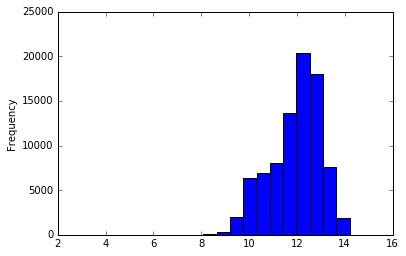

In [91]:
log_x = np.log(df_fixed.landtaxvaluedollarcnt)
x_plt = log_x.plot.hist(bins=20)
plt.show()

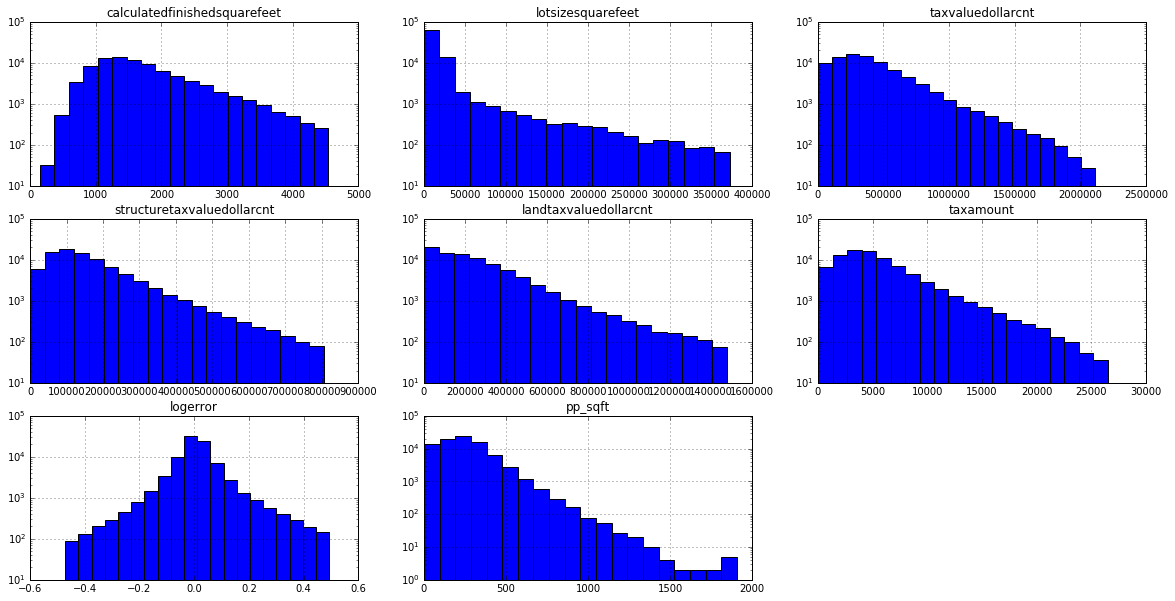

In [98]:
# histograms of all variables in dataframe:

plt.figure(figsize=(20,10))
for i, col in enumerate(['calculatedfinishedsquarefeet',
      'lotsizesquarefeet',
      'taxvaluedollarcnt',
      'structuretaxvaluedollarcnt',
      'landtaxvaluedollarcnt',
      'taxamount',
      'logerror',
      'pp_sqft']):
    plot_number = i + 1
    series = df_fixed[col]
    plt.subplot(3, 3, plot_number)
    plt.title(col)
    series.hist(bins=20, density=False, cumulative=False, log=True)

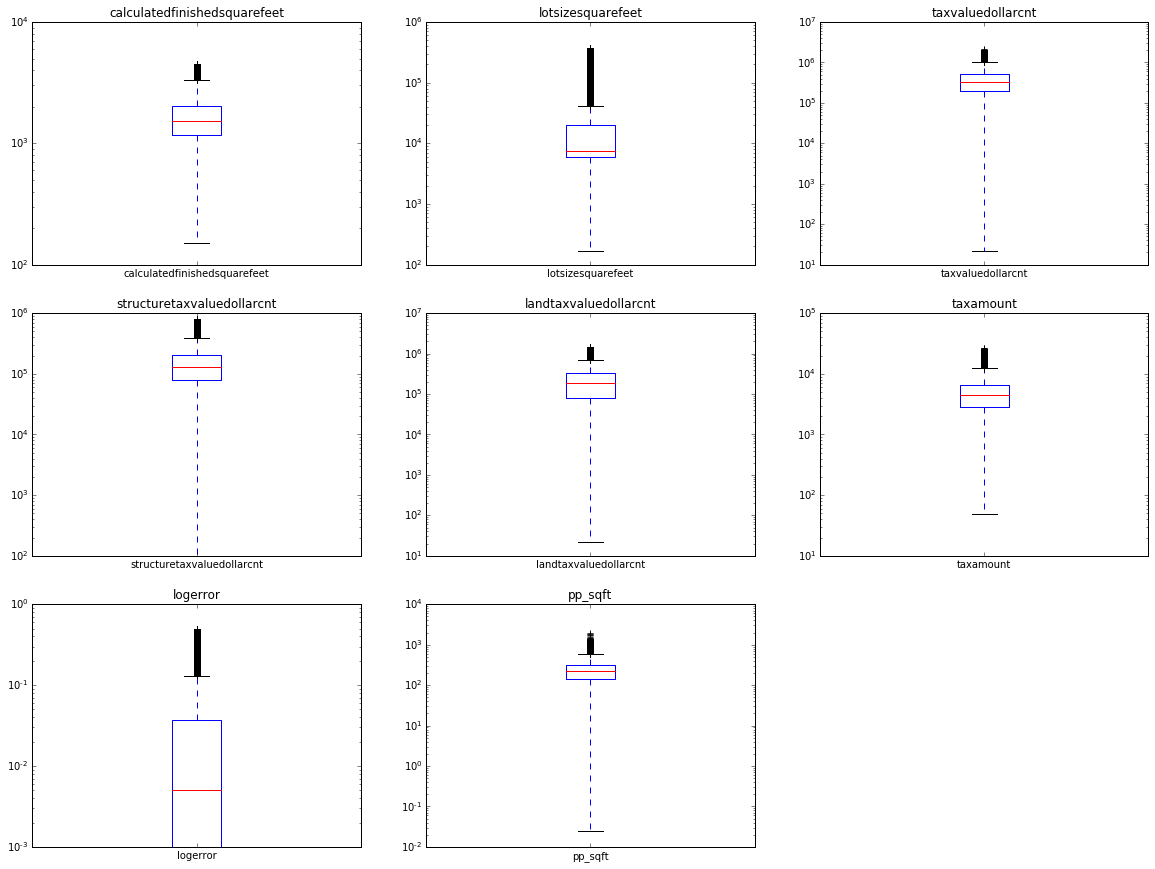

In [93]:
plt.figure(figsize=(20,20))
for i, col in enumerate(['calculatedfinishedsquarefeet',
      'lotsizesquarefeet',
      'taxvaluedollarcnt',
      'structuretaxvaluedollarcnt',
      'landtaxvaluedollarcnt',
      'taxamount',
      'logerror',
      'pp_sqft']):
    plot_number = i + 1
    series = df_fixed[col]
    plt.subplot(4, 3, plot_number)
    plt.title(col)
    series.plot.box(logy=True)

#### Create a variable, `colnames`, that is a list of the column names. 
Why? You will likely reference this variable later.

In [72]:
columns = pd.DataFrame(df_fixed.columns, columns=['variable_name'])
columns

variable_name
0                      parcelid
1  calculatedfinishedsquarefeet
2             lotsizesquarefeet
3             taxvaluedollarcnt
4    structuretaxvaluedollarcnt
5         landtaxvaluedollarcnt
6                     taxamount
7                       pp_sqft
8                      logerror

#### Create a list of the independent variable names (aka attributes) and assign it to `x_vars` 
Why? During exploration, you will likely use this list to refer to the attribute names.

In [57]:
x_vars = columns
x_vars

variable_name
0                      parcelid
1  calculatedfinishedsquarefeet
2             lotsizesquarefeet
3             taxvaluedollarcnt
4    structuretaxvaluedollarcnt
5         landtaxvaluedollarcnt
6                     taxamount
7                       pp_sqft
8                      logerror

#### Clearly identify your dependent (target) variable. 
- What is the name of the variable? 
- Is it discrete or continuous?

In [58]:
# dependent variable is 'logerror'
y = df_fixed.columns.values[7]
y

'pp_sqft'

In [59]:
# Dependent variable is continuous.  See below:
continuous = df_fixed[['logerror']]
continuous.head()

logerror
0    0.0953
1    0.0198
2    0.0060
3   -0.0566
4    0.0573

#### BONUS:  Data standardization 
Create a new data frame that is the min-max normalization of the independent variable in the original data frame (+ the original dependent variable). You will normalize each of the numeric independent variables independently, i.e. using the min and max of each variable, not the min/max of the whole dataframe. Why? Regression is very sensitive to difference in units. It will be almost impossible to extract a meaningful linear regression model with such extreme differences in scale. For more context, see: https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc
You will use this dataframe in the future analysis.

In [ ]:
# will not be attempting the bonus.

### Data Exploration

Goal is to address each of the questions you posed in your planning & brainstorming through visual or statistical analysis.

When you have completed this step, you will have the findings from your analysis that will be used in your final report, the answers to your questions and your customer's questions that will reach the goal. 

#### Split data into training and test datasets

# at the step below, experiement with adding, removing, combining new fields, and then rerun all, and then run OLS to see if it improves the R-square and pvalue.  Can do this multiple times until I get the right fit of fields in the OLS to generate better R^2 and p values.

In [181]:
# uncomment this line below after testing complete
# X = df_fixed.drop(['parcelid', 'landtaxvaluedollarcnt'], axis=1)

X = df_fixed[['calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'pp_sqft','taxamount',]]
y = df_fixed[['taxvaluedollarcnt']]

print(X.head())
print(y.head())

# [
# 'calculatedfinishedsquarefeet',  # only field in X axis for this test
# 'lotsizesquarefeet',
# 'taxvaluedollarcnt', 
# 'structuretaxvaluedollarcnt',
# 'landtaxvaluedollarcnt',
# 'pp_sqft'
# 'taxamount',

   calculatedfinishedsquarefeet  lotsizesquarefeet  \
0                        1264.0        1735.000000   
1                         777.0       29110.164177   
2                        1101.0        6569.000000   
3                        1554.0        7400.000000   
4                        2415.0        6326.000000   

   structuretaxvaluedollarcnt  landtaxvaluedollarcnt     pp_sqft  taxamount  
0                    115087.0                76724.0  151.749209    2015.06  
1                    143809.0                95870.0  308.467181    2581.30  
2                     33619.0                14234.0   43.463215     591.64  
3                     45609.0                17305.0   40.485199     682.78  
4                    277000.0               277000.0  229.399586    5886.92  
   taxvaluedollarcnt
0           191811.0
1           239679.0
2            47853.0
3            62914.0
4           554000.0


In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=123)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

train = pd.concat([X_train, y_train], axis=1)
print("Train columns:  %s" % list(train.columns))
print("Train dimensions (rows, columns):", train.shape)
print('\n')

test = pd.concat([X_test, y_test], axis=1)
print("Test columns:  %s" % list(test.columns))
print("Test dimensions (rows, columns):", test.shape)

Train columns:  ['calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'pp_sqft', 'taxamount', 'taxvaluedollarcnt']
Train dimensions (rows, columns): (68196, 7)


Test columns:  ['calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'pp_sqft', 'taxamount', 'taxvaluedollarcnt']
Test dimensions (rows, columns): (17049, 7)


In [183]:
if X_train.shape[0] == y_train.shape[0]:
    print('X & y train rows ARE INDEED equal')
else:
    print('X & y train rows are NOT equal')

if X_test.shape[0] == y_test.shape[0]:
    print('X & y test rows ARE INDEED equal')
else:
    print('X & y test rows are NOT equal')

if train.shape[1] == test.shape[1]:
    print('Number of columns in train & test ARE INDEED equal')
else:
    print('Number of columns in train & test are NOT equal')


train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print('Train Split: %.2f' % train_split)
print('Test Split: %.2f' % test_split)

X & y train rows ARE INDEED equal
X & y test rows ARE INDEED equal
Number of columns in train & test ARE INDEED equal
Train Split: 0.80
Test Split: 0.20


#### Create a jointplot for each independent variable (normalized version) with the dependent variable. 

Be sure you have Pearson's r and p-value annotated on each plot.

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


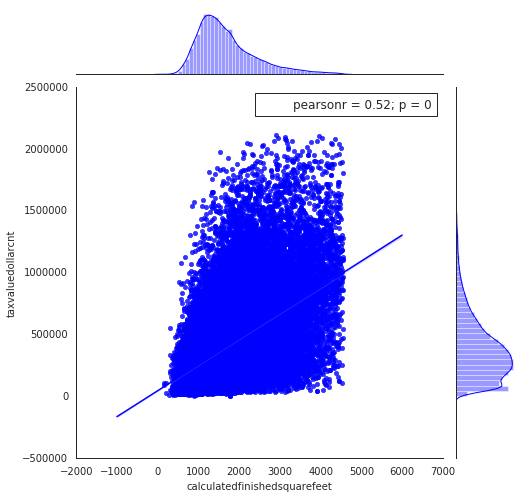

In [179]:
with sns.axes_style('white'):
    j = sns.jointplot('calculatedfinishedsquarefeet', 'taxvaluedollarcnt', data=train, kind='reg', height=7);
    j.annotate(stats.pearsonr)
plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local

KeyError: 'logerror'

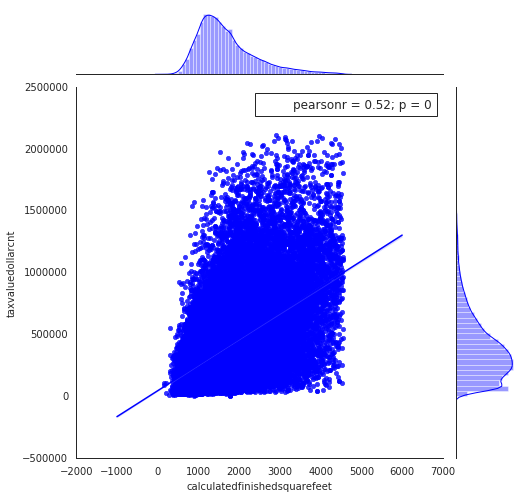

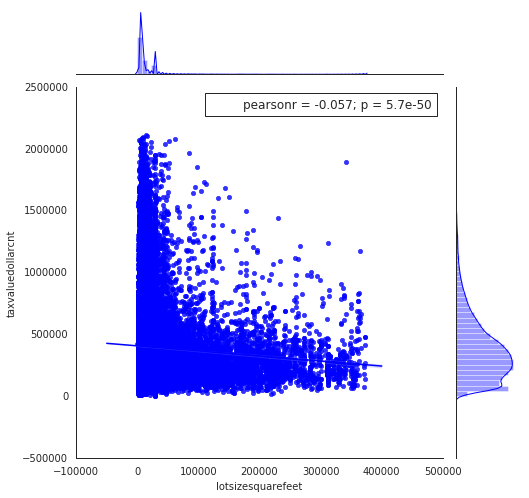

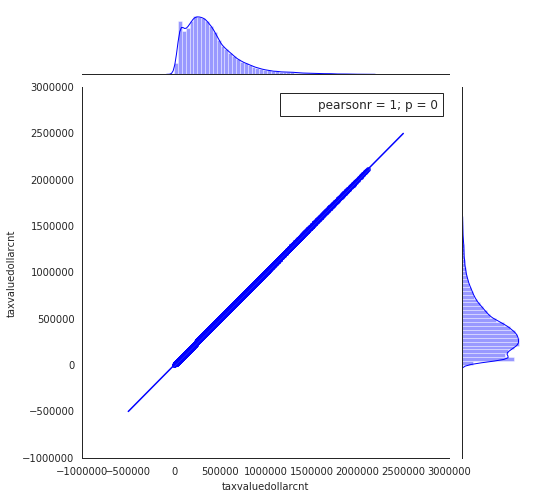

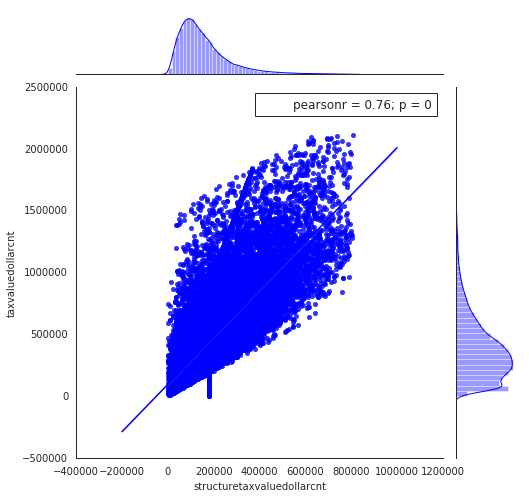

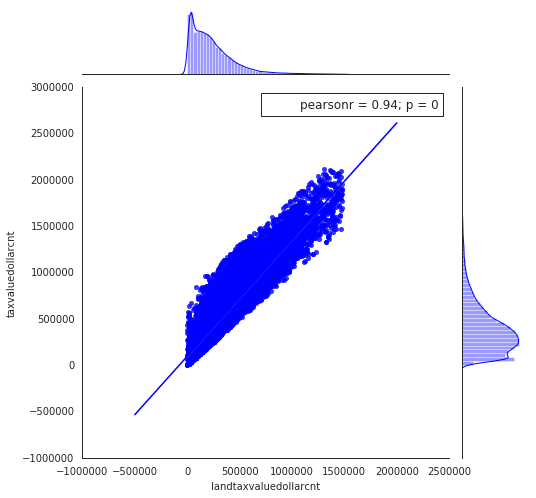

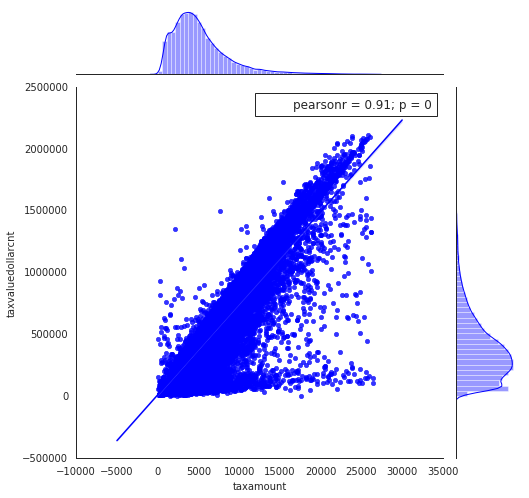

In [184]:
for i, col in enumerate([
'calculatedfinishedsquarefeet',
'lotsizesquarefeet',
'taxvaluedollarcnt',
'structuretaxvaluedollarcnt',
'landtaxvaluedollarcnt',
'taxamount',
'logerror',
'pp_sqft'
]):
    with sns.axes_style('white'):
            plot_number = i + 1
            series = df_fixed[col]
            j = sns.jointplot(train[col], 'taxvaluedollarcnt', data=train, kind='reg', height=7)
            j.annotate(stats.pearsonr)
plt.show()


# [
# 'calculatedfinishedsquarefeet',
# 'lotsizesquarefeet',

# 'taxvaluedollarcnt',
# 'structuretaxvaluedollarcnt',
# 'landtaxvaluedollarcnt',

# 'taxamount',

# 'logerror',
# 'pp_sqft'
# ]

#### Create a feature plot using seaborn's PairGrid() of the interaction between each variable (dependent + independent). 

You may want to use a normalized dataframe (if you did that) or adjust the axis scale (set to logarithmic, e.g) so you can more clearly view the interactions.

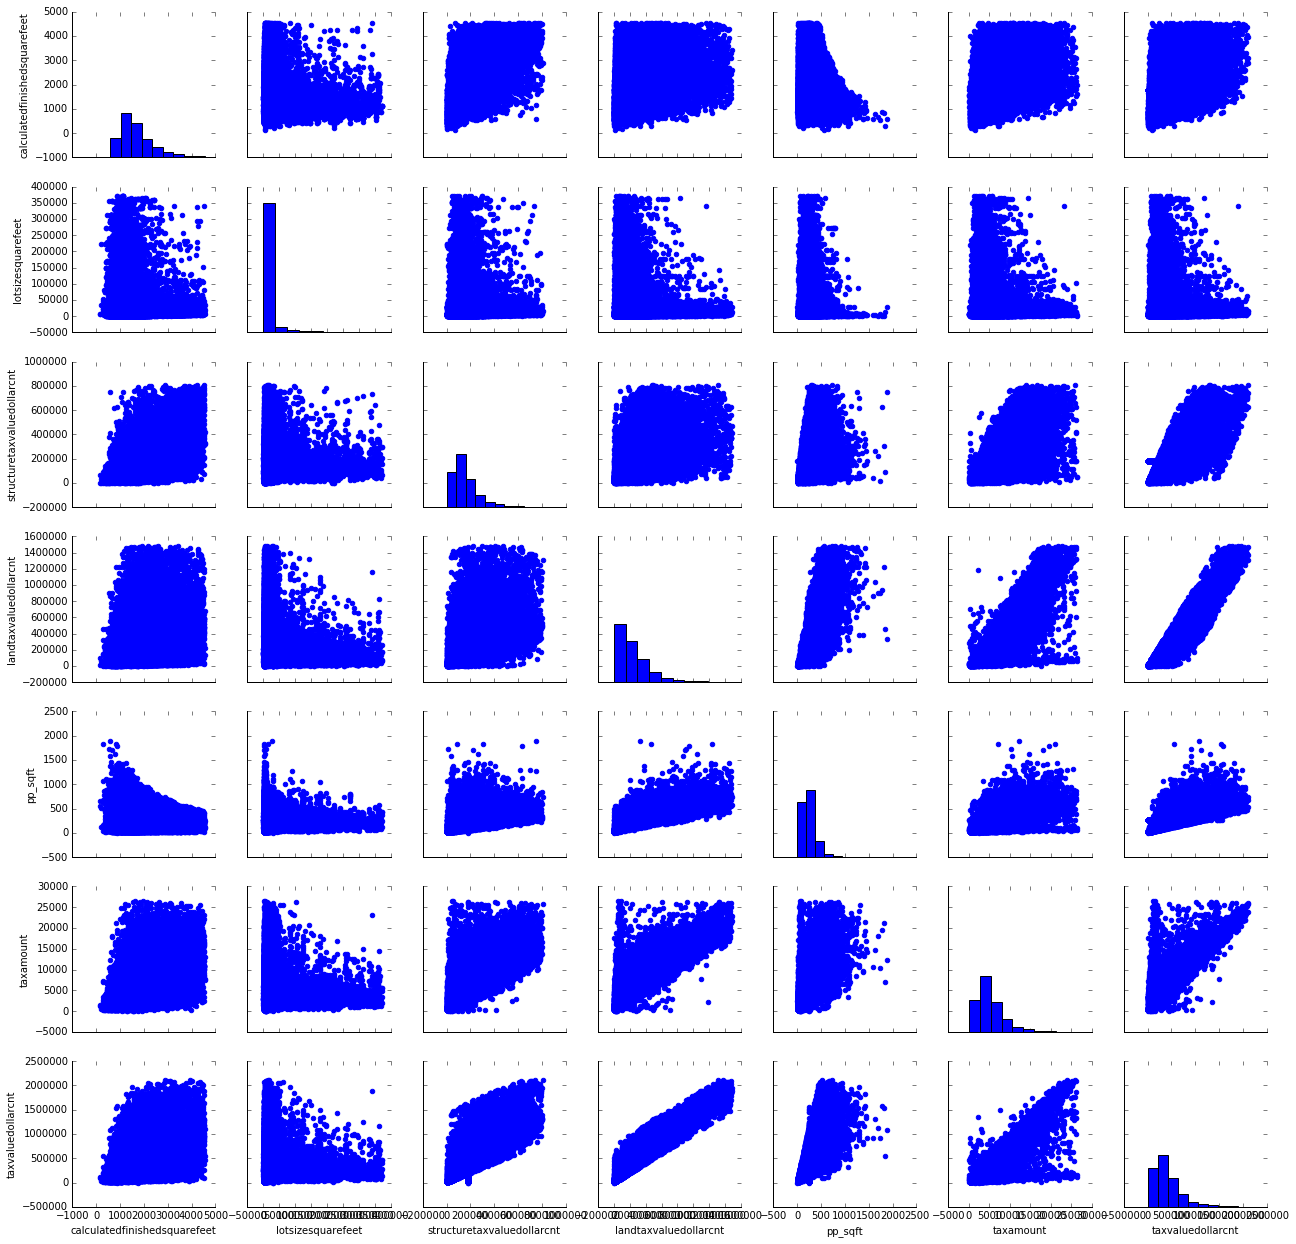

In [185]:
g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

#### Create a heatmap of the correlation between each variable pair.

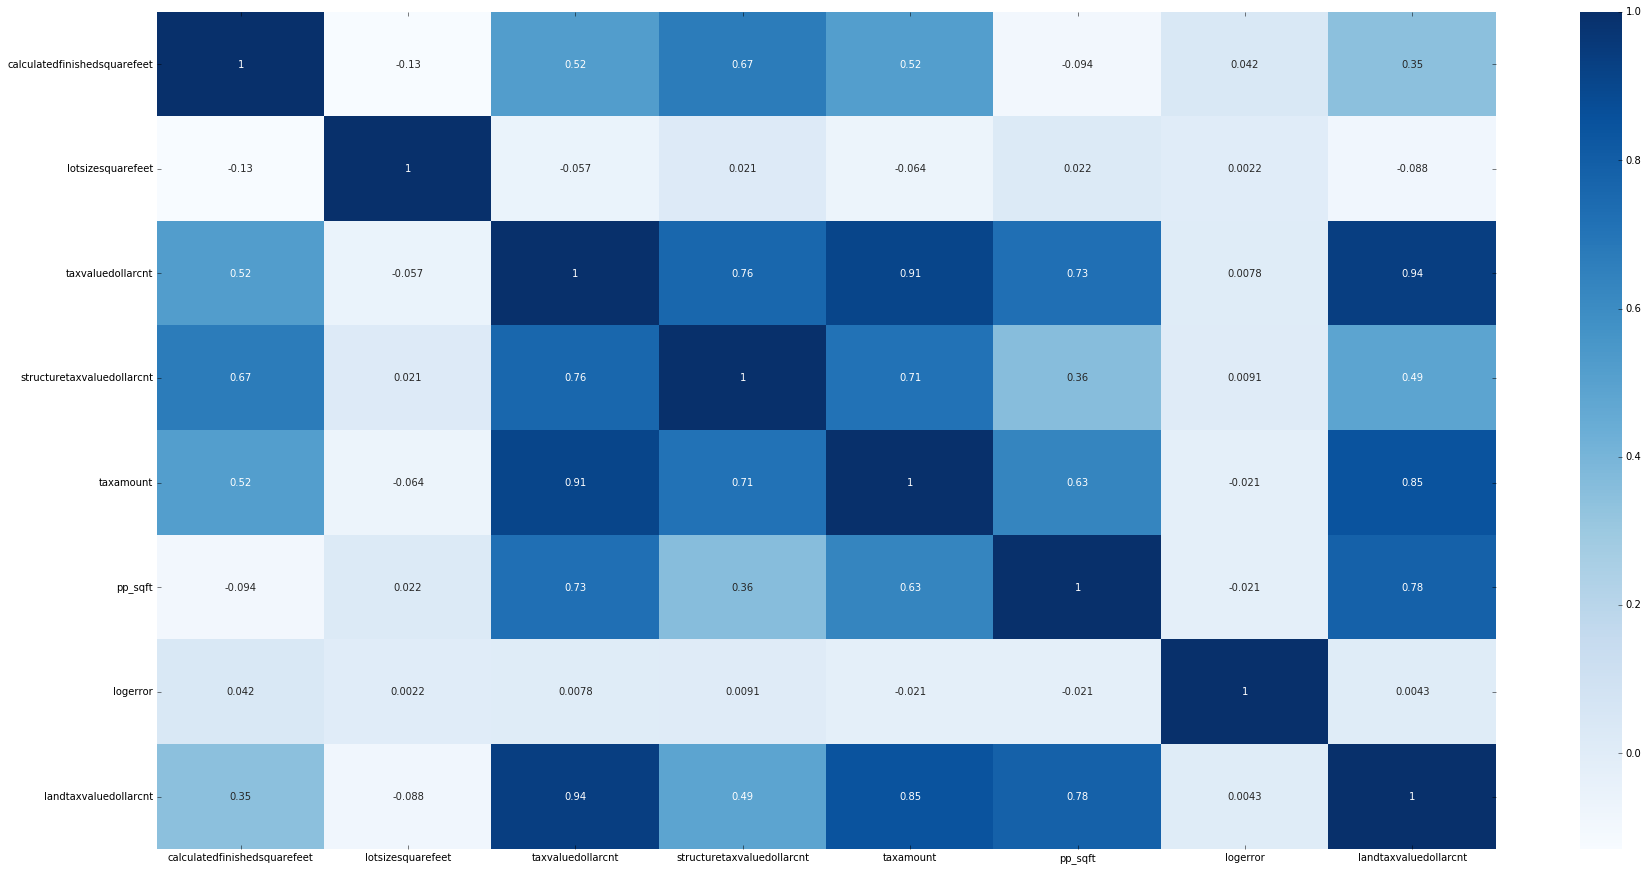

In [167]:
plt.figure(figsize=(30,15))
sns.heatmap(train.corr(), cmap='Blues', annot=True)

In [172]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     landtaxvaluedollarcnt   R-squared:                       0.601
Model:                               OLS   Adj. R-squared:                  0.601
Method:                    Least Squares   F-statistic:                 1.028e+05
Date:                   Sat, 23 Mar 2019   Prob (F-statistic):               0.00
Time:                           19:13:11   Log-Likelihood:            -9.3040e+05
No. Observations:                  68196   AIC:                         1.861e+06
Df Residuals:                      68195   BIC:                         1.861e+06
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
calculatedfinishedsquarefeet   136.0798      0.424    320.653      0.000     135.248     136.912
==============================================================================
Omnibus:                    17529.269   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56555.148
Skew:                           1.306   Prob(JB):                         0.00
Kurtosis:                       6.617   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Summarize your conclusions from all of these steps.  

In [160]:
lm1 = LinearRegression(fit_intercept=True, normalize=True)
print(lm1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


In [158]:
lm1.fit(X_train[['landtaxvaluedollarcnt']], y_train)
print(lm1)

# below creates the coefficient values for the y-intercept and the respective coefficients for each X:
lm1_y_intercept = lm1.intercept_
print(lm1_y_intercept)

lm1_coefficients = lm1.coef_
print(lm1_coefficients)


# 'calculatedfinishedsquarefeet', # only field in X axis for this test
# 'lotsizesquarefeet',
# 'taxvaluedollarcnt', 
# 'structuretaxvaluedollarcnt',
# 'landtaxvaluedollarcnt',
# 'pp_sqft'
# 'taxamount',

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
[0.00769589]
[[1.74435601e-09]]


In [159]:
print('Univariate - final_exam = b + m * exam1')
print('    y-intercept (b): %.2f' % lm1_y_intercept)
print('    coefficient (m): %.2f' % lm1_coefficients[0])
print()

Univariate - final_exam = b + m * exam1
    y-intercept (b): 0.01
    coefficient (m): 0.00



## fill this in

#### Is the logerror significantly different for homes with 3 bedrooms vs those with 5 or more bedrooms? 
Run a t-test to test this difference.

In [62]:
three_br = train[train.bedroomcnt == 3]
five_br = train[train.bedroomcnt >= 5]

from scipy.stats import ttest_ind
ttest_ind(three_br.logerror, five_br.logerror)


calculatedfinishedsquarefeet


# three_br = train[train.bedroomcnt == 3]
# five_br = train[train.bedroomcnt >= 5]

# from scipy.stats import ttest_ind
# ttest_ind(three_br.logerror, five_br.logerror)

AttributeError: 'DataFrame' object has no attribute 'bedroomcnt'

#### Do the same for another 2 samples you are interested in comparing (e.g. those with 1 bath vs. x baths)

In [ ]:
two_bath = train[train.bathroomcnt <= 2.5]
three_or_more_bath = train[train.bathroomcnt > 2.5]

from scipy.stats import ttest_ind
ttest_ind(two_bath.logerror, three_or_more_bath.logerror)

In [361]:
df_bathroomtest = train[train.bathroomcnt <= 2.5]

print(df_bathroomtest.head())



In [253]:
lt_200k = train[train.taxvaluedollarcnt <= 200_000]
gt_200k = train[train.taxvaluedollarcnt > 200_000]

from scipy.stats import ttest_ind
ttest_ind(lt_200k.logerror, gt_200k.logerror)

Ttest_indResult(statistic=0.8285486842679824, pvalue=0.4073627226781825)

In [265]:
lt_200k = train[train.taxvaluedollarcnt <= 200_000]
gt_200k = train[train.taxvaluedollarcnt > 200_000]

pearsonr(X_train[['bathroomcnt']], y_train)

#'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'yearbuilt', 'taxvaluedollarcnt', 'regionidzip']):

# R^2 greater than .5,  92.1% of the variance in total charges is explained by tenure.
#print("Pearson's R is __ with a significance p-value of __")


(array([0.04320241]), array([1.14368066e-29]))

In [241]:
columns

variable_name
0                      parcelid
1                   bathroomcnt
2                    bedroomcnt
3  calculatedfinishedsquarefeet
4                   regionidzip
5                       roomcnt
6                     yearbuilt
7             taxvaluedollarcnt
8                     taxamount
9                      logerror

### Data Modeling

#### Feature Engineering & Selection

#### Are there new features you could create based on existing features that might be helpful? 

Come up with at least one possible new feature that is a calculation from 2+ existing variables. 

In [61]:
# X_train['pp_sqft'] = (X_train.taxvaluedollarcnt / X_train.calculatedfinishedsquarefeet)
# X_train.head()

# The decision was made at this stage to create a new variable, 'pp_sqft', to calculate the price per square foot.
# The field was added into the dataframe at the data acquistion phase,
# when the properties and predictions tables were joined.

# That code, from earlier in this notebook, is:
# df_a['pp_sqft'] = (df_a.taxvaluedollarcnt / df_a.calculatedfinishedsquarefeet)

#### Use statsmodels ordinary least squares to assess the importance of each feature with respect to the target

In [254]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     123.1
Date:                Fri, 22 Mar 2019   Prob (F-statistic):          2.26e-155
Time:                        14:30:56   Log-Likelihood:                 70020.
No. Observations:               68498   AIC:                        -1.400e+05
Df Residuals:                   68492   BIC:                        -1.400e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
bathroomcnt                      0.0020      0.001      3.076      0.002       0.001       0.003
bedroomcnt                       0.0002      0.000      0.483      0.629      -0.001       0.001
calculatedfinishedsquarefeet  5.478e-06   7.65e-07      7.157      0.000    3.98e-06    6.98e-06
regionidzip                  -9.063e-07   3.64e-07     -2.492      0.013   -1.62e-06   -1.94e-07
yearbuilt                     4.289e-05   1.79e-05      2.391      0.017    7.73e-06     7.8e-05
taxvaluedollarcnt            -8.657e-09   1.33e-09     -6.530      0.000   -1.13e-08   -6.06e-09
==============================================================================
Omnibus:                    10971.682   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           121258.683
Skew:                           0.428   Prob(JB):                         0.00
Kurtosis:                       9.462   Cond. No.                     1.06e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
need to go back and look at new fields.

#### Summarize your conclusions and next steps from your analysis in above. 
What will you try when developing your model? (which features to use/not use/etc)

#### Train & Test Model

#### Fit, predict (in-sample) & evaluate multiple linear regression models to find the best one.

- Make any changes as necessary to improve your model.

- Identify the best model after all training

- Compare the models by plotting the predictions of each model with actual values (see plot right above section 12 in 'Regression in Python' lesson

(the predictions are a 1 x 83 two dimensional matrix, but we want just a single array of predictions. We can use the .ravel method to achieve this.)

`pd.DataFrame({'actual': y_train.final_grade,  
              'lm1': y_pred_lm1.ravel(),  
              'lm2': y_pred_lm2.ravel()})\  
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\  
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')  

plt.plot([60, 100], [60, 100], c='black', ls=':')  
plt.ylim(60, 100)  
plt.xlim(60, 100)  
plt.title('Predicted vs Actual Final Grade')`  

#### Predict & evaluate on out-of-sample data (test)    
X_test['pp_sqft'] = (X_test.taxvaluedollarcnt / X_test.calculatedfinishedsquarefeet)
X_test.head()

- Plot the residuals from your out-of-sample predictions.

- Summarize your expectations about how you estimate this model will perform in production.

In [ ]:
# add this in later into the modeling stage:
# to create a price per sq foot field:
    
# df_fixed['pp_sqft'] = (df_join.taxvaluedollarcnt / df_join.calculatedfinishedsquarefeet)

#  the low R values with the fields we've chosen (see OLS above), will likely have higher coefficients in the next modeling step, see next step and how to fit the model to the training data (see step 121 on previous tab, search for " start here on problem 3.d. on Wednesday morning")...

# meaning the higher coefficients will be driving the error, HENCE the error scores and low R squared values, BECAUSE we're actually looking for a value like total_charges, rather we're looking for what's driving the ERRORs themselves, not a value.... but the errors, ie what's driving the errors.

# We'll look at the SQL reproducibility next week.

In [ ]:
# ensure notebook is reproducible.  Dump unneeded cells.